# Mboshi/French Corpus : Preliminary analysis

## References :

+ https://github.com/besacier/mboshi-french-parallel-corpus

+ https://github.com/hadware/voxpopuli

+ https://www.phon.ucl.ac.uk/home/sampa/

## Extracting the french sentences

The following snippet can be used to gather all the french sentences of the corpus into a single text file :

In [29]:
import os

# git clone https://github.com/besacier/mboshi-french-parallel-corpus
RESSOURCES_DIR = "/home/kaoro/Documents/vocal_synthesis/mboshi-french-parallel-corpus/full_corpus_newsplit/all/"
CORPUS_PATH = "french_corpus.txt"

paths = os.listdir(RESSOURCES_DIR)

with open('french_corpus.txt', 'w') as corpus:
    if os.stat(CORPUS_PATH).st_size == 0:
        for path in paths:
            if path.endswith(".fr"):
                with open(RESSOURCES_DIR + path, 'r') as sentence:
                    corpus.write(sentence.read())
        print("Corpus generated")
    else:
        print("File already existing")

Corpus generated


## Working with the corpus

The generated file, which contains all of the ~5130 french sentences, can then be used to extract some valuable information about phonemes. Those data would be useful to help us determinate to see what kind of process will be needed to make the corpus more suitable for Mbrola voice creation.

In [1]:
import sys
from voxpopuli import Voice

CORPUS_PATH = "french_corpus.txt"
PHONETIZED_CORPUS_PATH = "french_corpus_phonemes.txt"

voice = Voice(lang="fr")
phonetized_sentences = []
phonemes_count = []
    
with open(CORPUS_PATH, "r") as corpus:
    content = corpus.readlines()
    for x in content:
        phonetized_sentences.append(voice.to_phonemes(x.strip()))
        
print("Phonetized sentences list generated")
print("Corpus size : {}".format(len(phonetized_sentences)))

Phonetized sentences list generated
Corpus size : 5130


## Average on sentence length and phonemes representation
Now we can extract some basics statistics from this corpus, ie average phonemes length and phoneme representation in percent :

In [2]:
phonetized_sentences_count = []
phonemes_freq = {}

for x in phonetized_sentences:
    phonetized_sentences_count.append(len(x))

print("Average sentence lenght in phonemes : {}".format(sum(phonetized_sentences_count) /
                                                       len(phonetized_sentences_count)))

for x in phonetized_sentences:
    for y in x:
        if phonemes_freq.get(y.name):
            phonemes_freq[y.name] += 1
        else:
            phonemes_freq[y.name] = 1

        
print("Representation (in %) for each phonemes in the corpus :\n")
sorted_freq = sorted(phonemes_freq.items(), key=lambda kv: kv[1], reverse=True)
for key, value in sorted_freq:
    print("{} - {} ({}%)".format(key, value,
                                    round(value /
                                    sum(phonemes_freq.values()) * 100
                                        , 3)))


Average sentence lenght in phonemes : 27.151656920077972
Representation (in %) for each phonemes in the corpus :

_ - 12618 (9.059%)
a - 12432 (8.925%)
l - 9896 (7.105%)
R - 9264 (6.651%)
E - 6777 (4.865%)
t - 6595 (4.735%)
i - 6374 (4.576%)
s - 6345 (4.555%)
e - 6228 (4.471%)
d - 5369 (3.855%)
@ - 5261 (3.777%)
a~ - 4311 (3.095%)
m - 4303 (3.089%)
p - 4131 (2.966%)
k - 3647 (2.618%)
n - 3431 (2.463%)
y - 3378 (2.425%)
o~ - 2764 (1.984%)
b - 2600 (1.867%)
v - 2534 (1.819%)
u - 2441 (1.752%)
O - 2414 (1.733%)
f - 2369 (1.701%)
j - 2342 (1.681%)
z - 2205 (1.583%)
Z - 1947 (1.398%)
o - 1608 (1.154%)
S - 1229 (0.882%)
w - 949 (0.681%)
e~ - 897 (0.644%)
g - 881 (0.633%)
9~ - 600 (0.431%)
9 - 588 (0.422%)
2 - 553 (0.397%)
N - 7 (0.005%)


# Diphones
Now let's see what this motherfucker has for diphones

In [21]:
from itertools import product
from collections import Counter

def consecutive_couples(iterable):
    firsts = list(iterable)
    firsts.pop(-1)
    seconds = list(iterable)
    seconds.pop(0)
    for first, second in zip(firsts, seconds):
        yield first, second

all_phonemes = list(phonemes_freq.keys())
all_phonemes.sort()
all_diphones = set(product(all_phonemes, all_phonemes))

found_diphones = Counter()
for sentence in phonetized_sentences:
    sentence_phonemes = [pho.name for pho in sentence]
    sentence_diphones = consecutive_couples(sentence_phonemes)
    found_diphones.update(sentence_diphones)

print("Total number of potential diphones in the corpus : %i" % len(all_diphones))
print("Number of diphones found in corpus : %i" % len(found_diphones))

Total number of potential diphones in the corpus : 1225
Number of diphones found in corpus : 970


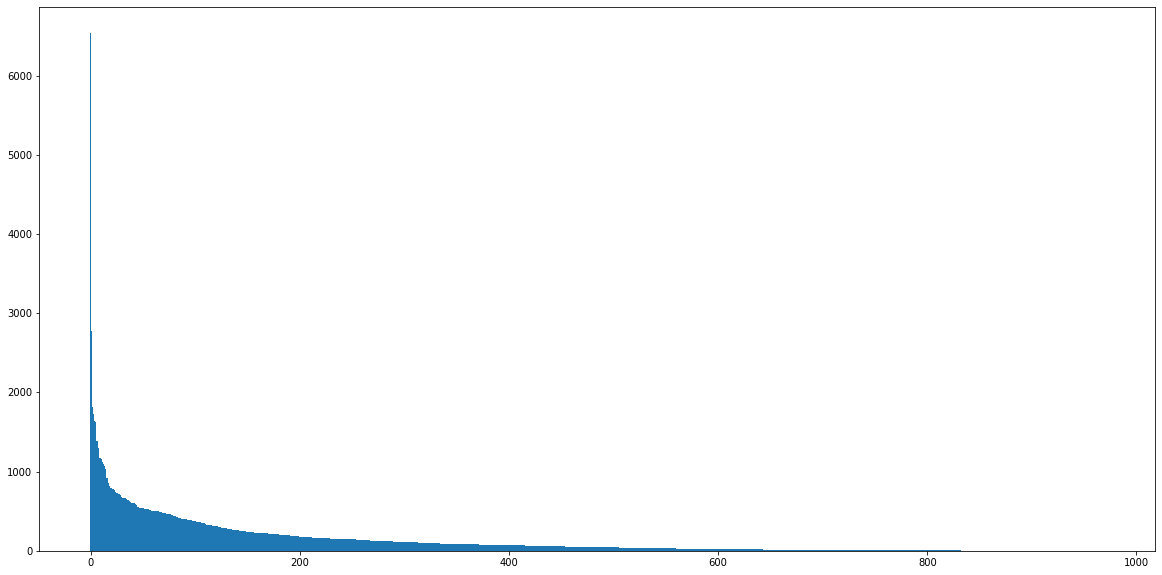

In [39]:
import matplotlib.pyplot as plt
import numpy as np

labels, values = zip(*found_diphones.items())
values = sorted(list(values), reverse=True)
indexes = np.arange(len(labels))
width = 1

plt.subplots(figsize=(20,10))
plt.bar(indexes, values, width)
plt.show()

## Pandi Pandas

Let's load the corpus into a serie to leverage the power of Pandas for vizualisation :

In [6]:
import pandas as pd

phonetized_sentences_converted = []

for x in phonetized_sentences:
    sentence = [y.name for y in x]
    phonetized_sentences_converted.append(sentence)

sentences = pd.Series(phonetized_sentences_converted)

print(sentences.axes)
print("Average sentence size in phonemes : {}".format(sentences.mean(axis=0)))
print("Max sentence size in phonemes : {}".format(len(sentences.max())))
print("Min sentence size in phonemes : {}".format(len(sentences.min())))

[RangeIndex(start=0, stop=5130, step=1)]


TypeError: Could not convert ['l', 'w', 'a', 'z', 'o', 'i', 's', 'w', 'l', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'p', 'i', 'm', 'a~', '_', '_', 't', 'a', 'v', 'i', 'e', 't', 'E', 't', 'a~', 'p', 'e', 'R', 'i', 'l', 'l', 'O', 'R', 's', 'k', '@', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'a', 'f', 'a', 'j', 'i', 't', '@', '_', '9', 'R', 't', 'e', '_', '_', 'm', 'e', 'z', 'a', 'm', 'i', 's', '@', 's', 'o~', 'm', 'O', 'k', 'e', 'd', '@', 'm', 'w', 'a', '_', '_', 'm', 'o~', 't', 'R', 'm', 'w', 'a', 'l', 'a', 'd', 'i', 'f', 'e', 'R', 'a~', 's', 'a~', 't', 'R', 's', 'e', 'd', '2', 'S', 'o', 'z', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', 'l', 'e', 'z', 'a', 'l', 'y', 'm', 'E', 't', '_', '_', 'l', 'e', 'b', 'u', 'l', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', 'o~', 'm', 'a', 'a~', 'v', 'w', 'a', 'j', 'e', 'z', 'o~', 'm', 'w', 'a', 'z', 'i', '_', '_', 'l', '@', 'R', 'y', 'i', 's', 'o', 'l', 'E', 'b', 'i', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'R', 'a', 'm', 'i', 'f', 'i', 'k', 'a', 's', 'j', 'o~', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 't', 'u', 's', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', 'l', 'a', 's', 'E', 'k', 'i', '_', '_', '_', '_', 'm', 'o~', 'm', 'a', 'R', 'i', 'n', 'E', 'p', 'a', 'z', 'i', 'n', 'i', 's', 'j', 'e', 'o', 'f', 'e', 't', 'i', 'S', '_', '_', 'O', 'k', 'j', 'e', 'm', 'b', 'a', 'E', 'p', 'R', 'i', 'a~', 'f', 'l', 'a', 'g', 'R', 'a~', 'd', 'e', 'l', 'i', 'd', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', '_', 'd', 'e', 'd', '2', '_', '_', 'k', 'E', 'l', 'E', 'l', '@', 'p', 'l', 'E', 'n', 'j', 'a~', '_', '_', '_', '_', 'i', 'l', 'a', 'a', 'k', 'R', 'O', 'S', 'e', 's', 'o~', 'S', 'a', 'p', 'o', 'o', 'b', 'u', 'd', 'y', 'p', 'i', 'k', 'E', '_', '_', 'l', 'e', 'p', 'e', 'S', '9', 'R', 'z', 'i', 'R', 'o~', 't', 'u', 's', 'a~', 'n', 'a~', 'f', 'E', 'R', '_', '_', 'l', 'a', 'f', 'a', 'm', 'k', 'i', 'a', 't', 'R', 'a~', 's', 'p', 'O', 'R', 't', 'e', 'l', '@', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'm', 'i', 'l', 'a', 'g', 'u', 't', 'j', 'E', 'R', '_', '_', 'l', 'a', 'R', 'u', 't', 'E', 'b', 'u', '2', 'z', '_', '_', 'i', 'l', 'a', 'l', 'e', 'z', 'j', '2', 'b', 'u', 'f', 'i', 'd', '@', 's', 'O', 'm', 'E', 'j', '_', '_', 'a', 'l', 'e', 'k', 'O', 'l', '_', '_', 'i', 'l', 's', 'E', 't', 'a', 'v', 'e', 'R', 'e', '9~', 'b', 'o~', 'n', 'e', 'l', 'E', 'v', '_', '_', 's', 'o~', 'k', 'a', 'm', 'a', 'R', 'a', 'd', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'a', 'l', 'a', 'p', 'O', 'm', 'd', 'a', 'd', 'a~', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'm', 'E', 't', 'R', 'l', '@', 'm', 'a~', 'S', 'E', 'd', 'i', 'f', 'i', 's', 'i', 'l', '_', '_', 'u', 'l', 'a', 'S', 'E', 'v', 'R', 'E', 't', 'a', 't', 'a', 'S', 'e', '_', '_', 'i', 'l', 'f', 'o', 'k', 'E', 'l', 'b', 'R', 'u', 't', '_', '_', 'l', '@', 'f', 'i', 'l', 'e~', 'd', 'i', 'Z', 'E', 'n', 'f', 'a', 'b', 'R', 'i', 'k', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'k', 'O', 'R', 's', 'd', '@', 'l', 'a', 'l', 'j', 'a', 'n', 'l', '@', 'k', 'o', 'z', 'a', 'E', 'R', 'e', 'z', 'i', 's', 't', 'a~', '_', '_', 's', 'e', 'f', 'j', 'u', 'i', 'l', '9', 'l', 'z', 's', 'o~', 'l', 'a', 'R', 'Z', '_', '_', 'l', '@', 'm', 'a', 's', 'o~', 'a', 'a~', 'f', 'o~', 's', 'e', 'l', '@', 'p', 'i', 'k', 'E', 'd', 'a~', 'l', '@', 's', 'O', 'l', '_', '_', 'i', 'l', 'p', '2', 's', 'u', 'l', 'v', 'e', 's', 'E', 't', 'k', 'a', 'l', 'b', 'a', 's', '_', '_', 'n', 'O', 't', 'R', 'f', 'E', 't', 'o', 'R', 'a', 'l', 'j', '2', 'd', 'a~', 'l', 'a', 'm', 'a', 't', 'i', 'n', 'e', '_', '_', 'y', 'n', 'o', 't', 'R', 'a', 'f', 'E', 'R', 's', '@', 'R', 'a', 't', 'R', 'E', 't', 'e', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'o~', 'b', 'R', 'y', 'l', 'l', 'e', 'z', 'E', 'R', 'b', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'a', 'R', 'e', 'p', 'y', 't', 'a', 's', 'j', 'o~', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 's', 'a', 'f', 'a', 'm', 'l', 'a', 'k', 'i', 't', 'e', '_', '_', 'i', 'l', 'i', 'a', 'y', 'l', '@', 'b', 'R', 'u', 'j', 'a', 'R', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 's', 'O', 'm', 'n', 'O', 'l', 'd', 'w', 'a', 'a', 'l', 'e', 'o', 'l', 'i', '_', '_', 'E', 'l', 'b', 'R', 'w', 'a', 'l', '@', 'm', 'a', 'i', 's', 'd', 'a~', 'l', '@', 'm', 'O', 'R', 't', 'j', 'e', '_', '_', 'i', 'l', 'a', 'v', 'u', 'a', 'k', 'i', 'l', 'a', 'v', 'E', 'v', 'O', 'l', 'e', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'f', 'E', 't', '9~', 'd', 'e', 't', 'u', 'R', 'a~', 'p', 'a', 's', 'a~', 'd', 'E', 'R', 'j', 'E', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'p', 'l', 'E', 'n', '_', '_', 'i', 'b', 'w', 'a', 'j', 'i', 'a', 'R', '@', 's', 'y', 'b', 'o', 'k', 'u', 'd', '@', 'g', 'R', 'a', 't', 'i', 'f', 'i', 'k', 'a', 's', 'j', 'o~', 'l', 'o', 'R', 's', 'k', 'E', 'l', 'S', 'a~', 't', 'E', '_', '_', 's', 'E', 't', 'a', 'f', 'E', 'R', 'E', 'g', 'z', 'i', 'Z', 'l', 'a', 'p', 'R', 'e', 'z', 'a~', 's', 'd', '@', 's', 'e', 'm', 'E', 'R', '_', '_', 'd', 'o~', 'k', 's', 'e', 'p', 'a', 'R', 'a~', 'm', 'a', 't', 'E', 'R', 'n', 'E', 'l', '_', '_', 'Z', 'e', 'g', 'a', 'R', 'd', 'e', 's', 'E', 't', 'a', 'R', 'a', 'S', 'i', 'd', 'k', 'O', 'm', 's', '@', 'm', 'a~', 's', '_', '_', 'Z', 'e', 'a', 'b', 'a', 't', 'y', 'l', 'a', 'R', 'b', 'R', '_', 'j', 'a~', 'z', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', 'e', 'b', 'y', 'f', 'l', 's', '@', 's', 'o~', 't', 'a', 'f', 'O', 'l', 'e', '_', '_', 'l', '@', 'k', 'a', 'm', 'j', 'o~', 'E', 'g', 'a', 'R', 'e', 'l', 'a', 'b', 'a', '_', '_', 'l', 'a', 'v', 'O', 'k', 'a', 'E', 'd', '@', 'v', 'n', 'y', 'm', 'u', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'z', 'o~', 'f', 'E', 'R', 'm', 'e', 'l', 'a', 'm', 'E', 'z', 'o~', 'l', 'E', 's', 'l', 'i', 'b', 'R', 'a', 'k', 's', 'E', 'o', 'v', 'O', 'l', '9', 'R', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'l', 'E', 's', 'e', 's', 'o~', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', '_', 'i', 't', 'u', 'a', 'E', 't', 'a', 'k', 'e~', '_', '_', 's', 'E', 'p', 'u', 'R', 'k', 'w', 'a', 's', 'e', 'z', 'a', 'm', 'i', 'R', '@', 'f', 'y', 'z', 'd', '@', 'l', 'y', 'i', 'p', 'a', 'R', 'l', 'e', '_', '_', 't', 'u', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'n', '@', 'v', '2', 'p', 'l', 'y', 'd', '@', 'n', 'j', 'a', 'z', 'O', 'n', 'i', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'p', 'R', 'O', 'n', 'o~', 's', 't', 'u', 't', 'a~', 'd', 'e', 'm', 'a', 'l', 'e', 'd', 'i', 'k', 's', 'j', 'o~', 's', 'y', 'R', 'l', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'l', 'e', 'S', 'a', 's', '9', 'R', 'z', 'o~', 'f', 'E', 't', 'y', 'n', 'b', 'a', 't', 'y', '_', '_', 's', 'E', 't', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', 'd', 'O', 'm', 'E', 's', 't', 'i', 'k', '_', '_', 'l', 'a', 'b', 'R', '@', 'b', 'i', 'a', 'm', 'i', 'b', 'a', 'z', '9~', 'n', 'a', 'n', 'j', '@', 'l', 'E', '_', '_', 'n', 'u', 's', 'e', 'l', 'e', 'b', 'R', 'o~', 'l', '@', 'R', 'i', 't', 'd', 'e', 'Z', 'y', 'm', 'o', '_', '_', 'i', 'l', 'R', '@', 'v', 'j', 'e~', 'd', 'R', 'o~', 'b', 'j', 'e~', 't', 'o', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'm', 'a', 'a~', 'b', 'a', 'l', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'd', 'a~', 'l', 'a', 'g', 'R', 'o', 's', 'f', '9', 'j', 's', 'o', 'v', 'a', 'Z', 'l', 'a~', 'd', 'y', 'b', 'y', '_', '_', 'u', 'E', 'l', 'a', 'm', 'a', 'S', 'E', 't', '_', '_', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', '@', 'p', '@', 't', 'i', 't', 'w', 'a', 'z', 'o', 'd', '@', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 's', 'E', 'l', 's', 'i', 's', 'o~', 'm', 'e', 'S', '@', 'n', 'i', 'j', '_', '_', 's', 'E', 'l', 'l', 'a', 's', 'o~', 't', 'a', 't', 'w', 'a', '_', '_', '_', '_', 's', 'E', 'R', 't', 'E', 'n', 'Z', 'a~', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', '@', 'Z', 'e', 'z', 'j', 'e', 'd', 'y', 'p', 'u', 'l', 'E', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'v', 'E', 't', 'm', 'a~', '_', '_', 'i', 'l', 'E', 'b', 'O', 's', 'y', '_', '_', 'l', '@', 'k', 'y', 'l', 't', 'i', 'v', 'a', 't', '9', 'R', 'a', 'R', 'o', 'z', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'e', '_', '_', 'l', 'a', 's', 'y', '9', 'R', 'd', 'e', 'g', 'u', 'l', 'i', 'n', 's', 'y', 'R', 's', 'o~', 'v', 'i', 'z', 'a', 'Z', '_', '_', 'Z', 'e', 't', 'E', 'z', 'a', 'v', '2', 'g', 'l', 'e', 'p', 'a', 'R', 'l', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 'o~', 'n', '@', 'p', '2', 'p', 'a', 'm', 'a~', 'Z', 'e', 'o', 't', 'a~', 's', 'a~', 'z', 'E', 't', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'e', 'b', 'a', 'g', 'a', 'Z', 'z', 'e', 't', 'E', 'l', 'u', 'R', '_', '_', 'l', '@', 'S', 'E', 'f', 'm', 'E', 's', 'e', 'z', 'u', 'v', 'R', 'i', 'e', 'z', 'a', 'l', 'e', 'p', 'R', '2', 'v', '_', '_', 'Z', '@', 'n', '@', 'm', '@', 's', 'a~', 'p', 'a', 'b', 'j', 'e~', '_', '_', 'l', '@', 'k', 'a', 'R', 't', 'j', 'e', 'k', '@', 'n', 'u', 'z', 'a', 'b', 'i', 't', 'o~', 's', 'a', 'p', 'E', 'l', 'm', 'a', 't', 'a', 'd', 'i', '_', '_', 'l', 'e', 'v', 'i', 'z', 'i', 't', '9', 'R', 's', 'a', 'R', 'E', 't', 't', 'a~', 'n', 'a', 'v', 'a', 'l', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'l', 'y', 'd', '@', 'Z', 'y', 'Z', 'd', 'a~', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'l', 'a', 'Z', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'E', 'b', 'l', 'E', 's', 'e', 's', 'y', 'R', 'l', 'a', 't', 'E', 't', '_', '_', '_', '_', 'i', 'l', 'l', 'a', 'a', 't', 'a~', 'd', 'y', 'l', 'o~', 't', 'a~', '_', '_', 's', 'e', 'd', 'a~', 's', 'o~', 't', 'a', 't', 'e~', 't', 'd', '@', 'k', 'a', 'R', 'i', '_', '_', 'i', 'l', 'f', 'o', 'l', 'e', 'l', 'y', 'i', 'o', 't', 'e', '_', '_', 'i', 'l', 'z', 'o~', 't', '9~', 'p', 'R', 'O', 's', 'E', 'd', '@', 'v', 'a~', 'l', '@', 's', 'u', 'p', 'R', 'e', 'f', 'E', '_', '_', 's', 'o~', 'v', 'i', 'z', 'a', 'Z', 'E', 't', 'a~', 'f', 'l', 'e', '_', '_', 'm', 'a', 'f', 'a', 'm', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 'Z', '@', 'n', '@', 'v', '2', 'p', 'a', 'k', '@', 't', 'y', 'R', 'E', 's', 't', 'p', 'R', 'E', 'd', '@', 'm', 'w', 'a', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 't', 'y', 'a~', 'n', 'y', 'i', 'j', '2', '_', '_', 'i', 'l', 's', '@', 't', 'R', 'u', 'v', 'l', 'a', 'u', 'o~', 'v', 'a~', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 'l', '@', 'm', 'a', 'R', 'g', 'u', 'j', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'E', 'R', 'd', 'e', '_', 'o', 's', 'm', 'a~', 'd', '@', 't', 'E', 't', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'f', 'R', 'O', 't', 'e', 'k', 'o~', 't', 'R', 'l', '@', 'm', 'y', 'R', '_', '_', 'o', 't', 'a~', '_', 'j', 'E', 'R', 'Z', 'e', 't', 'E', 'z', '2', 'R', '2', '_', '_', 'o', 't', 'a~', 'Z', '@', 's', 'y', 'i', 't', 'R', 'i', 's', 't', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'm', 'o~', 'n', 'E', 'n', 'e', 'E', 'f', 'a', 'S', 'e', 'k', 'o~', 't', 'R', 'm', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 'Z', '@', 'l', 'y', 'i', 'e', 'd', 'e', 'f', 'a~', 'd', 'y', 'd', '@', 'S', 'a', 's', 'e', '_', 'a', 'v', 'E', 'k', 'm', 'e', 'S', 'j', 'e~', '_', '_', 'k', 'R', 'i', 'e', 'f', 'O', 'R', '_', '_', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 'd', 'a~', 's', '9', 'R', 'm', 'a', 's', 'k', 'e', 'd', 'y', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 'l', 'O', 'm', 'p', 'a', 'R', 't', 'i', 'l', '@', 'f', 'y', 'z', 'i', 'a~', 'b', 'a~', 'd', 'u', 'l', 'j', 'E', 'R', '_', '_', 'l', '@', 's', 'E', 'l', 's', '@', 'd', 'i', 's', 'u', 'd', 'a~', 'l', 'o', '_', '_', 's', 'i', 't', 'y', 'a', 't', 'a~', 'z', 'a~', 'k', 'O', 'R', '9~', 'p', '2', '_', '_', 'i', 'l', 'v', 'a', 'v', '@', 'n', 'i', 'R', '_', '_', 'w', 'a', 'j', 'i', 'b', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'R', 'e', 'l', 'v', 'e', 'd', '@', 'l', 'a', 'R', 'a', 'S', 'i', 'd', 'k', 'O', 'm', 't', 'R', 'i', 'b', 'y', 'a', 'l', 'a~', 't', 'R', 'e', 'd', '@', 'l', 'a', 'v', 'u', 'm', 'a', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'E', 'v', 'i', 'd', 'e', 'l', '@', 's', 'i', 'l', 'y', 'R', '_', '_', 'i', 'l', 's', 'E', 'm', 'i', 'y', 'n', 'a', 'm', 'y', 'l', 'E', 't', 'o', 'k', 'u', 'p', 'u', 'R', 's', '@', 'p', 'R', 'O', 't', 'e', 'Z', 'e', 'd', '@', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 'l', '9', 'R', 'g', 'R', 'a~', 'm', 'E', 'R', 'm', 'a~', 'Z', 'd', 'a~', 'z', 'y', 'n', 'k', 'a', 's', 'R', 'O', 'l', '_', '_', 'l', '@', 'p', 'a', 'n', 'j', 'f', 'l', 'O', 't', 's', 'y', 'R', 'l', '@', 'f', 'i', 'l', 'd', 'y', 's', 'e', 'S', 'w', 'a', 'R', '_', '_', 'l', 'a', 'g', 'R', 'E', 's', 'd', '@', 'b', '9', 'f', 's', 'E', 'k', 'O', 'a', 'g', 'y', 'l', 'e', '_', '_', 's', 'E', 't', 'w', 'a', 'z', 'o', 'a', 'y', 'n', 'l', 'o~', 'g', 'k', '2', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'z', 'o~', 'b', 'u', 'S', 'e', 'l', '@', 'R', 'y', 'i', 's', 'o', 'R', 'e', 'v', 'E', 'l', '9~', 'f', 'E', 'p', 'R', 'e', 'm', 'e', 'd', 'i', 't', 'e', '_', '_', 'l', 'a', 'm', 'O', 'k', 'R', 'i', 'f', 'E', 'p', 'l', '2', 'R', 'e', 's', 'E', 'R', 't', 'E', 'n', 'p', 'E', 'R', 's', 'O', 'n', '_', '_', 'l', '@', 'p', 'a~', 'k', 'o~', 'g', 'O', 'l', 'E', 'S', 'a~', 't', 'f', 'O', 'R', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', 'a~', 'f', 'a~', 'b', 'a', 'v', '_', '_', 'l', 'e', 'z', 'i', 'n', 'j', 'a', 'm', 's', '@', 'R', 'e', 'k', 'O', 'l', 't', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'l', '@', 'p', 'R', 'E', 't', 'R', 'f', 'E', 'd', 'y', 'b', 'j', 'e~', 'n', 'o', 'p', 'o', 'v', 'R', '_', '_', 'Z', 'e', 'd', 'e', 'Z', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'p', 'a', 'p', 'i', 'j', 'o~', 'd', 'a~', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', '_', '_', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'd', 'y', 'R', 'i', '_', 'j', 'E', 'R', '_', '_', 'l', 'e', 'k', 'a', 'b', 'R', 'i', 'f', 'y', 'i', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', 'e', 'v', 'i', 'z', 'i', 't', '9', 'R', 's', 'a', 'R', 'E', 't', 't', 'a~', 'n', 'a', 'v', 'a', 'l', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'a', 'f', 'a', 's', 'o~', 'd', '@', 'p', 'a', 'R', 'l', 'e', 'm', 'e', 'n', 'E', 'R', 'v', '_', '_', 'l', 'e', 'b', 'R', 'a~', 'S', 's', 'o~', 'k', 'u', 'v', 'E', 'R', 't', 'd', '@', 'b', 'u', 'R', 'Z', 'o~', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'k', 'i', 'E', 'd', 'a~', 'l', '@', 'l', 'i', 'E', 't', 'a~', 'k', 'O', 'R', 'e', 'v', 'E', 'j', 'e', '_', '_', 'Z', 'e', 'v', 'R', 'E', 'm', 'a~', 'b', '@', 'z', 'w', 'e~', 'd', '@', 'k', 'E', 'l', 'k', '9~', 'p', 'u', 'R', 'm', '@', 'f', 'E', 'R', 'y', 'n', 'l', 'E', 't', 'R', '_', '_', 'l', 'e', 'k', 'a', 'b', 'R', 'i', 'b', 'R', 'u', 't', 'l', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'n', 'O', 't', 'R', 'S', 'a~', '_', '_', 'l', 'O', 'm', 'a', 'v', 'a', 'l', 'a', 'd', '@', 't', 'R', 'a', 'v', 'E', 'R', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'g', 'a', 'R', 'd', 'd', 'e', 'm', 'O', 'R', 's', 'o', 'd', '@', 'f', 'E', 'R', 'd', 'a~', 'l', 'a', 'k', 'E', 's', '_', '_', 't', 'a', 'p', 'a', 'R', 'd', '@', 'v', 'j', 'a~', 'd', 'E', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'i', 'l', '@', 'f', '2', 'd', 'a~', 'l', '@', 'S', 'a~', '_', '_', 'R', '@', 'p', 'a', 'R', 't', 'o~', 'z', 'a~', 'k', 'a~', 'p', 'a', 'n', 'j', '_', '_', 'i', 'l', '_', 'j', 'a', 't', 'R', 'o', 'd', '@', 's', 'u', 'f', 'R', 'a~', 's', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'd', 'e', 'Z', 'a', 't', 'R', 'u', 'v', 'e', 'y', 'n', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 'b', 'O', 'R', 'd', '@', 's', 'o~', 'p', 'a', 'n', 'j', 'E', 't', 'y', 'z', 'e', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'z', 'a', 's', 'e', 'd', '@', 't', 'R', 'a', 'v', 'a', 'j', '9', 'R', 'p', 'u', 'R', 'd', 'e', 'p', 'l', 'a', 's', 'e', 's', 'E', 't', 'a', 'R', 'b', 'R', 'a', 'b', 'a', 't', 'y', '_', '_', 'l', 'e', 'l', 'e', 'f', 'a~', 'E', 'b', 'l', 'E', 's', 'e', '_', '_', 'a', 't', 'y', 'd', 'e', 'Z', 'a', 'R', 'a~', 'd', 'y', 'm', 'o~', 'p', 'a', 'R', 'a', 'p', 'l', 'y', 'i', '_', '_', '_', '_', 'l', '@', 'S', 'a', 's', 's', '9', 'R', 'a', 'a', 'p', 'O', 'R', 't', 'e', 'l', '@', 'f', 'a', 'k', 'O', 'S', 'E', 'R', 'k', 'i', 'l', 'v', 'j', 'e~', 'd', '@', 't', 'y', 'e', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', 'd', 'y', 'p', 'i', 'm', 'a~', '_', '_', 'l', '@', 'k', 'o~', 'p', 'R', 'i', 'm', 'e', 'E', 'd', 'e', 'Z', 'a', 'a', 'v', 'a', 'l', 'e', '_', '_', 'i', 'b', 'a', 'R', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'd', 'a~', 's', 'e', 'l', '@', 'k', 'j', '@', 'b', 'k', 'j', '@', 'b', '_', '_', '9~', 'n', 'w', 'a', 'z', 'o', 'E', 'p', 'E', 'R', 'S', 'e', 's', 'y', 'R', 'l', 'a', 'b', 'R', 'a~', 'S', 'd', 'y', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'Z', 'e', 'k', 'i', 't', 'e', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'a', 'k', 'o', 'z', 'd', '@', 't', 'w', 'a', '_', '_', 'l', 'a', 'l', 'i', 'm', 'a', 'E', 't', '9~', 'n', 'a', 'f', 'l', 'y', 'a~', 'd', 'y', 'f', 'l', '2', 'v', 'k', 'o~', 'g', 'o', '_', '_', 'l', 'a~', 'f', 'a~', 's', 'u', 'f', 'l', 'd', 'a~', 'l', 'O', 'R', 'E', 'j', 'd', '@', 's', 'o~', 'a', 'm', 'i', '_', '_', 'o~', 'n', 'a', 'a', 'l', 'y', 'm', 'e', '9~', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'e', 'k', 'R', 'i', 'R', 'n', 'E', 'p', 'a', 'd', '@', 'm', 'o~', 'p', 'E', 'R', '_', '_', 'n', 'u', 'f', '@', 'R', 'o~', 'p', 'a', 'R', 't', 'i', 'R', 'l', 'e', 'Z', 'a~', 'd', '@', 'm', 'e~', '_', '_', 'i', 'l', 's', '@', 't', 'y', '_', '_', 'a', 'v', 'a~', 's', 'a', 'k', 'O', 'l', 'E', 'R', '_', '_', 'E', 'l', 'l', 'y', 'i', 'd', 'O', 'n', '9~', 'k', 'u', 'd', '@', 'b', 'a', 't', 'o~', '_', '_', 'E', 'l', 'p', 'a~', 's', 'a', 's', 'a', 'b', 'l', 'E', 's', 'y', 'R', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'y', 'e', 'y', 'n', 'a~', 't', 'i', 'l', 'O', 'p', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 'k', 'O', 'm', 'a~', 'a', 'p', 'E', 'l', 't', 'o~', 's', 'E', 't', 'a', 'n', 'i', 'm', 'a', 'l', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', '@', 'm', 'a', 'f', 'a', 'm', 'm', '@', 'd', 'e', 'p', 'a', 's', '_', '_', 'l', 'e', 'b', '@', 'z', 'w', 'e~', 'n', '@', 's', '@', 'm', 'a', 'n', 'i', 'f', 'E', 's', 't', 'k', '@', 'l', 'o', 'R', 's', 'k', 'o~', 'n', 'E', 'd', 'a~', 'l', '@', 'd', 'e', 'n', 'y', '@', 'm', 'a~', '_', '_', 'i', 'l', 'a', 'l', 'E', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'm', 'E', 's', 'p', 'w', 'e~', 'n', 'E', 't', '9~', 'm', 'a~', 'k', 'd', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', '_', '_', 'i', 'l', 'm', 'a', 'b', 'u', 's', 'k', 'y', 'l', 'e', '_', '_', 'Z', '@', 'm', 'e~', 'k', 'j', 'e', 't', 'E', 'p', 'u', 'R', 't', 'w', 'a', '_', '_', 'i', 'l', 'l', 'y', 'i', 'a', 'R', 'a', 'S', 's', 'o~', 'k', 'u', 't', 'o', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'b', 'a', 'l', '@', 'f', 'E', 'R', 's', 'y', 'R', 'l', 'a~', 'k', 'l', 'y', 'm', '_', '_', 'a~', 'g', 'o~', 'g', 'a', 'a', 'k', 'y', 'R', 'e', 'l', 'e', 't', 'a~', 'd', '@', 's', 'a', 'f', 'a', 'm', '_', '_', 'v', 'O', 't', 'R', 'm', 'E', 'z', 'o~', 'E', 'p', '@', 't', 'i', 't', '_', '_', '9~', 'n', 'O', 'm', 's', 'E', 't', '@', 'n', 'y', 'd', '@', 'b', 'u', 'o', 'm', 'i', 'l', 'j', '2', 'd', '@', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'y', 'e', 'y', 'n', 'a~', 't', 'i', 'l', 'O', 'p', 'm', 'a', 'l', '_', '_', 't', 'R', 'o', 'd', '@', 's', 'a', 'l', 't', 'e', 'a', 'b', 'i', 'm', 'l', 'e', 'z', 'a', 'b', 'i', '_', '_', 'l', 'a', 'R', 'a', 'S', 'i', 'd', 's', 'E', 'g', 'a', 't', 'e', '_', '_', 'l', '@', 'S', 'E', 'f', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 'v', 'w', 'a', 'j', 'a', 'Z', '_', 'a', 'v', 'E', 'k', 's', 'e', 'z', 'e', 'm', 'i', 's', 'E', 'R', '_', '_', 'm', 'a', 's', '9', 'R', 'm', 'a', 'O', 'f', 'E', 'R', 'y', 'n', 'Z', 'E', 'R', 'b', 'd', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'l', '@', 'p', 'l', 'y', 'm', 'a', 'Z', 'd', '@', 'l', 'E', 'b', 'O', 'b', 'u', 'E', 'p', 'w', 'e~', 't', 'i', 'j', 'e', '_', '_', 'i', 'l', '_', 'O', 'n', 'O', 'R', 'l', '@', 'S', 'E', 'f', 'b', 'o', 'k', 'u', '_', '_', 's', '@', 'Z', '2', 'n', 'O', 'm', 'E', 'v', 'i', 'k', 't', 'i', 'm', 'd', '9~', 'm', 'a', 'l', 'e', 'f', 'i', 's', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'i', 'l', 'v', 'o~', 'k', 'u', 'v', 'R', 'i', 'R', 'l', '@', 't', 'a', 'm', 't', 'a', 'm', 'd', 'y', 'n', 'p', 'o', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', 'p', 'O', 'R', 't', 'e', '9~', 'p', 'a', 'n', 'j', '_', '_', 't', 'u', 't', 'l', 'a', 'n', 'y', 'i', 'a~', 't', 'j', 'E', 'R', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'z', 'o~', 'S', 'o', 'f', '_', '_', 'l', '@', '_', 'a', 'n', 't', 'o~', 's', '@', 'n', 'u', 'R', 'i', 'd', 'E', 'R', 'b', '_', '_', 'i', 'l', 'a', 'a', 'm', 'n', 'e', 's', 'o~', 'f', 'R', 'E', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'l', '@', 'p', 'O', 'R', 'k', 'a', 'd', '@', 'g', 'R', 'o', 's', 'm', 'O', 'l', 'E', 'R', '_', '_', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'o~', 'n', '@', 'v', '2', 'p', 'l', 'y', 'd', '@', 's', 'E', 't', 'f', 'a', 'm', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'E', 't', 'R', 'o', 'p', 'a', 'R', 'O', 'g', 'a~', 't', '_', '_', 'l', 'e', 'l', 'a~', 'p', 's', 'o~', 's', 'y', 'R', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 'p', 'R', 'a~', 'l', 'e', 'z', 'e', 'a', 'p', 'O', 'R', 't', 'l', 'e', 'm', 'w', 'a', '_', '_', '_', '_', 'p', 'u', 'R', 's', 'e', 'S', 'e', '9~', 'n', 'a', 'b', 'i', 'i', 'l', 'f', 'o', 'd', 'a', 'b', 'O', 'R', 'l', '@', 'm', 'E', 't', 'R', 'a', 'l', 'a~', 'v', 'E', 'R', '_', '_', 'i', 'l', 'n', '@', 'f', 'o', 'p', 'a', 'l', 'y', 'i', 's', 'E', 'R', 'v', 'i', 'R', 'l', '@', 'R', '@', 'p', 'a', 'd', 'a~', 'z', 'y', 'n', 'm', 'E', 'm', 'a', 's', 'j', 'E', 't', 'k', '@', 'l', 'e', 'z', 'o', 't', 'R', 'k', 'a', 'R', 'i', 'l', 'p', 'R', 'a~', 'p', 'l', 'y', 'k', '@', 's', 'a', 'p', 'a', 'R', 'd', '@', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'l', '@', 'b', 'R', 'a', 'z', 'E', 't', '9~', 'm', 'a~', 'b', 'R', 'd', 'y', 'k', 'O', 'R', '_', '_', 's', 'E', 't', 's', 'i', 't', 'y', 'a', 's', 'j', 'o~', 'd', 'e', 'p', 'a', 's', 'm', 'o~', 'n', 'a~', 't', 'a~', 'd', 'm', 'a~', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'm', 'y', 'R', '_', '_', 'l', '@', 'S', '@', 'm', 'e~', 'E', 'b', 'u', 'S', 'e', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'd', 'o~', '_', 'j', 'a', 'm', 'i', 'R', '@', 'm', 'o~', 't', 'l', '@', 'f', 'l', '2', 'v', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 's', '@', 'b', 'l', 'a~', 'k', 'i', 'v', 'j', 'e~', 'd', '@', 'l', 'O', 'k', 's', 'i', 'd', 'a~', 'E', 'g', 'o', 'S', 'e', '_', '_', 's', 'a', 's', '9', 'R', 'E', 't', 'o', 't', 'R', '@', 'm', 'a~', 'k', 'u', 'R', 'a', 'Z', '2', 'z', 'k', '@', 's', 'a', 'f', 'a', 'm', '_', '_', 'l', 'e', 'm', 'a~', 'b', 'R', 'd', '@', 's', 'o~', 'a', 's', 'O', 's', 'j', 'a', 's', 'j', 'o~', 'l', 'y', 'i', 'o~', 't', 'e~', 'p', 'o', 'z', 'e', '9~', 'p', 'O', 's', 't', 'd', '@', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'i', 'l', 'i', 't', 'e', '_', '_', 'l', 'a', 'f', 'R', 'E', 'S', '9', 'R', 'p', 'R', 'O', 'v', 'O', 'k', 'l', 'e', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 'l', '@', 's', 'e~', 'Z', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'E', 'R', 't', 'o~', 'b', 'e', 'l', 'e', 'f', 'R', 'y', 'i', 'z', 'a', 'k', 'w', 'a', '_', '_', 'l', 'e', 'R', '@', 's', 'O', 'R', 't', 'i', 's', 'a~', 'd', '@', 'm', 'b', 'E', 's', 'p', 'O', 'l', 'y', 'l', 'e', 'R', 'y', 'i', 's', 'o', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'l', 'a~', 't', 'l', 'a~', 'b', 'a', 'a', 'a~', 'v', 'y', 'd', '@', 't', 'y', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', '_', '_', 'i', 'l', 'b', 'a', 't', 'i', 't', 'y', 'n', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'a', 'g', 'a', 'R', 'd', 'e', 's', 'e', 'z', 'u', 't', 'i', 'd', '@', 't', 'R', 'a', 'v', 'a', 'j', 'a~', 'f', 'O', 'R', 'E', '_', '_', 'Z', 'e', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', '_', '_', 'i', 'l', 's', 'o~', 'd', 'e', 'l', 'i', 's', 'j', '2', '_', '_', 'l', 'e~', 's', 'E', 'k', 't', 'E', 'k', 'w', 'e', 'R', 'e', 'e', 'a', 't', 'y', 'e', '9~', 'p', '@', 't', 'i', 's', 'i', 'l', 'y', 'R', '_', '_', 'i', 'l', 'a', 'm', 'a', 'l', 'o', 'k', 'o', 't', '_', '_', 'i', 'l', 'n', 'E', 'p', 'a', 'v', '@', 'n', 'y', 't', 'R', 'a', 'v', 'a', 'j', 'e', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'a', 't', 'y', 'd', 'e', 'k', 'a', 'R', 't', 'u', 'S', 'p', 'u', 'R', 's', '@', 'f', 'y', 'z', 'i', '_', '_', '_', '_', 's', 'i', 't', 'y', 'm', 'a~', 'Z', 'b', 'o', 'k', 'u', 'd', '@', 'l', 'e', 'g', 'y', 'm', 'z', 'a', 'f', '9', 'j', '_', '_', 't', 'y', 'p', 'R', 'a~', 'd', 'R', 'a', 'd', 'y', 'p', 'w', 'a', '_', '_', 's', 'E', 'p', 'a', 'R', '_', 'E', 'n', 'k', 'i', 'l', 'e', 'l', 'i', 'm', 'i', 'n', 'l', '@', 'p', '@', 't', 'i', 'b', 'e', 't', 'a', 'j', 'd', '@', 's', 'e', 'v', 'w', 'a', 'z', 'e~', '_', '_', 'i', 'l', 's', 'a', 'd', 'O', 's', 'o', 'm', 'y', 'R', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'a', 'a', 'p', 'R', 'u', 'v', 'e', 'l', '@', 'Z', 'y', 'Z', 'm', 'a~', 'd', 'y', 'S', 'E', 'f', '_', '_', 'l', 'e', 'p', 'u', 'l', 's', '@', 'b', 'a', 't', 'E', 't', 'a', 'k', 'u', 'd', '@', 'b', 'E', 'k', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'g', 'R', 'a~', 'd', 'i', 'v', 'i', 't', '_', '_', 'l', 'a', 'k', 'o~', 'd', 'i', 's', 'j', 'o~', 'd', 'O', 'R', 'f', 'l', 'e~', 'd', 'O', 'n', 'd', 'e', 's', 'u', 's', 'i', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', '@', 'n', 'j', 'E', 'b', 'i', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', 'j', 'E', 'R', 's', 'E', 'd', 'e', 'Z', 'a', 'd', 'y', 'R', 's', 'i', '_', '_', 'k', 'i', 'v', 'a', 'm', 'E', 't', 'R', 's', 'E', 't', 'm', 'a', 'R', 'm', 'i', 't', 'o', 'f', '2', '_', '_', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', '_', '_', 't', 'y', 'v', 'a', 't', 'o~', 'b', 'e', '_', '_', '_', '_', 'i', 'l', 'v', 'u', 'd', 'R', 'E', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'm', 'E', 'z', 'i', 'l', 'n', 'a', 'p', 'a', 'd', 'a', 'R', 'Z', 'a~', '_', '_', 'd', 'e', 'Z', 'a~', 's', '@', 's', 'o~', 'R', 'e', 'y', 'n', 'i', 'a~', 'g', 'R', 'a~', 'n', 'o~', 'b', 'R', 'o', 'm', 'i', 'l', 'j', '2', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'p', 'u', 'R', 'e', 'k', 'u', 't', 'e', 'l', 'a', 'p', 'a', 'R', 'O', 'l', 'd', '@', 'd', 'j', '2', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'n', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', 'p', 'a', 's', 'e', 'p', 'a', 'R', 'a~', '_', '_', 'R', '@', 't', 'i', 'R', 'l', 'E', 'g', 'y', 'i', 'j', 'o~', 'd', '@', 'l', 'a', 'b', 'E', 'j', 'k', 'i', 'E', 't', 'a~', 'f', 'o~', 's', 'e', 'd', 'a~', 'm', 'o~', 'b', 'R', 'a', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 's', 'O', 'm', 'E', 'j', '_', '_', 'l', '@', 'm', 'a', 's', 'o~', 'a', 'a~', 'f', 'o~', 's', 'e', 'l', '@', 'p', 'O', 't', 'o', 'd', 'a~', 'l', '@', 's', 'O', 'l', '_', '_', 'm', 'a', 'p', 'i', 'R', 'O', 'g', 'E', 'l', 'a', 'R', 'Z', '_', '_', 'R', '@', 'g', 'a', 'R', 'd', 'l', 'a', '_', '_', '_', '_', 'Z', 'e', 'k', 'R', 'i', 'y', 'n', 'l', 'E', 't', 'R', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'E', 'R', 'k', 'R', 'a', 'k', 'e', 's', 'e', 'd', 'w', 'a', '_', '_', 's', 'e', 'S', '@', 'v', '2', 'b', 'u', 'f', 't', 'o', 't', 'u', 'R', 'd', '@', 's', 'a', 't', 'E', 't', '_', '_', 'i', 'l', 'E', 't', 'a', 't', 'a~', 't', 'i', 'f', 'a', 's', '@', 'k', 'o~', 'l', 'y', 'i', 'd', 'i', '_', '_', 'l', '@', 't', 'w', 'a', 'd', '@', 's', '@', '_', 'a~', 'g', 'a', 'R', 'E', 't', 'e~', 'k', 'l', 'i', 'n', 'e', '_', '_', 'i', 'l', 't', 'a', 'j', '9~', 'b', 'a~', 'd', 'a~', 'd', 'y', 'b', 'w', 'a', '_', '_', 't', 'u', 'm', 'e', 'g', 'R', 'a~', 'p', 'a', 'R', 'a~', 's', '@', 't', 'R', 'u', 'v', 'd', 'a~', 'l', '@', 's', 'e', 'Z', 'u', 'R', 'd', 'e', 'm', 'O', 'R', '_', '_', 'i', 'l', 'f', 'o', 'd', 'a~', 's', 'e', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 'm', 'a~', '_', '_', 'Z', '@', 'm', 'a~', 'Z', 'l', '@', 'm', 'a', 'i', 's', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 'm', '@', 'b', 'a', 't', 'R', 'p', 'u', 'R', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'm', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'n', 'u', 's', 'i', 'o~', 'l', 'e', 'p', 'l', 'a~', 'S', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'n', 'u', 'z', 'a', 'l', 'o~', 'R', 'a~', 't', 'R', 'e', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'd', 'O', 'n', 'm', 'w', 'a', 'a~', 'k', 'O', 'R', 'd', '@', 'l', 'o', '_', '_', '_', '_', 'i', 'l', 'i', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'b', 'E', 't', 'd', 'a~', 'Z', 'R', '2', 'z', '_', '_', 'i', 'l', 'E', 't', 'a', 'n', 'e', 'm', 'j', 'e', '_', '_', 'l', 'a', 'n', 'y', 's', 'd', '@', 'l', 'a', 's', 'i', 'v', 'E', 't', 'd', 'e', 'g', 'a', 'Z', 'y', 'n', 'O', 'd', '9', 'R', 'd', 'e', 'z', 'a', 'g', 'R', 'e', 'a', 'b', 'l', '_', '_', 'o~', 'l', 'a', 'a', 'p', 'l', 'e', 'S', 'e', 'l', '@', 'S', 'E', 'f', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'm', 'a', 'f', 'E', 'm', 'a~', 'k', 'e', 'l', 'e', 'k', 'u', 'R', 'z', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'Z', '@', 'v', 'E', 'b', 'w', 'a', 'R', 'd', '@', 'l', 'o', '_', '_', 'Z', '@', 'v', 'E', 'z', 'a', 'd', 'a', 'm', 'a', 'R', 'a', '_', '_', 'n', '@', 'f', 'E', 'p', 'a', 'k', 'u', 'l', 'e', 't', 'e', 'l', 'a', 'R', 'm', 'p', 'u', 'R', 'R', 'i', 'e~', '_', '_', 'l', 'a~', 'f', 'a~', 'v', 'a', 'm', 'j', '2', '_', '_', '_', '_', 'i', 'l', 'v', 'j', 'E', 'n', 'd', '@', 'k', '9', 'j', 'i', 'R', 'd', 'e', 'z', 'a', 'v', 'O', 'k', 'a', '_', '_', 's', 'e', 'z', 'j', '2', 's', 'o~', 'b', 'R', 'u', 'j', 'e', 'p', 'a', 'R', 'l', 'e', 'l', 'a', 'R', 'm', '_', '_', 'l', 'e', 'p', 'E', 'S', '9', 'R', 'z', 'o~', 'R', 'a', 'p', 'O', 'R', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'Z', 'e', 'z', 'y', 'e', 't', 'E', 'v', '@', 'n', 'y', 'p', 'u', 'R', 's', 'o', 'v', 'e', 't', 'u', 'l', 'm', 'o~', 'd', '_', '_', 'i', 'l', 'e', 'k', 'R', 'i', 'v', 'E', 's', 'a', 'l', 'E', 't', 'R', 'k', 'a', 'l', 'm', '@', 'm', 'a~', '_', '_', 'm', 'o~', 'n', '@', 'v', '2', 's', 'i', 'm', '@', 'm', 'e', 'p', 'R', 'i', 'z', 't', 'u', 'Z', 'u', 'R', '_', '_', 's', 'E', 's', 'a', 'm', 'a', 'm', 'a~', 'k', 'i', 'a~', 'k', 'u', 'R', 'a', 'Z', 's', 'E', 't', 'a~', 'f', 'a~', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'g', 'u', 't', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 's', 'E', 'd', '@', 'l', 'a', 'v', 'i', 'd', 'i', 't', 'e', '_', '_', 'l', 'a', 'p', 'o', 'E', 'b', 'j', 'e~', 'n', 'a', 's', 'u', 'p', 'l', 'i', 'm', 'e~', 't', 'n', 'a~', '_', '_', 'l', 'o', 'd', 'y', 'f', 'l', '2', 'v', 'E', 'b', 'a', 's', '_', '_', 'i', 'b', 'v', '9~', 'z', 'a', 'l', '@', 'f', 'R', 'o~', 'f', 'E', 'R', 'm', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'v', 'y', 'l', 'a', 'm', 'a~', 'd', '@', 's', 'a', 'f', 'a', 'm', '_', '_', 'l', 'w', 'a', 'z', 'o', 'E', 'p', 'R', 'i', 'o', 'g', 'l', 'y', 'o', '_', '_', 's', 'i', 't', 'y', 'a~', 'l', 'E', 'v', 'l', 'e', 'b', 'u', 'R', 'Z', 'o~', 'd', '@', 'l', 'a', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', '_', '_', 's', 'E', 'l', 's', 'i', 'n', '@', 'Z', 'E', 'R', 'm', '@', 'R', 'a', 'p', 'l', 'y', '_', '_', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 's', '@', 's', 'o~', 'R', 'e', 'p', 'a~', 'd', 'y', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'a', 'p', 'E', 'R', 'd', 'y', 'y', 'n', 'd', 'a~', '_', '_', 'o~', 'n', '@', 'p', '2', 'p', 'a', 'p', 'a', 'R', 'l', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'i', 'l', 'E', 'b', 'O', 'R', 'n', 'e', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'a', 'y', 'n', 'l', 'a', 'R', 'Z', 'p', 'O', 'm', 'd', 'a', 'd', 'a~', '_', '_', 'a', 'd', 'z', 'o', 'o', 'n', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'R', 'a', 'k', 'l', 'e', '_', 'a', 'v', 'E', 'k', 's', 'e', 'd', 'a~', 'l', '@', 'n', 'w', 'a', 'j', 'o', 'd', '@', 'l', 'a', 'm', 'a~', 'g', '_', '_', 'Z', 'E', 'm', 'g', 'a', 'R', 'd', 'e', 'm', 'e', 'z', 'a', 'b', 'i', 'p', 'R', 'O', 'p', 'R', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'l', 'a', 'f', 'R', 'a', 'p', 'e', 'm', 'E', 's', 'a', 'R', 'i', 'p', 'O', 's', 't', 'e', 't', 'E', 't', 'R', 'o', 'f', 'u', 'g', '2', 'z', '_', '_', 'E', 'l', 'a', 'y', 'n', 'b', 'E', 'l', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'O', 'k', 'j', 'e', 'R', 'i', 's', 'E', 'Z', 'u', 'e', 'o', 'l', 'o~', 't', 'a', 'm', 't', 'a', 'm', '_', '_', 's', '@', 'S', '@', 'v', '2', 'E', 's', '@', 'l', 'y', 'i', 'd', '@', 't', 'a', 'f', 'a', 'm', '_', '_', 's', '@', 'n', 'E', 'p', 'a', 'z', '9~', 'p', 'w', 'a', 'l', '_', '_', 't', 'o~', 'k', 'u', 't', 'o', 'E', 't', 'R', 'E', 't', 'R', 'a~', 'S', 'a~', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'g', 'E', 't', 'l', '@', 'f', 'u', 'd', 'a~', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', 'i', 't', 'y', 'v', '2', 'v', 'w', 'a', 'R', 'l', '@', 'm', 'e', 't', 'a', 'l', 'f', 'a~', 'd', 'y', '_', '_', 'v', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'Z', '_', '_', '_', '_', 'd', 'a~', 's', 'o~', 'k', 'o~', 'p', 'O', 'R', 't', '@', 'm', 'a~', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 'k', 'O', 'm', 's', 'o~', 'p', 'E', 'R', '_', '_', 't', 'o~', 'n', 'a', 'm', 'E', 'g', 'R', 'i', 's', 'm', 'a~', 'm', '@', 'S', 'a', 'g', 'R', 'i', 'n', '_', '_', 'i', 'l', 'Z', 'u', 'o', 'p', 'R', 'E', 'd', '@', 's', 'a', 'm', 'a', 'm', 'a~', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'a', 'l', 'O', 'R', 'k', '@', 't', 'y', 'e', 't', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 's', 'E', 't', 'O', 'm', 'a~', 's', 'O', 'R', 's', '@', 'l', 'l', 'e', 'z', 'o', 't', 'R', 'd', 'a~', 's', '@', 'k', 'a', 'R', 't', 'j', 'e', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'p', 'a', 'R', 's', 'E', 't', 'f', 'a', 'm', 'n', 'E', 'p', 'a', 'b', 'j', 'e~', 'p', 'e', 't', 'R', 'i', '_', '_', 'l', '@', 'm', 'i', 'R', 'w', 'a', 'R', 'b', 'R', 'i', 'j', '_', '_', 'i', 'l', 'm', 'a', 'R', 'S', 'E', 's', 'y', 'R', 'l', '@', 'b', 'O', 'R', 'd', '@', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 's', 'E', 't', 's', 't', 'a', 't', 'y', 'e', 'f', 'R', 'E', 'd', 'e', 'Z', 'a~', '_', '_', '9~', 'v', 'a~', 'v', 'j', 'O', 'l', 'a~', 's', 'u', 'f', 'l', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'n', 'u', 's', 'O', 'm', 's', 'y', 'R', 'l', '@', 'p', 'w', 'e~', 'd', '@', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', '_', '_', 'l', '@', 'R', 'a', 'z', '@', 'b', 'R', 'e', 'R', '@', 's', 'a~', 'b', 'l', 'a', 'l', 'a', 'p', 'a~', 't', 'E', 'R', '_', '_', 'i', 'l', 'p', 'E', 'R', 's', 'l', 'a', 'b', 's', 'E', '_', '_', 'm', 'a', 'm', 'E', 'R', 'm', 'a', 'd', 'e', 'f', 'a~', 'd', 'y', 'd', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'l', 'e', 'f', '9', 'j', 'z', 'a', 'b', 'w', 'a', 'j', 'o', 'k', 'O', 'm', 'a~', 'b', 'a', 'l', 'a', 'Z', '_', '_', 's', '@', 's', 'i', 't', 'R', 'o~', 'E', 't', 'R', 'o', 'p', 'a', 's', 'i', 'd', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 's', 'O', 'R', 's', 'j', 'e', '_', '_', 's', 'E', 'p', 'u', 'R', 'k', 'w', 'a', 'o~', 'l', 'a', 'S', 'a', 's', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'e', 'z', 'O', 'm', 'd', 'o~', 'g', 'o~', 'd', 'z', 'a', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'E', 'S', 'e', 'o', '_', 'a', 'R', 'p', 'o~', 'o', 'v', 'u', 'm', 'a', '_', '_', 'l', '@', 's', 'k', 'y', 'l', 't', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 't', 'a', 'j', 'e', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'R', '@', 'd', 'R', 'E', 's', 'l', '@', 'f', 'E', 'R', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'g', 'R', 'o~', 'd', 'm', 'a~', 'd', '@', 't', 'O', 'n', 'E', 'R', 'k', 'i', 'a', 'k', 'o~', 'p', 'a', 'n', 'j', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 'g', 'O', 'R', 'i', 'j', 'R', '@', 's', 'a~', 'b', 'l', 'a', 'l', 'O', 'm', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'm', 'a', 'R', 'S', 'e', 'a', 'k', 'a', 't', 'R', 'p', 'a', 't', 'd', '@', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'R', 'E', 'l', 'a~', 't', '_', '_', 'i', 'l', 's', 'a', 'p', 'R', 'O', 'S', 'd', 'y', 'l', 'i', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'o', 'p', 'j', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 'R', 'o~', 'd', 'i', 'R', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'l', '@', 'f', 'u', 'a', 'p', 'O', 'R', 't', 'e', 'd', 'e', 'z', 'a', 'b', 'i', 'd', 'e', 'S', 'i', 'k', 't', 'e', '_', '_', 'a', 'd', 'O', 's', 't', 'w', 'a', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', '_', '_', 'l', 'a', 'f', 'y', 'm', 'e', 'b', 'R', 'y', 'l', 'l', 'e', 'z', 'j', '2', '_', '_', 'i', 'l', 'f', 'o', 's', 'y', 'p', 'l', 'i', 'e', 'l', '@', 's', 'E', 'n', 'j', '9', 'R', 'd', 'j', '2', 'd', '@', 'n', 'u', 'p', 'R', 'O', 't', 'e', 'Z', 'e', '_', '_', '_', '_', 'l', '9', 'R', 'p', 'E', 'R', 'E', 't', '9~', 'g', 'R', 'a~', 'b', 'a', 'g', 'a', 'R', '9', 'R', '_', '_', 'v', 'w', 'a', 'l', 'a', 'l', '@', 't', 'E', 'R', 'j', 'e', 'd', 'y', 'b', 'l', 'E', 'R', 'o', '_', '_', '_', '_', 'l', 'a', 'p', 'i', 'k', 'y', 'R', 'd', '@', 'l', 'a', 'k', 'u', 'R', 't', 'i', 'l', 'j', 'E', 'R', 'd', 'O', 'n', 'd', 'e', 'd', 'e', 'm', 'a~', 'Z', 'E', 'z', 'o~', '_', '_', 'a~', 'v', 'i', 'l', '_', '_', 'i', 'l', 'i', 'a', '9~', 'b', 'R', 'y', 'i', 'e~', 's', 'y', 'p', 'O', 'R', 't', 'a', 'b', 'l', '_', '_', '_', 'j', 'E', 'R', 'l', '@', 'S', 'a', 's', 'y', '9', 'R', 'a', 't', 'y', 'e', '9~', 'p', 'i', 'Z', 'o~', 'v', 'E', 'R', '_', '_', 'i', 'l', 'd', 'e', 'b', 'R', 'u', 's', 'l', 'e', 'z', 'a', 'l', 'a~', 't', 'u', 'R', 'd', '@', 'l', 'a', 'k', 'a', 'z', '_', '_', 'l', '@', 'm', 'a', 's', 'o~', 'a', 'a~', 'k', 'O', 'R', 'e', 'l', 'a', 'R', 'Z', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'o~', 'd', 'o~', 'g', 'o', 'a', 'v', 'R', 'E', 'm', 'a~', 'm', 'E', 'g', 'R', 'i', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'k', 'o~', 'd', 'y', 'i', 'R', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'E', 'm', 'o', 'v', 'E', 'z', '_', '_', 'y', 'n', 'b', 'a~', 'd', 'd', '@', 'b', 'y', 'f', 'l', 's', '@', 'd', 'i', 'R', 'i', 'Z', 'a', 'v', 'E', 'R', 'l', 'e', 'S', 'a', 's', '9', 'R', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 't', 'R', 'u', 'v', 'e', 'd', '@', 'p', 'i', 'l', 'j', 'e', 'p', 'u', 'R', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'k', '@', 'Z', '@', 'k', 'o~', 's', 't', 'R', 'y', 'i', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'g', 'R', 'i', 'j', 'e', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 'd', '@', 'm', 'a~', 'd', 'b', 'o', 'k', 'u', 'd', 'y', 'i', 'l', '_', '_', 'l', '9', 'R', 'm', 'E', 'R', 's', 'O', 'k', 'y', 'p', 'd', '@', 's', 'o~', 'm', 'a', 'R', 'i', 'k', 'i', 'E', 's', 'u', 'f', 'R', 'a~', 'a', 'l', 'o', 'p', 'i', 't', 'a', 'l', '_', '_', 'i', 'b', 'a', 'R', 'a', 's', 'E', 't', 'a~', 'R', 'i', 'S', 'i', 'a~', 'Z', 'u', 'a~', 'o', 'p', 'o', 'k', '9', 'R', '_', '_', 'd', '@', 'p', 'y', 'i', 'k', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'p', 'u', 'R', 'l', 'e', 'k', 'O', 'l', '_', '_', 'i', 'l', 'n', 'E', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'R', 'a~', 't', 'R', 'e', '_', '_', '_', '_', 'b', 'j', 'e~', 'k', '@', 'p', '@', 't', 'i', '_', '_', 'i', 'l', 'E', 'f', 'O', 'R', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'a', 'p', 'R', 'E', 'l', 'a', 't', 'O', 'R', 'n', 'a', 'd', '_', '_', 'l', 'a', 'm', 'u', 'S', 'E', 'p', 'R', 'i', 'z', 'd', 'a~', 'l', 'a', 't', 'w', 'a', 'l', 'd', 'a', 'R', 'E', 'n', 'j', 'e', '_', '_', '9~', 'f', 'y', 'R', 'o~', 'k', 'l', 'l', 'y', 'i', 'E', 't', 'a', 'p', 'a', 'R', 'y', 'a~', 't', 'R', 'l', 'a', 'n', 'y', 's', 'e', 'l', '@', 's', 'E', 'k', 's', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'a', 'a', 'R', 'a', 'S', 'e', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'k', 'i', 'e', 't', 'E', 'l', 'a', '_', '_', '_', '_', 's', 'i', 't', 'y', 'p', 'R', 'a~', 't', 'R', 'o', 'd', '@', 's', 'i', 't', 'R', 'o~', '_', '_', 't', 'y', 'o', 'R', 'a', 'l', 'e', 'm', 'o', 'd', 'E', 's', 't', 'O', 'm', 'a', '_', '_', 'm', 'a', 'f', 'a', 'm', 'f', 'E', 'l', 'a', 'f', 'j', 'E', 'R', 'd', '@', 'v', 'a~', 'l', 'e', 'Z', 'a~', '_', '_', 'n', '@', 't', 'a', 'b', 's', 'a~', 't', 'p', 'a', 'd', '@', 'm', 'e~', '_', '_', 'k', 'O', 'm', 'a~', 't', 'a', 'p', 'E', 'l', 't', 'y', '_', '_', '_', '_', 'v', 'u', 'm', 'o~', 't', 'R', 'e', 'd', '@', 'l', 'a', 'g', 'l', 'u', 't', 'O', 'n', 'R', 'i', 'a~', 'm', 'a~', 'Z', 'a~', 'd', '@', 'm', 'a', 'n', 'g', 'v', 'E', 'R', 't', '_', '_', 'i', 'l', 'a', 'p', 'E', 'j', 'e', 's', 'e~', 'k', 'k', 'a', 'b', 'R', 'i', 'o', 'S', 'E', 'f', 'p', 'u', 'R', 'l', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', '_', 'l', 'e', 'z', 'O', 'm', 'z', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'o~', 'f', 'a', 'g', 'o', 'd', '@', 'b', 'w', 'a', 'l', 'a', 'u', 'i', 'l', 'i', 'a', 'y', 'n', 'v', 'E', 'j', 'e', 'm', 'O', 'R', 't', 'y', 'E', 'R', '_', '_', 'y', 'n', 'm', 'a', 'R', 'm', 'i', 't', 'a~', 'n', 'a', 'l', 'y', 'm', 'i', 'n', 'j', 'O', 'm', 'E', 'd', 'y', 'R', 'a', 'b', 'l', '_', '_', 'i', 'l', 'm', '@', 'k', 'a', 'S', 'd', 'e', 'S', 'o', 'z', '_', '_', 'l', '@', 's', 'e~', 'Z', 's', '@', 'b', 'a', 'l', 'a~', 's', 'E', 't', 'o', 'd', '@', 's', 'y', 'd', 'y', 'S', '@', 'm', 'e~', '_', '_', 'Z', '@', 'l', 'e', 'v', 'y', 'l', 'a', 'n', 'e', 'd', 'E', 'R', 'n', 'j', 'E', 'R', 'e', '_', '_', 'i', 'l', 'v', '2', 'f', 'E', 'R', 'd', 'y', 'R', 'e', 'l', 'a', 'R', 'e', 'y', 'n', 'j', 'o~', '_', '_', 's', 'o~', 'b', 'O', 'n', '9', 'R', 'e', 't', 'E', 'd', 'a', 'v', 'w', 'a', 'R', 't', 'u', 's', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o', 't', 'u', 'R', 'd', 'E', 'l', '_', '_', 's', '@', 'p', 'j', 'e', 'Z', '9', 'R', 'd', '@', '_', 'e', 'R', 'i', 's', 'o~', 'm', '@', 'l', 'e', 'v', 'a~', 's', 'i', 'S', 'E', 'R', '_', '_', 'Z', '@', 'm', 'e', 't', 'E', 'p', 'E', 'R', 'd', 'y', 'd', 'e', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'i', 'l', 'a', '9~', 'n', 'a', 'b', 's', 'E', 'a', 'l', 'E', 's', 'E', 'l', '_', '_', 'Z', 'i', 'R', 'e', 'S', 'e', 'l', 'y', 'i', 'l', 'a~', 'p', 'R', 'O', 'S', 'e~', '_', '_', 't', 'o~', 'k', 'O', 'R', 'E', 'f', 'R', 'w', 'a', '_', '_', '_', '_', 'l', 'e', 'z', 'e', 't', 'R', 'a~', 'Z', 'e', 'k', 'i', 's', 'o~', 't', 'a', 'R', 'i', 'v', 'e', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'o~', 'd', 'e', 'b', 'a', 'R', 'k', 'e', 'S', 'e', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', '_', '_', 'i', 'l', 's', 'E', 't', 'a', 's', 'y', 'R', 'e', 'k', 'i', 'l', 'n', 'i', 'a', 'v', 'E', 'p', 'E', 'R', 's', 'O', 'n', 'a', 'v', 'a~', 'd', 'a~', 't', 'R', 'e', '_', '_', 'Z', '@', 'p', 'R', 'i', 'd', 'j', '2', 'p', 'u', 'R', 'k', 'i', 'l', 's', 'o', 'v', 'm', 'o~', 'n', 'a', 'm', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'S', 'E', 'R', 'S', 'e', 's', 'a', 'm', 'a', 'S', 'E', 't', 'k', 'i', 'E', 't', 'o~', 'b', 'e', 'd', 'a~', 'l', 'o', '_', '_', 'Z', 'e', 'k', 'u', 'p', 'e', 'y', 'n', 'b', 'R', 'a~', 'S', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'O', 't', 's', 'O', 't', 's', 'O', 'l', 'o', 'p', 'u', 'R', 'a~', 'f', 'E', 'R', '9~', 'b', 'a', 'l', 'E', '_', '_', '_', '_', 'i', 'l', 'a', 'v', 'E', 'f', 'E', 'R', 'm', 'e', 's', 'a', 'm', 'E', 'z', 'o~', 'a', 'v', 'a~', 'd', '@', 'v', 'w', 'a', 'j', 'a', 'Z', 'e', '_', '_', 'Z', 'e', 't', 'E', 't', 'R', 'i', 's', 't', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 'm', 'o~', 'n', 'o~', 'k', 'l', 'm', 'a', 't', 'R', 'E', 't', 'e', 'd', 'e~', 'g', 'R', 'a', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'y', 'e', 'y', 'n', 'f', 'w', 'i', 'n', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'p', 'a', 'R', 'd', '@', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'p', 'R', 'O', 'v', 'O', 'k', 'd', 'e', 'n', 'o', 'z', 'e', '_', '_', 'i', 'l', 'b', 'E', 's', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 's', '@', 's', 'o~', 'R', 'e', 'p', 'a~', 'd', 'y', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'i', 'l', 'E', 't', 'a', 'd', 'R', 'w', 'a', 'd', '@', 's', 'e', 'm', 'e~', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'o', 'd', '@', 'v', 'a~', '_', '_', 'i', 'l', 'f', 'o', 'k', '@', 't', 'y', 'v', 'j', 'E', 'n', 'm', '@', 'v', 'w', 'a', 'R', 'd', '@', 'm', 'e~', '_', '_', '_', '_', 't', 'u', 'l', 'e', 'Z', '2', 'n', 's', '@', 's', 'o~', 'b', 'E', 'n', 'j', 'e', 'd', 'a~', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'k', 'o~', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', 'n', 'e', 't', 'E', 't', 'e~', 's', 'y', 'f', 'i', 'z', 'a~', '_', '_', 'a', 'm', 'v', 'u', 'l', 'u', 'a', 't', 'R', 'a', 'i', 's', 'o~', 'v', 'i', 'l', 'a', 'Z', 'a', 'k', 'o', 'z', 'd', '@', 's', 'a', 'k', 'y', 'p', 'i', 'd', 'i', 't', 'e', '_', '_', 'l', '@', 't', 's', 'a', 'm', 'y', 't', 's', 'a', 'm', 'y', 's', '@', 'b', 'w', 'a', 'k', 'a~', 't', 'i', 'l', 'E', 't', 'j', 'E', 'd', '_', '_', 's', '@', 'p', '@', 't', 'i', 't', 'a~', 'f', 'a~', 'a', 'y', 'n', 'p', 'l', 'E', 'o', 'n', 'o~', 'b', 'R', 'i', 'l', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'R', 'e', 'k', 'l', 'a', 'm', 'e', 'm', 'a', 'd', 'E', 't', '_', '_', 'd', 'j', '2', 'E', 'g', 'R', 'a~', 't', 'e', 't', 'u', 'p', 'y', 'i', 's', 'a~', '_', '_', 'i', 'l', 'a', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'f', 'E', 'R', 'm', 'a', 'k', 'O', 'm', 'm', 'i', 's', 'j', 'o~', 'p', 'a', 'R', 'k', 'a', 'n', 'a', 'j', 'R', 'i', '_', '_', 'l', 'o', 'R', 's', 'k', 'i', 'l', 'E', 'R', 'a~', 't', 'R', 'e', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'i', 'l', 'a', 'b', 'o~', 'd', 'i', 's', 'y', 'R', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'l', '@', 'm', 'O', 'm', 'a~', 'd', '@', 's', '@', 'd', 'i', 'R', 'a', 'd', 'j', '2', 'E', 'v', '@', 'n', 'y', '_', '_', 'Z', 'e', 'O', 'k', 'y', 'p', 'e', 'y', 'n', 'p', 'l', 'a', 's', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', 'l', 'a', 'b', 'a', 'p', 'u', 'R', 'f', 'E', 'R', '9~', 'S', 'a~', '_', '_', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', 'm', '@', 'f', 'E', 'p', '9', 'R', 'k', 'a', 'R', 'i', 'l', 'E', 'p', 'l', 'e~', 'd', '@', 'f', 'u', 'g', '_', '_', 'Z', 'e', 'p', 'R', 'E', 's', 'e', 'd', 'e', 's', 'i', 't', 'R', 'o~', '_', 'j', 'E', 'R', '_', '_', 'a~', 'Z', 'l', 'i', 'k', 'O', 't', 's', 'a', 'n', 'a', 'd', 'a~', 's', '_', '_', 'm', 'a', 'm', 'a~', 'm', 'a', 'S', 'a', 'R', 'Z', 'e', 'd', '@', 't', '@', 'n', 'i', 'R', 'l', 'a~', 'f', 'a~', '_', '_', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'l', 'a', 'l', 'a~', 'p', 'e', 'm', 'E', 't', 'y', 'n', 'l', 'y', 'm', 'j', 'E', 'R', 'e', 'b', 'l', 'u', 'i', 's', 'a~', 't', '_', '_', 'k', '@', 'S', 'E', 'R', 'S', 't', 'y', 'a~', 'f', '@', 'z', 'a~', 'd', 'e', 't', 'u', 'R', 'd', '@', 'l', 'a', 's', 'O', 'R', 't', '_', '_', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'k', 'o~', 'f', 'E', 'k', 's', 'j', 'O', 'n', 'a', '9~', 'b', 'R', '2', 'v', 'a', 'Z', '_', '_', 'i', 'l', 'a', 'm', 'i', 'd', 'y', 't', 'a~', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'n', 'u', 'z', 'e', 't', 'j', 'o~', 'z', 'e~', 'k', 'j', 'E', 'p', 'u', 'R', 't', 'a', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 't', 'u', 'l', '@', 'b', 'w', 'a', 'd', '@', 'S', 'o', 'f', 'k', '@', 'Z', 'e', 'a', 'S', 't', 'e', 'E', 'd', 'e', 'Z', 'a', 'R', 'o~', 'Z', 'e', 'p', 'a', 'R', 'l', 'e', 't', 'E', 'R', 'm', 'i', 't', '_', '_', 'a', 'S', 'E', 'v', 'd', 'a', 'b', 'O', 'R', 't', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'p', 'y', 'i', 'n', 'u', 'z', 'i', 'R', 'o~', 'p', 'R', 'O', 'm', 'n', 'e', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 's', '@', 'l', 'a', 'R', 'm', 'w', 'a', 't', 'e', 'i', 'l', '_', '_', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'z', 'o~', 't', 'a~', 's', 'O', 'R', 's', '@', 'l', 'e', 'm', 'o~', 'f', 'i', 's', '_', '_', 'i', 'l', 'n', 'o~', 'p', 'i', 't', 'j', 'e', 'd', '@', 'p', 'E', 'R', 's', 'O', 'n', '_', '_', 'Z', 'e', 'd', 'e', 'Z', 'a', 's', 'u', 'f', 'E', 'R', 'd', 'e', 'z', 'e', 'm', 'O', 'R', 'O', 'i', 'd', '_', '_', 'l', 'a', 'R', 'Z', 'a~', 's', 'y', 'f', 'i', 'p', 'u', 'R', 'a', 'S', 't', 'e', 'l', 'a', 'n', 'a', 'n', 'a', '_', '_', 'b', 'i', 't', 's', 'a', 'n', 'i', 'i', 'p', 'R', 'E', 's', 'l', 'e', 'm', 'a', 'm', 'E', 'l', 'z', 'a', 'v', 'a~', 'd', '@', 'f', 'E', 'R', 't', 'E', 't', 'e', 'l', 'a~', 'f', 'a~', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'n', 'w', 'a', 'R', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', 'e', 'l', 'e', 'f', 'a~', 'b', 'a', 'R', 'i', '_', '_', 'k', 'i', 'E', 's', 'k', 'i', 'S', 'a~', 't', 'l', 'a', '_', '_', '_', '_', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'a~', 'f', 'O', 'R', 'm', 'd', '@', 'k', 'a', 'R', 'p', 'E', 'p', 'R', 'i', 'o', 'f', 'i', 'l', 'E', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'y', 'n', '_', 'u', '_', '_', 'm', 'a', 'f', 'a', 'm', 's', 'E', 't', 'E', 'k', 's', 'i', 't', 'e', 'l', 'O', 'R', 's', 'k', '@', 'Z', '@', 'l', 'y', 'i', 'e', 'k', 'a', 'R', 'E', 's', 'e', 'l', 'e', 's', 'e~', '_', '_', 'l', '@', 'Z', 'y', 'Z', 'l', 'y', 'i', 'a', 'p', 'o', 'z', 'e', 'y', 'n', 'k', 'E', 's', 't', 'j', 'o~', '_', '_', 'l', 'o', 'R', 'a~', 'l', 'a', 'm', 'a', 'S', 'E', 't', 'm', 'w', 'e~', 't', 'R', 'a~', 'S', 'a~', 't', '_', '_', 'Z', '@', 'p', 'O', 'R', 't', 'd', '@', 'v', 'j', '2', 'z', 'a', 'b', 'i', '_', '_', 'l', 'a', 'm', 'a', 'S', 'E', 't', 'd', 'w', 'a', 'E', 't', 'R', 't', 'R', 'a~', 'S', 'a~', 't', 'u', 'k', 'u', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'v', 'a', 'b', 'j', 'e~', 't', 'o', 's', '@', 'k', 'u', 'S', 'e', '_', '_', 'i', 'l', 'z', 'o~', 't', 'a~', 't', 'E', 'R', 'e', 'l', 'e', 'f', '9', 'j', 'd', 'y', 'm', 'a~', 'g', 'j', 'e', 'k', 'i', 'l', 'z', 'o~', 'b', 'a', 'l', 'E', 'j', 'e', '_', '_', 'l', '@', 'Z', 'i', 'b', 'j', 'e', 'k', 'i', 'l', 'z', 'o~', 'l', 'E', 's', 'e', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', 'E', 'd', 'e', 'Z', 'a', 'd', 'e', 'p', 'e', 's', 'e', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'm', 'y', 'R', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'a', 'a', 'b', 'i', 't', 'y', 'e', 'a', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'E', 't', '9~', 'd', 'e', 'b', 'i', 'l', '_', '_', 'i', 'l', 'm', 'a', 'b', 'u', 's', 'k', 'y', 'l', 'e', '_', '_', 'l', 'e', 'p', 'u', 'z', 'd', '@', 'm', 'o~', 'n', 'o~', 'k', 'l', 'E', 't', 'e~', 'f', 'e', 'k', 'o~', 'd', '_', '_', 't', 'y', 'd', 'i', 'd', 'e', 'b', 'E', 't', 'i', 'z', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'n', 'a', 'p', 'd', '@', 'b', 'R', 'y', 'm', 's', 'y', 'R', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'l', '@', 's', 'i', 't', 'R', 'O', 'n', 'j', 'e', 'a', 'g', 'R', 'a~', 'd', 'i', '_', '_', 'i', 'l', 'E', 'k', 'O', 'O', 'R', 'd', 'O', 'n', 'j', 'e', '_', '_', 'l', 'a', 'k', 'O', 'l', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'k', 'i', 'E', 't', 'R', 'o', 'k', 'y', 'i', 'l', 'y', 'i', 'E', 'R', 'E', 's', 't', 'e', 'o', 'm', 'e~', '_', '_', 'l', '@', 't', 'R', 'E', 't', 'R', 's', 'E', 'n', 'g', 'a', 't', 's', 'O', 'n', 'o', '_', '_', 'l', 'a', 'f', 'a', 'm', 'p', 'R', 'e', 'p', 'a', 'R', 'd', '@', 'l', 'a', 'v', 'j', 'a~', 'd', 'b', 'u', 'k', 'a', 'n', 'e', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 'l', 'e', '_', 'O', 'm', 'v', 'a~', 'd', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'i', 'l', 's', 'E', 'l', '@', 'v', 'e', 'e', 'Z', 'a~', 'n', 'e', 'f', 'E', 't', 'o', 't', 'a~', '_', '_', 'l', 'a', 'b', 'o~', 'd', 'a~', 's', 'd', '@', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'm', 'a', 's', 'o', 'v', 'e', 'd', '@', 'l', 'a', 'd', 'i', 'z', 'E', 't', '_', '_', 'm', 'a', 'f', 'a', 'm', 'm', 'a', 'l', 'E', 's', 'e', 'l', '@', 'R', '@', 'p', 'a', 's', 'y', 'R', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 'i', 'l', 'u', 'v', 'R', 'l', 'a', 'b', 'a', 'R', 'j', 'E', 'R', '_', '_', 'a', 'k', 'o', 't', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'a', 'n', 'a', 'n', 'R', 'E', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 'z', 'a', 'b', 'R', 'i', 't', 'e', 'd', '@', 'l', 'a', 'p', 'l', 'y', 'i', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', '@', 'm', 'o~', 'n', 'a', 'm', 'i', '_', '_', 't', 'y', 'k', 'R', '2', 'z', 'd', 'e', 't', 'R', 'u', 'p', 'a', 'R', 't', 'u', '_', '_', 'k', 'i', 'v', 'a', 'l', 'e', 'R', 'a~', 'b', 'l', 'E', 'j', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'k', 'i', 'a', 'k', 'i', 't', 'e', 's', 'o~', 'm', 'a', 'R', 'i', 'a', '9~', 'g', 'R', 'a', 'v', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', '_', 's', 'E', 't', 'f', 'i', 'j', 'a', 'v', 'E', 'f', 'y', 'i', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', '@', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'l', 'a', 'm', 'u', 'S', 'E', 'p', 'R', 'i', 'z', 'd', 'a~', 'l', 'a', 't', 'w', 'a', 'l', 'd', 'a', 'R', 'E', 'n', 'j', 'e', '_', '_', 'm', 'a', 'm', 'E', 'R', 'E', 't', 'O', 'R', 'i', 'Z', 'i', 'n', 'E', 'R', 'd', '@', 'n', 'g', 'e', '_', '_', 'l', 'e', 'z', '9~', 's', 'o~', 't', 'a', 'l', 'e', 'z', 'a', 'l', 'a', 'p', 'E', 'S', 'e', 'l', 'e', 'z', 'o', 't', 'R', 'z', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 't', '@', 'n', 'y', 's', 'o~', 'm', 'a', 'R', 'i', 'a', 'l', 'a', '_', 'a~', 'S', 'p', 'a', 'R', 't', 'a~', 'd', 'R', 'E', 's', '_', '_', 'E', 'l', 'l', 'y', 'i', 'p', 'o', 'z', 'a', '9~', 'b', 'a~', 'd', 'a', 'Z', 'o', 't', 'u', 'R', 'd', '@', 's', 'a', 't', 'E', 't', 'b', 'l', 'E', 's', 'e', '_', '_', 'n', 'u', 's', 'O', 'm', 't', 'o~', 'b', 'e', 'd', 'a', 'k', 'O', 'R', 'p', 'u', 'R', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'l', 'a', 'p', 'E', 'S', '_', '_', 'l', 'o', 't', 'R', 'S', 'E', 'f', 'E', 't', 'a~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'l', '9', 'R', 'o~', 'k', 'l', 'E', 't', '9~', 'g', 'R', 'a~', 'R', 'e', 'p', 'a', 'R', 'a', 't', '9', 'R', 'd', '@', 't', 'e', 'l', 'e', 'v', 'i', 'z', 'j', 'o~', '_', '_', 'i', 'l', 'v', 'a', 'b', 'j', 'e~', '_', '_', 'l', 'e', 'k', 'l', 'e', 's', 'o~', 't', 'a', 'k', 'R', 'O', 'S', 'e', 's', 'y', 'R', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', 'e', 'k', 'O', 'l', 'E', 'k', 'a', 'l', 'm', '_', '_', 'i', 'l', 'f', 'a', 'b', 'R', 'i', 'k', '9~', 'b', 'a', 'l', 'E', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'p', 'l', 'e~', 'd', 'R', 'p', 'a', 'R', 's', 'k', '@', 's', 'o~', 'm', 'a', 'R', 'i', 'n', '@', 'l', 'y', 'i', 'd', 'O', 'n', 'p', 'l', 'y', 'R', 'j', 'e~', '_', '_', 'Z', 'a~', 't', 'a', 's', 'l', '@', 'b', 'w', 'a', 'p', 'u', 'R', 'f', 'E', 'R', '9~', 'f', '2', '_', '_', 'i', 'l', 'n', '@', 'p', '2', 'p', 'a', 'b', 'j', 'e~', 'R', 'E', 's', 'p', 'i', 'R', 'e', '_', '_', 'i', 'l', 't', 'R', 'a', 'v', 'a', 'j', '_', 'a', 'v', 'E', 'k', 'b', 'o', 'k', 'u', 'd', 'a', 'd', 'R', 'E', 's', '_', '_', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', 'a', 'b', 'o', 'k', 'u', 'd', '@', 's', 'i', 'n', 'O', 'd', 'a~', 't', '_', '_', 's', 'a', 'k', 'O', 'l', 'E', 'R', 's', 'a', 'p', 'E', 'z', '_', '_', 'a', 't', 'y', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'm', 'a~', 'Z', 'e', 'd', 'y', 'p', 'e~', '_', '_', '_', '_', 'l', 'a', 'p', 'O', 'R', 't', 'd', 'y', 'p', 'u', 'l', 'a', 'j', 'e', 'E', 'f', 'E', 'R', 'm', 'e', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 's', '@', 'g', 'a', 'v', 'd', 'o', 'z', 'E', 'j', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'm', '9', 'R', 'd', '@', 'f', 'e~', '_', '_', 'd', 'e', 't', 'a', 'S', 'l', '@', 'k', 'a', 'b', 'R', 'i', '_', '_', '_', '_', 't', 'o~', 'n', 'a', 'b', 'i', 'l', 'a', 'E', 'b', 'j', 'e~', 'n', 'y', 'z', 'e', '_', '_', '_', '_', 'l', '@', 'g', 'R', 'a~', 'p', 'a', 'R', 'a~', 'd', 'o~', 'd', 'u', 'm', 'a', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'a', 'a', 'S', 'v', 'e', 's', 'o~', 'R', '@', 'p', 'a', '_', '_', 'i', 'l', 'a', 'l', '@', 'v', 'i', 'z', 'a', 'Z', 'b', 'u', 'R', 's', 'u', 'f', 'l', 'e', 'p', 'a', 'R', 'l', 'e', 'k', 'u', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'k', 'i', 'a', 'l', 'E', 't', 's', 'o~', 'b', 'e', 'b', 'e', 'a', 'd', 'e', 'p', 'j', 'e', 'z', 'a~', 'f', 'l', 'e', '_', '_', 'i', 'l', 'a', 'a', 'm', 'n', 'e', 's', 'o~', 'S', 'E', 'f', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'l', '@', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', 'y', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'g', 'R', 'e~', 'p', 's', 'y', 'R', 'l', '@', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'i', 'l', 'b', 'E', 's', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'm', 'v', '9~', 'z', 'y', 'e', 't', 'E', 't', '9~', 's', 'a', 'Z', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'o~', 'g', 'o~', 'z', 'a', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'm', 'o~', 'k', '9', 'R', 'p', 'a', 'l', 'p', 'i', 't', '_', '_', 'Z', '@', 'n', '@', 't', 'j', 'e~', 'd', 'R', 'e', 'p', 'a', 'Z', 'y', 's', 'k', 'a', 'd', '@', 'm', 'e~', '_', '_', 'i', 'l', 'f', 'o', 't', 'E', 'm', 'e', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'a', 'p', 'E', 'R', 'd', 'y', 'm', 'o~', 'n', 'a', 'R', 'Z', 'a~', '_', '_', '_', '_', 'l', 'e', 'S', 'j', 'e~', 's', '@', 'R', 'e', 'Z', 'u', 'i', 's', 'd', '@', 'l', '9', 'R', 'p', 'R', 'O', 'p', 'R', 'i', 'e', 't', 'E', 'R', '_', '_', 'Z', 'a', 'f', 'y', 't', 'l', '@', 'k', 'u', 't', 'o', '_', '_', 's', 'E', 'l', 's', 'i', 's', 'o~', 'l', 'e', 't', 'R', 'a', 's', 'd', '@', 'l', 'a~', 't', 'i', 'l', 'O', 'p', '_', '_', 'Z', 'e', 'z', 'y', 'e', 't', 'E', 'v', '@', 'n', 'y', 'p', 'u', 'R', 's', 'o', 'v', 'e', 't', 'u', 'l', 'm', 'o~', 'd', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'p', 'R', 'a~', 'b', 'j', 'e~', 's', 'w', 'e~', 'd', '@', 's', 'e', 'k', 'a', 'j', 'e', 's', 'k', 'O', 'l', 'E', 'R', '_', '_', 'Z', 'e', 'k', '9', 'j', 'i', 'y', 'n', 'm', 'a~', 'g', 'k', 'i', 'k', 'O', 'm', 'a~', 's', 'a', 'm', 'y', 'R', 'i', 'R', '_', '_', 's', 'E', 't', 'l', 'a~', 'p', 'e', 'k', 'l', 'E', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'd', 'e', 'f', 'a~', 'd', 'R', '_', '_', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'a', 'd', 'O', 'n', 'e', 'd', 'e', 'f', 'R', 'y', 'i', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'v', '2', 't', 'a', 'Z', 'i', 'R', 'n', '@', 'p', 'a', 'R', 'l', 'p', 'a', 'b', 'o', 'k', 'u', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 't', 'a~', 'p', 'R', 'a~', 'z', 'a', 'm', 'w', 'a', '_', '_', '_', '_', 'i', 'l', 'a', 'S', 'E', 't', 'd', 'y', 's', 'e', 'z', 'a', 'm', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'l', '@', 'S', 'E', 'f', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 's', '@', 'p', 'R', 'O', 'm', 'E', 'n', '_', 'a', 'v', 'E', 'k', 's', 'o~', 's', 'E', 'p', 't', 'R', 'a', 'l', 'a', 'm', 'e~', '_', '_', 'l', '@', 't', 'i', 'l', 'a', 'p', 'j', 'a', 'm', '9', 'R', 'a', 'k', 'o', 'z', 'd', '@', 's', 'o~', 'a', 'm', 'u', 'R', 'p', 'u', 'R', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 's', '@', 'p', 'y', 'i', 'd', 'o', 'E', 'p', 'R', 'O', 'f', 'o~', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'y', 'n', 'e', 'S', 'a', 'R', 'd', 'd', 'a~', 'l', '@', 'p', 'j', 'e', '_', '_', 'l', '@', 'k', 'R', 'a', 's', '2', 'g', 'a', 's', 'p', 'i', 'j', 's', 'e', 'z', 'a', 'b', 'i', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'a', 'm', 'i', 'l', 'e', 's', 'a~', 'd', 'R', 's', 'y', 'R', 's', 'o~', 'v', 'i', 'z', 'a', 'Z', '_', '_', 't', 'y', 'a', 'm', 'a', 'l', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'l', 'a', 'S', 'E', 'z', '_', '_', 'i', 'l', 'E', 'b', 'o~', 'p', 'u', 'R', 'y', 'n', 'f', 'a', 'm', 'i', 'j', 'd', 'a', 'v', 'w', 'a', 'R', 'p', 'l', 'a~', 't', 'e', 'l', '@', 'd', 'z', 'a', 'k', '9~', 'b', 'a', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'E', 'k', 'u', 'S', 'e', 's', 'y', 'R', 'l', '@', 'l', 'i', '_', '_', 'l', 'a', 'p', 'a', 't', 'a', 't', 'd', 'u', 's', 'E', 's', 'y', 'k', 'R', 'e', '_', '_', 's', 'e', 'S', '@', 'v', '2', 'b', 'u', 'f', 't', 'o', 't', 'u', 'R', 'd', '@', 's', 'a', 't', 'E', 't', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'Z', 'i', '_', 'a', 'v', 'E', 'k', 'O', 's', 't', 'a~', 't', 'a', 's', 'j', 'o~', 'p', 'a', 'R', 's', 'k', '@', 's', 'o~', 'm', 'a', 'R', 'i', 'E', 'R', 'i', 'S', '_', '_', 's', 'e', 'p', 'a', 'R', 'e', 's', 'e', 'z', 'a~', 'f', 'a~', 'k', 'i', 's', '@', 'b', 'a', 't', '_', '_', '_', '_', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'R', 'a~', 'b', 'l', 'E', 'l', 'e', 't', 'R', 'u', '_', '_', 'i', 'l', 'p', '2', 't', 'a~', 'R', 'a~', 'p', 'l', 'i', 'R', 's', 'a~', 'p', 'a', 'R', 'Z', 'u', 'R', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'E', 'R', 'l', 'a', 'm', 'u', 'R', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'f', 'a', 'm', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'm', 'o', 'v', 'E', 'z', 'z', 'E', 'R', 'b', 's', '@', 's', 'o~', 'R', 'e', 'p', 'a~', 'd', 'y', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 'z', 'E', 't', 'R', 'b', 'a', 't', 'y', 'o', 'Z', '2', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'b', 'l', 'a~', 'd', 'a~', 'n', 'O', 't', 'R', 'v', 'i', 'l', '_', '_', 'i', 'l', 't', 'o~', 'b', 'a', 'a~', 'b', 'a', 'd', '@', 'l', 'a', 'R', 'b', 'R', '_', '_', 'i', 'l', 'z', 'o~', 't', 'R', 'a~', 's', 'p', 'O', 'R', 't', 'e', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'l', 'o', 'p', 'i', 't', 'a', 'l', 'a~', 'S', 'E', 'z', 'a', 'p', 'O', 'R', 't', '9', 'R', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'v', 'R', 'o~', 'b', 'i', 'R', 'o', 'f', 'l', '2', 'v', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'a', 'l', 'a', 'p', 'w', 'a', 't', 'R', 'i', 'n', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', '9~', 'f', 'a', 'R', 's', '9', 'R', '_', '_', 'Z', 'e', 'd', 'e', 'k', 'u', 'v', 'E', 'R', 'l', '@', 't', 'E', 'R', 'j', 'e', 'd', '9~', 'b', 'l', 'E', 'R', 'o', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'k', 'E', 's', 'k', '@', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'v', 'u', 'z', 'a', 'd', 'O', 'n', 'e', 'k', 'O', 'm', 'k', 'o~', 's', 'E', 'j', '_', '_', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'd', 'a~', 'l', '@', 'v', 'i', 'z', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'u', 'v', 'R', 'i', 'R', 's', 'E', 't', 'm', 'E', 'z', 'o~', '_', '_', 'v', 'a', 'l', 'a', 'k', 'o~', 'p', 'a', 'n', 'j', 'e', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', '_', '_', 'Z', '@', 's', 'y', 'i', 'v', '@', 'n', 'y', 'i', 's', 'i', 'p', 'u', 'R', 'm', 'a~', 't', 'R', '@', 't', 'n', 'i', 'R', '_', 'a', 'v', 'E', 'k', 't', 'w', 'a', 'k', 'o~', 's', 'E', 'R', 'n', 'a~', 's', '@', 'k', 'i', 's', 'e', 't', 'E', 'p', 'a', 's', 'e', 'a~', 't', 'R', 'n', 'o', 'd', '2', 'f', 'a', 'm', '_', '_', 'i', 'l', 'E', 'R', '@', 'v', 'n', 'y', 'b', 'R', '@', 'd', 'u', 'j', '_', '_', 's', 'e', 'f', 'a', 'm', 's', '@', 's', 'o~', 'd', 'i', 's', 'p', 'y', 't', 'e', 'z', 'o', 's', 'y', 'Z', 'E', 'd', '9~', 'm', 'a', 'R', 'i', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 't', 'a', 's', 'O', 's', 'j', 'e', 'p', 'u', 'R', 'f', 'E', 'R', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'R', 'a', 'k', 'o~', 't', 'm', 'w', 'a', 'k', 'O', 'm', 'a~', 'a', 't', 'y', 'f', 'E', 't', 'o~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'R', 'E', 's', 't', 'e', '_', 'a', 'v', 'E', 'k', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'p', 'u', 'R', 'l', '@', 'd', 'e', 't', 'a~', 'd', 'R', '_', '_', 'l', 'a', 'S', '@', 'n', 'i', 'j', 'e', 'l', '@', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'v', 'i', 'v', 'E', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'd', 'e', 'z', 'a', 'n', 'i', 'm', 'o', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'k', '@', 't', 'y', 'm', 'a', 'd', 'O', 'n', 'e', 'E', 'p', 'u', 'R', 'i', '_', '_', 'k', 'a', 'R', 'i', 'l', 'a', 'e', 't', 'e', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'd', '@', 'p', 'y', 'i', '_', 'j', 'E', 'R', '_', '_', 's', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'z', 'a', 'p', 'a', 'R', 't', 'j', 'E', 'n', 'E', 'n', 'a', 'k', 'i', '_', '_', '_', '_', 'i', 'l', 'f', 'o', 'b', 'j', 'e~', 'n', 'a', 'R', 'k', 'e', 'l', 'a', 'b', 'R', 'a~', 'S', 'p', 'u', 'R', 'k', '@', 'l', '@', 'p', 'j', 'E', 'Z', 's', 'w', 'a', 'b', 'j', 'e~', 't', 'a~', 'd', 'y', '_', '_', 's', '@', 'm', 'a', 'l', 'a', 'd', 'E', 'R', 'e', 'd', 'y', 'i', 'o', 'm', 'y', 't', 'i', 's', 'm', '_', '_', 'l', '@', 'p', 'R', 'i', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'o', 'g', 'm', 'a~', 't', 'e', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', '@', 't', 'R', 'u', 'v', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'k', 'a', 'R', 'E', 's', 'l', 'a~', 'f', 'a~', 'a~', 'p', 'R', '@', 'm', 'j', 'e', 's', 'E', 's', 'a', 'm', 'a', 'm', 'a~', '_', '_', 'l', 'E', 'R', 'b', 'k', 'i', 'p', 'u', 's', 'l', '@', 'p', 'l', 'y', 'd', 'a~', 'z', '9~', 't', 'E', 'R', 'e~', 'f', 'a', 'v', 'O', 'R', 'a', 'b', 'l', 'a', 'l', 'a', 'k', 'y', 't', 'y', 'R', 'd', '@', 'l', 'a', 'R', 'a', 'S', 'i', 'd', 'E', 'l', '@', 'S', 'j', 'e~', 'd', '_', '_', 'Z', '@', 'n', '@', 'b', 'u', 'Z', 'R', 'e', 'p', 'a', 'd', 'i', 's', 'i', '_', '_', 'i', 'l', 'b', 'e', 'g', 'E', '_', '_', 'Z', '@', 'l', '@', 'k', 'o~', 'p', 'R', 'a~', 'd', 'i', 'f', 'i', 's', 'i', 'l', 'm', 'a~', '_', '_', 'i', 'l', 't', 'R', 'a', 'v', 'E', 'R', 's', 'l', '@', 'R', 'y', 'i', 's', 'o', 'a~', 'p', 'l', 'o~', 'Z', 'e', '_', '_', 'm', 'a', 'f', 'i', 'j', 'i', 'R', 'a', 'a', 'l', 'e', 'k', 'O', 'l', 's', 'E', 't', 'a', 'n', 'e', '_', '_', 'i', 'l', 'k', 'o~', 'f', 'E', 'k', 't', 'j', 'O', 'n', 'y', 'n', 'b', 'R', 'O', 's', '_', '_', 'n', 'u', 'z', 'e', 't', 'j', 'o~', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 't', 'a', 't', 'a~', 'd', 'R', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'a', 'f', 'E', 't', 'y', 'n', 'a', 'n', 'o~', 's', 's', '@', 'l', 'o~', 'l', 'a', 'k', 'E', 'l', 'd', '@', 'm', 'e~', 'o~', 'v', 'a', 'd', 'e', 'z', 'E', 'R', 'b', 'e', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', 'a', 's', 'a', 'v', 'a', 'n', 'd', '@', 'k', 'a~', 'g', 'a', 'l', 'a', 'E', 'v', 'a', 's', 't', '_', '_', 'u', 'E', 't', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', '_', '_', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'f', 'E', 'S', 'o', '_', '_', '_', '_', 'l', '@', 'b', 'l', 'E', 'R', 'o', 'a', 'Z', 'a', 'j', 'i', 'd', 'y', 't', 'E', 'R', 'j', 'e', 'p', 'a', 'R', 's', 'k', 'o~', 'n', 'a', 'e~', 't', 'R', 'O', 'd', 'y', 'i', '9~', 'b', 'a', 't', 'o~', 'd', 'a~', 's', 'o~', 't', 'E', 'R', 'j', 'e', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', '@', 't', 'y', 'a', 'l', 'E', 's', 'e', 'o', 'f', '2', 's', 'E', 't', 'a~', 't', 'j', 'E', 'R', 'm', 'a~', 'k', 'a', 'l', 's', 'i', 'n', 'e', '_', '_', 'l', 'o', 'd', 'i', 't', 'w', 'a', 'R', 'E', 'R', 'E', 's', 't', 'e', 's', 'i', 'l', 'a~', 's', 'j', '2', 'z', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'e', 'a~', 's', 'd', 'y', 't', 'R', 'i', 'b', 'y', 'n', 'a', 'l', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'E', 't', 'a', 'b', 's', 'a~', '_', '_', 'v', 'w', 'a', 's', 'i', 'l', '@', 'b', 'a', 't', 'i', 'm', 'a~', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'E', 'l', 'k', 'y', 'l', 't', 'i', 'v', 'l', 'e', 'z', 'o', 'b', 'E', 'R', 'Z', 'i', 'n', 'd', 'a~', 's', 'o~', 'Z', 'a', 'R', 'd', 'e~', 'd', '@', 'k', 'a', 'z', '_', '_', 'n', 'u', 'n', '@', 's', 'a', 'v', 'o~', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'd', '@', 'k', 'E', 'l', 'm', 'a', 'n', 'j', 'E', 'R', 'i', 'l', 'a', 'd', 'e', 'k', 'u', 'v', 'E', 'R', 's', '@', 'S', '@', 'm', 'e~', '_', '_', 'l', '@', 'm', 'y', 'R', 'd', '@', 'n', 'O', 't', 'R', 'm', 'E', 'z', 'o~', 'E', 't', 'o~', 'b', 'e', '_', '_', 'l', '@', 'b', 'R', 'a', 'z', 'E', 'k', 'a', 's', 'e', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'a', 'b', 'O', 'R', 'd', 'e', '_', '_', 'i', 'l', 'n', 'u', 'z', 'a', 'l', 'a~', 's', 'e', 'd', 'e', 'p', 'j', 'E', 'R', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 'v', 'a', 'R', '_', '_', 'a', 'v', 'a~', 'd', '@', 'm', 'u', 'R', 'i', 'R', '_', '_', 'Z', 'e', 'z', 'y', 'l', 'a~', 's', 'a', 'y', 'n', 'p', 'a', 'R', 'O', 'l', '_', '_', '_', '_', 't', 'u', 't', 'E', 't', 'a', 'k', 'o~', 'p', 'l', 'i', '_', '_', '_', '_', 'l', '@', 's', 'k', 'y', 'l', 't', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 't', 'a', 'j', 'e', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 's', '@', 'k', '@', 'l', 'a~', 'f', 'a~', 'R', 'a', 'k', 'o~', 't', 'a', 's', 'a', 'm', 'E', 'R', 'E', 'v', 'R', 'E', '_', '_', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', 'E', 't', 'a', 'S', 'v', 'e', '_', '_', 'i', 'l', 'p', '2', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', 'i', 'l', 'n', 'a', 'R', 'i', 'v', 'R', 'a', 'p', 'a', 'l', 'a', 'b', 'a', 'z', 'a', 'v', 'a~', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', 'a', 'b', 'o', 't', 'e', 'd', '@', 's', 'o~', 'Z', 'E', 's', 't', 'n', 'u', 'z', 'a', 't', 'u', 'S', 'e', '_', '_', 'l', '@', 'b', 'l', 'E', 'R', 'o', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'f', 'R', 'y', 'i', 'z', '9', 'N', 'd', 'Z', 'a', 'j', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'b', 'w', 'a', '_', '_', 's', 'E', 't', 'y', 'n', 'R', 'e', 'Z', 'j', 'o~', 'b', 'R', 'y', 'l', 'e', 'p', 'a', 'R', 'l', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 'l', 'a~', 'f', 'a~', 's', 'y', 's', 'l', 'a', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', '_', '_', 'd', 'O', 'n', 'm', 'w', 'a', 'd', '@', 'l', 'o', '_', '_', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'E', 'v', 'a~', 'd', 'y', 'p', 'a', 'R', 'p', 'a', 'n', 'j', 'e', '_', '_', 'k', 'E', 'l', 'E', 'l', 'a', 'p', 'R', 'e', 'f', 'e', 'R', 'e', 'p', 'a', 'R', 'm', 'i', 't', 'e', 'f', 'a', 'm', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'R', '@', 'm', 'o~', 't', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'l', 'o', 'z', 'E', 'j', 'p', 'u', 's', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 't', 'a~', 'E', 'n', 'y', 'a', 'Z', '2', '_', '_', 'i', 'l', 'v', 'a', 'b', 'j', 'e~', 't', 'o', 'p', 'l', '2', 'v', 'w', 'a', 'R', '_', '_', 'k', 'i', 'v', 'a', 'a', 'R', 'o', 'z', 'e', 'l', 'e', 'l', 'e', 'g', 'y', 'm', '_', '_', 'l', 'a', 'Z', 'u', 'R', 'n', 'e', '_', '_', 'l', '9', 'R', 'v', 'i', 'l', 'a', 'Z', 'E', 'd', 'e', 'z', 'E', 'R', '_', '_', 'Z', 'e', 'R', 'a', 'm', 'a', 's', 'e', 'd', 'e', 'l', 'o~', 'g', 'p', 'l', 'y', 'm', 'd', '@', 'k', 'O', 'k', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 'l', 'a', 'l', 'a~', 'p', 's', 'E', 't', 'e', 't', 'e~', 't', '_', '_', 'i', 'l', 'f', 'E', 't', 'u', 'Z', 'u', 'R', 'z', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', 'a', 'p', '@', 't', 'i', 't', 's', '9', 'R', '_', '_', 'l', 'a~', 'f', 'a~', 'n', 'a', 'p', 'a', 'p', 'y', 'f', 'E', 'R', '9~', 'p', 'l', 'o~', 'Z', 'o~', 'k', 'a', 'R', 'i', 'l', 'a', 'p', '9', 'R', 'd', '@', 'l', 'o', '_', '_', 'i', 'l', 's', 'E', 'b', 'a', 't', 'y', '_', 'a', 'v', 'E', 'k', 's', 'o~', 'm', 'E', 'j', '9', 'R', 'a', 'm', 'i', '_', '_', 's', 'e', 'k', 'o~', 'p', 'R', 'i', 'm', 'e', 'g', 'e', 'R', 'i', 's', 'l', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'i', 'l', 'E', 'd', 'i', 'f', 'i', 's', 'i', 'l', 'd', '@', 'v', 'i', 'v', 'R', 'd', 'a~', 'l', 'a', 'p', 'o', 'v', 'R', '@', 't', 'e', '_', '_', 'u', 'E', 's', 'k', 'i', 'l', 'a', 'b', 'i', 't', '_', '_', '_', '_', 'l', '@', 'Z', 'y', 'd', 'a', 'n', 'a', 'n', 'a', 'z', 'E', 's', 'y', 'k', 'R', 'e', '_', '_', 'Z', 'e', 's', 'y', 'b', 'i', 'y', 'n', 'a~', 't', 'O', 'R', 's', 'o', 'b', 'R', 'a', '_', '_', 'l', '@', 'f', '9', 'j', 'a', 'Z', 'd', 'e', 'z', 'a', 'R', 'b', 'R', 'z', 'E', 't', 'a~', 'k', 'O', 'R', 'k', 'u', 'v', 'E', 'R', 'd', '@', 'R', 'o', 'z', 'e', '_', '_', 'a', 't', 'a~', 'k', '@', 'l', '@', 's', 'O', 'l', 'E', 'j', 'b', 'R', 'i', 'j', 'p', 'u', 'R', 'k', 'o~', 'p', 'y', 'i', 's', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', 'Z', 'E', 'm', 'm', 'a~', 'Z', 'e', 'd', 'e', 'k', 'u', 'R', 'Z', '_', '_', 'i', 'l', 'f', 'y', 't', 'R', 'E', 't', 'e', '_', 'a', 'v', 'E', 'k', 'b', 'o~', 't', 'e', '_', '_', 'E', 'l', 'e', 't', 'E', 't', 'a', 'b', 'i', 'j', 'e', 'd', '@', 'b', 'l', 'a~', '_', '_', 'n', 'o~', '_', '_', 'Z', '@', 'n', 'a~', 'm', 'a~', 'Z', 'p', 'a', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'E', 't', 'y', '_', '_', 'k', 'a', 'R', 'i', 'l', 'n', 'O', 'b', 'e', 'i', 'a', 'p', 'E', 'R', 's', 'O', 'n', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'l', 'y', 'i', 'a', 'E', 'g', 'z', 'i', 'Z', 'e', '9~', 's', 'a', 'k', 'R', 'i', 'f', 'i', 's', 'a', 'v', 'a~', 'd', '@', 'l', 'y', 'i', 'd', 'O', 'n', 'e', 'l', 'e', 'z', 'a', 't', 'R', 'i', 'b', 'y', 'd', '@', 'l', 'a', 's', 'O', 'R', 's', 'E', 'l', 'R', 'i', '_', '_', 't', 'u', 's', '@', 'k', '@', 'R', 'a', 'k', 'o~', 't', 'v', 'O', 't', 'R', 'p', 'E', 'R', 'n', 'E', 'k', '@', 'd', '@', 'l', 'a', 'f', 'a~', 'f', 'a', 'R', 'O', 'n', 'a', 'd', '_', '_', 'k', 'a', 'R', 's', 'i', 't', 'y', 'R', 'a~', 't', 'R', 'z', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'n', '@', 'v', 'a', 'p', 'a', 'l', '@', 'v', 'e', 's', 'a', 'm', 'e~', 's', 'y', 'R', 't', 'w', 'a', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'R', 'E', 's', 'p', 'i', 'R', 'e', 'd', '@', 's', '@', 'm', 'a', 'l', 'a', 'd', 'E', 'm', 'o', 'v', 'E', 'z', '_', '_', 'k', 'i', 'p', 'a', 's', 'R', 'a', 't', 'u', 't', 'l', 'a', 'Z', 'u', 'R', 'n', 'e', 'a', 's', 'a', 'm', 'y', 'z', 'e', '_', '_', '_', '_', 'o~', 'n', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 'l', 'a', 'p', 'E', 'd', 'e', 't', 'R', 'v', 'a', 'j', '9', 'R', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'S', 'E', 'R', 'S', 'e', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', '_', '_', 'k', 'a', 'R', 'o~', 'n', 'a', 'b', '@', 'z', 'w', 'e~', 'd', '@', 'l', 'y', 'i', 'a', 'l', 'a', 'v', 'E', 'j', 'e', 'm', 'O', 'R', 't', 'y', 'E', 'R', '_', '_', 'E', 'l', 'l', 'y', 'i', 'd', 'O', 'n', '9~', 'k', 'u', 'd', '@', 'b', 'a', 't', 'o~', '_', '_', 's', '@', 'm', 'a', 'l', 'a', 'd', 'v', 'O', 'm', 'i', 'd', 'y', 's', 'a~', '_', '_', 'l', 'a', 'n', 'y', 'i', 'E', 't', 'o~', 'b', 'e', '_', '_', 'E', 'l', 'b', 'E', 'R', 's', 's', 'o~', 'n', 'a~', 'f', 'a~', 'd', 'a~', 's', 'e', 'b', 'R', 'a', '_', '_', 's', 'e', 'z', 'a', 'm', 'i', 'l', 'o~', 't', 'a', 'p', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 'f', 'E', 'b', 'l', '_', '_', 'i', 'l', 'i', 'a', 'l', 'i', 'n', 'o~', 'd', 'a', 's', 'j', 'o~', 'a', 'm', 'O', 's', 'a', 'k', 'a', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'k', 'i', 'E', 't', 'o~', 'b', 'e', '_', 'j', 'E', 'R', 'a', 'f', 'E', 'd', 'e', 'b', 'O', 'R', 'd', 'e', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', '_', '_', 'i', 'l', 'a', 'a', 's', 'a~', 'b', 'l', 'e', 'l', 'e', 't', 'R', 'a', 'v', 'a', 'j', '9', 'R', '_', '_', 'l', '@', 'p', 'i', 'Z', 'o~', 'v', 'E', 'R', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'f', 'R', 'y', 'i', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'i', 'z', 'a~', 'Z', '_', '_', 'i', 'l', 'a', 'f', 'l', 'a~', 'k', 'e', 'd', 'e', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'a', 's', 'o~', 'n', 'a', 'm', 'i', 'a~', 'p', 'l', 'E', 'n', 'f', 'i', 'g', 'y', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 't', 'a', 'k', 's', 'E', 't', 'a~', 'f', 'a~', 'm', 'i', 's', 't', 'i', 'k', 'm', 'a~', 's', 'E', 's', 'o~', 'n', 'a', 'm', 'i', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'p', 'R', 'O', 'g', 'R', 'E', 's', 'e', 'd', 'a~', 's', 'e', 'z', 'e', 't', 'y', 'd', '_', '_', 'o~', 'k', 'O', 'm', 'a~', 's', 'a', 'a', 'b', 'R', 'a', 's', 'e', 'l', 'a', 'b', 'j', 'E', 'R', '_', '_', 'l', 'e', 'v', 'a', 'g', 'b', 'a', 'l', 'O', 't', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 's', 'e', 'Z', 'u', 'R', 's', 'i', '_', '_', 's', '@', 'b', 'e', 'b', 'e', 'p', 'a', 'R', 'l', 'd', 'a~', 'l', '@', 's', 'O', 'm', 'E', 'j', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'k', 'R', 'i', 'e', 'd', 'a~', 's', 'o~', 's', 'O', 'm', 'E', 'j', 'p', 'a~', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'v', 'O', 'l', 'e', 'E', 't', 'y', 'n', 'm', 'o', 'v', 'E', 'z', 'a', 'k', 's', 'j', 'o~', '_', '_', 'Z', '@', 'n', '@', 'b', 'u', 'Z', 'R', 'e', 'p', 'a', 'd', 'i', 's', 'i', '_', '_', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'a', '9~', 'b', 'o', 'k', 'a', 'b', 'R', 'i', 'a', 's', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', '_', '_', 'k', 'i', 'f', 'E', 'v', 'R', 'o~', 'b', 'i', 'R', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', '_', '_', 's', 'o~', 'd', 'i', 's', 'k', 'u', 'R', 'f', 'y', 'b', 'R', 'E', 'f', '_', '_', 's', 'E', 't', 'e', 't', 'a~', 'E', 'd', '@', 'v', 'n', 'y', 's', 'E', 'k', '_', '_', 'l', 'a', 'R', 'b', 'R', 'd', 'y', 'R', 'O', 'b', 'e~', 'b', 'i', 'R', 'y', 'i', 'n', 'l', 'a', '_', 'a', 'S', '_', '_', 'l', 'a', 'p', 'a~', 't', 'E', 'R', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', '@', 'k', 'a', 'b', 'R', 'i', '_', '_', 's', 'a', 'p', 'l', 'E', 's', 'i', 'a', 'k', 'O', 'm', 'a~', 's', 'e', 'a', 's', '@', 's', 'i', 'k', 'a', 't', 'R', 'i', 'z', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'n', '@', 's', '@', 'l', 'a', 'v', 'p', 'l', 'y', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'E', 't', 'a~', 'v', '2', 'v', 'a', 'Z', '_', '_', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'l', '@', 't', 'a~', 'E', 'd', 'u', '_', '_', '_', '_', 's', '@', 'm', 'a~', 'g', 'j', 'e', 'p', 'R', 'O', 'd', 'y', 'i', 'd', '@', 'b', 'o~', 'f', 'R', 'y', 'i', '_', '_', 'i', 'l', 'Z', 'u', 'o', 'p', 'R', 'E', 'd', '@', 's', 'a', 'm', 'a', 'm', 'a~', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', 'O', 's', 'k', 'a', 'Z', '@', 't', 'e', 's', 'o~', 'm', 'E', 't', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'E', 'l', 's', '@', 's', 'o~', 'd', 'i', 's', 'p', 'y', 't', 'e', 't', 'u', 't', 'l', 'e', 't', 'R', 'w', 'a', 'm', 'a', 'a', 't', 'R', 'i', 's', 't', 'e', '_', '_', 'i', 'l', 'f', 'o', 'm', 'a', 'n', 'i', 'f', 'E', 's', 't', 'e', 'd', '@', 'l', 'a', 'l', 'i', 'b', 'e', 'R', 'a', 'l', 'i', 't', 'e', 'a~', 'v', 'E', 'R', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'l', '@', 'k', 'O', 'k', 'o', 'a', 'l', 'a', 's', 'o', 's', 'd', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'l', '@', 'p', 'R', 'E', 't', 'R', 'p', 'y', 'R', 'i', 'f', 'i', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', '@', 'p', 'y', 'i', 's', 'a~', 's', 'm', 'a', 'l', 'e', 'f', 'i', 'k', '_', '_', 'l', 'e', 'S', 'a', 's', '9', 'R', 'z', 'o~', 't', 'a', 'l', 'y', 'm', 'e', 'l', '@', 'f', '2', 'p', 'u', 'R', 'b', 'R', 'E', 'z', 'e', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 'm', 'o~', 'k', 'a', 'd', 'E', 'a', 't', 'y', 'e', '9~', 's', 'u', 'R', 'i', 's', 'o', '_', '_', 'i', 'l', 'a', 'a', 'l', 'i', 'n', 'j', 'e', 'l', 'e', 'k', 'E', 's', 'd', 'a~', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 'l', 'a', 'b', 'l', 'E', 's', 'y', 'R', 'E', 'b', 'e', 'a~', 't', '_', '_', 's', 'o~', 'n', 'E', 'n', 'e', 'l', 'y', 'i', 'a', 'f', 'l', 'a~', 'k', 'e', 'y', 'n', 't', 'a', 'l', 'O', 'S', 's', 'y', 'R', 'l', 'a', 't', 'E', 't', '_', '_', 'l', 'a', 't', 'a~', 'p', 'E', 't', 'a', 'f', 'E', 'k', 'u', 'l', 'e', 'n', 'O', 't', 'R', 'p', 'i', 'R', 'O', 'g', 'a', 'p', 'i', 'k', '_', '_', 'o~', 'n', 'a', 'a~', 't', 'a~', 'd', 'y', 'l', '@', 'b', 'R', 'y', 'i', 'd', '9~', 'k', 'u', 'd', '@', 'f', 'y', 'z', 'i', '_', '_', 't', 'o~', 'm', 'a', 'R', 'i', 'E', 'p', 'w', 'a', 'n', 'j', 'a', 'R', 'd', 'e', '_', '_', 'p', 'a', 'p', 'a', 'a', 'm', 'e~', 't', 'n', 'a~', 'd', 'e', 'S', '@', 'v', '2', 'b', 'l', 'a~', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'd', 'e', 'd', 'e', 'S', 'i', 'R', 'y', 'R', 'z', 'o', 'n', 'i', 'v', 'o', 'd', 'e', 'z', 'a', 'R', 't', 'i', 'k', 'y', 'l', 'a', 's', 'j', 'o~', 'd', 'e', 'z', 'O', 'R', 't', 'E', 'j', '_', '_', 's', 'e', 'd', '2', 'm', 'E', 'z', 'o~', 's', 'o~', 't', 'i', 'd', 'a~', 't', 'i', 'k', '_', '_', 'o~', 'd', 'o~', 'g', 'o', 'E', 'p', 'a', 'R', 't', 'i', 'R', 'e', 'k', 'O', 'l', 't', 'e', 'l', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', '@', 'v', 'a~', 'a', 'd', 'e', 'R', 'a', 's', 'i', 'n', 'e', 's', '@', 'g', 'R', 'a~', 't', 'a', 'R', 'b', 'R', 'l', 'a', '_', '_', 'o~', 'l', 'a', 'g', 'R', 'o~', 'd', 'e', 'k', 'a', 'R', 'i', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'E', 't', 'i', 'z', '_', '_', 's', 'a', 'k', 'o~', 'p', 'R', 'e', 'a~', 's', 'j', 'o~', 'd', 'e', 'S', 'o', 'z', 'z', 'E', 't', 'u', 'Z', 'u', 'R', 'm', 'o', 'v', 'E', 'z', '_', '_', 's', 'o~', 'n', 'E', 'n', 'e', 'l', 'y', 'i', 'a', 'f', 'l', 'a~', 'k', 'e', 'y', 'n', 't', 'a', 'l', 'O', 'S', 's', 'y', 'R', 'l', 'a', 't', 'E', 't', '_', '_', 's', 'e', 'Z', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'a~', 'b', 'R', 'a', 's', 'e', '_', '_', 'k', 'a', 'R', 'i', 'l', 'n', '@', 's', '@', 's', 'o~', 'p', 'a', 'v', 'y', 'd', '@', 'p', 'y', 'i', 'l', 'o~', 't', 'a~', '_', '_', 'i', 'l', 'a', 'g', 'R', 'a~', 'd', 'i', 'l', '@', 't', 'R', 'u', '_', '_', 'l', 'a', 'R', 'u', 't', 'E', 'b', 'u', '2', 'z', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 'z', 'E', 't', 'R', 'b', 'a', 't', 'y', 'o', 'Z', '2', '_', '_', 'd', '@', '_', 'o', 't', 'z', 'E', 'R', 'b', 'z', 'o~', 'b', 'l', 'O', 'k', 'e', 'l', 'a', 'p', 'i', 's', 't', 'a', 'l', 'a~', 't', 'R', 'e', 'd', '@', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'v', '9', 'l', 't', 'u', 'S', 'e', 'l', '@', 'b', 'l', 'a~', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'n', 'a', 'p', 'l', 'y', 'z', 'y', 'n', 'b', 'O', 'n', 's', 'a~', 't', 'e', '_', '_', 'l', 'e', 'p', 'O', 'l', 'i', 's', 'j', 'e', 'z', 'e', 't', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'a~', 's', 'E', 'R', 'k', 'l', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', 'd', 'E', 'R', 'j', 'E', 'R', 'l', 'e', 'k', 'O', 'l', '_', '_', 'm', 'a', 'f', 'a', 'm', 's', 'E', 't', 'a~', 'b', 'E', 'l', 'i', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'a', '9~', 'n', 'a', 'b', 's', 'E', 'o', 'k', 'u', '_', '_', 'Z', '@', 'v', 'u', 'z', 'e', 'a', 'b', 's', 'a~', 't', 'e', '_', 'j', 'E', 'R', '_', '_', 'l', 'e', 'S', 'o', 'v', 's', 'u', 'R', 'i', 'n', '@', 's', 'O', 'R', 't', 'p', 'a', 'l', '@', 'Z', 'u', 'R', '_', '_', 'l', '@', 'd', '9', 'j', 'd', 'y', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', 'a', 'e', 't', 'e', 'R', 'e', 't', 'i', 'R', 'e', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'o~', 'l', 'a', 'a', 'k', 'y', 'z', 'e', 'a', 't', 'O', 'R', 'd', 'a', 'v', 'w', 'a', 'R', 'v', 'O', 'l', 'e', '9~', 'k', 'a', 'b', 'R', 'i', '_', '_', 's', 'e', 'z', 'j', '2', 's', '@', 's', 'o~', 't', 'a~', 'f', 'l', 'e', 'z', 'a', 'k', 'o', 'z', 'd', '@', 's', 'e', 'p', 'l', '9', 'R', '_', '_', 'l', 'e', 'S', '@', 'v', 'R', 'o', 'b', 'E', 'l', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', 'e', 's', 'E', 't', 'f', 'a', 'm', 'k', 'a', 'S', 'k', 'E', 'l', 'k', '@', 'S', 'o', 'z', '_', '_', 'i', 'l', 'p', 'E', 'R', 's', 'l', 'a', 'b', 's', 'E', '_', '_', 'm', 'o~', 'S', 'j', 'e~', 'a', 'v', 'E', 'd', 'i', 's', 'p', 'a', 'R', 'y', 'p', 'u', 'R', 'd', '@', 'b', 'o~', '_', '_', 'Z', 'e', '9~', 'R', 'a~', 'd', 'e', 'v', 'u', '_', 'a', 'v', 'E', 'k', 'l', '@', 'S', 'E', 'f', '_', '_', 'm', '@', 's', 'j', '2', 'O', 'b', 'l', 'a', 'a', 'a', 'b', 'a~', 'd', 'O', 'n', 'e', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 's', 'E', 't', 'a~', 'd', 'R', 'w', 'a', 'u', 'n', 'u', 'z', 'a', 'v', 'o~', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 't', 'a~', 'd', 'R', 'd', 'e', 'f', 'i', 'l', 'E', 'd', '@', 'S', 'a', 's', 'E', 't', 'u', 'Z', 'u', 'R', 'Z', 'i', 'b', 'w', 'a', 'j', '2', '_', '_', 'l', '@', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', 'a', 'y', 'n', 'g', 'R', 'a~', 'd', 'l', 'y', 'm', 'i', 'n', 'o', 'z', 'i', 't', 'e', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'R', 'u', 'j', 'o~', '_', '_', 'e', 's', 'E', 'd', '@', 'k', 'a', 'l', 'm', 'e', 's', 'e', 'z', 'a~', 'f', 'a~', 'k', 'i', 's', '@', 'S', 'a', 'm', 'a', 'j', '_', '_', '_', '_', 'i', 'l', 'a', 'p', 'y', 'i', 's', 'o~', 'd', 'w', 'a', 'd', 'a~', 'l', 'a', 'p', 'a', 't', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'l', '@', 'f', '2', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'b', 'R', 'y', 'l', 'e', 'd', 'a~', 'l', '@', 'S', 'a~', '_', '_', 'm', 'a', 'm', 'a~', 'a', 'a', 't', 'a', 'S', 'e', 'l', 'e', 'b', 'R', '@', 't', 'E', 'l', 'z', 'a', 's', 'a', '_', 'O', 't', '_', '_', 'Z', 'e', 'y', 'n', 'p', 'l', 'E', 'a', 'l', 'a', 'Z', 'u', '_', '_', 'l', '@', 'f', 'l', '2', 'v', 'a', 'l', 'i', 'm', 'a', 'E', 'p', 'R', 'O', 'f', 'o~', '_', '_', 'i', 'l', 'b', 'a', 'l', 'a~', 's', 'l', '@', 'b', 'a', 't', 'o~', 'd', 'a~', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'e', 's', 'y', 'i', 't', 'e', 'l', 'a', 'R', 'm', '_', '_', '_', '_', 's', '@', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 's', 'E', 'd', 'e', 'Z', 'a', 'g', 'a', 't', 'e', '_', '_', 'i', 'l', 'a', 'v', 'E', 'R', 's', 'e', 'l', 'e', 'z', 'a', 'R', 's', 'y', 'R', 'l', 'a', 'd', 'O', 't', 'd', '@', 's', 'a', 'f', 'a', 'm', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 'b', 'R', 'i', 'g', 'a~', '_', '_', 'Z', '@', 's', 'E', 'l', 'i', 'R', 'l', 'a', 'l', 'a~', 'g', 'm', 'b', 'O', 'S', 'i', '_', '_', 's', 'w', 'a', 'j', 'e', 'l', 'a', 'b', 'j', 'e~', 'v', 'n', 'y', '_', '_', 's', 'e', 'g', 'a', 'R', 's', 'o~', 's', 'o~', 't', 'y', 'R', 'b', 'y', 'l', 'a~', '_', '_', 'o~', 'b', 'R', 'y', 'l', 'l', 'e', 'z', 'E', 'R', 'b', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'p', 'y', 'a', 't', 'R', 'a', 'p', 'e', 'l', '@', 'k', 'a', 'b', 'R', 'i', '_', '_', 'u', 'a', 'v', 'e', 'v', 'u', 'l', 'e', 'R', 'a~', 'k', 'o~', 't', 'R', 'e', '_', '_', '_', '_', 'l', '@', 'b', 'e', 'l', 'j', 'e', 'a~', 't', 'R', 'E', 'n', 'l', '@', 't', 'R', 'u', 'p', 'o', 'v', 'E', 'R', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'm', 'a', 'p', 'i', 'R', 'O', 'g', 'E', 'R', 'E', 's', 't', 'e', 's', '9', 'l', 'o', 'p', 'O', 'R', '_', '_', 'l', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'k', 'i', 'l', 'n', 'u', 'z', 'a', 'O', 'f', 'E', 'R', 'd', 'a', 't', 'd', '@', 'p', 'l', 'y', 'd', '9~', 'Z', 'u', 'R', '_', '_', 'l', 'e', 'f', '9', 'j', 'b', 'u', 'Z', '_', 'a', 'v', 'E', 'k', 'l', '@', 'v', 'a~', '_', '_', 'l', 'O', 'm', 'k', 'u', 'p', 'l', 'a', 'b', 'R', 'a~', 'S', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', 'p', 'o', 'z', 'e', 'l', 'a', '_', 'O', 't', 's', 'y', 'R', 'l', 'a~', 'k', 'l', 'o', 'd', '@', 'l', 'e', 't', 'a~', '_', '_', 'Z', '@', 't', 'R', 'i', 'l', 'e', 'g', 'R', 'e~', 'd', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'g', 'R', 'e~', 'p', 'e', 's', 'y', 'R', '9~', 's', 'a', 'f', 'u', 't', 'j', 'e', 'u', 'i', 'l', 'i', 'a', 'd', 'e', 'z', 'a', 'b', 'E', 'j', 'z', 'E', 't', 'y', 'n', 'S', 'o', 'z', 'd', 'i', 'f', 'i', 's', 'i', 'l', '_', '_', 'n', 'u', 's', 'O', 'm', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'a', 'R', 'S', 'e', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 's', 'o~', 'p', 'E', 'R', 'l', 'a', 'R', 'e', 'p', 'R', 'i', 'm', 'a~', 'd', 'e', 'k', 'a', 'R', 'i', 'l', 'p', 'R', 'a~', 's', 'e', 'z', 'e', 't', 'y', 'd', 'z', 'a', 'l', 'a', 'b', 'l', 'a', 'g', '_', '_', 'l', '@', 'n', 'u', 'v', 'o', 'S', 'E', 'f', 'e', 't', 'a~', 'v', '@', 'n', 'y', '_', '_', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 's', 'E', 't', 'a~', 'b', 'E', 'l', 'i', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', '_', 'j', 'E', 'R', 'a', 'p', 'R', 'E', 'm', 'i', 'd', 'i', '_', '_', 'Z', '@', 's', 'y', 'i', 'd', 'a~', 'l', 'a', 'Z', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 'Z', '@', 'm', '@', 's', 'y', 'i', 'f', 'E', 'b', 'a', 't', 'i', 'z', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 's', 'E', 't', 'a', 'k', 'R', 'u', 'p', 'i', 'p', 'u', 'R', 'b', 'j', 'e~', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', 'd', 'j', '2', 'E', 'l', '@', 'k', 'R', 'e', 'a', 't', '9', 'R', 'd', '@', 's', 'e', 'z', 'e', 't', 'w', 'a', 'l', 'k', 'i', 'l', 'y', 'i', 'z', '_', '_', 'i', 'l', 'R', 'e', 'p', 'a', 'R', 'l', 'a', 'b', 'R', '@', 't', 'E', 'l', 'd', 'y', 'f', 'y', 'z', 'i', '_', '_', 'm', 'b', 'O', 'm', 'i', 'n', '@', 's', 'E', 'p', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'l', 'a', 'n', 'a', 's', 'k', 'O', 'k', 'O', 'R', 'a', '_', '_', 'O', 'p', 'l', 'f', 'y', 'l', '@', 'S', 'E', 'f', 'l', '@', 'p', 'l', 'y', 'f', 'E', 'R', 'm', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'O', 'b', 'o~', 'Z', 'i', '_', '_', 'i', 'l', 's', '@', 'R', 'a~', 'f', 'E', 'R', 'm', 's', 'y', 'R', 's', 'w', 'a', 'm', 'E', 'm', '_', '_', 'k', 'a~', 't', 'o~', 'l', 'y', 'i', 'p', 'a', 'R', 'l', '_', '_', 'i', 'l', 'n', '@', 'R', 'e', 'p', 'o~', 'p', 'a', '_', '_', 'i', 'l', 'p', '2', 's', 'u', 'l', 'v', 'e', 's', 'E', 't', 'k', 'a', 'l', 'b', 'a', 's', '_', '_', 'l', 'o', 'd', '@', 's', '@', 'R', 'y', 'i', 's', 'o', 'E', 'R', 'u', 'j', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'k', 'u', 'R', 't', 'i', 'z', 'E', 't', 'a', 's', '9', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 'd', '@', 'v', 'n', 'y', 'l', '@', 's', 'o', 'z', 'i', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 'a', 'v', 'a~', 'd', '@', 'k', 'y', 'i', 'R', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 'i', 'l', 'f', 'o', 'l', 'a', 'd', 'e', 'k', 'u', 'p', 'e', '_', '_', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'a', 'k', 'R', 'a', 'S', 'O', 't', 'e', 'd', '@', 'l', 'E', 'R', 'b', 'm', 'a', 'S', 'e', 's', 'y', 'R', 'l', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'Z', 'E', 'm', 'm', 'j', '2', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 'd', 'u', 's', 'k', '@', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 'z', 'a', 'k', 'y', 'i', 'R', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'd', 'e', 'p', 'e', 's', 'e', 'l', 'a', 'n', 'i', 'm', 'a', 'l', '_', '_', 'l', 'a~', 's', 'E', 'n', 'j', 'a~', 'a', 'k', 'l', 'a', 's', 'e', 'l', 'e', 'z', 'e', 'l', 'E', 'v', 'z', 'a~', 'g', 'R', 'u', 'p', '_', '_', 'i', 'l', 'a', 'Z', 'i', 't', 'u', 'Z', 'u', 'R', 'b', 'j', 'e~', '_', '_', 'i', 'l', 'm', '@', 'p', 'a', 'R', 'l', 'd', '@', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'e', 't', 'a~', 'd', 'y', '_', '_', 'i', 'l', 's', '@', 'm', 'E', 't', 'a', 'l', 'a', 'b', 'R', 'i', 'd', 'y', 's', 'O', 'l', 'E', 'j', '_', '_', 'E', 'l', 'e', 't', 'E', 't', 'o', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'R', 'm', '_', '_', 'a~', 'v', 'i', 'l', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 's', 't', 'a', 't', 'y', 'd', 'a~', 's', 'E', 'R', 't', 'E', 'n', 'z', 'a', 'v', '@', 'n', 'y', '_', '_', 'l', '@', 'S', 'o', 'f', '9', 'R', 't', 'u', 'R', 'n', 'l', '@', 'v', 'O', 'l', 'a~', 'p', 'u', 'R', 'g', 'a', 'R', 'e', 's', 'a', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', 'Z', 'e', 't', 'a~', 't', 'e', 'm', 'a', 'S', 'a~', 's', 's', 'i', 'Z', '@', 'p', '2', 'Z', 'u', 'e', 'o', 'f', 'u', 't', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a~', 'k', 'O', 'R', 'Z', '2', 'n', '_', '_', 's', '@', 'p', '@', 't', 'i', 't', 'a~', 'f', 'a~', 's', 'u', 'f', 'R', 'd', '@', 'l', 'a', 't', 'u', '_', '_', 'i', 'l', 'm', '@', 'n', 'a', 's', 'd', '@', 'p', 'l', '2', 'v', 'w', 'a', 'R', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 'k', 'o', 't', 'e', 'p', 'a', 't', 'E', 'R', 'n', 'E', 'l', 'd', '@', 'm', 'a', 'f', 'a', 'm', 'm', 'a', 'E', 'g', 'z', 'i', 'Z', 'e', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'Z', 'a~', 'p', 'u', 'R', 'l', 'a', 'd', 'O', 't', '_', '_', 'i', 'l', 'S', 'a', 's', 'l', 'e', 'p', 'u', 'l', 'k', 'i', 'a~', 't', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'd', 'e', 'b', 'R', 'u', 's', 'l', 'e', 'z', 'a', 'l', 'a~', 't', 'u', 'R', 'd', '@', 'l', 'a', 'k', 'a', 'z', '_', '_', 'l', '@', 's', 'w', 'a', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'R', 'a~', 'd', 't', '9~', 'k', 'y', 'l', 't', 'a', 'l', 'E', 's', 'p', 'R', 'i', 'd', '9~', 'm', 'O', 'R', 'd', '@', 'l', '9', 'R', 'f', 'a', 'm', 'i', 'j', '_', '_', 'm', 'e', 'z', 'O', 'R', 'E', 'j', 's', 'o~', 'b', 'u', 'S', 'e', '_', '_', 'Z', '@', 'v', 'j', 'e~', 'd', 'R', 'e', 'S', 'e', 't', 'w', 'a', 's', 'E', 't', 'a', 'p', 'R', 'E', 'm', 'i', 'd', 'i', '_', '_', 'Z', '@', 'n', '@', 'm', 'a~', 'Z', 'p', 'a', 'l', 'e', 's', 'a', 'f', 'u', '_', '_', 'l', 'a', 'l', 'a~', 'p', 's', 'E', 't', 'e', 't', 'e~', 't', 'd', 'E', 'l', 'm', 'E', 'm', '_', '_', 'o', 't', 'R', '@', 'f', 'w', 'a', '_', '_', 'l', 'a', 'p', 'l', 'y', 'p', 'a', 'R', 'd', 'e', 'z', 'O', 'm', 'R', 'i', 'S', 'z', 'a', 'v', 'E', 'd', 'e', 'z', 'E', 's', 'k', 'l', 'a', 'v', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 's', '@', 'm', 'E', 'n', 'd', '@', 's', '@', 'l', 'a', '_', '_', 'k', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'l', 'y', 'i', 'a', 's', 'w', 'a', 'n', 'j', 'e', 's', 'a', 'b', 'R', 'y', 'l', 'y', 'R', '_', '_', 'l', 'e', 'S', 'a', 's', '9', 'R', 's', 'o~', 'R', '@', 'v', 'n', 'y', 'b', 'R', '@', 'd', 'u', 'j', 'p', 'a', 'R', 's', 'k', '@', 'l', '9~', 'd', '2', 'p', 'O', 'R', 't', 'E', 'l', 'a', 'm', 'a', 'l', 'S', 'a~', 's', 'a', 'k', 'o', 'z', 'd', '@', 's', 'a', 's', '9', 'R', 'k', 'i', 'e', 't', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'y', 'i', 'a', 'a', 'd', 'm', 'i', 'n', 'i', 's', 't', 'R', 'e', 'y', 'n', 'b', 'O', 'n', 'f', 'E', 's', 'e', '_', '_', 'k', 'a', 'R', 'i', 'l', 'E', 't', 'R', 'o', 't', 'E', 't', 'y', '_', '_', 's', 'o~', 'b', 'R', 'a', 'l', 'y', 'i', 'f', 'E', 'm', 'a', 'l', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'p', 'R', 'i', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 't', 'a', 'p', 'e', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'l', 'a~', 's', 'd', 'e', 'z', 'i', 'n', 'Z', 'y', 'R', 'z', 'O', 'b', 's', 'E', 'n', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'E', 'f', 'O', 'l', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'b', 'E', 'S', 'e', 'd', 'a~', 's', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'Z', '@', 'f', 'E', 'R', '@', 'b', 'o~', 'd', 'i', 'R', 'l', '@', 'b', 'a', 'l', 'o~', '_', '_', 'l', 'a', 'p', 'a', 'R', 'O', 'l', 'k', 'i', 'l', 'm', 'a', 'd', 'R', 'E', 's', 'e', 'm', 'a', 'f', 'R', 'y', 's', 't', 'R', 'e', '_', '_', 'k', 'E', 'l', 'E', 'p', 'a', 'R', 'm', 'i', 'v', 'u', '_', '_', 'l', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 'f', 'E', 'p', 'a', 'R', 't', 'i', 'R', 'l', 'e', 'Z', 'a~', 'a~', 'n', '2', 'R', 'O', 'p', '_', '_', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'a~', 'b', 'R', 'u', 's', '_', '_', 'i', 'l', 'a', 'l', 'a', 'Z', 'y', 's', 'k', 'o', 'b', 'O', 'R', 'n', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', '@', 'n', '@', 's', 'E', 'p', 'a', 'p', 'u', 'R', 'k', 'w', 'a', 'i', 'l', 'm', '@', 'R', '@', 'g', 'a', 'R', 'd', '_', 'a', 'v', 'E', 'k', 't', 'a~', 'd', '@', 'd', 'e', 'd', 'e~', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'i', 'l', 'd', 'w', 'a', 't', 'u', 'd', 'e', 'v', 'w', 'a', 'l', 'e', '_', '_', 'l', 'E', 'R', 'b', 'k', 'u', 'p', 'a~', 't', 'm', 'a', 'e', 'k', 'O', 'R', 'S', 'e', 'o', 'p', 'j', 'e', '_', '_', 'i', 'l', 'a', 'm', 'a', 'l', 'a', 'Z', 'i', '_', 'a', 'v', 'E', 'k', 'm', 'w', 'a', '_', '_', 'p', 'a', 'R', 'm', 'i', '2', '_', '_', 'k', 'i', 'p', '2', 't', 'o', 'z', 'e', 'e~', 's', 'y', 'l', 't', 'e', 'l', '@', 'p', 'R', 'e', 'z', 'i', 'd', 'a~', '_', '_', '_', '_', 'l', 'a', 'p', 'i', 's', 't', 'E', 'b', 'u', 'R', 'b', '2', 'z', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', '@', 'l', 'e', 'p', 'O', 'k', 'a', 'k', 't', 'y', 'E', 'l', 'n', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', 'p', 'l', 'y', 'l', 'e', 'p', 'a', 'R', 'a~', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'a', 'Z', 'i', 't', 'k', 'O', 'm', 's', '@', 'l', 'a', '_', '_', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 'a', 'S', 't', 'e', 's', 'E', 't', 'e', 'p', 'a', 'v', 'd', '@', 'v', 'e', 'i', 'k', 'y', 'l', '_', '_', '_', '_', 'E', 's', 't', 'w', 'a', 'k', 'i', 'n', 'u', 'b', 'l', 'O', 'k', 'l', '@', 'p', 'a', 's', 'a', 'Z', '_', '_', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'a', 'y', 'n', 'p', 'l', 'E', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 's', 'E', 'v', 'R', 'E', 'm', 'a~', 't', 'w', 'a', 'k', 'i', 's', 'E', 's', 'p', 'j', 'O', 'n', '_', '_', '_', '_', 'l', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', 'E', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'i', 'l', 'e', 'n', '@', 's', 'o~', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'a', 's', 'e', 'z', 'e', 'k', 'R', 'a', 'z', 'e', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'a', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 's', 'E', 't', 'p', 'l', 'E', 'n', 'a', 'v', 'i', 'v', 'a', 'l', 'y', 'R', '_', '_', 'p', 'a', 'R', 'm', 'i', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'k', 'i', 'R', '@', 's', 'a~', 'b', 'l', 'a', 'l', '9', 'R', 'm', 'E', 'R', '_', '_', '_', '_', 's', 'e', 't', 'E', 'l', 'y', 'i', 'k', 'i', 'm', 'a', 'f', 'E', 's', 'w', 'a', 'n', 'j', 'e', 'l', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 't', 'u', 's', 'e', 't', 'E', 'p', 'a', 's', 'e', 'k', 'O', 'm', 'l', '@', 'S', 'E', 'f', 'l', 'a', 'v', 'E', 'p', 'R', 'e', 'd', 'i', '_', '_', 'l', '@', 'Z', 'y', 'Z', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 'E', 't', 'a', 's', 'i', 's', 'y', 'R', 's', 'o~', 't', 'R', 'o', 'n', '_', '_', 'Z', '@', 'l', 'y', 'i', 'e', 'k', 'o~', 'f', 'j', 'e', 'm', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', 'f', 'E', 'm', 'w', 'a', 'z', 'i', 'R', 'l', '@', 'm', 'a', 'i', 's', 'p', 'u', 'R', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'a', 's', 'j', 'o~', 'd', '@', 'l', 'a', 'l', 'k', 'O', 'l', 'e~', 'd', 'i', 'Z', 'E', 'n', '_', '_', '_', 'a', 'v', 'E', 'k', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'p', 'E', 'S', 'e', 'o', '_', 'a', 'R', 'p', 'o~', 'o~', 'n', 'o', 'R', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'R', 'O', 't', 'O', 'p', 't', 'E', 'R', '_', 'E', 's', '_', '_', 'Z', 'e', 'f', 'E', 't', 'o~', 'b', 'e', 'l', '@', 'k', 'u', 't', 'o', '_', '_', 'E', 'l', 'E', 'd', '9~', 'm', 'a', 't', 'y', 'v', 'y', 't', 'E', 'R', 'i', 'b', 'l', '_', '_', '_', '_', 's', '@', 'S', 'a', 'p', 'o', 'm', 'a', 'p', 'a', 'R', 't', 'j', 'e~', '_', '_', 'l', '@', 'b', 'a', 'R', 'a', 'Z', 'd', '@', 'm', 'o~', 'n', 'o~', 'k', 'l', 'a', 'd', 'e', 'n', 'a', 's', 'd', '@', 't', 'i', 'p', 'k', 'O', 'O', 'R', 'o', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'R', 'e', 'p', 'R', 'i', 'm', 'a~', 'd', 'e', 's', 'o~', 'n', 'a~', 'f', 'a~', 'k', 'i', 'l', 'a', 't', 'R', 'o~', 'p', 'e', '_', '_', 't', 'u', 't', 'a~', 'S', 'a~', 't', 'a~', '_', '_', 'l', 'e', 'f', 'a', 'm', 'd', 'o~', 'g', 'o~', 'd', 'z', 'a', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'e', 'l', 'v', 'e', 'y', 'n', 'b', 'y', 't', 'a~', 'm', 'e', 'm', 'w', 'a', 'R', 'd', '9~', 'm', 'O', 'R', '_', '_', 'n', '@', 'f', 'E', 't', 'p', 'a', 'p', 'l', '2', 'R', 'e', 'm', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', '_', '_', 'i', 'l', 'f', 'E', 's', '@', 'l', 'a', 'p', 'a', 'R', 'a', 'm', 'y', 'z', 'm', 'a~', '_', '_', 'l', '@', 'f', 'u', 'R', 'u', 'm', 'a', 'p', 'i', 'k', 'e', '_', '_', 'l', 'y', 'n', 'j', 'o~', 'f', 'E', 'l', 'a', 'f', 'O', 'R', 's', '_', '_', 's', 'E', 'l', 's', 'i', 's', 'o~', 'm', 'e', 'S', '@', 'n', 'i', 'j', '_', '_', 's', 'E', 'l', 'l', 'a', 's', 'o~', 't', 'a', 't', 'w', 'a', '_', '_', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'E', 'R', 's', 'e', 'l', '@', 'n', 'w', 'a', 'j', 'o', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', 'p', 'u', 'R', 'i', 'E', 'k', 's', 't', 'R', 'E', 'R', 'd', 'y', 'v', 'e~', '_', '_', 'i', 'l', 'm', 'a', 'a', 'p', 'l', 'e', 'p', 'u', 'R', 'Z', 'y', 'Z', 'e', 'l', 'a', 'f', 'E', 'R', 'k', 'i', 'l', 'O', 'p', 'o', 'z', 'E', 't', 'a', 's', 'a', 'f', 'a', 'm', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'p', 'O', 'l', 'i', 'l', '@', 'm', 'a~', 'S', 'd', '@', 'l', 'a', '_', 'u', '_', '_', 'l', '@', 'f', 'u', 't', 'b', 'a', 'l', '9', 'R', 'a', 'b', 'o', 'k', 'u', 't', 'R', 'a~', 's', 'p', 'i', 'R', 'e', '_', '_', 'n', 'g', 'a', 'l', 'a', 'E', 's', 'e', 'l', 'i', 'b', 'a', 't', 'E', 'R', '_', '_', 'l', 'e', 'p', 'i', 'n', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'i', 'p', 'a', 'p', 'a', 'a', 'E', 'm', 'O', 'R', 'd', 'a~', 't', '_', '_', 'i', 'l', 'a~', 'd', 'y', 'i', 'l', '9', 'R', 'm', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', '9~', 't', 'R', 'a', 'v', 'a', 'j', 'b', 'j', 'e~', 't', 'o', 'f', 'E', '_', '_', 'm', 'o~', 'm', 'a', 'R', 'i', 's', 'E', 't', 'a~', 'd', 'R', 'd', 'e', 'p', 'j', 'E', 'Z', 'p', 'u', 'R', 'p', 'R', 'a~', 'd', 'R', 'l', 'e', 'R', 'a', 'p', 'a', 'l', 'm', 'i', 's', 't', '_', '_', 'o~', 'n', 'a', 'a', 's', 'a', 's', 'i', 'n', 'e', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'd', '9~', 'k', 'u', 'd', '@', 's', 'a', 'g', 'E', '_', '_', 'l', '@', 's', 'E', 'l', 'k', '@', 'Z', 'e', 'm', 'i', 'd', 'a~', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'a', 's', 'y', 'f', 'i', '_', '_', 's', '@', 'v', 'j', 'E', 'j', 'a', 'R', 'a', 'd', 'e', 's', 'i', 'l', 'b', 'l', 'a~', '_', '_', 'i', 'l', 'E', 'b', 'u', 'j', 'a~', 'd', 'e~', 'p', 'a', 's', 'j', 'a~', 's', '_', '_', 'o~', 'm', 'a', 'd', 'i', 'k', '@', 's', 'E', 'v', 'u', 'k', 'i', 'E', 't', 'l', '@', 'S', 'E', 'f', 'd', '@', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'a', 'a', 'l', 'y', 'm', 'e', 's', 'o~', 'b', 'R', 'i', 'k', 'E', 'p', 'u', 'R', 'm', 'E', 't', 'R', 'f', '2', 'a', 'l', 'a', 'b', 'R', 'u', 's', '_', '_', 't', 'y', 'v', 'a~', 't', 't', 'a', 'f', 'O', 'R', 's', 'm', 'E', 's', 'i', 'o~', 'k', 'O', 'm', 'a~', 's', 'l', '@', 'k', 'o~', 'b', 'a', 't', 'y', 'z', 'R', 'a', 'l', '@', 'p', 'R', '@', 'm', 'j', 'e', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', 'e', 'l', 'a', 'R', 'm', '_', '_', 'a', 't', 'a~', 'm', 'w', 'a', '_', '_', 'Z', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 'i', 'l', 'f', 'E', 'S', 'o', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', 'd', '@', 'l', '9', 'R', 'g', 'R', 'a~', 'm', 'E', 'R', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'a', 'b', 'w', 'a', 'j', 'e', 'p', 'a~', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'l', '@', 'S', 'E', 'f', '_', 'E', 'm', '_', '_', 'a', 'b', 'j', 'e~', 'n', 'a', 'k', '9', 'j', 'i', '_', '_', 'l', '@', 'S', 'E', 'f', 'n', '@', 't', 'j', 'e~', 'p', 'a', 'k', 'o~', 't', 'd', '@', 's', 'E', 'R', 't', 'E', 'n', 'l', 'w', 'a', '_', '_', 'a', 'p', 'E', 'l', 'a', 's', 'j', 'o~', 'p', 'u', 'R', 'y', 'n', 'f', 'a', 'm', '_', '_', '_', '_', 'd', '2', 'R', 'o', 'm', 'e~', 'm', 'a', 'O', 'f', 'E', 'R', 'y', 'n', 'g', 'R', 'o', 's', 'a', 's', 'p', 'E', 'R', 'Z', '_', '_', 'l', 'e', 't', 'E', 't', 'a', 'R', 'z', 'a', 'g', 'R', 'o', 's', 't', 'E', 't', 'p', 'l', 'a', 't', 'n', 'a', 'Z', 'd', 'a~', 'l', 'e', 't', 'a~', '_', '_', 'i', 'l', 's', 'u', 'f', 'R', 't', 'u', 'Z', 'u', 'R', 'd', 'e', 'p', 'a', 'l', 'p', 'i', 't', 'a', 's', 'j', 'o~', '_', '_', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'l', 'E', 'j', 'a', 'l', 'a', 'l', 'a', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'f', 'i', 'b', 'R', 'd', '@', 'l', 'j', 'a', 'n', '_', '_', 's', '@', 'l', 'a', 'a', 'l', 'a', 'p', 'a', 'R', 'a~', 's', 'd', '9~', 'n', 'O', 'm', '_', '_', 'm', 'E', 's', 'E', 't', '9~', 'n', 'E', 's', 'p', 'R', 'i', '_', '_', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', 'o~', 'p', 'a', 'R', 'l', 'm', 'a', 'l', 'd', '@', 'n', 'g', 'a', 'l', 'a', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'O', 'n', 'R', 'e', 'k', 'O', 'l', 't', 'd', 'i', 'n', 'j', 'a', 'm', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'm', 'i', 'd', '@', 'l', 'O', 'R', 'd', 'R', 'd', 'a~', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'S', 'a~', 't', 'e', '9~', 'S', 'a~', 'd', '@', 't', 'R', 'i', 's', 't', 'E', 's', '_', '_', 'l', 'a', 'p', 'a~', 't', 'E', 'R', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', '@', 'k', 'a', 'b', 'R', 'i', '_', '_', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'E', 'k', 'u', 'v', 'E', 'R', 'd', '@', 'f', 'u', 'R', 'm', 'i', 'n', 'w', 'a', 'R', '_', '_', 's', '@', 'f', 'E', 'R', 's', 'i', 'E', 'R', 'u', 'j', 'e', '_', '_', 'o~', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'k', 'R', 'O', 's', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'Z', 'e', 'a', 't', 'R', 'a', 'p', 'e', 'y', 'n', 'g', 'R', '@', 'n', 'u', 'j', 'd', 'a~', 'l', 'a', 'p', '@', 't', 'i', 't', 'n', 'a', 's', '_', '_', 'l', '@', 's', 'O', 'l', 'd', 'y', 'R', 's', 'i', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'l', 'e', 'z', 'a~', 's', 'j', 'e~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 's', '@', 's', 'o~', 'R', 'e', 'y', 'n', 'i', 'p', 'u', 'R', 'l', 'a', 'p', 'a', 'l', 'a', 'b', 'R', '_', '_', 'i', 'l', 'l', 'y', 'i', 'E', 't', 'a', 'R', 'i', 'v', 'e', '9~', 'g', 'R', 'a~', 'm', 'a', 'l', '9', 'R', '_', '_', 'l', 'w', 'a', 'z', 'o', 'E', 'd', 'a~', 'l', '@', 't', 'R', 'u', 'd', 'a~', 'l', 'a', 'R', 'b', 'R', '_', '_', 'i', 'l', 'E', 'm', 'p', 'l', 'E', 'z', 'a~', 't', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', '_', '_', 'i', 'l', 'z', 'o~', 's', 'u', 'f', 'E', 'R', 'p', 'u', 'R', 'l', 'a', 'b', 'u', 'R', 'e', 's', '@', 'S', 'a~', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'a', 'p', 'E', 'l', 'a', 's', 'j', 'o~', 'p', 'u', 'R', 'y', 'n', 'f', 'a', 'm', '_', '_', '_', '_', 'l', 'o', 'd', 'y', 'f', 'l', '2', 'v', 'E', 'b', 'a', 's', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'E', 't', 'a~', 'n', '2', 'R', 'O', 'p', '_', '_', 'v', 'a', 'f', 'E', 'R', 't', 'e', 's', 'O', 't', 'i', 'z', 'z', 'a', 'j', '9', 'R', '_', '_', 'l', 'e', 'Z', 'a~', 'l', 'a', 'p', 'R', 'e', 's', 'i', 'p', 'u', 'R', 's', 'a', 'f', 'a', 's', 'o~', 'd', '@', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 'i', 'l', 'a', 'm', 'i', '9~', 'n', 'a', 'p', 'a', 'o', 'b', 'u', 'd', '@', 's', 'a', 'l', 'i', 'n', 'j', '_', '_', 'O', 'k', 'u', 'm', 'u', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'k', 'l', 'o', 't', 'y', 'R', 'e', 's', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', 'a', 'u', 't', 'o~', 'b', '9~', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'i', 'l', 'i', 'a', 'a', 'f', 'E', 's', 'm', 'a~', 'd', 'y', 's', 'O', 'l', '_', '_', 'Z', '@', 'g', 'a', 'R', 'd', 'R', 'a~', 'k', 'y', 'n', 'k', 'o~', 't', 'R', 'l', 'e', 'z', 'a', 'b', 'i', 't', 'a~', 'd', '@', 's', '@', 'v', 'i', 'l', 'a', 'Z', 'k', 'i', 'o~', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'm', 'a~', 'm', 'n', 'e', 'a', 'l', '_', 'O', 'p', 'i', 't', 'a', 'l', 'l', 'O', 'R', 's', 'k', '@', 'Z', 'e', 't', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'e', 'Z', '2', 'n', 'Z', 'a~', 'o~', 't', 'e~', 'p', 'l', 'a~', 't', 'e', 'y', 'n', 'e', 'g', 'l', 'i', 'z', 'i', 's', 'i', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'i', '9~', 'k', 'a', 'd', 'E', 'm', '9', 'R', 'e', 'l', 'E', 's', 'd', 'e', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'i', 'l', 'n', '@', 'f', 'o', 'p', 'a', 'z', 'E', 's', 'p', 'e', 'R', 'e', '_', '_', 's', 'E', 'l', 'e', 'R', 'i', 't', 'a', 'Z', 'd', '@', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'l', 'e', 'z', 'a', 'n', 'i', 'm', 'o', 'z', 'o', 'p', 'j', 'E', 'Z', '_', 'a', 'v', 'E', 'k', '9~', 'R', '@', 'm', 'E', 'd', '_', '_', 'o~', 'g', 'o~', 'd', 'o', 's', 'E', 'R', 'e', 'v', 'E', 'j', 'e', '_', '_', 'l', '@', 'v', 'a~', 's', 'u', 'f', 'l', 'E', 't', 'e', 'l', '@', 'v', 'w', 'a', 'j', 'a', 'Z', '9', 'R', 'a', 'v', 'E', 'd', '@', 'p', 'l', 'y', 'z', 'a~', 'p', 'l', 'y', 'f', 'R', 'w', 'a', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'E', 'g', 'z', 'i', 'Z', 'e', 't', 'a', 'p', 'R', 'e', 'z', 'a~', 's', 'a~', 's', '@', 'l', 'j', '2', 's', 'E', 'n', 'g', 'a', 'k', 'O', 's', 'o', '_', '_', 's', 'E', 't', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'k', 'i', 'l', 'a', 'R', 'i', 'v', '_', '_', 'l', 'a', 'm', 'u', 'S', 't', 's', 'e', 't', 's', 'e', 's', 'y', 'i', 'l', 'a~', 't', 'i', 'l', 'O', 'p', '_', '_', 'l', 'a', 'p', 'a~', 't', 'E', 'R', 's', 'a', 'p', 'R', 'O', 'S', 'd', 'y', 'k', 'a', 'b', 'R', 'i', 's', 'a~', 'b', 'R', 'y', 'i', '_', '_', 'Z', 'e', 'y', 'n', 'S', 'i', 'k', 'a', 'l', 'O', 'R', 't', 'E', 'j', '_', '_', 'l', 'e', 'l', 'e', 'f', 'a~', 'n', '@', 'm', 'E', 'b', 'a', 'k', '9~', 's', '9', 'l', 'p', '@', 't', 'i', '_', '_', 'l', 'a', 't', 'O', 'R', 'n', 'a', 'd', 'a', 'f', 'E', 't', 'o~', 'b', 'e', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 'j', 'e', 'd', 'a~', 'l', '@', 'S', 'a~', '_', '_', 'm', 'b', 'o~', 'g', 'o', 'a', 'v', 'E', 'R', '@', 't', 'R', 'u', 'v', 'e', 'l', 'e', 'z', 'O', 'b', 'Z', 'E', 'd', 'i', 's', 'p', 'a', 'R', 'y', 's', 'u', 'l', '@', 'l', 'i', '_', '_', 'p', 'R', 'a~', 'z', 'y', 'n', 'k', 'i', 'n', 'i', 'n', 'e~', 's', 'i', 't', 'y', 's', '@', 'R', 'a', 'g', 'e', 'R', 'i', '_', '_', 'l', '@', 'p', 'n', '2', 'd', '@', 'm', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'a', 'k', 'R', '@', 'v', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'v', 'j', 'e~', 'd', '@', 'R', 'a~', 'k', 'o~', 't', 'R', 'e', 's', 'o~', 'n', 'a', 'm', 'a~', 't', '_', '_', 'l', '@', 'k', 'a', 'n', 'a', 'R', 'b', 'a', 'R', 'b', 'O', 't', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', '_', '_', 'E', 'l', 'f', 'y', 'b', 'u', 'l', 'v', 'E', 'R', 's', 'e', 'a~', 'n', 'a', 'p', 'R', '@', 'n', 'a~', 'l', 'a', 'n', 'u', 'v', 'E', 'l', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 'b', 'o~', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 's', 'e', 't', 'O', 'n', 'e', 'E', 's', 'E', 'l', 'd', '9~', 'n', 'i', 'n', 'O', 's', 'a~', '_', '_', 's', 'E', 't', 'm', 'a', 'R', 'm', 'i', 't', 'E', 'd', '@', 'v', 'n', 'y', 'p', 'R', 'O', 'p', 'R', '_', '_', 'd', '@', 'p', 'y', 'i', 'k', '@', 'Z', '@', 'l', 'e', 'b', 'j', 'e~', 'l', 'a', 'v', 'e', '_', '_', 'i', 'l', 'm', 'a', 'a', 'S', 't', 'e', 'l', 'a', 'R', 'O', 'b', 'e', 'l', 'e', 'S', 'o', 's', 'y', 'R', '_', '_', 'l', 'a', 'g', 'R', 'E', 's', 'd', '@', 'k', 'a', 'b', 'R', 'i', 'k', 'E', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 's', 'E', 'k', 'O', 'a', 'g', 'y', 'l', 'e', '_', '_', 'k', '@', 'd', 'j', '2', 'n', 'u', 'd', 'O', 'n', 'l', 'a', 'p', 'E', 'd', 'y', 'k', '9', 'R', '_', '_', '_', '_', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'p', 'E', 'R', 'd', 'l', '9', 'R', 'f', '9', 'j', 'p', 'E', 'n', 'd', 'a~', 'l', 'a', 'p', '@', 't', 'i', 't', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 'E', 't', 'u', 'Z', 'u', 'R', 'p', 'l', 'o~', 'Z', 'e', 'd', 'a~', 'l', '@', 's', 'O', 'm', 'E', 'j', '_', '_', 'a', 'p', 'R', 'O', 'S', 't', 'w', 'a', 'd', 'i', 's', 'i', '_', '_', '_', '_', 'l', 'a', '_', '_', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'd', 'u', 't', 'd', '@', 't', 'u', 't', 'E', 't', '9~', 'm', 'a~', 'k', 'd', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'a', 't', 'i', 'z', 'e', 'l', '@', 'f', '2', 'E', 's', 'E', 'l', 'd', '9~', 'n', 'O', 'm', 'a', 'f', 'a', 'm', 'e', '_', '_', 'm', 'o~', 'b', 'R', 'a', 'd', 'R', 'w', 'a', 's', 'E', 'k', 'a', 's', 'e', '_', '_', 'E', 'l', 'b', 'E', 'R', 's', 's', 'o~', 'b', 'e', 'b', 'e', '_', '_', 'l', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'm', 'u', 'p', 'u', 'R', 'i', 's', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'k', 'a', 'R', 'i', 'l', 's', 'o~', 't', 'e~', 'k', 'O', 'm', 'E', 's', 't', 'i', 'b', 'l', '_', '_', 'l', 'a', 'p', 'a~', 't', 'E', 'R', 's', 'a', 'p', 'R', 'O', 'S', 'd', 'y', 'k', 'a', 'b', 'R', 'i', 's', 'a~', 'b', 'R', 'y', 'i', '_', '_', 'v', '@', 'n', 'e', 'm', 'a~', 'Z', 'e', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'z', 'E', 'b', 'j', 'e~', 'R', 'e', 'S', 'o', 'f', 'e', '_', '_', 'Z', 'e', 'a~', 'l', 'v', 'e', '9~', 'p', '2', 'd', '@', 'l', 'a', 'p', 'a', 't', 'd', 'a', 'R', 'a', 'S', 'i', 'd', 'd', '@', 'l', 'a', 's', 'j', 'E', 't', '_', '_', 'i', 'l', 'E', 'p', 'u', 'R', 'm', 'w', 'a', '9~', 'n', '@', 'v', '2', '_', '_', 'k', 'E', 'l', 'a', 'Z', 'a', 't', 'y', '_', '_', '_', '_', 'i', 'l', 'k', 'o~', 's', 't', 'R', 'y', 'i', '9~', 'n', 'a', 'b', 'R', 'i', 'a~', 'f', 'O', 'R', 'E', '_', '_', 's', 'a', 'Z', 'u', 's', 'E', 'k', 'o~', 't', 'y', 'z', 'j', 'O', 'n', 'e', 's', 'y', 'i', 't', 'a', 'l', 'a', 'Z', 'i', 'f', 'l', 'k', 'i', 'l', 'a', 'R', '@', 's', 'y', '_', '_', 'Z', '@', 'k', 'o~', 'd', 'y', 'i', 's', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'l', 'o', 'p', 'i', 't', 'a', 'l', '_', '_', 'Z', 'e', 'd', 'e', 'k', 'O', 'l', 'e', 'l', 'a', 'f', '9', 'j', 'd', '@', 'p', 'a', 'p', 'j', 'e', 'k', 'i', 'e', 't', 'E', 's', 'y', 'R', 'l', '@', 'm', 'y', 'R', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', 'y', 'n', 'a~', 's', 'j', 'E', 'n', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'd', 'e', 'p', 'u', 'j', 'e', 'l', 'a', 'g', 'a', 'z', 'E', 'l', '_', '_', 'O', 'k', 'o~', 'b', 'a', 'a', 'a', 'k', 'i', 't', 'e', 'l', 'e', 'k', 'O', 'l', 'p', 'u', 'R', 'l', 'a', 'k', 'a~', 'p', 'a', 'n', 'j', 'u', 'i', 'l', 'v', 'i', 'm', 'i', 'z', 'e', 'R', 'a', 'b', 'l', '@', 'm', 'a~', '_', '_', 'a', 't', 'a~', 'm', 'w', 'a', '_', '_', 'Z', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 't', 'e', 'p', 'j', 'E', 'Z', 's', 'o~', 'd', 'e', 'Z', 'a', 'v', 'e', 'R', 'i', 'f', 'j', 'e', '_', '_', 'o~', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'l', '@', 'b', 'a', 'R', 'a', 'Z', 'a', 'n', 'a', 's', '_', 'a', 'v', 'E', 'k', 'd', 'e', 's', 'u', 'S', 'd', 'E', 'R', 'b', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'a', 'a', 'k', 'O', 's', 't', 'e', 's', 'y', 'R', 'l', '@', 'k', 'e', '_', '_', 's', 'E', 't', 'n', 'u', 'R', 'i', 't', 'y', 'R', 's', 'i', 'i', 'R', 'a', 'S', 'e', 'n', 'g', 'a', 'l', 'a', '_', '_', 's', 'E', 'l', 'l', 'a', 'i', 'R', 'a', 'S', 'e', 'z', 'a', 'p', 'e', 'n', 'd', 'i', '_', '_', 'Z', 'e', 'p', 'O', 'R', 't', 'e', 'l', 'e', 'p', 'a', 'k', 'E', 'd', '@', 'p', 'w', 'a', 's', 'o~', 's', 'y', 'R', 'l', 'e', 'p', 'o', 'l', '_', '_', 'a', 'l', 'E', 'd', 'd', '9~', 'b', 'a', 't', 'o~', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 's', 'a~', 't', 'a~', '_', 'a', 'v', 'E', 'k', 'm', 'a', 'm', 'E', 'R', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'f', 'o', 'R', 'e', 'p', 'o~', 'd', 'R', 'k', 'a~', 't', 'o~', 't', 'a', 'p', 'E', 'l', '_', '_', '_', '_', 'o', 't', 'R', '@', 'f', 'w', 'a', '_', '_', 'l', 'o', 'R', 's', 'k', 'o~', 't', 'y', 'E', 'd', 'y', 'Z', 'i', 'b', 'j', 'e', 'd', 'a~', 'z', 'y', 'n', 't', 'E', 'R', 'e', 't', 'R', 'a~', 'Z', 'E', 'R', '_', '_', 'o~', 'n', 'a', 'v', 'E', 'l', 'O', 'b', 'l', 'i', 'g', 'a', 's', 'j', 'o~', '_', '_', 'l', '@', 'f', 'u', 't', 'b', 'a', 'l', '9', 'R', 't', 'j', 'e~', '9~', 'n', 'e', 'v', 'a~', 't', 'a', 'j', '_', '_', 'l', 'a', 'v', '2', 'g', 'l', 'p', 'a', 'l', 'p', 'l', 'e', 'm', 'y', 'R', 'p', 'u', 'R', 't', 'R', 'u', 'v', 'e', 'l', '@', 'S', '@', 'm', 'e~', '_', '_', 'l', 'a', 'n', 'e~', 'f', 'd', '@', 'l', 'a', 'S', '@', 'n', 'i', 'j', 'E', 's', 'y', 'R', 'l', 'a', 'f', '9', 'j', '_', '_', 'l', 'e', 'Z', 'a~', 'o~', 't', 'a~', 'v', 'a', 'i', 'm', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'a~', 'b', 'a', 'l', 'e', 'm', 'e', 'p', 'w', 'a', 's', 'o~', 'n', 'e', 't', 'E', 'p', 'a', 'k', 'o~', 'f', 'O', 'R', 'm', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'k', 'a', 'S', 'e', 's', 'a', '_', 'O', 't', 'd', 'a~', 'l', 'e', 'z', 'E', 'R', 'b', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'a', 'd', 'e', 'S', '@', 'v', '2', 't', 'u', 'f', 'y', '_', '_', 't', 'y', 'f', 'E', 't', 'R', 'o', 'd', '@', 'b', 'R', 'y', 'i', '_', '_', 'v', 'a', 'Z', 'u', 'e', 'o', 't', 'R', 'p', 'a', 'R', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'd', '@', 'R', 'i', 'S', 'd', 'a~', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', '_', '_', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', '_', 'j', 'E', 'R', '_', '_', 'Z', 'e', 'f', 'E', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'a', 'y', 'n', 'v', 'j', 'E', 'j', 'f', 'a', 'm', 'l', '@', 'p', 'o~', 'd', '@', 'k', 'j', 'a~', 'Z', '_', '_', 's', 'i', 'Z', '@', 'n', '@', 'v', '2', 'p', 'a', 'R', 'E', 's', 't', 'e', 'i', 's', 'i', '_', '_', 'Z', 'i', 'R', 'e', 'a', 'j', '9', 'R', '_', '_', 'm', 'a', 's', '9', 'R', 'm', 'a', 'd', 'O', 'n', 'e', '9~', 'p', '2', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'd', 'a~', 'l', 'e', 't', 'a~', 'u', 'n', 'u', 'z', 'a', 'v', 'o~', 'p', 'E', 'S', 'e', '_', '_', 'i', 'l', 'i', 'a', 'v', 'E', 't', 'y', 'n', 's', 'y', 'b', 's', 't', 'a~', 's', 'k', 'i', 'd', 'O', 'n', 'd', '@', 'd', 'e', 'm', 'a~', 'Z', 'E', 'z', 'o~', '_', '_', 's', 'E', 'p', 'u', 'R', 'k', 'w', 'a', 'n', 'o', 'k', 'O', 'R', 'd', 'e', 'm', 'a~', 'Z', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'Z', 'e', 'm', 'i', 'd', 'a~', 'l', 'a', 'g', 'O', 'n', 'i', '_', '_', 'l', 'a', 'd', 'a~', 's', 'a', 'b', 'v', '9~', 'b', 'a', 'n', '@', 's', '@', 'd', 'a~', 's', 'p', 'l', 'y', '_', '_', 'l', '@', 'k', 'a', 'n', 'a', 'R', 'm', 'y', 's', 'k', 'e', 's', '@', 'l', 'a', 'v', 'd', 'a~', 'l', '@', 'R', 'y', 'i', 's', 'o', '_', '_', 'l', 'a', 'S', 'a', 'l', '9', 'R', 'p', 'R', 'O', 'v', 'O', 'k', 'l', 'a', 'd', 'e', 'k', 'o~', 'p', 'o', 'z', 'i', 's', 'j', 'o~', 'd', 'e', 'z', 'a', 'l', 'i', 'm', 'a~', '_', '_', 's', 'E', 't', 'a', 'f', 'E', 'R', 's', '@', 'R', 'a', 't', 'R', 'E', 't', 'e', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'e', 's', 'E', 'l', 's', 'i', '9~', 'n', 'o', 't', 'R', 'Z', 'u', 'R', '_', '_', 's', 'o~', 'n', 'a~', 'f', 'a~', 'a', 'g', 'R', 'a~', 'd', 'i', '_', '_', 'l', '@', 'R', 'i', 'g', 'o~', 'f', 'l', 's', 'u', 'l', 'e', 'f', 'E', 'd', '@', 'l', '@', 'S', 'a', 'l', '9', 'R', '_', '_', 'i', 'l', 'a', 'p', 'y', 'i', 's', 'o~', 'd', 'w', 'a', 'd', 'a~', 'l', 'a', 'p', 'a', 't', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'p', 'R', 'E', 't', 'm', 'w', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', '_', '_', 'Z', 'e', 'O', 'b', 't', 'n', 'y', 'l', '@', 'p', 'a', 'R', 'd', 'o~', 'd', '@', 'm', 'e', 'p', 'e', 'S', 'e', 'z', 'o', 'p', 'R', 'E', 'd', '@', 'd', 'j', '2', '_', '_', 'l', 'a', 's', '@', 'k', 'u', 's', 'd', 'y', 'f', 'y', 'z', 'i', 'a', 'f', 'E', 't', 'o~', 'b', 'e', 'l', '@', 'S', 'a', 's', '9', 'R', '_', '_', 'E', 'l', 'E', 'm', 'l', '@', 'R', 'i', '_', '_', 'E', 'l', 'n', '@', 'm', 'a~', 'Z', 'R', 'i', 'e~', 'd', 'o', 't', 'R', '_', '_', 'l', '@', 'k', 'o~', 's', 'E', 'R', 'd', '_', 'o~', 'z', 'l', 's', 'E', 'p', 'R', 'O', 'd', 'y', 'i', 'd', '@', 'v', 'a~', '9~', 'p', 'y', 'b', 'l', 'i', 'k', 'n', 'o~', 'b', 'R', '2', '_', '_', 'Z', 'e', 'l', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'o~', 'n', '@', 's', '@', 'k', 'u', 'R', 'b', 'p', 'a', '_', 'a', 'v', 'E', 'k', 'l', 'a', 't', 'E', 't', 'd', 'a~', 'l', 'e', 'Z', '@', 'n', 'u', 'z', 'a~', 'm', 'o~', 't', 'R', 'a~', 's', 'e', 'f', 'E', 's', 'n', 'y', '_', '_', 'd', '@', 'v', 'a~', 's', 'o~', 'f', 'R', 'E', 'R', '_', 'u', 's', 'a', 's', '9', 'R', '_', '_', '_', 'o~', 'z', 'a', 'k', 'R', 'a', 'S', 'e', 'd', 'a~', 'l', 'a', 'f', 'i', 'g', 'y', 'R', 'd', '@', 's', 'o~', 'a', 'm', 'i', '_', '_', 'l', 'a', 'p', 'l', 'a~', 't', 'p', 'a', 'R', 'a', 'z', 'i', 't', 'l', '@', 'k', 'y', 'm', 'y', 'a', 'd', 'e', 'Z', 'a', 'd', 'e', 't', 'R', 'y', 'i', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'a', 'y', 'i', 'l', '_', '_', 'l', 'a', 'm', 'E', 'R', 'f', 'E', 'p', 'i', 's', 'e', 'l', 'a~', 'f', 'a~', 'a', 'v', 'a~', 'd', '@', 'l', '@', 'm', 'E', 't', 'R', 'o', 'l', 'i', '_', '_', 'l', 'e', 'z', 'w', 'a', 'z', 'o', 'z', 'a', 't', 'R', 'a', 'p', 'l', 'e', 'z', 'e~', 's', 'E', 'k', 't', 'd', 'a~', 'l', 'a', 's', 'a', 'v', 'a', 'n', 'b', 'R', 'y', 'l', 'e', '_', '_', 'm', 'o~', 'p', 'E', 'R', 'm', 'a', 'a~', 'k', 'u', 'R', 'a', 'Z', 'e', 'a', 'R', 'e', 'y', 's', 'i', 'R', 'd', 'a~', 'm', 'e', 'z', 'e', 't', 'y', 'd', '_', '_', 'i', 'l', 'a', 'a', 'R', 'E', 't', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'i', 'l', 's', 'a', 'b', 'i', 'j', 'k', 'O', 'm', '9~', 'R', 'i', 'S', 'p', 'a', 'R', 'e~', 'p', 'O', 's', 't', 'y', 'R', '_', '_', 's', '@', 's', 'e~', 'Z', 'a', '9~', 'g', 'R', 'a~', 'k', 'R', '2', 's', 'e', 'p', 'a', 'R', 'a~', 'l', '@', 'f', 'R', 'o~', 'd', 'y', 'n', 'e', '_', '_', 'E', 's', 'y', 'n', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', '_', '_', 'l', 'a', 'v', 'j', 'a~', 'd', 'k', '@', 'Z', 'e', 'a', 'S', 't', 'e', 'E', 'd', 'e', 'Z', 'a', 'p', 'u', 'R', 'i', '_', '_', 'i', 'l', 's', '@', 'p', 'R', 'O', 'm', 'E', 'n', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'f', 'o', 't', '@', 'k', 'u', 'v', 'R', 'i', 'R', '_', 'a', 'v', 'E', 'k', '9~', 'p', 'a', 'n', 'j', 'k', 'a~', 't', 'i', 'l', 'f', 'E', 'f', 'R', 'w', 'a', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 't', 'a', 'l', 'e', 'R', 'e', 'p', 'a', 'R', 'e', 'l', 'O', 'f', 'a~', 's', 'o', 'p', 'R', 'E', 'd', '@', 's', 'o~', 'p', 'E', 'R', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', 'e', 's', 'y', 'k', 's', 'e', 'd', 'e', 'a', 's', 'E', 't', 'O', 'm', 'k', 'O', 'm', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', 'e', 'b', '@', 'z', 'w', 'e~', 'd', '9~', 'f', 'i', 'l', 'p', 'u', 'R', 'R', 'a', 'k', 'O', 'm', 'O', 'd', 'e', 's', 'E', 't', 't', '@', 'n', 'y', '_', '_', 'Z', 'e', 'f', 'E', 'z', '9~', 's', 'o', 'p', 'u', 'R', 'd', 'e', 'p', 'a', 's', 'e', 'l', 'a', 'f', 'l', 'a', 'k', 'd', 'o', '_', '_', 'a', 'p', 'R', 'O', 'S', 't', 'w', 'a', 'd', '@', 'm', 'w', 'a', '_', '_', 'p', 'u', 'R', 'k', '@', 'Z', '@', 't', '@', 't', 'R', 'a~', 's', 'm', 'E', 't', '9~', 'm', 'E', 's', 'a', 'Z', '_', '_', '_', '_', 'i', 'l', 'a', 'l', 'a~', 's', 'e', '9~', 'b', 'a', 't', 'o~', 'd', 'a~', 'm', 'a', 'd', 'i', 'R', 'E', 'k', 's', 'j', 'o~', '_', '_', 'a', 'p', 'E', 'l', 'a', 's', 'j', 'o~', 'p', 'u', 'R', '9~', 'n', 'O', 'm', '_', '_', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'p', '@', 't', 'i', 't', 'b', 'R', 'u', 'j', 'a~', 't', 'R', '2', '_', '_', 'l', 'a', 'p', 'e~', 't', 'a', 'd', 'E', 't', 'o', 's', 'i', 't', 'a', 'S', 't', 'e', 'k', '@', 'l', '@', 'l', 'e', 'O', 'p', 'a', 'R', '_', '_', 's', 'E', 't', 'y', 'n', 'a', 's', 'j', 'E', 't', 'a~', 't', 'E', 'R', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'k', 'i', 'l', 'z', 'o~', 'v', 'a~', 'd', 'y', 'e', 't', 'E', 'm', 'a', 'l', '_', '_', 'Z', 'e', 'a', 't', 'R', 'a', 'p', 'e', 'l', '@', 'p', '@', 't', 'i', 'p', 'w', 'a', 's', 'o~', 'i', 'k', 'y', 'l', 'a', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'm', 's', 'o~', '_', '_', 'd', '2', 'R', 'o', 'm', 'e~', 'a', 'a', 'p', 'R', 'i', 'l', 'a', 'n', 'u', 'v', 'E', 'l', 'o', 'v', 'i', 'l', 'a', 'Z', 'w', 'a', '_', '_', 'Z', '@', 'm', 'e~', 'k', 'j', 'e', 't', 'E', 'p', 'u', 'R', 't', 'w', 'a', '_', '_', 'l', '@', 'b', 'e', 'b', 'e', 'p', 'l', '9', 'R', 'd', 'e', 'z', 'E', 's', 'p', 'e', 'R', 'e', 'm', 'a~', '_', '_', 'i', 'l', 'm', 'o~', 'd', 'y', 'p', 'e', '_', '_', 'i', 'l', 'E', 'b', 'O', 's', 'y', '_', '_', 'l', '@', 'Z', 'u', 'R', 'b', 'E', 's', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'd', 'e', 'S', 'i', 'R', 'e', 's', 'o~', 'n', 'a', 'b', 'i', '_', 'a', 'v', 'E', 'k', 'l', '@', 'k', 'u', 't', 'o', '_', '_', 's', 'E', 't', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', 's', 'o', 'v', 'a', 'Z', '_', '_', 's', 'e', 'd', 'O', 'k', 'y', 'm', 'a~', 's', 'o~', 't', 'e', 'p', 'a', 'R', 's', 'y', 'R', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 'Z', 'e', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', 'e', 'f', '9', 'j', 'd', '@', 't', 'a', 'R', 'o', '_', '_', 'Z', 'e', 'a~', 'b', 'R', 'O', 'S', 'e', 'd', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'm', 'a', 'f', 'a', 'm', 'm', 'a', 'a', 'p', 'O', 'R', 't', 'e', 'l', '@', 'R', '@', 'p', 'a', '_', '_', 'Z', '@', 'l', 'e', 'p', 'E', 'R', 'd', 'y', 'd', '@', 'v', 'y', 'k', 'a~', 't', 'i', 'l', 'a', 'a', 'm', 'O', 'R', 's', 'e', 'l', '@', 'v', 'i', 'R', 'a', 'Z', '_', '_', 's', 'E', 't', 'f', 'i', 'j', 'E', 'k', 'a', 'l', 'm', '_', '_', 's', 'i', 'b', 'j', 'e~', 'k', 'i', 'l', 't', '@', 'f', 'o', 'l', 'a', 'p', 'R', 'a~', 'd', 'R', 'a~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 'i', 'l', 'f', 'E', 't', 'u', 'Z', 'u', 'R', 'z', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', 'a', 'p', '@', 't', 'i', 't', 's', '9', 'R', '_', '_', 'l', 'O', 'm', 'k', 'i', 's', 'a', 'd', 'R', 'E', 's', 'a', 's', '@', 'm', 'O', 'R', 'E', 's', 'o~', 'p', 'E', 'R', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'a~', 'Z', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'n', 'w', 'a', '_', '_', 'o', 'p', 'a', 'R', 'a', 'v', 'a~', 'o~', 'k', 'y', 'l', 't', 'i', 'v', 'E', 't', 'i', 's', 'i', 'd', 'y', 'R', 'i', '_', '_', 'm', 'e~', 't', 'n', 'a~', 'o~', 'n', '@', 'k', 'y', 'l', 't', 'i', 'v', 'k', '@', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 's', 'e', 't', 'E', 'l', 'y', 'i', 'k', 'i', 'n', 'u', 'z', 'a', 'e', 'k', 'l', 'E', 'R', 's', 'i', 's', 'y', 'R', 's', '@', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', '_', 'l', 'e', 'Z', '2', 'n', 'Z', 'a~', 'f', 'o~', 'd', '@', 'l', 'a', 'p', 'R', 'O', 'p', 'a', 'g', 'a~', 'd', 'p', 'u', 'R', 'l', 'e', 'g', 'l', 'i', 'z', 'k', 'i', 'l', 'v', 'j', 'E', 'n', 'd', 'e~', 'p', 'l', 'a~', 't', 'e', 'i', 's', 'i', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', 'e', '9~', 'n', 'a', 'b', 's', 'E', 'a', 'l', 'a', 'k', 'y', 'i', 's', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'E', 'k', 's', 'p', 'o', 'z', 'e', 'l', 'o', 'o', 's', 'O', 'l', 'E', 'j', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', '@', 'm', 'a', 'f', 'a', 'm', 'm', '@', 'd', 'e', 'p', 'a', 's', '_', '_', 'l', 'O', 'm', 'k', 'u', 'p', 'l', 'a', 'b', 'R', 'a~', 'S', '_', '_', 's', '@', 'b', 'w', 'a', 'b', 'R', 'y', 'l', 'l', 'a~', 't', 'm', 'a~', '_', '_', 'Z', '@', 'n', '@', 'l', 'y', 'i', 'p', 'a', 'R', 'l', 'p', 'l', 'y', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'f', 'R', 'a', 'p', 'e', 'm', 'o~', 'f', 'i', 's', '_', '_', 'l', 'e', 'p', 'l', 'E', 'z', 'i', 'R', 'd', 'y', 'm', 'o~', 'd', 'o~', 'd', 'e', 't', 'u', 'R', 'n', 'e', 's', '@', 'g', 'a', 'R', 's', 'o~', 'd', 'y', 'd', 'R', 'w', 'a', 'S', '@', 'm', 'e~', '_', '_', 'Z', 'a', 'R', 'a', 'S', 'l', 'a', 'p', 'w', 'e~', 't', 'd', '@', 'l', 'a', 'p', 'l', 'a~', 'S', '_', '_', 'l', 'e', 'p', 'u', 'l', 's', '@', 'b', 'a', 't', 'E', 't', 'a', 'k', 'u', 'd', '@', 'b', 'E', 'k', '_', '_', 'l', 'e', 'm', 'a', 'R', 'k', 'l', 'E', 's', 'e', 'p', 'a', 'R', 'l', 'e', 'f', 'a', 'm', 'k', 'i', 's', '@', 's', 'o~', 'b', 'a', 't', 'y', 'd', 'a~', 'l', 'a', 's', 'a', 'v', 'a', 'n', 'm', 'o~', 's', 't', 'y', 'p', 'e', 'f', 'E', '_', '_', 'l', '@', 's', 'E', 'l', 'k', '@', 'Z', 'e', 'm', 'i', 'd', 'a~', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'a', 's', 'y', 'f', 'i', '_', '_', 'i', 'l', 'a', 'k', 's', 'e', 'l', 'E', 'R', 's', 'a', 'k', 'u', 'R', 's', '_', '_', 'O', 'k', 'j', 'a~', 'b', 'a', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'p', 'j', 'e', 'a', 's', 'a', 'f', 'a', 'm', '_', '_', 's', 'e', 'z', 'E', 's', 'E', 'l', 's', 'o~', 'b', 'j', 'e~', 'v', 'e', 'l', 'y', '_', '_', 'a', 'e', 'k', 'j', 'e', 'm', 'b', '_', '_', 'o~', 'k', 'y', 'l', 't', 'i', 'v', 'd', 'e', 'b', 'a', 'n', 'a', 'n', 'p', 'l', 'a~', 't', 'e~', '_', '_', 'i', 'l', 'a', 'v', 'E', 't', 'E', 'l', 'm', 'a~', 'f', 'e~', '_', '_', 'i', 'l', 'a', 'a', 'v', 'a', 'l', 'a', 't', 'u', 'd', '9~', 'k', 'u', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'a', 'e~', 'd', 'y', 'i', 's', 'E', 't', 'f', 'a', 'm', 'a~', 'n', 'E', 'R', '9', 'R', '_', '_', 'i', 'l', 'Z', 'u', 'd', '@', 'l', 'a', '_', 'a', 'R', 'p', '_', '_', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'b', 'O', 'R', 'd', 'l', 'a', 'p', 'i', 's', 't', '_', '_', 'n', 'u', 'p', 'R', 'a', 't', 'i', 'k', 'o~', 'l', 'a', 'p', 'E', 'S', 'o', 'f', 'i', 'l', 'E', '_', '_', 'y', 'n', 'b', 'a~', 'd', 'd', '@', 'b', 'y', 'f', 'l', 's', '@', 'd', 'i', 'R', 'i', 'Z', 'a', 'v', 'E', 'R', 'l', 'e', 'S', 'a', 's', '9', 'R', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'm', 'a', 'R', 'S', 'l', 'a~', 't', 'm', 'a~', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'p', 'O', 'R', 't', 'y', 'n', 'g', 'R', 'o', 's', 'E', 's', '_', '_', 'i', 'l', 'a', 'm', 'a', 'l', 'a', 'l', 'a', 'n', 'y', 's', '_', '_', 'i', 'l', 'n', 'u', 'z', 'o~', 'f', 'E', 'R', '@', 'm', 'o~', 't', 'e', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'i', 'l', 'a', 'a', 'p', 'R', 'i', 'l', 'a', 'n', 'u', 'v', 'E', 'l', '_', 'j', 'E', 'R', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'v', 'j', 'e~', 'd', '@', 'm', 'u', 'R', 'i', 'R', '_', '_', '_', '_', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'E', 't', 'a~', 'n', 'e', 't', 'a', 'd', '@', 'd', 'e', 'l', 'a', 'b', 'R', '@', 'm', 'a~', 'k', 'a', 'R', 'E', 'l', 'E', 'd', 'e', 'Z', 'a', 'v', 'j', 'E', 'j', '_', '_', 'l', 'e', 'p', 'E', 'S', '9', 'R', 'z', 'o~', 'R', 'a', 'p', 'O', 'R', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'm', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', 'z', 'e', 'm', 'w', 'a', 'n', 'u', 's', 'O', 'm', 's', 'e', 'p', 'a', 'R', 'e', '_', 'j', 'E', 'R', 's', 'a~', 's', '@', 'd', 'i', 'R', 'o', 'R', '@', 'v', 'w', 'a', 'R', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'a', 'k', 'R', 'a', 'S', 'O', 't', 'e', 'd', '@', 'l', 'E', 'R', 'b', 'm', 'a', 'S', 'e', 's', 'y', 'R', 'l', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'e', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', 'd', 'y', 'd', 'i', 's', 't', 'R', 'i', 'k', 't', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', 's', 'o~', 'p', 'a', 'R', 't', 'i', 'a~', 'k', 'o~', 's', 'E', 'j', 'a', 'o~', 'g', 'o~', 'd', 'z', 'a', '_', '_', 'l', 'a', 's', 'E', 's', '9', 'R', 'd', 'e', 'f', 'a~', 'l', '@', 's', 'O', 'R', 's', 'j', 'e', 'd', '@', 'v', 'a~', 'l', 'e', 'Z', 'y', 'Z', '_', '_', 'n', 'O', 't', 'R', 'v', 'i', 'a', 'e', 't', 'e', 'b', 'u', 'l', 'v', 'E', 'R', 's', 'e', 'p', 'a', 'R', 'l', 'a', 'R', 'i', 'v', 'e', 'd', 'e', 'b', 'l', 'a~', '_', '_', 's', 'E', 't', 'O', 'm', 'm', 'a', 'd', 'O', 'n', 'e', 's', 'e~', 'k', 'a~', 't', 'f', 'R', 'a~', '_', '_', 'l', 'e', 'S', '@', 'n', 'i', 'j', 'R', 'u', 'Z', 'R', 'a', 'v', 'a', 'Z', 'l', '@', 'f', '9', 'j', 'a', 'Z', 'd', 'y', 'g', 'R', 'a~', 't', 'a', 'R', 'b', 'R', 'a~', 'g', 'O', 'm', 'a', '_', '_', 'l', 'a', 'g', 'R', '@', 'n', 'u', 'j', 's', 'E', 'k', 'a', 'S', 'e', 'd', 'a~', 'l', 'e', 'z', 'E', 'R', 'b', 'z', 'a', 'k', 'w', 'a', 't', 'i', 'k', 'n', 'z', 'o~', 'z', 'o', '_', '_', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'k', 'i', 'l', 'm', 'o~', 'v', 'a~', 'd', 'y', 'E', 'g', 'R', 'i', 'j', 'e', '_', '_', 'i', 'l', 'f', 'R', 'i', 'd', 'e', 'b', 'a', 'n', 'a', 'n', '_', '_', 'o~', 'l', 'a', 'g', 'R', 'o~', 'd', 'e', 'k', 'a', 'R', 'i', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'E', 't', 'i', 'z', '_', '_', 'l', 'y', 'm', 'i', 'd', 'i', 't', 'e', 'f', 'E', 'p', 'u', 's', 'e', 'l', 'e', 'l', 'e', 'g', 'y', 'm', '_', '_', 'o~', 'n', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 'l', 'a', 'p', 'E', 'd', 'e', 't', 'R', 'v', 'a', 'j', '9', 'R', '_', '_', 'i', 'l', 's', 'E', 'b', 'R', 'i', 'z', 'e', 'l', 'a', 'Z', 'a~', 'b', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 't', 'y', 'f', 'E', '_', '_', '_', '_', 'i', 'l', 'a', 'a', 'k', 's', 'E', 'p', 't', 'e', 'l', '@', 'v', 'E', 't', 'm', 'a~', 'k', '@', 'Z', '@', 'l', 'y', 'i', 'e', 'd', 'O', 'n', 'e', '_', '_', 'l', '@', 'v', 'a~', 'f', 'E', 'R', '@', 'p', 'a~', 'd', 'R', 'l', '@', 'f', '2', '_', '_', 'Z', 'e', '9~', 'n', 'a', 'b', 's', 'E', '_', '_', 'k', 'R', '2', 'z', 'e', '9~', 't', 'R', 'u', 'E', 't', 'y', 'n', 'a~', 't', 'R', '@', 'p', 'R', 'i', 'z', 'd', 'i', 'f', 'i', 's', 'i', 'l', '_', '_', 'Z', 'e', 'p', 'E', 'R', 'd', 'y', 'm', 'o~', 'n', 'O', 'n', '9', 'R', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'E', 'l', 'p', 'a', 'R', 'l', 'l', 'a', 'b', 'u', 'S', 'p', 'l', 'E', 'n', '_', '_', 'k', 'i', 'E', 's', 'k', 'i', 'a', 'p', 'e', 't', 'e', '_', '_', '_', '_', 'm', 'o~', 'k', '9', 'R', 'p', 'a', 'l', 'p', 'i', 't', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', '@', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'e', 't', 'E', 't', 'R', 'o', 's', 'a', 'l', 'e', '_', '_', 'e', 'k', 'y', 'm', 'y', 'e', 't', 'E', 't', '9~', 'g', 'R', 'a~', 't', 'a', 'm', 'i', 'd', '@', 't', 's', 'a~', 'g', 'a~', 'z', 'O', 'R', 'o', '_', '_', 'i', 'l', 'k', 'a', 's', 'l', 'O', 's', 'p', 'u', 'R', 'a', 'v', 'w', 'a', 'R', 'd', '@', 'l', 'a', 'm', 'O', 'E', 'l', '_', '_', 'i', 'l', 'v', 'a', 'b', 'j', 'e~', '_', '_', 'l', '@', 's', 'E', 'R', 'p', 'a~', 'R', 'u', 'Z', 'k', 'o~', 'g', 'a', 'm', 'a~', 'Z', 'd', 'e', 'g', 'R', 'i', 'j', 'o~', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'k', 'a', 's', 'e', 's', 'e', 'z', 'a', 'm', 'a', 'R', 'z', 'e', 'p', 'a', 'R', 'a', 'l', 'a', 'd', 'e', 'R', 'i', 'v', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 't', 'a', 'p', 'e', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', '_', '_', 'l', '@', 'm', 'a', 's', 'o~', 'a', 'a~', 'k', 'O', 'R', 'e', 'l', 'a', 'R', 'Z', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a', 'p', 'u', 'l', 'm', 'a~', 'Z', 'l', '@', 'k', 'a', 'f', 'a', 'R', '_', '_', 'Z', '@', 'n', '@', 'p', '2', 'p', 'a', 't', '@', 'm', 'o~', 't', 'R', 'e', 'l', 'a~', 'd', 'R', 'w', 'a', 'u', 'Z', '@', 'g', 'a', 'R', 'd', 'm', 'o~', 'n', 'a', 'R', 'Z', 'a~', '_', '_', 'i', 'l', 'f', 'o', 'k', '@', 'l', 'e', 'Z', 'a~', 'O', 'f', 'R', 'd', 'e', 's', 'a', 'k', 'R', 'i', 'f', 'i', 's', 'z', 'a', 'd', 'j', '2', '_', '_', 'i', 'l', 'f', 'o', 't', 'e', 'v', 'i', 't', 'e', 'l', 'e', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', '_', 'Z', 'e', 's', 'w', 'a', 'f', '_', '_', 'd', 'O', 'n', 'm', 'w', 'a', 'd', '@', 'l', 'a', 'b', 'j', 'E', 'R', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'o~', 'n', 'a', 't', 'a', 'S', 'l', '@', 'S', 'j', 'e~', '_', 'a', 'v', 'E', 'k', 'l', '@', 'k', 'O', 'l', 'i', '_', '_', 'l', '@', 's', 'O', 'R', 's', 'j', 'e', 'a', 't', 'y', 'e', 't', 'u', 'm', 'e', 'f', 'R', 'E', 'R', '_', '_', 'p', 'a', 'R', 's', 'k', '_', '_', 'i', 'l', 'E', 'Z', 'a', 'l', 'u', 'd', '@', 'm', 'w', 'a', '_', '_', 's', '@', 's', 'O', 'l', 'o', 'm', 'a', 'p', 'a', 'R', 'l', 'e', 'o', 'k', '9', 'R', '_', '_', 't', 'o~', 'n', 'a', 'b', 'i', 'l', 'a', 'E', 'b', 'j', 'e~', 'n', 'y', 'z', 'e', '_', '_', '_', '_', 'l', '@', 'S', 'E', 'f', 'E', 'R', 'a~', 't', 'R', 'e', 'd', '@', 's', 'o~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'm', 'a', 'f', 'a', 'm', 'a', 'm', 'a', 'l', 'o', 'v', 'a~', 't', 'R', '_', '_', 'l', 'a~', 'f', 'a~', 'n', '@', 't', 'a', 'R', 'd', '@', 'R', 'a', 'p', 'a', 'z', 'a', 's', 'O', 'R', 't', 'i', 'R', '_', '_', 'i', 'l', 'p', 'O', 'R', 't', 'd', 'e', 'v', 'E', 't', 'm', 'a~', 'b', 'l', 'a~', '_', '_', 's', 'E', 't', 'e~', 's', 'i', '_', '_', 'i', 'l', 'E', 't', 'a', 'l', 'e', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 's', 'E', 'l', 'a', 'm', 'a~', 'd', '@', 's', 'a', 'f', 'i', 'j', 'k', 'i', 'l', 'a', 'b', 'a', 't', 'y', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 'E', 't', 'a', 'b', 'u', 'd', '@', 'f', 'O', 'R', 's', '_', '_', 'l', '@', 'f', 'R', 'y', 'i', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', 'e', 'l', 'e', 'f', 'a~', 'E', 'd', 'e', 'Z', 'a', 'm', 'y', 'R', '_', '_', 'Z', 'e', 'a', 't', 'R', 'a', 'p', 'e', '9~', 'g', 'R', 'i', 'j', 'o~', 'm', 'a', 'l', '_', '_', '_', 'j', 'E', 'R', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 's', 'E', 't', 'w', 'a', 'z', 'o', 'k', 'i', 'E', 'p', 'E', 'R', 'S', 'e', 's', 'y', 'R', 'l', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'E', 't', '9~', 'n', 'E', 'g', 'l', 'd', 'y', 'k', 'o~', 'g', 'o', '_', '_', 's', 'o~', 'p', 'E', 'R', 'a', 'b', '@', 'z', 'w', 'e~', 'd', '@', 'l', 'y', 'i', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'l', 'a', 'S', 'a', 's', '_', '_', 't', 's', 'e~', 'b', 'a', 'v', 'j', 'e~', 'd', '@', 's', 'i', 'n', 'i', 's', 'j', 'e', 'a', 'l', 'a', 'd', 'i', 'v', 'i', 'n', 'a', 's', 'j', 'o~', 'o', 'p', 'E', 'i', 'n', 'g', 'a', 'e', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'i', 'm', 'm', 'i', 's', 't', 'y', 'd', 'a~', 'l', 'e', 'z', 'a', 'f', 'E', 'R', 'd', '@', 't', 'e', 'p', '@', 't', 'i', 'f', 'i', 'l', 'z', 'o', 'm', 'O', 'm', 'a~', 'u', 'i', 'l', 'z', 'o~', 't', 'a~', 'k', 'O', 'R', '9~', 'p', 'E', 'R', '_', '_', '_', '_', 'l', 'e', 'z', 'O', 'm', 'p', 'a', 'R', 't', 'S', 'a', 's', 'e', 'l', '@', 'b', 'u', 'k', '_', '_', 's', 'E', 't', '9~', 'b', 'o~', 'm', 'a', 'R', 'i', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'E', 't', 'a', 'v', 'a', 'R', '_', '_', 's', 'i', 'b', 'j', 'e~', 'k', '@', 't', 'u', 's', 'e', 'p', 'a', 'R', 'a~', 'm', 'y', 'R', 'm', 'y', 'R', 'k', 'o~', 't', 'R', 'l', 'y', 'i', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'm', 'E', 'g', 'R', 'i', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'a', 'k', 'R', 'a', 'S', 'O', 't', 'e', 'd', '@', 'l', 'E', 'R', 'b', 'm', 'a', 'S', 'e', 's', 'y', 'R', 'l', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', 'O', 's', 'o~', 'b', 'o', 's', 'o~', 't', 'a', 'v', 'i', 'd', 'd', '@', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 's', 'e', 'z', 'a', 'm', 'i', 'n', '@', 'v', '9', 'l', 'p', 'l', 'y', 'd', '@', 'l', 'y', 'i', 'p', 'a', 'R', 's', 'k', 'i', 'l', 's', 'e', 'n', 'E', 'R', 'v', 'f', 'a', 's', 'i', 'l', 'm', 'a~', '_', '_', 'n', '@', 'b', 'u', 'Z', 'p', 'a', '_', '_', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'b', 'w', 'a', 'R', 'l', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'Z', '@', 'n', '@', 'm', '@', 's', 'u', 'v', 'j', 'e~', 'p', 'l', 'y', 'd', '@', 's', 'a', 'f', 'i', 'z', 'j', 'O', 'n', 'O', 'm', 'i', '_', '_', 'l', 'a', 'p', 'o', 'E', 'b', 'j', 'e~', 'n', 'a', 's', 'u', 'p', 'l', 'i', 'm', 'e~', 't', 'n', 'a~', '_', '_', 't', 'y', 'p', '2', 'z', 'a', 'l', 'e', 'l', '@', 'd', 'e', 'p', 'o', 'z', 'e', 'o', 'd', '@', 'O', 'R', '_', '_', 'l', 'e', 'z', 'o', 'z', 'o~', 'k', 'O', 'm', 'a~', 's', 'e', 'a', 'b', 'E', 's', 'e', '_', '_', 'Z', '@', 'n', 'e', 'Z', 'a', 'm', 'E', 'f', 'u', 'l', 'e', 'l', '@', 's', 'O', 'l', 'd', '@', 'n', 'g', 'a', 'e', '_', '_', 't', 'e', 'S', '@', 'v', '2', 'z', 'o~', 'b', 'o', 'k', 'u', 'p', 'u', 's', 'e', '_', '_', '_', '_', 'l', 'e', 'Z', 'a~', 'v', 'o~', 's', 'u', 'l', 'o~', 'b', 'R', 'p', 'u', 'R', 's', '@', 'm', 'E', 't', 'R', 'a', 'l', 'a', 'b', 'R', 'i', 'd', 'y', 's', 'O', 'l', 'E', 'j', '_', '_', 'Z', '@', 'v', 'E', 'S', 'E', 'R', 'S', 'e', 'd', 'y', 'b', 'w', 'a', 'p', 'u', 'R', 'f', 'E', 'R', 'd', 'y', 'f', '2', '_', '_', 'O', 'k', 'a', 'a', 'S', 'E', 'R', 'S', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'a', 'p', 'E', 'l', 'a', 's', 'j', 'o~', 'p', 'u', 'R', '9~', 'g', 'R', 'u', 'p', 'd', '@', 'p', 'E', 'R', 's', 'O', 'n', '_', '_', '_', '_', 'l', 'e', 'S', 'a', 's', '9', 'R', 'z', 'o~', 'f', 'E', 't', 'y', 'n', 'b', 'a', 't', 'y', '_', '_', 's', 'E', 'm', 'a', 'f', 'i', 'l', 'z', 'E', 'n', 'e', '_', '_', 'l', '@', 'k', 'E', 'm', 'a~', 'a', 'd', 'e', 'v', 'O', 'R', 'e', '9~', 'p', '@', 't', 'i', 't', 'a~', 'f', 'a~', 'a', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'l', '@', 'p', '@', 't', 'i', 't', 'w', 'a', 'z', 'o', 'a~', 'z', 'a~', 'b', 'S', 'a~', 't', 'E', 'n', 'o~', 'l', 'w', 'e~', 'd', '@', 'l', 'a', 'S', 'a~', 'p', 'i', 'n', 'j', 'O', 'n', 'j', 'E', 'R', 'u', 'n', 'u', 'z', 'a', 'v', 'o~', 'R', 'a', 'm', 'a', 's', 'e', 'l', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', '_', '_', 'i', 'l', 'E', 'm', 'e', 'l', 'a~', 'k', 'O', 'l', 'i', 'k', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'a', 'm', 'E', 'R', '_', '_', 'i', 'l', 'f', 'a~', 'l', '@', 'b', 'w', 'a', 'd', '@', 'S', 'o', 'f', '_', '_', 't', 'o~', 'm', 'a', 'R', 'i', 'E', 'd', '9~', 'n', 'y', 'm', 'i', 'l', 'i', 't', 'e', 'R', '@', 'm', 'a', 'R', 'k', 'a', 'b', 'l', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'd', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'o~', 't', 'e', '_', '_', 'd', '@', 'm', 'e~', 'n', 'u', 'z', 'o', 'R', 'o~', 'd', 'o', 't', 'R', 'z', 'a', 'n', 'i', 'm', 'o', '_', '_', 'e~', 's', 'k', 'R', 'i', 'R', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'a', 'l', 'e', 'k', 'O', 'l', 'm', '@', 'p', 'a', 'R', 'E', 's', 'e~', 'p', 'l', '_', '_', 'i', 'l', 'R', 'E', 's', 't', 'a~', 'n', 'a', 'R', 'j', 'E', 'R', '_', '_', 'l', 'e', 'm', 'u', 't', 'o~', 'b', 'R', 'u', 't', '_', '_', 'm', 'o~', 'n', 'a', 'm', 'i', 'E', 'p', 'a', 's', 'e', 'u', 't', 'R', 'm', 'a', 'm', 'E', 'z', 'o~', 's', 'a~', 'm', '@', 's', 'a', 'l', 'y', 'e', '_', '_', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'a~', 'k', 'E', 's', 't', 'j', 'o~', 'n', 'a', 'p', 'a', 'p', 'R', 'O', 'd', 'y', 'i', 'd', 'e', 'f', 'R', 'y', 'i', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'p', 'i', 's', 'o', 'l', 'i', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'R', 'E', 'b', 'E', 'l', 'f', 'a', 'm', '_', '_', 'l', 'a', 'm', 'E', 'R', 'E', 't', 'a~', 'k', 'O', 'l', 'E', 'R', 'k', 'o~', 't', 'R', 's', 'a', 'f', 'i', 'j', 'k', 'i', 's', 'E', 'l', 'i', 'v', 'R', 'e', 'a', 'l', 'a', 'd', 'e', 'b', 'o', 'S', '_', '_', 'k', 'O', 'm', 'a~', 'v', 'a', 't', 'i', 'l', '_', '_', '_', '_', 'p', 'R', 'a~', 'l', 'e', 'f', '9', 'j', 'z', 'e', 'p', 'O', 'R', 'O', 'R', 'o', 'p', 'u', 'R', 'n', 'E', 't', 'w', 'a', 'j', 'e', 'l', 'e', 'f', 'E', 's', 'd', '@', 'l', 'a~', 'f', 'a~', '_', '_', '_', '_', 's', 'a', 'b', 'a', 'g', 'E', 't', 'k', 'a', 's', 'a', '_', '_', 't', 'u', 't', 'l', 'a', 'f', 'a', 'm', 'i', 'j', 'd', '@', 'n', 'g', 'w', 'a~', 'b', 'E', 't', 'a~', 'k', 'a~', 'p', 'm', 'a~', 'd', '@', 'p', 'E', 'S', 's', 'y', 'R', 'l', 'e', 'b', 'O', 'R', 'd', '@', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 'v', 'u', 'm', 'a', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', 'y', 'n', 'E', 'g', 'y', 'i', 'j', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'k', 'R', 'E', 'l', 'a~', 't', 'R', 's', 'e', 'Z', '2', 'n', 'f', 'i', 'j', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', '9~', 'n', 'o~', 'k', 'l', 'p', 'u', 'R', 's', 'E', 't', 'a~', 'f', 'a~', 'k', '@', 'Z', 'e', 'b', 'E', 'R', 'Z', '_', '_', 'Z', '@', 's', 'y', 'i', 'f', 'R', 'a', 'p', 'e', 'd', '9~', 'm', 'a', 'l', '9', 'R', '_', '_', 'v', 'a', 'm', '@', 'S', 'E', 'R', 'S', 'e', 'y', 'n', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', '_', 'a', 'f', 'e~', 'k', '@', 'Z', '@', 'l', 'a', 's', 'y', 's', '_', '_', 'i', 'l', 'E', 't', 'a', 'l', 'a', 'R', 'j', 'E', 'R', 'd', '@', 'l', 'a', 'f', 'i', 'l', '_', '_', 's', 'E', 's', 'o~', 'n', 'a', 'R', 'j', 'E', 'R', 'g', 'R', 'a~', 'p', 'E', 'R', 'p', 'a', 't', 'E', 'R', 'n', 'E', 'l', '_', '_', 'l', 'e', 'v', 'j', 'E', 'j', 'a', 'R', 'p', 'E', 'R', 'd', 'l', '9', 'R', 'm', 'e', 'm', 'w', 'a', 'R', '_', '_', 'l', '@', 'p', 'E', 'R', 'a', 'b', 'l', 'a', 'm', 'e', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'Z', 'e', 'e', 't', 'e', 'p', 'R', 'e', 'z', 'a~', 'a', 's', 'o~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 'l', 'a', 'k', 'a', 'R', 'p', 'k', '@', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'a~', 'Z', 'e', 'e', 't', 'E', 'k', 'y', 'i', 'a', 'l', 'a', 'b', 'R', 'E', 'z', '_', '_', 'l', 'a', 'v', 'o', 't', 'R', 'E', 'k', 'y', 'i', 't', 'd', 'a~', 'z', '9~', 'b', 'u', 'j', 'o~', '_', '_', 'y', 'n', 'f', 'a', 'm', 'k', 'i', 'k', 'i', 't', 's', 'o~', 'm', 'a', 'R', 'i', 'a', 'R', 'b', 'i', 't', 'R', 'E', 'R', 'm', 'a~', 'E', 't', 'y', 'n', 'e~', 'b', 'e', 's', 'i', 'l', '_', '_', 's', 'e', 'k', 'O', 'l', 'E', 'g', 'd', '@', 'k', 'l', 'a', 's', 'l', 'o~', 'R', 'E', 'z', 'O', 'n', 'e', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', 'R', 'o', 'p', 'O', 'R', 'g', '9', 'j', '2', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'l', 'a~', 'p', 'a', 's', 'e', '_', '_', 'l', 'e', 'l', 'E', 't', 'R', 'k', 'i', 'e', 't', 'E', 't', 'e', 'k', 'R', 'i', 't', 's', 'y', 'R', 's', '@', 'm', 'y', 'R', 's', 'o~', 'd', 'e', 'Z', 'a', 'e', 'f', 'a', 's', 'e', '_', '_', 'l', 'a', 'l', 'E', 'p', 'R', 'k', 'u', 'p', 'l', 'e', 'd', 'w', 'a', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'b', 'j', 'e~', 'R', 'i', '_', '_', 'R', 'e', 'v', 'E', 'j', 'e', 'm', 'w', 'a', 's', 'E', 't', 'a~', 'f', 'a~', 'k', 'i', 'd', 'O', 'R', '_', '_', '_', '_', 'n', 'u', 'l', 'e', 'z', 'a', 'v', 'o~', 'R', 'a~', 'k', 'o~', 't', 'R', 'e', 'l', 'a', 'b', 'a', '_', '_', 'k', 'E', 'l', 'e', 'v', 'e', 'n', 'm', 'a~', 'e~', 's', 'O', 'l', 'i', 't', '_', '_', 'l', '@', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', 'a', 't', 's', 'a', 'a', 'E', 'm', 'O', 'R', '_', '_', '_', '_', 'l', '@', 'v', 'E', 'R', 's', 'E', 'b', 'R', 'i', 'z', 'e', 'a~', 'm', '@', 'n', 'y', 'm', 'O', 'R', 's', 'o', '_', '_', 'o~', 'n', 'a', 'a~', 't', 'a~', 'd', 'y', 'l', '@', 'b', 'R', 'y', 'i', 'd', '9~', 'k', 'u', 'd', '@', 'f', 'y', 'z', 'i', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 's', '@', 'k', 'y', 'R', 'l', 'e', 'z', 'o~', 'g', 'l', 'z', 'a', 'l', 'o~', 'g', '9', 'R', 'd', '@', 'Z', 'u', 'R', 'n', 'e', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'z', 'y', 'n', 'R', 'e', 'y', 'n', 'j', 'o~', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'm', 'o~', 'n', 'a', 'R', 'Z', 'a~', 'E', 't', 'o~', 'b', 'e', '_', '_', 'l', '@', 'f', 'i', 'l', 'b', 'a', 'R', 'b', '@', 'l', 'e', '_', 'a', 'v', 'E', 'k', 'l', '@', 'k', 'E', 'l', 'o~', 'n', 'a', 'k', 'l', 'o', 't', 'y', 'R', 'e', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', 'E', 'R', '@', 's', 'O', 'R', 't', 'i', '_', '_', 'a', 'k', 'i', 'a', 'p', 'a', 'R', 't', 'j', 'e~', 'l', 'e', 'z', 'o', 't', 'R', 'b', 'a', 'n', 'a', 'n', '_', '_', '_', '_', 'n', 'u', 'p', 'a', 'R', 't', 'i', 'R', 'o~', 'z', 'o', 'v', 'i', 'l', 'a', 'Z', 'p', 'u', 'R', 'k', 'E', 'l', 'k', '@', 'Z', 'u', 'R', '_', '_', 's', 'E', 't', 'w', 'a', 'k', 'i', 'a', 'f', 'E', 't', 'e', 'k', 'l', 'a', 't', 'e', 's', 'E', 't', 'O', 'b', 'Z', 'E', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'z', 'o~', 'd', 'e', 'b', 'u', 'S', 'e', 'm', 'o~', 'n', 'e', 't', 'a~', 'm', 'a', 'e', 'n', 'E', 'R', 'v', 'e', '_', '_', 'l', 'e', 'z', 'a~', 's', 'E', 'n', 'j', 'a~', 'n', 'o~', 'p', 'a', 'f', 'E', 'k', 'u', 'R', 'z', 'O', 'd', 'Z', 'a', 'w', 'd', 'j', 'u', 'i', 'p', 'a', 'R', 's', 'k', '@', 'l', 'e', 'm', 'y', 'R', 'd', '@', 'l', 'e', 'k', 'O', 'l', 's', 'o~', 'd', '@', 'v', 'n', 'y', 'p', 'a~', 'S', 'e', '_', '_', 'O', 'n', 'j', 'a', 'm', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', 'i', 's', 'e', 'l', '@', 'm', 'a~', 'S', 'd', '@', 'l', 'a', '_', 'u', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'l', 'E', 'S', 'l', 'a', 's', 'j', 'E', 't', '_', '_', 'E', 'l', 's', '@', 'R', 'a', 't', 'u', 't', 'p', 'R', 'O', 'p', 'R', 'a', 'l', 'a', 'f', 'e~', '_', '_', 'i', 'l', 's', '@', 'm', 'i', 't', 'a', 'b', 'a', 'j', 'e', '_', '_', 's', 'E', 't', 's', 'u', 'R', 's', 'E', 'p', 'w', 'a', 's', 'O', 'n', '2', 'z', '_', '_', 't', 'o~', 'n', 'a~', 'f', 'a~', 's', 'i', 's', 'u', 'f', 'R', 'd', '@', 'l', 'a', 'R', 'u', 'Z', 'O', 'l', '_', '_', 'i', 'l', 'R', 'i', 's', 'k', 'd', '@', 'k', 'o~', 't', 'a', 'm', 'i', 'n', 'e', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'p', 'j', 'e', 't', 'i', 'n', 'e', 'l', 'E', 'R', 'b', 'a~', 'S', 'E', 'R', 'S', 'a~', 'l', 'e', 'k', 'R', 'i', 'k', 'E', '_', '_', 'l', '@', 'b', 'O', 'j', 'p', 'R', 'e', 'p', 'a', 'R', 'l', '@', 'R', '@', 'p', 'a', '_', '_', 'n', 'u', 'd', 'O', 'R', 'm', 'o~', 'd', 'a~', 'l', 'a', 'b', 'a', 'R', 'Z', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'd', '@', 'f', 'a', 'm', '_', '_', 'i', 'l', 'n', '@', 'k', 'O', 'n', 'E', 'p', 'a', 's', 'o~', 'b', 'O', 'n', '9', 'R', '_', '_', 'i', 'l', 'p', 'e', 't', 'R', 'i', 'l', 'a', 'p', 'o', 'p', 'u', 'R', 's', 'a', 's', 'u', 'p', 'l', 'i', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'R', '@', 's', 'a~', 'l', 'a', 'f', 'a', 't', 'i', 'g', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'b', 'a', 'l', '@', 'f', 'E', 'R', 's', 'y', 'R', 'l', 'a~', 'k', 'l', 'y', 'm', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'f', 'a', 't', 'i', 'g', 'e', '_', '_', 'i', 'l', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'b', 'o', 'k', 'u', '_', '_', 'Z', 'e', 'p', 'j', 'e', 't', 'i', 'n', 'e', '9~', 'm', 'i', 'l', 'p', 'a', 't', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', '9', 'R', 'E', 'n', 'e', 'E', 't', '9~', 'p', 'a', 'R', 'a', 'l', 'i', 't', 'i', 'k', '_', '_', 'i', 'l', 'a', 'v', 'a~', 't', 'a', 'Z', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', '@', 's', 'a', 'p', 'R', '@', 'm', 'j', 'E', 'R', 'f', 'a', 'm', '_', '_', 's', 'E', 't', 'e', 't', 'a~', 'a', 'v', 'R', 'E', 'm', 'a~', 'b', 'o', 'k', 'u', 'd', '@', 't', 'E', 't', 'a', 'R', '_', '_', 'n', 'z', 'i', 'l', 'a', 'a', 't', 'R', 'a~', 's', 'p', 'O', 'R', 't', 'e', 'l', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 'd', 'a~', 'z', '9~', 'p', 'a', 'n', 'j', 'e', 'v', 'e', 't', 'y', 's', 't', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'E', 't', 'a', 's', 'i', 'z', 's', 'y', 'R', 'l', '@', 't', 'a', 'b', 'u', 'R', 'E', '_', '_', 'm', 'b', 'a~', 'b', 'a', 'j', 'k', 'u', 'd', '@', 't', 's', 'o~', 'g', 'o', 'a', 'v', 'E', 'l', '@', 'p', 'u', 'v', 'w', 'a', 'R', 'm', 'i', 's', 't', 'i', 'k', 'd', '@', 'n', '2', 't', 'R', 'a', 'l', 'i', 'z', 'e', '9~', 'f', 'e', 't', 'i', 'S', '_', '_', 'd', 'e', 'l', 'a', 'R', 'm', 'k', 'u', 'l', 'a~', 'd', 'e', 'z', 'j', '2', 'd', '@', 's', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'a', 'v', 'a~', 't', 'a', 'Z', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', '@', 's', 'a', 'p', 'R', '@', 'm', 'j', 'E', 'R', 'f', 'a', 'm', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 's', '@', 'v', 'R', 'e', 's', 'o~', 'n', 'a~', 'f', 'a~', 'p', 'R', 'e', 'm', 'a', 't', 'y', 'R', 'e', 'm', 'a~', 'p', 'u', 'R', 'R', '@', 'p', 'R', 'a~', 'd', 'R', 'l', 'e', 'R', '@', 'l', 'a', 's', 'j', 'o~', 's', 'E', 'k', 's', 'y', 'E', 'l', '_', '_', 'i', 'l', 'a', '9~', 'n', 'a', 'b', 's', 'E', 'a', 'l', 'E', 's', 'E', 'l', '_', '_', 'l', 'a', 'R', 'g', 'y', 'm', 'a~', 'k', '@', 't', 'y', 'a', 'z', 'a', 'v', 'a~', 's', 'e', 'n', 'E', 'p', 'a', 'p', 'E', 'R', 't', 'i', 'n', 'a~', '_', '_', 'S', 'a', 'k', '9~', 'v', 'a', 'p', 'E', 'j', 'e', 'l', 'e', 'R', '@', 'p', 'a', 'k', 'i', 'l', 'a', 'p', 'R', 'i', '_', '_', 'k', 'O', 'm', 'a~', 'a', 'p', 'E', 'l', 't', 'o~', 's', 'E', 't', 'a', 'n', 'i', 'm', 'a', 'l', '_', '_', '_', '_', 'o~', 'l', 'a', 'v', 'E', 't', 'i', 'n', 'i', 's', 'j', 'e', 'a', 'l', 'a', 'S', 'a', 's', 'o', 'z', 'e', 'l', 'e', 'f', 'a~', 'z', 'o', 'p', 'E', 'i', 'n', 'g', 'a', 'e', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'v', 'j', 'E', 'j', 'i', 'R', 'E', 'b', 'O', 'n', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', '9~', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'p', 'E', 'S', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'k', 'i', 'a', 'b', 'u', 'R', 'e', 'm', 'o~', 's', 'a', 'k', 'd', '@', 'v', 'E', 't', 'm', 'a~', '_', '_', '_', '_', 'Z', 'E', 'm', 'b', 'o', 'k', 'u', 'l', 'e', 'b', 'a', 'n', 'a', 'n', '_', '_', 'E', 'l', 'a', 'd', 'e', 'S', 'i', 'R', 'e', 'l', '@', 'b', 'a', 'd', '@', 's', 'o~', 'p', 'a', 'n', 'j', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'a', 'S', 't', 'e', 'y', 'n', 'b', 'i', 's', 'i', 'k', 'l', 'E', 't', '_', '_', 'i', 'l', 'E', 'd', 'i', 's', 'k', 'R', 'E', 't', 'm', 'a~', 's', 'O', 'R', 't', 'i', 'd', '@', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'E', 'l', 'f', 'y', 'b', 'u', 'l', 'v', 'E', 'R', 's', 'e', 'a~', 'n', 'a', 'p', 'R', '@', 'n', 'a~', 'l', 'a', 'n', 'u', 'v', 'E', 'l', '_', '_', 'l', 'e', 'm', 'u', 'S', 'R', 'o', 'd', 't', 'o', 't', 'u', 'R', 'd', 'e', 'p', 'w', 'a', 's', 'o~', 'p', 'u', 'R', 'i', '_', '_', 's', 'E', 't', 'a~', 'k', 'O', 'R', 't', 'w', 'a', 'k', 'i', 't', '@', 'p', 'l', 'e~', '_', '_', '_', '_', 'o~', 't', 'i', 's', 'l', 'a', '_', 'O', 't', 'a', 'l', 'E', 'd', 'd', '@', 'l', 'a', 'l', 'j', 'a', 'n', 'l', '@', 'k', 'a', 'a', '_', '_', 'l', '@', 'S', '@', 'm', 'e~', 'k', 'i', 'm', 'E', 'n', 'a', 'l', 'a', 'f', 'O', 'R', 'E', 'w', 'a', 'j', 'o', 'a', 'E', 'p', 'a', 's', 'a~', '_', '_', 'l', 'e', 'p', '@', 't', 'i', 't', 'k', 'a', 'R', 'p', 'z', 'o~', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'E', 't', '_', '_', 'i', 'l', 'E', 'd', 'a~', 'l', 'a', 't', '@', 'l', 'j', 'e', 'd', '@', 'm', '@', 'n', 'y', 'i', 'z', 'R', 'i', '_', '_', 'n', 'O', 't', 'R', 'o~', 'k', 'l', 'a', 'd', 'e', 'Z', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', '9~', 'b', 'a', 'R', 'a', 'Z', 'a', 'n', 'a', 's', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 's', '9', 'l', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 's', 'O', 'l', 'd', 'a', 'k', 'i', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'R', 'a', 'p', 'e', 'l', 'a', 'v', 'j', 'E', 'j', 'f', 'a', 'm', 'd', 'a~', 'l', '@', 'm', 'a', 'R', 'S', 'e', 'n', 'E', 'p', 'a', 'm', 'i', 'z', 'e', 'R', 'i', 'k', 'O', 'R', 'd', 'j', '2', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'y', 'n', 'O', 't', 'o~', 'g', 'a', 'a~', 'f', 'E', 'R', '_', '_', 'R', 'a~', 'Z', 'm', 'w', 'a', 's', 'E', 't', 'a', 'b', 'i', 'd', 'a~', 'l', '@', 's', 'a', 'k', '_', '_', '_', '_', 'd', 'j', '2', 'a', 'k', 'R', 'e', 'e', 's', '@', 'm', 'o~', 'd', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'p', 'a', 's', 'e', 't', 'u', 't', 'l', 'a', 'Z', 'u', 'R', 'n', 'e', 'a', 'Z', 'u', 'e', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'a', 'f', 'E', 'k', 'u', 'l', 'e', 'b', 'o', 'k', 'u', 'd', 'o', 'd', 'a~', 'l', 'e', 'R', 'y', 'i', 's', 'o', '_', '_', 'Z', 'e', 'e', 'S', 'a', 'p', 'e', 'a', 'l', 'a', 'm', 'O', 'R', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'E', 'R', '_', '_', 'i', 'l', 's', 'o~', 'd', '@', 'v', 'n', 'y', 'v', 'j', '2', '_', '_', 's', 'E', 't', 'O', 'm', 's', 'i', 'n', 'a', 'p', 'a', 'p', 'y', 'k', 'u', 'p', 'e', 's', 'E', 't', 'a', 'R', 'b', 'R', '_', '_', 'Z', '@', 'l', 'y', 'i', 'e', 'a', 'p', 'R', 'i', 'a', 'l', 'i', 'R', 'e', 'a', 'e', 'k', 'R', 'i', 'R', 'a~', 'm', 'b', 'O', 'S', 'i', '_', '_', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 's', 'E', 'd', 'e', 'Z', 'a', 'k', 'a', 'l', 'm', 'e', '_', '_', 'Z', 'e', 'l', 'E', 's', 'e', '9~', 'R', '@', 'p', 'a', 's', 'y', 'R', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 'l', 'a~', 'f', 'a~', 'e', 'g', 'R', 'E', 'n', 'l', '@', 'f', 'R', 'y', 'i', 'i', 'k', 'a', 'm', 'i', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', '9~', 'l', 'i', 'v', 'R', 'd', '@', 'k', 'a', 't', 'e', 'S', 'i', 's', 'm', '_', '_', 'O', 't', 's', 'w', 'a~', 'd', 'E', 't', '9~', 'k', 'u', 't', 'y', 'R', 'j', 'e', 'm', 'a', 'l', 'a', 'd', 'R', 'w', 'a', '_', '_', 'd', 'a~', 's', 'E', 't', 'R', 'e', 'Z', 'j', 'o~', 'l', '@', 'b', 'e', 't', 'a', 'j', 'E', 't', 'a', 's', 'e', 'b', 'o', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'i', 'a', 'm', 'a~', 'Z', 'e', 't', 'R', 'w', 'a', 'm', 'O', 'R', 's', 'o', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'i', 'n', 'j', 'a~', 'g', 'a', 'f', 'i', 'j', 'd', '@', 'm', 'b', 'O', 's', 'a', 'E', 't', 'y', 'n', 'f', 'a', 'm', 'e', 'l', 'a~', 's', 'e', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'g', 'O', 'n', 'i', 'z', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'g', 'R', '@', 'n', 'u', 'j', 'd', 'a~', 'l', '@', 'm', 'a', 'R', 'e', 'k', 'a', 'Z', '_', '_', 's', 'E', 't', 'd', 'a~', 's', 'm', 'a~', 'k', 'd', '@', 'd', 'a~', 's', '9', 'R', 'd', 'u', 'e', '_', '_', 'm', 'a', 'f', 'a', 'm', 'p', 'u', 'R', 's', 'y', 'i', 'a~', 'k', 'O', 'R', 's', 'e', 'z', 'e', 't', 'y', 'd', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'd', 'e', 'p', 'e', 's', 'e', 'l', 'e', 'z', 'a', 'n', 'i', 'm', 'o', 'z', 'E', 's', 'E', 'l', 'd', 'e', 'S', 'a', 's', '9', 'R', '_', '_', 'Z', 'e', 'b', '@', 'z', 'w', 'e~', 'd', '9~', 'g', 'i', 'd', '_', '_', 'E', 'l', 'a', '9~', 'b', 'u', 't', 'o~', 's', 'y', 'R', 'l', '@', 'n', 'e', '_', '_', 'm', 'o~', 'p', 'E', 'R', 'a', 'd', 'e', 'Z', 'a', 'd', 'e', 'S', '@', 'v', '2', 'b', 'l', 'a~', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'k', 'i', 'p', 'l', '9', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', 'n', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'u', 'R', 'l', '@', 'k', 'o~', 's', 'O', 'l', 'e', '_', '_', 'k', '9', 'j', 'd', '@', 'l', 'o', 'z', 'E', 'j', 'd', 'a~', 's', '@', 'S', 'a~', 's', 'i', 'l', 't', '@', 'p', 'l', 'E', '_', '_', '_', '_', 't', 'y', 'E', 'R', 'e', 'z', 'i', 's', 't', 'a~', '_', '_', 'k', 'a', 'R', 't', 'y', 'R', 'E', 's', 't', 't', 'O', 'R', 's', 'n', 'y', 'k', 'a~', 't', 'i', 'l', 'f', 'E', 'f', 'R', 'E', '_', '_', 'l', 'e', 'p', 'E', 'R', 'v', 'j', 'e', 'a', 'a', 't', 'R', 'a', 'p', 'e', '9~', 'p', 'u', 's', 'e~', '_', '_', 'l', 'a', 'p', 'u', 'l', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', '9~', 'n', 'i', '_', '_', 'n', 'u', 'R', 'e', 'g', 'l', 'o~', 'l', '@', 'p', 'R', 'O', 'b', 'l', 'E', 'm', 'd', '@', 's', 'o~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 's', 'o~', 'b', 'O', 'n', '9', 'R', 'e', 't', 'E', 'd', 'a', 'v', 'w', 'a', 'R', 't', 'u', 's', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o', 't', 'u', 'R', 'd', 'E', 'l', '_', '_', 'i', 'l', 'f', 'o', 'k', '@', 's', '@', 'l', 'a', 's', 'w', 'a', 'b', 'j', 'e~', 'k', 'y', 'i', '_', '_', 'v', 'j', 'e~', 'm', 'E', 'd', 'e', 'a', 't', 'R', 'a~', 's', 'p', 'O', 'R', 't', 'e', 'l', '@', 'b', 'w', 'a', 'd', '@', 'S', 'o', 'f', '_', '_', '_', '_', 'l', '@', 'm', 'a~', 'S', 'E', 'm', 'i', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'g', 'R', 'e~', 'p', 'e', 'o', 'f', 'E', 't', 'd', 'y', 'n', 't', 'E', 'R', 'm', 'i', 't', 'j', 'E', 'R', 'p', 'u', 'R', 'R', '@', 'g', 'a', 'R', 'd', 'e', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 'Z', 'e', 'b', '@', 'z', 'w', 'e~', 'd', 'y', 's', 'E', 'l', 'p', 'u', 'R', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'd', 'a', 'S', 't', '9', 'R', 'p', 'u', 'R', 's', 'e', 'm', 'a', 'R', 'S', 'a~', 'd', 'i', 'z', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'a', 'l', 'e', 'R', 'a~', 'd', 'R', 'v', 'i', 'z', 'i', 't', 'o', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'E', 'g', 'i', 'z', 's', 'o~', 'k', 'u', 't', 'o', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 'z', 'e', 'g', 'R', 'a', 't', 'i', 'n', 'j', 'e', 'o', 'b', 'R', 'a', 'l', 'O', 'R', 's', 'k', '@', 'Z', 'e', '_', '9', 'R', 't', 'e', 'l', '@', 'm', 'y', 'R', '_', '_', 'l', 'a', 'f', 'E', 'R', 'E', 't', 'E', 'R', 'm', 'i', 'n', 'e', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 'R', 'e', 'y', 'n', 'i', 'p', 'u', 'R', 'd', 'i', 's', 'k', 'y', 't', 'e', 'd', '@', 'l', 'a', 'f', 'E', 'R', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'n', 'a', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 't', 'R', 'u', 'v', 'e', '9~', 'm', 'a', 'R', 'i', '_', '_', 's', 'e', 'Z', 'a~', 'R', '@', 'v', 'j', 'E', 'n', 'd', '@', 'l', 'a', 'S', 'a', 's', 'm', 'E', 'z', 'i', 'l', 's', 'o~', 'R', '@', 'v', 'n', 'y', 'b', 'R', '@', 'd', 'u', 'i', '_', '_', 'k', 'O', 'm', 'a~', 'v', 'a', 't', 'y', '_', '_', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'R', 'e', 'S', 'o', 'f', 'e', 'l', '@', 'R', '@', 'p', 'a', 'R', 'i', 's', 'k', 'd', '@', 't', 'u', 'k', 'a', 'l', 's', 'i', 'n', 'e', '_', '_', 'i', 'l', 'l', 'j', 'a', 'l', '@', 's', 'a', 'k', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'f', 'i', 's', 'E', 'l', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'a', 'k', 'o~', 's', 'E', 'R', 'v', 'e', 's', 'e', 'z', 'a', 'p', 'a', 'd', 'a~', 'z', 'y', 'n', 'b', 'w', 'a', 't', '_', '_', 'O', 't', 'o~', 'b', 'a', 'a', 'S', 'a', 's', 'e', 'd', '@', 'S', 'e', 'l', 'y', 'i', 'l', 'e', 'z', 'a~', 'f', 'a~', 'k', 'i', 'l', 'a', 'e', 'R', 'i', 't', 'e', 'd', '@', 's', 'o~', 'f', 'R', 'E', 'R', 'E', 'n', 'e', '_', '_', 'k', 'i', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'a~', 'l', 'E', 'v', 'e', 'l', 'a', 'f', '9', 'j', 'k', '@', 'Z', 'a', 'v', 'E', 'z', 'a', 'f', 'i', 'S', 'e', '_', '_', '_', '_', 'E', 'l', 'a', 'd', 'e', 'S', 'i', 'R', 'e', 'l', '@', 'b', 'a', 'd', '@', 's', 'o~', 'p', 'a', 'n', 'j', '_', '_', 's', 'E', 'm', 'w', 'a', 'k', 'i', 'e', 'k', 'o~', 's', 't', 'R', 'y', 'i', 's', 'E', 't', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'R', 'a', 'm', 'i', 'l', 'a', '_', 'O', 't', 'o', 'd', 'O', 's', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'y', 'n', 'k', 'a', 'S', 'E', 't', 'd', '@', 'p', 'w', 'a', 's', 'o~', 'd', 'a~', 'l', 'e', 't', 'a~', 'u', 'E', 'l', 't', 'R', 'a~', 'p', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', 'R', 'y', '_', '_', 's', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 'd', '@', 'm', 'E', 'm', 't', 'a', 'j', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'n', '@', 's', 'y', 'i', 'v', 't', 'E', 's', 'E', 'l', 'd', 'e', 'p', 'O', 'l', 'i', 's', 'j', 'e', '_', '_', 'l', 'a', '_', 'o', 't', '9', 'R', 'd', '@', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'm', '@', 'f', 'E', 'p', '9', 'R', '_', '_', 's', 'E', 't', 'e', 'l', 'E', 'v', 'a', 'p', 'O', 'R', 't', 'e', '9~', 'S', 'a', 'p', 'o', 'p', 'u', 'R', 's', '@', 'p', 'R', 'O', 't', 'e', 'Z', 'e', 'k', 'o~', 't', 'R', 'l', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 'a', 't', 'a~', 'l', '@', 'i', 's', 'i', '_', '_', 'i', 'l', 'n', 'a~', 'n', 'a', 'p', 'a', 'p', 'u', 'R', 'l', 'o~', 't', 'a~', '_', '_', 's', 'a', 'f', 'a', 'm', 'l', 'a', 'k', 'i', 't', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'e', 's', 'E', 'R', 'v', '@', 'l', 'e', '_', '_', 'm', 'a', 'm', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'O', 'm', 'n', 'O', 'l', 'e', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'a', 'y', 'n', 'b', 'o', 't', 'e', '_', '_', 'i', 'l', 'f', 'o', 't', 'a', 't', 'i', 'z', 'e', 'l', '@', 'f', '2', 'k', 'i', 'E', 't', 'e', 't', 'e~', '_', '_', 'l', 'e', 'z', 'y', 'R', 'i', 'n', 'd', '@', 'l', 'a', 'f', 'a', 'm', 's', 'O', 'R', 't', 'd', 'y', 'v', 'a', 'Z', 'e~', '_', '_', 'E', 'l', 'b', 'E', 'n', 'j', 'a', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'R', 'a~', 'Z', 't', 'e', 'z', 'a', 'f', 'E', 'R', '_', '_', 'l', 'w', 'a', 'z', 'o', 'k', 'i', 'e', 't', 'E', 'd', 'a~', 's', 'E', 't', 'a', 'R', 'b', 'R', 's', 'E', 't', 'a~', 'v', 'O', 'l', 'e', '_', '_', 'm', 'o~', 'f', 'R', 'E', 'R', 'E', 'n', 'e', 'E', 'k', 'a', 'S', 'O', 't', 'j', 'e', '_', '_', 'i', 'l', 's', '@', 'm', 'a', 'R', 'i', 'a~', 's', '@', 'k', 'R', 'E', 's', 'a~', 'z', 'a', 'v', 'E', 'R', 't', 'i', 'R', 's', 'e', 'p', 'a', 'R', 'a~', '_', '_', 't', 'y', 'f', '@', 'R', 'a', 'z', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 'l', 'a', 'v', 'j', 'a~', 'd', 'k', 'i', 'E', 's', 'y', 'R', 'l', '@', 'f', '2', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'R', 'u', 'j', 'o~', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 's', 'E', 't', 'O', 'm', '_', '_', 'l', 'a', 't', 'u', 'R', 't', '@', 'R', 'E', 'l', 'E', 'p', 'R', 'i', 'z', 'o', 'p', 'j', 'E', 'Z', '_', '_', 'l', '@', 'v', 'a', 'n', 'j', 'e', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'b', 'R', 'y', 'l', 'e', 'l', 'e', 'f', 'i', 'b', 'R', 'd', '@', 'l', 'j', 'a', 'n', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'a~', 'b', 'R', 'u', 's', '_', '_', 'i', 'l', 'a', 't', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', 'p', 'u', 'R', 'b', 'R', 'y', 'l', 'e', 's', 'o~', 'S', 'a~', '_', '_', 'l', 'a~', 'f', 'a~', 's', 'E', 'R', '@', 'k', 'R', 'O', 'k', 'v', 'i', 'j', 'e', 'd', 'a~', 'l', '@', 'p', 'a', 'n', 'j', 'a', 'k', 'o', 'z', 'd', 'y', 'f', 'R', 'w', 'a', '_', '_', 's', 'o', 'p', 'u', 'd', 'R', 's', '@', 'p', 'w', 'a', 's', 'o~', 'd', '9~', 'p', '2', 'd', '@', 's', 'E', 'l', '_', '_', '_', '_', 'l', 'o', 't', 'R', 'l', 'a~', 'p', 's', 'E', 't', 'e', 't', 'e~', 't', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', '@', 'p', 'l', 'e~', 't', 'y', 'a~', 'k', 'O', 'R', '_', '_', '_', '_', 'l', 'O', 'm', 'k', 'i', 'v', '@', 'n', 'E', 'd', 'a~', 's', 'E', 't', 'R', 'u', 't', 'a', 'b', 'i', 'f', 'y', 'R', 'k', 'e', 'a', 'g', 'o', 'S', '_', '_', 'i', 'l', 'a', 'd', 'e', 'S', 'i', 'k', 'z', 'o', 't', 'a', 'l', 'o~', '_', '_', 's', 'E', 'l', 'y', 'i', 'l', 'a', 's', 'a', 's', 'e~', '_', '_', '_', '_', 'Z', '@', 'n', 'e', 'p', 'l', 'y', 'z', 'a~', 'v', 'i', 'd', 'a', 'l', 'e', 'o', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'k', 'a', 'R', 'Z', '@', 'n', '@', 's', 'y', 'i', 'p', 'a', 'b', 'j', 'e~', 'R', 'e', 'm', 'y', 'n', 'e', 'R', 'e', '_', '_', 'i', 'l', 'a', 'k', 'a', 's', 'e', 's', 'a', 'b', 'R', 'i', 'd', '_', '_', 'i', 'l', 'i', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'f', 'u', 'Z', 'E', 'R', 'z', 'a', 'l', 'a~', 't', 'R', 'e', 'd', '@', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'a', 'R', 'E', 't', 'd', '@', 't', '@', 'p', 'l', 'e~', 'd', 'R', '_', '_', 'a', 'p', 'O', 'R', 't', 'p', 'l', 'y', 't', 'o', 'd', 'e', 'z', 'a', 'R', 'g', 'y', 'm', 'a~', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'e~', 'p', 'y', 'i', 's', 'a~', '_', '_', 's', 'o~', 'g', 'R', 'a~', 'f', 'R', 'E', 'R', 'l', 'a', 'O', 'b', 'l', 'i', 'Z', 'e', 'd', '@', 'R', 'e', 'p', 'y', 'd', 'j', 'e', 's', 'a', 'f', 'a', 'm', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'a', 'p', 'R', 'O', 'v', 'O', 'k', 'e', 'l', 'o', 't', 'R', '_', '_', 'l', 'a', 'p', 'i', 's', 't', 'E', 'b', 'u', 'R', 'b', '2', 'z', '_', '_', 'l', '@', 's', 'a~', 'd', '@', 'l', 'a', 'v', 'j', 'a~', 'd', 's', 'E', 'k', 'O', 'a', 'g', 'y', 'l', 'e', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', '_', '_', 's', 'o~', 'n', 'o~', 'k', 'l', 'e', 'l', 'y', 'i', 'o~', 'd', 'e', 'z', 'a', 'l', 't', 'E', 'R', 'k', 'a', 's', 'j', 'o~', '_', '_', 'Z', 'e', 'l', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'l', 'a', 'f', 'a', 'm', 'e', 't', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'R', 'O', 't', 'e', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'k', 'o~', 't', 'R', 'l', '@', 's', 'O', 'l', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'k', 'R', 'i', 'b', 'l', 'e', 'd', '@', 'd', 'E', 't', '_', '_', 'i', 'l', 'a', 'R', 'E', 'z', 'o~', 'd', 'a~', 's', 'E', 't', 'a', 'f', 'E', 'R', '_', '_', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'k', 'i', 'E', 't', 'o~', 'b', 'e', 'a~', 'p', 'a', 'n', '_', 'j', 'E', 'R', 'E', 'd', 'e', 'Z', 'a', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', 'l', 'e', 'm', 'w', 'a', 'n', 'o', 's', 'a', 'k', 'u', 'p', 'l', '_', '_', 'l', 'e', 'b', 'R', 'a~', 'S', 'd', '@', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'p', 'u', 's', 'd', 'a~', 't', 'u', 'l', 'e', 's', 'a~', 's', '_', '_', 'i', 'l', 'b', 'a', 't', 'i', 't', 'y', 'n', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'f', 'u', 'R', 'm', 'i', 'm', 'a', 'n', 'j', 'a~', 's', 'y', 'R', 'l', '@', 'S', '@', 'm', 'e~', 'd', '@', 'n', 'O', 't', 'R', 'S', 'a~', '_', '_', 's', '@', 'O', 'm', 'a', 'f', 'E', 'k', 'u', 'l', 'e', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'd', '@', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 'i', 'l', 's', '@', 'v', 'a~', 't', 'a', 'k', 'o', 'z', 'd', '@', 's', 'o~', 'n', 'i', 'v', 'o', 'd', 'e', 't', 'y', 'd', '_', '_', 'l', '@', 'v', 'O', 'l', 'a', 'a~', 'p', 'E', 'S', 'e', 's', 'E', 't', 'O', 'm', 'd', '@', 't', 'R', 'u', 'v', 'e', '_', '_', 's', 'E', 't', 'f', 'i', 'j', 'b', 'E', 'z', 'b', 'j', 'e~', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', '@', 'k', '9', 'j', 'i', 'R', 'l', 'e', 'f', 'R', 'y', 'i', 's', 'o', 'v', 'a', 'Z', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'a', 'v', 'i', 'd', 'd', '@', 'R', 'i', 'S', 'E', 's', '_', '_', 'i', 'l', 'b', 'R', 'a', 'v', 'l', '@', 'd', 'a~', 'Z', 'e', '_', '_', 'a', 's', 'i', 'd', 'z', 't', 'w', 'a', 'a', 'm', 'a', 'd', 'R', 'w', 'a', 't', 'e', 't', 'w', 'a', 'a', 'm', 'a', 'g', 'o', 'S', '_', '_', 'v', 'w', 'a', 's', 'i', 'y', 'n', 'b', 'E', 'l', 'f', 'a', 'm', '_', '_', 'l', 'a~', 'f', 'a~', 'm', 'a~', 'Z', 'E', 'k', 'a', 'l', 'm', '@', 'm', 'a~', '_', '_', 'a', 'k', 'o~', 'b', 'j', 'e~', 'E', 'v', 'a~', 'd', 'y', 'l', '@', 'p', 'a', 'k', 'E', 'd', '@', 'k', 'O', 'k', 'o', '_', '_', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', 'a', 's', 'i', 's', 't', 'e', 'a', 'l', 'a', 'd', 'a~', 's', '_', '_', 't', 'y', 'd', 'i', 'd', 'e', 'b', 'E', 't', 'i', 'z', '_', '_', 'E', 'l', 'E', 'm', 'l', 'e', 'S', '@', 'n', 'i', 'j', 'b', 'u', 'j', 'i', '_', '_', 's', '@', 'v', 'E', 't', 'm', 'a~', 't', '@', 'v', 'a', 't', 'R', 'E', 'b', 'j', 'e~', '_', '_', 'l', 'e', 'b', 'y', 'f', 'l', 's', '@', 's', 'o~', 't', 'a', 'f', 'O', 'l', 'e', '_', '_', 's', 'E', 't', 't', 'E', 'R', 'm', 'i', 't', 'j', 'E', 'R', 'a', 'd', '@', 'g', 'R', 'o', 't', 'R', 'u', 'd', 'a', 'e', 'R', 'a', 's', 'j', 'o~', '_', '_', 'i', 'l', 'p', '2', 'R', 'E', 's', 't', 'e', '_', '_', 'i', 'l', 'n', '@', 'm', '@', 'd', 'e', 'R', 'a~', 'Z', 'o', 'k', 'y', 'n', 'm', 'a~', '_', '_', 'l', '@', 'k', 'j', 'e', 'R', 'i', 'E', 't', '9~', 'l', 'e', 'g', 'y', 'm', 'o', 'g', 'u', 'a', 's', 'i', 'd', '_', '_', 'k', 'a~', 'v', 'u', 'z', 'a', 'v', 'e', 'b', 'y', 'd', '@', 'l', 'a', 'l', 'k', 'O', 'l', 'd', '@', 'm', 'a', 'i', 's', '_', '_', 'k', 'i', 'e', 't', 'E', 't', 'i', 'v', 'R', 'a', 'v', 'a~', 'l', 'o', 't', 'R', '_', '_', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'f', 'E', 'p', 'l', '2', 'R', 'e', 'm', 'o~', 'f', 'i', 's', '_', '_', '_', '_', 'i', 'l', 's', 'E', 'b', 'l', 'E', 's', 'e', 'a', 'l', 'a', 'Z', 'a~', 'b', '_', '_', 'a', 'v', 'a~', 's', '_', '_', 'n', 'E', 'p', 'a', 'p', '9', 'R', '_', '_', '_', '_', 'a', 'g', 'R', 'a~', 'd', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'S', 'a', 'k', 'm', 'a', 't', 'e~', '_', '_', 'l', '@', 'p', 'E', 'R', 'd', '@', 'n', 'g', 'a', 'l', 'a', 'p', 'a', 'R', 'o', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'y', 'n', 'g', 'R', 'o', 's', '_', 'u', '_', '_', '_', '_', 'l', 'e', 'S', 'i', 'n', 'd', 'y', 'v', 'a', 'R', 'a~', 'E', 'p', 'w', 'e~', 't', 'i', 'j', 'e', '_', '_', 't', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 't', 'R', 'a~', 'z', 'v', 'a', 'z', 'e', 'R', 'a~', 'v', 'E', 'R', 's', 'l', 'a', 'b', 'w', 'a', 's', 'o~', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 'v', 'a', 'R', '_', '_', 'Z', '@', 'm', '@', 'b', 'a', 'z', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'd', '@', 'l', 'a', 'g', 'a', 'l', 'o', 'f', 'E', 's', '_', '_', 'l', 'a', 'f', 'a', 'm', 'b', 'a', 'l', 'E', 'j', 'o', 't', 'u', 'R', 'd', '@', 'l', 'a', 'k', 'a', 'z', '_', '_', 'l', 'a', 'k', 'o', 'e', 'p', 'u', 'z', 'd', '@', 'l', '9', 'R', 'm', 'E', 'R', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 'a~', 'b', 'i', 'l', 'i', 'e', 't', 'E', 't', '9~', 'g', 'R', 'a~', 't', 'e', 'k', 'R', 'i', 'v', 'e~', '_', '_', 's', 'E', 't', '9~', 'b', 'R', 'a', 'v', 'O', 'm', '_', '_', 's', '@', 'm', 'a', 'l', 'a', 'd', 'E', 't', 'a', 'v', 'i', 'd', 'd', '@', 'S', 'E', 'R', '_', '_', 'i', 'l', 'Z', 'u', 'o', 't', 'a~', 'b', 'u', 'R', '_', '_', 'a', 'k', 'o', 't', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'a', 'n', 'a', 'n', 'R', 'E', '_', '_', 's', 'E', 't', 'm', 'a~', 'g', 'a', 'y', 'n', 'f', 'i', 's', 'y', 'R', '_', '_', 'l', 'a', 't', 'R', 'o~', 'p', 'd', '@', 'l', 'e', 'l', 'e', 'f', 'a~', 'E', 'l', 'o~', 'g', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'a', 'm', 'e', 'l', 'j', 'O', 'R', 'e', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'a', 'a', 'f', 'R', 'o~', 't', 'e', 'l', '@', 'S', 'E', 'f', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', '_', '_', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', '@', 'p', 'u', 'l', 'E', 'd', 'O', 'n', 'd', '@', 'l', 'a', 'p', 't', 'i', '_', '_', 'v', 'O', 'l', 'e', 'E', 't', 'y', 'n', 'm', 'o', 'v', 'E', 'z', 'a', 'k', 's', 'j', 'o~', '_', '_', 'O', 's', 'w', 'a', 'l', 'a', 'e', 't', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'b', 'a', 'v', 'a', 'R', 'd', 'e', 'd', 'a~', 'l', 'a', 'f', 'u', 'l', '_', '_', 'v', 'w', 'a', 's', 'i', 'l', '@', 'b', 'a', 't', 'o', '_', '_', '_', '_', 'Z', '@', 'n', '@', 's', 'y', 'i', 'p', 'a', 'R', 'E', 's', 't', 'e', 's', 'o~', 'n', 'a', 'm', 'i', 'f', 'i', 'd', 'E', 'l', 'd', 'y', 'f', 'E', 'k', 'i', 'l', 'E', 'f', 'a~', 'f', 'a', 'R', 'o~', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'l', 'y', 'd', '@', 'p', 'o~', 't', 'a~', 'n', 'a', 'v', 'a', 'l', 'd', '@', 'l', 'E', 'm', 'a', '_', '_', 'f', 'E', 'm', 'w', 'a', 's', 'e', 'S', 'e', 's', 'e', 'p', 'w', 'a', 's', 'o~', '_', '_', '_', '_', 'l', 'O', 'R', 's', 'k', '@', 's', 'E', 't', 'f', 'a', 'm', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 's', 'e', 'p', 'j', 'e', 'g', 'o~', 'f', 'l', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'E', 't', 'e~', 'd', 'O', 'l', 'a~', 't', '_', '_', 'a~', 'n', 'e', 'f', 'E', 'E', 'l', 'n', 'E', 'p', 'a', 'z', 'a~', 't', 'R', '@', 'p', 'R', '@', 'n', 'a~', 't', '_', '_', 's', '@', 'S', 'j', 'e~', 'E', 't', 'e', 'f', 'R', 'E', 'j', 'a~', '_', '_', 'l', '@', 'p', 'e~', 'k', '@', 't', 'y', 'a', 'g', 'a', 'R', 'd', 'e', 'E', 't', 'a~', 'k', 'O', 'R', 'a~', 't', 'j', 'e', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'z', 'a', 't', 'a', 'S', 'e', 'l', '@', 'k', 'a', 'b', 'R', 'i', 's', 'u', 'l', '@', 'm', 'a~', 'g', 'j', 'e', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'k', 'O', 'R', 'd', '_', '_', 'o~', 'n', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', '9~', 'd', 'i', 's', 'p', 'a~', 's', 'E', 'R', 'o', 'b', 'u', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'd', 'a~', 's', '@', 'S', 'a~', 'd', '@', 'S', 'a', 's', '_', '_', 'o~', 'n', '@', 't', 'R', 'u', 'v', 'p', 'l', 'y', 'd', '@', 'Z', 'i', 'b', 'j', 'e', '_', '_', 'i', 'l', 'E', 't', 'a', 't', 'a~', 't', 'i', 'f', 'a', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'p', 'E', 'R', 'd', 'y', 'l', '@', 'b', 'o~', 's', 'a~', 's', '_', '_', '_', '_', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'a', '9~', 'b', 'o', 'k', 'a', 'b', 'R', 'i', 'a', 's', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', '_', '_', 'd', 'E', 'k', 'i', 'l', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'i', 'l', 's', '@', 'm', 'E', 't', 'a', 'b', 'w', 'a', 'R', '_', '_', 'a', 'k', 'i', 'R', '@', 'v', 'j', 'e~', 'l', 'a', 'S', 'a', 'R', 'Z', 'd', '@', 'b', 'E', 'R', 's', 'e', 't', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', '_', '_', 'o~', 'n', 'a', 'a~', 'g', 'a', 'Z', 'e', 'y', 'n', 'p', 'R', 'O', 's', 'e', 'd', 'y', 'R', 'p', 'u', 'R', 'R', '@', 't', 'R', 'a', 's', 'e', 'l', 'a', 'Z', 'e', 'n', 'e', 'a', 'l', 'O', 'Z', 'i', 'd', 'y', 'd', 'e', 'f', '9~', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', '_', '_', 'i', 'l', 'E', 'b', 'E', 't', '_', '_', 'l', 'a', 's', 'a', 'l', 'i', 'v', 's', 'E', 't', 'a', 'k', 'y', 'm', 'y', 'l', 'e', 'd', 'a~', 's', 'a', 'b', 'u', 'S', '_', '_', 'l', '@', 'k', 'a', 'l', 'm', 'd', '@', 's', 'E', 't', 'f', 'i', 'j', 'e~', 'k', 'j', 'E', 't', 'l', 'e', 'Z', 'a~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'b', 'u', 'd', 'k', 'o~', 't', 'R', 's', 'o~', 'm', 'a', 'R', 'i', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'l', 'y', 'i', 'a', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 's', 'e', 'k', 'O', 'p', 'e~', 's', '@', 'm', 'O', 'k', 'd', '@', 'l', 'y', 'i', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', 'a~', 'k', 'O', 'R', 'p', 'y', 's', 'o', '_', '_', 'l', 'O', 'R', 's', 'k', '@', 'l', '@', 'p', 'w', 'a', 's', 'o~', 's', '@', 'd', 'e', 'p', 'l', 'a', 's', '_', '_', 'i', 'l', 'l', 'E', 'v', 's', 'a', 'n', 'a', 'Z', 'w', 'a', 'R', 'k', 'o', 'd', 'a', 'l', '_', '_', 'Z', 'e', 'y', 'm', 'e', 'm', 'a~', 's', 't', 'R', 'y', '_', '_', 's', '@', 'f', 'y', 'z', 'i', 'E', 't', 'a', 'm', 'w', 'a', '_', '_', 'd', 'O', 'n', 'l', '@', 'm', 'w', 'a', '_', '_', '_', '_', 'a', 'p', 'R', 'E', 's', 'E', 't', 'R', 'l', 'a', 'v', 'e', '_', '_', 'i', 'l', 's', 'a', 'b', 'i', 'j', 'a', '_', '_', 'p', '@', 't', 'i', 't', 'b', 'R', 'u', 's', 'k', 'i', 'p', 'u', 's', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'p', 'a', 'R', 'd', 'a', 'b', 'O', 'R', '_', '_', '_', '_', 'l', 'e', 'Z', 'a~', 's', '@', 'R', 'a', 's', 'a~', 'b', 'l', 'E', 'R', 't', 'o', 't', 'u', 'R', 'd', 'y', 'k', 'a', 'd', 'a', 'v', 'R', '_', '_', '9~', 'p', '@', 't', 'i', 't', 'a~', 'f', 'a~', 'a', 'a~', 'f', 'l', 'a', 'm', 'e', 'l', '@', 'l', 'j', '2', 'd', 'i', 'n', 'i', 's', 'j', 'a', 's', 'j', 'o~', 'o', 'R', 'i', 't', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'E', 'd', 'e', 'p', 'a', 's', 'e', 'p', 'a', 'R', 'l', '@', 'm', 'o', 'v', 'E', 'k', 'a', 'R', 'a', 'k', 't', 'E', 'R', 'd', '@', 's', 'E', 't', 'a~', 'f', 'a~', 'l', 'a', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'v', 'E', 'R', 's', 'e', 'l', 'e', 's', 'a~', 'd', 'R', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', '_', '_', 'Z', 'a', 'b', 'i', 't', 'l', '@', 's', 'E', 'k', 't', '9', 'R', 'd', '@', 'l', 'e', 'g', 'l', 'i', 'z', '_', '_', 'i', 'l', 'g', 'R', 'e~', 'p', 's', 'y', 'R', '9~', 'p', 'a', 'l', 'm', 'j', 'e', 'a', 'l', 'E', 'd', 'd', 'y', 'n', 's', 'e~', 't', 'y', 'R', 'd', '@', 'k', 'O', 'R', 'd', '_', 'u', 'd', '@', 'l', 'j', 'a', 'n', '_', '_', 'E', 'l', 'e', 't', 'E', 't', 'o', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'R', 'm', '_', '_', 'E', 'l', 'p', 'a', 'R', 'l', 'l', 'a', 'b', 'u', 'S', 'p', 'l', 'E', 'n', '_', '_', 'l', 'a', 'm', 'E', 'z', 'o~', 'm', 'o~', 'p', 'E', 'R', 'a', 'p', 'R', 'i', 'f', '2', '_', '_', 'l', 'a', 't', 'E', 't', 'd', '@', 'l', 'a', 'b', 's', 'E', 'E', 'p', 'a', 'R', 't', 'i', '_', '_', 'm', 'a', 'm', 'E', 'R', 'a', 'l', 'a~', 's', 'e', '9~', 'k', 'R', 'i', 'd', 'e', 't', 'O', 'n', 'm', 'a~', 'a~', 'm', '@', 'v', 'w', 'a', 'j', 'a~', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 'i', 'l', 'a', 'a', 'R', 'E', 't', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'i', 'l', 'i', 'a', '9~', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', '_', '_', 'a', 'p', 'R', 'E', 'm', 'a', 'm', 'O', 'R', '_', '_', 'k', '@', 'm', 'o~', 'n', 'a', 'm', 's', '@', 'R', '@', 'p', 'o', 'z', 'd', 'a~', 'l', 'a', 'p', 'R', 'e', 'z', 'a~', 's', 'd', '@', 'd', 'j', '2', '_', '_', '_', '_', 'l', '@', 'f', 'l', '2', 'v', 'k', 'o~', 'g', 'o', 'a', 'b', 'o', 'k', 'u', 'd', 'i', 'l', '_', '_', 'O', 'k', 'o~', 'z', 'a', 's', '@', 'g', 'R', 'a', 't', 'l', 'e', 'f', 'E', 's', '_', '_', 'i', 'l', 'i', 'a', 'l', 'o~', 't', 'a~', 'k', '@', 'Z', '@', 'n', '@', 's', 'y', 'i', 'p', 'l', 'y', 'p', 'a', 'R', 't', 'i', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 's', '@', 'b', 'R', 'u', 'j', '_', '_', 'k', 'a~', 'l', '@', '_', 'a', 'n', 't', 'o~', 'a', 't', 'e~', 'l', 'a', 'Z', 'd', '@', 'm', 'a', 't', 'y', 'R', 'i', 't', 'e', '_', '_', 's', 'o~', 'k', 'O', 'R', 'E', 'p', 'l', 'e~', 'd', '@', 'g', 'R', 'E', 's', '_', '_', 's', 'a', 'Z', 'u', 's', 'E', 'k', 'o~', 't', 'y', 'z', 'j', 'O', 'n', 'e', 's', 'y', 'i', 't', 'a', 'l', 'a', 'Z', 'i', 'f', 'l', 'k', 'i', 'l', 'a', 'R', '@', 's', 'y', '_', '_', 'l', 'a', 'f', 'a', 'm', 'p', 'R', 'e', 'p', 'a', 'R', 'd', '@', 'l', 'a', 'v', 'j', 'a~', 'd', 'b', 'u', 'k', 'a', 'n', 'e', '_', '_', 'E', 'l', 'v', '2', 'd', 'e', 'b', 'u', 'k', 'l', 'd', 'O', 'R', 'E', 'j', '_', '_', 'g', 'a', 'R', 'd', 't', 'w', 'a', 'd', 'a', 't', 'R', 'a', 'p', 'e', 'l', '@', 's', 'i', 'l', 'y', 'R', 'p', 'a', 'R', 'l', 'a', 'k', '2', '_', '_', 'd', '@', 'p', '9', 'R', 'k', 'i', 'l', 'n', '@', 't', '@', 'p', 'i', 'k', '_', '_', '_', '_', 'i', 's', 'i', 'o~', 's', '@', 'l', 'E', 'v', '_', 'a', 'v', 'E', 'k', 'l', '@', 'Z', 'u', 'R', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', 'a', 'p', 'O', 'R', 't', 'e', 'd', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'z', 'a', 'l', 'l', 'a~', 'd', 'i', '_', '_', 'l', 'e', 'b', 'a', 't', 'o', 'n', '@', 'p', 'a', 's', 'Z', 'a', 'm', 'E', 'p', 'a', 'R', 's', 'E', 't', 'b', 'R', 'a~', 'S', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', 'k', 'a', 'R', 'E', 'l', 'E', 'm', 'w', 'e~', 'p', 'R', 'O', 'f', 'o~', 'd', '_', '_', 's', 'E', 't', 'l', 'j', 'a', 'n', 'a', 'd', 'e', 'b', 'O', 's', '_', '_', 'l', 'a', 'b', 's', 'E', 'm', 'y', 'R', 'i', '_', '_', 'i', 'l', 'i', 'a', 'd', 'y', 'S', 'a', 'R', 'b', 'o~', 'd', 'a~', 'n', 'O', 't', 'R', 'S', 'a~', '_', '_', 's', '@', 'b', 'R', 'y', 's', 'k', 'R', '@', 't', 'u', 'R', 'd', 'e', 'p', 'l', 'y', 'i', 'n', 'u', 'z', 'a', 's', 'y', 'R', 'p', 'R', 'i', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'k', 'o~', 't', 'i', 'n', 'y', 's', 'E', 't', 'a', 'f', 'E', 'R', 'E', 'k', 's', 'p', 'R', 'i', 'm', 'l', '@', 'm', 'e', 'p', 'R', 'i', '_', '_', 'm', 'e', 't', 'i', 'Z', 'd', 'a', 'l', 'y', 'm', 'E', 't', 's', 'o~', 't', 'y', 'm', 'i', 'd', '_', '_', 'i', 'l', 'z', 'o~', 't', 'a', 'S', 't', 'e', 'l', 'a', 'v', 'j', 'a~', 'd', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'l', 'e', 'f', 'a', 'm', 'z', 'o~', 't', 'e', 't', 'a', 'l', 'e', 'd', 'e', 'n', 'a', 't', 'l', 'a', 'u', 'i', 'l', 'i', 'a', 'l', 'a', 'v', 'E', 'j', 'e', 'm', 'O', 'R', 't', 'y', 'E', 'R', '_', '_', 'k', 'E', 'l', '9', 'R', 'E', 't', 'i', 'l', '_', '_', '_', '_', 'l', '@', 'k', 'a', 'R', 't', 'j', 'e', 'k', 'i', 'l', 'z', 'a', 'b', 'i', 't', 't', 'E', 's', 'a', 'b', 'l', 'O', 'n', '2', '_', '_', 'i', 'l', 'z', 'o~', 's', 'O', 'R', 't', 'i', 'l', 'e', 'v', '2', 'v', 'd', '@', 'l', '9', 'R', 'd', '9', 'j', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 'm', 'w', 'a', 'p', 'R', 'O', 'S', 'e~', 'Z', 'i', 'R', 'e', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'z', 'a', 'b', 'R', 'y', 'l', 'e', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 'p', 'R', 'a~', 'd', 'R', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'l', 'a', 'n', 'a', 's', '_', '_', 'k', 'u', 'p', 'e', 's', 'E', 't', 'p', 'l', 'a~', 't', 'p', 'a', 'R', 'a', 'z', 'i', 't', 'k', 'i', 'p', 'u', 's', 's', 'y', 'R', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'p', 'u', 'R', 'k', '@', 's', '@', 'l', 'y', 'i', 's', 'i', 'p', 'u', 's', 'b', 'j', 'e~', '_', '_', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'n', 'a', 'p', 'a', 'p', 'R', 'O', 'd', 'y', 'i', '_', '_', 'l', 'a', 'n', 'y', 'i', '_', '_', 'y', 'n', 'S', 'o', 'v', 's', 'u', 'R', 'i', 'S', 'a~', 't', 'd', 'E', 'R', 'j', 'E', 'R', 'n', 'O', 't', 'R', 'm', 'E', 'z', 'o~', '_', '_', 's', 'o~', 't', 'i', 'R', 'l', 'i', 'R', 'E', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'O', 't', 's', 'a~', 'Z', 's', '@', 'n', 'u', 'R', 'i', 'd', 'e', 'b', 'a', 't', 'o~', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', 'y', 'i', 'a', 'l', 'e', 't', 'u', 'f', 'e', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'z', 'o~', 't', 'e', 'g', 'a', 'R', 'e', 'm', 'o~', 'f', 'i', 's', 'R', '@', 'l', 'E', 'v', 'd', '@', 'l', 'a', 's', 'O', 'R', 's', 'E', 'l', 'R', 'i', '_', '_', 'E', 'l', 'S', 'a~', 'Z', 'a', 'd', 'a', 'v', 'i', 'e', 'R', 'a~', 't', 'R', 'a', 'S', 'e', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'i', 'l', 'E', 'b', 'u', 'j', 'a~', 'd', 'e~', 'p', 'a', 's', 'j', 'a~', 's', '_', '_', 's', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 'R', 'a~', 't', 'R', 'e', 'z', 'o', 'v', 'i', 'l', 'a', 'Z', 'e', 'p', 'E', 'R', 's', 'O', 'n', 'd', '2', 'm', 'a', 'd', 'i', 'o', 'R', '@', 'v', 'w', 'a', 'R', '_', '_', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'Z', '@', 'v', 'E', 'm', 'a~', 'Z', 'e', 'd', '@', 'l', 'a', 'v', 'j', 'a~', 'd', 'f', 'y', 'm', 'e', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 't', 'y', 'f', 'E', '_', '_', '_', '_', 'l', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', 'm', 'a', 'v', 'E', 't', 'y', 'm', 'i', 'l', 'j', 'e', 'a~', 'p', 'y', 'b', 'l', 'i', 'k', '_', '_', 's', '2', 's', 'i', 's', 'o~', 'd', 'e', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', 'k', 'o~', 't', 'R', 'l', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 's', '2', 'l', 'a', 'k', 'o~', 't', 'R', 'l', 'e', 'm', 'o', 'd', '@', 'v', 'a~', 't', 'R', '_', '_', 'l', 'a', 'p', 'E', 'R', 'd', 'R', 'i', 'k', 'y', 'l', 'a', 'a', '9~', 'p', 'l', 'y', 'm', 'a', 'Z', 'n', 'w', 'a', 'R', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'a', 's', 'u', 'l', 'v', 'e', 'l', '@', 'p', 'R', 'O', 'b', 'l', 'E', 'm', 'k', 'i', 'l', 'i', 'a', 'v', 'E', 't', 'a~', 't', 'R', 'l', '9', 'R', 'z', 'e', 'p', 'u', 'z', '_', '_', 's', '@', 's', 'O', 'l', 'd', 'a', 'E', 't', '9~', '_', 'e', 'R', 'o', '_', '_', 's', 'E', 't', 'O', 'd', '9', 'R', 'm', '@', 'd', 'O', 'n', 'l', 'a', 'n', 'o', 'z', 'e', '_', '_', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'O', 'k', 'u', 'm', 'u', 'a', 'a~', 'v', 'w', 'a', 'j', 'e', 'l', 'e', 'm', 'a', 's', 'k', 'd', '@', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', 'a', 'o~', 'g', 'o~', 'z', 'a', '_', '_', '_', 'w', 'i', '_', '_', 'Z', 'a~', 'm', 'a~', 'Z', '_', '_', 'i', 'l', 'n', 'a', 'S', 'E', 't', 'p', 'a', 's', 'a', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'p', 'E', 'R', 'd', 'y', 'l', 'a', 'R', 'E', 'z', 'o~', 'd', 'i', 'd', '@', 'n', 'e~', 'p', 'O', 'R', 't', 'k', 'w', 'a', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 's', 'u', 'f', 'l', 'e', 'l', '9', 'j', 'd', '@', 's', 'o~', 'a', 'm', 'i', 'E', 't', 'e', 'f', 'R', 'E', 'j', 'a~', 't', '_', '_', 'n', 'O', 't', 'R', 'S', 'a~', 's', '@', 't', 'R', 'u', 'v', 'a~', 't', 'R', 'd', '2', 'm', 'o~', 't', 'a', 'n', 'j', '_', '_', 'Z', '@', 'n', '@', 'v', '2', 'p', 'a', 'k', 'O', 'a', 'b', 'i', 't', 'e', '_', 'a', 'v', 'E', 'k', 't', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 't', 'y', 'E', 'z', 'a~', 'n', 'y', 'i', 'j', '2', '_', '_', 'i', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'l', 'a', 'R', 'i', 'z', 'e', 'd', '@', 't', 'u', 'l', 'm', 'o~', 'd', 'a', 'k', 'o', 'z', 'd', '@', 's', 'a', 'b', 'a', 'v', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'k', 'u', 'p', 'e', 'd', 'y', 'b', 'w', 'a', 'd', '@', 'S', 'o', 'f', 'o', 'S', 'a~', '_', '_', 'l', 'e', 'f', 'u', 'd', 'R', 's', 'a', 'b', 'a', 't', 's', 'y', 'R', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', '_', '_', 'E', 'l', 'E', 'm', 'l', 'e', 'S', '@', 'n', 'i', 'j', 'b', 'u', 'j', 'i', '_', '_', 't', 'y', 'n', 'E', 'p', 'a', 'l', '@', 's', '9', 'l', 'a', 't', 'a', 'b', 'R', 'i', 't', 'e', 'd', '@', 'l', 'a', 'p', 'l', 'y', 'i', 'd', 'a~', 's', 'E', 't', 'k', 'a', 'z', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'a', 'p', 'R', 'i', 'f', 'e~', '_', '_', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 's', 'e', 'p', 'a', 'n', 'u', 'i', 's', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'p', 'l', 'y', 'i', '_', '_', 'a', 'k', 'o~', 'b', 'j', 'e~', 't', 'y', 'a', 'p', 'E', 'j', 'e', 'l', '@', 'p', 'a', 's', 'a', 'Z', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 's', 'i', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'E', 'n', 'j', 'e', 's', 'e', 'S', '@', 'v', '2', 'd', '@', 'v', 'a~', 'l', '@', 'm', 'i', 'R', 'w', 'a', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 's', 'E', 'p', 'l', 'e~', '_', '_', 's', 'i', 'l', 'n', '@', 'm', 'a~', 'Z', 'p', 'a', 'd', 'a~', 'l', 'e', 'z', '9', 'R', 'k', 'i', 's', 'y', 'i', 'v', '_', '_', 'i', 'l', 'v', 'a', 'm', 'u', 'R', 'i', 'R', '_', '_', 'm', 'a', 'm', 'E', 'z', 'o~', 'E', 'p', 'R', 'O', 'S', '_', '_', 'u', 'E', 't', 'o~', 'S', 'a', '_', '_', 'm', 'o~', 't', 'R', 'l', '@', 'm', 'w', 'a', '_', '_', '_', '_', 'l', '@', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'E', 'p', 'o', 'z', 'e', 'o', 'b', 'O', 'R', 'd', '@', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', 'a', 'R', 'u', 't', 'k', 'i', 'm', 'E', 'n', 'a', 'o~', 'g', 'o~', 'z', 'a', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'v', 'i', 'R', 'a', 'Z', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'e', 'm', 'w', 'a', '_', '_', 'n', 'u', 'p', 'a', 'R', 't', 'o~', 'z', 'o', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', 'S', 'E', 'R', 'S', 'e', 'd', '@', 'p', '@', 't', 'i', 'z', 'e', 't', 'a~', 'z', 'u', 'p', 'E', 'S', 'e', 'a', 'l', 'e', 'k', 'O', 'p', 'e', '_', '_', 'l', 'O', 'R', 'a~', 'Z', 'E', 'd', 'i', 'f', 'e', 'R', 'a~', 't', 'd', '@', 'l', 'a', 'm', 'a~', 'd', 'a', 'R', 'i', 'n', '_', '_', 'v', 'a', 'l', 'a', 'v', 'E', 'R', 't', 'i', 'R', 'k', '@', 'Z', '@', 's', 'y', 'i', 'd', '@', 'R', '@', 't', 'u', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'R', 'a', 'z', 'e', 'l', 'a', 'b', 'a', 'R', 'b', '_', '_', 't', 'a', 'p', 'a', 'R', 's', 'E', 'l', 'E', 't', 'y', 'm', 'i', 'd', '_', '_', 'l', '@', 'd', 'e', 'n', 'y', '@', 'm', 'a~', 'R', 'a~', 'l', 'O', 'm', 'm', 'e', 'l', 'a~', 'k', 'O', 'l', 'i', 'k', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'f', 'E', 't', 'S', 'e', 'l', 'e', 'n', 'g', 'a', 'l', 'a', '_', '_', 's', 'E', 'p', 'u', 'R', 'k', 'w', 'a', 'l', '9', 'R', 'p', 'a', 'R', 's', 'E', 'l', 'E', 't', 'a~', 't', 'u', 'R', 'e', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'b', 'a', 't', 'R', 'l', 'e', 'p', 'o', 'p', 'j', 'E', 'R', '_', '_', 'i', 'l', 'a', 'f', 'E', 's', '@', 'l', 'a', 'p', 'u', 'R', 'm', 'E', 't', 'R', 'a', 'g', 'R', 'e', 'a', 'b', 'l', '_', '_', 'i', 'l', 's', 'o~', 'd', '@', 'v', 'n', 'y', 'v', 'j', '2', '_', '_', 's', '@', 'm', 'a', 'l', 'a', 'd', 'd', 'y', 's', 'i', 'd', 'a', 'n', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'u', 'R', 's', 'O', 'k', 'y', 'p', 'e', 'd', '@', 'l', 'y', 'i', '_', '_', 's', 'e', 'v', 'w', 'a', 'z', 'e~', 'm', 'y', 'R', 'm', 'y', 'R', 'k', 'o~', 't', 'R', 'l', 'y', 'i', 'a', 'k', 'o', 'z', 'd', '@', 's', 'a', 'l', 'O', 'k', 'a', 's', 'i', 't', 'e', '_', '_', 'l', '@', 'd', 'e', 'f', 'R', 'i', 'S', 'a', 'Z', 'E', 't', 'y', 'n', 'b', '@', 'z', 'O', 'n', 'j', 't', 'R', 'o', 'd', 'i', 'f', 'i', 's', 'i', 'l', 'p', 'u', 'R', 'l', 'e', 'f', 'a', 'm', '_', '_', 'i', 'l', 'a', 'v', 'E', 't', '9~', 'g', 'R', 'o', 'p', 'w', 'a', 's', 'o~', 'a~', 'm', 'e~', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'l', '@', 'v', 'e', 'l', 'a', 'm', 'e~', 's', 'y', 'R', 's', 'o~', 'f', 'i', 's', 'k', 'a', 'R', 's', '@', 'l', 'y', 'i', 's', 'i', 'm', 'a~', 'Z', 'g', 'u', 'l', 'y', 'm', '_', '_', 'i', 'l', 'a', 'e', 't', 'e', 't', 'u', 'S', 'e', 'p', 'a', 'R', 'b', 'a', 'l', 'l', 'O', 'R', 'd', 'y', 'k', 'o~', 'b', 'a', '_', '_', 'v', 'a', 'f', 'E', 'R', 't', 'e', 's', 'O', 't', 'i', 'z', 'z', 'a', 'j', '9', 'R', '_', '_', 's', 'e', 'p', 'a', 'R', 'a~', 'n', '@', 'l', '@', 'f', 'R', 'e', 'k', 'a~', 't', 'p', 'l', 'y', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'p', 'R', 'a', 't', 'i', 'k', 'l', 'a', 's', 'O', 'R', 's', 'E', 'l', 'R', 'i', '_', '_', 'i', 'l', 'k', 'a', 's', 'l', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 'p', 'u', 'R', 'E', 'k', 's', 't', 'R', 'E', 'R', 'l', 'e', 'z', 'a', 'm', 'a~', 'd', '_', '_', 't', 'y', 'p', '2', 'p', 'a', 'R', 'l', 'e', 'k', 'O', 'm', 't', 'y', 'v', '2', '_', '_', 'm', 'E', 'n', 'e~', 's', 'y', 'l', 't', 'p', 'a', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', '_', '_', 's', '@', 'b', '9', 'f', 'E', 'k', 'O', 'R', 'n', 'y', '_', '_', 'R', 'a~', 't', 'R', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'v', 'u', 'v', 'u', 'b', 'a', 't', 'e', 'z', 'a~', 't', 'R', 'v', 'u', '_', '_', '_', '_', 't', 'u', 'l', 'm', 'o~', 'd', 'E', 'm', 'O', 'R', 't', 'E', 'l', '_', '_', '_', 'o~', 'z', 'a', 'k', 'R', 'a', 'S', 'e', 'd', 'a~', 'l', 'a', 'f', 'i', 'g', 'y', 'R', 'd', '@', 's', 'o~', 'a', 'm', 'i', '_', '_', 'i', 'l', 'm', 'a', 'p', 'R', 'O', 'm', 'i', 'd', '@', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'a', 't', 'y', 'e', 'k', 'u', 't', 'e', 'l', '9', 'R', 'v', 'w', 'a', '_', '_', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'a', 'k', '9', 'j', 'i', 'd', 'y', 'd', 'z', 'o', 'a', 'p', 'u', 'R', 's', 'w', 'a', 'n', 'j', 'e', 'l', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'E', 'l', 'a', 'm', 'i', 's', 'e', 'p', 'l', 'y', 'b', 'o', 'z', 'a', 't', 'u', 'R', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'l', 'a', 'v', 'i', 'l', '_', '_', 'Z', 'a', 'R', 'o', 'z', 'l', 'e', 'l', 'e', 'g', 'y', 'm', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'k', 'a', 'R', 'E', 's', 'l', 'a~', 'f', 'a~', '_', '_', 'b', 'o', 'k', 'u', 'd', '@', 'v', 'O', 'l', '9', 'R', 's', 'o~', 'p', 'R', 'y', 'd', 'a~', 'm', 'E', 's', 'E', 'R', 't', 'e~', 'd', 'a~', 't', 'R', '2', 'n', '@', 's', 'o~', 'p', 'a', 'z', 'e~', 't', 'E', 'l', 'i', 'Z', 'a~', '_', '_', 'o~', 'l', 'y', 'i', 'a', 'a', 'd', 'm', 'i', 'n', 'i', 's', 't', 'R', 'e', 'l', 'a', 'p', 'u', 'd', 'R', 'n', 'w', 'a', 'R', 'l', 'a', 'u', 'l', '@', 's', 'E', 'R', 'p', 'a~', 'l', 'a', 'm', 'O', 'R', 'd', 'y', '_', '_', 'E', 'l', 'm', 'i', 'l', 'a', 's', 'o', 's', 'd', 'a~', 'z', '9~', 'b', 'O', 'l', '_', '_', 's', '@', 'm', 'a', 's', 'k', 'k', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 't', 'a', 'j', 'e', 'p', 'R', 'e', 'z', 'a~', 't', 'a~', 'k', 'O', 'R', 'd', 'e', 'd', 'e', 'f', 'E', 'k', 't', 'y', 'o', 'z', 'i', 't', 'e', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'R', 'a~', 'k', 'o~', 't', 'R', 'd', 'e', 'k', 'a', 'd', 'i', 'f', 'i', 's', 'i', 'l', 'd', 'a~', 'l', '@', 't', 'R', 'E', 't', 'm', 'a~', 'd', 'e', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'm', 'u', 'R', 'p', 'u', 'R', 's', 'a', 'm', 'E', 'R', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'E', 'd', 'e', 'Z', 'a', 'a', 'p', 'a', 'R', 'y', '_', '_', 's', 'E', 't', 'a', 's', 'y', 'R', 'e', 'm', 'a~', 'l', '@', 'g', 'a', 'R', 's', 'o~', 'l', '@', 'p', 'l', 'y', 'Z', 'a~', 't', 'i', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'o~', 'v', 'a', 'n', 'u', 'Z', 'y', 'Z', 'e', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', '@', 'k', 'a~', 't', 'o~', 'm', 'b', 'O', 'S', 'i', 'n', 'O', 'm', 'e', 'd', 'e', 'n', 'i', '_', 'j', 'o~', 'g', 'o', 'e', 't', 'E', 't', 'o', 't', 'o', 'R', 'i', 't', 'E', 'R', '_', '_', 'Z', 'e', 'v', 'y', 'y', 'n', 'f', 'u', 'l', 'd', '@', 'Z', 'a~', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 's', 'o~', 'p', 'E', 'R', 'E', 'm', 'e', 'k', 'a', 'n', 'i', 's', 'j', 'e~', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'y', 'e', 'l', 'a', 's', 'i', 'v', 'E', 't', '_', '_', 'l', '@', 'f', 'i', 'l', 'E', 'p', 'u', 'R', 'l', 'a', 'S', 'a', 's', 'o', 'b', 'y', 'f', 'l', 'z', 'E', 'f', 'a', 'b', 'R', 'i', 'k', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'k', 'O', 'R', 's', 'd', '@', 'l', 'a', 'R', 'b', 'y', 's', 't', 'l', '@', 'p', 'o', 'z', 'o', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'a~', 'k', 'O', 'R', 's', 'e', 'l', 'i', 'b', 'a', 't', 'E', 'R', '_', '_', 'a', 'l', 'y', 'm', 'l', 'a', 'R', 'a', 'd', 'j', 'o', '_', '_', '_', '_', 'l', 'e', 'Z', '2', 'n', 'z', 'o~', 'R', '@', 'f', 'y', 'z', 'e', 'd', 'a', 'l', 'e', 'a~', 't', 'E', 'R', 'e', 'm', 'a', 'd', 'm', 'w', 'a', 'z', 'E', 'l', 'a~', 'g', 'o~', 'd', 'o', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'p', 'R', 'O', 'n', 'o~', 's', 'E', 'd', 'e', 'm', 'a', 'l', 'e', 'd', 'i', 'k', 's', 'j', 'o~', 'z', 'a', 'l', '9', 'R', 'a~', 'd', 'R', 'w', 'a', 'd', '@', 's', 'o~', 'v', 'i', 'v', 'a~', '_', '_', 's', 'E', 'R', 't', 'E', 'n', 'p', 'E', 'R', 's', 'O', 'n', 'z', 'o~', 'd', 'y', 'm', 'e', 'p', 'R', 'i', 'p', 'u', 'R', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', 'd', 'e', 'z', 'o', 't', 'R', '_', '_', 't', 'u', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'f', 'y', 'a', 'v', 'i', 'z', 'e', 'd', '@', 'm', 'o~', 'n', 'a', 'R', 'i', 'v', 'e', '_', '_', 'i', 'l', 'n', '@', 's', 'E', 'p', 'a', 'k', 'w', 'a', 'f', 'e', '_', '_', 'i', 'l', 'a', 'm', 'a', 'l', 't', 'a~', 'd', 'y', 'l', 'e', 'S', '@', 'v', '2', 'd', '@', 'm', 'o~', 'f', 'i', 's', '_', '_', 'e', 'k', 'O', 'k', 'o', 'a', 't', 'y', 'e', 'y', 'n', 'a~', 't', 'i', 'l', 'O', 'p', 'n', 'w', 'a', 'R', '_', 'a', 'v', 'E', 'k', 'l', '@', 'f', 'y', 'z', 'i', '_', '_', 's', 'E', 't', 'a', 'R', 'b', 'R', 'a', 'y', 'n', 'f', 'a~', 't', '_', '_', 's', 'E', 't', '9~', 't', 'R', 'a', 'v', 'a', 'j', 'b', 'j', 'e~', 'f', 'E', '_', '_', 's', 'E', 't', 'f', 'i', 'j', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 'l', 'a', 'l', 'y', 'n', 'a', 'p', 'a', 'R', 'E', 't', 'a', 'l', 'O', 'R', 'i', 'z', 'o~', '_', '_', 'Z', 'e', '9~', 'n', 'a', 'b', 's', 'E', '_', '_', 'n', 'g', 'a', 'l', 'a', 'e', 't', 'E', 'l', 'a~', 'f', 'a~', 'p', 'R', 'e', 'f', 'e', 'R', 'e', 'd', '@', 'l', '9', 'R', 'p', 'E', 'R', '_', '_', 'e', 'k', 'u', 't', 'l', '@', 'l', 'j', 'o~', 'k', 'i', 'R', 'y', 'Z', 'i', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'p', 'a', 'n', 'j', 'e', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 't', 'a', 't', 'w', 'a', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 't', 'R', 'w', 'a', 'Z', 'u', 'R', 'z', 'a', 'p', 'R', 'E', 'l', '@', 'd', 'e', 'p', 'a', 'R', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 'i', 'l', 'f', 'o', 'k', '@', 't', 'y', 'p', 'a', 's', 'l', 'a', 'n', 'y', 'i', 'S', 'e', 'n', 'u', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'E', 'R', 'a~', 't', 'R', 'e', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'm', 'a', 'v', 'E', 'p', 'a', 'z', 'a~', 'v', 'i', 'd', '@', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 'Z', 'e', 'z', 'y', 'a', 'v', 'E', 'f', 'E', 't', 'a~', 'd', '@', 'm', 'i', 'R', 'a', 'k', 'l', '_', '_', 'l', '@', 'v', 'a~', 'a', 'a', 'R', 'a', 'S', 'e', 'l', '@', 't', 'w', 'a', '_', '_', 's', 'E', 'l', '@', 'm', 'a', 'R', 'i', 'd', '@', 'n', 'g', 'a', 'l', 'a', 'k', 'i', 'v', 'u', 'z', 'a', 'u', 'v', 'E', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 's', '@', 'm', 'i', 'd', 'a', 'k', 'O', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 't', 'a', 'n', 'y', 'i', 't', 'e', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'n', 'o~', 'p', 'a', 'p', 'y', 'R', 'a~', 't', 'R', 'e', '_', '_', 'l', 'e', 'p', 'O', 'l', 'i', 's', 'j', 'e', 's', 'o~', 't', 'a', 'l', 'a', 'R', '@', 'S', 'E', 'R', 'S', 'd', 'y', 'v', 'O', 'l', '9', 'R', '_', '_', 'i', 'l', 'E', 'd', 'a~', 'l', 'a', 't', '@', 'l', 'j', 'e', 'd', '@', 'm', '@', 'n', 'y', 'i', 'z', 'R', 'i', '_', '_', 'Z', 'a~', 'v', 'i', 'z', 'a', 'Z', 'd', '@', 'R', 'a~', 't', 'R', 'e', 'o', 'p', 'E', 'i', '_', '_', 'l', '@', 'Z', 'a', 'R', 'd', 'i', 'n', 'j', 'e', 'a', 'R', 'o', 'z', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'p', 'u', 'R', 'l', 'e', 'f', 'E', 'R', 'p', 'u', 's', 'e', 'p', 'l', 'y', 'v', 'i', 't', '_', '_', 'l', '@', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'b', 'l', 'a~', 'i', 's', 'i', 'i', 'g', 'p', 'u', 's', 'o', 's', 'i', 'b', 'j', 'e~', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', 'k', '@', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', '_', 'a', 'v', 'E', 'k', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'e', 't', 'a~', 'd', 'R', 'l', '@', 'f', 'i', 'l', 'E', '_', '_', 'o', 'k', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', 'n', '@', 's', '@', 'R', 'a', 'k', 'a', 'p', 't', 'y', 'R', 'e', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 't', 'R', 'E', 'Z', 'e', 'n', 'e', 'R', '2', '_', '_', 'i', 'l', 'f', 'E', 't', 'u', 'Z', 'u', 'R', 'z', 'o', 'm', 'o', 'n', 'o', 'p', 'o', 'v', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a', 't', 'e~', 'd', '@', '_', 'E', 'R', 'n', 'i', '_', '_', 'Z', '@', 'l', 'e', 'p', 'E', 'j', 'e', 'p', 'u', 'R', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', 'k', 'i', 'l', 'a', 'f', 'E', '_', '_', 'b', 'o', 'k', 'u', 'd', '@', 'g', 'E', 'R', 'j', 'e', 'm', '9', 'R', 't', 'o', 'k', 'o~', 'b', 'a', '_', '_', 'l', 'e', 'f', 'a', 'm', 'k', 'i', 's', 'o~', 'R', '@', 'v', '@', 'n', 'y', 'd', 'y', 'k', 'a~', 'p', 'm', 'a~', 'o~', 'R', 'a', 'm', 'n', 'e', 'b', 'o', 'k', 'u', 'd', '@', 's', 'i', 'l', 'y', 'R', 'z', 'a~', 'R', 'u', 'l', 'e', 'z', 'e', 'f', 'y', 'm', 'e', '_', '_', 's', 'E', 't', 's', 'o', 't', 'R', 'E', 'l', 'E', 'd', 'i', 'f', 'e', 'R', 'a~', 't', 'd', 'e', 'z', 'o', 't', 'R', '_', '_', 'o~', 'd', 'y', 'm', 'a', 'd', 'e', 'k', 'u', 'p', 'l', 'e', 'f', '9', 'j', 's', 'o', 'v', 'a', 'Z', 'k', 'O', 'k', 'o', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 's', 'i', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'b', 'R', 'a', 's', 'l', 'E', 'z', 'o', 'b', 'R', 'a', '_', '_', 'l', 'e', 'p', 'o', 'v', 'R', 's', '@', 'l', 'a~', 's', 'd', 'a~', 'l', '@', 'm', 'o~', 'd', 'd', 'e', 'f', 'e', 't', 'i', 'S', 'z', 'a', 'k', 'o', 'z', 'd', '@', 'l', '9', 'R', 'k', 'y', 'p', 'i', 'd', 'i', 't', 'e', '_', '_', 's', 'E', 't', 'O', 'R', 'a~', 'Z', 'e', 'a', 'd', 'O', 'n', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'f', 'R', 'y', 'i', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'z', 'a', 't', 'R', 'a', 'p', 'e', '9~', 'v', 'O', 'l', '9', 'R', 'd', 'a~', 'l', '@', 'p', 'u', 'l', 'a', 'j', 'e', '_', '_', 'i', 'l', 'E', 'm', 'O', 'R', '_', '_', 'i', 'l', 'i', 'a', '9~', 'n', 'a~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'k', 'R', 'i', 'b', 'l', 'e', 'd', '@', 'd', 'E', 't', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'E', 'l', 'm', 'a', 'g', 'R', 'i', 'f', 'e', 'e', 't', 'E', 'b', 'R', 'y', 's', 'k', '_', '_', 'l', 'e', 'z', 'O', 'm', 'z', 'o~', 't', 'y', 'n', 'a', 'm', '_', '_', 'i', 'l', 'E', 't', 'a', 'k', 't', 'y', 'E', 'l', 'm', 'a~', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'R', '@', 'm', 'o~', 't', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'm', 'y', 'R', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'l', 'y', 'i', 'a', 's', 'w', 'a', 'n', 'j', 'e', 's', 'a', 'b', 'R', 'y', 'l', 'y', 'R', '_', '_', 'l', 'a', 'l', 'y', 'n', 'a', 'p', 'a', 'R', 'E', 't', 'a', 'l', 'O', 'R', 'i', 'z', 'o~', '_', '_', 'i', 'l', 'b', 'R', 'y', 'l', 'E', 'd', '@', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', '9~', 'm', 'o', 'v', 'E', 'g', 'a', 'R', 's', 'o~', '_', '_', 's', 'E', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'u', 's', 'e', 'p', 'a', 'R', 'a~', 'n', 'o~', 'p', 'a', 'p', 'y', 'l', 'e', 'b', 'E', 'R', 'Z', 'e', '_', '_', 'i', 'l', 't', 'R', 'a', 'v', 'a', 'j', '_', 'a', 'v', 'E', 'k', 'b', 'o', 'k', 'u', 'd', 'a', 'd', 'R', 'E', 's', '_', '_', 'i', 'l', 'f', 'o', 't', 'a', 't', 'i', 'z', 'e', 'l', '@', 'f', '2', 'k', 'i', 'E', 't', 'e', 't', 'e~', '_', '_', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'E', 'd', 'a~', 'l', 'a', 'k', 'a', 'S', 'E', 't', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 's', 'E', 't', 'e', 'p', 'y', 'i', 'z', 'e', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'f', 'y', 'm', 'b', 'o', 'k', 'u', '_', '_', 't', 'a', 'k', 'a', 'l', 'i', 't', 'e', 'd', '@', 'f', 'i', 's', 'd', '@', 'm', 'o~', 'n', 'a', 'R', 'j', 'E', 'R', 'p', '@', 't', 'i', 'f', 'i', 's', 'E', 'v', 'E', 'n', 'p', 'u', 'R', 'm', 'w', 'a', 'k', 'a', 'R', 't', 'y', 'n', '@', 'm', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', 'p', 'a', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'v', 'O', 'l', 'e', 'd', '@', 'l', 'a', 'p', 'u', 'l', 'E', 'd', 'i', 'f', 'e', 'R', 'a~', 't', 'd', '@', 's', 'E', 'l', 'd', '9~', 'n', 'w', 'a', 'z', 'o', '_', '_', 'm', 'a', 'm', 'a', 'm', 'a~', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', 'e', 't', 'R', 'i', 'p', 'd', '@', 'b', 'y', 'f', 'l', '_', '_', 's', 'E', 's', 'e', 'd', '@', 'v', 'u', 'z', 'a~', 't', 'R', 't', 'y', 'e', 'd', '@', 'l', 'a', 's', 'O', 'R', 't', '_', '_', '_', '_', 's', 'i', 't', 'y', 'a', 'b', 'a~', 'd', 'O', 'n', 't', 'e', 'z', 'e', 't', 'y', 'd', '_', '_', 't', 'a~', 'p', 'i', 'p', 'u', 'R', 't', 'w', 'a', '_', '_', '_', '_', 'l', 'e', 'm', 'a~', 'g', 'n', 'o~', 'p', 'a', 'z', 'e', 't', 'e', 'a', 'S', 't', 'e', '_', '_', 'l', 'e', 'f', 'a', 'm', 'k', 'i', 'v', 'j', 'E', 'n', 'd', '@', 's', '@', 'b', 'E', 'n', 'j', 'e', 'f', 'o~', 'l', '9', 'R', 't', 'w', 'a', 'l', 'E', 't', '_', '_', 'n', 'O', 't', 'R', 'a', 'm', 'i', 's', 'u', 'f', 'R', 'd', '@', 'l', 'e', 'p', 'i', 'l', 'E', 'p', 's', 'i', '_', '_', 'l', 'o~', 'b', 'R', 'E', 't', 'a', '9~', 'l', 'o~', 'b', 'E', 'k', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 's', 'E', 't', 'a', 'k', 'R', 'u', 'p', 'i', 'p', 'u', 'R', 'b', 'j', 'e~', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', 'l', '@', 'f', '2', 'b', 'R', 'y', 'l', 'l', 'e', '_', 'o', 't', 'z', 'E', 'R', 'b', '_', '_', 'i', 'l', 'E', 'b', 'E', 't', '_', '_', 'i', 'l', 'R', 'e', 'p', 'a', 'R', 'l', 'a', 'b', 'R', '@', 't', 'E', 'l', 'd', 'y', 'f', 'y', 'z', 'i', '_', '_', 'l', 'e', 'z', 'e', 'l', 'e', 'f', 'a~', 's', '@', 'd', 'e', 'p', 'l', 'a', 's', 't', 'a~', 'b', 'a~', 'd', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'k', 'o~', 'f', 'E', 'k', 's', 'j', 'O', 'n', 'a', '9~', 'b', 'R', '2', 'v', 'a', 'Z', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'p', 'l', '9', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 's', '@', 'p', 'u', 'R', 'E', 'k', '@', 's', 'o~', 'p', 'E', 'R', 's', 'w', 'a', 'm', 'O', 'R', '_', '_', 's', 'E', 't', 'p', 'w', 'e~', 't', 'f', 'E', 's', 'a', 'j', 'i', '_', '_', 'i', 'l', 'i', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'l', 'a', 'R', 'v', 'd', 'a~', 's', 'E', 't', 'e', 't', 'a~', '_', '_', 'l', '@', 'b', 'R', 'u', 'j', 'a', 'R', 'E', 't', 'o~', 'b', 'e', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'e~', 'p', 'O', 'l', 'i', '_', '_', 'l', 'a~', 'f', 'a~', 'd', 'o~', 'd', 'o~', 'g', 'o', 'a', 'k', 'O', 'm', 'i', 'l', '@', 'd', 'e', 'l', 'i', 'd', '@', 'v', 'O', 'l', 'e', 'd', 'e', 'b', 'E', 'n', 'j', 'E', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'v', 'E', 't', 'e', 'p', 'R', 'u', 'v', 'e', 'y', 'n', 'g', 'R', 'a~', 'd', '_', 'o~', 't', '_', '_', 'l', '@', 'Z', 'u', 'R', 'u', 'o~', 'l', 'a', 'v', 'E', 'p', 'R', 'i', 'a~', 'n', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', '_', 'l', 'e', 's', 'a~', 'g', 'l', 'i', 'e', 'z', 'o~', 't', 'e', 't', 'e', 't', 'y', 'e', 'd', 'a~', 'l', 'a', 'S', 'a', 's', '_', '_', 's', 'a', 'f', 'a', 'm', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', 'k', 'E', 'l', 'k', '@', 'g', 'R', 'e~', 'd', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', '_', '_', 's', '@', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 'E', 'm', 'y', 'R', '_', '_', 's', 'E', 't', '9~', 'b', 'o~', 'R', '@', 'm', 'E', 'd', 'p', 'u', 'R', 'l', 'e', 'm', 'o', 'd', '@', 'v', 'a~', 't', 'R', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'k', '9', 'j', 'i', 'R', 'l', 'e', 'm', 'a~', 'g', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 'm', 'a', 'l', 'a', 'd', 'd', '@', 'p', 'y', 'i', 'z', 'a', 'v', 'a~', 'j', 'E', 'R', '_', '_', 'l', 'e', 'z', 'O', 'm', 'k', 'u', 'p', 'd', 'y', 'b', 'w', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', '9', 'R', 'p', 'E', 'R', 'a', 'p', 'O', 'R', 't', 'e', '9~', 'k', 'a', 'S', 's', 'E', 'k', 's', '_', '_', 'o', 't', 'R', '@', 'f', 'w', 'a', '_', '_', 'o~', 'n', 'e', 'k', 'l', 'E', 'R', 'E', 'l', 'a', 'm', 'E', 'z', 'o~', '_', 'a', 'v', 'E', 'k', 'd', 'y', 'f', '2', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'a', 't', 'y', 'e', '9~', 'k', 'R', 'O', 'k', 'O', 'd', 'i', 'l', 'd', 'a~', 'l', 'e', 't', 'a~', '_', '_', '_', '_', 'm', 'a', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'u', 'l', 'v', 'e', '9~', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'E', 't', '9~', 'v', 'a', 'g', 'a', 'b', 'o~', '_', '_', 'l', 'e', 'p', 'R', 'E', 't', 'R', 'z', 'a', 'v', 'E', 't', 'R', 'a', 'd', 'y', 'i', 's', '@', 'l', 'i', 'v', 'R', 'a~', 'm', 'b', 'O', 'S', 'i', '_', '_', 'l', '@', 'S', 'E', 'f', 'a', 'b', 'y', 'z', 'd', '@', 's', 'e', 'z', 'a', 'v', 'a~', 't', 'a', 'Z', '_', '_', 's', 'a', 'b', 'l', 'E', 's', 'y', 'R', 'n', 'E', 'p', 'a', 'g', 'e', 'R', 'i', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', '9~', 'v', 'R', 'E', 'i', 'd', 'j', 'o', 'n', '@', 'l', 'y', 'i', 'k', 'o~', 'f', 'i', 'p', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'a', 't', 'R', 'u', 'v', 'e', 'y', 'n', 'a', 's', 't', 'y', 's', 'p', 'u', 'R', 'f', 'E', 'R', 'f', 'E', 'R', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', 'p', 'a', 'R', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 'i', 'l', 'a', 'R', 'i', 'v', 'o', 'z', 'a', 'b', 'O', 'R', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', '@', 'S', 'a~', 't', '9', 'R', 'E', 't', '9~', 'b', 'o~', 'n', 'a', 'k', 'o~', 'p', 'a', 'n', 'j', 'a', 't', '9', 'R', '_', '_', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'f', 'E', 'S', 'o', '_', '_', '_', '_', 'Z', 'e', 'k', 'o~', 'p', 'R', 'i', 't', 'u', 's', '@', 'k', '@', 't', 'y', 'a', 'd', 'i', '_', '_', 'Z', 'i', 'R', 'e', 'a', 'l', 'a', 'p', 'E', 'S', 'd', '@', 'm', 'e~', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'z', 'a', 'f', 'E', 'b', 'l', 'i', 'p', 'a', 'R', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 's', 'o~', 'b', 'u', 'b', 'u', 'l', 'y', 'i', 'v', 'a', 'b', 'j', 'e~', '_', '_', 'Z', '@', 'm', 'e', 't', 'O', 'n', 'E', 'd', '@', 'v', 'w', 'a', 'R', 'k', 'E', 'l', 'k', '9~', 'a~', 'k', 'a', 'S', 's', 'E', 'k', 's', 'a~', '_', 'o', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'l', 'y', 'd', '@', 'f', 'O', 'R', 'E', 'd', 'a~', 'l', '@', 's', 'E', 'k', 't', '9', 'R', 'd', '@', 't', 'o~', 'b', 'o', 'a', 'k', 'o', 'z', 'd', 'e', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'n', 'w', 'a', 'R', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'a', 'd', 'O', 's', 't', 'w', 'a', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', '_', '_', 'i', 'l', 's', 'o~', 't', 'a', 'l', 'e', 'z', 'a', 'l', 'a', 'S', 'a', 's', '_', '_', 'l', '@', 'R', '@', 'f', 'R', 'w', 'a', 'd', 'i', 's', 'm', 'a~', 'd', '@', 's', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'E', 'l', 'a~', '_', '_', 'l', 'a', 'Z', '@', 'n', 'E', 't', 'm', 'a~', 'Z', 'b', 'o', 'k', 'u', 'd', '@', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'd', '@', 'm', 'a~', 'd', 'e', 's', 'o~', 'd', 'y', '_', '_', 'i', 'l', 's', 'o~', 'p', 'a', 'R', 't', 'i', 'i', 'l', 'i', 'a', 't', 'R', 'w', 'a', 'Z', 'u', 'R', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'z', 'o~', 'd', 'e', 'p', 'u', 'j', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', 'd', '@', 's', 'e', 'z', 'a', 'b', 'i', '_', '_', 'Z', '@', 'n', '@', 'k', 'o~', 'p', 'R', 'a~', 'p', 'a', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'm', 'a', 'f', 'a', 'm', 'b', 'u', 'd', 'k', 'o~', 't', 'R', 'm', 'w', 'a', '_', '_', 'l', '@', 'b', 'o', 'f', 'R', 'E', 'R', 'm', 'a', 'a', 'p', 'O', 'R', 't', 'e', 'd', 'y', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'l', '@', 'f', 'i', 'l', 'E', 'E', 'd', 'e', 'Z', 'a', 'd', 'e', 'p', 'l', 'w', 'a', 'j', 'e', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', 'e', 'z', 'e', 'l', 'E', 'v', 'p', 'a', 'R', 'l', 't', 'a', 'p', 'R', 'O', 'p', 'o', 'd', '@', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', '@', 'l', 'a~', 's', 'E', 'n', 'j', 'a~', '_', '_', 'E', 's', 'l', '@', 's', 'i', 'd', 'a', '_', '_', '_', '_', 'p', '@', 't', 'i', 't', 'b', 'R', 'u', 's', 'k', 'i', 'p', 'u', 's', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'l', '@', 's', 'e~', 'Z', 'n', 'a', 'd', 'O', 'p', 't', 'p', 'a', 'l', '@', 'f', 'i', 's', 'd', '@', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 'i', 'l', 'l', 'y', 'i', 'E', 't', 'a', 'R', 'i', 'v', 'e', '9~', 'g', 'R', 'a~', 'm', 'a', 'l', '9', 'R', '_', '_', 'l', 'a', 'k', 'O', 'l', 'a', 's', '@', 'f', 'a~', 's', 'u', 'l', 'e', 'f', 'E', 'd', 'y', 's', 'O', 'l', 'E', 'j', '_', '_', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 's', 'y', 'R', 'l', '@', 'k', 'E', 'l', 't', 'y', 'a', 'g', 'R', 'e~', 'p', 'e', 'e', 't', 'E', 's', '@', 'l', 'y', 'i', 's', 'i', '_', '_', '_', '_', 'v', 'w', 'a', 'l', 'a', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'k', '@', 't', 'y', 'S', 'E', 'R', 'S', 'E', '_', '_', '_', '_', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', 'b', 'l', 'a~', 'z', 'a', 'b', 'e', 'l', 'e', 'l', 'e', '_', '_', 'l', 'a', 'l', 'i', 'd', 'y', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'E', 'R', 'E', 's', 't', 'e', 'd', 'a~', 'l', '@', 'f', 'o~', 'd', '@', 'l', 'a', 'k', 'a', 'l', 'b', 'a', 's', '_', '_', 's', 'E', 't', 'y', 'n', 'a', 's', 'j', 'E', 't', 'a~', 't', 'E', 'R', '_', '_', 'l', '@', 'v', 'e~', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', 'a', 'y', 'i', 'l', 'k', '@', 'Z', 'e', 'b', 'y', '_', 'j', 'E', 'R', 'm', 'a', 'e', 'n', 'i', 'v', 'R', 'e', '_', '_', 'l', 'e', 's', 'a', 'v', 'a~', 's', 'o~', 'd', 'a~', 'l', '9', 'R', 'l', 'a', 'b', 'O', 'R', 'a', 't', 'w', 'a', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 'm', 'y', 's', 'k', 'l', 'e', '_', '_', 'Z', '@', 'n', 'E', 'm', 'Z', 'a', 'm', 'E', 'R', 'a', 't', 'e', 'l', 'a', 'm', 'E', 's', '_', '_', 's', 'E', 'l', 'o~', 'k', 'l', 'd', 'a', 'd', 'u', 'a', 'k', 'i', 'a', 'e', 'R', 'i', 'Z', 'e', 'l', 'e', 'm', 'y', 'R', 'd', '@', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'a~', 't', 'E', 'R', 'b', 'a', 't', 'y', '_', '_', 'l', 'o', 'a~', 'k', 'E', 's', 't', 'j', 'o~', 'E', 's', 'a', 'l', 'e', '_', '_', 's', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'b', 'y', 'k', 'u', 'R', 'a', 'Z', '_', '_', 's', 'E', 't', 'O', 'm', 'a', '9~', 'v', 'a~', 't', 'R', 'v', '@', 'l', 'y', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'k', 'i', 'm', 'o', 'd', 'i', 'l', 'e', 'z', 'E', 'R', 'b', 's', '@', 'm', 'o', 'd', 'i', 'l', 'y', 'i', 'm', 'E', 'm', '_', '_', 'l', '@', 'b', 'u', 'R', 'd', 'o~', 'f', 'E', 'd', 'y', 'b', 'R', 'y', 'i', 'd', 'a~', 'l', '@', 'b', 'w', 'a', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'v', '2', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', 'k', 'l', 'a~', 'd', 'E', 's', 't', 'i', 'n', 'm', 'a~', '_', '_', 'i', 'l', 'i', 'a', '9~', 'd', '9', 'j', 'S', 'e', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'u', 'v', 'R', 'g', 'R', 'a~', 'd', 'm', 'a~', 'l', '9', 'j', 'p', 'u', 'R', 'k', 'o~', 'n', 'i', 'm', 'E', 't', 'l', '@', 'm', 'e', 'd', 'i', 'k', 'a', 'm', '_', '_', '_', '_', 'm', 'e~', 't', 'n', 'a~', '_', '_', 'i', 'l', 'g', 'a', 'n', 'j', 's', 'a', 'v', 'i', 's', 'a~', 'z', 'a', 'v', 'w', 'a', 'R', 'b', '@', 'z', 'w', 'e~', 'd', '@', 'p', 'E', 'R', 's', 'O', 'n', '_', '_', 'l', '@', 'f', 'l', '2', 'v', 'E', 'm', 'e~', 't', 'n', 'a~', 'k', 'a', 'l', 'm', '_', '_', 'a', 't', 'a~', 'l', '@', 'i', 's', 'i', '_', '_', 'i', 'l', 'n', 'a~', 'n', 'a', 'p', 'a', 'p', 'u', 'R', 'l', 'o~', 't', 'a~', '_', '_', 'l', '@', 'g', 'a', 'z', 'k', 'i', 's', 'E', 'g', 'z', 'a', 'l', 'd', '@', 'l', 'y', 'i', 'l', 'd', '@', 'p', 'a', 'l', 'm', 'S', 'o', 'f', 'e', 'f', 'E', 't', 'u', 's', 'e', 'l', '@', 'k', 'y', 'i', 'z', 'i', 'n', 'j', 'e', '_', '_', 'E', 'l', 's', 'e', 't', 'a~', 'd', 'i', 'd', 'y', 'b', 'o', 'm', 's', 'y', 'R', 'l', '@', 'k', 'O', 'R', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'k', 'i', 'l', 'o~', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'E', 'd', 'e', 'l', 'i', 's', 'j', '2', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'l', 'O', 'R', 'a~', 'Z', 'e', 'p', 'E', 'R', 's', 'e', 'f', '9', 'j', '_', '_', 'm', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'E', 't', 'R', 'u', 'e', '_', '_', 'i', 'l', 'b', 'E', 's', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'i', 'k', 'a', 'm', 'i', 'E', 't', '9~', 'f', 'y', 'i', 'R', '_', 'a', 'v', 'E', 'k', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'd', 'e', '_', '_', 'i', 'l', 'i', 'a', '9~', 't', 'a', 'd', '@', 'b', 'a', 'l', 'E', 'j', 'y', 'R', 'p', 'R', 'E', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a~', 'n', 'y', 'i', 's', 'a', 'm', 'a', 'm', 'a~', '_', '_', 'l', 'e', 'f', 'a', 'm', 'p', 'E', 'R', 's', 'l', 'e', 'z', 'O', 'R', 'E', 'j', 'p', 'u', 'R', 'p', 'O', 'R', 't', 'e', 'l', 'e', 'b', 'u', 'k', 'l', '_', '_', 'k', 'a~', 't', '9~', 'm', 'u', 't', 'o~', 'd', 'O', 'n', 'd', 'e', 'k', 'u', 'd', '@', 'k', 'O', 'R', 'n', 'z', 'o', 'Z', 'a~', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'f', 'o', 'l', '@', 't', 'y', 'e', '_', '_', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'a', '9~', 'b', 'o', 'k', 'a', 'b', 'R', 'i', 'a', 's', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'z', 'o~', 'E', 's', 'i', 't', 'y', 'e', 'o', 'b', 'u', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 'v', '@', 'n', 'y', 'p', 'E', 'j', 'e', 'm', 'o~', 'd', 'y', '_', '_', 'i', 'l', 's', 'E', 'b', 'l', 'E', 's', 'e', '_', 'a', 'v', 'E', 'k', '9~', 'k', 'u', 't', 'o', '_', '_', 'n', 'u', 'n', 'a', 'v', 'o~', 'p', 'a', 's', 'E', 't', 'R', 'a', 's', 'd', '@', 'p', 'u', 'l', 'i', 's', 'i', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'd', 'a', 'R', 'Z', 'a~', '_', '_', 'p', 'a', 'R', 'l', 'm', 'w', 'a', 'd', 'y', 'k', 'o~', 'p', 'O', 'R', 't', '@', 'm', 'a~', 'd', '@', 's', 'E', 't', 'O', 'm', '_', '_', '_', '_', 'l', 'a', 'p', 'l', 'a~', 't', 'k', 'O', 'm', 'O', 'k', 'O', 'm', 'o', 'a', 'b', 'o', 'k', 'u', 'p', 'u', 's', 'e', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', '@', 'S', 'j', 'e~', 'E', 't', 'o~', 'b', 'e', 'd', 'a~', 'l', 'a', 'f', 'O', 's', '_', '_', 'i', 'l', 'E', 't', 'a', 's', 'i', 's', 'y', 'R', 'y', 'n', 'S', 'E', 'z', '_', '_', 'i', 'l', 'a', 'Z', 'y', 's', 't', 'l', 'e', 'm', 'o~', 't', 'a~', 'd', 'y', 'l', 'i', '_', '_', 'i', 'l', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', 'e', 'z', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'p', 'a', 'R', 's', '2', 'l', 'm', 'a~', '_', '_', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'd', 'e', 't', 'R', 'a', 's', 'd', '@', 'R', 'a', 'z', 'a', 'Z', 's', 'y', 'R', 's', 'a', 't', 'E', 't', '_', '_', 'a', 'v', '2', 'g', 'l', 'e', 'p', 'a', 'R', 'l', 'a', 'k', 'O', 'l', 'E', 'R', '_', '_', 'i', 'l', 'v', 'u', 'l', 'E', 'l', 'a', 't', 'y', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'n', 'u', 'z', 'a', 'v', 'E', 't', 'R', 'E', 'b', 'j', 'e~', 'R', '@', 's', 'y', 'S', 'e', 'l', 'y', 'i', '_', '_', 'a', 'k', 'R', 'O', 'S', 'l', '@', 's', 'a', 'k', 's', 'y', 'R', 's', 'E', 't', 'p', 'w', 'e~', 't', '_', '_', '_', '_', 'l', 'a', 'v', '2', 'v', 'E', 'v', 'E', 't', 'y', 'd', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'p', 'a', 'n', 'j', '_', '_', 'v', 'a', 'a', 'v', 'E', 'R', 't', 'i', 'R', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'k', '@', 'l', '@', 'R', '@', 's', 'a~', 's', 'm', 'a~', 'k', 'O', 'm', 'a~', 's', 'd', '@', 'm', 'e~', '_', '_', 'i', 'l', 'a', 'p', 'l', 'a', 'n', 'i', 'l', '@', 's', 'O', 'l', 'd', 'a~', 's', 'a', 'k', 'a', 'z', '_', '_', 'i', 'l', 'z', 'o~', 't', 'a', 'b', 'a~', 'd', 'O', 'n', 'e', 'l', '9', 'R', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'E', 'R', 't', 'e~', 'p', 'l', 'a', 'k', 'i', 'l', 'p', 'R', 'e', 'p', 'a', 'R', 'n', '@', 's', 'o~', 'p', 'a', 's', 'a', 'l', 'e', '_', '_', 'l', 'e', 'p', 'l', 'y', 'i', 'm', 'E', 't', 'f', 'e~', 'a', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'i', 'l', 'a', 'a', 'm', 'n', 'e', 's', 'o~', 'S', 'E', 'f', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', '_', '_', 't', 'y', 'v', 'a', 't', 'o~', 'b', 'e', '_', '_', '_', '_', 'o', 'k', '9~', 'n', 'O', 'm', 'n', 'E', 'v', '@', 'n', 'y', '_', 'j', 'E', 'R', '_', '_', '9~', 'n', 'e~', 'p', 'O', 'l', 'i', 'm', 'a~', 'k', 'd', 'y', 'R', 'E', 's', 'p', 'E', 'k', 't', 'a', 't', 'u', 'l', 'm', 'o~', 'd', '_', '_', 'l', 'e', 'f', '9', 'j', 'k', '@', 'v', 'u', 'z', 'a', 'v', 'e', 'l', 'E', 's', 'e', 'p', 'R', 'E', 'd', 'y', 'f', '2', 's', '@', 's', 'o~', 'f', 'l', 'e', 't', 'R', 'i', '_', '_', 'd', 'a~', 'l', 'a', 'v', 'i', 'l', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'y', 'n', 'Z', 'E', 'R', 'b', 'd', 'a', 'R', 'a', 'S', 'i', 'd', 'k', 'u', 't', 's', 'a~', 'f', 'R', 'a~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 't', 'a', 'v', 'i', 'd', '_', '_', 'k', 'a~', 't', 'E', 'l', 'v', 'w', 'a', 'k', 'E', 'l', 'k', '9~', '_', 'a', 'v', 'E', 'k', 'd', '@', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'E', 'l', 'd', 'w', 'a', 'a~', 'm', 'a~', 'Z', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 's', 'E', 't', 'a', 'p', 'y', 'i', 'j', 'e', 'k', 'o~', 't', 'R', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', '_', '_', 'O', 'k', 'y', 'z', 'y', 'a', 'v', 'E', 'm', 'a', 'R', 'k', 'e', 's', 'a', 'Z', 'e', 'n', 'e', 'R', 'a', 's', 'j', 'o~', 'p', 'a', 'R', 's', 'a', 'b', 'o', 't', 'e', '_', '_', 'l', 'a', 'f', 'a', 'm', 'k', 'i', 'E', 'p', 'a', 'R', 't', 'i', 'R', 'e', 'k', 'O', 'l', 't', 'e', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'o', 'S', 'a~', 'a', 'l', 'E', 's', 'e', 'd', 'e', 't', 'R', 'a', 's', 's', 'y', 'R', 'l', '@', 'S', '@', 'm', 'e~', 'p', 'u', 'R', 'p', 'E', 'R', 'm', 'E', 't', 'R', 'a', 's', 'o~', 'm', 'a', 'R', 'i', 'd', '@', 'l', 'a', 's', 'y', 'i', 'v', 'R', '_', '_', 'l', 'a', 's', 'E', 'v', 'd', '@', 'l', 'a', 'p', 'l', 'y', 'p', 'a', 'R', 'd', 'e', 'z', 'a', 'R', 'b', 'y', 's', 't', 'g', 'R', 'e~', 'p', 'a~', 'z', 'a', 'd', '@', 'l', 'a', 'g', 'l', 'y', '_', '_', 's', 'o~', '_', 'O', 'n', 'E', 't', 't', 'e', 'E', 't', 'e', 'R', 'i', 't', 'e', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 'v', 'O', 't', 'R', 'm', 'a', 'l', 'O', 'n', 'E', 't', 't', 'e', 'v', 'j', 'e~', 'd', '@', 'v', 'O', 't', 'R', 'm', 'E', 'R', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'v', 'a~', 't', 'a', 'R', 'd', '_', '_', 'k', 'a', 'R', 's', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 'd', '@', 'v', 'n', 'y', 'd', '@', 'g', 'R', 'a~', 'k', 'a', 'd', 'R', '_', '_', 'd', 'E', 'k', 'i', 'l', 'a', 'v', 'y', 'l', '@', 'f', 'a~', 't', 'o', 'm', 'i', 'l', 's', 'i', 't', 'e', 'l', 'a', 'd', '@', 'v', 'i', 'z', 'd', '@', 's', 'o~', 'k', 'l', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 's', 'E', 'k', 'a', 'l', 'm', 'e', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 's', 'E', 'R', '@', 'k', 'O', 'n', 'E', 's', 'o~', 't', 'O', 'R', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'm', '@', 'l', 'E', 's', 't', 'y', 's', 'u', 'f', 'R', 'i', 'R', 'k', 'O', 'm', 's', '@', 'l', 'a', '_', '_', '_', '_', 'i', 'l', 'i', 'a', 'b', 'o', 'k', 'u', 'd', 'E', 's', 'k', 'a', 'R', 'g', 'o', 'd', 'a~', 's', '@', 'R', 'y', 'i', 's', 'o', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'a', 'R', 'S', 'e', 'd', 'a~', 'l', 'o', 'd', '@', 'l', 'a', 'v', 'u', 'm', 'a', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'a', 'b', 'a', 't', 'R', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'z', 'E', 's', 'E', 'l', 'd', 'e', 'b', 'R', 'a', 'v', '_', '_', 'Z', '@', 'd', '@', 'm', 'a~', 'd', 'p', 'a', 'R', 'd', 'o~', 'a', 'd', 'j', '2', 'p', 'u', 'R', 't', 'u', 't', 'm', 'e', 't', 'R', 'a~', 'z', 'g', 'R', 'E', 's', 'j', 'o~', '_', '_', 'm', 'e', 'v', 'E', 't', 'm', 'a~', 's', 'i', 's', 'o~', 't', 'a~', 'k', 'O', 'R', 'n', '9', 'f', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'p', 'l', 'E', 'n', '_', '_', 'Z', '@', 'Z', 'w', 'e~', 'l', 'e', 'p', 'l', 'a~', 'S', 'p', 'u', 'R', 'f', 'a', 'b', 'R', 'i', 'k', 'e', '9~', 'l', '@', 't', '_', '_', 's', 'w', 'a', 'k', 'a', 'l', 'm', '_', '_', '_', '_', 'l', 'e', 'k', 'O', 'R', 's', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'k', 'o~', 't', 'j', 'e~', 'd', '@', 'l', 'a', 's', 'E', 'v', '_', '_', 'l', '@', 'S', '@', 'm', 'e~', 'E', 'b', 'u', 'S', 'e', '_', '_', 'l', '@', 'S', 'E', 'f', 'E', 't', 'a~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'b', 'O', 'R', 'd', 'l', 'a', 'p', 'i', 's', 't', '_', '_', 'n', '@', 'p', 'R', 'O', 'v', 'O', 'k', 'p', 'a', 's', '@', 'S', 'j', 'e~', '_', '_', '_', '_', 'k', 'i', 'a', 'e', 't', 'a~', 'd', 'y', 's', 'o~', 'f', 'i', 'l', 'E', 'd', 'a~', 's', '@', 'S', 'a~', 'd', '@', 'S', 'a', 's', '_', '_', '_', '_', 'Z', 'a', 'S', 'E', 't', 'l', 'e', 'z', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 's', 'E', 't', 'a', 'n', 'e', '_', '_', 'l', 'e', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'g', 'R', 'o', '_', '_', 'i', 'l', 'd', 'a~', 's', 'k', 'O', 'm', '9~', 's', 'E', 'R', 'p', 'a~', '_', '_', 'k', 'i', 'p', 'a', 'R', 'm', 'i', 'v', 'u', 'z', 'a', 'l', 'E', 's', 'e', 'l', 'a', 'R', 'Z', 'a~', 'p', 'u', 'R', 'l', 'e', 'k', 'u', 'R', 's', '_', '_', '_', '_', 'a', 'p', 'E', 'l', 't', 'a', 'f', 'a', 'm', '_', '_', 'k', 'E', 'l', 'v', 'j', 'E', 'n', 'R', 'a', 'm', 'a', 's', 'e', 'l', 'e', 'v', 'O', 'm', 'i', 's', 'y', 'R', 'd', '@', 'v', 'O', 't', 'R', 'a~', 'f', 'a~', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 'E', 's', '2', '_', '_', 's', '@', 'n', 'E', 'p', 'a', 'b', 'j', 'e~', '_', '_', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'f', '9', 'j', 'd', '@', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 'k', 'w', 'a', 't', 'i', 'k', 'm', 'u', '_', '_', 'i', 'l', 'm', 'a~', 'k', 'k', 'E', 'l', 'k', '9~', 'p', 'u', 'R', 'R', 'e', 'S', 'o', 'f', 'e', 'l', 'e', 'R', 'E', 's', 't', 'd', '_', 'j', 'E', 'R', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 's', 'w', 'a', 'n', 'j', 'l', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', '@', 'd', 'e', 'z', 'E', 's', 'p', 'w', 'a', 'R', 'l', 'y', 'i', 'a', 'b', 'R', 'u', 'j', 'e', 'l', 'a', 's', 'E', 'R', 'v', 'E', 'l', '_', '_', 's', 'E', 't', 'a', 'R', 'b', 'R', 'a', 'y', 'n', 'b', 'O', 's', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', '@', 'f', 'l', '2', 'v', 'p', 'a', 'R', 'p', 'i', 'R', 'O', 'g', '_', '_', 's', 'a', 'b', 'E', 't', 'i', 'z', 'd', 'e', 'p', 'a', 's', 't', 'u', '_', '_', 'm', 'o~', 'p', '@', 't', 'i', 'f', 'R', 'E', 'R', 'm', 'a', 'm', 'o~', 't', 'R', 'e', 'l', 'a~', 'd', 'R', 'w', 'a', 'u', 'm', 'a', 'm', 'a~', 'a', 'g', 'a', 'R', 'd', 'e', 'm', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'E', 'l', 'b', 'R', 'O', 's', 'l', 'a', 'b', 'i', '_', '_', 'l', 'a~', 'f', 'a~', 'b', 'a', 'v', '_', '_', 'i', 'l', 'i', 'a', '9~', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', '_', '_', 'i', 'l', 'a', 'b', 'R', 'i', 'z', 'e', 'l', 'E', 'l', 'd', '@', 'l', 'w', 'a', 'z', 'o', 'd', '9~', 'k', 'u', 'd', 'a', 'R', 'k', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'E', 'd', '@', 'v', 'n', 'y', 'S', 'E', 'R', 'a', 'w', 'a', 'j', 'o', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'z', 'o', 'S', 'a~', 'k', 'u', 'p', 'e', 'd', 'e', 'b', 'R', 'a~', 'S', 'E', 't', 'z', 'a', 'b', 'R', 'y', 'l', 'e', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', '@', 'n', 'g', 'a', 'l', 'a', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', 'j', 'E', 'R', 'a', 'd', 'e', 'Z', 'a', 'm', 'w', 'a', 'z', 'i', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'p', 'u', 'R', 'l', 'a', 'f', 'a', 'm', 'd', 'y', 'S', 'E', 'f', '_', '_', 't', 'y', 'n', '@', 'd', 'w', 'a', 'p', 'a', 'v', 'O', 'l', 'e', 'o', 't', 'R', 'y', 'i', '_', '_', 'l', '@', 'v', 'e~', 'E', 't', 'E', 'g', 'R', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'p', 'y', 'l', '@', 's', 'y', 'p', 'O', 'R', 't', 'e', 'a', 'k', 'o', 'z', 'd', '@', 's', 'e', 'k', 'a', 'p', 'R', 'i', 's', '_', '_', 'd', '@', 'p', 'y', 'i', 'k', 'i', 'l', 'E', 'R', '@', 'v', 'n', 'y', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'E', 't', 'u', 't', 'o', 't', 'R', '_', '_', 'd', '@', 'p', 'y', 'i', 'k', 'i', 'l', 'E', 'b', 'l', 'E', 's', 'e', '_', '_', 'i', 'l', 'b', 'w', 'a', 't', '_', '_', 'l', 'O', 'm', 'a', 'v', 'a', 'l', 'a', 'd', '@', 't', 'R', 'a', 'v', 'E', 'R', '_', '_', 's', 'E', 'd', 'j', '2', 'k', 'i', 'd', 'e', 'l', 'i', 'v', 'R', 'l', 'e', 'z', 'O', 'm', 'd', 'e', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 'i', 'l', 'a', 'd', 'i', 'z', 'a~', '_', '_', 'l', 'e', 'f', 'i', 'l', 'd', '@', 'R', 'a', 'f', 'j', 'a', 's', '@', 's', 'o~', 'd', 'e', 'f', 'E', '_', '_', 'Z', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', 'E', 'l', 'd', '@', 'p', 'u', 'l', 'E', '_', '_', 'l', '@', 'k', 'a', 'm', 'j', 'o~', 'k', 'i', 'E', 'p', 'a', 'R', 't', 'i', 'p', 'u', 'R', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', 'E', 'd', 'e', 'Z', 'a', 'l', 'w', 'e~', '_', '_', 's', 'E', 't', 'f', 'i', 'j', 'a', 'd', 'e', 'Z', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'a', 'v', 'i', 'R', 'Z', 'i', 'n', 'i', 't', 'e', '_', '_', 'm', 'o~', 'f', 'i', 's', 'E', 't', '@', 'n', 'y', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'l', 'p', 'u', 'R', 't', 'u', 's', '@', 'k', 'i', 's', '@', 'p', 'E', 'R', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'n', 'u', 'z', 'a', 'f', 'E', 'R', '@', 'm', 'o~', 't', 'e', 'l', '@', 'f', 'l', '2', 'v', 'e', 't', 'E', 't', 'a~', 'p', 'i', 'R', 'O', 'g', '_', '_', 'Z', '@', 'm', '@', 'g', 'a', 'v', 'd', 'o', 'z', 'E', 'j', '_', '_', 'i', 'l', 'm', 'a', 'e~', 's', 'y', 'l', 't', 'e', 'a~', 'p', 'R', 'e', 'z', 'a~', 's', 'd', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'b', 'O', 'n', '_', '_', 'l', 'e', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'k', 'i', 'l', 'a', 'R', '@', 's', 'y', 'l', 'y', 'i', 'o~', 'f', 'E', 'g', 'o~', 'f', 'l', 'e', 'l', 'a', 'f', 'i', 'g', 'y', 'R', '_', '_', 'm', 'o~', 'm', 'a', 'R', 'i', 'v', 'j', 'e~', 'd', 'a', 'S', 't', 'e', '9~', 'R', 'a', 'z', 'w', 'a', 'R', '_', '_', 'i', 'l', 'a', 'd', 'e', 'd', 'e', 'm', 'a~', 'Z', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', 'a', 'R', 'Z', 'a~', 's', 'i', 'E', 'd', 'E', 's', 't', 'i', 'n', 'e', 'a', 'l', 'a', 'S', 'a', 'd', 'y', 'b', 'e', 't', 'a', 'j', '_', '_', 'l', 'o', 't', 'R', 'a', 's', '@', 'l', 'y', 'i', 'k', 'i', 'l', 'e', 'l', '@', 'v', 'R', 'a', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', '_', 'u', 'i', 'l', 'n', 'u', 'z', 'o~', 'l', 'a~', 's', 'e', 'd', 'e', 'p', 'j', 'E', 'R', '_', '_', 'i', 'l', 'd', '@', 'v', 'E', 's', '@', 'p', 'l', 'a', 's', 'e', 'l', 'a', '_', 'o', 't', '_', '_', 'Z', '@', 's', 'y', 'i', 'n', 'a', 't', 'i', 'f', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'l', '@', 'f', '2', 'E', 't', 'a', 'R', 'd', 'a~', '_', '_', 'Z', 'e', 'a', 'b', 'a', 't', 'y', 'l', 'a', 'R', 'b', 'R', '_', 'j', 'a~', 'z', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', 'a', 's', 'i', 'l', 'u', 'e', 't', 'd', 'y', 'S', 'j', 'e~', 'E', 'l', 'o~', 'g', '_', '_', 'l', 'a', 'R', 'b', 'R', 'f', 'E', 's', 'O', 'R', 't', 'i', 'R', 'd', '@', 'Z', '2', 'n', 'f', '9', 'j', '_', '_', 'v', 'j', 'e~', 'm', '@', 'k', 'u', 'd', 'R', 'l', 'e', 'm', 'a~', 'S', 'd', '@', 'l', 'a', 'S', '@', 'm', 'i', 'z', '_', '_', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'E', 'R', 'e', 'l', 'a', 'k', 'O', 'R', 'd', 'k', 'i', 'a', 't', 'a', 'S', 's', 'o~', 'p', 'a~', 't', 'a', 'l', 'o~', 'a', 'l', 'a', 't', 'a', 'j', '_', '_', 'i', 'l', 'f', 'o~', 'l', 'a', 'S', 'a', 's', 'o', '_', 'e', 'R', 'i', 's', 'o~', 'd', 'a~', 'l', 'a', 'p', '@', 't', 'i', 't', 'p', 'l', 'E', 'n', 'o', 'm', 'i', 'l', 'j', '2', 'd', '@', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'E', 't', 'a', 'b', 'u', 'd', '@', 'f', 'O', 'R', 's', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'E', 't', 'R', 'E', 'k', 'o~', 'p', 'e', 't', 'a~', 'a~', 'v', 'a', 'n', 'R', 'i', '_', '_', 's', 'a', 'b', 'a', 'R', 'b', 'p', 'u', 's', 'v', 'i', 't', '_', '_', 'n', 'u', 'p', 'O', 'R', 't', 'o~', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'd', 'a~', 'z', '9~', 'p', 'a', 'n', 'j', 'e', 't', 'i', 's', 'e', 'a~', 'p', 'a', 'l', 'm', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'a', 'b', 'l', 'a', 'm', 'e', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'k', 'u', 'v', 'R', 'l', '@', 'f', 'u', 'f', 'u', 'k', 'i', 'E', 's', 'y', 'R', 'l', '@', 's', 'e', 'S', 'w', 'a', 'R', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'a~', 'Z', 'e', 'l', 'a', 'p', 'a', 't', 'a', 't', 'd', 'u', 's', '_', 'a', 'v', 'E', 'k', 'l', '@', 's', 'a', 'k', 'a', 's', 'a', 'k', 'a', '_', '_', 'm', 'E', 'l', '@', 'o', 'd', '@', 'd', 'a~', '_', '_', 'l', 'a', 'v', 'j', 'a~', 'd', 'E', 't', 'a', 'b', 'i', 'm', 'e', '_', '_', 'l', '@', 'p', '@', 't', 'i', 'b', 'a', 'l', 'E', 's', 'e~', 'b', 'O', 'l', 'i', 'z', 'l', 'a', 'Z', 'y', 's', 't', 'i', 's', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', '_', '_', 'n', 'O', 't', 'R', 'S', 'a~', 'd', '@', 'S', 'a', 's', 'n', 'e', 't', 'E', 'p', 'a', 'Z', 'i', 'b', 'w', 'a', 'j', '2', '_', '_', 't', 'y', 'a', 'v', 'R', 'E', 'm', 'a~', 'g', 'R', 'o', 's', 'i', '_', '_', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 'b', 'R', 'u', 'j', 'e', '_', '_', 's', '@', 's', 'e~', 'Z', 'k', '@', 'v', 'a~', 't', 'a', 'j', 'k', 'u', 'E', 't', '9~', 's', 'E', 'R', 'k', 'O', 'p', 'i', 't', 'E', 'k', 'n', 'y', 'i', 'd', 'o', '_', '_', 't', 'u', 'R', 'n', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'k', '@', 't', 'y', 'g', 'R', 'i', 'j', 'l', 'a', '_', '_', '_', '_', 'l', '@', 'Z', 'u', 'R', 'b', 'E', 's', '_', '_', 'o~', 'n', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 'l', '@', 'p', 'R', 'i', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'w', 'a', 'j', 'o', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'E', 't', '@', 'n', 'y', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'l', 'p', 'u', 'R', 't', 'u', 's', '@', 'k', 'i', 's', '@', 'p', 'a', 's', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'a', 'p', 'R', 'a~', 't', 'a', 'l', 'i', 'R', 'o', 'z', 'a~', 'f', 'a~', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'l', 'y', 'i', 'a', 'f', 'E', 't', 'y', 'n', 'e~', 's', 'i', 'z', 'j', 'o~', 'a', 'l', 'a', 'p', 'w', 'a', 't', 'R', 'i', 'n', '_', '_', 's', 'E', 't', 'p', 'i', 'R', 'O', 'k', 's', 'i', 'E', 't', 'R', 'u', 'e', '_', '_', 's', 'E', 'l', 'l', 'a', 'E', 't', 'e~', 't', 'a', 'k', 't', '_', '_', 'o~', 'n', 'a', 'a', 'n', 'o~', 's', 'e', 'l', 'a', 'n', 'u', 'v', 'E', 'l', 'd', '@', 's', 'a', 'm', 'O', 'R', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 's', 'o~', 'b', 'j', 'e~', 'm', 'y', 'R', '_', '_', 'i', 'l', 'b', 'i', 'n', 'E', 'd', 'a~', 's', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'u', 'v', 'a', 't', 'y', '_', '_', 's', 'E', 't', 'w', 'a', 'k', 'i', 'g', 'E', 't', 'm', 'a', 'f', 'a', 'm', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'e', 't', 'R', 'w', 'a', 's', 'e~', 'Z', 'z', 'a', 'l', 'a', 'R', 'k', '_', '_', 't', 'y', 'a', 'p', 'O', 'R', 't', '@', 'R', 'a', 'd', '@', 'l', 'o', 's', '2', 'l', 'm', 'a~', 'p', 'u', 'R', 't', 'w', 'a', 'm', 'E', 'm', '_', '_', 'i', 'l', 'b', 'R', 'y', 'l', 'E', 'd', '@', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', 'm', 'e~', 't', 'n', 'a~', '_', '_', 'i', 'l', 'a', '9~', 'm', 'e', 't', 'j', 'e', '_', '_', 'i', 'l', 'v', 'j', 'E', 'n', 'd', 'a~', 't', 'E', 'R', 'e', 'l', 'a', 'd', 'e', 'p', 'u', 'j', 'd', '@', 'l', '9', 'R', 'o~', 'k', 'l', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'm', 'o~', 'b', 'o', 'f', 'R', 'E', 'R', 'm', 'a', 'a', 'p', 'O', 'R', 't', 'e', '9~', 'p', 'a', 'k', 'E', 'd', '@', 'l', 'j', 'a', 'n', '_', '_', 'l', 'O', 'm', 'a', 'v', 'a~', 's', 'a', 's', 'a', 'm', 'e~', 'p', 'u', 'R', 'm', '@', 'd', 'i', 'R', 'b', 'o~', 'Z', 'u', 'R', '_', '_', 'i', 'l', 'a', 'm', 'i', '9~', 'n', 'a', 'p', 'a', 's', 'y', 'R', 'l', '@', 'p', 'j', 'E', 'Z', 'p', 'u', 'R', 'a', 't', 'R', 'a', 'p', 'e', 'l', 'e', 'R', 'a', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', '9~', 'g', 'R', 'a~', 'p', 'l', '9', 'R', 'n', 'i', 'S', 'a', 'R', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'a', 'k', 'u', 'l', 'e', 'a', 'p', 'i', 'k', 'd', 'a~', 'l', 'a', 'l', 'i', 'm', 'a', '_', '_', 'i', 'l', 'l', 'y', 'i', 'd', 'O', 'n', 'a', 'y', 'n', 'b', 'u', 'R', 'a', 'd', 'a', 'm', 'i', 'k', 'a', 'l', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', 'e', 'p', 'l', 'a~', 'd', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'l', 'e', 'p', 'o', 'v', 'R', 's', '@', 'l', 'a~', 's', 'd', 'a~', 'l', '@', 'm', 'o~', 'd', 'd', 'e', 'f', 'e', 't', 'i', 'S', 'z', 'a', 'k', 'o', 'z', 'd', '@', 'l', '9', 'R', 'k', 'y', 'p', 'i', 'd', 'i', 't', 'e', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'a', 'a~', 'b', 'u', 'R', 'b', 'e', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'a', 'l', 'a~', 't', 'R', 'e', 'd', 'e', 'k', 'j', 'a~', 'b', '_', '_', 'l', 'a', 'n', 'O', 't', 'a', 'b', 'i', 'l', 'i', 't', 'e', 'd', 'O', 'k', 'o', 'n', '@', 'R', '@', 'l', 'E', 'v', 'p', 'a', 'd', '9~', 't', 'R', 'y', 'k', 'a', 'Z', '_', '_', 'E', 'b', 'j', 'o~', 'd', 'o', 'E', 't', '9~', 'b', 'w', 'a', 'k', 'o~', 'n', 'y', 't', 'i', 'l', 'i', 'z', 'p', 'u', 'R', 'l', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'a', 's', 'j', 'o~', 'd', 'y', 'm', 'a~', 'S', 'd', '@', '_', 'a', 'S', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'k', 'i', 't', 'e', 'l', '@', 'g', 'R', 'u', 'p', 'd', 'e', 'f', 'y', 'm', '9', 'R', '_', '_', 'l', 'e', 'z', 'e', 't', 'a~', 'd', '@', 'l', 'a', 'b', 'R', 'u', 's', 'k', 'O', 'm', 'a~', 's', 't', 'a', 's', 'e', 'S', 'e', '_', '_', 'E', 'l', 'a', 'l', '@', 'b', 'R', 'a', 'k', 'u', 'v', 'E', 'R', 'd', '@', 'b', 'R', 'a', 's', 'l', 'E', '_', '_', 'i', 'l', 'z', 'o~', 'm', 'a', 'R', 'S', 'e', 't', 'u', 't', 'l', 'a', 'n', 'y', 'i', 'e', 's', 'o~', 'n', 'a', 'R', 'i', 'v', 'e', 'z', 'a', 'l', 'o', 'b', '_', '_', 's', 'E', 't', '9~', 'g', 'R', 'o', 'b', 'a', 't', 'a~', 'd', '@', 'k', 'l', 'O', 'S', '_', '_', 'l', '@', 'p', 'E', 'R', 'a', 'k', 'o~', 's', 'E', 'j', 'e', 's', 'o~', 'f', 'i', 's', 'd', '@', 's', '@', 'm', 'a', 'R', 'j', 'e', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'f', 'a', 'm', 'd', '@', 'l', 'a', 'm', 'E', 'm', 't', 'R', 'i', 'b', 'y', '_', '_', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'E', 'g', 'a', 'R', 'e', 'd', 'a~', 'n', 'O', 't', 'R', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 't', 'E', 'l', 'e', 'S', 'E', 'R', 'S', 'e', 'l', 'a~', 'b', 'o', 'S', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'b', 'e', 'n', 'e', 'd', 'i', 'k', 's', 'j', 'o~', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 'a', 'z', 'u', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '9~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 't', 'y', 'E', 'v', '@', 'n', 'y', 'a', 'p', 'j', 'e', '_', '_', 'm', 'a', 's', '9', 'R', 's', 'a', 'p', 'E', 'l', 'a', 'k', 'O', 'l', 'i', '_', '_', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', 'k', '@', 't', 'y', 's', 'w', 'a', 'p', 'o', 'v', 'R', '_', 'u', 'R', 'i', 'S', '_', '_', 'o~', 't', 'a~', 't', 'E', 'R', '_', 'a', 'v', 'E', 'k', '9~', 'd', 'R', 'a', 'b', 'l', 'a~', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'a', 'a', 'k', 'O', 's', 't', 'e', 'l', 'a', 'b', 'a', 'z', 'o', 'p', 'O', 'R', '_', '_', 'i', 'l', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 's', 'e', 'k', 'y', 'l', 't', 'y', 'R', '_', '_', 'm', 'o~', 'k', 'a', 'd', 'E', 'm', 'a', 'k', 'a', 'l', 'O', 'm', 'n', 'j', 'e', 'o', 'p', 'R', 'E', 'd', '@', 'n', 'O', 't', 'R', 'p', 'E', 'R', '_', '_', 'i', 'l', '_', 'E', 'n', '_', '_', 'i', 'a~', 'n', 'a', 'p', 'a', 'z', 'a', 's', 'e', 'p', 'u', 'R', 'm', 'w', 'a', '_', '_', 'l', 'e', 'z', 'O', 'm', 'z', 'a', 'v', 'a~', 's', 'p', 'e', 'n', 'i', 'b', 'l', '@', 'm', 'a~', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'a', 'R', 'i', 'v', 'a~', 'v', 'i', 'l', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'a', 'd', 'e', 't', 'E', 's', 't', 'i', 'k', 'y', 'l', 'k', 'O', 'm', 's', '2', 'd', '@', 'l', 'O', 'm', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'o~', 's', 'y', 'R', 'p', 'R', 'i', 'l', '@', 'v', 'O', 'l', '9', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', 'm', 'a', 'f', 'E', 'R', 'i', 'R', '_', '_', 'm', 'a', 'm', 'a~', 'g', 'u', 't', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'p', 'u', 'R', 'v', 'w', 'a', 'R', 's', 'i', 'E', 'l', 'E', 's', 'y', 'f', 'i', 'z', 'a', 'm', 'a~', 's', 'a', 'l', 'e', '_', '_', 's', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'k', 'O', 'l', 'e', 'd', 'e', 'f', '9', 'j', 's', 'y', 'R', 'l', '9', 'R', 'v', 'i', 'z', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', '9~', 'd', 'e', 's', 'E', 'a', 'O', 'b', 'o~', 'Z', 'i', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'R', 'e', 'v', 'E', 'j', 'e', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'e~', 'k', 'j', 'E', 't', 'l', 'e', 'Z', 'a~', '_', '_', 'i', 'l', 'a', 'p', 'R', 'e', 'f', 'e', 'R', 'e', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'a', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'k', 'l', 'E', 'R', 'j', 'E', 'R', 'a', 'k', 'o', 't', 'e', 'd', '@', 'm', 'o~', 'S', 'a~', '_', '_', 'l', 'e', 'f', 'l', '9', 'R', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'O', 'k', 'a', 'a', 'a', 'n', 'o~', 's', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 's', 'e~', 'Z', 'm', 'a~', 'Z', 'l', 'a', 'b', 'a', 'n', 'a', 'n', 'd', 'u', 's', '_', '_', 'l', '9', 'R', 'm', 'E', 'R', 'e', 't', 'E', 't', 'y', 'n', 'b', 'E', 'l', 'f', 'a', 'm', 'd', '@', 't', 'e~', 'b', 'R', '9~', '_', '_', 'd', 'O', 'n', 'm', 'w', 'a', 'y', 'n', 'E', 'g', 'y', 'i', 'j', 'p', 'u', 'R', 'k', 'u', 'd', 'R', 'm', 'o~', 'p', 'a', 'n', 'j', '_', '_', 'l', 'e', 'z', 'u', 'v', 'R', 'i', 'e', 'b', 'u', 'd', 'l', '9', 'R', 'S', 'E', 'f', '_', '_', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'a', 'p', 'O', 'R', 't', 'e', 'y', 'n', 'k', 'w', 'a', 'f', 'f', 'y', 'R', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', '_', '_', 't', 'y', 'p', '2', 'p', 'a', 'R', 't', 'i', 'R', 'd', '@', 'v', 'a~', '_', '_', 'Z', '@', 't', 'a', 't', 'e~', 'd', 'R', 'e', 'a~', 'R', 'u', 't', '_', '_', 's', 'e', 't', 'E', 'd', '@', 'l', 'e~', 'p', 'O', 's', 't', 'y', 'R', 'l', 'o', 'R', 's', 'k', 'i', 'l', 'a', 'd', 'i', 'k', 'i', 'l', 'n', '@', 'd', '@', 'v', 'E', 'p', 'l', 'y', 'm', 'a~', 'Z', 'e', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'l', 'e', 'p', 'E', 'S', '9', 'R', 'z', 'o~', 'R', 'a', 'p', 'O', 'R', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'i', 'l', 't', 'O', 'R', 'l', 'e', 'b', 'R', 'e~', 'd', '@', 'l', 'a', 'k', 'O', 'R', 'd', '_', '_', 'l', 'e', 'Z', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', '_', 'y', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'n', 'u', 'z', 'a', 'p', 'R', 'a~', 'd', 'R', 'a', 'e', 'k', 'R', 'i', 'R', 'E', 'm', 'o', 'v', 'E', 'z', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'E', 't', 'v', 'u', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 'n', 'u', 'k', 'a', 'l', 'O', 'm', 'n', 'j', 'e', '_', '_', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'a', 'p', 'R', 'a~', 't', 'a', 's', 'o~', 'n', 'a~', 'f', 'a~', 'a', 'p', 'a', 'g', 'E', 'j', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'f', 'E', 'd', 'e', 'm', 'a', 'n', 'j', 'E', 'R', 'p', 'u', 'R', 'm', '@', 'v', 'a~', 'd', 'R', 'd', 'e', 'z', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'n', 'u', 's', 'O', 'm', 't', 'o~', 'b', 'e', 'd', 'a', 'k', 'O', 'R', 'p', 'u', 'R', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'l', 'a', 'p', 'E', 'S', '_', '_', 'i', 'l', 'p', 'R', 'E', 's', 'l', 'a', 'b', 's', 'E', '_', '_', 'f', 'a', 'm', 'd', '@', 'p', '@', 't', 'i', 't', 't', 'a', 'j', 'e', 't', 'R', 'a', 'p', 'y', '_', '_', 'd', '@', 'k', 'w', 'a', 'E', 't', 'y', 'm', 'O', 'R', 't', '_', '_', '_', '_', 's', 'o~', 'p', 'E', 'R', 'l', 'a', 't', 'a', 'p', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 's', '@', 'p', 'R', 'O', 'm', 'E', 'n', 't', 'R', 'o', '_', '_', 'i', 'l', 'a', 'm', 'u', 'j', 'e', 's', 'e', 'z', 'a', 'b', 'i', '_', '_', 'y', 'n', 'f', 'a', 'm', 'p', 'a', 'R', 'E', 's', '2', 'z', 'E', 'R', 'e', 'd', 'y', 'i', 't', 'a', 'l', 'a', 'm', 'a~', 'd', 'i', 's', 'i', 't', 'e', '_', '_', 't', 'o~', 'n', 'a', 'm', 'i', 'l', 'a', 'v', 'a', 'n', 'u', 'S', 'E', 'R', 'S', 'e', 'd', 'e', 'p', 'R', 'O', 'b', 'l', 'E', 'm', 'd', 'a~', 's', '@', 'k', 'a', 'R', 't', 'j', 'e', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'm', '@', 'R', 'a~', 'p', 'l', 'a', 's', 'a', 's', '@', 'p', 'O', 's', 't', '_', '_', 'l', 'e', 'S', 'o', 's', 'y', 'R', 's', '@', 's', 'o~', 'k', 'u', 'p', 'e', 'd', 'E', 'l', 'm', 'E', 'm', '_', '_', 'k', 'i', 'a', 'k', 'y', 'i', 'm', 'e', 's', 'a', 'f', 'u', '_', '_', '_', '_', 'l', 'a', 'b', 'E', 'l', 'f', 'a', 'm', 'i', 'j', 'm', 'e~', 'p', 'l', 'i', 'k', 'd', 'a~', 'd', 'e', 'z', 'a', 'f', 'E', 'R', 'k', '@', 'Z', '@', 'n', '@', 'k', 'O', 'n', 'E', 'p', 'a', '_', '_', 'l', 'O', 'm', 't', 'i', 'R', 'E', 'k', 'a', 'l', 'm', '@', 'm', 'a~', 'd', 'e', 'b', 'u', 'f', 'e', 'd', '@', 's', 'a', 'p', 'i', 'p', '_', '_', 'l', '9', 'R', 'p', 'E', 'R', 'a', 'a', 'S', 't', 'e', '9~', 'p', 'a', 'n', 'j', 'p', 'u', 'R', 's', 'a', 'f', 'a', 'm', '_', '_', 's', 'o', 'p', 'u', 'd', 'R', 's', '@', 'R', '@', 'p', 'a', 'd', '9~', 'p', '2', 'd', '@', 'p', 'i', 'm', 'a~', '_', '_', '_', '_', 'n', 'O', 't', 'R', 'a', 's', 'O', 's', 'j', 'a', 's', 'j', 'o~', 'E', 'd', 'e', 'n', 'O', 'm', 'e', 't', 's', 'a', 'l', 'a', 'k', 'o', 'z', 'o', '_', '_', 'E', 'l', 'v', 'i', 'd', 'l', 'e', 'b', 'w', 'a', 'j', 'o', '_', '_', 'l', '@', 'b', 'O', 'j', 'p', 'R', 'e', 'p', 'a', 'R', 'l', '@', 'R', '@', 'p', 'a', '_', '_', 'i', 'l', 'a', 'l', 'o~', 'Z', 'l', '@', 'b', 'R', 'a', 'p', 'u', 'R', 'a', 't', 'R', 'a', 'p', 'e', 's', 'o~', 'v', 'E', 't', 'm', 'a~', '_', '_', 'b', 'o', 'k', 'u', 'd', 'O', 'm', 's', 'o~', 'p', 'a', 'R', 't', 'i', 't', 'R', 'a', 'v', 'a', 'j', 'e', 'a~', 'v', 'i', 'l', '_', '_', 'i', 'l', 'f', 'y', 't', 'R', 'E', 't', 'e', '_', 'a', 'v', 'E', 'k', 'b', 'o~', 't', 'e', '_', '_', 'l', 'O', 'R', 's', 'k', '@', 'l', '@', 'S', 'E', 'f', 'E', 't', 'a', 'R', 'i', 'v', 'e', '_', '_', 'l', 'e', 'f', 'a', 'm', 'l', 'a~', 's', 'E', 'd', 'e', 'k', 'R', 'i', 'd', '@', 'Z', 'w', 'a', '_', '_', 's', 'e', 'z', 'i', 'n', 'j', 'a', 'm', 'l', 'a', 's', 'o~', 'g', 'R', 'o', 's', '_', '_', 'i', 'l', 'p', 'l', 'a~', 't', 'l', 'e', 'p', 'i', 'k', 'E', 'z', 'a', 'l', 'a', 'l', 'i', 'm', 'i', 't', 'd', '@', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'Z', 'i', 'R', 'e', 'S', 'e', 'l', 'y', 'i', 'l', 'a~', 'p', 'R', 'O', 'S', 'e~', '_', '_', 'Z', 'e', 'e', 'g', 'a', 'R', 'e', 'y', 'n', 'E', 'g', 'y', 'i', 'j', '_', '_', 'n', 'u', 'z', 'i', 'R', 'o~', 'n', 'u', 'l', 'a', 'v', 'e', 'a', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 's', 'o~', 'm', 'a', 'R', 'i', 'a', 'v', 'E', 'p', 'e', 'R', 'i', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'E', 'R', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', '@', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', 'E', 'b', 'a', 'R', 'b', 'y', 'm', 'E', 'l', 'a', 'b', 'a', 'R', 'b', 'd', 'y', 'p', 'R', 'E', 't', 'R', 'E', 'p', 'l', 'y', 'l', 'o~', 'g', 'k', '@', 'l', 'a', 's', 'j', 'E', 'n', '_', '_', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'E', 'b', 'R', 'y', 'l', 'a~', 't', '_', '_', 'Z', 'e', 'a', 'p', 'R', 'i', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'y', 'n', 'm', 'E', 'z', 'o~', 'd', 'a~', 'm', 'a', 'Z', '2', 'n', 'E', 's', '_', '_', 'l', '9', 'R', 'p', 'a', 'R', 's', 'E', 'l', 'E', 'd', 'i', 'v', 'i', 'z', 'e', '_', '_', 'Z', '@', 's', 'y', 'i', 'k', 'O', 'm', 't', 'o~', 'k', 'a', 'd', 'E', '_', '_', 'd', 'O', 'n', 'l', '@', 'm', 'w', 'a', 't', 'u', 'd', '@', 's', 'y', 'i', 't', '_', '_', 'o', 't', 'R', '@', 'm', 'a~', 't', 'y', 's', '@', 'R', 'a', 'p', 'y', 'n', 'i', '_', '_', 'o~', 'm', 'a', 'v', 'O', 'l', 'e', 't', 'u', 't', 'l', 'a', 'R', 'i', 'S', 'E', 's', '_', '_', 's', '@', 'k', 'i', 'f', 'E', 'l', '@', 'R', 'i', 't', 'm', 'd', 'a~', 'l', 'a', 'd', 'a~', 's', 'i', 'k', 'a~', 'g', 'o', '_', '_', 's', 'E', 'l', '@', 's', 'o~', 'd', 'u', 'z', 'e', 'l', 'u', 'R', 'p', 'R', 'O', 'd', 'y', 'i', 'a~', 'b', 'a', 't', 'a~', 'l', 'e', 'm', 'e~', '_', '_', 's', 'a', 's', 'a~', 'l', '@', 'b', 'R', 'y', 'l', 'e', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'f', 'E', 'k', 'a', 'k', 'a', 'd', 'a~', 's', 'a', 'k', 'y', 'l', 'O', 't', '_', '_', 'i', 'l', 'a', 'k', 's', 'e', 'l', 'E', 'R', 's', 'a', 'k', 'u', 'R', 's', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'v', 'O', 'l', 'e', 'd', 'e', 'm', 'a~', 'g', 'S', 'e', 'n', 'u', '_', '_', 'i', 'l', 'a', 'a', 't', 'e~', 'l', 'a', 'v', 'j', 'E', 'j', 'E', 's', 's', 'a~', 'Z', 'a', 'm', 'E', 'z', 'E', 't', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'E', 't', 'a', 'l', 'e', 'a~', 'b', 'R', 'u', 's', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'o~', 'l', 'a', 'f', 'E', 't', 'E', 'R', 'p', 'a~', 'd', 'a~', 'l', 'e', 'p', 'a', 'l', 'a', 'b', 'R', '_', '_', 'k', 'a', 'R', 'i', 'l', 'b', 'a', 'v', 'a', 'R', 'd', 'E', 't', 'R', 'o', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', 'a~', 's', 'e', 'd', 'e', 'k', 'R', 'i', 'd', '@', 'm', 'a', 'l', '9', 'R', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'v', 'j', 'e~', 'd', '@', 'm', 'u', 'R', 'i', 'R', '_', '_', 'l', 'e', 's', 'a', 'f', 'u', 's', 'o~', 'm', 'y', 'R', '_', '_', 'i', 'l', 'a', 'd', 'e', 'Z', 'E', 's', 't', 'b', 'R', 'y', 's', 'k', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'f', 'E', 't', 'y', 'n', 'k', 'O', 'l', 'E', 'k', 't', 'd', 'a', 'R', 'Z', 'a~', 'a~', 'v', 'y', 'd', 'a', 'p', 'O', 'R', 't', 'e', 'y', 'n', 'a', 's', 'i', 's', 't', 'a~', 's', 'a', 'n', 'O', 't', 'R', 'a', 'm', 'i', 'k', 'i', 'E', 't', 'O', 's', 'p', 'i', 't', 'a', 'l', 'i', 'z', 'e', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 's', '@', 'b', 'a', 't', 'R', 'E', 's', 'E', 'l', 'd', 'e', 'b', 'R', 'a', 'v', '_', '_', 'l', 'e', 'R', 'u', 't', 'b', 'i', 'f', 'y', 'R', 'k', 't', 'a', 's', 'E', 't', 'a~', 'd', 'R', 'w', 'a', '_', '_', 'a', 'k', 'i', 'a', 'p', 'a', 'R', 't', 'j', 'e~', 'l', 'a~', 'f', 'a~', 'k', 'i', 'a', 'v', 'O', 'm', 'i', 's', 'y', 'R', 'm', 'o~', 'l', 'i', '_', '_', '_', '_', 'i', 'l', 'z', 'o~', 'l', '@', 'v', 'e', 'l', 'a~', 'k', 'R', '_', 'j', 'E', 'R', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'o', 'p', 'j', 'e', '_', '_', 'Z', 'a', 'v', 'E', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', '@', 'f', 'l', '2', 'v', 'a~', 'p', 'i', 'R', 'O', 'g', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'Z', '@', 'v', 'E', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'a', 'l', 'a', 'n', 'a', 'Z', '_', '_', 's', 'E', 'l', 's', 'i', 'E', 'm', 'a', '_', 'O', 't', '_', '_', 's', 'E', 'l', 's', 'i', 'E', 't', 'a', 't', 'w', 'a', '_', '_', 't', 's', 'e~', 'b', 'a', 's', 'E', 'b', 'a', 't', 'y', '_', 'a', 'v', 'E', 'k', 's', 'o~', 'k', 'a', 'd', 'E', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 's', 'E', 't', '9~', 'g', 'a', 'R', 's', 'o~', 'p', 'l', 'e~', 'd', 'a', 's', 't', 'y', 's', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'a~', 'k', 'E', 's', 't', 'j', 'o~', 'E', 'd', 'e', 'Z', 'a', 'p', 'u', 'R', 'i', '_', '_', 't', 'o~', 'n', 'a~', 'f', 'a~', 'E', 'd', '9~', 's', 'y', 'i', 'v', 'i', 's', 'm', 'E', 'g', 'z', 'a', 'Z', 'e', 'R', 'e', '_', '_', 'l', '@', '_', 'i', 'b', 'u', 'b', 'u', 'b', 'u', 'l', '_', '_', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'f', 'o~', 'l', 'a', 'k', 'u', 'R', 's', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 'a~', 'v', 'i', 'l', '_', '_', 'i', 'l', 'i', 'a', '9~', 'b', 'R', 'y', 'i', 'e~', 's', 'y', 'p', 'O', 'R', 't', 'a', 'b', 'l', '_', '_', 'y', 'n', 'k', 'a', 's', 'R', 'O', 'l', 'd', '@', 'm', 'a', 'm', 'a~', 's', 'E', 'k', 'a', 's', 'e', '_', '_', 'm', 'a', 'Z', 'a~', 'b', 'E', 't', 'e', 'g', 'R', 'a', 't', 'i', 'n', 'j', 'e', '_', '_', 's', 'i', 'Z', '@', 'R', '@', 'f', 'y', 'z', 'd', '@', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', 'k', 'i', 'b', 'u', 'd', 'R', 'a', 'k', 'o~', 't', 'R', 'm', 'w', 'a', '_', '_', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 's', 'u', 'l', 'e', '_', '_', 'l', 'e', 'p', 'a', 'l', 'm', 'p', 'R', 'O', 't', 'E', 'Z', 'k', 'o~', 't', 'R', 'l', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'a', 'a', 'b', 'i', 'm', 'e', 'm', 'e', 'S', 'o', 's', 'y', 'R', '_', '_', 'l', 'a', 't', 'a~', 'p', 'E', 't', 'a', 'a~', 'p', 'O', 'R', 't', 'e', 'l', '@', 't', 'w', 'a', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'i', 'l', 'a', 'l', 'a', 'Z', 'y', 's', 'k', 'o', 'b', 'O', 'R', 'n', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', '@', 'v', 'a', 'n', 'j', 'e', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'R', '@', 'd', 'R', 'E', 's', 'e', 'l', 'a', 'l', 'j', 'a', 'n', '_', '_', 'l', 'e', 'z', 'w', 'a', 'z', 'o', 'v', 'j', 'E', 'n', 'n', 'o~', 'b', 'R', '2', 's', 'y', 'R', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'a', 'y', 'i', 'l', 'k', 'a', 'R', 's', '@', 'l', 'y', 'i', 's', 'i', 'p', 'R', 'O', 'd', 'y', 'i', 'd', '@', 'm', 'E', 'j', '9', 'R', 'n', 'w', 'a', '_', '_', 's', 'E', 'l', 's', 'i', 's', 'o~', 'm', 'e', 'b', 'u', 'k', 'l', 'd', 'O', 'R', 'E', 'j', '_', '_', 's', 'E', 'l', 'l', 'a', 's', 'o~', 't', 'a', 't', 'w', 'a', '_', '_', 'f', 'i', 'n', 'i', 'l', '@', 'R', 'E', 's', 't', 'd', '@', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', 'i', 'E', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', '_', '_', '_', '_', 's', '2', 's', 'i', 's', 'o~', 'd', 'e', 'm', 'a', 'n', 'j', 'O', 'k', 'z', 'a', 'v', 'a~', 'd', 'R', '_', '_', 's', '2', 's', 'i', 's', 'o~', 't', 'a', 'm', 'a~', 'Z', 'e', '_', '_', 'i', 'l', 'v', 'a', 't', '@', 'p', 'o', 'z', 'e', 's', '@', 'p', 'R', 'O', 'b', 'l', 'E', 'm', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 's', 'E', 't', 'p', 'a', 'R', 's', 'E', 'l', 's', 'i', 'E', 'l', 'a', 'm', 'j', 'E', 'n', '_', '_', '_', '_', 'l', 'e', 'm', 'i', 'l', 'i', 't', 'E', 'R', 'z', 'o~', 't', 'a', 'f', 'R', 'o~', 't', 'e', 'y', 'n', 'b', 'a~', 'd', 'd', '@', 'v', 'O', 'l', '9', 'R', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'p', 'R', 'a~', 'd', 'R', '9~', 'b', 'e~', 'd', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 'i', 'l', 't', 'a~', 'l', 'a', 'k', 'O', 'R', 'd', 'd', '@', 's', 'o~', 'a', 'R', 'k', '_', '_', 'o~', 'm', 'a', 'b', 'o', 'k', 'u', 'p', 'e', 'f', 'R', 'E', 'j', 'e', 's', 'y', 'R', 'l', 'a', 'R', 'u', 't', 'd', 'e', 'k', 'j', 'a~', 'b', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 'k', 'a', 'l', 'm', 'd', 'a~', 'l', '@', 'l', 'i', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 'l', '@', 'b', 'R', 'y', 'i', 'd', 'y', 'v', 'e', 'i', 'k', 'y', 'l', 'l', 'y', 'i', 'a', 'f', 'E', 'p', '9', 'R', '_', '_', 'l', 'a', 'm', 'O', 'R', 'd', '@', 't', 'o~', 'p', 'E', 'R', 'm', 'a', 'f', 'l', 'i', 'Z', '_', '_', 'i', 'l', 'p', 'l', '2', '_', '_', 'e', 'i', 'l', 'i', 'a', 'd', 'e', 'z', 'e', 'k', 'l', 'E', 'R', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'e~', 'p', 'l', 'i', 'k', 'e', 'd', 'a~', 's', 'E', 't', 'a', 'f', 'E', 'R', 'p', 'a', 'R', 's', 'k', '@', 's', 'E', 'm', 'w', 'a', 'k', 'i', 'l', 'e', 'e', 'm', 'n', 'e', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 't', 'y', 'f', '@', 'R', 'a', 'z', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 'l', 'a', 'v', 'j', 'a~', 'd', 'k', 'i', 'E', 's', 'y', 'R', 'l', '@', 'f', '2', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', '@', 't', 'a', 'f', 'E', 'm', 'e~', 'a', 'O', 't', 'e', 'd', 'y', 'f', '2', 's', 'E', 'd', 'e', 'Z', 'a', 'R', '@', 'f', 'R', 'w', 'a', 'd', 'i', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', '@', 't', 'y', 'a', 'z', 'a', 'b', 'o~', 'd', 'O', 'n', 'e', 'o', 'f', '2', 'E', 'd', 'e', 'Z', 'a', 't', 'R', 'o', 'k', 'y', 'i', '_', '_', 'a~', 'v', 'i', 'l', '_', '_', 'i', 'l', 'i', 'a', 'd', '@', 'b', 'E', 'l', 'f', 'i', 'j', '_', '_', 'o~', 'g', 'o~', 'd', 'i', 'a', 'v', 'E', 't', 'a~', 'v', 'w', 'a', 'j', 'e', '9~', 'm', 'E', 's', 'a', 'Z', 'a', 's', 'a', 'm', 'E', 'R', 'a', 'v', 'a~', 'd', '@', 's', '@', 'm', 'a', 'R', 'j', 'e', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'd', 'e', 'p', 'u', 'j', 'e', 'l', 'a', 'g', 'a', 'z', 'E', 'l', '_', '_', 's', '@', 'p', 'w', 'a', 's', 'o~', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'E', 't', '_', '_', 'Z', 'e', 'z', 'y', 'a', 'v', 'e', 'k', 'y', 's', 'y', 'R', 't', 'E', 'R', 's', 'a~', 'p', 'e', 'S', 'e', '_', '_', 'a~', 'v', 'i', 'l', '_', '_', 's', 'i', 't', 'y', 'n', 'a', 'p', 'a', 'z', '9~', 't', 'R', 'a', 'v', 'a', 'j', 'l', 'y', 'k', 'R', 'a', 't', 'i', 'f', 't', 'y', 'v', 'a', 'z', 'a~', 'd', 'y', 'R', 'e', 'l', 'e', 's', 'u', 'f', 'R', 'a~', 's', '_', '_', 'Z', '@', 'm', '@', 'p', 'R', 'O', 't', 'E', 'Z', 'k', 'o~', 't', 'R', 'l', 'a', 'p', 'l', 'y', 'i', 's', 'u', 'z', '9~', 'p', 'a', 'R', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'k', 'a', 's', 'e', 'l', 'a', 'k', 'a', 'l', 'b', 'a', 's', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', 'o~', 'p', 'a', 'R', 't', 'i', 't', 'R', 'a', 'v', 'a', 'j', 'e', 'a~', 'n', 'e', 'k', 'i', 'p', 'd', 'a~', 'l', '@', 'Z', 'a', 'R', 'd', 'e~', 'd', 'a', 'm', 'b', 'i', '_', '_', 'i', 'l', 'a', 't', 'u', 'Z', 'u', 'R', 'z', 'e', 't', 'e', 'a', 'v', 'a', 'R', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 's', 'E', 'l', '@', 'Z', 'u', 'R', 'u', 'l', 'o~', 'n', 'a', 'd', 'O', 'R', 'l', '@', 's', 'E', 'n', 'j', '9', 'R', 'd', 'j', '2', '_', '_', 's', 'E', 't', 'e', 't', 'a~', 'a', 'd', 'e', 't', 'E', 't', 'a', 'R', 'R', 'u', 'Z', '_', '_', 's', 'E', 't', '9~', 'b', 'E', 'R', 't', 'o', 'k', 'i', 's', '@', 'R', 'a', 'm', 'o~', 'n', 'a', 'b', 'i', 'j', '9', 'R', 'l', '@', 'Z', 'u', 'R', 'd', 'y', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 'l', 'a~', 'f', 'a~', 'a~', 'l', 'E', 'v', 'l', 'e', 'k', 'R', 'u', 't', 'd', '@', 's', 'a', 'p', 'l', 'E', '_', '_', 'i', 'l', 'a', 'Z', 'i', 't', 'l', 'a', 'b', 'u', 't', 'E', 'j', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'l', 'a', 's', 'E', 'S', 'a', 'm', 'a', 'j', 'e', '_', 'a', 'v', 'E', 'k', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'n', 'O', 't', 'R', 'v', 'w', 'a', 'j', 'a', 'Z', 'E', 't', 'a', 'n', 'y', 'l', 'e', '_', '_', 'u', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 't', '@', 'l', 'a~', 's', 'd', 'e', 'p', 'j', 'E', 'R', '_', '_', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'E', 't', 'b', 'R', 'y', 'l', 'e', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 's', 'E', 'R', 'e', 'l', 'a~', 'f', 'a~', 'd', 'a~', 's', 'e', 'b', 'R', 'a', 'p', 'u', 'R', 'l', '@', 'p', 'R', 'O', 't', 'e', 'Z', 'e', 'k', 'o~', 't', 'R', 'l', '@', 'v', 'a~', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'z', 'e', 't', 'a~', 's', 't', 'a', 'n', 'j', 'a~', 'd', 'a~', 'l', 'a', 'v', 'a', 'l', 'e', 'd', '@', 'l', 'a', 'v', 'u', 'm', 'a', '_', '_', 's', 'e', 'f', 'a', 'm', 't', 'R', 'a', 'v', 'a', 'j', '_', 'a', 'v', 'E', 'k', 'p', 'E', 'R', 's', 'e', 'v', 'e', 'R', 'a~', 's', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'f', 'E', 'd', '@', 'l', 'a', 'd', 'j', 'a', 'R', 'e', '_', '_', 's', 'E', 't', '9~', 'g', 'a', 'R', 's', 'o~', 'p', 'l', 'e~', 'd', 'a', 's', 't', 'y', 's', '_', '_', 'S', 'a', 'k', '9~', 'n', 'a', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 's', '@', 'p', 'R', 'O', 's', 't', 'E', 'R', 'n', 'e', '_', '_', 'i', 'l', 'b', 'u', 'd', 'p', 'a', 'R', 's', 'k', '@', 's', 'a', 'm', 'E', 'R', 'l', 'y', 'i', 'a', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'i', 'l', 'a', 'a', 'b', 'a~', 'd', 'O', 'n', 'e', 'l', '@', 'p', 'w', 'a', 's', 'o~', 's', 'a', 'l', 'e', 'l', 'a', 'u', 'i', 'l', 'v', 'a~', '_', '_', 'i', 'l', 'i', 'a', '9~', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', '_', '_', 'l', '@', 'f', '2', 'f', 'E', 'b', 'u', 'j', 'i', 'R', 'l', 'o', '_', '_', 'f', 'E', 'R', 'm', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'p', '9', 'R', 'k', '@', 'l', 'e', 'm', 'u', 's', 't', 'i', 'k', 'n', 'a~', 't', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'v', 'a~', 'd', 'R', 'l', 'a', 'b', 'a', 'n', 'a', 'n', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'a', 's', 'o', 't', 'e', 'l', '@', 'm', 'y', 'R', '_', '_', 'l', 'e', 'v', 'e', 'n', 'm', 'a~', 'a', 'f', 'E', 'g', 'R', 'a~', 'b', 'R', 'y', 'i', '_', '_', 'Z', 'e', '9~', 'n', 'a', 'b', 's', 'E', 'a', 'l', 'a', 'k', 'y', 'i', 's', '_', '_', 'a', 'z', 'u', 'a', 'E', 'l', '@', 's', 'o', 'z', 'i', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 'v', 'a', 'Z', 'y', 's', 'k', 'a', 'l', 'a', 'p', 'R', 'O', 'S', 'E', 'n', 'b', 'i', 'f', 'y', 'R', 'k', 'a', 's', 'j', 'o~', 'e', 'p', 'R', 'a~', 'z', 'a', 'g', 'o', 'S', '_', '_', '_', 'j', 'E', 'R', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'y', 'e', 'y', 'n', 'p', 'e~', 't', 'a', 'd', '_', '_', 'a', 'R', 'E', 't', 't', 'w', 'a', 'i', 's', 'i', '_', '_', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'E', 't', 'b', 'R', 'y', 'l', 'e', '_', '_', 's', 'a', 'b', 'a', 'R', 'b', 'p', 'u', 's', 'v', 'i', 't', '_', '_', 'i', 'l', 'a', 'b', 'E', 's', 's', 'o~', 'p', 'a', 'n', 'j', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a~', 'k', 'O', 'R', 's', 'e', 'l', 'i', 'b', 'a', 't', 'E', 'R', '_', '_', 'i', 'l', 'a', 'v', 'E', 'f', 'E', 'R', 'm', 'e', 's', 'a', 'm', 'E', 'z', 'o~', 'a', 'v', 'a~', 'd', '@', 'v', 'w', 'a', 'j', 'a', 'Z', 'e', '_', '_', 's', 'a', 'Z', 'a~', 'b', 'E', 't', 'a~', 'f', 'o~', 's', 'e', 'd', 'a~', 'l', 'a', 'b', 'u', '_', '_', 'v', 'a', 'a', 'v', 'E', 'R', 't', 'i', 'R', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'k', '@', 'l', '@', 'R', '@', 's', 'a~', 's', 'm', 'a~', 'k', 'O', 'm', 'a~', 's', 'd', '@', 'm', 'e~', '_', '_', 'Z', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'k', 'j', '@', 'k', 'j', '@', 'l', 'i', 'o', 'p', 'w', 'a', 's', 'o~', '_', '_', 'd', 'j', '2', 'E', 'l', '@', 'k', 'R', 'e', 'a', 't', '9', 'R', 'd', 'y', 's', 'j', 'E', 'l', 'e', 'd', '@', 'l', 'a', 't', 'E', 'R', '_', '_', 'l', 'e', 'b', 'R', 'a~', 'S', 'p', 'a~', 'd', 't', 'o', 'd', '@', 's', 'y', 'd', 'y', 'S', '@', 'm', 'e~', '_', '_', 's', 'E', 't', 'p', 'l', 'E', 'n', 'a', 'd', 'e', 's', 'o', 't', 'R', 'E', 'l', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', '@', 'd', 'a~', 'd', 'i', 'n', '_', '_', 'i', 'l', 's', '@', 'f', 'E', 't', 'y', 'n', 'p', 'a', 'j', 'a', 's', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'b', 'a', 'l', 'd', '@', 'R', 'i', '_', '_', 'i', 'l', 'a', 'k', 'a', 's', 'e', 's', 'a', 'b', 'R', 'i', 'd', '_', '_', 'l', 'e', 'z', 'O', 'm', 'z', 'o~', 'f', 'E', 't', 'y', 'n', 'b', 'O', 'n', 'S', 'a', 's', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'y', 'n', 'g', 'R', 'a~', 'd', 'p', 'a', 'j', 'O', 't', '_', '_', 'i', 'l', 'p', '2', 'R', 'E', 's', 't', 'e', '_', '_', 'i', 'l', 'n', '@', 'm', '@', 'd', 'e', 'R', 'a~', 'Z', 'o', 'k', 'y', 'n', 'm', 'a~', '_', '_', 'p', 'a', 'p', 'a', 'a', 'd', 'e', 's', 'i', 'd', 'e', 'd', '@', 'R', 'e', 'p', 'y', 'd', 'j', 'e', 'm', 'a', 'm', 'a~', '_', '_', 'i', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'a', 'd', 'y', 'l', 't', '_', '_', 'Z', '@', 'f', 'E', 'R', 'm', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '9~', 't', 'R', 'u', 'p', 'o', 'd', '@', 's', 'a~', 'g', 'l', 'i', 'e', 'z', 'E', 't', 'a~', 't', 'R', 'e', 'd', 'a~', 's', '@', 'b', 'O', 's', 'k', 'E', '_', '_', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'k', 'i', 'v', 'j', 'e~', 'd', '@', 'p', 'a', 's', 'e', 'm', 'a', 'e', 'k', 'l', 'a', 'b', 'u', 's', 'e', '_', '_', 'p', 'a', 'R', 'm', 'i', 'v', 'u', '_', '_', 'k', 'i', 's', 'y', 'R', 'v', 'E', 'j', 'm', 'e', 'z', 'a', 'k', 't', 'i', 'v', 'i', 't', 'e', '_', '_', '_', '_', 'i', 'l', 'a', 'd', 'e', 'm', 'o', 'v', 'E', 'z', 'p', 'a~', 's', 'e', '_', '_', 'v', 'u', 'l', '@', 's', 'a', 'v', 'e', 'v', 'u', 'm', 'E', 'm', 'k', '@', 'l', '@', 's', 'i', 'd', 'a', 'd', 'e', 's', 'i', 'm', 'l', 'e', 'p', 'O', 'p', 'y', 'l', 'a', 's', 'j', 'o~', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'v', 'e', 'R', 'i', 'f', 'j', 'e', 'l', 'e', 'n', 'a', 's', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', 'l', 'E', 'b', 'i', '_', '_', 'd', 'e', 'b', 'a', 'l', 'l', 'a', 'n', 'a', 't', 'p', 'u', 'R', 'k', '@', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'p', 'y', 'i', 's', 's', '@', 'k', 'u', 'S', 'e', '_', '_', '_', '_', 'E', 'l', 'v', 'i', 'd', 'l', 'e', 'b', 'w', 'a', 'j', 'o', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'm', 'a', 'f', 'a', 'm', 'e', 'm', 'w', 'a', 'a', 'l', 'o~', 'k', 'o~', 'p', 'a', 'R', 'E', 't', 'R', 'd', '@', 'v', 'a~', 'l', 'e', 'Z', 'y', 'Z', '_', '_', 'u', 'v', 'a', 't', 'y', '_', '_', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'm', 'a', 'l', 'p', 'R', 'O', 'p', 'R', 'l', 'E', 's', 'd', 'e', 'v', 'E', 't', 'm', 'a~', 's', 'a', 'e', 'l', 'a', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'R', '@', 'k', 'O', 'n', 'y', 'k', 'u', 'p', 'a', 'b', 'l', 'd', '9~', 'm', '9', 'R', 't', 'R', 'd', 'a~', 's', 'a', 'f', 'a', 'm', 'i', 'j', '_', '_', 'l', 'e', 'z', 'O', 'b', 's', 'E', 'R', 'v', 'a', 't', '9', 'R', 'n', '@', 'l', 'y', 'i', 'o~', 'p', 'a', 'z', 'a', 'd', 'R', 'E', 's', 'e', 'd', 'e', 'z', 'a~', 'k', 'u', 'R', 'a', 'Z', 'm', 'a~', 'k', 'a', 'R', 'i', 'l', 'a', 'm', 'a', 'l', 'p', 'a', 'R', 'l', 'e', '_', '_', 'Z', 'e', 'y', 'y', 'n', 'm', 'a', 'S', 'E', 't', 't', 'u', 't', 'n', '2', 'v', '_', '_', 'i', 'l', 's', 'a', 'p', 'R', 'O', 'S', 'd', '@', 'l', 'y', 'i', 'p', 'a', 'R', 'd', 'E', 'R', 'j', 'E', 'R', '_', '_', 'l', 'e', 'Z', '2', 'n', 'd', 'o~', 'g', 'o~', 'z', 'a', 'p', 'R', 'a', 't', 'i', 'k', 'l', 'a', 'p', 'E', 'S', 'o', 'f', 'i', 'l', 'E', 'd', 'a~', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', 'p', 'E', 'n', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'Z', '@', 'l', 'e', 'v', 'y', 'l', 'a', 'n', 'e', 'd', 'E', 'R', 'n', 'j', 'E', 'R', 'e', '_', '_', 'Z', '@', 'v', 'j', 'e~', 'd', 'a', 'b', 'a', 't', 'R', '9~', 'n', 'a', 'R', 'b', 'R', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 'b', 'R', 'i', 'g', 'a~', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 'z', 'E', 't', 'R', 'b', 'a', 't', 'y', 'o', 'Z', '2', '_', '_', 'l', 'e', 'k', 'O', 'R', 'n', 'd', '@', 'k', 'a', 'b', 'R', 'i', 's', 'o~', 't', 'i', 'n', 'y', 't', 'i', 'l', '_', '_', 'l', 'a', 'f', 'R', 'E', 'S', '9', 'R', 'd', '@', 'l', 'o', 'f', 'E', 'm', 'a', 'l', 'o', 'd', 'a~', '_', '_', 'E', 'l', 'k', 'y', 'l', 't', 'i', 'v', 'l', 'e', 'z', 'o', 'b', 'E', 'R', 'Z', 'i', 'n', 'd', 'a~', 's', 'o~', 'Z', 'a', 'R', 'd', 'e~', 'd', '@', 'k', 'a', 'z', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'k', 'E', 'l', 'f', 'E', 'g', 'u', 't', 'e', 's', 'e', 'p', 'l', 'a', 'z', 'o', 'Z', 'a~', '_', '_', 'i', 'l', 'n', '@', 'k', 'u', 't', 'p', 'a', 'S', 'E', 'R', '_', '_', '9~', 'm', 'a', 't', 'S', 'd', '@', 'f', 'u', 't', 'b', 'O', 'l', 'a', 'y', 'l', 'j', '2', '_', 'j', 'E', 'R', 'a', '9', 'N', 'g', 'a', 'n', 'j', '9', '_', '_', 't', 'o~', 'R', '@', 'p', 'a', 's', 'i', 'm', 'a', 'p', 'l', 'y', '_', '_', 'i', 'l', 'n', '@', 'p', '2', 'p', 'a', 's', 'a~', 'p', 'E', 'S', 'e', 'd', '@', 'b', 'u', 'd', 'e', '_', '_', 'l', '@', 'l', 'j', 'E', 'v', 'R', 'E', 'l', '@', 'p', 'l', 'y', 'R', 'y', 'z', 'e', 'd', 'e', 'z', 'a', 'n', 'i', 'm', 'o', '_', '_', 'E', 'l', 'E', 'm', 'l', '@', 'R', 'i', '_', '_', 'E', 'l', 'n', '@', 'm', 'a~', 'Z', 'R', 'i', 'e~', 'd', 'o', 't', 'R', '_', '_', 'i', 'l', 'a', 'R', 'e', 'y', 's', 'i', 's', 'e', 'z', 'e', 't', 'y', 'd', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'e', 't', 'e', 'p', 'E', 'R', 's', 'e', 'v', 'e', 'R', 'a~', '_', '_', 'k', 'i', 'a', 'e', 't', 'e', 'v', 'O', 't', 'R', 'e~', 't', 'e', 'R', 'O', 'g', 'a', 't', '9', 'R', 'a', 's', '@', 's', 'y', 'Z', 'E', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'R', 'y', 'Z', 'i', 'R', 'd', 'y', 'l', 'j', 'o~', 'm', '@', 'f', 'E', 'p', '9', 'R', '_', '_', 'i', 'l', 'a', 'd', 'e', 'S', '@', 'v', '2', 't', 'u', 'b', 'l', 'a~', '_', '_', 'v', 'a', 'Z', '@', 't', 'e', 'l', 'e', 'f', '9', 'j', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', '_', '_', '_', '_', 's', 'i', 't', 'y', 'a', 'k', 'o~', 'p', 'l', 'i', 'd', 'e', 'z', 'a', 'k', 't', 'Z', 'y', 's', 't', 'd', '@', 'v', 'a~', 'd', 'j', '2', '_', '_', 't', 'y', 'o', 'R', 'a', 'z', 'y', 'n', 'l', 'o~', 'g', 'v', 'i', '_', '_', 'E', 'l', 'E', 'p', 'u', 'R', 'n', 'O', 't', 'R', 'p', 'E', 'R', '_', '_', 'y', 'n', 'k', 'u', 'z', 'i', 'n', 'Z', 'E', 'R', 'm', 'E', 'n', '_', '_', 's', 'e', 'S', 'o', 's', 'y', 'R', 's', 'i', 's', 'o~', 'd', 'e', 'Z', 'a', 'y', 'z', 'e', '_', '_', 'i', 'l', 's', 'E', 'b', 'l', 'E', 's', 'e', 'a', 'l', 'a', 'R', 'k', 'a', 'd', '_', '_', 'Z', 'O', 'b', 's', 'E', 'R', 'v', 'k', 'O', 'm', 'a~', 'n', 'a', 'Z', 'l', 'e', 'p', 'w', 'a', 's', 'o~', 'd', 'a~', 'l', 'o', '_', '_', 'Z', '@', 's', 'y', 'i', 'R', 'E', 's', 't', 'e', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'f', 'y', 't', 'R', 'E', 't', 'e', '_', 'a', 'v', 'E', 'k', 'b', 'o~', 't', 'e', '_', '_', 's', 'E', 't', 'S', 'E', 'z', 'k', 'i', 'E', 's', 'u', 'l', '@', 'm', 'a~', 'g', 'j', 'e', 'E', 'l', 'a', 'n', 'O', 't', 'R', '_', '_', 'l', 'e', 'g', 'O', 'R', 'i', 'j', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', 'e', 'S', 'e', 'l', '@', 'm', 'j', 'E', 'l', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'o', 'v', 'i', 'z', 'a', 'Z', '_', '_', 's', 'E', 'l', 's', 'i', 's', 'o~', 'm', 'e', 'S', '@', 'n', 'i', 'j', '_', '_', 's', 'E', 'l', 'l', 'a', 's', 'o~', 't', 'a', 't', 'w', 'a', '_', '_', '_', '_', 'i', 'l', 'a', 'a', 'p', 'l', 'e', 's', 'e', 'S', 'j', 'e~', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'a', 'y', 'n', 'e~', 'f', 'i', 'R', 'm', 'i', 't', 'e', 'o', 'p', 'j', 'e', '_', '_', 'i', 'l', 'a', 'b', 'R', 'i', 'z', 'e', 'l', '@', 'b', 'a', 't', 'o~', '_', '_', 'Z', 'e', 'd', '2', 'p', '@', 't', 'i', 'f', 'i', 'l', '_', '_', 's', 'E', 't', 'p', 'i', 'R', 'O', 'g', 'E', 't', 'R', 'u', 'e', '_', '_', 's', 'E', 'l', 'l', 'a', 'E', 't', 'e~', 't', 'a', 'k', 't', '_', '_', 'i', 'l', 'R', '@', 'S', 'E', 'R', 'S', 'l', 'a', 'm', 'w', 'e~', 'd', 'R', 'b', 'R', 'i', 'b', 'd', '@', 't', 'a', 'b', 'a', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'E', 't', 'u', 'Z', 'u', 'R', 'p', 'R', 'e', 'z', 'a~', 'l', 'a', 'u', 'o~', 'k', 'y', 'i', 'z', 'i', 'n', 'E', 'k', 's', 'p', 'R', 'i', 'm', 's', 'a', 'a', 'v', 'i', 'd', 'i', 't', 'e', '_', '_', 'l', '9~', 'd', '@', 'n', 'o', 'p', 'a', 'R', 'a~', 'm', 'a', 't', 'E', 'R', 'n', 'E', 'l', 'z', 'E', 'd', 'e', 's', 'e', 'd', 'e', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'l', 'e', 's', 'e~', 'Z', 'z', 'i', 'k', 'O', 'l', 'i', 'n', '@', 's', '@', 't', 'R', 'u', 'v', 'p', 'l', 'y', 'd', 'a~', 'l', 'e', 'f', 'O', 'R', 'E', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'm', 'a~', 'g', 'j', 'e', 'd', 'a~', 'n', 'O', 't', 'R', 'k', 'o~', 's', 'E', 's', 'j', 'o~', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'v', 'i', 'd', 'e', 'l', 'a', 'd', '2', 'z', 'j', 'E', 'm', 'p', 'a', 'R', 't', 'i', 'd', '@', 'l', 'e', 't', 'a~', '_', '_', 't', 'o~', 'm', 'a', 'R', 'i', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'g', 'a', 'v', 'e', 'd', 'a~', 's', 'E', 't', 'k', 'y', 'i', 'z', 'i', 'n', 'l', 'a', '_', '_', 'm', 'a', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'R', 'e', 'S', 'o', 'f', 'e', 'l', '@', 'R', '@', 'p', 'a', '_', '_', 'l', '@', 'p', 'y', 'i', 'n', 'e', 'd', '@', 'n', 'O', 't', 'R', 'f', 'a', 'm', 'i', 'j', 'E', 't', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'i', 'l', 's', 'o~', 'v', '@', 'n', 'y', 'p', 'u', 'R', 'd', 'i', 's', 'p', 'y', 't', 'e', 'l', 'e', 'z', 'a', 'b', 'i', 'd', 'y', 'm', 'O', 'R', '_', '_', 'l', 'O', 'm', 'm', 'E', 't', '9~', 'b', 'u', 'S', 'o~', 's', 'y', 'R', 'l', 'a', 'b', 'u', 't', 'E', 'j', '_', '_', 's', 'e', 'f', 'a', 'v', 'O', 'R', 'i', 'l', 'y', 'i', 'd', 'O', 'n', 'l', 'a', 's', 'p', 'E', 'k', 't', 'd', 'y', 'n', 'p', 'E', 'R', 's', 'O', 'n', 'a', 'Z', 'e', '_', '_', 'u', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'a~', 'f', 'o~', 's', 'e', 's', 'E', 't', 'p', 'w', 'e~', 't', 'd', 'a~', 'l', 'a', 'p', 'l', 'a~', 'S', '_', '_', '_', '_', 'Z', 'y', 'd', 'a', 'z', 'e', 'l', 'e', 'Z', 'y', 'i', 'f', 's', 'e', 't', 'E', 't', 'a', 'k', 'O', 'R', 'd', 'e', 'p', 'u', 'R', 't', 'y', 'e', 'Z', 'e', 'z', 'y', '_', '_', 'l', '@', 's', 'O', 'l', 'd', 'y', 'R', 's', 'i', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'o~', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'l', 'a', 'k', 'a', 'Z', 'd', 'e', 'z', 'w', 'a', 'z', 'o', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'a', 'R', 't', 'i', 'e~', 't', 'e', 'R', 'j', '9', 'R', 'd', 'y', 'b', 'a~', 'b', 'u', '_', '_', 't', 'o~', 'n', 'a~', 'f', 'a~', 's', 'i', 'E', 't', 'E', 't', 'y', '_', '_', 'a~', 'f', 'a', 's', 'd', 'y', 't', 'a~', 'p', 'l', '_', '_', 'i', 'l', 'i', 'a', '9~', 'p', 'y', 'i', 'd', 'o', '_', '_', 'o~', 'g', 'o~', 'd', 'o', 'E', 't', 'a', 'l', 'e', 'k', 'o~', 's', 'y', 'l', 't', 'e', '9~', 'g', 'e', 'R', 'i', 's', '9', 'R', 'p', 'u', 'R', 's', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 's', 'E', 'd', 'o~', 'k', 't', 'w', 'a', 'k', 'i', 'a', 'O', 'k', 'y', 'p', 'e', 's', 'E', 't', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'v', 'u', 'l', 'E', 'n', 'u', 'f', 'E', 'R', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', '@', 'f', 'l', '2', 'v', 'e', 't', 'E', 's', 'y', 'i', 's', 'i', 'd', 'E', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'a', 'm', 'E', 'R', 'l', 'a', 'v', 'E', 'd', 'a', 'b', 'i', 'j', 'e', 'a', 'p', 'l', 'y', 'o', 'Z', 'a~', '_', '_', 's', 'e', 'z', 'j', '2', 's', 'o~', 'b', 'R', 'u', 'j', 'e', 'p', 'a', 'R', 'l', 'e', 'l', 'a', 'R', 'm', '_', '_', 'a', 'Z', 'u', 't', 'd', 'y', 's', 'E', 'l', 'd', 'a~', 'l', 'a', 's', 'u', 'p', '_', '_', '_', '_', 'i', 'l', 'm', 'a', 'd', 'O', 'n', 'e', 'd', '@', 'l', 'o', 'g', 'l', 'a', 's', 'e', '_', '_', '_', 'j', 'E', 'R', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'l', 'e', '_', 'a', 'R', 'i', 'k', 'o', '_', '_', 'n', 'u', 'l', 'a', 'v', 'o~', 't', 'u', 's', 'v', 'O', 'm', 'i', '_', '_', 'l', 'e', 'z', 'a', 'b', 'i', 't', 'a~', 'd', '@', 'm', 'b', '@', 'z', 'o~', 'R', '@', 'v', 'E', 't', 'y', 'l', '9', 'R', 'R', 'u', 't', 'd', '@', 'p', '@', 't', 'i', 't', 't', 'E', 'R', 'm', 'i', 't', 'j', 'E', 'R', 'n', 'w', 'a', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'm', 'o~', 'n', 'a~', 'f', 'a~', 's', 'E', 'n', 'w', 'a', 'j', 'e', 'E', 'm', 'i', 's', 't', 'e', 'R', 'j', '2', 'z', '_', '_', 's', 'o~', 'v', 'E', 'R', 'Z', 'e', 'E', 'd', '@', 'v', 'n', 'y', 'e~', 'k', 'o~', 't', 'R', 'o', 'l', 'e', '_', '_', 't', 'y', 'v', 'a~', '_', '_', 'i', 'l', 'a', 'S', 'E', 't', '_', '_', 'Z', 'e', 'm', 'i', 'm', 'e', 'z', 'a', 'f', 'E', 'R', 'd', 'a~', 'l', '@', 's', 'a', 'k', '_', '_', 'l', 'a', 'f', 'a', 'm', 'k', '@', 't', 'y', 'a', 'p', 'R', 'i', 'z', 'a~', 'm', 'a', 'R', 'j', 'a', 'Z', 'E', 'd', '@', 'k', 'E', 'l', 'f', 'a', 'm', 'i', 'j', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'a', 'm', 'i', 'd', 'y', 'g', 'o~', 'b', 'o', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', '_', '_', 's', 'E', 't', 'O', 'm', 'k', 'i', 'a', 'R', 'i', 'v', 'a', 'l', '@', 'p', 'u', 'v', 'w', 'a', 'R', 'm', 'i', 's', 't', 'i', 'k', 'd', 'a', 'b', 'a', 't', 'R', 'l', 'e', 'z', 'e', 'l', 'e', 'f', 'a~', '_', '_', 'l', '@', 'm', 'E', 't', 'R', 'a', 'd', 'e', 'f', 'a~', 'd', 'y', 'o', 'z', 'e', 'l', 'E', 'v', 'd', '@', 'b', 'a', 'v', 'a', 'R', 'd', 'e', 'a~', 'k', 'l', 'a', 's', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 'y', 'n', 'd', 'e', 'm', 'a', 'R', 'S', 'd', 'e', 'g', 'a', 'Z', 'e', '_', '_', 'i', 'l', 'E', 'b', 'l', 'E', 's', 'a~', 's', 'a~', 's', 'a~', 'R', 'a~', 'd', 'R', 'k', 'o~', 't', '_', '_', 'l', 'e', 'p', 'R', 'e', 'p', 'a', 'R', 'a', 't', 'i', 'f', 'd', '@', 'l', 'a', 'f', 'E', 't', 'd', '@', 'd', '9', 'j', 'a', 'v', 'a~', 's', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'd', '2', 'f', 'a', 'm', '_', '_', 'l', 'a', 't', 'O', 'R', 'n', 'a', 'd', 'd', '_', 'j', 'E', 'R', 'a', 'a~', 'p', 'O', 'R', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 't', 'w', 'a', 'd', 'a~', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 'S', 'u', 'E', 't', 'a', '9~', 'v', 'i', 'z', 'a', 'Z', 'e', 'f', 'R', 'E', 'j', 'a~', '_', '_', 'a', 'R', 'a~', 'Z', 'l', 'e', 'z', 'a', 'f', 'E', 'R', 'd', 'a~', 'l', 'a', 'k', 'a', 'z', '_', '_', 'l', 'o', 't', 'R', 'k', 'O', 'm', 'E', 'R', 's', 'k', 'o~', 's', 'E', 'R', 'n', 'l', 'e', 'p', 'u', 'l', 'E', 'z', 'e', '9~', 'n', 'o', 't', 'R', 'l', 'e', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 'b', 'u', 'd', '@', 'k', 'E', 'l', 'k', '@', 'm', 'i', 'n', 'y', 't', '_', '_', 'Z', 'e', 'R', '@', 's', 'y', 'l', 'a', 'l', 'E', 't', 'R', 'k', '@', 't', 'y', 'm', 'a', 'z', 'a~', 'v', 'w', 'a', 'j', 'e', '_', '_', 'l', 'a', 'f', 'a', 'm', 'b', 'a', 'l', 'E', 'j', 'o', 't', 'u', 'R', 'd', '@', 'l', 'a', 'k', 'a', 'z', '_', '_', 's', 'E', 't', 'O', 'm', 'a~', 'R', 'u', 'l', 'l', 'a', 't', 'E', 'R', 'p', 'u', 'R', 'e', 'R', 'i', 'Z', 'e', 'l', 'e', 'm', 'y', 'R', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'E', 't', 'y', 'd', '@', 'v', 'n', 'y', 'l', 'e', 'Z', 'i', 's', 'l', 'a', 't', '9', 'R', 'd', '@', 's', 'E', 't', 'l', 'O', 'k', 'a', 'l', 'i', 't', 'e', '_', '_', '_', '_', 'e~', 'k', 'l', 'i', 'n', 'l', 'a', 'b', 'u', 't', 'E', 'j', 'p', 'u', 'R', 'k', '@', 'l', 'o', 'p', 'y', 'i', 's', 'k', 'u', 'l', 'e', '_', '_', '_', '_', 'R', 'a', 'g', 'a', 'R', 'd', 'e', 's', 'i', 'v', 'u', 'l', '@', 'v', 'w', 'a', 'j', 'e', 'z', 'o', 'd', '@', 's', 'y', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 's', 'a', 'l', 'i', 'l', '9', 'R', 'v', 'E', 't', 'm', 'a~', '_', '_', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 's', 'E', 't', 'a~', 'b', 'u', 'R', 'b', 'e', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', '_', '_', 'i', 'l', 'm', 'a', 'k', 'a', 't', 'e', 'g', 'O', 'R', 'i', 'k', 'm', 'a~', 'R', '@', 'f', 'y', 'z', 'e', 's', 'o~', 'v', 'e', 'l', 'o', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'R', 'a', 'k', 'y', 'l', 't', 'i', 'v', 'e', 'l', 'e', 't', 'a', 'R', 'o', '_', '_', 'l', '@', 'v', 'R', 'o~', 'b', 'i', 's', 'm', 'a~', 'd', 'y', 'b', 'a', 't', 'o', 'n', 'u', 'p', 'a', 'R', 'v', 'j', 'e~', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'n', 'a', 't', 'y', 'p', 'a', 'g', 'a', 'R', 'd', 'e', 'y', 'n', 'p', 'a', 'R', 't', 'i', 'd', '@', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', '_', '_', 'i', 't', 'u', 'a', 'R', '@', 's', 'a~', 'b', 'l', 'a', 's', 'o~', 'p', 'E', 'R', '_', '_', 'm', 'E', 's', 'E', 't', 'w', 'a', 'k', 'i', 'm', 'E', 't', 'a~', 'd', 'u', 't', 't', 'u', 's', '@', 'k', '@', 'd', 'i', 'l', '@', 'k', 'y', 'R', 'e', '_', '_', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'm', '@', 'd', '@', 'm', 'a~', 'd', 'e', 'd', 'y', 's', 'E', 'l', '_', '_', 'i', 'l', 'a', 'f', 'i', 'R', 'm', 'k', 'i', 'l', 'E', 'v', '@', 'n', 'y', '_', 'j', 'E', 'R', '_', '_', 'l', 'a~', 'f', 'a~', 'b', 'u', 'd', 'p', 'a', 'R', 's', 'k', '@', 's', 'a', 'm', 'E', 'R', 'l', 'y', 'i', 'a', 'R', '@', 'f', 'y', 'z', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'l', '@', 'l', 'y', 't', '9', 'R', 'a', 'f', 'E', 't', 'o~', 'b', 'e', 's', 'o~', 'n', 'a', 'd', 'v', 'E', 'R', 's', 'E', 'R', '_', '_', 'i', 'l', 'E', 'b', 'R', 'a', 'v', 'o', 'k', 'o~', 'b', 'a', '_', '_', 'i', 'l', 'E', 'f', 'R', 'a', 'p', 'e', 'd', '@', 't', 'R', 'a~', 'b', 'l', 'O', 't', '_', '_', 'l', 'a', 'k', 'O', 'l', 'a', 'E', 't', '9~', 'p', '2', 'a', 'm', 'E', 'R', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'p', 'e', 'e', 't', 'i', 't', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 's', '2', 'k', 'i', 'o~', 'd', 'e', 'b', 'a', 'R', 'a', 'Z', 'z', 'a', 'n', 'a', 's', 'z', 'a', 't', 'R', 'a', 'p', 'b', 'o', 'k', 'u', 'd', '@', 't', 'i', 'l', 'a', 'p', 'j', 'a', '_', '_', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'E', 'b', 'R', 'y', 'l', 'a~', 't', '_', '_', 'Z', '@', 'l', 'y', 'i', 'e', 'a', 'v', 'a~', 's', 'e', 'l', 'a', 'R', 'Z', 'a~', 'd', 'y', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'i', 'l', 'a', 'v', 'E', 'f', 'E', 'R', 'm', 'e', 's', 'a', 'm', 'E', 'z', 'o~', 'a', 'v', 'a~', 'd', '@', 'v', 'w', 'a', 'j', 'a', 'Z', 'e', '_', '_', 'i', 'l', 'i', 'a', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'f', 'E', 'R', 'k', 'u', 'l', 'e', '9~', 'b', 'a', 't', 'o', 'a', 'p', 'i', 'k', '_', '_', 'o', 't', 'R', '@', 'f', 'w', 'a', 't', 'u', 'l', 'm', 'o~', 'd', 'R', 'E', 's', 't', 'E', 't', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'm', 'a', 'm', 'E', 'R', 'E', 'p', 'a', 'R', 't', 'i', 'l', 'a', 'b', 'a', '_', '_', 'Z', 'e', 'Z', '@', 't', 'e', 'm', 'e', 'z', 'a', 'b', 'i', 'z', 'y', 'z', 'e', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', '_', '_', 'Z', 'e', 's', 'i', 'p', 'u', 'l', '_', '_', 's', 'E', 'm', 'w', 'a', 'k', 'i', 'e', 'k', 'o~', 's', 't', 'R', 'y', 'i', 's', 'E', 't', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'n', 'u', 'p', 'a', 'R', 't', 'o~', 'f', 'E', 'R', 'l', 'a', 'p', 'E', 'S', 'o', '_', 'a', 'R', 'p', 'o~', 'o', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', '_', '_', 'l', '@', 'k', 'R', 'a', 'p', 'o', 'E', 'b', 'u', 't', 'O', 'n', '2', '_', '_', 't', 'y', 'l', 'e', 'z', 'a', 'z', 'a', 'S', 't', 'e', 'z', 'a', 'k', 'o~', 'b', 'j', 'e~', '_', '_', 'i', 'l', 'a', 't', 'R', 'u', 'v', 'e', 'y', 'n', 'a', 's', 't', 'y', 's', 'p', 'u', 'R', 'f', 'E', 'R', 'f', 'E', 'R', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', 'p', 'a', 'R', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 'e', 'k', 'O', 'k', 'o', 'e', 't', 'E', 't', '9~', 'S', 'a', 's', '9', 'R', 'p', 'l', 'e~', 'd', '@', 'd', 'E', 'k', 's', 't', 'e', 'R', 'i', 't', 'e', '_', '_', 'k', 'a~', 't', 'i', 'l', 'u', 'v', 'R', 'E', 'l', '@', 'f', '2', 's', 'y', 'R', 'd', 'y', 'Z', 'i', 'b', 'j', 'e', '_', '_', 'i', 'l', 'l', 'a', 't', 'E', 'n', 'j', 'E', '_', '_', 'f', 'E', 'l', 'y', 'i', 'e', 'k', 'u', 't', 'e', 'l', 'e', 'S', 'a~', 's', 'o~', 'd', 'O', 'k', 'w', 'a', 'k', 'a', 's', 'a', '_', '_', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'd', 'o', 't', 'R', 'v', 'E', 't', 'm', 'a~', '_', '_', 't', 'y', 'f', 'E', 'v', 'R', 'o~', 'b', 'i', 'R', 'l', '@', 'b', 'a', 't', 'o', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'S', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 't', 'a', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 'i', 'l', 'E', 't', 'a', 'v', '2', 'g', 'l', 'd', '@', 'n', 'E', 's', 'a~', 's', '_', '_', 'l', 'a', 's', 'O', 'l', 'i', 't', 'y', 'd', 'R', 'a~', 't', 'R', 'i', 's', 't', '_', '_', 'l', '@', 'S', 'E', 'f', 'a', 'k', 't', 'y', 'E', 'l', 'E', 't', 'R', 'E', 'b', 'o~', '_', '_', 's', 'e', 'S', '@', 'v', '2', 'b', 'l', 'a~', 'S', 'i', 's', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'k', '9', 'j', 'i', 'd', 'y', 'k', 'O', 'k', 'o', 'o', 'f', '9', 'j', 'l', 'a', 'R', 'Z', '_', '_', 'l', 'o', 'R', 's', 'k', 'i', 'l', 'a', 'b', 'a', 't', 'E', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'd', 'a~', 's', 'o~', 'S', 'a~', '_', '_', 'l', '@', 'p', 'O', 't', 'o', 'k', 'i', 's', 'u', 't', 'j', 'e~', 'l', '@', 's', 'e', 'S', 'w', 'a', 'R', 'e~', 'd', 'i', 'Z', 'E', 'n', 's', 'E', 'k', 'a', 's', 'e', '_', '_', 'l', 'a', 's', 'O', 'm', 'd', 'a', 'R', 'Z', 'a~', 'E', 'Z', 'y', 's', 't', '_', '_', 'v', 'O', 't', 'R', 'm', 'E', 'R', 'l', 'a', 'e~', 'Z', 'y', 'R', 'j', 'e', '_', '_', 'm', 'o~', 'n', '@', 'v', '2', 's', 'i', 'E', 't', '9~', 't', 'u', 'S', 'a', 't', 'u', '_', '_', 'a', 'v', 'a~', 'd', '@', 'R', 'a~', 't', 'R', 'e', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'a', 'm', 'a~', 'Z', 'e', 'y', 'n', 'p', 'a', 'R', 't', 'i', 'd', '@', 's', 'o~', 'b', 'y', 't', 'e~', '_', '_', 'd', 'e', 's', 'a~', 'g', 'l', 'i', 'e', 'p', 'a', 't', 'o', 'Z', 't', 'o', 'b', 'O', 'R', 'd', 'y', 'm', 'a', 'R', 'E', '_', '_', 'i', 'l', 'f', 'E', 't', 'y', 'n', 'b', 'u', 'k', 'l', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'k', 'O', 'R', 'd', '_', '_', 'l', '@', 'f', 'w', 'a', 'd', 'y', 'p', 'O', 'R', 'k', 'E', 'd', 'e', 'l', 'i', 's', 'j', '2', '_', '_', 'l', 'e', 'p', 'u', 'z', 'd', 'e', 'l', 'E', 's', 'e', 's', '@', 'R', 'o~', 'Z', 'd', 'e~', 'k', 'j', 'e', 't', 'y', 'd', '_', '_', 'l', 'w', 'a', 'z', 'o', 'a', 'p', 'o~', 'd', 'y', 'd', 'e', 'z', '2', 'd', 'a~', 's', 'o~', 'n', 'i', '_', '_', 's', 'E', 't', 'R', 'i', 'v', 'j', 'E', 'R', 'a', '9~', 'd', 'e', 'b', 'i', 'e', 'l', 'v', 'e', '_', '_', 'Z', 'e', 'm', 'a~', 'Z', 'e', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'p', 'e~', '_', 'a', 'v', 'E', 'k', 'l', '@', 'm', 'j', 'E', 'l', '_', '_', 'l', 'e', 'k', 'O', 'l', 'j', 'e', 's', 'E', 't', 'R', 'o~', 'p', 'e', 'd', 'a~', 'l', '@', 'k', 'a', 'l', 'k', 'y', 'l', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'i', 'l', 'a', 'b', 'R', 'i', 'z', 'e', 'l', '@', 'b', 'a', 't', 'o~', '_', '_', 'i', 'l', 'Z', 'u', 'o', 'p', 'R', 'E', 'd', '@', 's', 'a', 'm', 'a', 'm', 'a~', '_', '_', 's', 'o~', 'n', 'a~', 'f', 'a~', 'a', 'l', '@', 'v', 'a~', 't', 'R', 'b', 'a', 'l', 'O', 'n', 'e', '_', '_', 'l', '@', 'l', 'e', 'z', 'a', 'R', 'a', 'g', '9', 'l', 'R', 'u', 'Z', 'v', 'i', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 'Z', 'e', 'y', 'y', 'n', 'f', 'O', 'R', 't', 'e', 'm', 'O', 's', 'j', 'o~', '_', '_', 'l', 'w', 'a', 'z', 'o', 'E', 'p', 'E', 'R', 'S', 'e', 's', 'y', 'R', 'l', 'a', 'p', 'l', 'y', 'Z', '2', 'n', 'p', 'a', 'l', 'm', '_', '_', 'i', 'l', 'a', 'a', 'l', 'o~', 'Z', 'e', 'l', 'e', 'Z', 'a~', 'b', 'd', '@', 's', 'o~', 'p', 'a~', 't', 'a', 'l', 'o~', '_', '_', 's', 'E', 't', 't', 'E', 'R', 'm', 'i', 't', 'j', 'E', 'R', 'n', 'a', 'p', 'a', 'd', '@', 'Z', 'w', 'e~', 'R', 'e', 's', 'a~', '_', '_', 'E', 'l', 'a', 'y', 'n', 'm', 'o', 'v', 'E', 'z', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'p', 'a', 'R', 't', 'a', 'Z', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'l', 'a', 't', 'a~', 'p', 'E', 't', 's', 'E', 't', 'a', 'p', 'E', 'z', 'e', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'Z', 'u', 'e', 'o', 't', 'a', 'm', 't', 'a', 'm', '_', '_', 'a', 'k', 'o', 't', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'a', 'n', 'a', 'n', 'R', 'E', '_', '_', 'm', 'o~', 'n', 'o~', 'k', 'l', 'm', 'a', 'p', 'a', 'R', 'l', 'e', 'a~', 'p', 'a', 'R', 'a', 'b', 'O', 'l', 's', 'E', 'p', 'u', 'R', 'k', 'w', 'a', 'Z', '@', 'n', '@', 'l', 'e', 'p', 'a', 'k', 'o~', 'p', 'R', 'i', '_', '_', 'i', 'l', 'i', 'a', '9~', 's', 'E', 'R', 'p', 'a~', 's', 'u', 's', 'E', 't', 'R', 'O', 'S', '_', '_', 'o~', 'k', 'O', 'm', 'a~', 's', 'a', 'a', 'b', 'R', 'a', 's', 'e', 'l', 'a', 'b', 'j', 'E', 'R', '_', '_', 'i', 'l', 'a', 'b', 'y', 's', 'o~', 'v', 'e~', 'Z', 'y', 's', 'k', 'a', 'l', 'a', 'l', 'i', '_', '_', 'k', 'i', 's', 'e~', 'k', 'j', 'E', 't', 'p', 'u', 'R', 'm', 'w', 'a', '_', '_', '_', '_', 'l', '@', 'k', 'o~', 's', 'E', 'j', 'd', '@', 'f', 'a', 'm', 'i', 'j', 'o', 's', 'y', 'Z', 'E', 'd', '@', 'l', 'a', 's', 'a~', 't', 'e', 'd', '@', 't', 's', 'a~', 'g', 'a~', 'z', 'O', 'R', 'o', 's', 'E', 't', '@', 'n', 'y', 'k', 'a', 'l', 'm', '@', 'm', 'a~', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'a', 'R', '@', 'k', 'O', 'n', 'y', 's', 'o~', 'n', 'i', 'n', 'O', 's', 'a~', 's', '_', '_', 'i', 'l', 'E', 'p', 'a', 's', 'e', 'd', '@', 'v', 'a~', 'n', 'O', 't', 'R', 'm', 'E', 'z', 'o~', '_', '_', 'o~', 'n', 'a~', 'f', 'l', 'a', 'm', 'a', 'm', 'a', 'd', 'u', '_', '_', 'l', 'e', 'Z', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 'p', 'l', 'e', 'l', '@', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'k', 'i', 's', '@', 't', 'R', 'u', 'v', 'a', 'l', 'o', 't', 'R', 'k', 'o', 't', 'e', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'a', 'y', 'i', 'l', 'p', 'R', 'O', 'd', 'y', 'i', 'd', '@', 'g', 'R', 'o', 's', 'n', 'w', 'a', '_', '_', 'i', 'l', 'E', 'm', 'S', 'a~', 't', 'e', 'e', 'd', 'a~', 's', 'e', 'm', 'E', 'z', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 'n', 'u', 's', 'O', 'm', 's', 'y', 'R', 'l', '@', 'p', 'w', 'e~', 'd', '@', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 'b', 'R', 'u', 'j', 'e', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'd', 'e', 'p', 'l', 'y', 'm', 'e', 'l', 'e', 'k', 'a', 'n', 'a', 'R', 'z', 'E', 's', 'a', 'l', '_', '_', 'd', '@', 'n', 'o', 'Z', 'u', 'R', '_', '_', 'l', 'e', 'g', 'a', 'R', 's', 'o~', 'z', 'e', 'l', 'e', 'f', 'i', 'j', 'z', 'e', 't', 'y', 'd', 'i', 'd', 'a~', 'z', 'y', 'n', 'm', 'E', 'm', 'e', 'k', 'O', 'l', '_', '_', 'i', 'l', 'a', 'a', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 'l', '@', 'p', 'E', 'R', 'O', 'k', 'E', 'E', 't', '9~', 'n', 'w', 'a', 'z', 'o', 'k', 'i', 'a', 'y', 'n', 'k', '2', 'R', 'u', 'Z', '_', '_', 'l', 'e', 'p', 'O', 'l', 'i', 's', 'j', 'e', 'n', 'o~', 'Z', 'a', 'm', 'E', 'p', 'i', 't', 'j', 'e', '_', '_', 'm', 'E', 's', '@', 'p', 'O', 'l', 'i', 's', 'j', 'e', 's', 'i', 'E', 'Z', 'a~', 't', 'i', '_', '_', 'Z', '@', 'p', 'a', 'R', 't', 'i', 'R', 'e', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', 'l', 'a', 's', '@', 'm', 'E', 'n', 'p', 'R', 'O', 'S', 'E', 'n', '_', '_', 'Z', 'e', 'd', 'e', 'n', 'o', 'z', 'e', '_', '_', 'l', '@', 'p', '@', 't', 'i', 't', 'w', 'a', 'z', 'o', 'd', '@', 'l', 'a', 's', 'a', 'v', 'a', 'n', 'E', 'p', 'R', 'i', 'o', 'p', 'j', 'E', 'Z', 'a', 'l', 'a', 'g', 'l', 'y', '_', '_', 'Z', '@', 'l', 'y', 'i', 'e', 'a', 'p', 'R', 'i', 'a', 'l', 'i', 'R', 'e', 'a', 'e', 'k', 'R', 'i', 'R', 'a~', 'm', 'b', 'O', 'S', 'i', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'R', 'a~', 'v', 'E', 'R', 's', 'e', 'l', 'a', 's', 'j', 'E', 't', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'd', '@', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 's', 'E', 't', 'p', 'a', 'R', 's', 'E', 'l', 's', 'i', 'E', 'l', 'a', 'm', 'j', 'E', 'n', '_', '_', '_', '_', 'l', 'e', 'k', 'a', 'n', 'a', 'R', 'm', 'a', 'R', 'S', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 's', 'E', 't', 'y', 'n', 'R', 'e', 'Z', 'j', 'o~', 'b', 'R', 'y', 'l', 'e', 'p', 'a', 'R', 'l', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 'k', 'a~', 'l', '@', 'f', 'R', 'y', 'i', 'i', 'b', 'a', 'z', 'a', 's', '@', 'd', 'e', 'k', 'O', 'R', 't', 'i', 'k', '_', '_', 'i', 'l', 'd', '@', 'v', 'j', 'e~', 't', 'u', 'R', 'u', 'Z', '_', '_', 'l', 'e', 'z', 'a', 'b', 'E', 'j', 'f', 'o~', 'b', 'o', 'k', 'u', 'd', '@', 'm', 'j', 'E', 'l', '_', '_', 'm', 'a', 'f', 'a', 'm', 'E', 'd', 'e', 'Z', 'a', 'p', 'a', 'R', 't', 'i', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 's', 'E', 't', 'm', 'a', 'R', 'm', 'i', 't', 'E', 'v', 'i', 'd', '_', '_', 'l', '@', 's', 'k', 'y', 'l', 't', '9', 'R', 't', 'a', 'j', 'l', '@', 'b', 'w', 'a', 'd', '@', 'f', 'E', 'R', '_', '_', 'k', 'a~', 'l', '@', 'p', 'E', 'R', 't', '@', 'p', 'a', 'R', 'l', '_', '_', 't', 'y', 'd', 'w', 'a', 'R', 'E', 's', 't', 'e', 'k', 'a', 'l', 'm', '_', '_', '_', '_', 'Z', 'e', 'a~', 't', 'a~', 'd', 'y', 'd', 'e', 'p', 'l', '9', 'R', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'e', 'Z', 'a~', 's', '@', 'R', 'a', 's', 'a~', 'b', 'l', 'E', 'R', 't', 'o', 't', 'u', 'R', 'd', 'y', 'k', 'a', 'd', 'a', 'v', 'R', '_', '_', 's', 'E', 't', 'y', 'n', 'b', 'R', '@', 'b', 'i', 'b', 'R', 'e', 'E', 'n', 'j', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'k', 'a', 'R', 'E', 's', 't', 'a~', 'f', 'a~', 'm', 'o~', 't', 'R', 's', 'o~', 'n', 'a', 'm', 'u', 'R', '_', '_', 'i', 'l', 'a', 'a', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 'l', '@', 'g', 'R', 'a~', 'b', 'a', 'R', 'a', 'Z', 's', '@', 't', 'R', 'u', 'v', 'd', 'a~', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 'v', 'u', 'm', 'a', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'z', 'o~', 's', 'y', 'R', 'p', 'R', 'i', 'd', 'e', 'v', 'O', 'l', '9', 'R', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'd', 'a~', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'e', 'f', '9', 'j', 'd', '@', 'l', 'a', 'R', 'b', 'y', 's', 't', 'e', 'z', 'j', '@', 'z', 's', 'o~', 't', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'p', 'u', 'R', 'g', 'e', 'R', 'i', 'R', 'l', 'e', 'b', 'R', 'y', 'l', 'y', 'R', '_', '_', 's', 'i', 't', 'y', 'o', 'z', 'z', 'e~', 's', 'y', 'l', 't', 'e', 'm', 'a', 'm', 'E', 'R', '_', '_', 'Z', '@', 'v', 'E', 't', '@', 't', 'a', 'p', 'e', '_', '_', '_', '_', 'o~', 'm', 'a', 'Z', '@', 't', 'e', 'a~', 'p', 'R', 'i', 'z', 'o~', 'a', 'R', 'b', 'i', 't', 'R', 'E', 'R', 'm', 'a~', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'k', 'i', 'o~', 't', 'a', 'k', 's', 'E', 'p', 't', 'e', 'd', 'a', 'l', 'e', 'o', 'f', 'R', 'o~', 's', 'o~', 'd', 'e', 'k', 'a', 'm', 'i', 'k', 'a', 'z', '_', '_', 'm', 'o~', 'm', 'a', 'R', 'i', 'E', 'm', 'l', 'e', 'z', 'a', 'g', 'R', 'y', 'm', '_', '_', 'd', '@', 'v', 'u', 't', 'u', 's', '_', '_', 'p', 'E', 'R', 's', 'O', 'n', 'n', 'a', 'd', 'i', 'o', 'R', '@', 'v', 'w', 'a', 'R', 'a', 'l', 'o~', 'k', 'l', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'a', 'l', 'a~', 't', 'u', 'R', '_', '_', 'l', '@', 'p', 'i', 'k', 'E', 'f', 'u', 'R', 'S', 'y', 'E', 'p', 'l', 'a~', 't', 'e', 'd', 'a~', 'l', '@', 's', 'O', 'l', '_', '_', 'i', 'l', 'E', 't', 'a', 'v', 'i', 'd', 'd', '@', 'v', 'j', 'a~', 'd', '_', '_', 'l', 'a', 'l', 'o~', 'g', '9', 'R', 'd', '@', 's', '@', 's', 'E', 'R', 'p', 'a~', 'l', 'e', 'z', 'a', 'e', 'p', 'a', 't', 'e', '_', '_', 'l', '@', 'p', 'a', 'n', 'j', 'o', 'p', 'w', 'e~', 't', 'i', 'j', 'e', 'm', '@', 'p', 'l', 'E', '_', '_', 'd', '@', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'k', 'i', 's', '@', 'R', 'a', 'l', '@', 'd', 'E', 'R', 'n', 'j', 'e', 'R', 'a', 'm', 'a', 'R', 'S', 'e', 'a', 'k', 'a', 't', 'R', 'p', 'a', 't', '_', '_', 's', 'i', 't', 'y', 'a~', 't', 'R', 'd', 'a~', 'l', 'a', 'k', 'a', 'S', 'E', 't', 'd', '@', 'p', 'a~', 't', 'E', 'R', '_', '_', 't', 'y', 'm', 'E', 't', 'a', 'v', 'i', 'a~', 'p', 'e', 'R', 'i', 'l', '_', '_', 't', 'o~', 'f', 'i', 's', 'E', 'R', 'e', 'v', 'E', 'j', 'e', '_', '_', 'i', 'l', 'E', 't', 'a~', 'k', 'O', 'R', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'a~', 'Z', 'e', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'y', 'i', 'R', '@', 'p', 'R', 'O', 'S', 'd', '@', 't', 'u', 'S', 'e', 'a', 't', 'u', '_', '_', 'm', 'E', 'z', 'i', 'l', 'n', 'e', 'k', 'u', 't', 'p', 'a', '_', '_', 'l', 'e', 'R', 'i', 'S', 'd', '@', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', 'o~', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'f', 'a', 'm', 'f', 'u', 'j', 'l', 'e', 'z', 'a', 'R', 'a', 'S', 'i', 'd', 'd', 'a~', 'l', 'a', 't', 'E', 'R', '_', '_', 't', 'y', 'p', '2', 'p', 'a', 'R', 't', 'i', 'R', 'd', '@', 'v', 'a~', '_', '_', 'Z', '@', 't', 'a', 't', 'e~', 'd', 'R', 'e', 'a~', 'R', 'u', 't', '_', '_', 'k', 'o~', 'g', 'a', 'a', 'm', '@', 'n', 'a', 's', 'e', 'd', '@', 'v', 'a~', 'Z', 'e', 'l', '@', 'v', 'O', 'l', 'd', '@', 's', 'o~', 'k', 'O', 'k', '_', '_', 't', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'g', 'a', 'R', 'd', 'e', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'l', '@', 'g', 'a', 'l', 'v', 'a', 'n', 'i', 'z', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'd', 'e', 'l', 'i', 'v', 'R', 'e', 'a', 'l', 'w', 'e', 'm', 'b', 'e', 'd', '9~', 'm', 'o', 'v', 'E', 'z', 'E', 's', 'p', 'R', 'i', '_', '_', 'i', 'l', 'E', 'b', 'R', 'a', 'v', 'o', 'k', 'o~', 'b', 'a', '_', '_', 'i', 'l', 'a', 'k', 'o~', 't', 'u', 'R', 'n', 'e', 'm', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'm', '@', 'd', 'w', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'm', 'o~', 'p', 'E', 'R', '_', 'E', 'm', 'a', 'd', 'O', 'n', 'e', '9~', 'b', 'E', 'l', 'e~', 's', 't', 'R', 'y', 'm', 'a~', 'm', 'y', 'z', 'i', 'k', 'a', 'l', 'a', 'k', 'O', 'R', 'd', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'm', 'a', 'd', 'e', 'n', 'i', 'g', 'R', 'e', 'p', 'a', 'R', 's', 'k', '@', 'Z', '@', 'l', 'y', 'i', 'd', 'w', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'n', '@', 'v', '2', 'p', 'a', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 's', 'E', 't', '9~', 'p', 'a', 'R', 'E', 's', '2', '_', '_', 'g', 'u', 't', 's', 'E', 't', 's', 'u', 'p', 's', 'i', 'l', 't', '@', 'p', 'l', 'E', '_', '_', '_', '_', 'l', 'e', 'Z', 'a~', 's', '@', 's', 'o~', 'R', 'a', 's', 'a~', 'b', 'l', 'e', 'z', 'o', 't', 'u', 'R', 'd', 'y', 'm', 'a', 'l', 'a', 'd', '_', '_', 'n', 'u', 's', 'O', 'm', 'n', '9', 'f', 'p', 'E', 'R', 's', 'O', 'n', 'z', 'a', 's', '@', 'p', 'R', 'e', 'z', 'a~', 't', 'e', 'a', 's', 'E', 't', 'R', 'e', 'y', 'n', 'j', 'o~', '_', '_', 'l', 'e', 'z', 'a', 'b', 'E', 'j', 'f', 'o~', 'b', 'o', 'k', 'u', 'd', '@', 'm', 'j', 'E', 'l', '_', '_', 'l', '@', 's', 'i', 'l', 'y', 'R', 'a', 'd', '2', 'p', 'i', 'k', 'a~', '_', '_', 'i', 'l', 't', 'R', 'a', 'v', 'a', 'j', 's', '2', 'l', 'm', 'a~', 'p', 'a~', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', '9~', 'n', 'a~', 'f', 'a~', 'd', 'w', 'a', 'R', 'E', 's', 'p', 'E', 'k', 't', 'e', 'l', 'e', 'Z', 'a~', '_', '_', 'Z', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', '@', 'R', 'e~', 'd', 'y', 'p', 'O', 'R', 'k', '_', '_', 'm', 'o~', 'k', 'a', 'd', 'E', 'E', 'Z', 'a', 'l', 'u', 'd', '@', 'm', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'm', 'a', 'd', 'O', 'n', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'e', 'l', 'y', 'i', 'a~', 'n', 'a', 'R', '@', 'f', 'y', 'z', 'e', '_', '_', 'l', '@', 'f', 'E', 'k', '@', 't', 'y', 'E', 'z', 'a~', 'n', 'y', 'i', 'j', '2', 'm', 'e', 'n', 'E', 'R', 'v', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'E', 'm', 'l', 'a', 'p', 'R', 'O', 'p', 'R', '@', 't', 'e', '_', '_', 'k', 'i', 'v', 'a', 'm', '@', 'f', 'E', 'R', 'g', 'u', 't', 'e', 'l', 'e', 'b', 'E', 'n', 'j', 'E', '_', '_', '_', '_', 'l', 'a', 'm', 'E', 'R', 'e', 'l', 'a~', 'f', 'a~', 'o~', 'm', 'i', 'a~', 's', 'a~', 'b', 'l', 'l', '9', 'R', 'p', 'w', 'a', 's', 'o~', 'p', 'u', 'R', 'l', 'e', 'v', 'a~', 'd', 'R', '_', '_', 'k', 'i', 'E', 'l', '@', 'k', 'E', 's', 'j', 'e', 'd', '@', 's', 'E', 't', 'a', 's', 'O', 's', 'j', 'a', 's', 'j', 'o~', '_', '_', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'd', '@', 'p', '@', 't', 'i', 't', 't', 'a', 'j', '_', '_', 'l', '@', 'f', '2', 's', 'e', 't', 'a~', 's', 'y', 'R', 'l', 'a', 's', 'a', 'v', 'a', 'n', '_', '_', 's', 'o~', 'p', 'a', 'n', 'j', 'e', 'b', 'u', 'R', 'e', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'o', 'v', 'a~', 't', 'R', '_', '_', 's', 'E', 't', 'a', 'R', 'b', 'R', 'E', 't', 'a', 'p', 'a', 'R', 'a~', 't', 'e', 'o', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'i', 'l', 'E', 'b', 'O', 'R', 'n', 'j', 'd', '@', 'n', 'E', 's', 'a~', 's', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'j', 'e~', 'l', 'a', 'b', 'a', '_', '_', 't', 'u', 'l', 'e', 'b', 'j', 'e~', 'd', 'y', 'd', 'e', 'f', '9~', 's', 'o~', 't', 'e', 'R', 'i', 't', 'e', 'p', 'a', 'R', 's', 'o~', 'n', 'e', 'p', 'u', 'z', '_', '_', 't', 'y', 'p', '2', 'p', 'a', 'R', 't', 'i', 'R', 'd', '@', 'v', 'a~', '_', '_', 'Z', '@', 't', 'a', 't', 'e~', 'd', 'R', 'e', 'a~', 'R', 'u', 't', '_', '_', 'Z', '@', 'n', '@', 'p', 'a', 'R', 'l', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'b', 'j', 'e~', 'l', '@', 'm', 'b', 'O', 'S', 'i', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 'n', '@', 'v', 'j', 'e~', 'p', 'l', 'y', 'S', 'e', 'm', 'w', 'a', '_', '_', '_', '_', 'l', '@', 'v', 'e~', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', 'd', 'a', 't', 'j', 'e', 'E', 'R', '@', 'k', 'O', 'm', 'a~', 'd', 'e', 'p', 'u', 'R', 'l', 'a', 'd', 'O', 't', '_', '_', 'i', 'l', 'E', 'b', 'R', 'i', 'm', 'e', 'p', 'a', 'R', 's', 'o~', 'S', 'E', 'f', '_', '_', 's', 'i', 't', 'y', 'b', 'l', 'a', 'g', '_', 'a', 'v', 'E', 'k', 'm', 'w', 'a', 'Z', '@', 't', '@', 'p', 'w', 'a', 'n', 'j', 'a', 'R', 'd', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'z', 'o~', 's', 'E', 't', 'e', 'k', 'R', 'u', 'l', 'e', 'p', 'a~', 'd', 'a~', 'l', 'a', 't', 'a~', 'p', 'E', 't', '_', '_', 'l', 'a', 'v', 'j', 'a~', 'd', 'k', '@', 'v', 'u', 'z', 'a', 'v', 'e', 'f', 'E', 'b', 'u', 'j', 'i', 'R', 'E', 'd', '@', 'v', 'n', 'y', 't', 'a~', 'd', 'R', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'n', 'E', 't', 'w', 'a', 'j', 'e', 'l', '@', 'S', 'a~', '_', '_', 'd', 'a~', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'S', 'o', 'z', 's', 'o~', 't', 'a~', 'd', 'e', 'z', 'O', 'R', 'd', 'R', '_', '_', 'n', 'g', 'a', 'l', 'a', 'a', 'k', 'a', 'l', 'e', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'p', 'j', 'E', 'R', 's', 'o~', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', 'i', 'a', 'f', 'a', 'j', 'i', 't', 'o~', 'b', 'e', '_', '_', 'i', 'l', 'a', 't', 'R', 'o', 'b', 'y', '_', '_', 'i', 'l', 'E', 't', 'i', 'v', 'R', '_', '_', 's', 'i', '9~', 'p', 'n', '2', 'R', '@', 's', 'w', 'a', 't', 'R', 'o', 'd', 'E', 'R', '_', '_', 'i', 'l', 'E', 'k', 's', 'p', 'l', 'o', 'z', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'm', 'a~', 'Z', 't', 'i', 'l', 's', 'i', 'v', 'i', 't', '_', '_', '_', '_', 's', 'E', 's', 'o~', 'p', 'E', 'R', 'k', 'i', 'l', 'a', 'v', 'E', 't', 'i', 'n', 'i', 's', 'j', 'e', 'a', 's', '@', 'k', 'y', 'l', 't', 'm', 'i', 's', 't', 'i', 'k', '_', '_', 's', 'E', 't', '9~', 'p', 'a', 'R', 'a~', 'p', 'a', 'R', 'a', 'l', 'j', 'a~', 's', '_', '_', 's', 'y', 'R', 's', 'E', 't', 'b', 'a~', 'd', 'd', '@', 't', 'E', 'R', 'e~', '_', '_', 'i', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'E', 'l', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'l', '@', 'b', 'l', 'E', 'R', 'o', 'a', 'k', 'R', '2', 'z', 'e', '9~', 't', 'E', 'R', 'j', 'e', 'p', 'R', 'E', 'd', 'y', 'n', 't', 'o~', 'b', '_', '_', 's', 'e', 'f', 'j', 'u', 'i', 'l', '9', 'l', 'z', 's', 'o~', 'l', 'a', 'R', 'Z', '_', '_', 'a', 'v', 'a~', 'd', 'e', 't', 'a~', 'd', 'R', 'l', '@', 'f', 'i', 'l', 'E', '_', '_', 'o~', 'n', 'u', 's', 'o~', 'b', 'u', '_', '_', 'i', 'l', 'R', 'a~', 'Z', 'l', 'e', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'l', 'a', '_', 'O', 't', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'n', 'u', 'z', 'a', 'f', 'E', 'R', 'a', 't', 'e', 's', '@', 'b', 'y', 't', '_', '_', 'd', '@', 'k', 'E', 'l', 'a', 'f', 'E', 'R', 'a', 't', 'y', 'p', 'a', 'R', 'l', 'e', '_', '_', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 'l', 'a', 'R', 'u', 't', 'E', 'k', 'u', 'v', 'E', 'R', 't', 'd', '@', 'm', 'a', 'R', 'd', 'o', '_', '_', 'i', 'l', 'l', 'j', 'a', 'l', '@', 's', 'a', 'k', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'f', 'i', 's', 'E', 'l', '_', '_', 'l', 'e', 'm', 'i', 'l', 'i', 't', 'E', 'R', 'z', 'o~', 'l', 'E', 's', 'e', 'p', 'a', 's', 'e', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'd', 'y', 'S', 'E', 'f', '_', '_', 'l', 'e', 'S', 'a', 'z', 'a~', 'k', 'E', 's', 't', 'j', 'o~', 's', 'o~', 't', 'u', 's', 'b', 'l', 'a~', '_', '_', '_', 'j', 'E', 'R', '_', '_', '9~', 'p', 'O', 'l', 'i', 's', 'j', 'e', 'a', 'b', 'l', 'E', 's', 'e', '9~', 'v', 'O', 'l', '9', 'R', 'p', 'a', 'R', 'b', 'a', 'l', '_', '_', 's', 'E', 't', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', '_', '_', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', 'o~', 'v', 'a', 'e', 'l', 'i', 'R', 'l', '@', 'S', 'E', 'f', 'd', '@', 'v', 'i', 'l', 'a', 'Z', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 'b', 'a', 'R', 'i', 'E', 't', '9~', 'b', 'o~', 'l', 'e', 'g', 'y', 'm', '_', '_', 's', 'E', 'm', 'a', 'f', 'i', 'j', 'E', 'n', 'e', '_', '_', 'k', 'a~', 'n', 'u', 'z', 'e', 't', 'j', 'o~', 'z', 'o', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'v', 'y', 'd', '@', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'p', 'E', 'S', 'e', 'a', 'l', 'a', 'l', 'i', 'n', 'j', 'd', 'a~', 'z', '9~', 'n', 'e', 't', 'a~', 'u', 'd', 'e', 'f', 'a', 'm', 'z', 'a', 'v', 'E', 'd', 'e', 'Z', 'a', 'p', 'e', 'S', 'e', 'a', 'l', 'e', 'k', 'O', 'p', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 't', 'a', 'p', 'a', 'R', 'd', '@', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'E', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', '_', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 's', '@', 's', 'o~', 'R', 'e', 'p', 'a~', 'd', 'y', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'i', 'l', 'z', 'o~', 't', 'y', 'e', 'O', 'p', 'p', 'a~', 'g', 'a', '_', '_', 's', 'E', 't', 'a', 'd', 'i', 'R', 'l', '@', 'p', '@', 't', 'i', 'd', 'y', 'b', 'y', 'f', 'l', '_', '_', 'a', 'p', 'R', 'E', 'k', '@', 'l', 'a', 'g', 'E', 'p', 'l', 'E', 'p', 'i', 'k', 'e', '_', '_', 'i', 'l', 'a', 'v', 'E', 't', 'y', 'n', 'a~', 'f', 'l', 'y', 'R', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'i', 'l', 'n', '@', 'f', 'o', 'p', 'a', 'd', 'O', 'n', 'e', 'd', 'e', 'k', 'u', 'b', 'a', 'z', 'a', 's', 'o~', 'n', 'a', 'm', 'i', '_', '_', 'l', 'e', 'f', 'a', 'm', 'd', '@', 'l', 'a', 's', 'O', 's', 'j', 'a', 's', 'j', 'o~', 'f', 'O', 'l', 'k', 'l', 'O', 'R', 'i', 'k', 'e', 't', 'u', 'R', 'i', 'i', 'k', 'a~', 'g', 'a', 'd', 'a~', 's', '_', 'a', 'v', 'E', 'k', 'd', 'e', 'Z', 'y', 'p', 'd', '@', 'R', 'a', 'f', 'j', 'a', '_', '_', 'l', 'a', 'p', 'o', 'd', '@', 'p', 'O', 'R', 'k', 'e', 'p', 'i', 'k', 'E', 'd', 'e', 'l', 'i', 's', 'j', '2', 'z', '_', '_', 'l', 'O', 'm', 'k', 'i', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 't', '9~', 'b', 'R', 'i', 'g', 'a~', '_', '_', 'l', 'o', 'd', 'y', 'f', 'l', '2', 'v', 'E', 'b', 'a', 's', '_', '_', 'l', 'e', 'l', 'e', 'f', 'a~', 'b', 'a', 'R', 'i', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 'y', 'n', 'v', 'w', 'a', 'k', 'l', 'E', 'R', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'k', 'u', 'p', 'e', 'l', 'a', 'R', 'b', 'R', 'O', 't', 'o~', 'b', 'a', 'p', 'u', 'R', 't', 'a', 'j', 'e', '9~', 'm', 'a', 's', 'k', '_', '_', 'o~', 's', 'i', 'd', 'e', 'p', 'l', 'a~', 'S', '_', 'a', 'v', 'E', 'k', 'l', '@', 'b', 'w', 'a', 'd', '@', 'l', 'a', 'R', 'b', 'R', 's', 'o~', 'z', 'o', '_', '_', 'l', 'a', 'k', 'a', 'l', 'b', 'a', 's', 'd', 'y', 'b', 'a', 'l', 'a', 'f', 'o~', 'E', 'f', 'E', 'l', 'e', '_', '_', 'o~', 'p', 'j', 'E', 'Z', 'l', 'a', 'p', 'e~', 't', 'a', 'd', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'f', 'i', 'b', 'R', 'd', '@', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'l', 'a~', 'f', 'a~', 'k', 'i', 'e', 't', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'l', '2', 'R', 'e', 's', 'E', 'k', 'a', 'l', 'm', 'e', '_', '_', 'l', 'o', 't', 'R', 'S', 'o', 'z', 'k', 'i', 'l', 'm', 'a', 'p', 'R', 'O', 'm', 'i', 'z', '_', '_', 's', 'e', 't', 'E', 't', 'y', 'n', 'S', '@', 'm', 'i', 'z', '_', '_', 'p', 'u', 'R', 'a', 'R', 'i', 'v', 'e', 'S', 'e', 'n', 'u', '_', '_', 'i', 'l', 'f', 'o', 's', 'y', 'i', 'v', 'R', 'l', '@', 'k', 'o', 't', 'e', 'd', 'R', 'w', 'a', 'd', '@', 's', 'E', 't', 'R', 'u', 't', '_', '_', 'l', 'a', '_', 'u', 'd', '@', 'm', 'a', 'm', 'a~', 'E', 'p', 'E', 'R', 'd', 'y', '_', '_', 'l', 'a', 'n', 'y', 'i', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'R', 'n', 'u', 'R', 'e', 's', 'i', 't', 'd', 'e', 'k', 'o~', 't', '_', '_', 'a', 'k', 'o', 't', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'a', 'n', 'a', 'n', 'R', 'E', '_', '_', 'Z', 'e', 'a', 't', 'R', 'a', 'p', 'e', 'y', 'n', 'p', '@', 't', 'i', 't', 'p', 'E', 'R', 'S', 'a', 'l', 'a', 'm', 's', 'o~', '_', '_', 'i', 'l', 'a', 'd', 'e', 'S', '@', 'v', '2', 't', 'u', 'b', 'l', 'a~', '_', '_', 'm', 'o~', 'b', 'o', 'f', 'R', 'E', 'R', 'a', 'm', 'a~', 'Z', 'e', 'l', '@', 'b', 'l', 'E', 'R', 'o', 'l', 'y', 'i', 'm', 'E', 'm', '_', '_', 'l', 'a', 'k', 'a', 'z', 's', 'E', 't', 'a', 'f', 'E', 's', 'e', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', 'a', 'k', 'u', 'S', 'e', 'd', '9~', 'g', 'a', 'R', 's', 'o~', '_', '_', 't', 'y', 'n', '@', 'd', 'w', 'a', 'p', 'a', 'v', 'O', 'l', 'e', 'o', 't', 'R', 'y', 'i', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', 'l', 'e', 'f', 'O', 'R', 'E', 'm', 'a', 'R', 'e', 'k', 'a', 'Z', '2', 'z', 'd', '@', 'v', 'j', 'E', 'n', 't', 'i', 'n', 'o~', 'd', 'e', '_', '_', 'm', 'o~', 'Z', 'y', 'm', 'o', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'z', 'a', 'v', 'E', 't', 'O', 'f', 'E', 'R', 'o', 'z', 'e', 't', 'R', 'a~', 'Z', 'e', 'z', '9~', 'b', '9', 'f', '_', '_', 'E', 'l', 'f', 'E', 'R', 'o', 't', 'i', 'R', 'l', 'a', 'v', 'j', 'a~', 'd', 's', 'y', 'R', 'l', 'a', 'b', 'R', 'E', 'z', '_', '_', 'l', '@', 'm', 'a', 'R', 'j', 'a', 'Z', 'n', 'e', 's', 'E', 's', 'i', 't', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'Z', 'a~', '_', '_', 's', 'a', 'b', 'l', 'E', 's', 'y', 'R', 'l', '@', 'l', 'E', 's', 'a', 'b', 'O', 'R', 'n', 'j', '_', '_', 'Z', '@', 'k', 'y', 'i', 'd', '@', 'l', 'a', 'v', 'j', 'a~', 'd', 'a', 'l', 'e', 't', 'u', 'f', 'e', '_', '_', 'l', 'e', 'p', 'l', 'y', 'i', 'f', 'o~', 'p', 'u', 's', 'e', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'd', 'a~', 'l', '@', 'Z', 'a', 'R', 'd', 'e~', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 'z', 'E', 't', 'R', 'b', 'a', 't', 'y', 'o', 'Z', '2', '_', '_', 'i', 'l', 'a', 'd', 'e', 'n', 'o~', 's', 'e', 's', 'o~', 'n', 'a', 'm', 'i', 'o', 'p', 'R', 'E', 'd', '@', 'l', '9', 'R', 'S', 'E', 'f', '_', '_', 'a', 't', 'a~', 'm', 'w', 'a', '_', '_', 'Z', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 'l', '@', 's', 'E', 'R', 'p', 'a~', 'a', 'a', 'v', 'a', 'l', 'e', 'l', '@', 'k', 'R', 'a', 'p', 'o', '_', '_', 'i', 'l', 'd', 'w', 'a', 'l', '@', 'v', 'O', 'm', 'i', 'R', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'S', 'a', 'v', 'i', 'R', 'e', 'o', 'f', 'l', '2', 'v', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'a', 'e', 't', 'e', 'a', 'R', 'E', 't', 'e', '_', 'j', 'E', 'R', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'k', '@', 't', 'y', 'n', 'u', 'z', 'a', 'f', 'E', 't', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'e', 't', 'E', 'b', 'o~', '_', '_', 'Z', 'i', 'R', 'e', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', 'a', 'p', 'R', 'E', 'd', '@', 'm', 'e~', '_', '_', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 's', 'E', 't', 'a~', 'b', 'u', 'R', 'b', 'e', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', '_', '_', 'l', 'a', 'f', 'a', 'm', 'R', 'a', 'm', 'a', 's', 'l', 'e', 'b', 'R', 'e~', 'd', 'E', 'R', 'b', '_', '_', 'O', 'k', 'o~', 'z', 'a', 'a', 'd', 'e', 'v', 'w', 'a', 'l', 'e', 'l', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 'a', 'v', 'O', 'l', 'e', 'm', 'e', 'b', 'a', 'n', 'a', 'n', 'p', 'l', 'a~', 't', 'e~', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'g', 'a', 's', 's', 'o~', 'p', 'E', 'R', '_', '_', 'l', 'e', 's', 'a~', 'g', 'l', 'i', 'e', 'd', 'O', 'R', 'm', 'd', 'a~', 'l', 'e', 'z', 'a~', 'd', 'R', 'w', 'a', 't', 'u', 'f', 'y', 'd', '@', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'n', '@', 'p', '2', 'p', 'l', 'y', 'Z', 'u', 'e', 'o', 'b', 'a', 'l', 'o~', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 's', 'u', 'f', 'R', 'd', 'e', 'm', 'i', 'p', 'l', 'e', 'Z', 'i', '_', '_', 'Z', 'e', 't', 'E', 'z', 'a', 'v', '2', 'g', 'l', 'e', 'p', 'a', 'R', 'l', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 'l', '@', 'd', 'e', 'z', 'E', 's', 'p', 'w', 'a', 'R', 'l', 'y', 'i', 'a', 'b', 'R', 'u', 'j', 'e', 'l', 'a', 's', 'E', 'R', 'v', 'E', 'l', '_', '_', 'i', 'l', 'E', 't', 'a', 's', 'm', 'a', 't', 'i', 'k', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', 'l', 'e', 'f', 'O', 'R', 'E', 'm', 'a', 'R', 'e', 'k', 'a', 'Z', '2', 'z', 'd', '@', 'v', 'j', 'E', 'n', 't', 'i', 'n', 'o~', 'd', 'e', '_', '_', 'd', 'j', '2', 'a', 'd', 'O', 'n', 'e', 'a', 'Z', 'e', 'z', 'y', 'l', '@', 'n', 'o~', 'k', 'i', 'd', 'e', 'p', 'a', 's', 't', 'u', 't', 'o', 't', 'R', 'n', 'o~', 'a~', 'n', 'O', 'n', '9', 'R', '_', '_', 'i', 't', 'u', 'a', 'a', 'Z', 'u', 't', 'l', 'e', 'p', 'i', 'k', 'E', 'p', 'u', 'R', 'k', 'o~', 's', 'O', 'l', 'i', 'd', 'e', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'b', 'w', 'a', 'j', 'i', 'S', 'a~', 't', 'd', 'u', 's', 'm', 'a~', 'e', 's', '@', 'l', 'a', 'f', 'E', 't', '9~', 'b', 'o', 'S', 'a~', '_', '_', 's', 'E', 't', 'O', 'm', 's', 'E', 't', 'i', 'n', 'i', 's', 'j', 'e', 'a', 'l', 'a', 'd', 'i', 'v', 'i', 'n', 'a', 's', 'j', 'o~', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'u', 'f', 'R', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'n', '@', 'n', 'u', 'l', 'E', 's', 'o', 'k', '9~', 'n', 'E', 's', 'p', 'w', 'a', 'R', '_', '_', 'l', 'e', 'z', 'a', 's', 'a', 'j', 'a~', 'd', '@', 'm', 'a', 'm', 'E', 'R', 'e', 't', 'E', 's', 'i', 'k', 'o~', 't', 'R', 'E', 'l', '_', '_', 's', 'i', 'l', 't', '@', 'p', 'l', 'E', '_', '_', 'e', 's', 'E', 's', '@', 'v', 'E', 't', 'm', 'a~', 'p', 'u', 'R', 'v', 'w', 'a', 'R', 's', 'i', 'l', 't', '@', 'k', 'o~', 'v', 'j', 'e~', '_', '_', '_', '_', 'Z', '@', 'Z', 'w', 'e~', 'l', 'e', 'p', 'l', 'a~', 'S', 'p', 'u', 'R', 'f', 'a', 'b', 'R', 'i', 'k', 'e', '9~', 'l', '@', 't', '_', '_', 'l', '@', 'p', 'a~', 'k', 'R', 'e', 'a', 'd', 'y', 'p', 'O', 'R', 'k', 'E', 'g', 'R', 'o', '_', '_', 's', 'E', 'm', 'a', 'g', 'R', 'a~', 'm', 'E', 'R', 'k', 'i', 'm', 'a', 'e', 'l', 'e', 'v', 'e', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'd', 'e', 'Z', 'a~', 'b', 'z', 'a', 'R', 'k', 'e', '_', '_', 'R', '@', 'g', 'a', 'R', 'd', 'y', 'n', 'm', 'E', 'z', 'o~', 'a~', 'p', 'a', 'j', '_', '_', '_', '_', 'l', 'e', 'b', 'R', 'a~', 'S', 's', 'o~', 'k', 'u', 'v', 'E', 'R', 't', 'd', '@', 'b', 'u', 'R', 'Z', 'o~', '_', '_', 'l', '@', 'b', 'e', 'b', 'e', 'p', 'l', '9', 'R', '_', '_', 'l', 'e', 't', 'E', 'R', 'm', 'i', 't', 's', 'O', 'R', 't', 'd', '@', 's', 'E', 't', 't', 'E', 'R', 'm', 'i', 't', 'j', 'E', 'R', '_', '_', 'i', 'b', 'a', 'R', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'E', 'g', 'i', 'z', 'e', 'l', 'a', 'm', 'a', 'S', 'E', 't', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 'm', 'a', 'l', 'a', 'd', 'd', '@', 'p', 'y', 'i', 'z', 'a', 'v', 'a~', 'j', 'E', 'R', '_', '_', 's', '@', 'k', '@', 't', 'y', 'k', 'a', 'S', 'E', 's', 'u', 'l', 'a', 't', 'a', 'b', 'l', 'E', 'd', 'e', 'k', 'u', 'v', 'E', 'R', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'R', 'y', 'i', 'n', 'e', 's', 'o~', 'v', 'e', 'i', 'k', 'y', 'l', '_', '_', 'p', 'a', 'p', 'a', 'a', 'a', 'p', 'O', 'R', 't', 'e', 'l', 'e', 'p', 'l', 'a~', 'S', '_', '_', 'i', 'l', 'f', 'o', 'l', 'e', 'v', 'a~', 'd', 'R', '_', '_', 'd', 'a~', 'm', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'p', 'a', 'l', 'm', 'j', 'e', 'z', 'a', 'y', 'i', 'l', '_', '_', 'i', 'l', 'l', 'a', 'k', 'y', 'z', 'e', 'd', '@', 'v', 'O', 'l', '_', '_', 'Z', 'e', 'a', 't', 'R', 'a', 'p', 'e', 'y', 'n', 'a~', 'g', 'i', 'j', 'd', 'a~', 'l', 'a', 'n', 'a', 's', 'e', 't', 'a~', 'b', 'o', '_', '_', 'a~', 'l', 'E', 'v', 'l', 'e', 'm', 'j', 'E', 't', 'd', '@', 'p', 'e~', 'k', 'i', 's', 'o~', 's', 'y', 'R', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'u', 'R', 'f', 'E', 'R', 'm', 'e', 's', 'E', 't', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a', 'R', 'k', 'a~', 's', 'j', 'E', 'l', 'a~', 't', 'u', 'R', 'l', 'a', 's', 'O', 'l', 'E', 'j', '_', '_', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'a', '9~', 'b', 'o', 'k', 'a', 'b', 'R', 'i', 'a', 's', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', '_', '_', 's', '@', 's', 'e~', 'Z', 'k', '@', 'v', 'a~', 't', 'a', 'j', 'k', 'u', 'E', 't', '9~', 's', 'E', 'R', 'k', 'O', 'p', 'i', 't', 'E', 'k', 'n', 'y', 'i', 'd', 'o', '_', '_', 's', 'E', 't', 'f', '9', 'j', 'd', '@', 'm', 'O', 'R', 'E', 'l', 'E', 'f', 'l', '@', 't', 'R', 'i', '_', '_', 't', 'u', 's', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'n', '@', 'l', 'y', 'i', 'a', 'd', 'R', 'E', 's', 'p', 'l', 'y', 'l', 'a', 'p', 'a', 'R', 'O', 'l', '_', '_', 'p', 'a', 'R', 's', 'k', 'o~', 'l', 'a', 's', 'y', 'R', 'p', 'R', 'i', 'a~', 'p', 'l', 'e~', 'v', 'O', 'l', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'z', 'e', 't', 'E', 'v', '@', 'n', 'y', 's', 'y', 'R', 'p', 'R', 'a~', 'd', 'R', 'l', '@', 'v', 'O', 'l', '9', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'm', 'a', 'l', 'g', 'R', 'e', 't', 'u', 'l', '@', 'b', 'j', 'e~', 'k', '@', 'Z', 'e', 'f', 'E', 'p', 'u', 'R', 'v', 'u', '_', '_', 's', 'E', 'v', 'R', 'E', 'm', 'a~', 'v', 'u', 'm', 'e', 'z', 'a~', 'v', 'a', 'i', 's', '9', 'R', '_', '_', '_', '_', 's', 'e', 'f', 'j', 'u', 'i', 'l', '9', 'l', 'z', 's', 'o~', 'l', 'a', 'R', 'Z', '_', '_', 'i', 'l', 'f', 'o~', 't', 'y', 'n', 'b', 'O', 't', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'a', 'j', 'd', '@', 'R', 'i', '_', '_', 'l', 'e', 'b', 'l', 'a~', 'm', 'a~', 'Z', 'd', 'y', 'p', 'e~', '_', '_', 'k', 'i', 'v', 'u', 'z', 'a', 'd', '@', 'm', 'a~', 'd', 'e', 'l', 'a', 'R', 'Z', 'a~', '_', '_', '_', '_', 'l', 'a', 'b', 'o~', 'd', 'a~', 's', 'd', '@', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'm', '@', 'R', 'a~', 'g', 'e', '_', '_', 'l', '@', '_', 'a', 'n', 't', 'o~', 's', 'E', 'd', 'e', 'Z', 'a', 't', 'R', 'a~', 's', 'f', 'O', 'R', 'm', 'e', 'a~', 'n', 'a~', 'g', 'a', 'a~', 'g', 'a', 'a', '_', '_', 's', 'E', 't', 'y', 'n', 'b', 'R', '@', 'b', 'i', 'b', 'R', 'e', 'E', 'n', 'j', '_', '_', 'l', 'a', 'l', 'k', 'O', 'l', 'd', '@', 'm', 'a', 'i', 's', 'R', 'a~', 's', 'u', 'l', '_', '_', 's', 'o~', 'p', 'E', 'R', 'e', 's', 'a', 'm', 'E', 'R', 's', 'o~', 'm', 'O', 'R', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'E', 'R', '_', '_', 'l', '@', 'b', 'E', 'R', 'Z', 'e', 'f', 'E', 'R', '@', 'p', 'o', 'z', 'e', 'l', 'e', 'b', '2', '_', '_', 'k', 'a', 'R', 's', '2', 's', 'i', 'o~', 'b', 'o', 'k', 'u', 'm', 'a', 'R', 'S', 'e', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'E', 'k', 'u', 'R', 'b', 'e', 'd', 'a~', 's', 'o~', 'n', 'a', 't', '@', 'l', 'j', 'e', '_', '_', 'm', 'a', 'k', 'a', 'n', 'E', 'k', 'u', 'p', 'e', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'p', 'y', 'f', 'E', 'R', 'o', 't', 'R', '@', 'm', 'a~', 'k', '@', 'd', 'i', 'a', 'l', 'e', '_', '_', 'k', 'a~', 'Z', '@', 's', 'y', 'i', 'z', 'a', 'R', 'i', 'v', 'e', '_', '_', 'i', 'l', 'i', 'a', 'v', 'E', 'd', 'e', 'Z', 'a', 'y', 'n', 'g', 'R', 'a~', 'd', 'a', 's', 'a~', 'b', 'l', 'e', 'a', 'l', 'a', 'p', 'l', 'a', 's', 'm', 'O', 'R', 't', 'y', 'E', 'R', '_', '_', '9~', 'n', 'O', 'm', 'E', 'v', '@', 'n', 'y', 'a', 'k', 'y', 'z', 'e', 't', 'o~', 'p', 'E', 'R', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'a', 'a~', 'b', 'u', 'R', 'b', 'e', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'a', 'l', 'a~', 't', 'R', 'e', 'd', 'e', 'k', 'j', 'a~', 'b', '_', '_', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'l', 'e', 'n', 'a', 's', 'z', 'a', 'l', 'E', 'd', 'd', '@', 'l', 'e', 'k', 'O', 'R', 's', 'd', 'y', 'b', 'a~', 'b', 'u', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'm', '@', '_', 'a', 'R', 's', '@', 'l', 'e', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 'Z', '@', 'l', 'y', 'i', 'd', 'w', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'g', 'R', 'a~', 'd', 'b', 'R', 'u', 's', 'k', 'i', 'p', 'u', 's', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'l', '@', 't', 'i', 's', 'R', 'e~', 'a', 'v', 'a~', 't', 'R', 'n', 'w', 'a', 'R', 'E', 't', '9~', 'b', 'E', 'l', 'w', 'a', 'z', 'o', '_', '_', 'i', 'l', 'i', 'a~', 'n', 'a', 'a', 's', 'e', '_', '_', 'l', '@', 'f', '2', 'p', 'R', 'O', 'd', 'y', 'i', 'd', 'e', 'z', 'e', 't', 'e~', 's', 'E', 'l', '_', '_', 'i', 'l', 'a', '9~', 'b', 'E', 'k', 'd', '@', 'l', 'j', 'E', 'v', 'R', '_', '_', 's', 'o~', 'R', 'e', 's', 'i', 'n', 'u', 'b', 'R', 'i', 'z', 'a', 'l', '@', 'k', '9', 'R', '_', '_', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', 'p', 'a', 't', 'o', 'Z', 'd', 'a~', 'l', 'a', 'b', 'u', '_', '_', 'l', '@', 'f', 'y', 'R', 'o~', 'k', 'l', 'k', 'i', 'l', 'a', 'v', 'E', 't', 'a', 'l', 'a', 'k', 'y', 'i', 's', 'E', 'k', 'R', '@', 'v', 'e', '_', '_', 'n', '@', 'f', 'E', 'p', 'a', 'd', '@', 'b', 'R', 'y', 'i', '_', '_', 's', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'k', 'i', 'v', 'j', 'e~', 'd', '@', 'p', 'a', 's', 'e', 'a', 's', 'u', 'l', 'v', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'u', 's', 'j', 'E', 'R', '_', '_', 'l', 'e', 'z', 'o', 'b', 'E', 'R', 'Z', 'i', 'n', 's', 'o~', 'k', 'y', 'i', 't', '_', '_', 'i', 'l', 'i', 'a', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'a', 'n', 'y', 'l', 'e', 'v', 'O', 't', 'R', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 't', 'e~', 'l', 'a', 's', 'i', 'b', 'l', '_', 'a', 'v', 'E', 'k', 's', 'a', 'l', 'a~', 's', '_', '_', 'i', 'l', 'v', 'a', 'f', 'R', 'e', 'k', 'a', 'm', 'a~', 'S', 'e', 'l', '@', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', 'd', 'e', 't', 'i', 's', 'y', 'd', '@', 'R', 'a', 'f', 'j', 'a', 'p', 'u', 'R', 'k', 'o~', 'f', 'E', 'k', 's', 'j', 'O', 'n', 'e', 'y', 'n', 'R', 'O', 'b', 'p', 'u', 'R', 'l', 'a', 'd', 'a~', 's', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 'i', 'l', 'E', 'b', 'R', 'y', 'l', 'a~', 'd', '@', 'f', 'j', 'E', 'v', 'R', '_', '_', 'Z', '@', 'p', 'R', 'e', 'p', 'a', 'R', 'l', 'a', 'v', 'j', 'a~', 'd', 'a', 'l', 'a', 's', 'o', 's', 'd', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'i', 'l', 'v', 'a', 'R', 'e', 'k', 'O', 'l', 't', 'e', 'l', '@', 'm', 'j', 'E', 'l', '_', '_', 'k', 'E', 'l', 'n', 'a', 's', 't', 'y', 'v', 'j', 'e~', 'd', '@', 'v', 'e', 'R', 'i', 'f', 'j', 'e', '_', '_', '_', '_', 'E', 'l', 'e', 't', 'E', 't', 'o', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'R', 'm', '_', '_', 'l', 'a', 'b', 'j', 'E', 'R', 'f', 'E', 'R', 'm', 'a~', 't', '_', '_', 'i', 'l', 'l', 'a', 'a', 't', 'a~', 'd', 'y', 'l', 'o~', 't', 'a~', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'l', 'y', 'i', 'a', 'a', 't', 'a', 'S', 'e', 'y', 'n', 'a', 'm', 'y', 'l', 'E', 't', 'p', 'u', 'R', 'l', '@', 'p', 'R', 'O', 't', 'e', 'Z', 'e', 'k', 'o~', 't', 'R', 'l', 'e', 's', 'O', 'R', 's', 'j', 'e', '_', '_', 'Z', 'e', 'm', 'a~', 'k', 'e', 'd', '@', 'k', 'a', 'm', 'j', 'o~', 'p', 'u', 'R', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'l', 'a', 'R', 'Z', 'a~', 'k', '@', 'Z', '@', 'g', 'a', 'R', 'd', 'S', 'e', 'l', 'y', 'i', 'a', 'o', 'g', 'm', 'a~', 't', 'e', '_', '_', 'k', 'a', 'R', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'm', 'a~', 'n', 'a', 'a', 'Z', 'u', 't', 'e', '_', '_', 'a', 'v', 'a~', 's', '_', '_', 'n', 'E', 'p', 'a', 'p', '9', 'R', '_', '_', '_', '_', 'i', 'l', 'a', 'l', 'a', 'Z', 'y', 's', 'k', 'o', 'b', 'O', 'R', 'n', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'm', 'a', 'E', 'd', 'e', 'a', 'f', 'E', 'R', 'm', 'a', 'k', 'a', 'z', '_', '_', 'l', 'a', 'm', 'E', 'R', 'e', 'k', 'a', 'R', 'k', 'i', 'j', 'E', 'l', '9', 'j', 'd', '@', 's', 'o~', 'a~', 'f', 'a~', 'p', 'u', 'R', 'i', 'm', 'E', 't', 'R', 'l', '@', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', '_', '_', 'l', 'a', 'b', 'j', 'E', 'R', 'E', 't', 'a', '_', 'a', 'k', 's', 'a~', 's', 'i', 'R', 'k', 'o~', 'f', 'l', 'E', 'k', 's', '_', 'p', 'w', 'e~', '_', '_', 'l', 'a', 'b', 'E', 'R', 'Z', 'E', 't', 'R', 'E', 'z', 'e', 'l', 'v', 'e', 'a', 's', 'E', 't', 'a~', 'd', 'R', 'w', 'a', '_', '_', 'm', 'a', 'm', 'a~', 't', 'i', 'R', 'l', 'a~', 'f', 'a~', 'p', 'a', 'R', 'l', '@', 'b', 'R', 'a', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'v', 'a~', 'd', '@', 'l', 'a', 'R', 'a', 'S', 'i', 'd', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'l', 'a', 'k', 'o~', 'd', 'y', 'i', 'l', 'a', 'p', 'i', 'R', 'O', 'k', '_', '_', 's', 'E', 'R', 't', 'e~', 'v', 'i', 'l', 'a', 'Z', 'n', 'o~', 'p', 'l', 'y', 'd', 'e', 'k', 'O', 'l', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'a', 'l', 'O', 'R', 'k', '@', 't', 'y', 'e', 't', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 't', 'a', 'f', 'E', 'b', 'l', 'i', 'p', 'a', 'R', 'l', 'a', 'f', 'e~', '_', '_', 'i', 'l', 's', 'E', 'b', 'a', 't', 'y', '_', 'a', 'v', 'E', 'k', 's', 'o~', 'm', 'E', 'j', '9', 'R', 'a', 'm', 'i', '_', '_', 'i', 'l', 'a', 't', 'u', 'Z', 'u', 'R', 'z', 'e', 't', 'e', 'a', 'v', 'a', 'R', '_', '_', 'l', 'e', 't', 'a', 'm', 't', 'a', 'm', 'R', 'e', 'z', 'O', 'n', 'f', 'O', 'R', '_', '_', 's', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'm', 'i', 'a', 's', 'E', 'k', 's', '@', 'v', 'a', 's', 't', 'e', 't', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'm', 'o~', 'm', 'a', 'R', 'i', 'a', 'R', '@', 'f', 'y', 'z', 'd', '@', 'm', 'a~', 'Z', 'e', 'd', '@', 'm', 'a', 'k', 'y', 'i', 'z', 'i', 'n', 'p', 'R', 'u', 'v', 'k', 'i', 'l', 'a', 't', 'R', 'u', 'v', 'e', 'y', 'n', 'o', 't', 'R', 'f', 'a', 'm', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'p', 'l', '2', '_', '_', 'e', 'i', 'l', 'i', 'a', 'd', 'e', 'z', 'e', 'k', 'l', 'E', 'R', '_', '_', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'E', 't', 'a~', 'k', 'o~', 'b', 'R', 'e', '_', '_', 's', '@', 'f', 'a', 'g', 'o', 'd', 'e', 'g', 'a', 'Z', 'd', '@', 'l', 'a', 'f', 'y', 'm', 'e', 'k', 'a', 'R', 'i', 'l', 'E', 'd', 'e', 'Z', 'a', 'R', 'o~', 'Z', 'e', 'p', 'a', 'R', 'l', 'e', 't', 'E', 'R', 'm', 'i', 't', '_', '_', 'l', 'e', 'p', 'E', 'S', '9', 'R', 'z', 'o~', 'R', 'a', 'p', 'O', 'R', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'l', '@', 'k', 'O', 'R', 'd', 'o~', 's', 'E', 'k', 'u', 'p', 'e', '_', '_', 'l', 'e', 'v', 'j', '2', 'z', 'w', 'a', 'n', 'j', 'l', '9', 'R', 'S', '@', 'v', '2', 'd', 'y', 'i', 'l', 'd', '@', 'p', 'a', 'l', 'm', 'p', 'u', 'R', 'k', 'a', 'S', 'e', 'l', 'e', 'S', '@', 'v', '2', 'b', 'l', 'a~', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'p', 'j', 'E', 'Z', 'l', 'e', 'z', 'w', 'a', 'z', 'o', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'g', 'l', 'y', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 'l', 'a', 'R', 'e', 'k', 'O', 'l', 't', 'a', 'n', 'y', 'E', 'l', 'd', '@', 's', 'e', 'z', 'a', 'm', 'z', 'o', 'g', 'm', 'a~', 't', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'm', 'a~', 'Z', 'e', 'd', '@', 'l', 'a', 'k', 'O', 'l', 'a', '_', '_', 'e', 'k', 'R', 'a', 'z', 'm', 'w', 'a', 'b', 'j', 'e~', 's', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', '_', '_', 'E', 'l', 'a', 'm', 'i', 'd', 'e', 'p', 'w', 'a', 's', 'o~', 's', 'y', 'R', 'l', 'e', 'b', 'R', 'E', 'z', '_', '_', 'm', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'E', 'k', 'a', 'b', 'O', 's', 'e', '_', '_', 'l', 'a', 'R', 'j', 'E', 'R', 'd', '@', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 's', 'a~', 'f', 'o~', 's', '_', '_', 'Z', '@', 's', 'y', 'i', 'k', 'o~', 't', 'a~', 'd', '@', 't', '@', 'R', '@', 'v', 'w', 'a', 'R', '_', '_', 'l', '@', 't', 'a~', 'E', 'b', 'R', 'y', 'm', '2', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 'p', 'R', 'e', 'z', 'i', 'd', 'a~', 'e~', 't', 'R', 'O', 'n', 'i', 'z', 'R', 'a', 'm', 'o~', 'm', 'a', 'R', 'i', 'k', 'O', 'm', 's', 'u', 'p', 'R', 'e', 'f', 'E', '_', '_', 's', 'E', 'p', 'a', 'm', 'w', 'a', 'k', 'i', 'e', 't', 'u', 'S', 'e', 't', 'o~', 's', 'a', 'k', '_', '_', 's', 'e', 'z', 'E', 'g', 'z', 'E', 'R', 'i', 's', 's', 'o~', 't', 'a~', 'k', 'O', 'R', 'n', 'o~', 'R', 'e', 'z', 'O', 'l', 'y', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'a', 'p', 'R', 'a~', 't', 'a', 's', 'o~', 'n', 'a~', 'f', 'a~', 'a', 'p', 'a', 'g', 'E', 'j', 'e', '_', '_', 'm', 'E', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 'd', 'a~', 's', '@', 's', 'a', 'k', 'R', 'u', 'Z', '_', '_', '_', '_', 'i', 'l', 'E', 'R', '@', 'v', 'n', 'y', 'b', 'R', '@', 'd', 'u', 'j', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'R', 'a~', 'v', 'w', 'a', 'j', 'e', 'l', 'a~', 'f', 'a~', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'o~', 'l', 'y', 'i', 'f', 'E', 'd', 'e', 'm', 'a', 's', 'a', 'Z', 'z', 'o', 'p', 'j', 'e', '_', '_', 'd', '@', 'v', 'u', 't', 'u', 's', '_', '_', 's', 'E', 't', 'w', 'a', 'k', 'i', 'v', 'a', 'R', 'a~', 't', 'R', 'e', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 'S', '@', 'm', 'e~', 'n', 'e', 't', 'E', 'k', 'y', 'n', 'm', 'a', 'R', 'd', '@', 'b', 'u', '_', '_', 'l', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'p', 'u', 's', 'd', '2', 'm', 'E', 'm', '_', '_', 'l', 'a', 'S', '@', 'n', 'i', 'j', 's', '@', 't', 'R', 'a~', 's', 'f', 'O', 'R', 'm', 'a~', 'p', 'a', 'p', 'i', 'j', 'o~', '_', '_', 'a', 'p', 'y', 'i', 't', 'w', 'a', 's', 'y', 'R', 'l', '@', 'm', 'y', 'R', 'd', '@', 'l', 'a', 'k', 'a', 'z', '_', '_', 'i', 'l', 'a', 'v', 'E', 'b', 'R', 'y', 'l', 'e', 'l', 'E', 'R', 'b', 'd', 'a~', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 's', 'E', 't', 'y', 'n', 'm', 'a', 'l', 'a', 'd', 'i', 'b', 'e', 'n', 'i', 'n', 'j', '_', '_', 's', 'e', 'z', 'j', '2', 's', '@', 's', 'o~', 'R', 'a~', 'p', 'l', 'i', 'd', '@', 'l', 'a', 'R', 'm', '_', '_', 'i', 'l', 'i', 'a', 'o', 't', 'a~', 'd', '@', 'k', 'u', 't', 'o', 'k', '@', 'd', 'e', 'f', 'u', 'R', 'S', 'E', 't', '_', '_', 'n', 'j', 'a', 'a', 'm', 'v', 'y', 'a', 'a~', 'f', 'o~', 's', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'l', 'a', '_', 'O', 't', '_', '_', 's', 'E', 't', 'y', 'n', 'a~', 's', 'j', 'E', 'n', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'i', 'l', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'p', 'e', 't', 'i', '_', '_', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'm', '@', 'k', 'o', 'z', 'R', 'a', 'd', 'e', 'z', 'a~', 'n', 'y', 'i', '_', '_', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'd', 'y', 'p', 'R', 'E', 't', 'R', 'E', 't', 'o~', 'b', 'e', 'a~', 'p', 'a', 'n', '_', '_', 'l', 'e', 'z', 'E', 'n', 'e', 'z', 'e~', 's', 'i', 't', 'l', 'e', 'Z', '2', 'n', 'z', 'a', 'l', 'a', 'b', 'a', 'g', 'a', 'R', '_', '_', 'm', 'e', 'n', 'a', 's', 's', 'o~', 't', 'e~', 't', 'a', 'k', 't', '_', '_', 'i', 'l', 'i', 'a', 'b', 'E', 'l', 'l', 'y', 'R', 'E', 't', 'k', 'o~', 's', 'E', 'v', 'y', 't', 'w', 'a', 'e', 'm', 'w', 'a', '_', '_', 'i', 'l', 's', 'E', 'z', 'i', 's', 'o~', 'n', 'a', 'd', 'v', 'E', 'R', 's', 'E', 'R', 'a', 'b', 'R', 'a', 'l', '@', 'k', 'O', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'l', 'a', 'a', 'v', 'E', 'd', '2', 'f', 'a', 'm', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'p', '@', 't', 'i', 't', 'b', 'R', 'u', 'j', 'a~', 't', 'R', '2', '_', '_', 'l', 'O', 'm', 'a~', 't', 'R', 'd', 'a~', 'l', 'a', 'b', 'E', 'R', 'Z', '@', 'R', 'i', '_', '_', 'n', 'o', 'p', 'E', 'R', 's', 'o~', 't', 'a~', 'k', 'O', 'R', 'v', 'i', 'v', 'a~', '_', '_', 'n', 'o', 'z', 'o~', 'k', 'l', 'd', 'w', 'a', 'v', 's', '@', 'k', 'o~', 'f', 'O', 'R', 'm', 'e', 'a', 'l', '9', 'R', 'v', 'O', 'l', 'o~', 't', 'e', '_', '_', 'i', 'l', 's', 'E', 'd', 'e', 'Z', 'a', 'k', 'o~', 'd', 'y', 'i', 'R', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', 'l', '@', 'R', '@', 'm', 'E', 'd', 'E', 't', 'a', 'm', 'e', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', '@', 'n', 'j', 'E', 'b', 'i', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', 'j', 'E', 'R', 's', 'E', 'd', 'e', 'Z', 'a', 'd', 'y', 'R', 's', 'i', '_', '_', 'i', 'l', 'a', 'd', 'O', 'n', 'e', 'd', '@', 'l', 'a', 'v', 'j', 'a~', 'd', 'o', 'S', 'j', 'e~', '_', '_', 's', 'E', 'd', '@', 'l', 'a', 'R', 'Z', 'i', 'l', 'd', 'o~', 't', 'o~', 's', '@', 's', 'E', 'R', 'p', 'u', 'R', 'b', 'u', 'S', 'e', 'l', 'e', 't', 'R', 'u', 'd', 'e', 'p', 'i', 'R', 'O', 'g', '_', '_', 'l', '@', 'g', 'a', 'm', 'b', 'i', 'R', 'E', 't', '9~', 'f', 'R', 'y', 'i', 'R', 'u', 'Z', '_', '_', 'f', 'E', 'm', 'w', 'a', 's', 'e', 'S', 'e', 's', 'e', 'p', 'w', 'a', 's', 'o~', '_', '_', '_', '_', 'Z', 'e', 'p', '9', 'R', 'd', '@', 'v', 'O', 't', 'R', 'S', 'j', 'e~', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'v', '2', 'm', 'a~', 'Z', 'e', 'd', '@', 'l', 'o', 'z', 'E', 'j', '_', '_', 's', '@', 'n', 'E', 'p', 'a', 'l', 'y', 'i', 'k', 'i', 'm', 'a', 'b', 'a', 't', 'y', '_', '_', 's', 'E', 'l', 'o', 't', 'R', '_', '_', 's', 'o~', 'n', 'e~', 'f', 'i', 'R', 'm', 'i', 't', 'e', 'E', 't', 'a', 'p', 'a', 'R', 'a~', 't', '_', '_', 'm', 'o~', 't', 'R', 'm', 'w', 'a', 't', 'a', 'b', 'l', 'E', 's', 'y', 'R', '_', '_', '_', '_', 'E', 'l', 'd', 'O', 'n', 'a', '9~', 'b', 'E', 'z', 'e', 'a', 's', 'a', 'm', 'E', 'R', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'd', 'e', 'Z', 'a', 'm', 'w', 'a', 'z', 'i', '_', '_', 'm', 'a~', 'Z', 'd', 'a', 'b', 'O', 'R', '_', '_', 't', 'y', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'z', 'a~', 's', 'y', 'i', 't', '_', '_', '_', '_', 'l', 'e', 'v', 'i', 'l', 'a', 'Z', 'n', 'g', 'w', 'a', 'k', 'a~', 'd', 'i', 'e', 'o~', 'g', 'o~', 'd', 'z', 'a', 's', 'o~', 't', 'e', 'l', 'w', 'a', 'n', 'j', 'e', 'l', '9~', 'd', '@', 'l', 'o', 't', 'R', '_', '_', 'l', 'e', 'm', 'u', 'S', 'z', 'a~', 'v', 'a', 'i', 's', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 's', 'e', 'S', '@', 'v', '2', 's', 'o~', 'b', 'R', 'i', 'j', 'a~', '_', '_', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', 'a', 'b', 'a', 't', 'R', 'l', 'e', 'v', 'j', 'E', 'j', 'a', 'R', 's', 'u', 'p', 'R', 'e', 't', 'E', 'k', 's', 't', 'k', 'i', 'l', 's', 'o~', 'd', 'e', 's', 'O', 'R', 's', 'j', 'e', 's', 'E', 't', 'e~', 's', 't', 'a', 'l', 'e', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'n', 'u', 'z', 'i', 'R', 'o~', 'z', 'a', 'l', 'a', 'p', 'E', 'S', 'd', '@', 'm', 'e~', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 's', 'E', 'R', 'v', 'i', 'd', '@', 't', 'a', 'p', 'i', 'R', 'O', 'g', 'p', 'u', 'R', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'k', 'O', 'm', 'a~', 'a', 'p', 'E', 'l', 't', 'o~', 's', 'E', 't', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', '_', '_', 'l', 'e', 'l', 'e', 'f', 'a~', 'b', 'a', 'R', 'i', '_', '_', 'l', 'e', 'k', 'a', 'b', 'R', 'i', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'a', 'k', 'u', 'p', 'l', 'e', '_', '_', 'l', '@', 'S', 'a', 'R', 'p', 'a~', 't', 'j', 'e', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'k', 'u', 'v', 'R', 'i', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 's', 'i', 'g', 'O', 'n', 'j', 'f', 'o~', 'd', 'e', 't', 'u', 'R', 'E', 'l', 'd', 'a~', 'l', '@', 's', 'j', 'E', 'l', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'a', 'f', 'E', 'p', 'E', 'R', 'd', 'R', 'l', 'a', 'm', 'e', 'm', 'w', 'a', 'R', 'a', 's', 'E', 't', 'f', 'i', 'j', '_', '_', 'l', 'a', 'b', 'i', 'z', 'e', 'l', '@', 's', 'O', 'l', 'E', 'j', 's', '@', 'd', 'i', 's', 'p', 'y', 't', 'E', '_', '_', 'S', 'a', 'k', '9~', 'k', 'i', 'l', 'e', 't', 'E', 'p', 'l', 'y', 'f', 'O', 'R', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'p', 'O', 'R', 't', 'e', 'l', '@', 'd', '9', 'j', 'd', '@', 's', 'o~', 'd', 'e', 'f', '9~', 'f', 'R', 'E', 'R', '_', '_', 'a', 'z', 'a~', 'z', 'a', 'n', '@', 'R', 'E', 's', 't', 'p', 'a', 's', 'y', 'R', 'p', 'l', 'a', 's', '_', '_', 'i', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'k', 'O', 'm', '9~', 'v', 'a', 'g', 'a', 'b', 'o~', '_', '_', 'o~', 'l', '9', 'R', 'a', 'd', 'O', 'n', 'e', 'd', 'e', 'p', 'a', 'R', 'z', 'e', 'g', 'a', 'l', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'b', 'u', 'd', 'e', 'l', 'a', 's', 'j', 'E', 'n', 'k', 'a', 'S', 'k', 'E', 'l', 'k', '@', 'S', 'o', 'z', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'E', 'l', 'f', 'R', 'O', 't', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'k', 'o~', 't', 'R', 'l', '@', 's', 'O', 'l', 'l', 'a', 'b', 'l', 'a~', 'S', 'i', 'R', 'a', '_', '_', 'l', 'a', 'k', 't', 'i', 'v', 'i', 't', 'e', 'k', 'O', 'm', 'E', 'R', 's', 'j', 'a', 'l', 'd', '@', 'm', 'a', 'f', 'a', 'm', 's', 'E', 't', 'E', 'k', 's', 't', 'R', 'E', 'm', 'm', 'a~', 'e', 'p', 'a', 'n', 'u', 'i', '_', '_', 'i', 'l', 'f', 'y', 't', 'R', 'E', 't', 'e', '_', 'a', 'v', 'E', 'k', 'b', 'o~', 't', 'e', '_', '_', 'a', 'p', 'R', 'O', 'S', 't', 'w', 'a', 'd', '@', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', '_', '_', 's', 'e', 'f', 'a', 'm', 'z', 'o~', 'b', 'u', 'S', 'e', 'l', '@', 'R', 'y', 'i', 's', 'o', '_', '_', 'p', 'a', 'R', 'd', 'a', 'b', 'O', 'R', '_', '_', '_', '_', 'l', '@', 'Z', 'y', 'Z', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 'E', 'n', 'O', 'b', 'l', '@', 'm', 'a~', 'a', 's', 'i', '_', '_', 's', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 's', 'o~', 'b', 'j', 'e~', 'm', 'y', 'R', '_', '_', 'a', 'R', 'E', 't', 't', 'w', 'a', 'i', 's', 'i', '_', '_', '_', '_', 'p', 'a', 'R', 'm', 'i', 'v', 'u', 'k', 'a', 't', 'R', '_', '_', 'k', 'E', 'l', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 's', 'E', 'd', 'i', 's', 'p', 'y', 't', 'e', '_', 'a', 'v', 'E', 'k', 'm', 'a', 'f', 'a', 'm', '_', '_', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 'm', 'a', 'l', 'a', 'd', 'd', '@', 'p', 'y', 'i', 'z', 'a', 'v', 'a~', 'j', 'E', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'k', 'i', 't', 'e', 'l', 'a', 'm', 'E', 'z', 'o~', 'k', 'a', 'S', 'k', 'E', 'l', 'k', '@', 'S', 'o', 'z', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 'b', 'R', 'i', 'g', 'a~', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'v', 'e', 'R', 'i', 'f', 'i', 'm', 'e', 'n', 'a', 's', '_', '_', '_', '_', 's', 'a', 'm', '@', 'f', 'E', 'p', 'l', 'E', 'z', 'i', 'R', 'd', 'e', 'b', 'E', 'R', 'Z', 'e', '9~', 'n', 'a~', 'f', 'a~', 'k', 'i', 'E', 't', 'O', 'n', 'E', 't', '_', '_', 'l', 'a~', 'f', 'a~', 'f', 'E', 't', '9~', 'n', 'e', 'f', 'O', 'R', 'p', 'u', 'R', 'f', 'E', 'R', 'd', 'e', 's', 'E', 'l', '_', '_', 'l', 'a', 'f', 'a', 'm', 'E', 'R', 'a~', 't', 'R', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'd', '@', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'l', 'a', 'n', 'y', 'i', '_', '_', 'n', 'o', 'p', 'E', 'R', 'n', 'u', 'R', 'e', 's', 'i', 't', 'd', 'e', 'k', 'o~', 't', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'u', 'R', 'p', 'l', '2', 'R', 'e', 's', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'Z', 'e', 'y', 'n', 'a~', 'p', 'u', 'l', 'o', 'p', 'j', 'e', '_', '_', 'm', 'a', 'S', 'o', 's', 'y', 'R', 'm', '@', 'b', 'l', 'E', 's', '_', '_', 'i', 'R', 'a', 't', 'y', 'a', 'l', 'e', 'k', 'O', 'l', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'n', 'o~', '_', '_', 'k', 'E', 'l', 'E', 's', 'o~', 'm', 'e', 't', 'j', 'e', '_', '_', '_', '_', 'n', 'u', 's', 'O', 'm', 'z', 'a', 'R', 'i', 'v', 'e', 'z', 'o', 'b', 'u', 'd', '@', 's', 'E', 't', 'R', 'u', 't', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 's', 'a', 'g', 'R', 'a', 'v', '_', '_', 'l', 'o~', 'k', 'l', 'a', 'a~', 'v', 'u', 't', 'e', 's', 'o~', 'n', '@', 'v', '2', '_', '_', 't', 'u', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'k', 'O', 'n', 'E', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'a', 'k', 'o', 'z', 'd', '@', 's', 'o~', 'a', 't', 'i', 't', 'y', 'd', 'd', 'e', 'g', 'a', 'Z', 'e', '_', '_', 'Z', 'e', 'd', '@', 'l', 'a~', 't', 'i', 'p', 'a', 't', 'i', 'p', 'u', 'R', 's', 'E', 't', 'O', 'm', '_', '_', 'Z', '@', 'R', '@', 'g', 'R', 'E', 't', 'd', 'a', 'v', 'w', 'a', 'R', 'e', 'p', 'u', 'z', 'e', 's', 'E', 't', 'O', 'm', '_', '_', 'Z', 'e', 'k', 'a', 'S', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'l', 'a', '_', '_', 'Z', '@', 'n', '@', 's', 'y', 'i', 'p', 'l', 'y', 'p', 'a', 'R', 't', 'i', 'a~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'k', 'a', 'R', 'm', 'o~', 'n', 'o~', 'k', 'l', 'm', 'a', 'R', '@', 't', 'n', 'y', '_', '_', 's', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'R', 'a~', 'd', 'y', 'l', 'a', 'm', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'l', '@', 't', 'a~', 'E', 'd', 'u', '_', '_', '_', '_', 'l', 'a', 's', 'E', 's', '9', 'R', 'p', 'a', 'R', 'l', '_', 'a', 'v', 'E', 'k', '9~', 'p', '@', 't', 'i', 'b', 'a', 'l', 'E', 'a', 'l', 'a', 'm', 'e~', '_', '_', 'l', '@', 'p', 'R', 'O', 'f', 'E', 't', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 'E', 'd', 'e', 'Z', 'a', 'a', 'R', 'i', 'v', 'e', 'd', 'a~', 'l', '@', 's', 'a~', 'k', 't', 'y', 'E', 'R', '_', '_', 'o~', 'n', '@', 'd', 'a~', 's', 'p', 'a', 'z', 'a~', 's', 'y', 'i', 'v', 'a~', 'l', 'e', 'p', 'a', 'd', 'e', 'z', 'o', 't', 'R', '_', '_', 'l', '@', 'S', 'o', 'f', '9', 'R', 't', 'u', 'R', 'n', 'l', '@', 'v', 'O', 'l', 'a~', 'p', 'u', 'R', 'g', 'a', 'R', 'e', 's', 'a', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', 'i', 'l', 'a', 'm', 'a~', 'Z', 'e', 'l', 'a', 'p', 'a', 'R', 't', 'i', 'd', 'y', 'R', 'd', 'e', 'f', 'E', 's', 'd', '9~', 's', 'e~', 'Z', '_', '_', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'k', '@', 'Z', 'e', 'p', 'l', 'a~', 't', 'e', 'a', 'p', 'u', 's', 'e', '_', '_', 'o', 's', 'E', 'R', 'v', 'i', 's', '_', '_', 'o~', 'm', 'a', 'f', 'E', 't', '9~', 'k', 'R', 'e', 'd', 'i', 'p', 'u', 'R', 'm', 'o~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 'l', 'e', 'z', 'o', 'd', 'y', 'f', 'l', '2', 'v', 's', 'o~', 't', 'a', 'Z', 'i', 't', 'e', '_', '_', 'Z', 'e', 'k', 'o~', 'k', 'l', 'y', '9~', 'm', 'a', 'R', 'S', 'e', 'p', 'O', 'R', 't', 'a~', 's', 'y', 'R', 'l', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'k', 's', 'j', 'o~', 'd', '@', 'm', 'a', 'm', 'E', 'z', 'o~', '_', 'a', 'v', 'E', 'k', 'O', 'k', 'j', 'e', 'R', 'i', '_', '_', 's', 'o~', 'b', 'u', 'b', 'u', 'l', 'y', 'i', 'v', 'a', 'b', 'j', 'e~', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'a', 'k', 'O', 'm', 'a~', 's', 'e', 'a', 't', 'o~', 'b', 'e', 'b', 'R', 'y', 's', 'k', '@', 'm', 'a~', '_', '_', 'l', 'a', 'm', 'a~', 'g', 'E', 't', 'o~', 'b', 'e', '_', '_', 'd', 'j', '2', 'a', 'k', 'R', 'e', 'e', 's', '@', 'm', 'o~', 'd', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'k', 'i', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'p', 'u', 'R', 'n', 'u', 'z', 'O', 'f', 'R', 'i', 'R', 'a', 'e', 't', 'e', 'E', 'k', 's', 'E', 's', 'i', 'f', '_', '_', 'i', 'l', 's', 'o~', 'd', '@', 'v', 'n', 'y', 'v', 'j', '2', '_', '_', 'i', 'l', 'a', 'd', 'e', 'g', 'a~', 'g', 'l', 'i', 'o~', 'd', 'a~', 'l', 'E', 'n', '_', '_', 'Z', 'e', 'R', 'a', 'm', 'a', 's', 'e', 'l', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a~', 'g', 'j', 'e', '_', '_', 'p', 'a', 'R', 'm', 'i', 'v', 'u', 's', 'e~', 'k', '_', '_', 'k', 'E', 'l', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 's', 'E', 'p', 'l', 'e~', 'd', 'a', 'v', 'w', 'a', 'R', 'f', 'e~', '_', '_', 'E', 'l', 'b', 'R', 'a~', 'd', 'i', 't', '9~', 'k', 'u', 't', 'o', '_', '_', 'i', 'l', 'a', 'd', '@', 'g', 'R', 'o', 'b', 'i', 's', 'E', 'p', '_', '_', 'm', 'E', 'm', 's', 'i', 'o~', 't', 'e~', 's', 'y', 'l', 't', '_', '_', 't', 'y', 'd', 'w', 'a', 's', 'y', 'p', 'O', 'R', 't', 'e', '_', '_', 'l', '@', 'k', 'a', 'n', 'a', 'R', 'b', 'a', 'R', 'b', 'O', 't', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', '_', '_', 'l', '@', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'R', 'a~', 'v', 'E', 'R', 's', 'l', 'a', 'l', 'i', 'p', 'u', 'R', 'n', 'E', 't', 'w', 'a', 'j', 'e', 'l', 'a', 'k', 'a', 'l', 'b', 'a', 's', '_', '_', 'i', 'l', 'E', 'b', 'R', 'y', 'l', 'a~', 'd', '@', 'f', 'j', 'E', 'v', 'R', '_', '_', 'd', 'a~', 's', 'E', 't', 'R', 'e', 'Z', 'j', 'o~', 'l', 'a', 't', 'E', 'R', 'E', 'b', 'R', 'y', 'n', '_', '_', 'm', 'E', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'l', '@', 't', 'a', 'm', 'i', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', '@', 'Z', 'e', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', 'j', 'E', 'R', 's', 'E', 'g', 'a', 't', 'e', '_', '_', 's', 'E', 't', '9~', 'g', 'a', 'R', 's', 'o~', 'p', 'l', 'e~', 'd', 'a', 's', 't', 'y', 's', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', '_', 'y', 'R', 'l', 'E', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a', 'm', 'E', 'R', 'm', 'o', 'd', 'i', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'p', 'a', 'R', 'm', 'i', 's', '2', 'k', 'i', 's', '@', 'k', 'R', 'E', 'l', 'E', 'l', '@', 'k', 'E', 'l', 's', 'E', 'k', 'a', 'l', 'm', 'e', 'a', 'v', 'a~', '_', '_', '_', '_', 'O', 'R', 'a', 't', '9', 'R', '_', '_', 't', 'y', 'a', 'b', 'j', 'e~', 'p', 'a', 'R', 'l', 'e', '_', '_', '_', '_', 'l', 'a', 'f', 'a', 'm', 'd', 'y', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', 'p', 'R', 'a~', 's', 'w', 'e~', 'd', '@', 's', 'e', 'z', 'a', 'b', 'i', '_', '_', 's', 'E', 't', 'm', 'a', 'l', 'a', 'd', 'i', 'a', 'R', 'a~', 'd', 'y', 'n', 'g', 'a', 'k', 'O', 's', 'o', 'm', 'y', 'E', '_', '_', 'i', 'l', 'p', 'l', '2', 'v', 'E', 'R', 'l', '@', 'm', 'a', 'R', 'S', 'e', '_', '_', 'p', 'a', 'p', 'a', 'f', 'E', 'l', '@', 't', 'u', 'R', 'd', 'y', 'S', 'a~', '_', '_', 'i', 'l', 'a', 'f', 'a', 'j', 'i', 'm', 'u', 'R', 'i', 'R', 'd', '@', 's', 'E', 't', 'g', 'R', 'a', 'v', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 'o~', 'd', 'y', 'm', 'a', 'a', 'k', 'O', 'm', 'i', 'l', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', '_', 'Z', '@', 'n', 'a~', 'n', 'e', 'v', 'y', 'o', 'k', '9~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'l', 'a', 'k', 'o', 'e', 'p', 'u', 'z', 'd', '@', 'n', 'O', 't', 'R', 'm', 'E', 'R', '_', '_', 'l', 'e', 'z', 'a', 'b', 'i', 't', 'a~', 'd', 'o~', 'g', 'o~', 'd', 'z', 'a', 'o~', 'k', 'O', 'l', 'E', 'k', 't', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'p', 'u', 'R', 'l', 'a', 'R', 'e', 'f', 'E', 'k', 's', 'j', 'o~', 'd', '@', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', 'a', 'R', 'E', 'n', 'd', 'e', 't', 'E', 'R', 'm', 'i', 't', 'z', 'E', 'b', 'l', 'a~', 'S', '_', '_', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', 'o~', 'p', 'a', 'R', 'l', 'm', 'a', 'l', 'd', '@', 'n', 'g', 'a', 'l', 'a', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'O', 'n', 'R', 'e', 'k', 'O', 'l', 't', 'd', 'i', 'n', 'j', 'a', 'm', '_', '_', 'l', 'e', 'Z', '2', 'n', 'z', 'o~', 'd', 'e', 'Z', 'a', 't', 'R', 'u', 'e', 'l', '@', 'b', 'a', 'R', 'a', 'Z', 'k', '@', 'Z', 'a', 'v', 'E', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'd', 'a~', 'l', '@', 'R', 'y', 'i', 's', 'o', '_', '_', 'Z', '@', 'n', '@', 'k', 'o~', 'p', 'R', 'a~', 'p', 'a', 's', '@', 'k', '@', 't', 'y', 'd', 'i', '_', '_', 't', 'y', 'b', 'R', '@', 'd', 'u', 'j', '_', '_', 'u', 'v', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', 'p', 'u', 'R', 'k', '@', 'Z', 'a~', 't', 'R', '_', '_', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'm', 'u', 'S', 'e', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', '@', 'd', 'e', 'z', 'E', 'R', 'b', 'e', 'l', '@', 's', 'i', 'm', 't', 'j', 'E', 'R', '_', '_', 'i', 'l', 'n', 'E', 'p', 'a', 'z', 'o', 's', 'i', 'g', 'R', 'o', 'k', '@', 'l', 'y', 'i', '_', '_', 'Z', '@', 'm', 'a~', 'Z', 'd', '@', 'l', 'o', 'z', 'E', 'j', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 's', 'a~', 'z', 'a', 's', 'E', 'z', 'o~', 'n', '@', 'm', 'a~', '_', '_', 'i', 'l', 'i', 'a', 'd', 'y', 'p', 'y', 'd', 'a~', 'm', 'e', 'z', 'O', 'R', 'E', 'j', '_', '_', 'l', '@', 'p', 'a~', 'g', 'O', 'l', 'e~', 'Z', 'e', 'a~', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'f', 'u', 'R', 'm', 'i', 'n', 'w', 'a', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'l', 'a', 's', 'E', 's', '9', 'R', 'd', '@', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'z', 'o~', 't', 'o', 'g', 'm', 'a~', 't', 'e', 'l', 'e', 's', 'a', 'l', 'E', 'R', 'd', 'e', 'f', 'o~', 'k', 's', 'j', 'O', 'n', 'E', 'R', 'z', 'a', 'e', 'm', 'E', 'R', 'v', 'E', 'j', 'e', 't', 'u', 'l', '@', 'p', 'E', 'i', '_', '_', 'i', 'l', 'v', 'j', 'e~', 'd', 'a~', 'p', 'R', '9~', 't', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'a', 's', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 'Z', 'e', 'd', 'e', 'd', 'e', 'm', 'a~', 'Z', 'E', 'z', 'o~', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'b', 'R', 'i', 'j', 'b', 'o', 'k', 'u', '_', '_', 'o~', 'n', '@', 'l', 'E', 'm', 'p', 'a', 'z', 'a', 'k', 'o', 'z', 'd', '@', 's', 'o~', 'a', 'v', 'a', 'R', 'i', 's', '_', '_', 'i', 'l', 'e', 'p', 'l', 'y', 'S', 'l', 'a', 'm', 'a~', 'g', '_', '_', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 'l', 'y', 'm', 'e', 'l', '@', 'f', '2', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'f', 'o', 'l', 'e', 'b', 'l', 'a', 'm', 'e', '_', '_', 'i', 'l', 'n', 'a', 'p', 'l', 'y', 'k', '9~', 'n', 'a~', 'a', 'v', 'i', 'v', 'R', '_', '_', 'i', 'l', 'E', 'b', 'l', 'E', 's', 'a~', 's', 'a~', 's', 'a~', 'R', 'a~', 'd', 'R', 'k', 'o~', 't', '_', '_', 'l', 'y', 'i', 'o', 's', 'i', '_', '_', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', '@', 'f', 'E', 'k', '@', 's', 'E', 't', 'a~', 'f', 'a~', 'v', 'O', 'l', 'd', 'e', 'S', 'o', 'z', 'm', '@', 'd', 'e', 'p', 'a', 's', '_', '_', 's', 'i', 'Z', '@', 'n', '@', 'v', '2', 'p', 'a', 'R', 'E', 's', 't', 'e', 'i', 's', 'i', '_', '_', 'Z', 'i', 'R', 'e', 'a', 'j', '9', 'R', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'k', '9', 'j', 'i', 's', 'e~', 'k', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'f', 'R', 'y', 'i', 'z', 'a', 't', 'O', 'b', 'i', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'E', 'k', 's', 'p', 'y', 'l', 's', 'e', 'l', 'e', 'z', 'E', 'k', 's', 'k', 'R', 'e', 'm', 'a~', '_', '_', 'n', '@', 'd', 'e', 'S', 'i', 'R', 'p', 'a', 's', '@', 'l', 'i', 'v', 'R', '_', '_', 'k', 'a', 'R', 'i', 'l', 'E', 't', 'a~', 'k', 'O', 'R', 'y', 't', 'i', 'l', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'b', 'a', 't', 'R', 'l', 'e', 'p', 'o', 'p', 'j', 'E', 'R', 'z', 'E', 's', 'E', 'l', 'd', 'e', 'z', 'E', 's', 'k', 'R', 'o', '_', '_', 'l', '@', 'm', 'i', 'R', 'w', 'a', 'R', 'b', 'R', 'i', 'j', '_', '_', 'l', '@', 'm', 'a~', 'g', 'j', 'e', 'a', 'f', 'l', '2', 'R', 'i', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'd', 'i', 'R', 'o', 'R', '@', 'v', 'w', 'a', 'R', 'E', 's', 'E', 'l', 'd', '@', 'k', 'E', 'l', 'k', '9~', 'k', 'i', 'n', '@', 'v', '2', 'p', 'a', 'p', 'a', 'R', 'l', 'e', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 'b', 'R', 'u', 'j', 'e', '_', '_', 'l', '@', 'f', 'u', 'a', 'p', 'O', 'R', 't', 'e', 'd', 'e', 'z', 'a', 'b', 'i', 'd', 'e', 'S', 'i', 'R', 'e', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'o~', 'l', 'a', 'p', 'w', 'a', 'n', 'j', 'a', 'R', 'd', 'e', '_', '_', 'i', 'l', 'n', '@', 's', 'y', 'R', 'v', 'i', 'v', 'R', 'a', 'p', 'a', '_', '_', 'Z', '@', 'f', 'E', 'm', 'o~', 't', 'e', 'l', 'a~', 'f', 'a~', 'd', 'a~', 'l', '@', 'k', 'a', 'm', 'j', 'o~', '_', '_', 's', 'E', 't', '9~', 'g', 'R', 'o', 'b', 'a', 't', 'a~', 'd', '@', 'k', 'l', 'O', 'S', '_', '_', 'i', 'l', 'i', 'a', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'b', 'E', 'z', 'e', '_', '_', 'S', 'a', 'k', '9~', 'f', 'E', 's', '@', 'k', 'i', 'l', 'v', '2', '_', '_', 'Z', 'e', 'e', 'S', 'a', 'p', 'e', 'a', 'l', 'a', 'm', 'O', 'R', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'E', 'R', '_', '_', 'E', 'l', 'b', 'R', 'a~', 'd', 'i', 't', '9~', 'k', 'u', 't', 'o', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'a~', 'b', 'a', 'l', 'e', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'd', 'e', 'f', '9', 'j', '_', '_', 's', 'E', 'v', 'R', 'E', 'm', 'a~', 'e~', 's', 'O', 'l', 'i', 't', 'd', '@', 'v', 'w', 'a', 'R', 'y', 'n', 'b', 'E', 't', 'b', 'O', 's', 'y', '_', '_', 's', 'a', 'g', 'O', 'R', 'Z', 'E', 's', 'E', 'S', '_', '_', 'l', 'O', 'R', 's', 'k', '@', 'm', 'o~', 'm', 'a', 'R', 'i', 'b', 'w', 'a', 'd', 'y', 'v', 'e~', '_', '_', 'i', 'l', 'd', '@', 'v', 'j', 'e~', 't', 'u', 'Z', 'u', 'R', 'z', 'e', 't', 'u', 'R', 'd', 'i', '_', '_', 'l', '@', 's', 'e~', 'Z', 'n', 'a', 'd', 'O', 'p', 't', 'p', 'a', 'l', '@', 'f', 'i', 's', 'd', '@', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 'E', 'l', 'b', 'R', 'a', 's', 'l', 'a', 'p', 'a', 't', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'o', 'b', 'R', 'a', '_', '_', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'l', '@', 'm', 'a', 's', 'k', '_', 'a', 'v', 'E', 'k', 'l', '@', 'b', 'w', 'a', 'k', 'o~', 'n', 'a', 'p', 'E', 'l', 'O', 't', 'o~', 'b', 'a', '_', '_', 'l', 'a', 'v', 'j', 'a~', 'd', 'd', '@', 'p', 'O', 'R', 'k', 'm', '@', 'd', 'e', 'g', 'u', 't', '_', '_', 's', 'y', 'R', 'l', '@', 'S', '@', 'm', 'e~', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'l', 'e', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'p', 'R', 'O', 'v', 'O', 'k', 'l', 'e', 'Z', '2', 'n', 'f', 'i', 'j', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', 'R', 'a~', 'v', 'E', 'R', 's', 'e', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'a', 'p', 'R', 'E', 'l', 'a', 'v', 'w', 'a', 'R', 'l', 'a', 'v', 'e', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', '@', 's', 'E', 't', 'f', 'a', 'm', 'Z', '@', 't', 'E', 'l', 'e', 'z', 'e', 'k', 'O', 'R', 's', 'd', 'a', 'R', 'a', 'S', 'i', 'd', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'v', 'O', 'l', 'e', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'v', 'j', 'a~', 'd', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', '_', 's', '@', 'p', 'a', 'k', 'E', 'E', 'd', 'e', 'g', 'o~', 'f', 'l', 'e', '_', '_', 'Z', '@', 'l', 'e', 's', 'y', 'i', 'd', 'a~', 'l', '@', 'S', 'a~', 'd', '@', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', '_', '_', 's', 'E', 't', 'p', 'a', 'R', 's', 'E', 'l', 's', 'i', 'E', 'l', 'a', 'm', 'j', 'E', 'n', '_', '_', '_', '_', 's', 'E', 't', 'O', 'm', 's', 'i', 'E', 't', '9~', 'g', 'R', 'a~', 's', 'O', 'R', 's', 'j', 'e', '_', '_', 'i', 'l', 'z', 'o~', 'l', '@', 'v', 'e', 'l', 'a~', 'k', 'R', '_', 'j', 'E', 'R', '_', '_', 's', '@', 'l', 'o~', 'f', 'a', 'g', 'o', 'd', '@', 'b', 'w', 'a', 'k', '@', 'n', 'j', 'a', 'z', 'O', 'n', 'i', 'a', 'a', 'p', 'O', 'R', 't', 'e', 'k', 'o~', 't', 'j', 'e~', 'd', '@', 'g', 'R', 'o', 's', 'f', 'u', 'R', 'm', 'i', 'R', 'u', 'Z', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'E', 'l', 'i', 'm', 'i', 't', 's', 'a', 't', 'a~', 't', 'E', 't', 'e', 'p', 'u', 'v', 'a~', 't', 'a', 'b', 'l', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'Z', '@', 'm', '@', 's', 'y', 'i', 'R', 'e', 'v', 'E', 'j', 'e', 'a~', 'R', '@', 't', 'a', 'R', '_', '_', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'a', 's', 'o~', 'p', 'E', 'R', '_', '_', 'Z', '@', 'n', '@', 's', 'y', 'i', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'S', 'o', 'f', '9', 'R', '_', '_', 'm', 'E', 'z', '9~', 'n', 'a', 'p', 'R', 'a~', 't', 'i', '_', '_', 'k', 'o~', 'b', 'j', 'e~', 'd', '@', 'p', 'u', 'l', 'z', 'a', 't', 'y', 'a', 'S', 't', 'e', '_', '_', '_', '_', 'o~', 'n', '@', 'p', '2', 'p', 'a', 'p', 'a', 'R', 'l', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'i', 'l', 'E', 'b', 'O', 'R', 'n', 'e', '_', '_', '_', 'j', 'E', 'R', '_', '_', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'z', 'E', 'p', 'f', 'y', 'y', 'l', 'a', 'o', 'p', 'w', 'a', 's', 'o~', '_', '_', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'd', '@', 'n', 'O', 'n', 'o', 'E', 't', 'i', 'R', 'e', 'p', 'a', 'R', 'a', 'b', 'l', 'p', 'u', 'R', 'd', '@', 'b', 'o~', '_', '_', 'l', 'a', 'S', 'o', 'v', 's', 'u', 'R', 'i', 'E', 't', '9~', 'm', 'a', 'm', 'i', 'f', 'E', 'R', '_', '_', 'E', 'l', 'a', 'b', 'i', 't', 't', 'u', 't', 'o', 'b', 'u', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', '@', 'm', 'a', 's', 'k', 'i', 'b', 'v', '9~', 'b', 'a', 'E', 'd', 'i', 'f', 'i', 's', 'i', 'l', 'a', 't', 'R', 'u', 'v', 'e', 'd', '@', 'n', 'o', 'Z', 'u', 'R', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'v', 'j', 'E', 'j', 'i', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 'p', 'R', 'a~', 'd', 'R', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'l', 'a', 'n', 'a', 's', '_', '_', 'Z', 'e', 't', 'E', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 'R', 'a', 's', 'a~', 'b', 'l', 'e', 'l', 'e', 'f', '9', 'j', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', 'p', 'u', 'R', 'l', 'e', 'b', 'R', 'y', 'l', 'e', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'v', 'u', 'm', 'a', 'v', 'e', 'k', 'a', 'S', 'e', 's', 'E', 't', 'a', 'f', 'E', 'R', '_', '_', '_', '_', 'i', 'l', 'a', 'a', 't', 'e~', 'l', 'a', 'b', 'E', 't', 'o', 'f', 'y', 'z', 'i', '_', '_', 'i', 'l', 'E', 'b', 'R', 'i', 'm', 'e', 'p', 'a', 'R', 's', 'o~', 'S', 'E', 'f', '_', '_', 'l', 'e', 'z', 'a', 'l', 'i', 'm', 'a~', 'g', 'R', 'a', 'f', 'o~', 'g', 'R', 'o', 's', 'i', 'R', '_', '_', 'l', 'a', 'R', 'e', 'y', 'n', 'j', 'o~', 'E', 't', 'a', 's', 'a', 'f', 'e~', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 't', 'a', 's', 'O', 's', 'j', 'e', 'p', 'u', 'R', 'f', 'E', 'R', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'E', 'd', 'm', 'w', 'a', 'a', 'd', 'E', 's', 'a~', 'd', 'R', 'l', 'a', 'k', 'a', 'l', 'b', 'a', 's', 'd', '@', 'm', 'a', 't', 'E', 't', '_', '_', '_', '_', 'l', 'a', 'k', 'u', 'R', 'd', '@', 'l', 'e', 'g', 'l', 'i', 'z', 'E', 'v', 'a', 's', 't', '_', '_', 'm', 'a~', 'Z', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'f', 'u', 'R', 'S', 'E', 't', 'E', 't', 'y', 'n', 'k', 'y', 'l', 't', 'y', 'R', 'd', 'a~', 'p', 'R', '9~', 'S', 'e', 'l', 'e', 'm', 'b', 'O', 'S', 'i', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'm', 'o~', 't', 's', 'y', 'R', 'l', 'e', 'p', 'a', 'l', 'm', 'j', 'e', 'z', 'E', 's', 'E', 'l', 'd', 'e', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'Z', '@', 'l', 'i', '9~', 'l', 'i', 'v', 'R', 'e~', 't', 'e', 'R', 'E', 's', 'a~', '_', '_', 'l', '@', 'b', 'a', 'l', 'o~', 's', 'E', 'd', 'e', 'g', 'o~', 'f', 'l', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', 'R', 'u', 'e', '_', '_', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'v', 'u', 'p', 'a', 's', 'R', 'e', 'p', 'a', 'R', 'w', 'a', 'j', 'o', '_', '_', 'l', 'a', 'd', 'a~', 's', 'y', 'n', 'i', 'l', 'e', 'Z', 'a~', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 'p', 'a', 'R', 'O', 'l', 'd', '@', 'd', 'j', '2', 'E', 't', 'e', 't', 'E', 'R', 'n', 'E', 'l', '_', '_', 's', 'E', 't', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', 'd', 'O', 'm', 'E', 's', 't', 'i', 'k', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'E', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'a', 'b', 'a', 'z', 'd', 'y', 'b', 'w', 'a', 'R', 'u', 'Z', 'e', 'z', 'j', 'i', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'a', 'n', '2', 't', 'R', 'a', 'l', 'i', 'z', 'e', 'l', 'a', 'm', 'y', 'l', 'E', 't', 'd', '@', 's', 'E', 't', 'f', 'a', 'm', '_', '_', 'i', 'l', 'p', 'a', 'R', 'l', 'a~', 'p', 'a', 'R', 'a', 'b', 'O', 'l', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'k', 'y', 'i', 'R', 'l', '@', 's', 'a', 'f', 'u', 'E', '_', 'O', 'R', 'd', 'y', 'k', 'O', 'm', '9~', '_', '_', 'l', 'w', 'a', 'z', 'o', 's', 'E', 't', 'a~', 'v', 'O', 'l', 'e', 'l', 'w', 'e~', 'd', 'a~', 'l', 'e', 'z', 'E', 'R', '_', '_', 't', 'R', 'w', 'a', 'p', 'E', 'R', 's', 'O', 'n', 's', 'o~', 'p', 'a', 'R', 't', 'i', 'z', 'a~', 'f', 'O', 'R', 'E', '_', '_', 'l', 'e', 'z', 'o', 't', 'R', 's', 'o~', 'R', 'E', 's', 't', 'e', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'O', 'R', 'a~', 'Z', 'k', '@', 'Z', 'e', 'd', 'e', 'g', 'y', 's', 't', 'e', 'e', 't', 'E', 'Z', 'y', 't', '2', 'z', '_', '_', 'n', 'u', 'd', '@', 'v', 'o~', 'z', 'E', 'd', 'e', 'l', 'e', 'p', 'o', 'v', 'R', '_', '_', 'k', 'O', 'm', 'l', '@', 'R', '@', 'k', 'O', 'm', 'a~', 'd', 'd', 'j', '2', '_', '_', 't', 'y', 'v', '2', 'b', 'j', 'e~', 'k', '@', 'Z', '@', 's', 'O', 'R', 't', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 't', 'R', 'E', 'b', 'j', 'e~', 'f', '@', 'z', 'a~', 'a~', 'v', 'E', 'R', 'l', 'e', 'Z', 'a~', '_', '_', 'l', '@', 't', 'a~', 'E', 'b', 'R', 'y', 'm', '2', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 'l', 'e', 'm', 'i', 'l', 'i', 't', 'E', 'R', 'z', 'o~', 't', 'a~', 's', 'E', 'R', 'k', 'l', 'e', 'l', 'a', 'm', 'E', 'z', 'o~', 'k', 'i', 'a', 'b', 'R', 'i', 't', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'k', 'a~', 't', 'o', 'R', 'a', 't', 'y', 'a', 'S', 'v', 'e', 't', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', '_', '_', 'l', 'e', 'k', 'O', 'R', 's', 'd', '@', 'b', 'a', 'n', 'a', 'n', 'j', 'e', 'f', 'l', 'e', 't', 'R', 'i', 'E', 't', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'k', 'O', 'm', 'b', 'R', '@', 't', 'E', 'l', 'd', '@', '_', 'O', 't', '_', '_', 'l', '9', 'R', 'p', 'E', 'R', 'E', 'k', 'o~', 't', 'R', 'o', 'l', '9', 'R', 'd', '@', 't', 'R', 'e~', '_', '_', 's', 'E', 't', 'R', 'y', 'E', 't', 'a', 'n', 'i', 'm', 'e', 'd', '@', 's', '@', 'k', 'o', 't', 'e', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'm', 'y', 'z', 'i', 'k', '_', '_', 's', '@', 'v', 'O', 'l', '9', 'R', 'a', 'b', 'o', 'k', 'u', 'd', '@', 's', 'i', 'k', 'a', 't', 'R', 'i', 's', 'z', 'o', 'd', 'O', 's', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'b', 'a', 's', 't', 'O', 'n', 'a', 'd', 'k', 'i', 'l', 'a', 'R', '@', 's', 'y', 'd', 'a~', 'l', 'a', 'R', 'y', '_', '_', 'l', '@', 'v', 'a~', 'e', 't', 'e~', 'l', '@', 'f', '2', '_', '_', 'Z', '@', 'd', 'e', 'k', 'u', 'p', '9~', 'p', '2', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'd', 'a~', 'l', 'a', 'k', 'E', 'l', 't', 'y', 'a', 'v', 'E', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', 'a', 'm', 'O', 'a~', 'b', 'E', 'b', 'j', 'e~', 'l', 'e', 'S', 'e', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'e', 't', 'E', 'p', 'a', 's', 'e', 'z', 'u', 't', 'R', 'm', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 'k', 'a', 'l', 'k', 'E', 'R', 'E', 'b', 'l', 'a~', '_', '_', 'i', 'l', 's', 'a~', 'f', 'y', 'i', 'd', '@', 'v', 'a~', 'l', '@', 'p', 'i', 't', 'o~', '_', '_', 'm', 'o~', 't', 'R', 'm', 'w', 'a', 't', 'a', 'b', 'l', 'E', 's', 'y', 'R', '_', '_', '_', '_', 'i', 't', 's', 'v', 'u', 't', 'u', 'Z', 'u', 'R', 'l', 'a', '_', '_', '_', '_', 'y', 'n', 'f', 'O', 'R', 'E', 'k', 'l', 'E', 'R', 's', '@', 'm', 'e', 'n', 'E', 'p', 'a', 'Z', 'i', 'b', 'w', 'a', 'j', '2', 'z', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 'b', 'l', 'E', 's', 'e', 'a', 'l', 'a', 'l', 'E', 'v', 'R', '_', '_', 'Z', 'a', 'b', 'a', 'z', '9~', 'n', 'a', 'R', 'b', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'g', 'R', 'a~', 'd', 'i', '_', '_', 'i', 'l', 'n', 'u', 'z', 'o~', 'f', 'E', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', '@', 'f', '2', 'a', 'b', 'R', 'y', 'l', 'e', 't', 'u', 't', 'l', 'a', 's', 'a', 'v', 'a', 'n', '_', '_', 'Z', 'e', 'p', 'l', 'a~', 't', 'e', '9~', 's', 'a', 'f', 'u', 't', 'j', 'e', 'o', 'S', 'a~', '_', '_', 'l', '@', 'k', 'R', 'i', 'k', 'E', 's', 'e', 't', 'E', 't', 'a', 'k', 'R', 'O', 'S', 'e', 'a', 's', 'o~', 'v', 'E', 't', 'm', 'a~', '_', '_', 's', 'u', 'f', 'l', 'p', 'u', 'R', 'k', '@', 'l', '@', 'f', 'l', 'E', 'm', 's', 'e', 't', 'E', 'n', 'j', '_', '_', 'i', 'l', 'a', 'a~', 'R', 'u', 'l', 'e', 'l', '@', 'p', 'a', 'n', 'j', 'o', 't', 'u', 'R', 'd', '@', 's', 'o~', 'k', 'u', '_', '_', 'm', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', 'b', 'u', 'd', 'k', 'o~', 't', 'R', 'm', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 'Z', 'e', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'l', '9', 'R', 'd', 'O', 'n', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'i', 'l', 't', 'R', 'a', 'k', 'a', 's', 'l', 'e', 'z', 'a', 'b', 'E', 'j', '_', '_', 'o~', 'n', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', '@', 'm', 'a', 's', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'a', 's', '9', 'b', 's', 't', 'a~', 's', 'd', 'y', 't', 'R', 'o~', 'd', 'y', 'b', 'a', 'n', 'a', 'n', 'j', 'e', '_', '_', 's', 'E', 'l', 'a~', 's', 'j', 'e~', 'p', 'R', 'e', 'z', 'i', 'd', 'a~', 'k', 'i', 'n', 'u', 'z', 'a', 'f', 'E', 't', 'e', 'k', 'R', 'i', 'R', 'd', 'e', 't', 'R', 'a', 'k', 't', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'p', 'O', 'R', 't', 'l', '@', 'd', '9', 'j', 'd', '@', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'l', 'e', 'g', 'E', 'p', 'm', 'o~', 'p', 'i', 'k', 'e', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'i', 'l', 's', 'o~', 'k', 'u', 'R', 'a', 'Z', '2', '_', '_', 'l', '@', 'S', 'e~', 'p', 'a~', 'z', 'e', 'a', '9~', 'v', 'i', 'z', 'a', 'Z', 'k', 'i', 'R', '@', 's', 'a~', 'b', 'l', 'a', 's', '@', 'l', 'y', 'i', 'd', '@', 'l', 'O', 'm', '_', '_', 'l', '@', 'p', 'a~', 'k', 'o~', 'g', 'O', 'l', 'E', 'z', 'a', 'd', '@', 'l', 'o~', 'g', 'p', 'l', 'y', 'm', '_', '_', 'i', 'l', 'a', 'm', 'a', 'l', 'o', 'z', 'j', '2', '_', '_', 'Z', 'e', 'R', 'a', 'm', 'a', 's', 'e', 'd', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'z', 'a', 'd', 'z', 'y', 'n', 'y', '_', 'j', 'E', 'R', 'o', 'b', 'O', 'R', 'd', 'y', 'S', 'a~', '_', '_', 'l', 'E', 's', 'm', 'w', 'a', 't', 'R', 'a~', 'k', 'i', 'l', '_', '_', '_', '_', 'm', 'a', 'b', 'u', 'k', 'l', 'd', 'O', 'R', 'E', 'j', 'E', 't', 'o~', 'b', 'e', '_', '_', 'i', 'l', 'E', 't', 'a', 'l', 'e', 'v', 'E', 'R', 'l', '@', 'm', 'a', 'R', 'i', 'g', 'o', '_', '_', 'Z', '@', 't', 'e', 'l', 'E', 's', 'e', '9~', 'p', '@', 't', 'i', 'p', 'a', 'k', 'E', 'd', '@', 'p', 'w', 'a', 's', 'o~', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'R', 'E', 'z', 'a', 'k', 't', 'i', 'f', '_', '_', 'i', 'l', 't', 'R', 'a', 'v', 'a', 'j', 'b', 'o', 'k', 'u', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'z', 'a', 'Z', 'i', 'l', '_', '_', 'l', 'a', 'b', 'u', 't', 'E', 'j', 'd', 'o', 's', 'E', 'k', 'a', 's', 'e', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'v', 'j', 'a~', 'd', '_', '_', 'i', 'l', 'b', 'R', 'a', 'v', 'l', '@', 'd', 'a~', 'Z', 'e', '_', '_', 'l', 'a', 'b', 'O', 'n', 'k', 'a', 'l', 'i', 't', 'e', 'd', '@', 's', 'a', 'm', 'a', 'R', 'S', 'a~', 'd', 'i', 'z', 'a', 'k', 'o', 'z', 'e', 'l', 'a', 'm', 'e', 'v', 'a~', 't', 'd', '@', 'l', 'a', 'm', 'j', 'E', 'n', '_', '_', '_', 'a', 'v', 'E', 'k', 't', 'u', 's', 'o~', 'k', 'u', 'R', 'a', 'Z', '_', '_', 'i', 'l', 'E', 'R', 'E', 's', 't', 'e', 'p', 'o', 'v', 'R', '_', '_', 'i', 'l', 's', 'E', 'd', 'e', 'Z', 'a', 'k', 'o~', 'd', 'y', 'i', 'R', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 't', 'e', '_', '_', 'a', 't', 'a~', 'd', 'R', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'a', '9~', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', '_', 'Z', 'e', 'd', 'e', 'Z', 'a', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'i', 'l', 'l', 'a', 'k', 'y', 'z', 'e', 'd', '@', 'v', 'O', 'l', '_', '_', 'l', '@', 's', 'E', 'R', 'p', 'a~', 's', '@', 'k', 'a', 'S', 'd', 'a~', 'l', '@', 't', 'R', 'u', 'k', 'o~', 't', 'R', 'u', 'v', 'd', 'a~', 'z', '9~', 't', 'R', 'o~', 'd', 'a', 'R', 'b', 'R', '_', '_', 'p', 'R', 'a~', 'l', '@', 'k', 'O', 'R', 'n', 'E', 'p', 'u', 'R', 't', 'R', 'a~', 'z', 'v', 'a', 'z', 'e', 'l', '@', 'v', 'e~', '_', '_', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 'z', 'a~', 'f', 'o~', 's', 'e', 'd', 'a~', 'l', 'a', 'b', 'u', '_', '_', 's', 'a', 'm', 'E', 'R', 'a~', 'n', 'a', 'm', 'a', 'R', 'd', '@', 's', 'o~', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'v', 'O', 'l', 'e', '_', '_', 'E', 'l', 'S', 'a~', 'Z', 'a', 'd', 'a', 'v', 'i', 'e', 'R', 'a~', 't', 'R', 'a', 'S', 'e', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'k', 'y', 'l', 'p', 'a', 'b', 'i', 'l', 'i', 'z', 'e', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 't', 'a', 'p', 's', 'e', 'z', 'a~', 'f', 'a~', '_', 'a', 'v', 'E', 'k', 'f', 'u', 'g', '_', '_', 'p', 'R', 'a~', 's', 'E', 't', 'k', 'O', 'R', 'd', 'e', 'a', 't', 'a', 'S', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'a', 's', '@', 'p', 'O', 't', 'o', '_', '_', '_', '_', 'l', 'e', 'f', 'u', 'p', 'R', 'e', 'p', 'a', 'R', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'p', 'u', 'R', '2', 'm', 'E', 'm', '_', '_', 't', 'y', 'E', 'v', 'R', 'E', 'm', 'a~', 'm', 'a', 'l', 'e~', 't', 'a~', 's', 'j', 'O', 'n', 'e', '_', '_', 'k', 'a', 'R', 't', 'y', 'E', 'p', 'a', 'R', 't', 'i', 'k', '9', 'j', 'i', 'R', 'l', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'l', '@', 'S', 'a~', 'd', '@', 't', 'o~', 'v', 'w', 'a', 'z', 'e~', '_', '_', '_', '_', 'm', 'e', 'p', '@', 't', 'i', 'f', 'i', 'l', 'm', 'o~', 'p', 'R', 'i', 'e', 'd', '@', 'v', '@', 'n', 'i', 'R', 'p', 'a', 'R', 't', 'a', 'Z', 'e', 'l', 'e', 'R', 'i', 't', 'a', 'Z', 'd', '@', 'l', '9', 'R', 'p', 'E', 'R', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 'd', 'u', 't', '_', '_', '_', '_', 'a', 'p', 'R', 'E', 'l', 'a', 'm', 'O', 'R', 'd', '@', 'l', 'a', 'z', 'a', 'R', '_', '_', 'Z', 'e', 'z', 'y', 'l', '@', 'R', 'e', 's', 'y', 's', 'i', 't', 'a', '_', '_', 'Z', 'e', 'a~', 't', 'a~', 'd', 'y', 'l', '@', 'b', 'R', 'y', 'i', 'd', '9~', 'n', 'e', 'l', 'e', 'f', 'a~', '_', '_', 'Z', 'e', 'a~', 't', 'a~', 'd', 'y', 'l', '@', 'b', 'R', 'y', 'i', 'd', '9~', 'n', 'e', 'l', 'e', 'f', 'a~', '_', '_', 'i', 'l', 'a', 'R', '@', 'v', 'y', 's', 'o~', 'n', 'a~', 's', 'j', 'E', 'n', 'f', 'a', 'm', '_', '_', 's', '@', 's', 'e~', 'Z', 'k', '@', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'a~', 'm', 'e~', 'z', 'E', 't', '9~', 'm', 'a~', 'g', 'a', 'b', 'E', 'n', 'w', 'a', 'R', '_', '_', 'i', 'l', 's', 'o~', 't', 'a', 'l', 'e', 'l', 'i', 'v', 'R', 'e', 's', 'E', 't', 'b', 'a', 'g', 'a', 'R', 's', 'u', 'l', 'e~', 's', 't', 'i', 'g', 'a', 's', 'j', 'o~', 'd', 'O', 'k', 'O', 'l', 'o', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'a', 't', 'y', 'e', 'y', 'n', 'k', 'a', 'R', 'p', '_', 'a', 'v', 'E', 'k', '9~', '_', 'a', 'R', 'p', 'o~', '_', '_', 'l', 'e', 'l', 'e', 'f', 'a~', 'E', 'b', 'l', 'E', 's', 'e', '_', '_', 'l', 'o', 'E', 'm', 'e~', 't', 'n', 'a~', 'S', 'o', 'd', '_', '_', '_', 'o~', 'z', 'a', 'e~', 's', 'i', 's', 't', 'e', 'p', 'u', 'R', 'p', 'u', 'R', 's', 'y', 'i', 'v', 'R', 's', 'E', 't', 'a', 'f', 'E', 'R', 'l', 'a', '_', '_', 'i', 'l', 'p', 'a', 'R', 't', 'i', 'b', 'R', 'a', 'v', 'm', 'a~', 's', 'a~', 's', '@', 'R', '@', 't', 'u', 'R', 'n', 'e', '_', '_', 'l', 'e', 'z', 'a~', 's', 'j', 'e~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 's', '@', 's', 'o~', 'R', 'e', 'y', 'n', 'i', 'p', 'u', 'R', 'l', 'a', 'p', 'a', 'l', 'a', 'b', 'R', '_', '_', 'l', 'a', 'S', 'E', 'v', 'R', 'a', 'a', 'b', 'a~', 'd', 'O', 'n', 'e', 's', 'e', 'p', '@', 't', 'i', '_', '_', 's', 'a', 'f', 'a', 'm', 'l', 'a', 'k', 'i', 't', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', 'a', 'v', 'a', 'R', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'a', 'Z', 'e', '_', '_', 'l', '@', 'v', 'a~', 's', 'a', 'p', 'E', 'z', '_', '_', 'l', '@', 'v', 'w', 'a', 'j', 'a', 'Z', '9', 'R', 'a', 'b', 'u', 'R', 'e', 's', 'o~', 's', 'a', 'k', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 's', 'E', 't', 'y', 'n', 'S', 'a~', 's', 's', 'i', 'k', 'E', 'l', 'k', '9~', 'v', 'j', 'e~', 'e', 'p', 'u', 'z', 'e', 'v', 'O', 't', 'R', 'f', 'i', 'j', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'Z', 'e', 'v', 'y', '9~', 'f', 'a~', 't', 'o', 'm', '_', 'j', 'E', 'R', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'd', 'O', 'n', 'e', 'y', 'n', 'Z', 'i', 'f', 'l', 'a', 's', 'o~', 'n', 'a~', 'f', 'a~', 'k', 'O', 'm', 'k', 'O', 'R', 'E', 'k', 's', 'j', 'o~', '_', '_', 'Z', '@', 'S', 'a', 's', 'l', 'e', 'm', 'u', 'S', 'k', 'i', 'R', 'o', 'd', 't', 'o', 't', 'u', 'R', 'd', 'e', 'p', 'w', 'a', 's', 'o~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 's', 't', 'e', 'R', 'i', 'l', 'd', 'e', 'z', 'i', 'R', 'a', 'R', 'd', 'a', 'm', 'a~', 'a', 'v', 'w', 'a', 'R', '9~', 'n', 'a~', 'f', 'a~', '_', '_', '_', 'a', 'v', 'E', 'k', 't', 'u', 's', 'o~', 'k', 'u', 'R', 'a', 'Z', '_', '_', 'i', 'l', 'E', 'R', 'E', 's', 't', 'e', 'p', 'o', 'v', 'R', '_', '_', 'm', 'o~', 'p', 'E', 'R', 'n', '@', 'p', '2', 'p', 'a', 'f', 'E', 'R', 'd', '@', 'l', 'o~', 'g', 'd', 'i', 's', 't', 'a~', 's', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', 'a', 't', 'e~', 'd', '@', '_', 'E', 'R', 'n', 'i', '_', '_', 'l', '@', 'p', 'R', 'i', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'o', 'g', 'm', 'a~', 't', 'e', '_', '_', 'Z', '@', 'l', 'e', 'f', 'E', 't', 'e', 'k', 'R', 'i', 'R', 'd', 'e', 'l', 'E', 't', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 'l', '@', 'p', 'R', 'i', 'd', '@', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'e', '_', '@', 'l', 'a', 'm', 'a~', 't', 't', 'y', '_', '_', '_', '_', 'm', 'o~', 'n', 'a', 'R', 'Z', 'a~', 'a', 'd', 'i', 's', 'p', 'a', 'R', 'y', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'd', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'o~', 't', 'e', '_', '_', 'a', 't', 'a~', 'm', 'w', 'a', '_', '_', 'Z', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 'l', 'e', 'z', 'a', 'b', 'E', 'j', 'p', 'i', 'k', 'b', 'o', 'k', 'u', '_', '_', 'l', 'e', 'p', 'w', 'a', 's', 'o~', 's', 'o~', 'p', 'R', 'E', 't', 's', 'R', 'e', 'a', 'l', 'i', 'z', 'e', '_', '_', 'f', 'E', '_', '_', 'a', 'k', 'o~', 'p', 'l', 'i', '_', '_', 'i', 'l', 'i', 'a', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'b', 'w', 'a', 's', 'y', 'R', 'l', 'a', 'R', 'u', 't', '_', '_', 'i', 'l', 'z', 'o~', 'b', 'o', 'k', 'u', 'd', 'a', 'm', 'i', 't', 'j', 'e', 'l', '9~', 'p', 'u', 'R', 'l', 'o', 't', 'R', '_', '_', 'i', 'l', 'a', 't', 'a', 'j', 'e', 'y', 'n', 'p', 'a', 'g', 'E', 'd', 'a~', 'l', '@', 'b', 'w', 'a', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'a', 'g', 'l', 'i', 's', 'e', 's', 'a', 'm', 'e~', 'd', 'a~', 'm', 'o~', 's', 'a', 'k', '_', '_', 's', 'i', 't', 'y', 'n', '@', 's', 'y', 'i', 'p', 'a', 'l', 'e', 'k', 'o~', 's', 'E', 'j', 'd', 'y', 'g', 'e', 'R', 'i', 's', '9', 'R', '_', '_', 's', 'E', 't', 'w', 'a', 'm', 'E', 'm', 'k', 'i', 's', '@', 'R', 'a', 'k', 'o~', 't', 'a', 'm', 'i', 'n', 'e', 'd', '@', 'R', 'u', 'Z', 'O', 'l', '_', '_', 'l', '@', '_', 'i', 'b', 'u', 'b', 'u', 'b', 'u', 'l', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 's', 'i', 'n', '@', 'Z', 'u', 'i', 'p', 'l', 'y', 'd', 'y', 'n', 'b', 'O', 'n', 's', 'a~', 't', 'e', 'd', '@', 'p', 'y', 'i', 'l', 'a', 'm', 'O', 'R', 'd', '@', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'p', 'O', 'R', 't', 'e', 'y', 'n', 'R', 'O', 'b', 'n', 'w', 'a', 'R', 'k', 'a', 'R', 'E', 'l', 'E', 't', 'a~', 'd', '9', 'j', '_', '_', 'O', 'k', 'a', 'b', 'a~', 'd', 'z', 'l', 's', '@', 't', 'R', 'u', 'v', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'Z', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'i', 'm', 'm', 'i', 's', 't', 'y', 'd', 'a~', 'l', 'e', 'z', 'a', 'f', 'E', 'R', 'd', '@', 't', 'e', 'p', '@', 't', 'i', 'f', 'i', 'l', 'z', 'o', 'm', 'O', 'm', 'a~', 'u', 'i', 'l', 'z', 'o~', 't', 'a~', 'k', 'O', 'R', '9~', 'p', 'E', 'R', '_', '_', '_', '_', 's', 'E', 't', 'a', 'n', 'e', '_', '_', 'l', 'e', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'g', 'R', 'o', '_', '_', 's', 'E', 't', 'm', 'a', 'S', 'E', 't', 's', 'i', 'E', 't', 'e', 'm', 'u', 's', 'e', '_', '_', 'i', 'l', 'a', 'p', 'l', '2', 'R', 'e', 'a', '_', 'o', 't', 'v', 'w', 'a', 'p', 'a', 'R', 's', 'k', 'o~', 'l', 'y', 'i', 'a', 'v', 'O', 'l', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'Z', 'a~', 't', 'R', '@', 't', 'j', 'e~', 'd', '@', 'b', 'O', 'n', 'R', '@', 'l', 'a', 's', 'j', 'o~', '_', 'a', 'v', 'E', 'k', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'O', 'k', 'u', 'm', 'u', '_', '_', 's', '@', 'g', 'a', 'R', 's', 'o~', 'e', 'm', 'w', 'a', '_', '_', 'n', 'u', 'v', 'i', 'v', 'o~', 'd', 'a~', 'l', 'a', 'p', 'l', 'y', 'g', 'R', 'a~', 'd', 'f', 'a', 'm', 'i', 'l', 'j', 'a', 'R', 'i', 't', 'e', '_', '_', 's', 'E', 't', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'a', 'g', 'E', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'g', 'R', 'o', 's', 'p', 'a', 'g', 'E', '_', '_', 'i', 'l', 'a', 'y', 'n', 'k', 'a', 'l', 'v', 'i', 't', 'i', 'a', 'l', 'a', 'n', 'y', 'k', '_', '_', 'i', 'l', 't', 'R', 'E', 's', 'd', 'e', 'b', 'u', 'k', 'l', 'i', 'e', '_', '_', 'i', 'l', 'f', 'E', 'd', '@', 'l', 'a', 'n', 'e', 'm', 'i', '_', '_', 'Z', 'e', 'z', 'y', 'E', 'n', 'e', 'a', 'b', 'E', 't', 'l', 'e', 'E', 'm', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', '@', 'k', 'u', 'p', 'e', 'd', 'e', 'l', 'j', 'a', 'n', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'k', 'a', 's', 'e', 'l', 'a', 's', 'j', 'E', 't', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'a', 's', 'e', 'l', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'o~', 'n', 'a', 'd', 'e', 'Z', 'a', 'a~', 'g', 'R', 'o', 's', 'e', 's', 'E', 't', 'f', 'i', 'j', 'l', 'a', '_', '_', '_', '_', 'l', 'e', 'p', '@', 't', 'i', 'v', 'i', 'l', 'a', 'Z', 's', 'o~', 'b', 'a', 't', 'i', '_', 'a', 'v', 'E', 'k', 'd', '2', 'R', 'a~', 'Z', 'e', 'd', '@', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a~', 'f', 'a~', 's', 'E', 'b', 'l', 'E', 's', 'e', 'o', 'n', 'e', '_', '_', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'k', 'a', 'z', 'E', 'm', 'a', 'l', 'a', 'Z', 'y', 's', 't', 'e', '_', '_', 'E', 'l', 'b', 'a', 'j', '_', '_', 'i', 'l', 'v', 'a~', 'd', 'e', 'b', 'a', 'n', 'a', 'n', 'z', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'a', '9~', 'n', 'i', 'v', 'o', 'e~', 't', 'E', 'l', 'E', 'k', 't', 'y', 'E', 'l', 'e~', 'p', 'O', 'R', 't', 'a~', '_', '_', 'a', 'v', 'a~', 'd', '@', 's', '@', 'm', 'a', 'R', 'j', 'e', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'a', 'm', 'n', 'a', 'v', 'E', 'Z', 'a', 'm', 'E', 'm', 'i', 'o', 'm', 'o~', 'd', '_', '_', 'i', 'l', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'd', '2', 'z', 'a~', 'g', 'i', 'j', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'a~', 'b', 'R', 'u', 's', '_', 'a', 'v', 'E', 'k', 's', 'e', 'z', 'a', 'm', 'i', '_', '_', 'e', 't', 'e~', 'l', 'a', 'l', 'a~', 'p', '_', '_', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'Z', '@', 's', 'y', 'i', 'p', 'l', 'y', 'f', 'O', 'R', 'k', '@', 't', 'w', 'a', '_', '_', '_', '_', 'b', 'i', 't', 's', 'a', 'n', 'i', 'i', 'p', 'R', 'E', 's', 'l', 'e', 'm', 'a', 'm', 'E', 'l', 'z', 'a', 'v', 'a~', 'd', '@', 'f', 'E', 'R', 't', 'E', 't', 'e', 'l', 'a~', 'f', 'a~', '_', '_', 'Z', '@', 't', 'R', 'a', 'v', 'a', 'j', 'd', 'a~', 'n', 'O', 't', 'R', 'S', 'a~', 'd', '@', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'g', 'a', 'R', 'd', 'e', 'd', 'y', 'Z', 'y', 'd', 'a', 'n', 'a', 'n', 'a', 'p', 'u', 'R', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'R', 'a', 'z', 'e', 'l', 'a', 'b', 'a', 'R', 'b', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', 'y', 'i', 'f', 'E', 'R', 'd', 'e', 'z', 'e~', 's', 'i', 'z', 'j', 'o~', '_', '_', 'l', '@', 'f', 'i', 'j', 'E', 's', 'E', 't', 'a', 'k', 'R', 'O', 'S', 'e', 'a', 'y', 'n', 'b', 'R', 'a~', 'S', '_', '_', 'k', 'o~', 'b', 'j', 'e~', 'k', 'u', 't', 's', 'e', 'b', 'a', 'n', 'a', 'n', '_', '_', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'o~', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'k', 'a', 'p', 't', 'y', 'R', 'e', 'l', 'e', 'z', 'a', 'b', 'j', 'o', 'd', 'a~', 'l', 'e', 'p', 'j', 'E', 'Z', '_', '_', 'l', 'e', 'k', 'R', 'i', 's', 't', 'R', 'i', 'd', 'a~', 'd', 'e', 's', 'i', 'g', 'a', 'l', 'n', 'u', 'z', 'o~', 't', 'a~', 'p', 'E', 'S', 'e', 'd', '@', 'd', 'O', 'R', 'm', 'i', 'R', '_', '_', 'm', 'a', 'm', 'a~', 'a', 'k', 'a', 'S', 'e', 'l', '@', 'p', 'a', 'n', 'j', 'e', 's', 'u', 'l', '@', 'l', 'i', '_', '_', 'l', 'e', 'f', '9', 'j', 'b', 'u', 'Z', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'v', 'a~', 'd', 'R', 'd', 'y', 'p', 'w', 'a', 's', 'o~', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'a', 'a', 'R', 'a', 'S', 'e', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'k', 'i', 'e', 't', 'E', 'l', 'a', '_', '_', '_', '_', 'Z', '@', 'd', 'E', 's', 'a~', 'd', '@', 'l', 'a', 'k', 'O', 'l', 'i', 'n', '_', '_', 'l', 'e', 'b', 'a', 'g', 'a', 'Z', 'z', 'e', 't', 'E', 'l', 'u', 'R', '_', '_', '_', 'a', 'v', 'E', 'k', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'l', 'e', 'm', 'y', 'R', 'z', 'a~', 'b', 'a~', 'b', 'u', '_', '_', 'l', 'a', 'k', 'a', 'z', 'n', '@', 't', 'j', 'e~', 'd', 'R', 'a', 'p', 'a', 'l', 'o~', 't', 'a~', '_', '_', 'Z', '@', 'n', 'E', 'm', 'p', 'a', 'p', 'O', 'R', 't', 'e', 'd', 'e', 'z', 'a', 'b', 'i', 's', 'E', 'R', 'e', '_', '_', 's', 'i', 't', 'y', 'k', 'o~', 's', 'O', 'm', 'b', 'o', 'k', 'u', 'd', '@', 's', 'a', 'f', 'u', '_', '_', 't', 'y', 'v', 'a', 't', 'a~', 'd', 'O', 'R', 'm', 'i', 'R', '_', '_', 'l', 'a', 'b', 'a', 'n', 'a', 'n', 'E', 'd', 'e', 'Z', 'a', 'm', 'y', 'R', '_', '_', 'i', 'l', 'l', 'y', 'i', 'E', 't', 'a', 'R', 'i', 'v', 'e', '9~', 'g', 'R', 'a~', 'm', 'a', 'l', '9', 'R', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 's', 'e', 'k', 'l', 'i', 'p', 's', 's', 'y', 'R', 'l', 'a', 'p', 'w', 'e~', 't', 'd', 'e', 'p', 'j', 'e', '_', '_', 'k', 'i', 'l', 'R', 'E', 's', 't', 'e~', 's', 'i', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'b', 'u', 'd', 't', 'y', '_', '_', '_', '_', 'Z', '@', 'l', 'e', 'v', 'y', '_', 'j', 'E', 'R', 'v', 'a', 'v', 'i', 't', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 's', '@', 't', 'R', 'a', 'v', 'a', 'j', 'm', '@', 'f', 'a', 't', 'i', 'g', '_', '_', 'a', 'l', 'i', 'n', 'j', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', '@', 'v', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'o~', 'n', 'a', 't', 'R', 'u', 'v', 'e', '9~', 'p', 'u', 'd', 'a~', 's', 'e', 'S', '@', 'v', '2', '_', '_', 'o~', 'd', 'o~', 'g', 'o', 'm', 'a', 's', 'E', 'R', 'e', 'v', 'j', 'O', 'l', 'a', 'm', 'a~', 'l', 'a', 'm', 'e~', '_', '_', 'i', 'l', 'E', 't', 'R', 'o', 'b', 'o~', '_', '_', 's', 'i', 't', 'y', 'a', 'v', 'u', '_', '_', 'Z', '@', 'n', '@', 't', '@', 'f', '@', 'R', 'e', 'R', 'j', 'e~', '_', '_', 's', 'i', 'l', 'd', 'e', 's', 'i', 'd', 'd', '@', 't', 'a', 's', 'a', 's', 'i', 'n', 'e', '_', '_', 'i', 'l', 'n', '@', 'R', '@', 'k', 'y', 'l', 'R', 'a', 'p', 'a', '_', '_', 'l', 'a', 'n', 'e', 'd', 'E', 'R', 'n', 'j', 'E', 'R', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'a', 'l', 'e', 'a', 'a', 'b', 'a', 'l', 'a', '_', '_', 'Z', '@', 'f', 'a~', 'd', 'y', 'b', 'w', 'a', 'z', 'a', 'l', 'E', 'd', 'd', 'y', 'n', '_', 'a', 'S', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'p', 'E', 'S', 'o', 'p', 'a', 'n', 'j', 'e', '_', '_', 'o~', 'n', 'a', 't', 'R', 'a', 'p', 'd', 'e', 'z', 'i', 'b', 'a', 'l', 'j', 'i', '_', '_', 'Z', 'e', 'p', 'R', 'i', '9~', 'v', 'E', 'R', 'd', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'y', 'n', 'f', 'w', 'a', 'p', 'a', 'R', 's', '@', 'm', 'E', 'n', '_', '_', 'n', 'j', 'a', 'z', 'O', 'n', 'i', 'p', 'a', 'R', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', 'a', 'l', 'a', 'R', 'a~', 'k', 'o~', 't', 'R', 'd', '@', 's', 'o~', 'a', 'm', 'a~', '_', '_', 'l', 'a', 'f', 'a', 'm', 'k', 'i', 'l', 'a', 'e', 'p', 'u', 'z', 'e', 'n', 'a', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'm', 'i', 'o', 'm', 'o~', 'd', '_', '_', 'Z', '@', 'd', 'O', 'R', 's', 'y', 'R', 'y', 'n', 'n', 'a', 't', '_', '_', '9~', 'n', 'a~', 'f', 'a~', 'a', 'v', 'i', 'd', 'n', 'a', 'p', 'a', 'p', '9', 'R', 'd', 'y', 'f', '2', '_', '_', 'l', '@', 'R', 'o~', 'f', 'l', '@', 'm', 'a~', 'd', '@', 'n', 'O', 't', 'R', 'g', 'R', 'a~', 'p', 'E', 'R', 'm', '@', 'f', 'E', 'p', '9', 'R', '_', '_', 'i', 'l', 'a', 'y', '9~', 'S', 'O', 'k', 'o', 'b', 'R', 'a', 'g', 'o', 'S', '_', '_', 's', '@', 'l', 'a', 'v', 'o', 'b', 'j', 'e~', 'l', '@', 'd', 'u', 'b', 'l', '_', '_', 'n', 'a', 'k', 'O', 's', 't', 'p', 'a', 't', 'a', 'p', 'i', 'R', 'O', 'g', 'i', 's', 'i', '_', '_', '_', '_', 'l', '@', 's', 'O', 'R', 's', 'j', 'e', 'k', 'O', 'n', 'E', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', 'y', 'f', 'u', 'd', '@', 'l', 'a', 'm', 'E', 'm', 'm', 'a', 'n', 'j', 'E', 'R', 'k', '9~', 'p', 'E', 'S', '9', 'R', 'k', 'O', 'n', 'E', 'l', 'e', 'k', 'a', 'S', 'd', 'e', 'p', 'w', 'a', 's', 'o~', '_', '_', 'l', 'a', 'l', 'u', 't', 'R', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'm', 'a', 's', 'm', 'w', 'a', 'l', '@', 'p', 'j', 'e', '_', '_', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'E', 't', 'a~', 'k', 'O', 'R', 'm', 'i', 'n', '9', 'R', '_', '_', 'i', 'l', 'a', 'y', 'n', 'm', 'o', 'v', 'E', 'z', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'f', 'E', 'R', '_', '_', 's', 'i', 'Z', '@', 'v', 'a~', 'm', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'k', 'i', 'b', 'u', 'd', 'R', 'a', 'k', 'o~', 't', 'R', 'm', 'w', 'a', '_', '_', '_', '_', 't', 'y', 'p', 'a', 'R', 'l', 't', 'R', 'o', 'b', 'a', '_', '_', 'Z', '@', 'n', 'a~', 't', 'a~', 'p', 'a', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'd', 'e', 'p', 'l', 'E', 'z', 'o', 'z', 'O', 'R', 'E', 'j', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'a', 'k', 'u', 'S', 'e', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 's', 'e', 'k', 'y', 'l', 't', 'y', 'R', '_', '_', 'i', 'l', 'a', 'l', 'e', 's', 'u', 'R', 's', 'i', 'l', 'z', 'a~', 'b', 'R', 'u', 's', 'a', 'j', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'a', 'm', 'i', 'd', 'i', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'p', 'l', 'E', 'n', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 't', 'a', 's', 'O', 's', 'j', 'e', 'p', 'u', 'R', 'l', 'a', 'p', 'E', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'E', 'R', 'E', 's', 't', 'e', 's', '9', 'l', 'd', 'a~', 'l', 'a', 'p', 'R', 'i', 'z', 'o~', '_', '_', 'l', '@', 'p', 'R', 'i', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'o', 'g', 'm', 'a~', 't', 'e', '_', '_', 'd', 'O', 'n', 'l', '@', 'm', 'w', 'a', 't', 'u', 'd', '@', 's', 'y', 'i', 't', '_', '_', 'o', 't', 'R', '@', 'm', 'a~', 't', 'y', 's', '@', 'R', 'a', 'p', 'y', 'n', 'i', '_', '_', 'l', 'e', 'z', 'E', 'R', 'b', 's', 'o~', 't', 'a~', 'k', 'O', 'R', 'k', 'u', 'v', 'E', 'R', 't', 'd', '@', 'R', 'o', 'z', 'e', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'f', 'E', 'f', 'E', 'R', 'k', 'a', 'k', 'a', 'a', 'l', 'a~', 'f', 'a~', '_', '_', 'i', 'l', 'n', 'a', 'p', 'l', 'y', 'k', '9~', 'n', 'a~', 'a', 'v', 'i', 'v', 'R', '_', '_', 'i', 'l', 'z', 'o~', 'k', 'u', 'p', 'e', 'l', 'a', 'R', 'b', 'R', 'O', 'l', 'o~', 'd', 'o', 'p', 'u', 'R', 'f', 'E', 'R', 'd', 'e', 'p', 'l', 'a~', 'S', '_', '_', 'i', 'l', 'a', 's', 'E', 's', 'e', 'd', '@', 'p', 'l', '2', 'v', 'w', 'a', 'R', '_', '_', 'i', 'l', 'v', 'a', 'a', 'S', 't', 'e', 'y', 'n', 'b', 'w', 'a', 't', 'd', 'a', 'l', 'y', 'm', 'E', 't', '_', '_', 'i', 'l', 'E', 'm', 'e', 'l', 'a~', 'k', 'O', 'l', 'i', 'k', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'a', 'm', 'E', 'R', '_', '_', 'b', 'R', 'o~', 'z', '_', '_', 'i', 'l', 'm', 'e', 'R', 'i', 't', 'd', 'E', 't', 'R', 'b', 'a', 't', 'y', '_', '_', 'l', 'a', 'p', 'w', 'e~', 't', 'd', 'y', 'k', 'u', 't', 'o', 's', 'E', 't', 'O', 'R', 'd', 'y', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'a', 'l', 'a', 'd', 'a~', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'S', 'a', 'R', 'Z', 'e', 's', 'o~', 'n', 'a~', 'f', 'a~', 'd', 'a', 't', 'i', 'z', 'e', 'l', '@', 'f', '2', '_', '_', 'l', 'a', 'n', 'y', 'i', 'E', 't', 'o~', 'b', 'e', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'd', 'e', 's', 'E', 'l', 'z', 'a', 'l', 'a', 'n', 'y', 's', '_', '_', 'i', 'l', 'a', 'a', 'R', 'a', 'S', 'e', 'l', 'e', 's', 'u', 'S', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 't', 'u', 'S', 'e', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'p', 'a', 'R', 't', 'u', '_', 'a', 'v', 'E', 'k', 's', 'e', 'd', 'w', 'a', '_', '_', 'l', 'e', 'k', 'y', 'R', '9', 'j', 'v', 'O', 'l', 'a~', 'v', 'i', 'a~', 'f', 'O', 'R', 'E', '_', '_', 'l', 'e', 's', 'u', 'R', 's', 'i', 'l', 'p', 'R', 'O', 't', 'E', 'Z', 'l', 'e', 'z', 'j', '2', 'k', 'o~', 't', 'R', 'l', 'a', 's', 'y', '9', 'R', '_', '_', 'i', 'l', 'E', 'b', 'j', 'e~', 'm', 'O', 'R', '_', '_', 'l', 'a', 'R', 'u', 's', 'E', 't', 'E', 't', 'a', 'k', 'R', 'O', 'S', 'e', 's', 'y', 'R', 'y', 'n', 'b', 'R', 'a~', 'S', 'd', 'a', 'R', 'b', 'R', '_', '_', 'l', 'e', 'f', 'u', 'R', 'm', 'i', 'R', 'u', 'Z', 's', 'o~', 's', 'y', 'R', 'l', 'O', 'R', 'a~', 'Z', 'e', '_', '_', 'y', 'n', 'l', 'a~', 's', 'k', 'i', 'n', '@', 'p', 'O', 'R', 't', 'p', 'a', 'd', 'a', 'n', 'o', 'E', 'l', 'e', 'Z', 'E', 'R', '_', '_', 'l', '@', 'b', 'R', 'a', 'f', 'R', 'a', 'k', 't', 'y', 'R', 'e', 'd', '@', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'E', 'R', 'e', 't', 'R', 'e', 's', 'i', '_', '_', 's', '@', 'b', 'e', 'l', 'j', 'e', 'E', 'k', 'O', 'R', 'n', 'y', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'g', 'a', 'v', 'e', 'd', '@', 'l', 'e', 'g', 'y', 'm', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'd', 'O', 'n', 'l', 'y', 'i', 'd', '@', 'l', 'o', 'd', 'a~', 's', '@', 'g', 'O', 'b', 'l', 'E', 'R', 'u', 'Z', '_', '_', '_', '_', 's', 'e', 'f', 'a', 'm', 'z', 'o~', 't', 'a', 't', 'R', 'a', 'p', 'e', 'd', 'e', 'g', 'R', '@', 'n', 'u', 'j', 'p', 'a~', 'd', 'a~', 'l', 'a', 'p', 'E', 'S', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 't', 'a', 's', 'O', 's', 'j', 'e', 'p', 'u', 'R', 'l', 'a', 'p', 'E', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'k', 'E', 'l', 'a', 'Z', 'a', 't', 'y', '_', '_', '_', '_', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 'b', 'o~', 'd', 'i', 'a', 'l', 'a', 'p', 'R', 'O', 'S', 'd', '@', 'l', 'O', 'm', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'y', 't', 'i', 'l', 'i', 'z', 'l', 'a', 'f', 'u', 'R', 'S', 'E', 't', 'l', 'o', 'R', 's', 'k', 'i', 'l', 'm', 'a~', 'Z', '_', '_', 'l', '@', 'k', 'o~', 's', 't', 'R', 'y', 'k', 't', '9', 'R', 'd', '@', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'E', 'd', 'e', 's', 'e', 'd', 'e', '_', '_', 'l', '@', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 't', 'a', 'j', 'e', 'l', '@', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'Z', '@', 'v', 'E', 'm', 'a', 's', 'w', 'a', 'R', 'a', 'l', 'a', 'R', 'j', 'E', 'R', 'd', '@', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', 'a', 'b', 'a~', 'd', 'O', 'n', 's', 'E', 't', 'a', 'f', 'E', 'R', '_', '_', '_', '_', 'Z', '@', 'k', 'y', 'l', 't', 'i', 'v', '9~', 'S', 'a~', 'd', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'm', 'e', 'p', 'a', 'R', 'a~', 'm', 'o~', 't', 'R', 'a', 'i', '_', '_', 'k', 'a', 'R', 'i', 'l', 'z', 'o~', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'm', 'E', 'd', 'e', 'p', 'u', 'R', 'm', 'o~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'g', 'R', 'i', 'j', 'e', 's', 'e', 'p', 'w', 'a', 's', 'o~', 'n', 'a', 'p', 'a', 'm', 'i', 'd', 'y', 's', 'E', 'l', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'y', 'n', '_', 'u', '_', '_', 'i', 'l', 'E', 't', 'a~', 'n', 'i', 'v', 'R', 'e', 'a', 'l', 'a', 'l', 'k', 'O', 'l', 'd', '@', 'm', 'a', 'i', 's', '_', '_', 'm', 'o~', 'n', 'a', 'm', 'i', 'm', 'a', 'p', 'R', 'a~', 't', 'a', 't', 'i', 's', 'e', 'l', 'a', 'n', 'a', 's', '_', 'j', 'e', 'z', 'a', 'a', '_', '_', 'Z', '@', 'n', 'u', 'l', '@', 'p', 'a~', 'd', '@', 'm', 'o~', 'n', 'a', 'b', 'i', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'd', 'a', 'm', 'u', 'R', 'p', 'u', 'R', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'l', 'e', 'Z', '2', 'n', 'd', 'e', 'R', 'a', 's', 'i', 'n', 'l', 'a', 'R', 'b', 'R', 'k', 'i', 'E', 't', 'o', 'k', '9', 'R', 'd', 'y', 'v', 'i', 'l', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'E', 'g', 'i', 'z', 's', 'o~', 'k', 'u', 't', 'o', '_', '_', 'Z', '@', 'v', 'E', 'z', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 't', 'R', 'a~', 's', 'p', 'O', 'R', 't', 'l', '@', 's', 'a', 'b', 'l', 'd', 'a~', 'z', '9~', 'p', 'a', 'n', 'j', 'e', '_', '_', 'o~', 'n', '@', 'p', '2', 'p', 'a', 'm', 'a~', 'Z', 'e', 'o', 't', 'a~', 's', 'a~', 'z', 'E', 't', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'f', 'u', 'j', 'd', 'a~', 'm', 'o~', 's', 'a', 'k', '_', '_', 's', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 't', 'a', 'g', 'R', 'e', 'a', 'b', 'l', '_', '_', 's', 'e', 'z', 'j', '2', 's', '@', 's', 'o~', 'R', 'a~', 'p', 'l', 'i', 'd', '@', 'l', 'a', 'R', 'm', '_', '_', 'Z', '@', 'n', '@', 'k', 'o~', 'p', 'R', 'a~', 'p', 'a', 's', '@', 'k', '@', 't', 'y', 'd', 'i', '_', '_', 't', 'y', 'b', 'R', '@', 'd', 'u', 'j', '_', '_', 'p', 'a', 'R', 'm', 'i', 'v', 'u', 'd', '2', 'k', 'i', 'i', 'R', 'a', 'a', 'l', 'e', 't', 'R', 'a~', 'Z', 'e', 'a', 'v', 'a~', 'l', 'o', 't', 'R', '_', '_', '_', '_', 'y', 'n', 'v', '2', 'v', 'a', 'd', 'e', 'S', '@', 'v', '2', 't', 'u', 'f', 'y', 'a', 'k', 'o', 'z', 'd', '@', 's', 'a', 't', 'R', 'i', 's', 't', 'E', 's', '_', '_', 'i', 'l', 'a', 'f', 'E', 'b', 'u', 'j', 'i', 'R', 'd', '@', 'l', 'o', '_', '_', 'i', 'l', 'E', 't', 'a', 't', 'a~', 't', 'i', 'f', 'a', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 's', '@', 'n', 'E', 'p', 'a', 'm', 'o~', 'n', 'a', 'f', 'E', 'R', '_', '_', 's', 'E', 't', 'o~', 'n', 'a', 'f', 'E', 'R', '_', '_', 'a~', 's', '@', 't', 'a~', 'l', 'a', '_', '_', 'm', 'a', 'm', 'a', 'S', 'i', 'n', 'e', 't', 'E', 't', 'a~', 'k', 'O', 'R', 'e~', 't', 'a', 'k', 't', '_', '_', 'i', 'l', 'l', 'a', 'a', 't', 'a~', 'd', 'y', 'l', 'o~', 't', 'a~', '_', '_', 't', 'y', 'm', 'a~', 'Z', 't', 'E', 'l', 'm', 'a~', 'v', 'i', 't', 'k', '@', 'Z', '@', 'n', '@', 'v', '2', 'p', 'a', 'm', 'a~', 'Z', 'e', 'd', 'a~', 'z', 'y', 'n', 'm', 'E', 'm', 'a', 's', 'j', 'E', 't', 'k', '@', 't', 'w', 'a', '_', '_', 'l', 'O', 'm', 't', 'i', 'R', 'E', 'k', 'a', 'l', 'm', '@', 'm', 'a~', 'd', 'e', 'b', 'u', 'f', 'e', 'd', '@', 's', 'a', 'p', 'i', 'p', '_', '_', 't', 'e', 'd', 'a~', 's', 'o~', 'b', 'u', 'R', 'e', 'd', '@', 't', 'a', 'R', 't', 'R', '_', '_', 's', 'E', 't', 'o', 'f', 'R', 'w', 'a', 'd', 'E', 't', 'a', 'm', 'w', 'a', 'e', 'l', 'a', 'S', 'o', 'd', 'E', 't', 'a', 't', 'w', 'a', '_', '_', 'm', 'a', 'm', 'E', 'R', 'R', 'a~', 't', 'R', 'd', 'y', 'S', 'a~', 'S', 'a', 'k', 's', 'w', 'a', 'R', '_', '_', 'l', 'e', 'z', 'o', 'z', 'o~', 'k', 'O', 'm', 'a~', 's', 'e', 'a', 'b', 'E', 's', 'e', '_', '_', 'm', 'a', 'm', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'u', 'd', 'R', 'l', '@', 's', 'e', 'z', 'a', 'm', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'j', 'E', 'R', 'n', 'w', 'a', 'R', '_', '_', 'l', 'e', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'p', 'w', 'a', 's', 'o~', 's', 'o~', 's', 'y', 'R', 'l', 'a', 'b', 'a', 'R', 'Z', 'd', 'y', 'b', 'a', 't', 'o', '_', '_', 'l', 'e', 'f', '9', 'j', 'd', 'y', 'm', 'a~', 'g', 'j', 'e', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 't', 'o~', 'b', 'e', '_', '_', 's', '@', 'S', 'j', 'e~', 'l', 'a', 'E', 'd', 'e', 'Z', 'a', 'm', 'O', 'R', '_', '_', 'l', 'a', 'k', 'a', 'l', 'b', 'a', 's', 'E', 'k', 'a', 's', 'e', 'e', 'i', 'l', 'n', '@', 'R', 'E', 's', 't', 'k', '@', 'd', 'e', 'm', 'O', 'R', 's', 'o', '_', '_', '_', 'j', 'E', 'R', '_', '_', 'Z', 'e', 'p', 'a', 's', 'e', 'l', 'a', 'n', 'y', 'i', 'a', 'Z', '9', 'n', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 't', 'y', 'e', '9~', 's', 'E', 'R', 'p', 'a~', 'm', 'a~', 'Z', '9', 'R', 'd', '2', 'd', 'a~', 'l', '@', 'p', 'u', 'l', 'a', 'j', 'e', '_', '_', 'k', 'i', 'v', 'a', 'g', 'u', 't', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', '@', 'Z', 'e', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', '_', '_', 'i', 'l', 'E', 't', '9~', 'l', 'E', 'k', 't', '9', 'R', 'a', 'l', 'e', 'g', 'l', 'i', 'z', '_', '_', 'l', 'a', 'p', 'i', 'k', 'y', 'R', 'd', 'y', 's', 'i', 'l', 'y', 'R', 'i', 'z', 'e', 'E', 'm', 'O', 'R', 'd', 'a~', 't', '_', '_', 'i', 'l', 'z', 'a', 'v', 'E', 't', 'e~', 'p', 'l', 'a~', 't', 'e', '9~', 'v', 'i', 'l', 'a', 'Z', 's', 'y', 'R', 'l', 'a', 'g', 'R', 'a~', 'd', 'R', 'u', 't', '_', '_', 'i', 'l', 'i', 'a~', 'n', 'a', 'a', 's', 'e', '_', '_', 'Z', 'e', 'k', 'a', 'p', 't', 'y', 'R', 'e', 'y', 'n', 'R', 'E', 'n', 'E', 't', 'p', 'a~', 'd', 'a~', 'l', 'a', 'p', 'E', 'S', 'a', 'l', 'e', 'k', 'O', 'p', 'e', '_', '_', 's', 'E', 't', 'R', 'i', 'v', 'j', 'E', 'R', 'a', 'd', 'e', 'b', 'O', 'R', 'd', 'e', '_', '_', 'l', 'e', 'm', 'w', 'a', 'n', 'o', 's', 'a', 'k', 'u', 'p', 'l', '_', '_', 'd', 'a~', 'l', '9', 'R', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'S', 'o', 'z', 's', 'o~', 't', 'a~', 'd', 'e', 'z', 'O', 'R', 'd', 'R', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'a', 'Z', 'e', '_', '_', 'l', 'e', 'f', 'a', 'm', 'd', 'O', 't', 's', 'a~', 'd', 'e', 't', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'v', 'a~', 'd', 'R', 'd', 'e', 'f', 'R', 'y', 'i', 'g', 'a', 'm', 'b', 'i', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'a', 't', '@', 'n', 'y', 'k', 'E', 'l', 'a', 'S', 'w', 'a', 'z', 'i', 'p', 'u', 'R', 'l', '@', 'd', '9', 'j', 'E', 'd', '@', 'k', 'u', 'l', '9', 'R', 'n', 'w', 'a', 'R', 'f', 'o~', 's', 'e', '_', '_', 'E', 'l', 'b', 'R', 'w', 'a', 'l', '@', 'm', 'a', 'i', 's', 'd', 'a~', 'l', '@', 'm', 'O', 'R', 't', 'j', 'e', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'e', 'k', 'a', 'R', 't', 'e', 'l', 'e', 'b', 'R', 'a', 'd', '@', 's', 'o~', 'k', 'a', 'd', 'E', '_', '_', 'O', 'b', 'a', 't', 'm', 'E', 't', '9~', 'b', 'o~', 'k', 'o~', 'p', 'o', 'z', 'i', 't', '9', 'R', 'd', '@', 'S', 'a~', '_', '_', 'l', 'a', 'm', 'E', 'z', 'o~', 'E', 't', 'a', 'S', 'v', 'e', '_', '_', 'l', '@', 'p', 'E', 'R', 'a', 'e', 'k', 'R', 'i', 'y', 'n', 'l', 'E', 't', 'R', 'a', 's', 'o~', 'f', 'i', 's', 'k', 'i', 'E', 't', 'a', 'b', 'a', 'z', 'z', 'a', 'v', 'i', 'l', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'p', 'a', 's', 'e', 'l', 'a', 'n', 'y', 'i', 'd', 'a~', 'z', '9~', 'v', 'i', 'l', 'a', 'Z', 'd', '@', 'p', 'i', 'g', 'm', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'v', '@', 'n', 'y', 'k', 'o~', 't', 'R', 'a', 'k', 't', 'e', 'y', 'n', 'd', 'E', 't', 'o', 'p', 'R', 'E', 'd', '@', 'm', 'w', 'a', '_', '_', 'Z', '@', 'v', '2', 'm', 'a~', 'Z', 'e', '9~', 'g', 'R', 'o', 's', 'i', 'l', 'y', 'R', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'R', '9~', '_', '_', 'Z', 'a', 'v', 'E', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'y', 'n', 'm', 'E', 'z', 'o~', 'a', 'o~', 'g', 'o~', 'z', 'a', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'i', 'm', 'i', 'd', 'k', 'O', 'm', 's', '@', 'l', 'a', 'a', 'k', 'o', 'z', 'd', '@', 'k', 'w', 'a', '_', '_', '_', '_', 'i', 'l', 'E', 't', 'a', 't', 'a~', 't', 'i', 'f', 'a', 's', '@', 'k', 'o~', 'l', 'y', 'i', 'd', 'i', '_', '_', 'i', 'l', 'b', 'u', 'S', 'l', '@', 't', 'R', 'u', '_', '_', '_', '_', 'l', 'a', 'g', 'E', 'R', 'E', 'k', 's', 't', 'E', 'R', 'm', 'i', 'n', 'l', 'e', 'p', '2', 'p', 'l', '_', '_', 'l', '@', 'R', '@', 'p', 'a', 'z', 'a', 'b', 'R', 'y', 'l', 'e', '_', '_', 'a', 'v', 'e', 'v', 'u', 'm', 'E', 'm', 't', 'R', 'u', 'v', 'e', 'd', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', '_', '_', '_', '_', 's', '@', 'p', 'a', 'n', 'j', 'e', '_', '_', 's', 'E', 'd', '@', 'l', 'a', 'b', 'E', 'l', 'b', '@', 'z', 'O', 'n', 'j', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'v', 'u', 'z', 'a', 'v', 'e', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'v', '@', 'n', 'i', 'R', 'p', 'u', 'R', 'k', 'w', 'a', '_', '_', '_', '_', 'l', 'e', 'm', 'a~', 'g', 'm', 'y', 'R', 'i', 's', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 'Z', 'E', 'm', 'b', 'j', 'e~', 's', 'E', 't', 'a~', 'f', 'a~', '_', '_', 'k', 'a', 'R', 'i', 'l', 'E', 't', 'u', 'Z', 'u', 'R', 'p', 'R', 'E', 'a', 'f', 'E', 'R', 'd', 'e', 'k', 'O', 'm', 'i', 's', 'j', 'o~', '_', '_', 's', '@', 't', 'R', 'a', 'v', 'a', 'j', 'n', 'e', 's', 'E', 's', 'i', 't', 'y', 'n', 'b', 'O', 'n', 'n', 'y', 't', 'R', 'i', 's', 'j', 'o~', '_', '_', 'a', 'k', 'R', 'O', 'S', 'l', '@', 's', 'a', 'k', 's', 'y', 'R', 's', 'E', 't', 'p', 'w', 'e~', 't', '_', '_', '_', '_', 's', '@', 'l', 'a', 'a', 'l', 'a', 'p', 'a', 'R', 'a~', 's', 'd', '9~', 'n', 'O', 'm', '_', '_', 'm', 'E', 's', 'E', 't', '9~', 'n', 'E', 's', 'p', 'R', 'i', '_', '_', 'i', 'l', 'f', 'a~', 'l', 'a', 't', 'E', 'R', '_', 'a', 'v', 'E', 'k', 'y', 'n', '_', 'u', '_', '_', 'Z', 'e', 'R', 'E', 'v', 'e', 'd', '@', 't', 'w', 'a', '_', 'j', 'E', 'R', '_', '_', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'a', 'f', 'E', 't', 'e', 'k', 'l', 'a', 't', 'e', 'l', '@', 'p', 'n', '2', 'd', 'y', 'v', 'e', 'i', 'k', 'y', 'l', 'd', '@', 't', 's', 'e~', 'b', 'a', '_', '_', 'd', '2', 'R', 'o', 'm', 'e~', 'a', 'a', 'p', 'R', 'i', 'l', 'a', 'n', 'u', 'v', 'E', 'l', 'o', 'v', 'i', 'l', 'a', 'Z', 'w', 'a', '_', '_', 'i', 'l', 'a', 'y', '9~', 'n', 'a', 'k', 's', 'i', 'd', 'a~', '_', '_', 'l', '@', 'p', '@', 't', 'i', 'g', 'R', 'i', 'j', 'o~', 'a', 'S', 'a~', 't', 'e', 't', 'u', 't', 'l', 'a', 'n', 'y', 'i', '_', '_', 'i', 'l', 'f', 'o', 'R', 'E', 's', 'p', 'E', 'k', 't', 'e', 't', 'e', 'z', 'E', 'n', 'e', '_', '_', '_', '_', 'l', 'a', 'm', 'E', 'R', 'd', 'O', 'n', 'a', 'm', 'a~', 'Z', 'e', 'a', 's', 'o~', 'b', 'e', 'b', 'e', '_', '_', 'R', '@', 'g', 'a', 'R', 'd', 's', '@', 'S', 'j', 'e~', 'k', 'i', 'k', 'R', 'O', 'k', 'l', 'O', 's', '_', '_', '_', '_', 's', 'E', 't', 'y', 'n', 'a', 's', 'j', 'E', 't', 'a~', 't', 'E', 'R', '_', '_', 'i', 'l', 'a', 'p', 'E', 'R', 'd', 'y', 'y', 'n', 'E', 'g', 'y', 'i', 'j', '_', '_', 'v', 'a', 'n', 'E', 't', 'w', 'a', 'j', 'e', 'l', 'e', 'z', 'a', 's', 'j', 'E', 't', '_', '_', '_', '_', 's', '@', 'k', 'u', 't', 'o', 'E', 't', 'e', 'm', 'u', 's', 'e', '_', '_', 'd', 'O', 'n', 'm', 'w', 'a', '9~', 'n', 'o', 't', 'R', '_', '_', 'Z', '@', 't', '@', 'R', '@', 'm', 'E', 'R', 's', 'i', 'p', 'u', 'R', 'l', '@', 'b', 'j', 'e~', 'k', '@', 't', 'y', 'm', 'a', 'f', 'E', '_', '_', '_', '_', 'i', 'l', 'n', '@', 'p', 'a', 'R', 'l', 'p', 'l', 'y', 'k', 'a~', 'f', 'R', 'a~', 's', 'E', '_', '_', 'l', 'w', 'a', 'z', 'o', 'u', 'v', 'R', 's', 'o~', 'b', 'E', 'k', '_', '_', 'i', 'l', 'v', 'o~', 't', 'a', 't', 'a', 'k', 'e', 'O', 't', 's', 'E', 'n', 'j', 's', 'E', 't', 'n', 'y', 'i', '_', '_', 'l', '@', 'p', 'R', 'e', 'z', 'i', 'd', 'a~', 'd', '@', 'l', 'a', 'R', 'e', 'p', 'y', 'b', 'l', 'i', 'k', 'a', 'R', 'i', 'v', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'l', 'e', 'f', 'a', 'm', 'l', '@', 'k', 'i', 't', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 'f', 'E', 'n', 'e', 'a~', '_', '_', 'i', 'l', 'a', '_', 'o~', 't', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'v', 'O', 'l', 'e', '_', '_', 'k', 'i', 'E', 's', 'k', 'i', 'a', 'a', 'k', 'R', 'O', 'S', 'e', 's', 'o~', 'v', 'E', 't', 'm', 'a~', 's', 'y', 'R', 'l', 'a', 'p', 'w', 'e~', 't', '_', '_', '_', '_', 'v', 'j', 'e~', 'z', 'i', 's', 'i', '_', '_', '_', '_', 'l', 'e', 'z', 'a~', 's', 'j', 'e~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 's', '@', 's', 'o~', 'R', 'e', 'y', 'n', 'i', 'p', 'u', 'R', 'l', 'a', 'p', 'a', 'l', 'a', 'b', 'R', '_', '_', 'l', '@', 's', 'a', 'k', 'k', 'i', 'l', 'a', 'a~', 'm', 'e~', 'E', 'b', 'l', '2', 'f', 'o~', 's', 'e', '_', '_', 'i', 'l', 'a', 'a~', 't', 'E', 'R', 'e', '9~', 'f', 'e', 't', 'i', 'S', 'o', 'm', 'i', 'l', 'j', '2', 'd', '@', 'l', 'a', 'R', 'u', 't', '_', '_', 'a~', 's', 'y', 'i', 't', 'i', 'l', 'm', 'a', 'm', 'o', 'd', 'i', '_', '_', 'l', '@', 'p', 'a', 'p', 'E', 'j', 'e', 'a', 'b', 'o', 'k', 'u', 'd', '@', 's', 'E', 'v', '_', '_', 'i', 'l', 'n', '@', 'f', 'o', 'p', 'a', 'z', 'i', 'g', 'R', 'e~', 'p', 'e', 't', 'O', 'R', 's', 'n', 'y', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'k', 'i', 'l', 'a', 'd', '@', 'm', 'a~', 'd', 'e', 's', 'o~', 'p', 'E', 'R', '_', '_', 'i', 'l', 'i', 'a', 'l', 'o~', 't', 'a~', 'k', 'i', 'l', 'l', 'a', 'v', 'y', '_', '_', 's', '@', 'f', 'l', '2', 'v', 'a', '9~', 'd', 'e', 'b', 'i', 'e~', 'p', 'O', 'R', 't', 'a~', '_', '_', 'm', 'o~', 'b', 'a', 'R', 'a', 'Z', 'a', 'n', 'a', 's', 'm', 'a~', 'k', 'd', '@', 't', 'y', 'i', 'j', 'o', 'e', 'p', 'o~', 'Z', 'i', '_', '_', 'm', 'E', 'l', '@', 'o', 'd', '@', 'd', 'a~', '_', '_', 'i', 'l', 'm', 'o~', 'd', 'O', 'n', 'e', 't', 'O', 'R', '_', '_', 'd', '@', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'k', 'i', 'l', 's', 'a', 'd', 'O', 's', 's', 'y', 'R', 'l', '@', 'm', 'y', 'R', '_', '_', 'i', 'l', 'E', 't', 'i', 'v', 'R', '_', '_', 'l', 'a', 'm', 'O', 'R', 'd', 'y', 'S', 'E', 'f', 'n', 'u', 'z', 'a', 'a', 't', 'R', 'i', 's', 't', 'e', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'd', 'a', 'S', 't', '9', 'R', 'p', 'u', 'R', 's', 'e', 'm', 'a', 'R', 'S', 'a~', 'd', 'i', 'z', '_', '_', 'E', 'l', 'f', 'E', 'R', 'o', 't', 'i', 'R', 'l', 'a', 'v', 'j', 'a~', 'd', 's', 'y', 'R', 'l', 'a', 'b', 'R', 'E', 'z', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 't', '@', 'n', 'i', 'R', 'l', '@', 'f', 'i', 'l', 'f', 'a', 't', 'i', 'g', 'l', 'e', 'm', 'e~', '_', '_', 'l', '@', 'v', 'E', 'R', 's', 'E', 'b', 'R', 'i', 'z', 'e', 'a~', 'm', '@', 'n', 'y', 'm', 'O', 'R', 's', 'o', '_', '_', 's', 'E', 'l', 'y', 'i', 'l', 'a', 's', 'a', 's', 'e~', '_', '_', '_', '_', 'l', '@', 'b', 'a', 'R', 'i', 'E', 't', '9~', 'b', 'o~', 'l', 'e', 'g', 'y', 'm', '_', '_', 'S', 'a', 'k', 's', 'w', 'a', 'R', '_', '_', 'S', 'a', 'k', '9~', 'R', 'a~', 't', 'R', 'd', 'a~', 's', 'a', 'd', '@', 'm', '9', 'R', '_', '_', 'n', 'u', 's', 'O', 'm', 'm', 'u', 'j', 'e', 'p', 'a', 'R', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'E', 't', 'a', 'Z', 'i', 't', 'e', '_', '_', 'i', 'l', 'E', 'm', 's', '@', 'b', 'a', 't', 'R', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 't', 'a', 'j', '9', 'R', '_', '_', 'i', 'l', 's', 'e~', 't', 'e', 'R', 'E', 's', 'a', 'l', 'a', 'p', 'E', 'S', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', 'E', 'S', 'd', 'y', 'p', 'w', 'a', 's', 'o~', '_', '_', 'S', 'a', 'k', 'm', 'a', 't', 'e~', '_', '_', 'i', 'l', 'm', '@', 'f', 'E', 't', 'e~', 's', 'y', 'l', 't', 'e', 'p', 'a', 'R', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'l', '9', 'R', 'm', 'a', 'm', 'a~', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'p', 'l', 'E', 'n', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'e', 't', 'R', 'w', 'a', 's', 'e~', 'Z', 'z', 'a', 'l', 'a', 'R', 'k', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'b', 'l', 'E', 's', 'e', 'm', 'o~', 'f', 'i', 's', 'R', '@', 'l', 'E', 'v', 'd', 'y', 'n', 't', 'a~', 't', 'a', 't', 'i', 'v', 'd', '@', 'm', '9', 'R', 't', 'R', '_', '_', 'l', '@', 'p', 'E', 'R', 'f', 'E', 's', 'y', 'i', 'v', 'R', 'l', '@', 'S', '@', 'm', 'e~', 'd', '@', 'l', 'e', 'k', 'O', 'l', 'a', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'l', '@', 's', 'E', 'l', 'k', '@', 't', 'y', 'a', 'm', 'i', 'd', 'a~', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'a', 'e', 't', 'e', 's', 'y', 'f', 'i', 'z', 'a~', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'p', 'R', 'a~', 'd', 'R', 'd', 'y', 'v', 'e~', '_', '_', 'i', 'l', 'm', 'a', 'd', 'O', 'n', 'e', '9~', 'p', 'a', 'n', 'j', 'e', 'd', '@', 's', 'a', 'f', 'u', 'b', 'j', 'e~', 'm', 'y', 'R', '_', '_', 'i', 'l', 'n', 'E', 'p', 'a', 'b', '@', 'z', 'w', 'e~', 'd', '@', 'l', '@', 'p', 'R', 'e', 'v', 'n', 'i', 'R', '_', '_', 'O', 'p', 'o~', 'z', 'o', 'm', 'a', 'd', 'O', 'n', 'e', 'l', 'a', 'p', '@', 't', 'i', 't', 'p', 'a', 'R', 'd', 'y', 'Z', 'i', 'b', 'j', 'e', '_', '_', 'k', 'a~', 't', 'E', 'l', 'd', 'a~', 's', '_', '_', 's', 'a', 'p', 'w', 'a', 't', 'R', 'i', 'n', 'b', 'a', 'l', 'O', 't', '_', '_', 's', 'o~', 'd', 'i', 's', 'k', 'u', 'R', 'f', 'y', 'b', 'R', 'E', 'f', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', 'E', 'S', 'd', 'y', 'p', 'w', 'a', 's', 'o~', '_', '_', 'l', 'e', 'S', 'E', 'f', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'S', 'a~', 't', 'e', 'l', 'i', 'm', 'n', 'a', 'l', 'a', 's', 'a', 'Z', 'E', 's', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', '_', '_', 'E', 'l', 'e', 't', 'E', 't', 'o', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'R', 'm', '_', '_', 's', '@', 's', 'i', 'E', 'l', '@', 'm', 'O', 'R', 't', 'j', 'e', 'p', 'u', 'R', 'p', 'i', 'l', 'e', 'l', '@', 's', 'a', 'k', 'a', 's', 'a', 'k', 'a', '_', '_', 'k', 'i', 'a', 'R', 'E', 'v', 'e', 'd', 'a', 'p', 'a', 'p', 'a', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', '_', '_', 'l', '@', 'p', '@', 't', 'i', 'p', 'w', 'a', 's', 'o~', 'e', 'k', 'a', 'j', '2', 'z', 'a', 'p', 'l', 'e', 'O', 'k', 'i', 'z', 'i', 'E', 'd', '@', 'k', 'u', 'l', '9', 'R', 'n', 'w', 'a', 'R', 'f', 'o~', 's', 'e', '_', '_', 'i', 'l', 'p', 'R', 'e', 'p', 'a', 'R', 's', 'o~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'i', 'l', 'a', 'y', '9~', 'n', 'a', 'k', 's', 'i', 'd', 'a~', '_', '_', 'i', 'l', 'a', 'g', 'R', 'a~', 'd', 'i', 's', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'i', 'l', 's', 'E', 'b', 'l', 'E', 's', 'e', 'o', 'm', 'a~', 't', 'o~', '_', '_', 'a', 'k', 'y', 'm', 'e', 'n', 'a', 'R', 'i', 'v', 'p', 'l', 'y', 'z', 'a', 'm', 'a', 'R', 'S', 'e', 'a', 'k', 'o', 'z', 'd', 'e', 'S', 'i', 'k', 'k', 'i', 'l', 'o~', 't', 'e~', 'f', 'E', 'k', 't', 'e', '_', '_', 'l', 'e', 'm', 'a~', 'b', 'R', 'd', '@', 's', 'o~', 'a', 's', 'O', 's', 'j', 'a', 's', 'j', 'o~', 'l', 'y', 'i', 'o~', 't', 'e~', 'p', 'o', 'z', 'e', '9~', 'p', 'O', 's', 't', 'd', '@', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'i', 'l', 'i', 't', 'e', '_', '_', 'Z', 'e', 'v', 'y', '9~', 's', 'k', 'O', 'l', 'O', 'p', 'a~', 'd', 'R', 'o', 'd', '@', 's', 'u', 'd', 'y', 'l', 'i', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'b', 'R', 'u', 't', 'l', 'E', 'R', 'b', 'm', 'E', 'm', 'w', 'a', 'Z', '@', 'n', '@', 'm', 'a~', 'Z', 'p', 'a', 'l', 'e', 'k', 'a', 'b', 'R', 'i', '_', '_', 'l', '@', 'm', 'a', 'R', 't', 'e~', 'p', 'E', 'S', '9', 'R', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'l', 'e', 'v', 'j', '2', 'R', 'e', 's', 'i', 't', 'd', 'e', 'k', 'o~', 't', '_', '_', 'k', 'a~', 't', 'y', 'n', 'f', 'i', 'j', 'E', 't', 'a', 'Z', 'i', 't', 'e', '_', '_', 's', 'E', 't', 'R', 'i', 's', 't', 'p', 'u', 'R', 's', 'a', 'm', 'E', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'S', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 't', 'a', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 'Z', 'e', 'a', 'b', 'a', 't', 'y', 'l', 'a', 'R', 'b', 'R', 'O', 't', 's', 'a', 'n', 'i', 'i', 'a', 'j', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 'd', 'a~', 'z', '9~', 's', 'i', 'l', 'a~', 's', 't', 'a~', 'd', 'y', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'p', 'a', 'R', 's', 'k', '@', 'l', 'e', 'f', 'a', 'm', 's', 'o~', 't', 'a', 'l', 'e', 'z', 'a', 'l', 'a', 'p', 'E', 'S', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'n', 'g', 'O', 'l', 'o', 'a', 'p', 'l', 'a~', 't', 'e', '9~', 's', 'a', 'f', 'u', 't', 'j', 'e', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 'b', 'R', 'i', 'g', 'a~', '_', '_', 't', 'u', 'l', 'e', 'Z', '2', 'n', 's', '@', 's', 'o~', 'b', 'E', 'n', 'j', 'e', 'd', 'a~', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'a', 'd', 'e', 'z', 'a', 'b', 'i', 'j', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', '_', '_', 'l', 'a', 'l', 'b', 'i', 'n', 'o', 's', 'n', 'E', 'm', 'p', 'a', 's', '@', 'p', 'R', 'O', 'm', 'n', 'e', 's', 'u', 'l', '@', 's', 'O', 'l', 'E', 'j', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'a', 't', 'a', 'p', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 'm', 'a~', 'd', 'j', 'a~', '_', '_', 's', 'E', 't', 'k', 'E', 's', 't', 'j', 'o~', 'e', 't', 'E', 'd', 'i', 'f', 'i', 's', 'i', 'l', '_', '_', 'Z', 'e', 'p', 'y', 'i', 'z', 'e', 'd', '@', 'l', 'o', 'o', 'p', 'y', 'i', '_', '_', 'o~', 'm', 'a', 'O', 'f', 'E', 'R', 'y', 'n', 'g', 'R', 'a', 'p', 'd', '@', 's', 'a', 'f', 'u', '_', '_', '_', '_', 'i', 'l', 'm', 'a', 'b', 'o', 'k', 'u', 'f', 'E', 'm', 'a', 'R', 'S', 'e', '_', '_', 'v', 'w', 'a', 'l', 'a', 'l', '@', 'k', 'R', 'a', 'n', 'd', 'y', 'g', 'O', 'R', 'i', 'j', '_', '_', '_', '_', 'a', 'p', 'R', 'E', '_', '_', 'l', 'a', 'b', 'i', 'z', 'a', 'R', '@', 'n', 'o~', 's', 'e', 'a', 'l', 'y', 'i', 'f', 'E', 'R', 'o', 't', 'e', 's', 'o~', 'm', 'a~', 't', 'o', '_', '_', 't', 'u', 't', 'l', 'e', 'z', 'O', 'R', 'a~', 'Z', 'k', 'i', 'l', 'm', 'a', 'd', 'O', 'n', 'e', 'z', 'e', 't', 'E', 'd', 'e', 'Z', 'a', 'p', 'u', 'R', 'i', '_', '_', 'l', 'e', 'z', 'O', 'm', 'S', 'a~', 't', 'O', 'n', '_', '_', 'n', 'g', 'a', 'l', 'a', 'n', 'E', 'p', 'l', 'y', 't', 'R', 'i', 's', 't', '_', '_', 's', 'a', 'k', 'O', 'l', 'E', 'R', 's', 'a', 'p', 'E', 'z', '_', '_', 'l', 'a', 'S', 'a~', 'b', 'R', 'd', 'y', 'm', 'a', 'l', 'a', 'd', 'd', 'e', 'g', 'a', 'Z', 'l', 'O', 'd', '9', 'R', 'a', 'm', 'O', 'n', 'j', 'a', 'k', 'a', 'l', 'd', 'e', 'z', 'y', 'R', 'i', 'n', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', '_', 'y', 'R', 'l', 'E', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'v', 'a', 'm', '@', 'S', 'E', 'R', 'S', 'e', 'y', 'n', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', '_', 'a', 'f', 'e~', 'k', '@', 'Z', '@', 'l', 'a', 's', 'y', 's', '_', '_', 't', 'a~', 'p', 'i', 's', 'i', 't', 'y', 'm', 'a', 'k', 's', 'E', 'p', 't', '_', 'u', 't', 'y', 'm', '@', 'R', '@', 'f', 'y', 'z', '_', '_', '_', '_', 'Z', 'e', 'k', 'u', 'p', 'e', 'l', 'a', 't', 'i', 'Z', 'd', '@', 'l', 'a', 'm', 'a~', 'g', '_', '_', 'i', 'l', 'E', 'b', 'i', 'z', 'a', 'R', '_', '_', 'i', 'l', 'u', 'v', 'R', 'l', 'a', 'b', 'u', 'S', '_', '_', 'i', 'l', 'a', 'f', 'R', 'a~', 'S', 'i', 'l', 'O', 'b', 's', 't', 'a', 'k', 'l', 'd', '9~', 'b', 'o~', '_', '_', 'i', 'l', 'a', 'R', 'i', 'v', 'o', 'z', 'a', 'b', 'O', 'R', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', 'e', 't', 'E', 'z', 'a', 's', 'i', 'a', 'm', 'E', 'm', 'l', '@', 's', 'O', 'l', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'a', 'd', 'e', 'Z', 'a', 'Z', '@', 't', 'e', 'l', 'a~', 'k', 'R', '_', '_', 'a', 's', 'o~', 't', 'u', 'R', '_', '_', 's', 'o~', 'f', 'R', 'E', 'R', 'l', 'a', 'm', 'a', 'l', 'R', '@', 's', 'y', '_', '_', 'l', 'e', 'Z', 'a~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 's', '@', 'm', 'O', 'k', 'd', 'y', 'b', 'w', 'a', 't', '2', '_', '_', 's', 'e', 'z', 'a~', 'f', 'a~', 'v', 'j', 'E', 'n', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'o~', 'b', 'R', 'y', 'l', 'l', 'e', 'z', 'E', 'R', 'b', '_', '_', 'l', 'e', 'z', 'w', 'a', 'z', 'o', 'b', 'E', 'k', 't', 'E', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 's', 'u', 'p', 'd', 'y', 'p', 'u', 'l', 'E', 'E', 't', 'a', 'l', 'e', 'S', 'a~', 't', '_', '_', 'e', 'k', 'o~', 'b', 'a', 'a', 'p', 'R', 'i', 'y', 'n', 'a~', 't', 'i', 'l', 'O', 'p', 'd', 'a~', 'l', '@', 'p', 'j', 'E', 'Z', 'a', 'n', '2', 'k', 'u', 'l', 'a~', '_', '_', 'l', '@', 'v', 'E', 't', 'm', 'a~', 'E', 't', 'a', 'k', 'R', 'O', 'S', 'e', 'o', 'm', 'y', 'R', '_', '_', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'z', 'i', 'm', 'i', 't', 'l', '9', 'R', 'p', 'E', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 's', 'i', 's', 't', 'o', 'd', 'e', 'p', 's', 'a', 'Z', 'd', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', 's', 'a~', 's', 'O', 'R', 't', 'u', 'Z', 'u', 'R', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'p', 'a', 'R', 'o', 's', 'i', 'p', '@', 't', 'i', 't', 's', 'w', 'a', 't', 'E', 'l', '_', '_', 'l', 'a', 'R', 'Z', 'a~', 'k', '@', 'Z', 'a', 'v', 'E', 'g', 'a', 'R', 'd', 'e', 'S', 'e', 'l', 'y', 'i', 'E', 't', 'a~', 'k', 'O', 'R', 'Z', 'y', 's', 't', '_', '_', 'l', '@', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', '@', 'v', 'e~', 'k', 'i', 'v', '@', 'n', 'E', 'd', 'a~', 's', '@', 'S', '@', 'm', 'e~', 'a', 'b', 'i', 'f', 'y', 'R', 'k', 'e', 'a', 'd', 'R', 'w', 'a', 't', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'z', 'a', 's', 'i', 's', 't', 'e', 'a', 'l', 'a', 'd', 'a~', 's', '_', '_', 'Z', '@', 'n', 'e', 'p', 'l', 'y', 'm', 'a~', 'Z', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'd', 'o', 'd', 'u', 's', 'd', '@', 'p', 'y', 'i', 'k', '@', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'E', 'm', 'O', 'R', '_', '_', 'i', 'l', 'a', 'a', 'l', 'i', 'n', 'j', 'e', 'l', 'e', 'k', 'E', 's', 'd', 'a~', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 'i', 'l', 's', 'E', 't', 'a', 'R', 'E', 't', 'e', 'a~', 'n', 'a', 'm', 'o~', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', 'i', 'l', 'm', 'i', 'l', 'a', 't', 'E', 't', 'a~', 'b', 'a', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'S', 'a', 'v', 'i', 'R', 'e', 'd', 'a~', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'E', 'l', 'a', '9~', 'p', 'a', 'n', 'j', 'n', '9', 'f', '_', '_', 'i', 'l', 'a', 'y', 'n', 'b', 'a', 'R', 'b', 'R', 'a', 'R', '_', '_', 'E', 'l', 'n', '@', 'p', 'u', 's', 'p', 'a', 'v', 'i', 't', '_', '_', 's', 'o~', 'n', 'e~', 'f', 'i', 'R', 'm', 'i', 't', 'e', 'E', 't', 'a', 'p', 'a', 'R', 'a~', 't', '_', '_', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', 'o', 'd', '@', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 'E', 't', 'R', 'u', 'b', 'l', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', 'a', 'k', 'u', 'S', 'e', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 'E', 'm', 's', '@', 'b', 'a', 't', 'R', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 't', 'a', 'j', '9', 'R', '_', '_', 'Z', 'E', 'm', 'p', 'l', 'E', 'z', 'a~', 't', 'e', '_', 'a', 'v', 'E', 'k', 'm', 'e', 'z', 'a', 'm', 'i', '_', '_', 'l', 'a', 'b', 'o', 't', 'e', 'd', '@', 's', 'o~', 'Z', 'E', 's', 't', 'n', 'u', 'z', 'a', 't', 'u', 'S', 'e', '_', '_', 's', 'E', 't', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'E', 't', 'a', 'g', 'R', 'e', 'a', 'b', 'l', '_', '_', 'i', 'l', 'k', 'u', 'p', 'l', '@', 'b', 'u', 'd', 'y', 'b', 'a', 't', 'o~', '_', '_', 'm', 'a', 'm', 'a~', 'f', 'R', 'O', 't', 'l', '@', 'd', 'O', 's', 'd', '@', 'l', 'a~', 'f', 'a~', '_', '_', 'l', 'a~', 's', 'E', 'n', 'j', 'a~', 'a', 'k', 'l', 'a', 's', 'e', 'l', 'e', 'z', 'e', 'l', 'E', 'v', 'z', 'a~', 'g', 'R', 'u', 'p', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'u', 'R', 'p', 'a', 'R', 't', 'a', 'Z', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'm', 'o~', 'p', 'E', 'R', 'E', 'd', 'e', 'Z', 'a', 'a', 'R', 'i', 'v', 'e', '_', '_', 'i', 'l', 'a', 'R', 'a', 'S', 'l', 'e', 'l', 'j', 'a', 'n', 'k', 'i', 'a~', 't', 'u', 'R', 'l', 'a', 'R', 'b', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'l', 'a', 's', 'i', 'n', 'i', 's', 'i', 'a', 'l', 'a', 'p', 'R', 'a', 't', 'i', 'k', 'd', 'y', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 's', 'a', 'b', 'l', 'E', 's', 'y', 'R', 'l', '@', 'l', 'E', 's', 'a', 'b', 'O', 'R', 'n', 'j', '_', '_', 'Z', '@', 'm', 'a', 'p', 'E', 'l', 't', 'O', 'm', 'a', '_', '_', 'E', 'l', 'b', 'a', 'l', 'E', 'j', 'a', 's', 'u', 'l', '@', 'l', 'i', '_', '_', 'Z', 'a~', 't', 'a', 's', 'l', 'E', 'R', 'b', 'k', '@', 'n', 'u', 'z', 'a', 'v', 'o~', 'k', 'u', 'p', 'e', '_', '_', 'l', '@', 'v', 'E', 'R', 's', 'E', 'b', 'R', 'i', 'z', 'e', 'a~', 'm', '@', 'n', 'y', 'm', 'O', 'R', 's', 'o', '_', '_', 'l', 'a', 'R', 'b', 'R', 'E', 'd', 'e', 'R', 'a', 's', 'i', 'n', 'e', '_', '_', 'l', '@', 'b', 'u', 'z', 'j', 'e', 'R', 'u', 'l', 'l', 'e', 's', 'E', 'l', '_', '_', 'Z', 'e', 'p', 'E', 'R', 'd', 'y', 'm', 'o~', 'n', 'a', 'k', 't', 'd', '@', 'n', 'E', 's', 'a~', 's', '_', '_', 'Z', 'a~', 'f', 'o~', 's', 'y', 'n', 'p', 'w', 'e~', 't', 'd', 'a~', 'l', 'a', 'p', 'l', 'a~', 'S', '_', '_', 'l', 'e', 'R', 'u', 't', 'b', 'i', 'f', 'y', 'R', 'k', 't', 'a', 's', 'E', 't', 'a~', 'd', 'R', 'w', 'a', '_', '_', 'i', 'l', 'b', 'R', 'i', 'g', 'l', 'O', 'n', '9', 'R', 'd', 'E', 't', 'R', 'e~', 'v', 'i', 't', 'e', 'p', 'a', 'R', 'l', '@', 'S', 'E', 'f', '_', '_', 'k', 'O', 'm', 'a~', 'Z', '@', 'v', 'E', 'f', 'E', 'R', '_', '_', '_', '_', 's', 'E', 't', 'y', 'n', 'f', 'a', 'm', 'd', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'o', 't', 'e', '_', '_', 'i', 'l', 'i', 'a', 'b', 'E', 'l', 'l', 'y', 'R', 'E', 't', 'k', 'o~', 's', 'E', 'v', 'y', 't', 'w', 'a', 'e', 'm', 'w', 'a', '_', '_', 'Z', '@', 'v', 'u', 'd', 'R', 'E', 'l', '@', 'v', 'w', 'a', 'R', 'p', 'u', 'R', 'd', 'i', 's', 'k', 'y', 't', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', 'd', '@', 's', 'E', 't', 'a', 'f', 'E', 'R', '_', '_', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'E', '_', 'a~', 't', 'e', 'p', 'a', 'R', '9~', 'm', 'o', 'v', 'E', 'z', 'E', 's', 'p', 'R', 'i', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'n', '@', 'R', 'E', 's', 't', 'p', 'a', 'z', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', 'k', 'O', 'm', 's', 'o~', 'p', 'E', 'R', '_', '_', 't', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'f', 'E', 'R', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'E', 't', 'e', 'p', 'u', 'v', 'a~', 't', 'a', 'b', 'l', '_', '_', 'i', 'l', 'm', 'i', 'l', 'a', 't', 'E', 't', 'a~', 'b', 'a', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 's', 'y', 'p', 'O', 'R', 't', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', '_', 'l', '@', 'p', '@', 'R', 'O', 'k', 'E', 'a', '9~', 'b', 'E', 'k', 't', 'O', 'R', 'd', 'y', '_', '_', 's', 'E', 't', 'a', 'v', 'O', 'k', 'a', 'E', 'f', 'a', 'd', '_', '_', 'Z', '@', 'k', 'O', 'n', 'E', 'd', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'O', 'n', 'j', 'E', 'R', 'n', 'a', 't', 'y', 'R', 'E', 'l', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'f', 'E', 't', 'a~', 'v', 'O', 'l', 'e', 'l', 'w', 'a', 'z', 'o', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 'p', 'a', 'l', 'i', '_', '_', 'l', 'o', 'b', 'v', 'a', 'b', 'j', 'e~', 't', 'o', 'v', '@', 'n', 'i', 'R', '_', '_', 't', 'y', 'n', 'a', 'p', 'a', 'b', 'j', 'e~', 'k', 'y', 'i', 'l', 'e', 'z', 'a', 'l', 'i', 'm', 'a~', '_', '_', '9~', 's', 'E', 'R', 'p', 'a~', 'a~', 'R', 'u', 'l', 'e', 'n', '@', 'k', 'a', 'p', 't', 'y', 'R', 'p', 'a', 'g', 'R', '@', 'n', 'u', 'j', '_', '_', 'i', 'l', 'a', 'f', 'E', 'b', 'u', 'j', 'i', 'R', 'd', '@', 'l', 'o', '_', '_', 'm', 'o~', 'b', 'o', 'f', 'R', 'E', 'R', 'k', 'o~', 's', 'O', 'm', 'l', 'a', 'b', 'a', 'n', 'a', 'n', 'p', 'l', 'a~', 't', 'e~', 'k', 'O', 'm', 'a', 'l', 'i', 'm', 'a~', 'd', '@', 'b', 'a', 'z', '_', '_', 'E', 'l', 'a', 'l', '@', 'b', 'R', 'a', 'k', 'u', 'v', 'E', 'R', 'd', '@', 'b', 'R', 'a', 's', 'l', 'E', '_', '_', 'l', 'e', 'z', 'a', 'b', 'i', 'd', '@', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'o~', 't', 'e~', 'f', 'E', 's', 't', 'e', 'd', 'e', 'p', 'u', '_', '_', 'i', 'l', 'n', 'a', 'S', 'E', 't', 'p', 'a', 's', 'a', '_', '_', 'l', 'e', 'z', 'e', 'l', 'e', 'f', 'a~', 's', '@', 'd', 'e', 'p', 'l', 'a', 's', 't', 'a~', 'b', 'a~', 'd', '_', '_', 'l', 'E', 's', 'p', 'E', 's', 'd', 'i', 'n', 'j', 'a', 'm', 'k', '@', 't', 'y', 'a', 'z', 'a', 'S', 't', 'e', 's', 'a', 'p', 'E', 'l', 'p', 'O', 'R', 'O', 'O', 'R', 'o', '_', '_', 'Z', '@', 's', 'y', 'i', 'd', 'e', 'Z', 'a', 'f', 'a', 't', 'i', 'g', 'e', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'd', 'a~', 'l', 'a', 'p', 'R', 'E', 'm', 'i', 'd', 'i', '_', '_', 'l', 'e', 'S', '@', 'n', 'i', 'j', 'b', 'l', 'a~', 'S', 'k', 'y', 'i', 'j', 'a', 'E', 'g', 'z', 'i', 'Z', 't', 'y', 'n', 'k', 'y', 'i', 's', 'o~', 'p', 'R', 'O', 'l', 'o~', 'Z', 'e', '_', '_', 'i', 'l', 'i', 'a', '9~', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', '_', '_', 's', 'a', 'b', 'a', 'g', 'E', 't', 'k', 'a', 's', 'a', '_', '_', 's', 'E', 't', 'a', 'R', 'b', 'R', 's', 'i', 'E', 'g', 'R', 'o', '_', '_', 'l', 'e', 'R', 'e', 'z', 'i', 'd', 'y', 'd', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 's', 'E', 'S', 't', 'o', 's', 'O', 'l', 'E', 'j', '_', '_', 'p', 'a', 'R', 'm', 'i', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'k', 'E', 'l', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 'n', 'a', 'R', 'i', 'v', 'p', 'a', 'z', 'a', 'l', 'i', 'R', '_', '_', '_', '_', 'b', 'o', 'k', 'u', 'd', '@', 'Z', 'a~', 'E', 'm', 'm', 'a~', 'Z', 'e', 'd', 'y', 'k', 'O', 'k', 'o', '_', '_', 'l', 'a~', 'f', 'a~', 's', 'E', 'f', 'E', 'R', 'm', 'e', 'm', 'a~', 's', 'E', 'z', 'i', 's', 'a', 'm', 'E', 'R', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', 'i', 'l', 'z', 'o~', 't', 'a', 'p', 'O', 'R', 't', 'e', 'E', 'd', 'e', 'Z', 'a', 'k', 'y', 'i', 't', '_', '_', 'Z', 'e', 'd', 'e', 'Z', 'a', 'a', 't', 'R', 'a', 'p', 'e', '9~', 'b', 'a', 'R', 'b', 'y', 'a', 'd', 'j', 'a', 'd', 'E', 'm', 'd', 'a~', 'l', '@', 'g', 'l', 'y', 'o', '_', '_', 'l', 'e', 'd', '2', 'R', 'i', 'v', 'a', 'l', 's', '@', 'd', 'e', 'd', 'E', 'n', 'j', '_', 'E', 'n', 'O', 'd', 'i', 'b', '_', '_', 'l', '@', 'm', 'a', 'R', 'i', 'E', 'm', 'O', 'R', 'e', 'a', 'l', 'E', 's', 'e', 's', 'a', 'f', 'a', 'm', 'd', 'a~', 'l', 'e', 's', 'u', 'f', 'R', 'a~', 's', '_', '_', 'l', 'a', 'p', 'a~', 't', 'E', 'R', 'E', 't', 'a', 'l', 'a', 'f', 'y', 'd', '@', 'l', 'a', 'g', 'a', 'z', 'E', 'l', '_', '_', 'v', 'u', 'z', 'a', 'v', 'e', 'p', 'E', 'R', 'd', 'y', 'l', 'a', 'b', 'a', 't', 'a', 'j', 'f', 'o', 't', 'd', '@', 's', 'O', 'l', 'i', 'd', 'a', 'R', 'i', 't', 'e', '_', '_', 'i', 'l', 'a', 'k', 'a', 's', 'e', 's', 'o~', 'n', 'a', 's', 'j', 'E', 't', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'l', 'a', 'm', 'a', 's', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'l', 'a~', 't', 'O', 't', 'y', 'y', 'n', 'j', 'y', '_', '_', 's', 'a', 'd', 'e', 'm', 'a', 'R', 'S', 'm', '@', 'f', 'E', 'R', 'i', 'R', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', 'y', 'n', 'g', 'R', 'a', 'p', 'd', 'e', 'f', 'R', 'y', 'i', 'k', 'w', 'a', '_', '_', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 't', 'o~', 'b', 'd', 'E', 'R', 'j', 'E', 'R', 'l', '9', 'R', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', '_', 'E', 'n', '_', '_', 'i', 'a~', 'n', 'a', 'p', 'a', 'z', 'a', 's', 'e', 'p', 'u', 'R', 'm', 'w', 'a', '_', '_', 'Z', '@', 's', 'a~', 'l', 'O', 'd', '9', 'R', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'p', 'u', 'R', 'i', '_', '_', 'Z', '@', 'n', '@', 'k', 'o~', 'p', 'R', 'a~', 'p', 'a', 'k', 'O', 'm', 'a~', 'i', 'l', 'a', 't', 'R', 'o~', 'p', 'e', 's', 'a', 'b', 'E', 'l', 'f', 'a', 'm', 'i', 'j', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'R', 'u', 'l', 'e', '9~', 't', 'R', 'o~', 'd', 'a', 'R', 'b', 'R', '_', '_', 'l', 'a', 'f', 'a', 'm', 'b', 'a', 'l', 'E', 'j', 'l', 'e~', 't', 'e', 'R', 'j', '9', 'R', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a', 'm', 'O', 'R', 'E', 'l', 'E', 't', 'a', 'm', 'E', 'R', '_', '_', 'p', 'E', 'S', 'e', 'l', '@', 'p', 'R', 'O', 't', 'O', 'p', 't', 'E', 'R', 'o', '_', 'a', 'R', 'p', 'o~', 'E', 'l', 'a', 'k', 't', 'i', 'v', 'i', 't', 'e', 'l', 'y', 'k', 'R', 'a', 't', 'i', 'v', 'd', 'e', 'n', 'a', 't', 'i', 'f', 'd', '@', 'n', 'g', 'w', 'O', 'O', 'n', 'i', '_', '_', 'l', 'a', 'm', 'E', 'z', 'o~', 's', 'y', 'R', 'p', 'i', 'l', 'O', 't', 'i', 'a', 'v', 'a~', 's', 's', 'y', 'R', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'f', '@', 'z', 'o~', 'v', 'i', 't', '9~', 'n', 'a', 'b', 'R', 'i', '_', '_', 'b', 'E', 's', 't', 'w', 'a', '_', '_', '_', '_', 'a', 'p', 'R', 'E', 'z', 'a', 'v', 'w', 'a', 'R', 'a', 'b', 'a', 't', 'y', 'l', 'a', 'R', 'b', 'R', '_', '_', 'l', 'a', 's', 'u', 'S', 'd', '@', 'm', '9', 'R', 'p', 'l', 'a~', 't', 'e', 'd', 'a~', 'l', '@', 'S', 'a~', '_', '_', 's', 'o~', 'n', 'e', 'p', 'u', 'z', 'l', 'a', 'k', 'i', 't', 'e', 'd', 'y', 'f', 'E', 'k', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 'R', 'E', 's', 't', 'e', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 't', 'O', 'R', 'l', '@', 'f', 'E', 'R', '_', '_', 'i', 'l', 'p', 'R', 'a~', 's', 'o~', 'n', 'a', 'R', 'k', 'e', 's', 'e', 'f', 'l', 'E', 'S', '_', '_', 's', 'o~', 'n', 'o~', 'k', 'l', 'n', 'a', 'p', 'a', 'p', 'y', 'l', 'e', 'b', 'E', 'R', 'Z', 'e', '_', '_', 'v', 'y', 's', 'a', 'g', 'l', 'u', 't', 'O', 'n', 'R', 'i', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'l', 'a', 'p', 'w', 'e~', 't', 'd', 'y', 'f', 'E', 'R', 'd', '@', 'l', 'a', '_', 'u', '_', '_', 'i', 'l', 'd', 'e', 'p', 'l', 'i', 'l', 'a', 'n', 'a', 't', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', '@', 's', 'a', 'f', 'a', 'm', 'l', 'a', 'p', 'l', 'o~', 'Z', 'e', 'd', 'a~', 'l', 'e', 'd', 'E', 't', '_', '_', 'v', 'a', 'S', 'E', 'R', 'S', 'e', 'l', 'e', 'z', 'a', 'l', 'y', 'm', 'E', 't', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 't', 'u', 'm', 'E', 't', 'R', 'a~', 'd', 'u', 't', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'R', 'E', 'd', 'e', 'Z', 'a', 'a', 'R', 'i', 'v', 'e', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'Z', 'w', 'e~', 't', 'y', 'R', 'd', '@', 'd', 'w', 'a', 'd', '@', 's', 'E', 't', 'f', 'a', 'm', 's', '@', 's', 'o~', 't', 'a~', 'f', 'l', 'e', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 't', '@', 'd', 'O', 'n', 'd', '@', 'l', 'e', 'n', 'E', 'R', 'Z', 'i', 'p', 'u', 'R', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 'i', 'l', 'a', 't', 'R', 'o', 'b', 'y', '_', '_', 'i', 'l', 'E', 't', 'i', 'v', 'R', '_', '_', 'a', 'l', 'o~', 'Z', 't', 'w', 'a', 's', 'y', 'R', 'l', '@', 'l', 'i', '_', '_', '_', '_', 's', 'E', 't', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'i', 'R', 'a', 'S', 'e', 'n', 'g', 'a', 'l', 'a', '_', '_', 's', 'E', 'l', 's', 'i', 'i', 'R', 'a', 'S', 'e', 'z', 'a', 'p', 'a~', 'd', 'i', '_', '_', 'l', '@', 'S', 'E', 'f', 'n', 'u', '_', 'a', 'R', 's', 'E', 'l', 'p', 'u', 'R', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', 'o~', 't', 'i', 'l', 's', 'u', 'f', 'R', 'a', 'b', 'o', 'k', 'u', 'd', 'y', 'R', 'e', '_', '_', 'i', 'l', 'm', 'a', 'd', '@', 'm', 'a~', 'd', 'e', 'd', '@', 'l', '@', 'd', 'e', 'd', 'O', 'm', 'a', 'Z', 'e', 'p', 'u', 'R', 's', 'o~', 'n', 'a', 's', 'j', 'E', 't', 'k', '@', 'Z', 'e', 'k', 'a', 's', 'e', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'l', 'a~', 'k', 'e', 'd', 'e', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'o', 'v', 'O', 'l', '9', 'R', '_', '_', 'i', 'l', 'l', 'y', 'i', 'k', 'u', 'R', 'a', 'p', 'R', 'E', '_', '_', 'Z', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', 'a', 'p', 'o', 'd', 'y', 's', 'i', 'l', 'y', 'R', 'e', 'l', 'E', 'k', 't', 'R', 'i', 'k', '_', '_', 'i', 'l', 'a', 'a', 't', 'e~', 'l', 'a', 'b', 'E', 't', 'o', 'f', 'y', 'z', 'i', '_', '_', 'o~', 'n', 'a', 'f', 'E', 'k', 'u', 'R', 'i', 'R', 'l', '@', 'b', 'R', 'y', 'i', 'd', '@', 's', 'a', 'm', 'O', 'R', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'k', 'o~', 't', 'R', 'o', 'l', 'e', 'l', 'a', 'l', 'E', 's', 'R', 'a', 'p', 'a', 's', 'e', 'p', 'l', 'y', 'z', 'j', '9', 'R', 't', 'R', 'i', 'S', '9', 'R', '_', '_', 't', 'u', 'R', 'n', 't', 'w', 'a', 'k', 'O', 'm', 's', 'a', '_', '_', 'p', 'u', 'R', 'k', '@', 'Z', '@', 'm', '@', 'S', 'a~', 'Z', '_', '_', '_', '_', 'i', 'l', 'E', 'k', 'u', 'S', 'e', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', 's', 'u', 'l', 'e', 'f', 'E', 'd', 'y', 'v', 'e~', '_', '_', 'l', 'e', 'b', 'l', 'a~', 'n', 'E', 'm', 'p', 'a', 'v', 'i', 'v', 'R', 'a~', 'b', 'R', 'u', 's', '_', '_', 't', 'a', 'm', 'E', 'R', 'm', 'a', 'd', '@', 'm', 'a~', 'd', 'e', 'd', '@', 't', 'e', 'n', 'u', 'v', 'E', 'l', '_', '_', 'k', 'a~', 'l', '@', 'S', 'a~', 't', '9', 'R', 'S', 'a~', 't', '_', '_', 'l', 'e', 'd', 'a~', 's', '9', 'R', 'd', 'w', 'a', 'v', 'f', 'R', '@', 'd', 'O', 'n', 'e', '_', '_', 'n', 'g', 'O', 'l', 'o', 'e', 'O', 'b', 'a', 't', 'm', 's', '@', 's', 'o~', 'm', 'a', 'R', 'j', 'e', '_', 'a', 'v', 'E', 'k', 'd', '2', 'f', 'i', 'j', 'd', '@', 'l', 'a', 'm', 'E', 'm', 'f', 'a', 'm', 'i', 'j', '_', '_', 'l', 'E', 'g', 'l', 'm', 'a~', 'Z', 'b', 'o', 'k', 'u', 'd', '@', 'k', 'R', 'a', 'p', 'o', '_', '_', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 's', 'E', 't', 'a~', 'b', 'u', 'R', 'b', 'e', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', '_', '_', 'l', '@', 'f', '2', 'k', '@', 'Z', 'e', 'a', 'l', 'y', 'm', 'e', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', 'a', 't', '@', 'n', 'y', 'l', 'o~', 't', 'a~', '_', '_', 'l', '@', 'p', 'O', 'R', 'k', 'e', 'p', 'i', 'k', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'f', 'R', 'y', 'i', 's', 'o', 'v', 'a', 'Z', 't', 's', 'O', 'n', 'j', 'i', '_', '_', 'l', '@', 'm', 'a', 'R', 'S', 'a~', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 'v', 'i', 'l', 'a', 'Z', '_', 'a', 'v', 'E', 'k', '9~', 'b', 'a', 'l', 'o', 'd', 'e', 't', 'O', 'f', '_', '_', 'l', 'e', 'Z', 'a~', 's', 'o~', 'd', 'e', 's', 'y', 'd', 'y', 'f', 'E', 'k', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'z', 'y', 'd', '@', 'Z', 'i', 'b', 'j', 'e', 'p', 'u', 'R', 'k', 'O', 'm', 'e', 'm', 'O', 'R', 'e', 'l', 'a', 'm', 'O', 'R', 'd', 'y', 'n', 'O', 't', 'a', 'b', 'l', '_', '_', 's', 'o~', 'p', 'E', 'R', 'E', 't', '9~', 'n', 'O', 'm', 'b', 'j', 'e~', 'v', 'E', 'j', 'a~', '_', '_', 'm', 'a', 'm', 'a~', 'a', 'e', 't', 'a', 'l', 'e', '9~', 'p', 'a', 'n', 'j', 's', 'y', 'R', 'l', '@', 'l', 'i', '_', '_', 'l', 'a', 'v', 'a', 'S', 'b', '2', 'g', 'l', '_', '_', 'l', 'a', 'l', 'j', 'a', 'n', 'O', 't', 's', 'y', 'E', 'f', 'a', 's', 'i', 'l', 'a', 'd', 'e', 'S', 'i', 'R', 'e', '_', '_', 'i', 'l', 'E', 'g', 'z', 'a', 'l', 't', 's', 'a', 'b', 'R', 'a', 'v', 'u', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 't', 'y', 'e', '9~', 'n', 'w', 'a', 'z', 'o', 'a', 'l', 'E', 'd', 'd', '9~', 'n', 'a', 'R', 'k', '_', '_', 'o~', 'l', 'e', 'z', 'a', 'a~', 'p', 'E', 'S', 'e', 'd', '@', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', 's', 'E', 'l', 's', 'i', 'E', 'l', 'a', 'S', '@', 'm', 'i', 'z', 'd', '@', 'm', 'o~', 'p', 'E', 'R', '_', '_', 's', 'E', 'l', 'l', 'a', 'a', 'l', '9', 'R', 'o~', 'k', 'l', '_', '_', 'k', 'E', 'l', 'E', 'l', 'a', 'v', 'O', 't', 'R', '_', '_', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'o~', 'b', 'j', 'e~', 'b', 'a', 't', 'y', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'l', 'a', 'k', 'a', 's', 'R', 'O', 'l', '_', 'a', 'v', 'E', 'k', 'd', '@', 'l', 'a', 'R', 'Z', 'i', 'l', '_', '_', 'i', 'l', 's', 'o~', 't', 'o~', 'b', 'e', 'd', 'a', 'k', 'O', 'R', 'k', '@', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'R', 'i', 'v', 'R', 'E', 't', 'a', 'f', 'E', 'R', 'o', 't', 'e', 's', 'o~', 'm', 'a~', 't', 'o', 'o', 'v', 'w', 'a', 'j', 'a', 'Z', '9', 'R', 's', '@', 'R', 'E', 'v', 'y', 'k', 'O', 'm', 'l', '@', 'p', 'l', 'y', 'f', 'O', 'R', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'g', 'E', 'R', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'R', 'E', 's', 't', 'o', 'p', 'R', 'E', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'o', 'k', '9~', 'n', 'O', 'm', 'n', 'E', 'v', '@', 'n', 'y', '_', 'j', 'E', 'R', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 'a', 'S', 't', 'e', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'v', 'j', 'a~', 'd', 'd', '@', 'b', '9', 'f', '_', '_', 's', 'E', 'R', 't', 'E', 'n', 'f', 'a', 'm', 'd', 'e', 'k', 'u', 'R', 'a', 'Z', 'l', '9', 'R', 'z', 'e', 'p', 'u', 'p', 'a', 'R', 'l', '9', 'R', 'm', 'o', 'v', 'E', 'k', 'o~', 'p', 'O', 'R', 't', '@', 'm', 'a~', '_', '_', 'Z', 'e', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'o', 'l', 'e', 'g', 'y', 'm', '_', '_', 'l', 'O', 'R', 's', 'k', '@', 'l', 'a', 'f', 'a', 'm', 'a', 'k', 'u', 'S', '_', '_', 's', 'e', 's', 'e~', 'd', '@', 'v', 'j', 'E', 'n', 'g', 'R', 'o', '_', '_', 'i', 'l', 'b', 'R', 'i', 'g', 'l', 'O', 'n', '9', 'R', 'd', 'E', 't', 'R', 'e~', 'v', 'i', 't', 'e', 'p', 'a', 'R', 'l', '@', 'S', 'E', 'f', '_', '_', 'a', 'v', 'e', 'v', 'u', 'd', 'e', 'Z', 'a', 'k', 'y', 'i', 'z', 'i', 'n', 'e', '_', '_', '_', '_', 'p', 'a', 'p', 'a', 'm', 'a', 'a~', 'v', 'w', 'a', 'j', 'e', 'p', 'l', 'a~', 't', 'e', '9~', 's', 'a', 'f', 'u', 't', 'j', 'e', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'i', 'l', 'b', 'a', 's', 'k', 'y', 'l', 'a', 'a~', 'n', 'a', 'R', 'j', 'E', 'R', '_', '_', 's', 'o~', 'p', 'E', 'R', 'a', 'b', '@', 'z', 'w', 'e~', 'd', '@', 'l', 'y', 'i', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'l', 'a', 'S', 'a', 's', '_', '_', 'l', 'a', 'p', 'u', 'R', 's', 'y', 'i', 't', 'd', 'e', 'z', 'w', 'a', 'z', 'o', 'z', 'E', 'd', 'i', 'f', 'i', 's', 'i', 'l', '_', '_', 'd', '@', 'v', 'u', 'd', '2', 'k', 'i', 's', '@', 'f', 'a', 't', 'i', 'g', 'a', 'v', 'a~', 'l', 'o', 't', 'R', '_', '_', '_', '_', 'k', 'a~', 'Z', 'i', 'R', 'e', 'a~', 'v', 'i', 'l', '_', '_', 'Z', 'a', 'k', 's', 'E', 'p', 't', 'R', 'e', 'n', 'e~', 'p', 'O', 'R', 't', 'k', 'E', 'l', 'a~', 'p', 'l', 'w', 'a', '_', '_', 'l', '@', 'b', 'O', 'j', 'p', 'R', 'e', 'p', 'a', 'R', 'l', '@', 'R', '@', 'p', 'a', '_', '_', 'l', 'e', 'z', 'O', 'm', 'p', 'a', 'R', 't', 'S', 'a', 's', 'e', 'l', '@', 'b', 'u', 'k', '_', '_', 'a', 'l', 'O', 'R', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 's', '@', 'm', 'i', 't', 'a', 'b', 'R', 'i', 'j', 'e', '_', '_', 'l', 'e', 'f', 'O', 's', 'k', '@', 'n', 'u', 'z', 'a', 'v', 'o~', 'k', 'R', '2', 'z', 'e', '_', 'j', 'E', 'R', 's', 'o~', 'R', 'a~', 'b', 'l', 'E', 'j', 'e', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'R', 'o', 'g', 'R', 'e~', 'S', '2', '_', '_', 'l', 'e', 's', 'a', 'f', 'u', 's', 'o~', 'm', 'y', 'R', '_', '_', 's', '@', 'p', '@', 't', 'i', 't', 'a~', 'f', 'a~', 'n', 'a', 'p', 'a', 'p', 'y', 'b', 'j', 'e~', 'n', 'E', 't', 'w', 'a', 'j', 'e', 's', 'o~', 'n', 'a', 'b', 'i', '_', '_', 'v', 'w', 'a', 'l', 'a', 'p', 'u', 'R', 'k', 'w', 'a', 'i', 'l', 'E', 'g', 'a', 't', 'e', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'a', 'g', 'O', 'R', 'Z', 'a', 's', 'E', 'S', 'e', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'b', 'y', 'd', '@', 'p', 'y', 'i', 'z', '9~', 'm', 'O', 'm', 'a~', '_', '_', 'i', 'l', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'Z', 'a~', '_', '_', 's', 'o~', 'p', 'E', 'R', 'l', 'y', 'i', 'a', 'd', 'e', 'f', 'a~', 'd', 'y', 'd', '@', 'b', 'w', 'a', 'R', 'd', 'i', 'R', 'E', 'k', 't', '@', 'm', 'a~', 'd', '@', 'l', 'a', 'b', 'u', 't', 'E', 'j', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'E', 'd', '@', 'v', 'n', 'y', 'v', 'j', '2', '_', '_', 'l', 'e', 'p', 'i', 'k', 'y', 'R', 'd', '@', 'g', 'E', 'p', 's', 'o~', 'd', 'u', 'l', 'u', 'R', '2', 'z', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'p', 'e', 'R', 'j', 'O', 'd', 'd', '@', 'p', 'l', 'y', 'i', '_', '_', 'l', 'e', 'Z', 'a~', 'a', 't', 'R', 'a', 'p', 'd', 'e', 'p', 'w', 'a', 's', 'o~', 'd', 'a~', 'l', 'e', 'b', 'a', 'R', 'a', 'Z', 'z', 'a', 'n', 'a', 's', '_', '_', 'E', 'l', 'v', '2', 'd', 'e', 'b', 'u', 'k', 'l', 'd', 'O', 'R', 'E', 'j', '_', '_', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'd', '@', 't', 'o~', 'b', 'o', 'a', '9~', 'f', 'i', 'l', 'E', 'd', '@', 'S', 'a', 's', 'o', 'b', 'y', 'f', 'l', '_', '_', 'o~', 's', 'a', 'b', 'i', 'j', 'p', 'u', 'R', 'k', 'a', 'S', 'e', 'l', 'a', 'n', 'y', 'd', 'i', 't', 'e', '_', '_', 'l', 'a', 'p', 'l', 'E', 'd', '@', 'E', 'm', 'v', 'a', 'w', 'N', 'g', '9', 's', 'E', 'd', 'e', 'Z', 'a', 's', 'i', 'k', 'a', 't', 'R', 'i', 'z', 'e', '_', '_', 'd', 'e', 't', 'R', 'o~', 'd', 'a', 'R', 'b', 'R', 'b', 'a', 'R', 'a~', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'd', 'a~', 's', 'E', 'R', 't', 'e~', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'o~', 'k', 'o~', 's', 'O', 'm', 'l', '@', 'l', 'E', 't', 's', 'j', 'a', 'm', 'E', 'n', 'u', 'n', 'a~', 'm', 'a~', 'Z', 'o~', 'p', 'a', '_', '_', 's', '@', 'k', 'O', 'm', 'E', 'R', 's', 'a~', 'E', 'v', '@', 'n', 'y', 'd', '@', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', 'a', 'v', 'E', 'k', 'd', 'e', 't', 'a', 'd', '@', 'm', 'a', 'R', 'S', 'a~', 'd', 'i', 'z', '_', '_', 'l', 'a', 't', 'o~', 'b', 'd', '@', 'n', 'O', 't', 'R', 'p', 'E', 'R', 's', '@', 't', 'R', 'u', 'v', 'd', 'a~', 'k', 'E', 'l', 's', 'i', 'm', 't', 'j', 'E', 'R', '_', '_', '_', '_', 'Z', 'e', 'a~', 't', 'a~', 'd', 'y', 'l', 'e', 'k', 'o', 'd', '9~', 'f', 'y', 'z', 'i', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 'm', 'a', 'R', 'j', 'e', 'a', '_', 'y', 'i', 'f', 'a', 'm', '_', '_', 'l', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'd', '@', 's', 'a', 'v', 'a', 'n', 'k', 'i', 'l', 'v', 'a~', 'd', 's', 'o~', 'p', 'u', 'R', 'i', '_', '_', 'i', 'b', 'a', 'R', 'a', 'a', 'k', 'u', 'p', 'e', 'l', '@', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'm', 'o~', 'f', 'i', 's', 's', 'E', 'n', 'w', 'a', 'j', 'e', 's', 'E', 'p', 'a', 'R', 'a~', 'v', 'u', 't', 'm', 'a~', '_', '_', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 't', 'a', 't', 'e~', 'd', '@', 'l', 'a', 'v', 'a', 'R', 'i', 's', 'E', 'l', '_', '_', 'i', 'l', 'v', 'j', 'e~', 'd', 'R', 'a', 'a', 'p', 'R', 'E', 'd', '@', 'm', 'e~', '_', '_', 'i', 'l', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'p', 'e', 't', 'i', '_', '_', 's', 'E', 't', '9~', 'b', 'o~', 'R', '@', 'm', 'E', 'd', 'p', 'u', 'R', 'l', 'e', 'm', 'o', 'd', '@', 'v', 'a~', 't', 'R', '_', '_', 'l', 'e', 'p', 'E', 'S', '9', 'R', 'z', 'o~', 'R', 'a', 'p', 'O', 'R', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'l', '@', 'S', 'E', 'f', 'a', 'd', 'e', 's', 'i', 'd', 'e', 'd', '@', 'l', '@', 'S', 'a', 's', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', 'O', 's', 'k', 'a', 'Z', '@', 't', 'e', 's', 'o~', 'm', 'E', 't', 'R', '_', '_', 'O', 'k', 'u', 'm', 'u', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'k', 'l', 'o', 't', 'y', 'R', 'e', 's', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', '@', 'b', 'a', 't', 'i', 'm', 'a~', 'd', '@', 'l', 'o', 'p', 'i', 't', 'a', 'l', 'E', 't', 'o', 'm', 'i', 'l', 'j', '2', 'd', 'e', 't', 'u', 'f', 'd', 'E', 'R', 'b', '_', '_', 'o~', 'n', 'a', 'S', 'o', 'l', 'e', 'l', 'e', 'b', 'a', 't', 'i', 'm', 'a~', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'l', 'e', 't', 'R', 'a', 'v', 'o', 'd', '@', 'k', 'o~', 's', 't', 'R', 'y', 'k', 's', 'j', 'o~', 'd', 'y', 'b', 'a', 'R', 'a', 'Z', 'a', 'n', 'a', 's', 'z', 'a~', 'f', 'O', 'R', 'E', 'm', '@', 'd', 'e', 'p', 'a', 's', '_', '_', 'b', 'o', 'k', 'u', 'd', '@', 'v', 'j', 'E', 'j', 'a', 'R', 's', 'o~', 't', 'a', 'v', 'i', 'd', 'd', '@', 'v', 'j', 'a~', 'd', '_', '_', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'e', 'l', 'e', 'b', 'a', 'l', 'd', '@', 'k', 'O', 't', 'o~', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'i', 'l', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'y', 'n', 'g', 'R', 'o', 's', 'a', 'R', 'E', 'n', 'j', 'e', '_', '_', 'E', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'a~', 'b', 'a', 'l', 'e', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'f', '9', 'j', 's', 'o', 'v', 'a', 'Z', 't', 's', '@', 'R', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'S', 'E', 'R', 'S', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'i', 'l', '_', '_', 'o~', 'n', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 'l', 'a', 'p', 'E', 'd', 'e', 't', 'R', 'v', 'a', 'j', '9', 'R', '_', '_', 's', 'E', 'l', 's', 'i', 's', 'o~', 'd', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a~', 'g', 'j', 'e', '_', '_', 's', 'E', 'l', 'l', 'a', 's', 'o~', 'd', 'y', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'l', 'a', 'l', 'i', 'n', 'j', 'e', 'd', '@', 'm', 'a', 'm', 'E', 'R', 'n', '@', 'k', 'o~', 't', 'k', '@', 'd', 'e', 'f', 'a', 'm', '_', '_', 'i', 'l', 'i', 'a', 'd', '@', 'l', 'a', 'k', 'l', 'a', 'm', '9', 'R', 'l', 'a', 'b', 'a', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 't', 'a', 's', '9', 'R', 'E', 'b', 'j', 'e~', 'b', 'E', 'z', 'e', '_', '_', 'l', 'a', 'S', 'E', 'v', 'R', 'a', 'l', 'E', 't', 's', 'o~', 'p', '@', 't', 'i', '_', '_', 'l', 'e', 'Z', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 'p', 'l', 'e', 'l', '@', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'k', 'i', 's', '@', 't', 'R', 'u', 'v', 'a', 'l', 'o', 't', 'R', 'k', 'o', 't', 'e', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', 'i', 'l', 'a', '9~', 'b', 'E', 'k', 'd', '@', 'l', 'j', 'E', 'v', 'R', '_', '_', 'i', 'l', 'E', 'R', '@', 'v', 'n', 'y', 'b', 'R', '@', 'd', 'u', 'j', '_', '_', '9~', 'k', 'R', 'i', 'd', '@', 'm', 'a', 'l', '9', 'R', 'p', 'R', 'O', 'v', 'j', 'e~', 'd', 'y', 'f', 'o~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'f', 'E', 's', '@', 'l', 'a', 'p', 'a', 'R', 'a', 'm', 'y', 'z', 'm', 'a~', '_', '_', 'm', 'o~', 'n', 'o~', 'k', 'l', 'm', 'a', 'v', 'E', 't', 'a', 'p', 'R', 'i', 'a', 'd', 'e', 'S', 'i', 'R', 'e', 'l', 'a', 'l', 'j', 'a', 'n', 'e', 'l', 'o', '_', '_', 'i', 'l', 'a', 'm', 'a', 'l', 'a', 'l', 'a', 'n', 'y', 's', '_', '_', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 's', '@', 'b', 'E', 'n', 'j', 'n', 'y', 'o', 'm', 'a', 'R', 'i', 'g', 'o', '_', '_', 'i', 'l', 'i', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'b', 'R', 'u', 'j', 'a', 'R', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 's', 'a', 's', 'a~', 'l', '@', 'b', 'R', 'y', 'l', 'e', '_', '_', 'l', 'e', 'm', 'u', 'S', 'z', 'a~', 'v', 'a', 'i', 's', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 'o', 'k', 'u', 'R', 'd', '@', 's', 'E', 't', 'p', '@', 't', 'i', 't', 's', 'E', 'z', 'o~', 'd', '@', 'p', 'l', 'y', 'i', '_', '_', 'm', 'o~', 'b', 'a', 'R', 'a', 'Z', 'a', 'n', 'a', 's', 'n', 'e', 't', 'E', 'p', 'a', 'R', 'a~', 't', 'a', 'b', 'l', '_', '_', 'l', 'a', 'k', '2', 'd', 'y', 'p', 'E', 'R', 'O', 'k', 'E', 'a', 'd', 'e', 'p', 'l', 'y', 'm', 'R', 'u', 'Z', '_', '_', 'd', 'e', 'b', 'a', 'R', 'a', 's', 's', 'E', 't', 's', 'a~', 'd', 'R', 'l', 'a', '_', '_', '_', '_', 'Z', '@', 's', 'E', 'l', 'i', 'R', 'l', 'a', 'l', 'a~', 'g', 'm', 'b', 'O', 'S', 'i', '_', '_', 'i', 'l', 'a', 'S', 'E', 't', 'l', 'e', 'v', 'E', 't', 'm', 'a~', 'p', 'a', 'R', 'p', 'E', 'R', '_', '_', 'n', 'u', 'f', '@', 'z', 'o~', 'l', 'e', 'l', 'v', 'a', 'Z', 'd', 'e', 'k', 'a', 'b', 'R', 'i', '_', '_', 'i', 'l', 'E', 'R', 'a~', 't', 'R', 'e', 'l', 'e', 'm', 'e~', 'v', 'i', 'd', '_', '_', 'l', '@', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', 'y', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 't', 'R', 'a', 'v', 'E', 'R', 's', 'l', '@', 'f', 'l', '2', 'v', 'd', 'a~', 's', 'a', 'p', '@', 't', 'i', 't', 'p', 'i', 'R', 'O', 'g', '_', '_', 'l', '@', 's', 'E', 'R', 'p', 'a~', 'R', 'u', 'Z', 'a', 'm', 'O', 'R', 'd', 'y', 'y', 'n', 'f', 'a', 'm', 'd', 'a~', 'l', 'e', 't', 'a~', 'u', 'o~', 't', 'R', 'a~', 'p', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'a', 'o~', 'g', 'o~', 'd', 'z', 'a', '_', '_', 'l', 'e', 'Z', 'a~', 'n', '@', 'p', '2', 'v', 'p', 'a', 'm', '@', 'p', 'R', 'a~', 'd', 'R', 'p', 'u', 'R', '9~', 'f', 'E', 'b', 'l', 'p', 'a', 'R', 's', 'k', '@', 'Z', 'i', 'e', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'y', 'n', 'p', '@', 't', 'i', 't', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 'f', 'E', 'd', 'a', 's', 'y', 'R', 'e', 'l', 'e~', 't', 'E', 'R', 'm', 'e', 'd', 'j', 'E', 'R', 'a~', 't', 'R', 'd', '2', 'z', 'a', 'm', 'a~', 'z', 'E', 't', 'y', 'n', 'm', 'o', 'v', 'E', 'z', 't', 'a', 'S', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 't', 'y', 'e', '9~', 's', 'E', 'R', 'p', 'a~', 'a', 'd', '2', 't', 'E', 't', 'd', 'a~', 'l', '@', 'Z', 'a', 'R', 'd', 'e~', '_', '_', '_', 'a', 'v', 'E', 'k', 't', 'u', 't', 'l', 'O', 's', 't', 'a~', 't', 'a', 's', 'j', 'o~', 'd', 'o~', 't', 'y', 'f', 'E', 'm', 'o~', 't', 'R', '_', '_', 'a', 't', 'y', 'v', 'R', 'E', 'm', 'a~', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', '_', '_', 'i', 'l', 'm', 'a', 'b', 'l', 'E', 's', 'e', '_', '_', 't', 'o~', 'm', 'a', 'R', 'i', 'E', 't', '9~', 'g', 'R', 'a~', 'b', 'y', 'S', 'R', 'o~', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'p', 'y', 't', 'O', 'R', 'd', 'R', 's', '@', 'm', 'O', 'R', 's', 'o', 'd', '@', 'f', 'E', 'R', '_', '_', 'i', 'l', 'a', 'l', 'e', 's', 'u', 'R', 's', 'i', 'l', 'z', 'a~', 'b', 'R', 'u', 's', 'a', 'j', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'p', 'O', 'l', 'i', 'l', '@', 'm', 'a~', 'S', 'd', '@', 'l', 'a', '_', 'u', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'a', 'k', 'O', 's', 't', 'e', '_', '_', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 's', 'E', 't', 'a~', 'f', 'y', 'i', 'a', 'k', 'o', 'z', 'd', 'y', 'b', 'R', 'y', 'i', 'd', 'e', 'p', 'a', 'd', 'y', 'S', 'a', 's', '9', 'R', '_', '_', 'l', 'e', 'k', 'a', 'n', 'a', 'R', 'n', '@', 'v', '9', 'l', 'p', 'a', 's', 'E', 'k', 's', 'p', 'o', 'z', 'e', 'o', 's', 'O', 'l', 'E', 'j', '_', '_', 'l', '@', 'f', 'u', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'b', 'a', 't', 'o~', 's', 'y', 'R', 'l', 'a', 't', 'E', 't', '_', '_', 'i', 'l', 'a', 'b', 'u', 'd', 'i', 'n', 'e', 'l', '@', 'f', 'i', 'l', 'd', '@', 'f', 'E', 'R', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 'b', 'O', 's', 'y', '_', '_', 'l', 'e', 'p', 'E', 'S', '9', 'R', 'z', 'o~', 'R', 'a', 'p', 'O', 'R', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'Z', '@', 'n', '@', 'm', '@', 's', 'a~', 'p', 'a', 'b', 'j', 'e~', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'E', 'v', '@', 'l', 'y', '_', '_', 'n', 'u', 'f', '@', 'z', 'o~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', 'a', 'v', 'E', 'k', 'l', '@', 's', 'E', 'l', 'e~', 'd', 'i', 'Z', 'E', 'n', '_', '_', 'O', 'k', 'a', 'a', 'a', 'R', 'a', 'S', 'l', 'e', 'm', 'o', 'v', 'E', 'z', 'z', 'E', 'R', 'b', 'd', 'a~', 's', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', 'a~', 'f', 'a~', 's', 'y', 's', 'l', 'a', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', '_', '_', 'l', 'a', 'm', 'E', 'R', 'l', 'a', 'v', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'l', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 'E', 'S', 'a', 'R', 'Z', 'e', 'd', 'a', 'b', 'a', 't', 'R', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'd', 'a~', 's', '@', 'S', 'a~', 'n', 'E', 'p', 'a', 'v', '@', 'n', 'y', 'o', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'k', 'O', 'm', 'a~', 't', 'a', 'p', 'E', 'l', 't', 'y', '_', '_', '_', '_', 'Z', 'e', 'l', 'e~', 't', 'a~', 's', 'j', 'o~', 'd', 'e', 'p', 'u', 'z', 'e', 's', 'E', 't', 'f', 'i', 'j', '_', '_', '_', '_', 'l', 'e', 'z', 'O', 'm', 'z', 'E', 'm', 'b', 'w', 'a', 'R', 'l', '@', 'v', 'e~', '_', '_', 's', 'a', 's', 'p', 'e', 's', 'j', 'a', 'l', 'i', 't', 'e', 's', 'E', 'l', '@', 'v', 'O', 'l', '_', '_', 'l', 'a', 'b', 'i', 'E', 's', 'a', 'l', '_', '_', '9~', 'S', 'a', 's', '9', 'R', 'm', 'a', 'l', 'a', 'd', 'R', 'w', 'a', 'R', 'a', 't', 'l', '@', 'Z', 'i', 'b', 'j', 'e', '_', '_', 'i', 'l', 'a', 't', 'a', 'S', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', 'l', '@', '_', 'a', 'n', 't', 'o~', 's', '@', 't', 'O', 'R', 't', 'i', 'j', 'd', 'a~', 'l', 'a', 's', 'j', 'E', 't', '_', '_', 'i', 'l', 'Z', 'u', 'd', 'y', 'b', 'a', 'l', 'a', 'f', 'o~', '_', '_', 'l', 'a', 'g', 'E', 'p', 'm', 'a', 's', 'O', 'n', 'k', 'o~', 's', 't', 'R', 'y', 'i', 's', 'a', 'm', 'E', 'z', 'o~', '_', 'a', 'v', 'E', 'k', 'l', 'a', 't', 'E', 'R', '_', '_', '_', '_', 'l', '@', 'p', 'E', 'R', 'd', '@', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'i', 'E', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'g', 'a', 'R', 'd', 's', 'E', 't', 'b', 'a~', 'k', '_', '_', 'l', '@', 'k', 'o~', 'b', 'R', 'i', 'O', 'l', '9', 'R', 'n', '@', 'p', '2', 't', 'o', 'z', 'e', 'i', 'a~', 't', 'R', 'e', '_', '_', 's', 'i', 'Z', '@', 'm', '9', 'R', '_', '_', 'a~', 't', 'E', 'R', 'e', 'm', 'w', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', 'w', 'a', 'j', 'o', 'a', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'g', 'i', 't', 'a', 'R', 's', 'y', 'R', 'l', 'a', 'p', 'w', 'a', 't', 'R', 'i', 'n', '_', '_', 's', 'i', 't', 'y', 'a', 'v', 'u', '_', '_', 'Z', '@', 'n', '@', 't', '@', 'f', '@', 'R', 'e', 'R', 'j', 'e~', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'd', 'e', 'l', 'e', 'f', 'a~', 'z', 'a', 'l', '@', 'p', 'u', 'v', 'w', 'a', 'R', 'm', 'i', 's', 't', 'i', 'k', 'e~', 'v', 'i', 'z', 'i', 'b', 'i', 'l', 'i', 't', 'e', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'a', 'b', 'O', 'R', 'd', 'e', '_', '_', 'l', '@', 'm', 'u', 'o~', 'b', 'E', 'l', '_', '_', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', 'E', 's', 'i', 't', 'y', 'e', 'd', 'a~', 'l', 'e', 'k', 'O', 'l', 'i', 'n', '_', '_', 'i', 'l', 'E', 't', 'a', 's', 'i', 's', 'y', 'R', 'l', 'a', 'S', 'E', 'z', '_', '_', 'o~', 'n', 'a', 'b', 'l', 'a~', 'S', 'i', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 's', '@', 'p', 'R', 'O', 's', 't', 'E', 'R', 'n', 'd', '@', 'v', 'a~', 'l', '@', 'S', 'E', 'f', '_', '_', 's', 'i', 't', 'y', 'R', 'E', 's', 't', 't', 'R', 'o', 'p', 'R', 'E', 'd', '@', 'k', 'E', 'l', 'k', '9~', 'k', 'i', 's', 'u', 'f', 'R', 'd', '@', 'l', 'a', 'R', 'u', 'Z', 'O', 'l', '_', '_', 't', 'y', 'a~', 's', '@', 'R', 'a', 'k', 'o~', 't', 'a', 'm', 'i', 'n', 'e', '_', '_', 'l', 'a', 'm', 'u', 'S', 'E', 'p', 'R', 'i', 'z', 'd', 'a~', 'l', 'a', 't', 'w', 'a', 'l', 'd', 'a', 'R', 'E', 'n', 'j', 'e', '_', '_', 'R', '@', 't', 'i', 'R', 'l', 'E', 'g', 'y', 'i', 'j', 'o~', 'd', '@', 'l', 'a', 'b', 'E', 'j', 'k', 'i', 'E', 't', 'a~', 'f', 'o~', 's', 'e', 'd', 'a~', 'm', 'o~', 'b', 'R', 'a', '_', '_', 'n', 'u', 'n', '@', 's', 'O', 'm', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'a', 'l', 'e', 'z', 'a~', 'v', 'i', 'l', '_', '_', 'l', '@', 'p', 'a', 'n', 'j', 'k', '@', 't', 'y', 'a', 'p', 'O', 'R', 't', 'e', 'E', 't', 'R', 'a~', 's', 'p', 'a', 'R', 'a~', '_', '_', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'f', 'y', 'm', 'e', 'k', '@', 't', 'y', 'm', 'a', 'd', 'O', 'n', 'e', 'E', 'd', 'e', 'Z', 'a', 'R', 'o~', 'Z', 'e', 'p', 'a', 'R', 'l', 'e', 'z', 'e~', 's', 'E', 'k', 't', '_', '_', 'l', 'a', 'l', 'a~', 'p', 's', 'E', 'd', 'e', 'Z', 'a', 'e', 't', 'e~', 't', '_', '_', 'i', 'l', 's', '@', 'k', 'o~', 't', 'O', 'R', 's', 'j', 'O', 'n', 'a', 'k', 'o', 'z', 'd', 'e', 'm', 'o', 'd', '@', 'v', 'a~', 't', 'R', '_', '_', 'o~', 'n', 'a', 'R', 'a', 'S', 'l', 'e', 'z', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'f', 'E', 'm', 'w', 'a', 'g', 'u', 't', 'e', 's', '@', 'k', '@', 't', 'y', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 's', 'i', 'l', 't', '@', 'p', 'l', 'E', '_', '_', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 'l', '@', 'f', 'i', 's', 'd', '@', 'l', 'a', 'R', 'j', 'E', 'R', 'p', '@', 't', 'i', 'f', 'i', 's', 'd', 'a', 'k', 'w', 'a~', 'g', 'o', '_', '_', 'l', 'e', 'S', 'E', 'v', 'R', 'z', 'o~', 'k', 'a', 's', 'e', 'l', 'a~', 'k', 'l', 'o', 'd', '@', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'O', 'l', 'o~', 'b', 'i', 's', '@', 'n', 'u', 'R', 'i', 'd', '@', 'p', '@', 't', 'i', 't', 'f', 'u', 'R', 'm', 'i', 'n', 'w', 'a', 'R', '_', '_', 'a', 'v', 'a~', 'd', 'a', 'S', 't', 'e', 'k', 'w', 'a', 'k', '@', 's', '@', 's', 'w', 'a', '_', '_', 'i', 'l', 'f', 'o', 'b', 'j', 'e~', 'l', 'E', 'g', 'z', 'a', 'm', 'i', 'n', 'e', '_', '_', '_', '_', 'l', '@', 'l', 'e~', 'Z', 'd', 'y', 'v', 'w', 'a', 'j', 'a', 'Z', '9', 'R', 'E', 'p', 'l', 'i', 'e', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'l', 'a', 'k', 'y', 'z', 'e', '_', '_', 'l', 'O', 'm', 'm', 'E', 't', '9~', 'b', 'u', 'S', 'o~', 's', 'y', 'R', 'l', 'a', 'b', 'u', 't', 'E', 'j', '_', '_', 't', 'R', 'w', 'a', 'm', 'i', 'l', 'p', 'E', 'R', 's', 'O', 'n', 'z', 'o~', 'p', 'e', 'R', 'i', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'E', 'R', '_', '_', 's', '2', 's', 'i', 's', 'o~', 'd', 'e', 's', 'e~', 'd', '@', 'Z', '2', 'n', 'f', 'i', 'j', 'z', 'e', 's', '2', 'l', 'a', 'd', 'y', 'n', 'v', 'j', 'E', 'j', 'f', 'a', 'm', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', '@', 'k', 'u', 'p', 'e', 'l', 'e', 'l', 'j', 'a', 'n', 'n', 'O', 'm', 'e', 'k', 'w', 'a', 'k', 'w', 'a~', 'g', 'o', 'p', 'u', 'R', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', '_', 'l', '@', 'v', 'R', 'o~', 'b', 'i', 's', 'm', 'a~', 'd', 'y', 'b', 'a', 't', 'o', 'R', 'e', 'v', 'E', 'j', 'l', 'e', 'Z', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'm', 'a', 'b', 'R', 'i', 'm', 'e', 'd', 'a~', 'l', '@', 'p', 'a', 'R', 't', 'a', 'Z', 'd', 'y', 'Z', 'i', 'b', 'j', 'e', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'E', 't', 'a', 'v', 'i', 'd', '_', '_', 'l', '@', 't', 'u', 'R', 'b', 'i', 'j', 'o~', 'a', 'f', 'E', 'S', 'a', 'v', 'i', 'R', 'e', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 'm', 'a', 'f', 'a', 'm', 'E', 't', 'a~', 's', 'e~', 't', '_', '_', 'm', 'o~', 'g', 'R', 'a~', 'f', 'R', 'E', 'R', 't', 'R', 'a', 'v', 'a', 'j', 'k', 'O', 'm', 'k', 'y', 'i', 'z', 'i', 'n', 'j', 'e', 'S', 'e', 'l', 'e', 'p', 'R', 'E', 't', 'R', '_', '_', 'l', '@', 'p', 'n', '2', 'd', '@', 'm', 'o~', 'v', 'e', 'l', 'o', 'a', 'e', 'k', 'l', 'a', 't', 'e', '_', '_', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 'm', 'o', 's', 'a', 'd', 'a', 'k', 'o', 'z', 'd', 'e', 'd', 'e', 's', 'E', 's', 'y', 'k', 's', 'E', 's', 'i', 'f', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'l', 'E', 's', 'e', '9~', 's', 'i', 'n', 'j', 's', 'y', 'R', 'l', '@', 'S', '@', 'm', 'e~', 'k', 'i', 'l', 'a', 'a~', 'p', 'R', '9~', 't', 'e', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'a', 'f', 'E', 'p', 'E', 'R', 'd', 'R', 'l', 'a', 'm', 'e', 'm', 'w', 'a', 'R', 'a', 's', 'E', 't', 'f', 'i', 'j', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'a', 'l', 'a', 'f', 'a', 'm', 'd', 'y', 'S', 'E', 'f', '_', '_', 'l', 'e', 'Z', 'y', 'Z', 'v', 'o~', 't', 'E', 'g', 'z', 'a', 'm', 'i', 'n', 'e', 't', 'o~', 'k', 'a', 'z', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 'p', '@', 't', 'i', 'b', 'a', 't', 'R', 'a', 's', 'j', 'e~', 'Z', 'u', 'd', 'a~', 'l', 'o', '_', '_', 'i', 'l', 's', 'u', 'f', 'R', 'd', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'z', 'o', 't', 'w', 'a', 'l', 'E', 't', '_', '_', 'i', 'l', 'a', 'a', 'd', 'O', 'p', 't', 'e', 'l', '@', 'f', 'i', 's', 'd', '@', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'b', 'E', 'R', 's', 'e', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'E', 'R', 'e', 'v', 'O', 'l', 'y', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 'v', 'a', 'R', '_', '_', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'p', 'R', 'O', 'd', 'y', 'i', 'd', '@', 'm', 'E', 'j', '9', 'R', 'n', 'w', 'a', '_', '_', 'i', 'l', 'd', '@', 'm', 'a~', 'd', 'l', '9', 'R', '_', '_', 's', 'a', 'f', 'a', 'm', 'E', 'b', 'u', 'R', 'e', 'd', '@', 'd', 'E', 't', '_', '_', 'E', 'l', 'a', 'd', 'e', 'S', '@', 'v', '2', 'b', 'u', 'k', 'l', 'e', '_', '_', 'R', 'a', 'k', 'o~', 't', 'm', 'w', 'a', 'k', 'O', 'm', 'a~', 'a', 't', 'y', 'f', 'E', 't', 'o~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', '_', '_', 'a', 'R', 'E', 't', 'd', 'e', 'f', 'R', 'E', 'j', 'e', 't', 'o~', 'p', '@', 't', 'i', 'f', 'R', 'E', 'R', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'l', 'E', 's', 'e', 's', 'E', 't', 'a', 'f', 'E', 'R', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'g', 'a', 'R', 'd', 'a~', 'k', 'O', 'R', 'R', 'a~', 'k', 'y', 'n', '_', '_', 'l', '@', 'v', 'a~', 's', 'a', 'p', 'E', 'z', '_', '_', 'Z', '@', 'v', 'j', 'e~', 'd', '@', 's', '@', 'm', 'e', 'l', 'o', 'z', 'E', 'j', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'i', 't', 'u', 'a', 'E', 'l', '@', 'm', 'E', 'j', '9', 'R', 'd', 'e', 'g', 'a', 'R', 's', 'o~', '_', '_', 'a', 'p', 'E', 'l', 'a', 's', 'j', 'o~', 'p', 'u', 'R', '9~', 'n', 'O', 'm', '_', '_', '_', '_', 'Z', '@', 'n', 'a', 'k', 's', 'E', 'p', 't', 'p', 'a', 'd', '@', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'l', 'a', 'S', 'a', 's', '_', 'a', 'v', 'E', 'k', 't', 'w', 'a', '_', '_', 'k', 'a', 'R', 't', 'y', 'E', 'f', 'E', 'b', 'l', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'a~', 't', 'a', 's', 'e', 'l', '@', 'b', 'w', 'a', 'z', 'E', 's', 'E', 'l', 'd', '@', 's', '@', 'l', 'y', 'i', 'k', 'i', 'f', 'y', 'm', 'l', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', '_', 'a', 'v', 'E', 'k', 'd', '@', 'l', 'o', 'z', 'E', 'j', '_', '_', 'l', 'e', 'p', 'O', 'R', 'k', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'a', 'k', 'u', 'p', 'l', 'e', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'a', 'a', 'b', 'i', 't', 'y', 'e', 'a', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'l', 'a', 's', 'u', 'R', 'i', 's', 'o', 'v', 'a', 'Z', 'E', 'p', 'R', 'i', 'z', 'd', 'a~', 'l', '@', 'p', 'j', 'E', 'Z', '_', '_', 'l', 'a', 'g', 'R', 'o', 's', 'S', '@', 'n', 'i', 'j', 'v', '@', 'l', 'y', 'm', 'a', 'p', 'i', 'k', 'e', '_', '_', 'l', '@', 'S', 'E', 'f', 'n', '@', 't', 'j', 'e~', 'p', 'a', 'k', 'o~', 't', 'd', '@', 's', 'E', 'R', 't', 'E', 'n', 'l', 'w', 'a', '_', '_', 'm', 'E', 'm', 's', 'i', 'l', 'p', 'l', '2', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'Z', 'i', 'R', 'e', 'a~', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'a', 'f', 'i', 's', 'l', 'e', '9~', 'p', 'a', 'k', 'E', '_', 'a', 'v', 'E', 'k', 'l', '@', 'f', 'i', 'l', 'd', '@', 'f', 'E', 'R', '_', '_', 'l', '@', 'm', 'a', 'R', 'S', 'a~', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 'v', 'i', 'l', 'a', 'Z', '_', 'a', 'v', 'E', 'k', '9~', 'b', 'a', 'l', 'o', 'd', 'e', 't', 'O', 'f', '_', '_', 'O', 'k', 'u', 'm', 'u', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'k', 'l', 'o', 't', 'y', 'R', 'e', 's', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'E', 't', 'a', 't', 'a', 'S', 'e', 'o', 'p', 'i', 'k', 'E', '_', '_', 'Z', 'e', 'm', 'a', 'R', 'S', 'e', 's', 'y', 'R', 'l', 'a', 's', 'u', 'S', 'p', 'w', 'e~', 't', 'y', 'd', '9~', 'n', 'a', 'R', 'b', 'R', 'd', 'a~', 'l', '@', 'S', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'm', 'a', 'e', 'n', 'E', 'R', 'v', 'e', '_', '_', 'O', 'k', 'O', 'l', 'a', 'a', 't', 'R', 'a', 'p', 'b', 'o', 'k', 'u', 'd', 'w', 'a', 'z', 'o', '_', 'a', 'v', 'E', 'k', 'l', '@', 'g', 'l', 'y', 'o', '_', '_', 'Z', 'e', 'a', 'b', 'a', 't', 'y', 'l', 'a', 'R', 'b', 'R', '_', 'j', 'a~', 'z', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'n', 'E', 'm', 'k', '@', 'l', 'e', 'b', 'w', 'a', 's', 'o~', 'f', 'R', 'w', 'a', 'd', '_', '_', 'Z', 'e', 'd', 'e', 'p', 'a', 'l', 'p', 'i', 't', 'a', 's', 'j', 'o~', 'z', 'o', 'k', '9', 'R', '_', '_', 's', 'E', 'v', 'R', 'E', 'm', 'a~', 't', 'w', 'a', 'k', 'i', 't', '@', 'p', 'R', 'O', 's', 't', 'E', 'R', 'n', 'd', '@', 'v', 'a~', 'l', '@', 'S', 'E', 'f', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', '_', '_', '_', '_', '9~', 'n', 'a', 's', 'E', 's', '9', 'R', 'd', 'E', 's', 't', 'R', 'y', 'k', 't', '9', 'R', 't', 'y', 'l', 'e', 'Z', 'a~', '_', '_', 'Z', 'e', 'a', 'v', 'a', 'l', 'e', '9~', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', 'd', 'y', 'f', 'E', 'k', '@', 'Z', 'e', 'm', 'a', 'l', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'O', 'b', 'a', 't', 'm', 'n', 'u', 'z', 'a', 'R', 'a', 'k', 'o~', 't', 'e', 's', '@', 'k', 'i', 'l', 'a', 'v', 'y', 'a', 'e', 'k', 'j', 'a~', 'b', '_', '_', 't', 'y', 'm', 'a', 'g', 'a', 's', '_', '_', 'd', '@', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'd', 'e', 'z', 'a', 'k', 'R', 'a', 'l', 'i', 'z', 'e', 'l', '@', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', 'a~', 's', 'a', 'm', 'y', 'z', 'a~', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'm', 'a', 's', 'k', 'd', '@', 's', 'E', 't', 'd', 'a~', 's', '_', '_', 'i', 'l', 'a', 'g', 'R', 'a~', 'd', 'i', 'l', '@', 't', 'R', 'u', '_', '_', 'Z', '@', 'v', 'u', 'd', 'R', 'E', 'm', 'a~', 'Z', 'e', 'l', 'a', 'p', 'a', 'R', 't', 'i', 'm', 'O', 'l', 'd', '@', 'l', 'a', 's', 'p', 'E', 'R', 'Z', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 'E', 'p', 'l', 'e~', 'd', '@', 'n', 'y', 'a', 'Z', '_', '_', 'l', 'a', 'b', 'R', '@', 'b', 'i', 'a', 'm', 'i', 'b', 'a', 'z', '9~', 'n', 'a', 'n', 'j', '@', 'l', 'E', '_', '_', 'f', '@', 'z', 'o~', 'v', 'i', 't', '9~', 'n', 'a', 'b', 'R', 'i', '_', '_', 'a', 'v', 'a~', 'k', '@', 'l', 'a~', 'f', 'a~', 'n', '@', 'v', 'O', 'j', 'a', 'Z', '_', '_', 's', 'o~', 'p', 'E', 'R', 'l', 'a', 'b', 'e', 'n', 'i', '_', '_', 'Z', '@', 's', 'y', 'i', 'f', 'R', 'a', 'p', 'e', 'd', '9~', 'm', 'a', 'l', '9', 'R', '_', '_', 's', '@', 'O', 'm', 's', 'E', 'd', 'e', 'k', 'a', 'p', 'e', 'l', 'a', 'p', 'o', '_', '_', 'a', 't', 'a~', 'm', 'w', 'a', '_', '_', 'Z', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 'Z', '@', 'n', '@', 's', 'E', 'p', 'a', 't', 'i', 's', 'e', 'y', 'n', 'n', 'a', 's', '_', '_', 'm', 'E', 'Z', '@', 'm', '@', 'd', 'e', 'b', 'R', 'u', 'j', '_', '_', 'l', 'e', 'm', 'a~', 'g', 'z', 'i', 'm', 'm', 'a', 't', 'y', 'R', 'p', 'R', 'O', 'v', 'O', 'k', 'l', 'a', 'd', 'i', 'z', 'a~', 't', 'R', 'i', '_', '_', '9~', 's', 'E', 'R', 'p', 'a~', 'E', 't', 'a~', 't', 'R', 'e', 'd', 'a~', 'l', 'e', 't', 'a~', 'e', 't', 'u', 'l', 'e', 'p', 'E', 'S', '9', 'R', 'z', 'a', 'l', 'e', 'k', 'O', 'p', 'o~', 'p', 'R', 'i', 'f', 'y', 'i', 't', '_', '_', 'E', 'l', 'a', 'd', 'i', 'v', 'O', 'R', 's', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'E', 'l', 's', 'e', 't', 'a~', 'd', 'i', 'd', 'y', 'b', 'o', 'm', 's', 'y', 'R', 'l', '@', 'k', 'O', 'R', '_', '_', 'i', 'l', 's', '@', 'b', 'u', 'd', 'E', 'R', 'l', 'o~', 't', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', '@', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 't', 'O', 't', 'a', 'l', 'm', 'a~', 'd', 'e', 'p', 'a', 's', 'e', 'm', 'e', 'm', 'w', 'a', 'j', 'e~', '_', '_', 'Z', 'e', 'y', 'y', 'n', 'e~', 't', 'y', 'i', 's', 'j', 'o~', '_', '_', 'k', 'O', 'm', 'a~', 'a', 'p', 'E', 'l', 't', 'o~', 's', 'E', 't', 'a', 'R', 'b', 'R', '_', '_', '_', '_', 'a', 'l', 'a~', 'b', 'o', 'E', 'l', 'a', 'Z', 'a~', 'p', 'E', 'j', '9', 'R', 'd', '@', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'e', 'S', '@', 'v', '2', 's', 'o~', 'b', 'R', 'i', 'j', 'a~', '_', '_', 'k', 'a~', 't', 'y', 'e', 't', 'E', 'z', 'a~', 'k', 'O', 'R', 'p', '@', 't', 'i', '_', '_', 't', 'y', 'e~', 's', 'y', 'l', 't', 'E', 'l', 'e', 'Z', 'a~', '_', '_', 'l', '@', 'm', 'a', 's', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'l', 'e', 't', 'y', 'i', 'l', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 's', 'a', 'b', 'i', 'j', 'e', 'E', 's', 'E', 'l', 'd', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'm', 'o~', 'p', 'E', 'R', 'a', 'k', 'a', 'p', 't', 'y', 'R', 'e', 'l', 'e', 'p', 'E', 'R', 'S', 'd', 'a~', 's', 'o~', 'f', 'i', 'l', 'E', '_', '_', 'Z', 'E', 'g', 'i', 'z', 'l', 'a', 'm', 'a', 'S', 'E', 't', 'a', 'v', 'a~', 'd', 'a', 'l', 'e', 'a~', 'f', 'O', 'R', 'E', '_', '_', 'n', 'O', 't', 'R', 'E', 'n', 'e', 'a', 'd', 'e', 'Z', 'a', 'a', 'S', 'v', 'e', 's', 'e', 'z', 'e', 't', 'y', 'd', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'm', 'a', 'e~', 's', 'y', 'l', 't', 'e', 'p', 'a', 'R', 's', 'k', '@', 'Z', '@', 'l', 'e', 'f', 'R', 'o', 'l', 'e', '_', '_', 'i', 'l', 't', 'o~', 'b', 'a', 'a', 'v', '2', 'g', 'l', 'a', 'l', 'a', 's', 'y', 'i', 't', 'd', '@', 's', 'a', 'b', 'l', 'E', 's', 'y', 'R', '_', '_', 'i', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'R', 'y', 'l', 'y', 'R', 'd', '@', 's', 'i', 'g', 'a', 'R', 'E', 't', '_', '_', 'i', 'l', 'f', 'o~', 't', 'y', 'n', 'b', 'O', 't', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'a', 'j', 'd', '@', 'R', 'i', '_', '_', 'a~', 'R', 'u', 'l', 'm', 'w', 'a', 's', 'E', 't', 'n', 'a', 't', 'R', 'u', 'Z', '_', '_', '_', '_', 'Z', '@', 'n', '@', 'k', 'o~', 'p', 'R', 'a~', 'p', 'a', 'k', 'O', 'm', 'a~', 'i', 'l', 'E', 'p', 'a', 's', 'e', 'a', 'm', 'o~', 'n', 'a', 'b', 's', 'a~', 's', '_', '_', 'i', 'l', 'f', 'o~', 'l', 'a', 'm', 'u', 'R', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'k', 'i', 'v', 'a', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', '@', 'f', 'l', '2', 'v', 's', 'E', 't', 'n', 'y', 'i', '_', '_', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'y', 'n', '_', 'u', '_', '_', 's', 'E', 'm', 'a', 'g', 'R', 'a~', 'm', 'E', 'R', 'k', 'i', 'm', 'a', 'e', 'l', 'e', 'v', 'e', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'g', 'a', 'R', 'd', 'e', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'l', '@', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'p', 'E', 'S', '_', '_', 'i', 'l', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', 'd', 'e', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', '_', '_', 's', 'o~', 'n', 'a~', 'f', 'a~', 'a', 'l', '@', 'v', 'a~', 't', 'R', 'b', 'a', 'l', 'O', 'n', 'e', '_', '_', 'o~', 'b', 'R', 'y', 'l', 'l', 'e', 'z', 'E', 'R', 'b', '_', '_', 'i', 'l', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'p', 'j', 'e', 'o', 'S', 'j', 'e~', 'p', 'u', 'R', 'R', 'i', 'e~', '_', '_', 'i', 'l', 'E', 't', 'a', 'g', 'R', 'e', 'a', 'b', 'l', 'd', '@', 's', '@', 'R', '@', 'p', 'o', 'z', 'e', 'a', 'l', 'o~', 'b', 'R', '_', '_', 'p', 'a', 'p', 'a', 't', 'i', 's', 'l', 'e', 'n', 'a', 's', 'd', 'a~', 'l', '@', 'l', 'j', '2', 'k', 'i', 'l', 'a', 'a', 'm', 'e', 'n', 'a', 'Z', 'e', 'd', 'E', 'R', 'j', 'E', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 'g', 'l', 'y', 'o', 's', 'y', 't', 'i', 'l', 'i', 'z', 'm', 'j', '2', 'd', 'a~', 'l', 'a', 's', 'a', 'v', 'a', 'n', '_', '_', 'i', 'l', 'm', '@', 'k', 'a', 'S', 'd', 'e', 'S', 'o', 'z', '_', '_', 'i', 'l', 's', '@', 'l', 'E', 's', 'b', 'E', 'R', 'n', 'e', 'p', 'a', 'R', 't', 'u', 'l', 'm', 'o~', 'd', '_', '_', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 't', 'y', 'e', '9~', 'k', 'O', 'S', 'o~', '_', '_', 's', 'e', 'z', 'a', 'b', 'i', 's', 'o~', 'd', 'e', 'm', 'O', 'd', 'e', '_', '_', 'i', 'l', 'z', 'o~', 'm', 'a', 'R', 'S', 'e', 't', 'u', 't', 'l', 'a', 'n', 'y', 'i', 'e', 's', 'o~', 'n', 'a', 'R', 'i', 'v', 'e', 'z', 'a', 'l', 'o', 'b', '_', '_', 'i', 'l', 'a', 'a', 's', 'a~', 'b', 'l', 'e', 'l', 'e', 't', 'R', 'a', 'v', 'a', 'j', '9', 'R', '_', '_', 'E', 'l', 'a', '9~', 'b', 'u', 't', 'o~', 's', 'y', 'R', 'l', '@', 'n', 'e', '_', '_', 'l', '@', 'S', 'E', 'f', 'E', 't', 'a~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'l', 'e', 'f', 'a', 'm', 'z', 'a~', 'b', 'a', 'l', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'f', '9', 'j', 's', 'o', 'v', 'a', 'Z', 'z', 'a', 'w', 'w', 'a', 'j', 'o', '_', '_', 'l', 'a', 'b', 'u', 't', 'E', 'j', 'm', 'a', 'g', 'l', 'i', 's', 'e', 'a~', 't', 'R', 'l', 'e', 'm', 'e~', '_', '_', 'l', 'a', 'f', 'a', 'm', 's', '@', 't', 'O', 'R', 'd', '@', 'd', 'u', 'l', '9', 'R', 'd', 'a', 'k', 'u', 'S', 'm', 'a~', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'p', 'u', 'R', 'l', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'k', 's', 'j', 'o~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a~', 's', 'd', 'y', 's', 'a', 'k', 's', 'E', 'k', 'u', 'p', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'p', 'R', 'a', 't', 'i', 'k', 'l', 'a', 'd', 'i', 'v', 'i', 'n', 'a', 's', 'j', 'o~', 'd', '@', 'p', 'y', 'i', 'l', 'o~', 't', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'S', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 't', 'a', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 's', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'd', 'e', 'R', 'a', 's', 'i', 'n', 'e', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'z', 'E', 's', 'y', 'R', 'p', 'R', '@', 'n', 'a~', 't', '_', '_', 's', 'E', 'm', 'o~', 'f', 'R', 'E', 'R', 'E', 'n', 'e', '_', '_', 'a', 'p', 'R', 'E', 'l', 'a', 'm', 'O', 'R', 'd', '@', 's', 'a', 'm', 'E', 'R', '_', '_', 'E', 'l', 's', '@', 'l', 'a~', 's', 'a', 'd', 'a~', 'l', 'a', 'p', 'R', 'O', 's', 't', 'i', 't', 'y', 's', 'j', 'o~', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 's', '@', 'R', 'e', 'p', 'a~', 't', 'u', 'Z', 'u', 'R', 'z', 'a~', 'l', 'a', 'm', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'k', 'i', 'a', 'd', 'e', 'p', 'l', 'y', 'm', 'e', 's', 'e', 'z', 'w', 'a', 'z', 'o', '_', '_', '_', '_', 's', 'i', 's', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 't', '@', 's', 'w', 'a', 'n', 'j', '_', '_', 't', 'y', 's', '@', 'R', 'a', 'g', 'e', 'R', 'i', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', '@', 'k', 'u', 'p', 'e', 'l', 'e', 'l', 'a', 't', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', '@', 's', 'E', 'R', 'p', 'a~', 'E', 't', 'a~', 't', 'R', 'e', 'd', 'a~', 'l', '@', 't', 'R', 'u', 'd', 'y', 'g', 'R', 'i', 'j', 'o~', '_', '_', 'l', 'e', 'f', '9', 'j', 'b', 'u', 'Z', '_', '_', 'Z', '@', 'l', 'e', 'b', 'o', 'k', 'u', 'f', 'E', 'k', 'u', 'R', 'i', 'R', '_', '_', 'd', '@', 'g', 'R', 'a~', 's', 'O', 'R', 's', 'j', 'e', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'E', 'k', 's', 't', 'E', 'R', 'm', 'i', 'n', 'e', 'l', 'e', 'p', '2', 'p', 'l', 's', 'y', 'R', 't', 'E', 'R', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', 'd', '@', 'g', 'R', 'o', 's', 'i', 'l', 'y', 'R', 'z', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'O', 'b', 'o', 'a', 'n', 'u', 'z', 'a', 'y', 'm', 'i', 'l', 'j', 'e', 'd', '@', 'v', 'a~', 'l', 'e', 'b', 'o', 'p', 'a', 'R', 'a~', '_', '_', 'k', 'a~', 't', 'y', 'd', 'e', 'p', 'E', 's', 'z', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', '_', '_', 'g', 'a', 'R', 'd', 't', 'w', 'a', 'd', '@', 'k', 'R', '@', 'v', 'e', 'l', 'a', 'b', 'i', 'l', '_', '_', 'k', 'a', 'R', 's', 'E', 'l', 's', 'i', 'E', 't', 'a', 'm', 'E', 'R', '_', '_', 'E', 'l', 'f', 'E', 't', 'y', 'n', 'b', 'u', 'l', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'l', 'e', 's', 'O', 'R', 's', 'j', 'e', 'z', 'a~', 'v', 'u', 't', 'l', 'e', 'Z', 'a~', '_', '_', 'i', 'l', 's', 'a', 'p', 'R', 'O', 'S', 'd', 'y', 'l', 'i', '_', '_', 'i', 'l', 'z', 'o~', 'R', '@', 't', 'R', 'u', 'v', 'e', 'l', 'a~', 's', 'j', 'e~', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'm', 'a', 'd', 'O', 'n', 'e', 'd', 'e', 'k', 'u', 'd', '@', 't', 'E', 't', 'p', 'u', 'R', 'R', 'i', 'e~', '_', '_', 'l', '@', 'b', 'a', 'l', 'o~', 'E', 'R', 'o~', '_', '_', 'p', 'a', 'R', 'd', 'a', 'b', 'O', 'R', '_', '_', '_', '_', 'o', 't', 'E', 'R', 'm', 'd', '@', 'l', 'a', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 'i', 'l', 'f', 'E', 'f', 'R', 'w', 'a', '_', '_', 'l', '@', 'f', 'E', 'd', '@', 'm', 'a', 'l', 'p', 'a', 'R', 'l', 'e', 'd', 'e', 'Z', 'a~', 's', 'E', 'l', '@', 'k', 'O', 'm', 'e', 'R', 'a', 'Z', '_', '_', 't', 'y', 'g', 'a', 's', 'p', 'i', 'j', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'l', '@', 't', 'a', 'm', 't', 'a', 'm', '_', 'a', 'v', 'E', 'k', 'l', '@', 'b', 'w', 'a', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'o', 'z', 'o~', 'g', 'o', '_', '_', 's', 'E', 't', 'f', 'O', 'R', 'E', 'a', 'E', 'k', 's', 'E', 's', 'i', 'v', 'm', 'a~', 'd', '@', 's', 'i', 'l', 'y', 'R', 'z', 'i', 's', 'w', 'a', '_', '_', 'i', 'l', 'a', 'k', 'R', 'O', 'S', 'l', '@', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'b', 'a', 'n', 'a', 'n', 's', 'u', 'l', '@', 't', 'w', 'a', 'd', '@', 'l', 'a', 'k', 'a', 'z', '_', '_', 'o~', 'n', 'E', 'k', 's', 't', 'R', 'E', 'd', '@', 'l', 'y', 'i', 'l', 'd', '@', 'l', 'a', 'd', 'a', 't', 'l', '@', 'k', 'O', 'l', 'o', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 's', 'i', 'a', 'd', 'e', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', 'a', 'v', 'E', 'k', 's', 'a', 'f', 'a', 'm', '_', '_', 'n', 'u', 'Z', 'u', 'o~', 'd', '@', 'l', 'a', 't', 'R', 'o~', 'p', 'E', 't', 'p', 'u', 'R', 'a', 'k', '9', 'j', 'i', 'R', 'l', '@', 'S', 'E', 'f', '_', '_', 'k', 'O', 'm', 'a~', 'a', 'p', 'E', 'l', 't', 'o~', 's', 'E', 't', 'a', 'R', 'b', 'R', '_', '_', '_', '_', 'Z', 'e', 'e', 't', 'e', 'e', 'g', 'R', 'a', 't', 'i', 'n', 'j', 'e', 'p', 'a', 'R', 'l', 'e', 'z', 'E', 'R', 'b', 'p', 'a~', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', 'S', '_', '_', 'Z', 'e', 'l', 'u', 'p', 'e', 'l', 'a', 'm', 'i', 'k', '@', 'Z', '@', 's', 'y', 'i', 'z', 'a', 'l', 'e', 'v', 'w', 'a', 'R', '_', 'j', 'E', 'R', '_', '_', 'O', 'N', 'g', 'a', 'n', 'j', '9', 'a', 'y', 'n', 'n', 'y', 'k', 'p', 'R', 'O', 'e', 'm', 'i', 'n', 'a~', 't', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'R', '9~', '_', '_', 'l', '@', 'v', 'w', 'a', 'j', 'a', 'Z', '9', 'R', 's', 'y', 'R', 'v', 'E', 'j', 'l', '9', 'R', '_', '_', 'l', '@', 'f', '2', 'E', 't', 'a', 'l', 'y', 'm', 'e', '_', '_', 's', 'E', 't', 'a', 'b', 'i', 'n', 'w', 'a', 'R', 'E', 't', 'a', 'l', 'a~', 'v', 'E', 'R', '_', '_', 'i', 'l', 'a', 'a', 'S', 't', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'b', 'a', 'n', 'a', 'n', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 's', 'a', 's', 'o~', 'b', 'R', 'i', '_', '_', 'i', 'l', 'v', 'a', 'p', 'l', '2', 'v', 'w', 'a', 'R', '_', '_', 'i', 'l', 's', 'E', 'l', '@', 'v', 'e', 'e', 'Z', 'a~', 'n', 'e', 'f', 'E', 't', 'o', 't', 'a~', '_', '_', 'i', 'l', 'v', 'a', 'a', 'S', 't', 'e', 'y', 'n', 'b', 'w', 'a', 't', 'd', 'a', 'l', 'y', 'm', 'E', 't', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 'd', '@', 'v', 'n', 'y', 'p', 'a', 'l', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 'Z', 'e', 'l', 'E', 's', 'e', 'l', '@', 'p', 'a', 'k', 'E', 'd', '@', 'p', 'w', 'a', 's', 'o~', 's', 'y', 'R', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 'l', 'a', 'f', 'a', 's', 'a', 'd', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', 'E', 's', 'a', 'l', '_', '_', 'i', 'l', 'E', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'l', 'd', '@', 'l', 'a', 'm', 'O', 'R', 'd', '@', 's', 'o~', 'n', '@', 'v', '2', '_', '_', 'a', 'k', 'R', 'O', 'S', 'l', '@', 's', 'a', 'k', 's', 'y', 'R', 's', 'E', 't', 'p', 'w', 'e~', 't', '_', '_', '_', '_', 'i', 'l', 'E', 'b', 'R', 'i', 'm', 'e', 'p', 'a', 'R', 's', 'o~', 'S', 'E', 'f', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'm', 'o~', 't', 'l', '@', 'R', 'i', 'v', 'a', 'e', 't', 'e~', 'd', 'R', 'l', '@', 'f', '2', '_', '_', 'l', 'e', 'v', 'a', 'g', 'z', 'o~', 'f', 'E', 'k', 'u', 'l', 'e', 'l', '@', 'b', 'a', 't', 'o', 'a', 'p', 'i', 'k', '_', '_', 'k', 'O', 'm', 'a~', 's', 'a', 'v', 'a', '_', '_', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'R', 'i', 'R', '_', '_', 'n', 'u', 'n', 'a', 'v', 'o~', 'p', 'a', 'p', 'y', 'p', 'u', 'R', 's', 'y', 'i', 'v', 'R', 'l', '@', 'l', 'j', 'E', 'v', 'R', 'd', 'a~', 's', 'E', 't', 'f', 'O', 'R', 'E', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'E', 't', 'u', 'f', 'y', '_', '_', 'E', 'l', 'p', 'R', 'e', 'p', 'a', 'R', 'k', 'O', 'm', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'O', 'm', 'm', 'E', 't', '9~', 'b', 'u', 'S', 'o~', 's', 'y', 'R', 'l', 'a', 'b', 'u', 't', 'E', 'j', '_', '_', 'l', '@', 'k', 'O', 'R', 'a', 'R', 'm', 'O', 'n', 'i', 'z', 'l', '@', 'R', 'i', 't', 'm', 'd', '@', 'l', 'a', 'd', 'a~', 's', '_', '_', 'l', 'a', 'b', 'a', 'n', 'a', 'n', 'E', 't', 'o~', 'b', 'e', 'd', 'E', 'l', 'm', 'E', 'm', '_', '_', 'Z', 'e', 'z', 'y', 'E', 'R', 'e', 's', 'y', 's', 'i', 't', 'e', 'a', 'p', 'R', 'E', 't', 'R', 'w', 'a', 'Z', 'u', 'R', '_', '_', 'l', 'E', 'R', 'E', 'f', 'R', 'w', 'a', '_', '_', 's', 'E', 'R', 'm', 'w', 'a', 'd', 'y', 'v', 'e~', 'd', 'a~', 's', '@', 'g', 'O', 'b', 'l', 'E', '_', '_', '_', '_', 'l', '@', 'p', 'a', 'n', 'j', 'e', 'k', '@', 'Z', 'a', 'v', 'E', 'l', 'E', 's', 'e', 's', 'y', 'R', 'l', 'a', 't', 'E', 'R', 'm', 'i', 't', 'j', 'E', 'R', 'a', 'd', 'e', 'g', 'R', 'e~', 'g', 'O', 'l', 'e', '_', '_', 'i', 'l', 'R', '@', 'S', 'E', 'R', 'S', 'l', 'a', 'm', 'w', 'e~', 'd', 'R', 'b', 'R', 'i', 'b', 'd', '@', 't', 'a', 'b', 'a', '_', '_', 'i', 'l', 'E', 't', 'a', 't', 'a~', 't', 'i', 'f', 'a', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'o', 's', 'i', 'g', 'R', 'a~', 'k', '@', 't', 'w', 'a', '_', '_', 'n', 'j', 'O', 'b', 'o', 'z', 'i', 'E', 'l', 'a', 's', '9', 'R', 'Z', 'E', 'R', 'm', 'E', 'n', 'd', 'i', 'b', 'O', 'b', 'a', '_', '_', 's', 'o~', 'n', 'o~', 'k', 'l', 'E', 'm', 'O', 'R', 'i', 'l', 'i', 'a', 'd', '2', 'z', 'a~', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 'd', '@', 'g', 'R', 'a~', 'd', 'p', 'l', 'y', 'i', '_', '_', 'l', 'e', 'p', 'O', 'p', 'y', 'l', 'a', 's', 'j', 'o~', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', 's', '@', 'n', 'u', 'R', 'i', 's', 'd', 'o', 'z', 'E', 'j', 'e', 'd', '@', 'm', 'a~', 'g', '_', '_', 'Z', '@', 'k', 'o~', 'd', 'y', 'i', 's', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'l', 'o', 'p', 'i', 't', 'a', 'l', '_', '_', 'i', 'l', 'a', 't', 'a', 'S', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', 'Z', '@', 'm', 'a', 'p', 'E', 'l', 't', 'O', 'm', 'a', '_', '_', 'i', 'l', 's', 'E', 't', 'a', 'R', 'E', 't', 'e', 'a~', 'n', 'a', 'm', 'o~', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', 'i', 'l', 'p', 'R', 'a~', 's', 'o~', 'n', 'a', 'R', 'k', 'e', 's', 'e', 'f', 'l', 'E', 'S', '_', '_', 'i', 'l', 'm', 'a', 'd', '@', 'm', 'a~', 'd', 'e', 'u', 's', '@', 't', 'R', 'u', 'v', 'l', 'e', 'g', 'l', 'i', 'z', '_', '_', 'i', 'l', 'k', 'R', 'w', 'a', 'o', 'f', 'e', 't', 'i', 'S', '_', '_', 'y', 'n', 'l', 'o~', 'g', 'm', 'a', 'l', 'a', 'd', 'i', 'l', 'a', 'f', 'E', 't', 'e', 'S', 'u', 'e', 'a', 'l', 'e', 'k', 'O', 'l', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', '9~', 'd', 'a~', 's', '9', 'R', 'm', 'a', 's', 'k', 'e', 'd', 'y', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 'Z', 'e', 'd', 'e', 'z', 'i', 'R', 'y', 'p', 's', 'j', 'o~', 'k', 'y', 't', 'a', 'n', 'e', 'd', 'y', 'z', 'o', 'p', 'i', 'k', 'y', 'R', 'd', 'e', 'm', 'u', 'S', 'R', 'o~', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'g', 'a', 'R', 'd', 'R', 'a~', 'k', 'y', 'n', 'k', 'o~', 't', 'R', 't', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 't', 'y', 'a', 'v', 'E', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'l', 'e', 'p', 'u', 'z', 'e', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'l', 'e', 'z', 'a', 'n', 'i', 'm', 'o', 'z', 'o', 'p', 'j', 'E', 'Z', '_', 'a', 'v', 'E', 'k', '9~', 'R', '@', 'm', 'E', 'd', '_', '_', 'n', 'j', 'O', 'b', 'o', 'z', 'i', 'a', 'R', 'a~', 'p', 'l', 'i', 'l', 'a', 'p', '@', 't', 'i', 't', 'k', 'O', 'R', 'b', 'E', 'j', 'd', '@', 't', 'E', 't', 'a', 'R', '_', '_', 'l', 'a', 'S', '@', 'n', 'i', 'j', 's', 'E', 'm', 'e', 't', 'a', 'm', 'O', 'R', 'f', 'o', 'z', 'e', '_', '_', 'l', '@', 's', 'i', 'l', 'y', 'R', 'm', 'a', 'p', 'i', 'k', 'e', 'd', 'a~', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', '_', '_', 'm', 'o~', 'z', 'o', 'p', 'E', 'n', 'j', 's', 'e', 'S', '@', 'v', '2', '_', '_', 'l', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 't', 'o~', 'b', 'l', 'e', 'z', 'y', 'n', 'z', 'a', 'p', 'R', 'E', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', 'n', 'E', 'p', 'a', 'p', '9', 'R', '_', '_', '_', '_', 'l', 'e', 'm', 'u', 't', 'o~', 'b', 'R', 'u', 't', '_', '_', 'l', 'a', 'p', 'u', 'l', 'a', 'p', 'a~', 'd', 'y', 'd', 'e', 'z', '2', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'a', 's', 'i', 'a', 'k', 'o', 't', 'e', 'd', 'y', 'S', 'E', 'f', '_', '_', 'n', 'a', 't', 'y', 'p', 'a', 't', 'R', 'u', 'v', 'e', '9~', 'n', 'a~', 'p', 'l', 'w', 'a', 'd', '@', 'p', 'y', 'i', 'k', '@', 't', 'y', 'E', 'p', 'a', 'R', 't', 'i', 'a~', 'v', 'i', 'l', '_', '_', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'R', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'y', 'n', 'g', 'R', '@', 'n', 'u', 'j', 'd', 'a~', 'l', 'e', 't', 'a~', 'u', 'E', 'l', 't', 'R', 'a~', 'p', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'a~', 'f', 'o~', 's', 'e', 'l', 'a', 'p', 'w', 'e~', 't', 'a', 'b', 'i', 'm', 'l', 'a', 'p', 'l', 'a~', 'S', '_', '_', 'l', 'a', 't', 'O', 'R', 't', 'y', 'a', 'd', 'u', 'b', 'l', 'k', 'a', 'R', 'a', 'p', 'a', 's', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'p', 'u', 's', 'e', 'd', '@', 'g', 'R', 'a~', 'k', 'R', 'i', 'a', 'v', 'a~', 'd', '@', 'm', 'u', 'R', 'i', 'R', '_', '_', 'i', 'l', 'p', 'e', 't', 'R', 'i', 'l', 'a', 'p', 'o', 'p', 'u', 'R', 's', 'a', 's', 'u', 'p', 'l', 'i', 'R', '_', '_', 'l', '9', 'R', 'f', 'i', 's', 'E', 'm', 'O', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'l', 'y', 'm', 's', '@', 'f', '2', 's', 'E', 'l', '@', 'f', 'i', 's', 'd', '@', 't', 'o~', 'n', 'a', 'm', 'i', '_', '_', 'l', 'O', 'm', 'p', 'a', 'R', 't', 'i', 'l', '@', 'f', 'y', 'z', 'i', 'a~', 'b', 'a~', 'd', 'u', 'l', 'j', 'E', 'R', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'l', 'e', 'z', 'a', 'n', 'i', 'm', 'o', 'z', 'o', 'p', 'j', 'E', 'Z', '_', 'a', 'v', 'E', 'k', '9~', 'R', '@', 'm', 'E', 'd', '_', '_', 'i', 'l', 's', '@', 'b', 'u', 'd', 'E', 'R', 'l', 'o~', 't', 'a~', '_', '_', 'a', 'p', 'E', 'l', 'l', 'e', 'm', 'a', 'n', '9', 'v', 'R', '_', '_', 'p', 'u', 'R', 'k', 'O', 'm', 'a~', 's', 'e', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 's', 'E', 't', 'S', '@', 'n', 'i', 'j', 's', 'E', 't', 'a~', 'g', 'R', 'E', 's', 'e', '_', '_', '9~', 'g', 'R', 'a~', 'n', 'o~', 'b', 'R', 'd', '@', 'Z', 'a~', 'E', 'R', 'e', 'y', 'n', 'i', 'S', 'e', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', '_', '_', 'Z', '@', 'S', 'a~', 't', 'e', 't', 'y', 'm', 'a', 'k', 'o~', 'p', 'a', 'n', 'j', '_', '_', 'Z', '@', 'v', 'E', 'z', 'e', 'l', 'i', 'm', 'i', 'n', 'e', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'v', 'O', 'l', 'e', 'm', 'o~', 'n', 'a', 'R', 'Z', 'a~', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'm', 'a~', 'k', 'd', '@', 'k', 'a', 'n', '_', '_', 'l', 'a', 'm', 'E', 'z', 'o~', 's', 'y', 'R', 'p', 'i', 'l', 'O', 't', 'i', 'a', 'v', 'a~', 's', 's', 'y', 'R', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'l', 'a~', 'f', 'a~', 's', '@', 'v', 'a~', 't', 'd', '@', 'v', 'a~', 's', 'o~', 'p', 'E', 'R', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'v', 'j', 'e~', 'd', 'a', 'v', 'w', 'a', 'R', 'y', 'n', 'n', 'u', 'v', 'E', 'l', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', 'l', 'e', 'z', 'e', 'l', 'E', 'v', 'z', 'o~', 'R', 'e', 'y', 's', 'i', 'l', 'E', 'g', 'z', 'a', 'm', 'e~', '_', '_', 'i', 'l', 's', 'o~', 't', 'a~', 'k', 'E', 't', 'd', '@', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', '_', '_', 'y', 'n', 'm', 'a~', 't', 'R', '@', 'l', 'i', 'Z', 'j', '2', 'z', 'E', 's', 'y', 'R', 's', 'o~', 'n', 'a', 'b', 'i', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'd', 'e', 'f', 'a~', 'd', 'y', 'a', 's', 'o~', 'n', 'a~', 'f', 'a~', 'd', '@', 'p', 'R', 'O', 'f', 'e', 'R', 'e', 'd', 'e', 'z', 'e~', 'Z', 'y', 'R', '_', '_', 'Z', '@', 'l', 'y', 'i', 'e', 'p', 'a', 'R', 'l', 'e', '_', '_', 'm', 'E', 'z', 'i', 'l', 'a', 'R', '@', 'f', 'y', 'z', 'e', 'd', '@', 'm', '@', 'R', 'e', 'p', 'o~', 'd', 'R', '_', '_', 'l', 'a', 'f', 'i', 'j', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', 'a', 'v', 'e', 'l', 'e', 'z', 'a', 's', 'j', 'E', 't', '_', '_', 'E', 'l', 'l', 'y', 'i', 'd', 'O', 'n', '9~', 'k', 'u', 'd', '@', 'b', 'a', 't', 'o~', '_', '_', 'n', '@', 'v', 'u', 'b', 'a', 'g', 'a', 'R', 'e', 'p', 'a', '_', '_', '_', '_', 'Z', 'e', 'y', 'n', 'p', 'l', 'E', 'a', 'l', 'e', 'p', 'o', 'l', '_', '_', 'Z', '@', 'l', 'e', 'a', 't', 'a~', 'd', 'y', '9~', 'b', 'u', 'd', '@', 't', 'a~', '_', '_', 'Z', 'e', 'f', 'e~', '_', '_', 'o', 'k', '9~', 'n', 'O', 'm', 'n', 'E', 'v', '@', 'n', 'y', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 'z', 'o~', 'k', 'u', 'p', 'e', 'l', 'a', 'R', 'b', 'R', 'O', 'l', 'o~', 'd', 'o', 'k', 'i', 'e', 't', 'E', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'p', 'a', 'R', 'm', 'i', 't', 'e', 'd', 'i', 'f', 'a', 'm', '_', '_', 'l', 'a', 'k', 'E', 'l', 's', '@', 'R', 'a', 'b', 'E', 'z', 'e', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', '_', '_', 'a', 'p', 'E', 'l', 'a', 's', 'j', 'o~', 'p', 'u', 'R', '9~', 'n', 'O', 'm', '_', '_', '_', '_', 'o', 't', 'a~', '_', 'j', 'E', 'R', 'Z', 'e', 't', 'E', 'z', '2', 'R', '2', '_', '_', 'o', 't', 'a~', 'Z', '@', 's', 'y', 'i', 't', 'R', 'i', 's', 't', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'i', 'l', 'a', 'a', 's', 'a~', 'b', 'l', 'e', 'l', 'e', 't', 'R', 'a', 'v', 'a', 'j', '9', 'R', '_', '_', 'n', 'u', 's', 'O', 'm', 'z', 'o', 't', 'E', 'R', 'm', 'd', 'y', 'p', 'R', 'O', 's', 'E', '_', '_', 'k', 'a~', 't', 'i', 'l', 'n', 'a', 'v', 'E', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'd', 'a~', 'f', 'a~', '_', '_', 'l', 'a', 'f', 'a', 'm', 'R', 'E', 's', 't', 'E', 't', 'u', 't', 't', 'R', 'i', 's', 't', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'l', 'a', 'R', 'a~', 'Z', 'e', 'o', 'd', '@', 's', 'u', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'l', 'y', 'm', 'l', '@', 'f', '2', '_', 'a', 'v', 'E', 'k', 'l', '@', 'b', 'R', 'i', 'k', 'E', 'e~', 'd', 'i', 'Z', 'E', 'n', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'p', 'E', 'S', 'd', 'a~', 'm', 'o~', 'n', 'e', 't', 'a~', 'd', 'w', 'a', 'p', 'E', 'j', 'e', '_', '_', 'Z', '@', 'k', 'a', 's', 'l', 'a', 'p', 'j', 'E', 'R', 'p', 'u', 'R', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'y', 'n', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 'v', 'a', 'R', '_', '_', 'k', 'i', 'a', 'a', 't', 'a~', 'd', 'R', 'i', 'm', 'e', 'p', 'j', 'e', 'd', '@', 'p', 'O', 'R', 'k', 'd', '@', 'l', 'a', 's', 'O', 'R', 't', '_', '_', '_', '_', 'i', 'l', 's', '@', 'm', 'i', 't', 'a', 'b', 'a', 'j', 'e', '_', '_', 'Z', '@', 'R', '@', 'S', 'E', 'R', 'S', 'l', 'a', 'v', 'a', 'z', 'd', 'y', 'p', 'R', 'O', 't', 'O', 'p', 't', 'E', 'R', '_', 'a', 'v', 'E', 'k', 'l', '@', '_', 'a', 'R', 'p', 'o~', '_', '_', 'l', '@', 'p', 'e~', 'E', 'b', 'u', 'R', 'e', 'd', '@', 'p', '@', 't', 'i', 't', 'f', 'u', 'R', 'm', 'i', '_', '_', 'm', 'o~', 'p', 'E', 'R', 'a', 'k', 'u', 'p', 'e', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'O', 't', 'o', 'z', 'a~', 'b', 'w', 'a', 'p', 'u', 'R', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'y', 'n', 'n', 'u', 'v', 'E', 'l', 'm', 'E', 'z', 'o~', '_', '_', 'v', 'w', 'a', 'l', 'a', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'k', 'i', 'l', 'a', 'a', 'S', 't', 'e', '_', '_', '_', '_', 's', 'a', 'p', 'a', 't', 'E', 'R', 'n', 'i', 't', 'e', 'E', 'v', 'E', 'n', '_', '_', 'k', 'a', 'R', 'i', 'l', 'n', '@', 'R', 'a~', 'p', 'l', 'i', 'p', 'l', 'y', 's', 'e', 'z', 'O', 'b', 'l', 'i', 'g', 'a', 's', 'j', 'o~', 'z', 'a~', 'v', 'E', 'R', 'l', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'z', 'a', 's', 'i', 's', 't', 'e', 'a', 'l', 'a', 'd', 'a~', 's', '_', '_', 'l', '@', 'p', 'E', 'R', 'd', '@', 'n', 'g', 'a', 'l', 'a', 'a', 'a', 'm', 'e', 'n', 'a', 'Z', 'e', 'y', 'n', 'p', 'l', 'a', 's', 'd', 'a~', 's', 'a', 'm', 'E', 'z', 'o~', 'p', 'u', 'R', 'O', 'f', 'R', 'i', 'R', 'd', 'e', 's', 'a', 'k', 'R', 'i', 'f', 'i', 's', 'z', 'o', 'z', 'E', 's', 'p', 'R', 'i', 'd', 'e', 'm', 'O', 'R', '_', '_', 'l', 'e', 'Z', 'a~', 's', '@', 's', 'o~', 't', 'a', 's', 'a~', 'b', 'l', 'e', 'a', 'l', 'a', 'p', 'l', 'a', 's', 'm', 'O', 'R', 't', 'y', 'E', 'R', '_', '_', 'o~', 'l', 'y', 'i', 'f', 'E', 'd', 'e', 'm', 'a', 's', 'a', 'Z', 'z', 'a', 'l', 'o', 'S', 'o', 'd', '_', '_', 'l', '@', 'v', 'a~', 'b', 'o~', 'b', 'l', 'a', 't', 'w', 'a', 'l', '_', '_', 's', 'E', 't', 'n', 'y', 'i', 'l', 'a', '_', '_', 'l', 'e', 'z', 'e', 't', 'w', 'a', 'l', 'b', 'R', 'i', 'j', 'E', 'd', 'a~', 'l', '@', 's', 'j', 'E', 'l', '_', '_', 'k', 'w', 'O', 'R', 'a', 't', '9', 'a', 'f', 'i', 'n', 'i', 'l', 'o', 'k', 'i', 'e', 't', 'E', 'd', 'a~', 'l', 'a', 'k', 'a', 'l', 'b', 'a', 's', '_', '_', 'v', 'O', 't', 'R', 'a', 'm', 'i', 't', 'j', 'e', 'f', 'i', 'n', 'i', 'R', 'a', 'm', 'a', 'l', '_', '_', 's', 'o~', 'n', 'a~', 'b', 'o~', 'p', 'w', 'e~', 'n', 'E', 'p', 'a', 'n', 'O', 'R', 'm', 'a', 'l', '_', '_', 'k', 'a~', 't', 'y', 'n', 'b', 'a', 't', 'a', 'j', 'E', 't', 'a', 'n', 'y', 'l', 'e', '_', '_', 't', 'u', 'l', 'm', 'o~', 'd', 's', '@', 'd', 'i', 'g', 'R', 'a~', 'g', 'E', 'R', 'j', 'e', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'm', 'i', 'o', 'm', 'o~', 'd', '9~', 'n', 'a', 'l', 'b', 'i', 'n', 'o', 's', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'E', 't', 'O', 'm', 'E', 't', 'a', 's', 'a', 'j', 'i', '_', '_', 'i', 'l', 'd', 'w', 'a', 'E', 't', 'R', '9~', 'v', 'O', 'l', '9', 'R', '_', 'u', '9~', 's', 'O', 'R', 's', 'j', 'e', '_', '_', 'i', 'l', 'a', 'p', 'R', 'a~', 't', 'a', 'l', 'i', 'R', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 's', 'E', 'S', 'l', 'e', 'z', 'a', 'b', 'i', 'z', 'o', 's', 'O', 'l', 'E', 'j', '_', '_', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 'v', 'O', 't', 'R', 'm', 'E', 'R', 'a', 'd', 'e', 'k', 'l', 'a', 'R', 'e', 'a', 'v', 'w', 'a', 'R', 'p', 'E', 'R', 'd', 'y', 's', 'a', 'm', 'a', 'S', 'E', 't', '_', '_', 'E', 'l', 'a', 'p', 'R', 'i', 'd', '@', 'l', 'a~', 'b', 'o~', 'p', 'w', 'e~', 'd', '@', 'p', 'y', 'i', 'k', 'E', 'l', 's', 'E', 'm', 'a', 'R', 'j', 'e', '_', '_', 'l', '@', 'f', 'u', 't', 'b', 'O', 'l', 'k', '@', 'Z', 'e', 'Z', 'u', 'e', '_', 'j', 'E', 'R', 'a', 'R', 'e', 'a', 'k', 't', 'i', 'v', 'e', 'm', 'a', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'f', 'a', 't', 'i', 'g', 'e', '_', '_', 'i', 'l', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'b', 'o', 'k', 'u', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', '9~', 'p', '2', 'd', '@', 'v', 'e~', '_', '_', '_', '_', 'i', 'l', 'a', 't', 'a', 'S', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', 'p', 'a', 'R', 'd', 'O', 'n', 't', 'o~', 'n', 'a', 'm', 'i', 'p', 'u', 'R', 't', 'u', 'l', '@', 'm', 'a', 'l', 'k', 'i', 'l', 't', 'a', 'f', 'E', '_', '_', 'Z', 'e', 'R', '@', 's', 'y', 'd', 'y', 's', 'a', 'b', 'l', 'd', 'a~', 'l', 'e', 'z', 'j', '2', '_', '_', 'l', 'e', 'p', 'w', 'a', 's', 'o~', 'k', 'i', 'a~', 't', 'R', 'd', 'a~', 'l', '@', 't', 'y', 'i', 'j', 'o', 'a~', 'b', 'i', 'f', 'i', 'n', 'i', 's', 'd', 'a~', 'l', 'a', 'n', 'a', 's', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'g', 'R', 'i', 'n', 'j', 'O', 't', 'l', '@', 'R', '@', 'p', 'a', '_', '_', 'l', 'e', 'S', 'j', 'o', 'Z', 'e', 'm', 'i', 's', 'd', 'a~', 'l', '9', 'R', 'k', 'a', 'Z', '_', '_', 'l', '@', 't', 'R', 'u', 'd', '@', 'l', 'E', 'g', 'y', 'i', 'j', 'E', 't', 'R', 'E', 'p', '@', 't', 'i', '_', '_', 'l', 'a', 's', 'u', 'R', 'i', 'E', 'p', 'R', 'i', 'z', 'o', 'p', 'j', 'E', 'Z', '_', '_', 'i', 'l', 'n', '@', 'm', 'a~', 'Z', 'p', 'l', 'y', 'l', 'e', 'b', 'a', 'g', 'E', 't', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'k', 'o', 'z', 'd', 'y', 'm', 'a', 'l', 'd', 'e', 'd', 'a~', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'a~', 'Z', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'f', 'y', 'm', 'e', '_', '_', 'i', 'l', 'k', 'u', 'p', 'l', '@', 'b', 'u', 'd', 'y', 'b', 'a', 't', 'o~', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'l', 'e', 'z', 'a~', 'f', 'a~', 'S', 'e', 'l', 'y', 'i', '_', '_', 'Z', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 'i', 'l', 'a', 'l', 'a', 'Z', 'y', 's', 'k', 'o', 'b', 'O', 'R', 'n', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', '@', 'n', 'e', 'R', 'j', 'e~', 'n', 'a', 'f', 'E', 'R', '_', '_', 'm', 'a', 'm', 'E', 'R', 'e', 'm', 'w', 'a', 'a', 'v', 'o~', 'd', 'e', 'Z', 'a', 'R', 'a', 'm', 'a', 's', 'e', 'l', 'a', 'p', '@', 't', 'i', 't', 't', 'O', 'R', 't', 'y', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', 'e', 'k', 'o~', 'b', 'o', '_', '_', 'Z', 'E', 't', 's', '@', 'm', 'O', 'R', 's', 'o', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'a~', 'd', 'y', 'R', 's', 'i', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', '_', '_', '_', '_', 'l', '@', 'p', 'u', 'l', 'E', 'k', 'i', 'l', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'a~', 'Z', 'e', 'a', 'k', 'R', '@', 'v', 'e', 'd', 'e', 't', 'u', 'f', 'm', 'a~', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'l', 'E', 't', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'a', 'l', 'i', 'n', 'j', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', '@', 'v', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'p', 'i', 'n', 'a', 'f', 'E', 't', 'e', 'k', 'l', 'a', 't', 'e', 'l', '@', 'p', 'n', '2', 'd', 'y', 'v', 'e', 'l', 'o', '_', '_', 's', '@', 'b', 'R', 'y', 'i', 'm', 'a', 's', 'u', 'R', 'd', 'i', '_', '_', 'l', 'o', 'k', '@', 'Z', 'e', 'm', 'i', 'z', 'o', 'f', '2', 'k', 'O', 'm', 'a~', 's', 'a', 'b', 'u', 'j', 'i', 'R', '_', '_', 'i', 'l', 'a', 'l', 'a', 'l', 'a~', 'g', 'p', 'a~', 'd', 'a~', 't', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'm', 'a~', 'Z', 'e', 'd', 'y', 'p', 'i', 'm', 'a~', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 's', 'E', 'd', 'e', 'Z', 'a', 'k', 'u', 'S', 'e', '_', '_', 'i', 'l', 'a', 'p', 'l', 'a~', 't', 'e', 'd', 'e', 'k', 'a', 'f', 'e', 'j', 'e', 'l', '@', 'l', 'o~', 'd', '@', 'l', 'a', 'l', 'e', 'k', 'i', 'm', 'E', 'n', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'Z', '@', 'n', '@', 'k', 'O', 'n', 'E', 'p', 'a', 't', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'm', 'a', 'm', 'E', 'R', 'E', 't', 'y', 'n', 'g', 'R', 'a~', 'd', 'k', 'y', 'i', 'z', 'i', 'n', 'j', 'E', 'R', '_', '_', 'i', 'l', 'E', 'b', 'R', 'i', 'm', 'e', 'p', 'a', 'R', 's', 'o~', 'S', 'E', 'f', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'E', 'k', 's', 'p', 'l', 'o', 'z', 'e', 'l', '@', 'p', 'n', '2', 'm', 'a', 'b', 'u', 'S', 'e', 'l', 'e', 'z', 'O', 'R', 'E', 'j', '_', '_', 'i', 'l', 'a~', 'p', 'l', 'i', 'l', 'a', 'b', 'u', 't', 'E', 'j', 'd', '@', 'v', 'e~', '_', '_', 'm', 'o~', 'v', 'i', 'l', 'a', 'Z', 's', 'a', 'p', 'E', 'l', 'j', 'j', 'o~', 'g', 'o', '_', '_', 't', 'y', 'n', '@', 'l', '@', 'm', 'E', 'p', 'a', 'd', 'y', 'b', 'o~', 'k', 'O', 't', 'e', '_', '_', 'R', '@', 'd', 'R', 'E', 's', 't', 'w', 'a', '_', '_', 't', 'y', 'E', 'b', 'O', 's', 'y', '_', '_', 'm', 'o~', 'k', 'O', 'R', 'd', 'o~', 'o~', 'b', 'i', 'l', 'i', 'k', 'a', 'l', 'a', 'e', 't', 'e', 'a~', 't', 'E', 'R', 'a', 'n', 'g', 'w', 'O', 'O', 'n', 'i', '_', '_', 's', 'y', 'R', 'l', 'a', 'R', 'u', 't', 'k', 'i', 'm', 'E', 'n', 'a', 'e', 'k', 'j', 'a~', 'b', '_', '_', 'i', 'l', 'i', 'a', 'a', 'v', 'E', 's', 'a~', 'v', 'a', 'S', 'd', 'a~', 'z', '9~', 'n', 'a~', 'k', 'l', 'o', '_', '_', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'p', 'R', 'i', 'l', 'E', 'b', 'v', 'e', 'n', 'd', 'e', 'o', 'p', 'j', 'E', 'Z', '_', '_', 'E', 'l', 'f', 'E', 't', 'y', 'n', 'b', 'O', 'b', 'i', 'n', 'd', '@', 'k', 'O', 't', 'o~', '_', '_', 'l', 'a', 'p', 'w', 'e~', 't', 'E', 'b', 'j', 'e~', 'n', 'a~', 'f', 'o~', 's', 'e', '_', '_', 'R', 'a', 'g', 'a', 'R', 'd', 'e', 's', 'i', 'v', 'u', 'l', '@', 'v', 'w', 'a', 'j', 'e', 'z', 'o', 'd', '@', 's', 'y', '_', '_', 'i', 'l', 'm', 'a', 't', 'R', 'a', 'd', 'y', 'i', 'a~', 'Z', 'y', 's', 't', 'i', 's', '_', '_', 'i', 'l', 'b', 'R', 'a', 'v', 'l', '@', 'd', 'a~', 'Z', 'e', '_', '_', 'E', 'l', 'a', '9~', 'p', 'a', 'n', 'j', 'n', '9', 'f', '_', '_', 'l', 'a', 'b', 'i', 'a', 's', 'e', 'S', 'e', 'o', 's', 'O', 'l', 'E', 'j', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'E', 't', 'y', 'i', 'l', 's', 'E', 'f', 'o~', 'd', 'y', '_', '_', 'i', 'l', '_', 'j', 'a', 's', 'E', 'R', 't', 'E', 'n', 'm', 'a~', 'k', 'E', 'l', 'k', '9~', 'k', 'i', 'l', 'a', 'S', 'o', 'f', 'e', '_', '_', 'Z', 'e', 'k', 'R', 'i', 'y', 'n', 'l', 'E', 't', 'R', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'a', 'e', 'R', 'i', 't', 'e', 't', 'u', 'l', 'e', 'b', 'j', 'e~', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 's', 'E', 't', 'O', 'p', 'o~', 'd', 'z', 'o', 'k', 'i', 'm', 'a', 'b', 'R', 'i', 'm', 'e', 'd', 'a~', 'l', '@', 'p', 'a', 'R', 't', 'a', 'Z', 'd', 'y', 'Z', 'i', 'b', 'j', 'e', '_', '_', 'i', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'R', 'y', 'l', 'y', 'R', 'd', '@', 's', 'i', 'g', 'a', 'R', 'E', 't', '_', '_', 'l', '@', 'd', 'e', 'p', 'e', 'k', 'a', 'Z', 'd', '9~', 'n', 'e', 'l', 'e', 'f', 'a~', 'e', 't', 'E', 't', '9~', 'g', 'R', 'a~', 't', 'e', 'v', 'e', 'n', 'm', 'a~', 'a', 'm', 'b', 'o~', 'g', 'a', '_', '_', 'l', '@', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', 'a', 'a', 't', 'e~', 'k', 'E', 'l', 'f', 'O', 'R', 'E', '_', '_', '_', '_', 'l', 'e', 'z', 'o', 'd', 'y', 'f', 'l', '2', 'v', 's', 'o~', 't', 'a', 'Z', 'i', 't', 'e', '_', '_', 'l', '@', 'p', 'E', 'S', '9', 'R', 's', 'E', 't', 'a', 's', 'i', 's', 'y', 'R', 'l', '@', 'b', 'u', 'd', '@', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 'v', 'O', 't', 'R', 'p', 'E', 'R', 'E', 'f', 'a', 't', 'i', 'g', 'e', '_', '_', 'l', 'a', 'p', 'a', 't', 'd', '@', 'l', 'e', 'l', 'e', 'f', 'a~', 'E', 'g', 'R', 'a~', 'd', '_', '_', 's', 'e', 'Z', 'a~', 's', 'i', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 't', 'a', 'k', 'i', 'n', 'e', '_', '_', 'b', 'i', 'n', 'z', 'a', 'm', 'b', 's', 'E', 'd', 'e', 'Z', 'a', 'R', 'e', 'v', 'E', 'j', 'e', '_', '_', 'l', 'o', 'R', 's', 'k', 'o~', 'k', 'y', 'i', 'l', 'e', 'l', 'e', 'g', 'y', 'm', '_', '_', 'l', 'a', 'k', 'w', 'a~', 't', 'i', 't', 'e', 'd', 'i', 'm', 'i', 'n', 'y', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 'v', '@', 'n', 'y', 'g', 'a', 'R', 'd', 'e', 's', 'o~', 'n', 'a', 'R', 'Z', 'a~', 'S', 'e', 'm', 'w', 'a', '_', '_', 't', 'u', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 'v', '@', 'n', 'y', 'a', 's', 'i', 's', 't', 'e', 'o', 'm', 'a', 't', 'S', 'd', '@', 'f', 'u', 't', 'b', 'O', 'l', '_', '_', 't', 'y', 'v', '2', 'b', 'j', 'e~', 'k', '@', 'Z', '@', 's', 'O', 'R', 't', '_', '_', 'Z', '@', 's', 'y', 'i', 'f', 'a', 't', 'i', 'g', 'e', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'a', 'd', 'e', 'b', 'u', 'S', 'e', 'l', '@', 'R', 'y', 'i', 's', 'o', '_', '_', 'l', '@', 't', 'E', 'R', 'j', 'e', 'd', 'y', 'b', 'l', 'E', 'R', 'o', 'k', '@', 'n', 'u', 'z', 'a', 'v', 'o~', 's', 'y', 'i', 'v', 'i', 'e', 't', 'E', 'd', 'e', 'Z', 'a', 'a', 'b', 'a~', 'd', 'O', 'n', 'e', '_', '_', 's', 'E', 'm', 'o~', 'f', 'R', 'E', 'R', 'E', 'n', 'e', '_', '_', 'k', 'i', 'a', 'm', 'o~', 't', 'e', 's', 'y', 'R', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', '_', '_', 'l', 'a', 'm', 'E', 'R', 'b', 'E', 'R', 's', 'l', 'a~', 'f', 'a~', '_', '_', 'f', 'E', 't', 'm', 'w', 'a', 'p', 'a', 's', 'e', '_', '_', 'Z', 'a', 'm', 'E', 'n', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'o', 'z', 'y', 'R', 'Z', 'a~', 's', 'z', 'a', 'l', 'o', 'p', 'i', 't', 'a', 'l', '_', '_', '_', '_', 's', 'E', 't', 'O', 'm', 't', 'R', 'E', 'n', 'd', 'E', 'R', 'j', 'E', 'R', 'l', 'y', 'i', '9~', 'l', 'o', 'd', '@', 'b', 'a~', 'b', 'u', '_', '_', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'n', 'E', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'p', 'e~', 't', 'd', '@', 's', '@', 'k', 'o', 't', 'e', '_', '_', 'l', 'a', 't', 'E', 'k', 's', 'k', 'o~', 'l', 'y', 'i', 'a', 'f', 'E', 'p', 'E', 'j', 'e', 'E', 't', 'E', 'k', 's', 'E', 's', 'i', 'v', '_', '_', 's', 'E', 't', 'p', 'l', 'E', 'n', 'a', 'p', 'R', 'i', 'f', '2', 'd', '@', 'p', 'y', 'i', '_', 'j', 'E', 'R', '_', '_', 'O', 's', 'o', 'a', 'a', 'e', 't', 'e', 'O', 'R', 'd', 'O', 'n', 'e', 'p', 'R', 'E', 't', 'R', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 's', 'E', 't', 'O', 'm', 's', 'u', 'f', 'R', 'd', 'y', 'n', 'e~', 'f', 'E', 'k', 's', 'j', 'o~', 'd', '@', 'l', 'a', 'v', 'E', 's', 'i', '_', '_', 'Z', '@', 'l', 'y', 'i', 'e', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'd', 'a~', 'l', 'a', 'f', 'a', 's', '_', '_', 'l', 'e', 'Z', 'a~', 's', '@', 's', 'o~', 'R', 'e', 'y', 'n', 'i', 'a~', 'm', 'a', 's', 'd', 'a~', 'l', 'a', 's', 'a', 'l', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'o~', 'n', 'a', 'd', 'e', 'm', 'i', 's', 'E', 't', 'O', 'm', 'd', 'y', 'p', 'O', 's', 't', 'd', '@', 'S', 'E', 'f', 'd', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'k', 'O', 'm', 'i', 'l', 'e', 't', 'E', 'p', 'R', 'E', 's', 'e', '_', '_', 'i', 'l', 'p', 'a', 's', 'a', 'a', 'v', 'a~', 'm', 'w', 'a', '_', '_', 's', 'o~', 'n', 'a~', 'f', 'a~', 'a', 'g', 'R', 'a~', 'd', 'i', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'R', 'e', 'p', 'o~', 'd', 'y', 'k', 'a~', 'Z', '@', 'l', 'e', 'a', 'p', 'l', 'e', '_', '_', 's', 'E', 't', 'y', 'n', 'f', 'a', 'm', 'd', 'y', 'n', 'g', 'R', 'a~', 'd', 'b', 'o', 't', 'e', '_', '_', 'o~', 'n', 'a', 'o', 'g', 'm', 'a~', 't', 'e', 'l', 'a', 'p', 'E', 'd', 'e', 't', 'R', 'v', 'a', 'j', '9', 'R', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'l', 'E', 's', 't', 'y', 'm', 'w', 'a', 'z', 'i', 'R', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', '_', '_', 'i', 'b', 'a', 'R', 'a', 'a', 'v', 'E', 'l', 'O', 'R', 'g', '9', 'j', 'd', '@', 'n', '@', 'p', 'a', 'm', 'a~', 'Z', 'e', 'd', 'e', 'z', 'a', 'l', 'i', 'm', 'a~', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'p', 'a', 'R', '9~', 'n', 'e~', 'k', 'O', 'n', 'y', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', 'O', 't', 's', 'a~', 'd', 's', 'a', 'v', 'p', 'j', 'e', 'Z', 'e', 'l', 'e', 'p', 'O', 'R', 'k', 'e', 'p', 'i', 'k', '_', '_', 'a', 'm', 'a', 's', 'e', 'l', 'e', 'z', 'E', 'R', 'b', 'z', 'a~', 't', 'a', 'd', 'E', 'R', 'j', 'E', 'R', 'l', 'a', 'k', 'a', 'z', '_', '_', 'i', 'l', 'a', 'l', 'o~', 'Z', 's', 'e', 'p', 'j', 'e', 's', 'u', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 's', 'E', 't', 'e~', 's', 'i', 'k', '@', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 't', 'a', 'l', 'E', 's', 'e', '_', '_', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'a', 'm', 'y', 'z', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'a', 'k', 'u', 'S', 'e', 'd', '9~', 'g', 'a', 'R', 's', 'o~', '_', '_', 'l', 'a', 'f', 'a', 'm', 'd', '@', 's', 'o~', 'o~', 'k', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'p', 'u', 'R', 'E', 'l', 'y', 'n', 'R', 'i', 'v', 'a', 'l', '_', '_', 's', 'a', 'm', 'E', 'R', 'a', 'p', 'l', 'y', 'd', 'a', 'm', 'u', 'R', 'p', 'u', 'R', 'l', 'y', 'i', 'k', '@', 'p', 'u', 'R', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 'i', 'l', 's', 'E', 'z', 'i', 's', 'o~', 'n', 'a', 'd', 'v', 'E', 'R', 's', 'E', 'R', 'a', 'b', 'R', 'a', 'l', '@', 'k', 'O', 'R', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 's', 'i', 't', 'o', 'a', 'p', 'R', 'E', 't', 'o~', 'd', 'e', 'p', 'a', 'R', '_', '_', 'm', 'o~', 'k', '9', 'R', 'b', 'a', 't', 'R', 'o', 'v', 'i', 't', '_', '_', 'Z', '@', 'n', 'e', 'R', 'j', 'e~', 'n', 'a', 'f', 'E', 'R', '_', '_', 'l', 'a', 'm', 'a~', 't', 'R', '@', 'l', 'i', 'Z', 'j', '2', 'z', 'a', '9~', 'g', 'R', 'o', 'v', 'a~', 't', 'R', '_', '_', 'l', 'a', 'v', 'i', 'p', 'E', 'R', 'a', 'm', 'O', 'R', 'd', 'y', '9~', 'k', 'a', 'b', 'R', 'i', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 'Z', 'a~', 'n', 'e', 'a', 's', 'e', 'd', 'e', 'd', 'u', 't', 'd', '@', 'm', 'o~', 'p', 'E', 'R', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', 'O', 's', 'k', 'a', 'Z', '@', 't', 'e', 's', 'o~', 'm', 'E', 't', 'R', '_', '_', 'l', 'E', 's', 'm', 'w', 'a', 't', 'R', 'a~', 'k', 'i', 'l', '_', '_', '_', '_', 's', 'E', 'd', 'o~', 'k', 's', 'E', 't', 'e~', 'b', 'e', 's', 'i', 'l', 'k', 'i', 'l', 'a', 'p', 'R', 'i', 'a~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'R', 'a~', 'v', 'E', 'R', 's', 'e', 'l', 'o', 'k', 'i', 'e', 't', 'E', 'd', 'a~', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'a', 'b', 'a~', 'd', 'O', 'n', 'e', 's', 'o~', 'f', 'w', 'a', 'j', 'e', 'k', 'o~', 'Z', 'y', 'g', 'a', 'l', 'p', 'a', 'R', 's', 'k', '@', 's', 'o~', 'm', 'a', 'R', 'i', 'E', 't', 'e', 'o~', 't', 'e', '_', '_', 'i', 'l', 'i', 'a', '9~', 'S', 'j', 'e~', 'm', 'e', 'S', 'a~', 'd', 'a~', 's', 'E', 't', 's', 'i', 'z', 'j', 'E', 'm', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'y', 'n', 'b', 'O', 'n', 'o', 'd', 'i', 's', 'j', 'o~', '_', '_', 'k', 'a', 'R', 'E', 'l', 'a', 'a~', 't', 'a~', 'd', 'y', 't', 'u', 's', '@', 'k', 'o~', 'n', 'a', 'd', 'i', '_', '_', 'l', 'E', 'v', 'l', 'a', 'm', 'e~', 'a~', 'l', 'E', 'R', '_', '_', '_', '_', 'l', 'a', 'S', 'E', 'f', 'R', 'i', 'E', 't', 'e', 'R', 'e', 'd', 'i', 't', 'E', 'R', 'S', 'e', 'l', 'e', 'm', 'b', 'O', 'S', 'i', '_', '_', 'p', 'R', 'a~', 's', 'w', 'e~', 'd', '@', 'l', 'a~', 'f', 'a~', '_', '_', 'Z', '@', 'v', 'E', 'p', 'y', 'i', 'z', 'e', 'd', '@', 'l', 'o', '_', '_', '_', '_', 'v', 'w', 'a', 'l', 'a', '9~', 'b', 'o~', 'k', 'u', 't', 'o', '_', '_', 'Z', 'e', 'p', 'a', 's', 'e', 't', 'u', 't', 'y', 'n', 's', '@', 'm', 'E', 'n', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'l', 'a', 'd', 'u', 'l', '9', 'R', 'o', 'v', 'a~', 't', 'R', 'a~', 't', 'R', 'E', 'n', 'l', 'a', 'd', 'j', 'a', 'R', 'e', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'a', 'm', 'y', 'z', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 'Z', 'a~', 'l', 'E', 'v', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'm', 'a~', 'Z', 'd', 'a', 'b', 'O', 'R', '_', '_', 't', 'y', 'p', 'a', 'R', 't', 'i', 'R', 'a', 'z', 'a~', 's', 'y', 'i', 't', '_', '_', '_', '_', 'l', '@', 'S', 'j', 'o', 'k', '@', 't', 'y', 'm', 'a', 'v', 'E', 'd', 'O', 'n', 'e', 'E', 'd', '@', 'v', 'n', 'y', 'g', 'R', 'a~', '_', '_', 'a', 'l', 'o~', 'b', 'a', 'p', 'a', 'R', 'l', 'E', 't', 'a~', 'p', 'a', 'R', 'a', 'b', 'O', 'l', '_', '_', 'Z', '@', 'p', 'E', 'S', 'l', 'e', 'p', 'w', 'a', 's', 'o~', 'd', 'a~', 'l', 'e', 't', 'a~', '_', '_', 'i', 'l', 'a', 'p', 'l', 'a~', 't', 'e', '9~', 'S', 'a~', 'd', 'a', 'n', 'a', 'n', 'a', 'd', 'a~', 'l', 'a', 'b', 'R', 'u', 's', '_', '_', 's', 'E', 't', 'p', 'u', 'l', 'a', 'e', 't', 'e', 'p', 'R', 'i', 'z', 'o', 'p', 'j', 'E', 'Z', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 'l', 'o~', 'k', 'l', 'm', 'a', 'p', 'R', 'O', 'm', 'i', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'i', 'l', 'f', 'o', 'f', 'E', 'R', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 'l', 'o~', 'v', 'u', 'd', 'i', '_', '_', 's', 'u', 's', 'E', 't', 'p', 'l', 'y', 'i', '_', '_', 'p', 'E', 'R', 's', 'O', 'n', 'n', 'o', 'z', 'd', 'E', 's', 'a~', 'd', 'R', 'a~', 'n', 'a', 'v', 'a', 'l', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', 'i', 'l', 'a', '9~', 'k', 'a', 'R', 'a', 'k', 't', 'E', 'R', 'b', 'u', 'g', 'o~', '_', '_', 'i', 'l', 'f', 'i', 'n', 'i', 'R', 'a', 'p', 'a', 'R', 'm', 'E', 'g', 'R', 'i', 'R', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'l', 'k', 'O', 'l', '_', '_', 'Z', '@', 's', 'y', 'i', 'd', 'a~', 'l', 'a', 'Z', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 'Z', '@', 'm', '@', 's', 'y', 'i', 'f', 'E', 'b', 'a', 't', 'i', 'z', 'e', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'a~', 'b', 'u', 'R', 'b', 'e', 'l', '9', 'R', 'v', 'e', 'i', 'k', 'y', 'l', '_', '_', 'i', 'l', 'n', '@', 's', 'a~', 's', 'O', 'R', 't', 'i', 'R', 'o~', 'p', 'a', 'z', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'E', 'l', 'a', 'm', 'i', 's', 'e', 'z', 'a', 'n', 'o', 'd', '@', 'b', 'R', 'a', 'z', 'e', 'd', '@', 'p', 'j', 'e', 'p', 'u', 'R', 'a', 'l', 'e', 'd', 'a~', 's', 'e', '_', '_', 'O', 's', 'w', 'a', 'l', 'a', 'S', 'a~', 't', '9~', 'k', '9', 'R', 'p', 'u', 'R', 'l', 'a', 'd', 'a~', 's', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'R', 'o~', 'p', '9', 'R', '_', '_', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'b', 'O', 'n', '_', '_', 'i', 'l', 'b', 'o~', 'b', 'a', 'l', 'a', 'p', 'w', 'a', 't', 'R', 'i', 'n', 'd', '@', 'v', 'a~', 'l', '@', 'f', 'o', 't', 'o', 'g', 'R', 'a', 'f', '_', '_', 'l', 'e', 'Z', '2', 'n', 'd', '@', 't', 'o~', 'b', 'o', 'o~', 'k', 'O', 'm', 'a~', 'd', 'e', '9~', 'b', 'a', 'l', 'o~', '_', '_', 'd', 'a~', 'l', '@', 'd', 'i', 's', 't', 'R', 'i', 'k', 't', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'o~', 'n', '@', 't', 'R', 'u', 'v', 'p', 'l', 'y', 'd', '@', 'l', 'j', '2', 's', 'a', 'k', 'R', 'e', 'k', 'w', 'E', 'b', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'a', 'k', 'o~', 'v', 'O', 'k', 'e', 'l', 'a', 's', 'a~', 'b', 'l', 'e', 'd', 'e', 'z', 'a~', 's', 'j', 'e~', '_', '_', 's', 'e', 'p', 'a', 'R', 'a~', 'n', '@', 'v', '9', 'l', 'p', 'l', 'y', 'd', '@', 'l', 'y', 'i', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'd', 'e', 'z', 'a', 't', 'R', 'i', 'b', 'y', 'd', '@', 'l', 'a', 's', 'O', 'R', 's', 'E', 'l', 'R', 'i', '_', '_', 'i', 'l', 'b', 'a', 's', 'o~', 'f', 'i', 's', '_', '_', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'l', 'y', 'i', 'k', 'i', 'e', 't', 'E', 't', 'o~', 'b', 'e', '_', '_', 'o~', 'n', '@', 'p', 'u', 'v', 'E', 'p', 'l', 'y', 'z', 'a', 'v', 'a~', 's', 'e', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'f', 'E', 'R', 'k', 'u', 'l', 'e', 'l', 'e', 'l', 'a', 'R', 'm', 'z', 'E', 's', 'E', 'l', 'd', 'e', 'f', 'i', 'j', '_', '_', 'Z', 'e', 'd', '@', 'l', 'a~', 't', 'i', 'p', 'a', 't', 'i', 'p', 'u', 'R', 's', 'E', 't', 'O', 'm', '_', '_', 'i', 'l', 'Z', 'E', 't', 'l', 'e', 'z', 'a', 'R', 'E', 't', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'R', '9~', '_', '_', 'n', '@', 'm', '@', 'p', 'R', 'a~', 'p', 'a', 'p', 'u', 'R', '9~', 'n', 'e~', 'b', 'e', 's', 'i', 'l', '_', '_', '_', '_', 'o~', 'n', 'a', 'a', 'l', 'y', 'm', 'e', '9~', 'f', '2', 'd', '@', 'b', 'R', 'u', 's', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', 'p', 'u', 'R', 'l', '@', 'f', 'E', 'R', 'v', 'O', 'm', 'i', 'R', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'k', 'y', 'i', 'l', '@', 'b', 'w', 'a', 's', 'o~', 'a', 'l', 'a', 'b', 'R', 'E', 'z', '_', '_', 'i', 'l', 'a~', 'n', 'a', 'f', 'E', 't', '9~', 'b', 'u', 'j', 'o~', '_', '_', 'Z', 'e', 'l', 'a', 'g', 'O', 'R', 'Z', 's', 'E', 'S', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', 'o~', 'p', 'a', 'R', 't', 'i', 'z', 'O', 'k', 'y', 'p', 'e', 'l', 'e', 'z', 'E', 's', 'p', 'a', 's', 'f', 'a', 'v', 'O', 'R', 'a', 'b', 'l', 'z', 'a', 'l', 'a', 'k', 'y', 'l', 't', 'y', 'R', 'd', 'y', 's', 'e', 'z', 'a', 'm', 'd', 'a~', 'l', 'a', 's', 'a', 'v', 'a', 'n', '_', '_', 'm', 'o~', 'z', 'o', 's', '@', 'b', 'a', 'a', 'k', 'u', 'p', 'e', 'l', 'a', 'R', 'b', 'R', 'O', 'b', 'e~', 'b', 'i', '_', '_', 'm', 'E', 'm', 's', 'i', 'l', 'p', 'l', '2', '_', '_', 'Z', 'i', 'R', 'e', 'a~', 'f', 'O', 'R', 'E', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', 'a', 'b', 'a', 'g', 'E', 't', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'E', 'd', 'y', 'R', '_', '_', 'Z', 'e', 'a', 'p', 'O', 'R', 't', 'e', 'd', 'y', 'Z', 'i', 'b', 'j', 'e', 'a', 'm', 'o~', 'b', 'o', 'p', 'E', 'R', '_', '_', 'Z', 'e', 'd', 'e', 'Z', 'a', 't', 'y', 'e', '9~', 's', 'E', 'R', 'p', 'a~', 'n', 'a', 'Z', 'a', 'd', 'a~', 'l', 'a', 'n', 'a', 's', '_', '_', 'Z', '@', 'p', 'a', 'R', 't', 'i', 'R', 'e', 'a', 'p', 'R', 'E', 'v', 'u', '_', '_', 'i', 'l', '_', 'E', 'n', '_', '_', 'i', 'a~', 'n', 'a', 'p', 'a', 'z', 'a', 's', 'e', 'p', 'u', 'R', 'm', 'w', 'a', '_', '_', 'i', 'l', 'f', 'o', 'f', 'E', 'R', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 'l', 'o~', 'v', 'u', 'd', 'i', '_', '_', 's', 'o~', 'p', 'E', 'R', 'l', 'y', 'i', 'a', 'd', 'e', 'f', 'a~', 'd', 'y', 'd', '@', 'Z', 'u', 'e', 'o', 'f', 'u', 't', 'b', 'O', 'l', '_', '_', 'n', 'u', 'f', '@', 'z', 'o~', 'n', 'o', 'z', 'E', 'g', 'z', 'e', 's', 'i', 'z', 'z', 'a~', 's', 'a~', 'b', 'l', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'S', 'a~', 't', 'e', '9~', 'S', 'a~', 'd', '@', 't', 'R', 'i', 's', 't', 'E', 's', '_', '_', 'l', 'e', 'z', 'e', 'l', 'v', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 'p', 'l', 'o', 'd', 'i', 'R', 'l', '9', 'R', 'k', 'a', 'm', 'a', 'R', 'a', 'd', '_', '_', 'i', 'l', 'a', 'v', 'u', 'a', 'k', 'i', 'l', 'a', 'v', 'E', 'v', 'O', 'l', 'e', '_', '_', 'l', 'a', 'S', 'j', 'E', 'n', 'f', 'E', 't', 'E', 't', 'e', 's', 'e', 'p', '@', 't', 'i', '_', '_', 'n', '@', 'b', 'u', 'Z', 'p', 'a', '_', '_', '_', '_', 's', 'E', 't', 'w', 'a', 'z', 'o', 'p', 'i', 'k', 'O', 'R', 'l', 'e', 'd', 'a', 't', '_', '_', 'i', 'l', 'a', 'v', 'R', 'E', 'm', 'a~', 'f', 'e~', '_', '_', 's', 'E', 't', 'p', 'i', 'R', 'O', 'g', 'E', 't', 'u', 't', 'n', '2', 'v', '_', '_', 'o~', 'n', '@', 'p', '2', 'p', 'a', 'R', 'l', 'e', 's', 'e', 'R', 'j', '2', 'z', 'm', 'a~', '_', '_', 'i', 'l', 'b', 'l', 'a', 'g', 't', 'u', 'Z', 'u', 'R', '_', '_', 'i', 'l', 's', 'E', 'k', 'a', 's', 'e', 'l', '@', 'b', 'R', 'a', '_', '_', 'i', 'l', 'b', 'u', 'S', 'l', '@', 't', 'R', 'u', '_', '_', '_', '_', 'E', 'l', 'b', 'R', 'O', 's', 'l', 'a', 'b', 'i', '_', '_', 'l', 'a', 'p', 'l', 'y', 'p', 'a', 'R', 'd', '@', 'Z', 'a~', 'd', '@', 'v', 'j', 'E', 'n', 'f', 'o~', 'f', 'a', 'R', 'o~', 'l', 'o', 'R', 's', 'k', 'i', 'l', 's', 'a~', 'R', 'i', 'S', 'i', 's', '_', '_', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 'n', 'w', 'a', 'R', 'a', 'y', 'n', 't', 'a', 'S', 'Z', 'o', 'n', 'o', 'n', 'i', 'v', 'o', 'd', '@', 'l', 'e', 'S', 'i', 'n', '_', '_', 'l', 'e', 'l', 'a', 'm', 'E', 'l', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', 'd', 'a', 't', 'j', 'e', 'b', 'l', 'E', 's', 'l', '@', 'm', 'a', 'l', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'i', 'l', 'n', 'a', 'p', 'l', 'y', 'k', '9~', 'n', 'a~', 'a', 'v', 'i', 'v', 'R', '_', '_', 'E', 'l', 'R', '@', 's', 'a~', 't', 'E', 't', 'y', 'n', 'd', 'u', 'l', '9', 'R', 'd', 'a~', 'l', '@', 'b', 'a', 'v', 'a~', 't', 'R', '_', '_', 'l', '@', 'g', 'a', 'R', 's', 'o~', 'b', 'e', 'd', 'a', 'd', 'm', 'i', 'R', 'a', 's', 'j', 'o~', 'd', '@', 'v', 'a~', 's', 'o~', 'p', 'E', 'R', '_', '_', 'Z', 'e', 'd', 'O', 'n', 'e', 'a', 'm', 'o~', 'f', 'i', 's', 'l', '@', 'n', 'o~', 'd', 'O', 'k', 'w', 'R', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'e', 'p', 'l', 'y', 'S', 'e', 'l', 'e', 't', 'y', 'b', 'E', 'R', 'k', 'y', 'l', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'd', 'a', 't', 'j', 'e', 'a', 'd', '@', 'g', 'R', 'o', 'b', 'a~', 'b', 'u', '_', '_', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'd', '@', 'n', 'o~', 'b', 'R', '2', 'z', 'p', 'E', 'R', 's', 'O', 'n', 's', 'o~', 'd', 'e', 's', 'O', 'R', 's', 'j', 'e', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'E', 'S', 'a', 'R', 'm', 'a~', 't', '_', '_', 'E', 'l', 'E', 'm', 'b', 'o', 'k', 'u', 'l', 'e', 'b', 'i', 'Z', 'u', '_', '_', 'd', 'a~', 's', 'E', 't', 'R', 'e', 'Z', 'j', 'o~', 'l', 'a', 't', 'E', 'R', 'E', 'b', 'R', 'y', 'n', '_', '_', 'i', 'l', 'E', 'b', 'R', 'y', 'l', 'a~', 'd', '@', 'f', 'j', 'E', 'v', 'R', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'f', 'E', 't', 'R', 'a~', 's', 'p', 'i', 'R', 'e', 'l', '@', 'k', 'y', 'l', 't', 'i', 'v', 'a', 't', '9', 'R', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'i', 'l', 'i', 'a', 'y', 'd', 'e', 'z', 'e', 'k', 'l', 'E', 'R', '_', '_', 'i', 'l', 's', 'a', 'R', 'E', 't', 'E', 'R', 't', 'a~', 'b', 'O', 'R', 'd', 'y', 'R', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 'm', 'a', 'l', 'o', 'v', 'a~', 't', 'R', '_', '_', 'i', 'l', 's', '@', 'v', 'a~', 't', 'd', 'e', 'b', 'j', 'e~', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 'Z', 'e', 'R', 'a', 't', 'e', 'l', 'e', 'k', 'u', 'R', 'z', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'p', 'a', 'R', 't', 'a', 'f', 'o', 't', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', '@', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'E', 'p', 'i', 'm', 'a~', 't', 'e', '_', '_', 'i', 'l', 'f', 'o', 't', 'a', 'm', 'a', 'R', 'e', 'l', 'e', 'b', 'a', 'g', 'a', 'Z', 'd', 'a~', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', '_', '_', 's', 'E', 't', 'R', 'O', 'b', 'd', '@', 'R', 'a', 'f', 'j', 'a', 'E', 't', 'R', 'E', 'z', 'a~', 'p', 'l', '_', '_', 's', 'E', 'p', 'u', 'R', 'k', 'w', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'n', '@', 's', '@', 'p', 'R', 'O', 'n', 'o~', 's', 'p', 'u', 'R', 'l', 'a', 'p', 'O', 'R', 't', 'E', 'R', '_', '_', 'E', 'l', 'R', 'a~', 'p', 'l', 'i', 's', 'o~', 'v', 'E', 'R', 'Z', 'y', 's', 'k', 'o', 'b', 'O', 'R', '_', '_', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'k', '@', 'n', 'u', 'k', 'o~', 'd', 'y', 'i', 'z', 'o~', 'z', 'E', 't', 'a', 'n', 'u', 'm', 'E', 'm', '_', '_', 'i', 'l', 'E', 't', 'a', 'l', 'e', 'o', 'd', '@', 'v', 'a~', 'd', 'e', 'z', 'e', 't', 'R', 'a~', 'Z', 'e', '_', '_', 'Z', '@', 's', 'a~', 'd', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'i', 'l', 'a', 'v', 'E', 's', 'i', 'p', '9', 'R', 'd', 'E', 't', 'R', 'a~', 'R', '@', 't', 'a', 'R', 'k', 'i', 'l', 'a', 'R', 'i', 'v', 'a', 'a~', 'n', 'a', 'v', 'a~', 's', '_', '_', 'l', 'a', 'p', 'a~', 't', 'E', 'R', 'R', '@', 's', 'a~', 'b', 'l', 'o', 'S', 'a', '_', '_', 'l', '@', 't', 'a', 'm', 't', 'a', 'm', 's', 'E', 'd', 'e', 'S', 'i', 'R', 'e', 'l', 'O', 'R', 's', 'k', '@', 'n', 'u', 'z', 'e', 't', 'j', 'o~', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 'd', 'a~', 's', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'i', 'j', 'E', 'R', 'i', 'S', '_', '_', 'i', 'l', 'z', 'o~', 'd', 'y', 'b', 'j', 'e~', '_', '_', 'k', 'i', 'a', 'd', 'e', 'p', 'e', 's', 'e', 'l', '@', 'Z', 'i', 'b', 'j', 'e', 'k', '@', 'v', 'u', 'z', 'a', 'v', 'e', 'z', 'a', 'b', 'a', 't', 'y', '_', '_', '_', '_', 'Z', 'e', 't', 'E', 'l', 'a', 's', '9', 'l', 'p', 'E', 'R', 's', 'O', 'n', 'a', 'a', 't', 'i', 'z', 'e', 's', '@', 'f', '2', '_', '_', 'l', 'e', 'p', 'w', 'a', 's', 'o~', 's', '@', 'n', 'u', 'R', 'i', 's', 'd', '@', 'v', 'E', 'R', 'd', '@', 't', 'E', 'R', '_', '_', 'l', '9', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '_', 'O', 'n', 'O', 'R', 'e', 'l', '@', 'S', 'E', 'f', 'f', 'E', 'p', 'l', 'E', 'z', 'i', 'R', '_', '_', 'm', 'E', 'l', 'a~', 'f', 'a~', 'o', 'd', 'O', 's', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'z', 'o~', 't', 'a', 'f', 'R', 'o~', 't', 'e', 'l', '@', 'b', 'y', 'f', 'l', 'e', 't', 'E', 't', 'e', 'p', 'u', 'v', 'a~', 't', 'a', 'b', 'l', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'v', 'y', '9~', 's', 'e~', 'Z', 'v', 'E', 'R', 'k', 'i', 't', 'R', 'a', 'v', 'E', 'R', 's', 'E', 'l', 'a', 'R', 'u', 't', '_', '_', 'i', 'l', 'i', 'a', 'd', '@', 'l', 'a', 'm', 'w', 'a', 'l', 'd', 'a~', 'l', 'O', 's', '_', '_', 'l', '@', 'S', 'E', 'f', 'E', 't', 'a~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'p', 'l', 'E', 'n', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'E', 't', 'a', 'R', 'd', 'a~', '_', '_', 'Z', 'e', 'l', 'a', 'n', 'o', 'z', 'e', '_', '_', '_', '_', 'i', 'l', 's', 'a', 'Z', 'n', 'u', 'j', 's', 'y', 'R', 'l', 'a', 'n', 'a', 't', '_', '_', '_', 'j', 'E', 'R', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'y', 'n', 'k', 'y', 'i', 's', 'd', '@', 'p', 'u', 'l', 'E', '_', '_', 'i', 'k', 'O', 'b', 'o', 'b', 'E', 'R', 's', 'l', 'a~', 'f', 'a~', '_', '_', 'n', 'u', 's', 'O', 'm', 's', 'y', 'R', 'l', '@', 'p', 'w', 'e~', 'd', '@', 'p', 'a', 'R', 't', 'i', 'R', '_', '_', '_', '_', 'i', 'l', 'u', 'v', 'R', 'l', 'a', 'b', 'u', 'S', '_', '_', 'a', 'k', 'i', 'a', 'p', 'a', 'R', 't', 'j', 'e~', 's', '@', 'l', 'o', 'd', '@', 'p', 'a', 'p', 'j', 'e', '_', '_', '_', '_', 'l', 'a', 'm', 's', 'o~', 'k', '@', 'Z', 'e', 'a', 'S', 't', 'e', 'a', 'd', 'i', 's', 'p', 'a', 'R', 'y', '_', '_', 'Z', '@', 'l', 'e', 's', 'y', 'k', 's', 'e', 'd', 'e', 'k', 'O', 'm', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'v', 'u', 'z', 'E', 't', 'v', '@', 'n', 'y', 'd', 'a~', 'k', 'E', 'l', 'k', 'a', 'm', 'j', 'o~', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'E', 'g', 'z', 'i', 'Z', 'l', 'a', 'p', 'R', 'e', 'z', 'a~', 's', 'd', '@', 's', 'a', 'm', 'E', 'R', 'E', 's', 'E', 'l', 'd', 'e', 'z', 'a~', 'f', 'a~', 't', 'k', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 'R', 'y', 'z', 'e', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', '@', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', 'a', 'y', 'n', 't', 'E', 't', 'S', 'o', 'v', '_', '_', 'k', '9', 'j', 'd', '@', 'l', 'o', 'z', 'E', 'j', 'd', 'a~', 's', '@', 'S', 'a~', 's', 'i', 'l', 't', '@', 'p', 'l', 'E', '_', '_', '_', '_', 'i', 'l', 'k', 'a', 's', 'l', '@', 'b', 'u', 'd', '@', 'b', 'w', 'a', '_', '_', 'Z', 'e', 'd', 'e', 'Z', 'a', 's', 'i', 'R', 'k', 'o~', 's', 'i', 'm', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'l', '@', 'v', 'e~', 'k', 'i', 'l', 'p', 'R', 'a~', 'k', 'O', 'm', 'a~', 's', 'a', 'l', 'e', 't', 'u', 'R', 'd', 'i', 'R', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'd', '@', 'b', 'O', 'n', 'k', 'o~', 'd', 'y', 'i', 't', 'p', 'a', 'R', 'm', 'i', 't', 'u', 'l', 'e', 'z', 'O', 'm', 'k', '@', 'Z', '@', 'k', 'O', 'n', 'E', '_', '_', 's', 'E', 't', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'k', 'i', 'l', 'a', 'R', 'i', 'v', '_', '_', 'l', 'e', 'z', 'a', 'b', 'i', 't', 'a~', 'd', '@', 's', '@', 'v', 'i', 'l', 'l', 'a', 'Z', 's', 'o~', 'p', 'a', 'R', 't', 'i', 'a', 'l', 'a', 'S', 'a', 's', '_', '_', 'o~', 'n', 'a~', 't', 'a~', 'l', 'e', 'z', 'a', 'b', 'E', 'j', 'b', 'u', 'R', 'd', 'O', 'n', 'e', 'o', 't', 'u', 'R', 'd', '@', 'l', 'a', 'R', 'y', 'S', '_', '_', 's', 'o~', 'n', 'o~', 'k', 'l', 'l', 'a', 'b', 'a', 't', 'y', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', 'E', 't', 'y', '_', '_', 's', 'i', 't', 'y', 'a', 't', 'a~', 'z', 'a~', 'k', 'O', 'R', '9~', 'p', '2', '_', '_', 'i', 'l', 'v', 'a', 'v', '@', 'n', 'i', 'R', '_', '_', 'l', 'e', 'z', 'O', 'm', 's', 'o~', 'p', 'a', 'R', 't', 'i', 'S', 'E', 'R', 'S', 'e', 'd', 'y', 'g', 'R', 'a', 'v', 'j', 'e', 'o', 'f', 'l', '2', 'v', '_', '_', 's', 'E', 't', 'O', 'm', 's', 'w', 'a', 'n', 'j', 'l', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'l', 'E', 's', 'p', 'R', 'i', 'd', '@', 's', 'a', 'm', 'E', 'R', 'l', 'a~', 'v', 'u', 't', 'd', '@', 'p', 'y', 'i', 'd', '2', 'z', 'a~', '_', '_', 'i', 'l', 'i', 'a', 'o', 't', 'a~', 'd', '@', 'k', 'u', 't', 'o', 'k', '@', 'd', 'e', 'f', 'u', 'R', 'S', 'E', 't', '_', '_', '9~', 'm', 'a', 'l', 'a', 'd', 'k', 'i', 'a', 'd', 'e', 'p', 'l', 'E', 'z', 'a', 'b', '@', 'z', 'w', 'e~', 'd', '9~', 'S', 'a', 's', 'm', 'u', 'S', '_', '_', 'k', 'a~', 't', '9~', 'S', 'j', 'e~', 'E', 't', 'a~', 'R', 'a', 'Z', 'e', '_', '_', 'o~', 'l', '@', 'R', '@', 'Z', 'E', 't', '_', '_', 'o~', 'n', 'a', 'p', 'R', 'i', 'l', '@', 'v', 'O', 'l', '9', 'R', 'a~', 'f', 'l', 'a', 'g', 'R', 'a~', 'd', 'e', 'l', 'i', '_', '_', 'l', 'e', 'z', '9~', 's', 'o~', 't', 'a', 'l', 'e', 'z', 'a', 'l', 'a', 'p', 'E', 'S', 'e', 'l', 'e', 'z', 'o', 't', 'R', 'z', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'E', 't', 'O', 'm', 'a~', 't', 'a~', 'l', '@', 'v', 'R', 'o~', 'b', 'i', 's', 'm', 'a~', 'd', '9~', 'k', 'a', 'm', 'j', 'o~', '_', '_', 'e~', 'g', 'O', 'b', 'a', '_', 'a', 'i', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', 'e', 'z', 'o', 't', 'R', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'E', 's', 't', 'e', 'R', 'i', 'l', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'b', 'R', 'i', 'j', 'b', 'o', 'k', 'u', '_', '_', 'E', 'l', 'a', 'y', 'n', 'b', 'E', 'l', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 's', 'E', 't', 'O', 'm', 'p', 'R', 'O', 'n', 'o~', 's', 'd', 'e', 'z', 'e~', 's', 'y', 'l', 't', 't', 'u', 'l', 't', 'a~', '_', '_', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'k', 'i', 'E', 't', 'o~', 'b', 'e', 'a~', 'p', 'a', 'n', '_', 'j', 'E', 'R', 'E', 'd', 'e', 'Z', 'a', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', 'i', 'l', 'b', 'e', 'g', 'E', 'j', 'E', 't', 'a~', 'k', 'O', 'R', 'd', '@', 'k', 'O', 'l', 'E', 'R', '_', '_', '9~', 'n', 'e~', 'E', 'p', 'a', 's', 'e', 'p', 'a', 'R', 'i', 's', 'i', 's', '@', 'm', 'a', 't', 'e~', '_', '_', 'i', 'l', 'a', 'l', 'E', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'o~', 'd', 'u', 'm', 'a', 'e', 't', 'E', 's', 't', 'e', 'R', 'i', 'l', 'm', 'E', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'l', 'a', 'R', 'a~', 'd', 'y', 'f', 'e', 'k', 'o~', 'd', '_', '_', 'l', 'e', 'z', 'E', 'l', 'd', '@', 'l', 'a', 'l', 'i', 'b', 'E', 'l', 'y', 'l', 's', 'o~', 't', 'R', 'a~', 's', 'p', 'a', 'R', 'a~', 't', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'l', 'e', 'z', 'a', 'n', 'i', 'm', 'o', 'z', 'o', 'p', 'j', 'E', 'Z', '_', 'a', 'v', 'E', 'k', '9~', 'R', '@', 'm', 'E', 'd', '_', '_', 'l', 'e', 'g', 'R', 'i', 'j', 'o~', 's', 't', 'R', 'i', 'd', 'y', 'l', 'a~', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'l', '@', 's', 'a', 'f', 'u', 'n', 'o~', 'm', 'y', 'R', 'E', 'p', 'a', 'R', 't', 'E', 'R', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'e', 'k', 'R', 'y', '_', '_', 'l', 'a', 'v', 'u', 'm', 'a', 'E', 'm', 'u', 's', '2', '_', '_', 'l', '@', 'm', 'a~', 's', 'o~', 'Z', 'E', 't', '9~', 'm', 'o', 'v', 'E', 'z', 'a', 'k', 't', '_', '_', 'o~', 's', '@', 'l', 'a', 'v', 'l', 'a', 'b', 'a', 'z', 'a', 'l', 'a~', 't', 'R', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', '@', 'g', 'a', 'R', 's', 'o~', 't', 'R', 'o~', 'p', 'm', 'a', 's', '9', 'R', '_', '_', 's', 'E', 't', 'S', 'o', 's', 'y', 'R', 'E', 'd', '@', 'g', 'R', 'a~', 'd', 'p', 'w', 'e~', 't', 'y', 'R', '_', '_', 'n', 'O', 't', 'R', 'g', 'R', 'a~', 'p', 'E', 'R', 'a', 'p', 'O', 'R', 't', 'e', '9~', 'k', 'a', 'S', 's', 'E', 'k', 's', '_', '_', 'o~', 'l', 'y', 'i', 'a', 'f', 'E', 't', 'y', 'n', 'e~', 'Z', 'E', 'k', 's', 'j', 'o~', 'a', 'l', 'o', 'p', 'i', 't', 'a', 'l', 'd', 'y', 'f', 'E', 'k', 'o~', 'n', 'a', 'p', 'a', 'p', 'y', 'l', '@', 'f', 'E', 'R', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a', 'k', 'u', 'v', 'E', 'R', 't', 'y', 'R', 'E', 's', 'y', 'R', 'l', '@', 'l', 'i', '_', '_', 'i', 'l', 'i', 'a', 'l', '@', 'k', 'l', 'E', 'R', 'd', '@', 'l', 'y', 'n', 's', 'E', 't', 'n', 'y', 'i', '_', '_', 't', 'u', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'f', 'y', 'a', 'v', 'i', 'z', 'e', 'd', '@', 'm', 'o~', 'n', 'a', 'R', 'i', 'v', 'e', '_', '_', 'Z', '@', 'k', 'O', 'n', 'E', 't', 'u', 't', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'l', '@', 's', 'y', 'i', 'v', 'a~', 'd', 'w', 'a', 'f', 'E', 'R', 'm', 'e', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'm', 'u', 'R', 'p', 'u', 'R', 's', 'a', 'm', 'E', 'R', '_', '_', 'i', 'l', 'n', '@', 'p', '2', 'p', 'a', 's', 'a~', 'p', 'E', 'S', 'e', 'd', '@', 'b', 'u', 'd', 'e', '_', '_', 'l', 'a', 'n', 'y', 'i', '_', '_', 'k', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 't', 'O', 'b', 's', 'k', 'y', 'R', '_', '_', 'l', 'e', 'Z', 'a~', 'o~', 'p', '9', 'R', 'd', '@', 's', '@', 'p', 'R', 'O', 'm', 'n', 'e', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'k', 'O', 'm', 'a~', 's', 'a', 'd', 'E', 's', 'a~', 'd', 'R', 'v', 'E', 'R', 'm', 'O', 's', 'a', 'k', 'a', '_', '_', 'k', 'i', 'a', 'b', 'u', 'S', 'e', 's', 'E', 't', 'e', 't', 'a~', '_', '_', 'l', 'e', 'Z', 'a~', 'n', '@', 's', 'a', 'v', 'p', 'a', 'k', 'i', 'e', 'l', 'i', 'R', 'k', 'O', 'm', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'v', 'w', 'a', 's', 'i', 't', 'e', 'z', 'a~', 'f', 'a~', 'k', 'i', 'v', 'j', 'E', 'n', 'd', 'a', 'R', 'i', 'v', 'e', '_', '_', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'a~', 'Z', 'e', 'l', 'i', 'n', 'j', 'a', 'm', '_', 'j', 'a', 'a', '_', '_', 'l', '@', 'S', 'E', 'f', 'a', 'g', 'R', 'a', 't', 'i', 'f', 'j', 'e', 'l', 'e', 'd', 'a~', 's', '9', 'R', 'd', '@', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 'E', 'l', 's', '@', 'p', 'R', 'e', 'p', 'a', 'R', 'a', 'd', '2', 'Z', 'u', 'R', 'z', 'a~', 'n', 'a', 'v', 'a~', 's', '_', '_', 'l', '@', 'f', 'i', 'l', 'k', 'o~', 'n', 'a', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'p', 'u', 'R', 'l', 'a', 'p', 'a', 's', 'R', 'E', 'l', 'E', 'm', 'e~', 't', 'n', 'a~', 'd', 'e', 't', 'a~', 'd', 'y', '_', '_', 'a', 'p', 'E', 'l', 'a', 's', 'j', 'o~', 'p', 'u', 'R', 'y', 'n', 'f', 'a', 'm', '_', '_', '_', '_', 'l', 'a~', 'f', 'a~', 'n', 'E', 'p', 'a', 'k', 'o~', 't', 'a~', 'd', '@', 's', 'a', 'p', 'a', 'R', 'd', '@', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'Z', 'e', 'd', 'e', 'Z', 'a', 's', 'u', 'f', 'E', 'R', 'd', 'y', 'm', 'w', 'a~', 'z', 'a', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 's', 'O', 'R', 't', 'i', 'd', '@', 's', 'E', 't', 'm', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'b', 'u', 'R', 'y', '_', '_', 'm', 'E', 'b', 'R', 'a', 'v', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'k', 'O', 'm', 'a~', 's', 'a', 't', 'o~', 'b', 'e', '_', '_', 's', '@', 'p', 'w', 'a', 'n', 'j', 'a', 'R', 's', 'i', 'a', 'p', 'a', 'R', 't', 'j', 'e~', 'o', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', '_', '_', 'i', 'l', 'm', 'a', 'd', '@', 'm', 'a~', 'd', 'e', 'd', '@', 'l', '@', 'd', 'e', 'd', 'O', 'm', 'a', 'Z', 'e', 'p', 'u', 'R', 's', 'o~', 'n', 'a', 's', 'j', 'E', 't', 'k', '@', 'Z', 'e', 'k', 'a', 's', 'e', '_', '_', 'l', 'a~', 'b', 'o~', 'p', 'w', 'e~', 'k', 'a', 'l', 'a', 'S', 'E', 'v', 'R', 'd', '@', 'm', '@', 's', 'j', '2', 'O', 'k', 'o', 'k', 'a', 'S', 's', 'a', 'g', 'R', 'o', 's', 'E', 's', '_', '_', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', 'j', 'E', 'R', 'a', 'm', 'i', 't', 'R', 'o', 'd', '@', 's', 'E', 'l', 'd', 'a~', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'l', 'a', 'm', 'E', 'z', 'o~', 'k', 'i', 'l', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'E', 't', 'a~', 'b', 'a~', 'b', 'u', '_', '_', 'l', '@', 'b', 'O', 'j', 'p', 'R', 'e', 'p', 'a', 'R', 'l', '@', 'R', '@', 'p', 'a', '_', '_', 'i', 'l', 'a', '9~', 'k', 'a', 'R', 'a', 'k', 't', 'E', 'R', 'b', 'u', 'g', 'o~', '_', '_', 'i', 'l', 's', 'E', 'R', 'E', 's', 'o~', 'm', 'a~', 't', 'o', 'o', 't', 'u', 'R', 'd', '@', 'l', 'y', 'i', '_', '_', 'm', 'a', 'm', 'a~', 'a', 'm', 'i', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'z', '9~', 'p', 'a', 'n', 'j', 'e', 'p', 'u', 'R', 'f', 'E', 'R', 'k', 'u', 'l', 'e', 'l', 'o', '_', '_', 'm', 'a', 'd', 'a', 'm', 'l', 'O', 'b', 'o', 'E', 'l', 'a', 'f', 'a', 'm', 'k', '@', 'm', '@', 's', 'j', '2', 'O', 'k', 'o~', 'z', 'a', 'a', 'e', 'R', 'i', 't', 'e', 'd', '9~', 'p', 'a', 'R', 'a~', '_', '_', 'l', '@', 's', 'a', 'k', 'a', 's', 'a', 'k', 'a', 'v', 'E', 'R', 's', '@', 'p', 'R', 'e', 'p', 'a', 'R', '_', 'a', 'v', 'E', 'k', 'l', '@', 'b', 'i', 'k', 'a', 'R', 'b', 'O', 'n', 'a', 't', '_', '_', 's', '2', 's', 'i', 's', 'o~', 'd', 'e', 'z', 'a', 'b', 'i', 'z', 'a', 'v', 'a~', 'd', 'R', '_', '_', 's', '2', 'l', 'a', 's', 'o~', 't', 'a', 'p', 'O', 'R', 't', 'e', 'p', 'u', 'R', 't', 'e', 'k', 'a', 'd', 'E', 't', 'w', 'a', '_', '_', 's', 'e', 'Z', '2', 'n', 'f', 'i', 'j', 'z', 'o~', 'l', '@', 'm', 'E', 'm', 'a', 'Z', '_', '_', 'i', 'l', 'R', '@', 'g', 'a', 'R', 'd', 'a~', 'l', 'E', 'R', '_', '_', 'n', '@', 'p', 'a~', 's', 'p', 'a', 't', 'R', 'o', 'p', 'a', 's', '@', 'l', 'a', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'b', 'l', 'a', 'g', 's', '2', 'l', 'm', 'a~', '_', '_', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'a', 'm', 'y', 'z', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 'i', 'l', 'a', 'y', 'n', 'b', 'a', 'R', 'b', 'R', 'a', 'R', '_', '_', 'E', 'l', 'n', '@', 'p', 'u', 's', 'p', 'a', 'v', 'i', 't', '_', '_', 'E', 'l', 'k', 'y', 'l', 't', 'i', 'v', 'l', 'e', 'z', 'o', 'b', 'E', 'R', 'Z', 'i', 'n', 'd', 'a~', 's', 'o~', 'Z', 'a', 'R', 'd', 'e~', 'd', '@', 'k', 'a', 'z', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'l', 'e', 's', '@', 'm', 'a~', 's', 'd', '@', 'l', 'o', 'z', 'E', 'j', 'R', 'u', 'Z', '_', '_', 'Z', '@', 'l', 'e', 'v', 'y', 'g', 'R', 'a', 's', 'a', 'l', 'a', 'l', 'y', 'm', 'j', 'E', 'R', 'd', 'y', 'f', '2', '_', '_', 't', 's', 'e~', 'b', 'a', 'a', 'v', 'E', 't', 'y', 'e', '9~', 'd', 'z', 'o', 'a', 'l', 'a', 'v', 'u', 'm', 'a', '_', '_', 'Z', '@', 'v', 'u', 'd', 'R', 'E', 'p', 'a', 'R', 'l', 'e', 'o', 'S', 'E', 'f', '_', '_', '_', '_', 'i', 'l', 'n', 'E', 'b', 'o~', 'n', 'a', 'R', 'j', 'e~', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'b', 'w', 'a', 'l', 'a', 'b', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'v', 'y', '9~', 'Z', 'i', 'b', 'j', 'e', '_', '_', 'Z', '@', 'l', 'e', 'a', 't', 'a~', 'd', 'y', '9~', 'b', 'u', 'd', '@', 't', 'a~', '_', '_', 'i', 'l', 'a', 'R', '@', 'k', 'o~', 's', 't', 'R', 'y', 'i', 's', 'o~', 'n', 'a~', 's', 'j', 'E', 'n', 'k', 'a', 'z', '_', '_', 'l', 'e', 'Z', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', '_', 'y', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'm', 'a', 'm', 'E', 'R', 'a', '9~', 'f', 'u', 'l', 'a', 'R', 'd', '@', 'k', 'u', 'l', '9', 'R', 'n', 'w', 'a', 'R', '_', '_', 's', 'E', 't', 'w', 'a', 'k', 'i', 'v', 'a', 'm', '@', 'R', 'e', 'v', 'E', 'j', 'e', 'd', '@', 'b', 'o~', 'm', 'a', 't', 'e~', '_', '_', 'k', 'a~', 'Z', '@', 'm', 'a~', 'Z', '_', '_', 'n', '@', 'm', '@', 'p', 'a', 'R', 'l', 'p', 'a', '_', '_', 'l', 'a', 's', '9', 'l', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 'm', 'O', 'f', 'R', 'd', 'e', 'S', 'o', 'z', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', 's', 'E', 't', 'o~', 'd', 'o~', 'g', 'o', '_', '_', 'm', 'o~', 'm', 'a', 'R', 'i', 'E', 'p', 'a', 'R', 't', 'i', 'a', 'l', 'a', 'p', 'E', 'S', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'k', 'a', 's', 'e', 's', 'e', 'z', 'a', 'm', 'a', 'R', 'z', 'e', 'p', 'a', 'R', 'a', 'l', 'a', 'd', 'e', 'R', 'i', 'v', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'E', 'd', 'e', 'm', 'a', 'f', 'a', 'm', 'a', 'a', 'k', 'u', 'S', 'e', '_', '_', 'Z', 'e', 't', 'a~', 'l', '@', 'f', 'i', 'l', 'E', 'd', 'a~', 'l', 'e', 't', 'a~', '_', '_', 'k', 'i', 't', 'l', 'a', '_', '_', 't', 'y', 'E', 's', 'y', 'v', 'a', 'Z', '_', '_', 'i', 'l', 'v', 'o~', 't', 'a', 'R', 'a', 'S', 'e', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'E', 'l', 'a', 'd', 'e', 'z', 'j', '2', 'b', 'R', 'i', 'j', 'a~', 'd', '@', 'm', 'a', 'l', 'i', 's', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', '_', '_', 't', 'y', 'v', 'a', 't', 'o~', 'b', 'e', '_', '_', '_', '_', 'm', 'e', 'p', '@', 't', 'i', 'f', 'R', 'E', 'R', 'R', '@', 'v', 'j', 'E', 'n', 'd', '@', 'S', 'E', 'R', 'S', 'e', 'l', 'e', 'S', 'e', 'n', 'i', 'j', 'z', 'i', 't', 's', 'E', 't', 's', 'l', 'i', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'E', 'b', 'l', 'E', 's', 'e', 'o', 'd', 'O', 's', 'm', 'o~', 't', 'R', 'k', '@', 'k', 'E', 'l', 'k', '9~', 'l', 'a', 'p', 'w', 'a', 'n', 'j', 'a', 'R', 'd', 'e', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 'z', 'E', 't', 'R', 'b', 'a', 't', 'y', 'o', 'Z', '2', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'k', 'i', 'e', 't', 'E', 't', 'R', 'E', 'f', 'E', 'b', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'f', 'O', 'R', '_', '_', 'l', 'e', 'f', 'a', 'm', 'z', 'e', 'l', 'a~', 's', 'e', 'z', 'o~', 't', 'y', 'n', 'S', 'a', 'R', 'm', 'i', 'R', 'e', 'z', 'i', 's', 't', 'i', 'b', 'l', '_', '_', 'l', 'e~', 'v', 'a~', 't', '9', 'R', 'd', 'e', 'z', 'a', 'R', 'm', 'd', '@', 'g', 'E', 'R', 'e', 't', 'E', 't', '9~', 'b', 'l', 'a~', '_', '_', 'E', 'l', 'b', 'R', 'a', 's', 'l', 'a', 'p', 'a', 't', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', '@', 'm', 'a', 't', 'a~', 't', 'p', 'a', 't', 'E', 'R', 'n', 'E', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 's', 'E', 'R', '@', 'f', 'R', 'w', 'a', 'd', 'i', '_', '_', 'i', 'l', 'a', 'b', 'u', 'd', 'i', 'n', 'e', 'l', '@', 'f', 'i', 'l', 'd', '@', 'f', 'E', 'R', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'd', 'i', 'R', 'o', 'R', '@', 'v', 'w', 'a', 'R', 'E', 's', 'E', 'l', 'd', 'e', 'v', 'j', 'E', 'j', 'a', 'R', '_', '_', 'l', 'a', 'b', 'i', 'l', 'E', 't', 'a', 'm', 'E', 'R', '_', '_', 'Z', 'e', 'v', 'y', 'y', 'n', 'n', 'a', 'p', 'd', '@', 's', 'a~', 'l', 'a', 'u', 'y', 'n', 'v', 'w', 'a', 't', 'y', 'R', 'a', '_', '9', 'R', 't', 'e', 'k', 'E', 'l', 'k', '9~', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'u', 'R', 'p', 'O', 'R', 't', 'e', 's', 'E', 't', 'R', 'O', 'b', 'n', 'w', 'a', 'R', '_', '_', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'l', '@', 't', 'a', 'm', 't', 'a', 'm', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'o', 'd', '@', 'k', 'a', 'b', 'R', 'i', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', '@', 'm', 'a', 'f', 'a', 'm', 'm', '@', 'd', 'e', 'p', 'a', 's', '_', '_', 'e~', 's', 'i', '_', '_', 'l', 'a', 'b', 'i', 'z', 'a', 'f', 'i', 'n', 'a', 'l', 'm', 'a~', 'R', '@', 'k', 'O', 'n', 'y', 'k', '@', 'l', '@', 's', 'O', 'l', 'E', 'j', 'e', 't', 'E', 'p', 'l', 'y', 'f', 'O', 'R', 'k', 'E', 'l', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'l', 'y', 'i', 'a', 'v', 'E', 't', 'u', 't', 'E', 'k', 's', 'p', 'l', 'i', 'k', 'e', 'a', 'p', 'R', 'O', 'p', 'o', 'd', 'y', 'p', 'u', 'v', 'w', 'a', 'R', 'm', 'i', 's', 't', 'i', 'k', 'd', 'E', 't', 'R', 'e~', 'v', 'i', 'z', 'i', 'b', 'l', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'l', 'a', 's', 'i', 'n', 'i', 's', 'i', 'a', 'l', 'a', 'p', 'R', 'a', 't', 'i', 'k', 'd', 'y', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 's', '@', 'k', 'a', 'd', 'a', 'v', 'R', 'E', 'd', 'e', 'Z', 'a', 'R', 'E', 'd', '_', '_', 'n', 'o', 'z', 'a~', 's', 'E', 't', 'R', 'z', 'o~', 's', 'y', 'b', 'i', 'l', 'E', 's', 'k', 'l', 'a', 'v', 'a', 'Z', '_', '_', 's', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'p', 'R', 'i', 't', 'R', 'o', 'd', '@', 'p', 'w', 'a', '_', '_', 's', 'E', 't', 'e', 't', 'O', 'f', 'E', 't', 'R', 'E', 'b', 'l', 'a~', 'S', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'a', 'f', 'R', 'a', 'p', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'e', 'k', 'a', 'R', 't', 'e', 'l', 'e', 'Z', 'a~', 'b', 'd', '@', 's', 'a', 's', '9', 'R', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'a', 'k', 'o~', 'v', 'O', 'k', 'e', 'l', 'a', 's', 'a~', 'b', 'l', 'e', 'd', 'e', 'z', 'a~', 's', 'j', 'e~', '_', '_', 's', 'E', 't', 'a', 'R', 'b', 'y', 's', 't', 'k', '@', 't', 'y', 'a', 'k', 'u', 'p', 'e', 's', 'a', 'p', 'E', 'l', 'O', 'k', 'j', '@', 'k', 'j', '@', 'l', 'i', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'b', 'y', 's', '@', 'v', 'e~', 'a~', 's', 'a~', 'b', 'l', '_', '_', 's', 'E', 't', 'w', 'a', 'k', 'i', 'l', 'E', 'S', 'l', 'e', 'z', 'a', 's', 'j', 'E', 't', 'd', 'a~', 's', 'E', 't', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'o', 'd', 'y', 'f', 'l', '2', 'v', 'E', 'b', 'a', 's', '_', '_', 'i', 'l', 'a', 'a', 'R', 'a~', 'Z', 'e', 'l', 'a', 'm', 'a', 'S', 'i', 'n', 'k', 'i', 'e', 't', 'E', 't', 'a~', 'p', 'a', 'n', '_', '_', 'l', 'w', 'a', 'z', 'o', 'd', 'O', 'n', 'l', 'a', 'b', 'E', 'k', 'e', 'a', 's', 'e', 'p', '@', 't', 'i', '_', '_', 's', 'E', 't', '9~', 'n', 'a~', 'f', 'a~', 'a', 'v', 'a~', 's', 'e', 'p', 'u', 'R', 's', 'o~', 'n', 'a', 'Z', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'd', 'e', 'p', 'u', 'j', 'e', 'l', 'a', 'g', 'a', 'z', 'E', 'l', '_', '_', 'Z', '@', 'n', '@', 's', 'E', 'p', 'a', 'Z', 'u', 'e', 'a', 'l', 'e~', 's', 't', 'R', 'y', 'm', 'a~', 'm', 'y', 'z', 'i', 'k', 'a', 'l', 'e', 'z', 'a~', 'g', 'a', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'R', '@', 'm', 'y', 'd', 'y', 'R', 'i', 'p', 'u', 'R', 'l', '@', 'd', 'e', 'p', 'u', 's', 'j', 'e', 'R', 'e', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'l', 'y', 'd', '@', 'p', 'o~', 't', 'a~', 'n', 'a', 'v', 'a', 'l', 'd', '@', 'l', 'E', 'm', 'a', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', '9~', 'f', 'u', 'l', 'a', 'R', 'R', 'u', 'Z', '_', '_', 's', '@', 'l', 'y', 'i', 'd', '@', 't', 'a', 'f', 'a', 'm', 'E', 'n', 'w', 'a', 'R', '_', '_', 's', 'E', 't', 'v', '2', 'v', 'a', 'm', 'i', 'd', '@', 'l', 'a', 's', 'a~', 'd', 'R', 's', 'y', 'R', 's', 'o~', 'v', 'i', 'z', 'a', 'Z', '_', '_', 'k', 'E', 'l', 'E', 'p', 'a', 'R', 'm', 'i', 'v', 'u', 'l', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 'a', 'b', 'l', 'E', 's', 'e', 'm', 'o~', 'f', 'i', 's', '_', '_', '_', '_', 'i', 'l', 'a', 'b', 'l', 'E', 's', 'e', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 'o', 'm', 'a~', 'b', 'R', 'z', 'a~', 't', 'e', 'R', 'j', '9', 'R', '_', '_', 'Z', 'e', 'd', 'e', 'k', 'u', 'v', 'E', 'R', 'l', '@', 's', 'a~', 't', 'j', 'e', 'd', 'y', 'n', 'a~', 't', 'i', 'l', 'O', 'p', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', 'n', 'O', 'm', 'e', 'l', 'E', 'b', 'i', '_', '_', 'o~', 'n', 'y', 't', 'i', 'l', 'i', 'z', 'E', 'l', 'E', 'j', 'N', 'g', 'i', 's', 'i', 'k', 'O', 'm', 'p', 'O', 't', 'o', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'Z', 'e', 'v', 'y', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'e', 'Z', 'a', 'a~', 'd', 'y', 'R', 's', 'i', 'd', 'a~', 'l', '@', 's', 'a', 'k', '_', '_', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 'a', 'd', '@', 'g', 'R', 'o', 's', 'v', 'a', 'g', 'z', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 's', 'e', 'S', '@', 'v', '2', 's', 'o~', 'b', 'R', 'i', 'j', 'a~', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'd', 'O', 'n', 'e', '9~', 'k', 'u', 'd', '@', 'b', 'a', 't', 'o~', 'a', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'a~', 'Z', 'e', 'l', '@', 'p', 'O', 'R', 'k', 'e', 'p', 'i', 'k', 'a~', 'n', 'a~', 't', 'j', 'e', '_', '_', 'd', '@', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'Z', 'u', 'e', 'o', 'f', 'u', 't', 'b', 'O', 'l', '_', '_', 'i', 'l', 'z', 'o~', 'm', 'a', 'R', 'S', 'e', 't', 'u', 't', 'l', 'a', 'n', 'y', 'i', 'e', 's', 'o~', 'n', 'a', 'R', 'i', 'v', 'e', 'z', 'a', 'l', 'o', 'b', '_', '_', 'm', 'a', 'm', 'a~', 'E', 'p', 'a', 'R', 't', 'i', 'o', 'S', 'a~', '_', '_', 'i', 'l', 'e~', 'v', 'O', 'k', 'l', 'e', 'z', 'a', 'm', 'd', '@', 's', 'e', 'z', 'a~', 's', 'E', 't', 'R', '_', '_', 'Z', 'a~', 'n', 'e', 'm', 'a', 'R', 'd', 'y', 'm', 'o', 'v', 'E', 'k', 'o~', 'p', 'O', 'R', 't', '@', 'm', 'a~', 'd', '@', 's', 'E', 't', 'a~', 'f', 'a~', '_', '_', 'Z', 'e', 'd', 'e', 'k', 'u', 'v', 'E', 'R', '9~', 'b', 'w', 'a', 'm', 'O', 'R', 's', 'y', 'R', 'l', '@', 'k', 'E', 'l', 'p', 'u', 's', 'd', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'z', 'a', 'p', 'E', 'b', 'a', '_', '_', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', 'w', 'a', 'j', 'o', 'a', '_', '_', 'l', 'a', 'p', 'o', 'd', 'y', 's', 'i', 'l', 'y', 'R', 'e', 'l', 'E', 'k', 't', 'R', 'i', 'k', 'E', 't', 'R', 'E', 'm', 'O', 'l', '_', '_', 'l', 'a', 'm', 'i', 't', 'j', 'e', 'a~', 'k', 'E', 's', 't', 'j', 'o~', 'p', 'R', 'a~', 'd', 'R', 'a', 'f', 'e~', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', 'e', 'v', 'e', 'n', 'm', 'a~', 'a', 'f', 'E', 'g', 'R', 'a~', 'b', 'R', 'y', 'i', '_', '_', 'i', 'l', 'a', 'a', 'p', 'R', 'i', 'l', 'a', 'n', 'u', 'v', 'E', 'l', '_', 'j', 'E', 'R', '_', '_', 'Z', 'a~', 'v', 'i', 'z', 'a', 'Z', 'd', 'a', 'l', 'e', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', 'l', 'a', 's', '@', 'm', 'E', 'n', 'p', 'R', 'O', 'S', 'E', 'n', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'a', 'a', 'R', 'a', 'S', 'e', 's', 'E', 't', 'a~', 'f', 'a~', 'd', '@', 'l', 'a', 'm', 'O', 'R', '_', '_', 'i', 's', 'i', 'o~', 's', '@', 'l', 'E', 'v', '_', 'a', 'v', 'E', 'k', 'l', '@', 'Z', 'u', 'R', '_', '_', 'l', '@', 'm', 'y', 'R', 'k', 'i', 'l', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'E', 't', 'O', 'R', 'd', 'y', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 's', 'a', 'l', 'i', 'l', '9', 'R', 'v', 'E', 't', 'm', 'a~', '_', '_', 'a', 'l', 'a', 't', 'o~', 'b', 'e', 'd', '@', 'l', 'a', 'n', 'y', 'i', '_', '_', 't', 'u', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 'd', 'a~', 'l', 'O', 'b', 's', 'k', 'y', 'R', 'i', 't', 'e', '_', '_', 'l', 'a', 'm', 'u', 'S', 'i', 't', 'y', 'n', 'a', 'm', 'a', 'p', 'i', 'k', 'e', 'd', 'a~', 'l', '@', 'd', 'O', 's', '_', '_', 'd', 'a~', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', '9~', 'p', 'R', 'E', 's', 'w', 'a', 'R', 'a', 'y', 'i', 'l', '_', '_', 's', 'i', 'l', 'a~', 'f', 'a~', 'f', 'E', 'd', 'e', 'b', 'E', 't', 'i', 'z', '_', '_', 'i', 'l', 'f', 'o', 'l', '@', 'R', '@', 'd', 'R', 'E', 's', 'e', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'p', 'E', 'R', 's', 'b', 'w', 'a', 'd', 'a~', 's', 'E', 't', 'p', 'O', 'R', 't', '_', '_', 'i', 'l', 'f', 'o', 'l', 'e~', 's', 'E', 'k', 't', 'i', 's', 'i', 'd', 'p', 'u', 'R', 'l', 'e', 't', 'y', 'e', '_', '_', 's', 'E', 'n', 'j', '9', 'R', 'd', 'j', '2', '_', '_', 'p', 'a', 'R', 'd', 'O', 'n', 'm', 'w', 'a', 'm', 'e', 'p', 'e', 'S', 'e', '_', '_', '_', '_', 'm', 'o~', 'f', 'i', 's', 'E', 't', '@', 'n', 'y', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'l', 'p', 'u', 'R', 't', 'u', 's', '@', 'k', 'i', 's', '@', 'p', 'E', 'R', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'o~', 'n', 'E', 'm', 'p', 'a', 'z', 'E', 't', 'R', 'b', 'a', 't', 'y', '_', '_', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'k', 'E', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 's', 'o~', 'm', 'u', '_', '_', 'l', 'e', 'z', 'u', 'v', 'R', 'i', 'E', 'R', 'd', 'e', 't', 'E', 'R', 'm', 'i', 't', 's', 'o~', 's', 'y', 'R', 'l', '@', 'b', 'w', 'a', 'm', 'O', 'R', '_', '_', 'p', 'R', '@', 'n', 'e', 'k', 'E', 'l', 'k', '@', 'S', 'o', 'z', 'p', 'u', 'R', 'v', 'u', 'z', 'a~', 's', 'E', 'R', 'v', 'i', 'R', 'o', 'b', '@', 'z', 'w', 'e~', '_', '_', 'Z', '@', 'n', '@', 's', 'E', 'p', 'a', 'p', 'u', 'R', 'k', 'w', 'a', 'i', 'l', 'n', '@', 'm', '@', 'p', 'a', 'R', 'l', 'p', 'l', 'y', '_', '_', 's', 'E', 'l', '9', 'R', 'o~', 'k', 'l', 'k', 'i', 'a', 'k', 'u', 'p', 'e', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'n', 'u', 's', 'O', 'm', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'z', 'a', 'b', 'O', 'R', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', 's', 'o~', 's', 'a', 'l', '_', '_', 'i', 'l', 'f', 'o', 'k', '@', 't', 'y', 'm', '@', 'd', 'O', 'n', 's', 'e~', 'm', 'i', 'l', 'f', 'R', 'a~', '_', '_', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'm', 'a~', 'g', 'p', 'a', 'R', 't', 'E', 'R', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'f', 'o~', 't', 'R', 'a', 'v', 'a', 'j', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', 'k', 'i', 'l', 'z', 'o~', 't', 'a', 'R', 'E', 't', 'e', '_', '_', 'l', 'a', 'S', 'j', 'E', 'n', 'f', 'E', 't', 'E', 't', 'e', 's', 'e', 'p', '@', 't', 'i', '_', '_', 'i', 'l', 'E', 't', 'a', 'l', 'e', 'S', 'E', 'R', 'S', 'e', 'l', '@', 'b', 'w', 'a', 'd', '@', 'S', 'o', 'f', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', 'E', 'd', '@', 'v', 'n', 'y', 'l', 'a', 'R', 'Z', 'e', 'p', 'R', 'O', 'f', 'o~', 'a~', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'z', 'a~', 'd', 'R', 'w', 'a', 'z', 'a', 'k', 'o', 'z', 'd', 'e', 'b', 'a', 'R', 'a', 'Z', 'z', 'a', 'n', 'a', 's', '_', '_', 's', '@', 'v', 'j', 'E', 'j', 'a', 'R', 'E', 'd', '@', 'v', 'n', 'y', 'k', 'u', 'R', 'b', 'e', '_', '_', 's', 'E', 't', 'p', 'O', 'R', 't', 'E', 'b', 'l', 'O', 'k', 'e', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'R', 'a', 's', 'e', '9~', 'S', '@', 'm', 'e~', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 's', 'E', 'k', 'a', 's', 'e', 'l', '@', 'b', 'R', 'a', '_', '_', 't', 'y', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'O', 'n', 'a', 'k', 's', 'j', 'o~', '_', '_', 'l', 'a~', 'b', 'O', 'b', 'i', 'E', 'l', 'a', 'm', 'E', 'j', '9', 'R', 'd', 'e', 'l', 'j', 'a', 'n', '_', '_', 'l', 'e', 'z', 'o~', 'd', 'o', 'E', 't', '9~', 'f', 'R', 'y', 'i', 'R', 'u', 'Z', '_', 'a', 'v', 'E', 'k', 'd', 'e', 'p', '@', 'p', 'e~', 'n', 'w', 'a', 'R', '_', '_', 'v', 'w', 'a', 's', 'i', 'l', 'O', 'm', 'a~', 'k', 'E', 's', 't', 'j', 'o~', '_', '_', '_', '_', 'k', 'E', 'l', 'E', 'l', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 'a', 'd', 'e', 'R', 'a', 's', 'i', 'n', 'e', 's', 'E', 't', 'a', 'R', 'b', 'R', '_', '_', '_', '_', 'i', 'l', 'n', '@', 'm', 'a~', 'k', 'p', 'a', 'd', '@', 'k', 'O', 'm', 'E', 't', 'R', '9~', 'd', 'e', 'l', 'i', 'l', 'a', 'u', 'i', 'l', 'a', 'b', 'i', 't', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', 'd', '2', 'p', 'a', 'k', 'E', 'd', '@', 'm', 'O', 'R', 'E', 'l', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'p', 'e~', 's', 'e', 's', 'a', 'm', 'E', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'z', 'o~', 'g', 'l', '_', '_', 'i', 'l', 'a', 'a~', 'b', 'R', 'a', 's', 'e', 's', 'a', 'f', 'a', 'm', 'a', 'v', 'a~', 'd', 'a', 'l', 'e', 'a~', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 't', 'y', 's', '@', 'R', 'a', 's', 'u', 'l', 'a', 'Z', 'e', 'k', 'a~', 't', 'y', 'p', 'R', 'a~', 'd', 'R', 'a', 's', '@', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', '_', '_', 'a', 'O', 'b', 'o~', 'g', 'i', '_', '_', 'o~', 'p', 'R', 'a', 't', 'i', 'k', 'a~', 'k', 'O', 'R', 'l', 'a', 'S', 'a', 's', 'o', 'g', 'R', 'o', 'Z', 'i', 'b', 'j', 'e', '_', '_', 'i', 't', 'u', 'a', 'a', 'Z', 'u', 't', 'l', 'e', 'p', 'i', 'k', 'E', 'p', 'u', 'R', 'k', 'o~', 's', 'O', 'l', 'i', 'd', 'e', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'z', 'o~', 'f', 'E', 's', 'w', 'a', 'n', 'j', 'e', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'p', 'a', 'R', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'k', 'i', 'v', 'j', 'e~', 'd', '@', 'n', 'g', 'a', 'e', '_', '_', 'Z', '@', 'f', 'E', 's', 'O', 'R', 't', 'i', 'R', 'l', 'e', 'k', 'a', 'b', 'R', 'i', 'd', '@', 'l', '9', 'R', 'a~', 'k', 'l', 'o', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'k', 'u', 'p', 'e', 'l', 'a', 'R', 'b', 'R', 'O', 'l', 'a~', 'b', 'p', 'u', 'R', 's', 'j', 'e', 'd', 'e', 'p', 'l', 'a~', 'S', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'm', 'a', 'f', 'E', 'g', 'u', 't', 'e', 'd', 'e', 'b', 'E', 'n', 'j', 'E', 'z', 'e', 'd', 'y', 'Z', 'e~', 'Z', 'a~', 'b', 'R', 's', 'E', 't', 'o~', 'n', 'a', 'm', 'i', '_', '_', 'Z', '@', 's', 'y', 'i', 'Z', 'a', 'l', 'u', 'd', '@', 'm', 'a', 'f', 'a', 'm', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'R', 'a~', 'v', 'E', 'R', 's', 'e', 'd', '@', 'l', 'o', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'Z', 'a~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 's', 'o~', 't', 'a', 'k', 'u', 'R', 'y', 'a~', 'f', 'u', 'l', 'p', 'u', 'R', 'l', '@', 'v', 'w', 'a', 'R', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'p', '@', 't', 'i', 't', 'b', 'R', 'u', 'j', 'a~', 't', 'R', '2', '_', '_', 'l', 'a', 'k', 'u', 'R', 'd', '@', 'l', 'e', 'k', 'O', 'l', 'E', 'p', 'l', 'a', 'n', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'a', 'a', 'v', 'a', 'l', 'e', 'm', 'a', 'p', 'u', 'l', 's', 'E', 'p', 'a', 'l', '@', 'k', 'R', 'O', 'k', 'O', 'd', 'i', 'l', '_', '_', 's', 'E', 'l', '@', 'p', 'i', 't', 'o~', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'a', 'p', 'O', 'R', 't', 'e', 'l', '@', 'g', 'R', 'o', 'p', 'a', 'n', 'j', 'o', 'b', 'O', 'R', 'd', 'y', 'R', 'R', 'u', 'Z', '_', '_', 'l', 'a', 'm', 'E', 'z', 'o~', 'E', 't', 'a~', 't', 'u', 'R', 'e', 'd', 'E', 'R', 'b', '_', '_', 'E', 'l', 'f', 'E', 't', 'y', 'n', 'b', 'O', 'b', 'i', 'n', 'd', '@', 'k', 'O', 't', 'o~', '_', '_', 'l', 'a', 'p', 'R', 'O', 'm', 'n', 'a', 'd', 'a', 'l', 'a', 'k', 'E', 'l', 'i', 'l', 's', 'o~', 'p', 'a', 'R', 't', 'i', 's', 'E', 'm', 'a', 'l', 't', 'E', 'R', 'm', 'i', 'n', 'e', '_', '_', 'i', 'l', 'E', 't', 'a', 'b', 'u', 'd', '@', 'f', 'O', 'R', 's', '_', '_', 'l', 'a', 'm', 'o', 'v', 'E', 'z', 'p', 'a', 'R', 'O', 'l', 'k', '@', 't', 'y', 'a', 'z', 'a~', 'p', 'l', 'w', 'a', 'j', 'e', '_', '@', 'n', 'a', 'p', 'a', 'p', 'l', 'y', 'o', 'Z', 'a~', '_', '_', 'i', 'l', 's', '@', 'f', 'i', 'b', 'l', 'a', 'm', 'e', 'p', 'a', 'R', 's', 'o~', 'S', 'E', 'f', '_', '_', 's', 'E', 't', '9~', 'g', 'a', 'R', 's', 'o~', 'p', 'l', 'e~', 'd', 'a', 's', 't', 'y', 's', '_', '_', 's', 'E', 't', 'a', 'n', 'e', '_', '_', 'l', 'e', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'g', 'R', 'o', '_', '_', 'l', 'a~', 'f', 'a~', 'e', 'f', 'a', 's', 's', '@', 'k', 'i', 'l', 'a', 'e', 'k', 'R', 'i', '_', '_', 'l', '@', 'p', 'E', 'R', 'a', 'b', 'l', 'a', 'm', 'e', 's', 'a', 'f', 'i', 'j', 'k', 'i', 'a', 'p', 'O', 'R', 't', 'e', 'y', 'n', 'R', 'O', 'b', 't', 'R', 'a~', 's', 'p', 'a', 'R', 'a~', 't', '_', '_', 'l', '@', 'b', 'a', 'l', 'o~', 'E', 'R', 'o~', '_', '_', 's', 'E', 'd', 'o~', 'k', 't', 'w', 'a', 'l', 'O', 'R', 'a', 't', '9', 'R', 'd', 'y', 'Z', 'u', 'R', 'a', 'l', 'e', 'g', 'l', 'i', 'z', '_', '_', 'o~', 'l', 'y', 'i', 'a', 'E', 'g', 'z', 'i', 'Z', 'e', '9~', 'd', 'e', 'd', 'O', 'm', 'a', 'Z', 'm', 'a~', 'p', 'u', 'R', 's', '@', 'k', 'i', 'l', 'a', 'v', 'O', 'l', 'e', '_', '_', 'l', 'a', 'R', 'i', 'Z', 'i', 'd', 'i', 't', 'e', 'd', '@', 'l', 'O', 'R', 'a~', 'Z', 'e', 'E', 'p', 'l', 'y', 'k', '@', 's', 'E', 'l', 'd', 'y', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 's', 'o~', 'b', 'R', 'a', 'l', 'y', 'i', 'f', 'E', 'm', 'a', 'l', '_', '_', 't', 'y', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'O', 'n', 'a', 'k', 's', 'j', 'o~', '_', '_', 'Z', 'e', 'k', 'a', 'S', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'l', 'a', '_', '_', 'Z', '@', 'd', 'i', 's', 't', 'R', 'i', 'b', 'y', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'Z', '@', 'p', 'a~', 's', 'a', 'm', 'a', 'm', 'E', 'R', '_', '_', 'l', 'e', 'z', 'a', 'm', 's', 'o~', 's', 'o~', 'm', 'i', 'a~', 'p', 'l', 'a', 's', 'd', 'a~', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'n', 'u', 'l', 'e', 'z', 'a', 'v', 'o~', 'l', 'E', 's', 'e', 'z', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'O', 'f', 'a', 'w', 'N', 'g', '9', 'a', 't', 'y', 'e', '9~', 'g', 'R', 'o', 'z', 'e', 'l', 'e', 'f', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'k', '@', 'm', 'a', 'm', 'a~', 'a', 'n', 'E', 't', 'w', 'a', 'j', 'e', 'E', 'R', 'a~', 'v', 'E', 'R', 's', 'e', '_', '_', 'Z', '@', 'n', '@', 'm', 'a~', 'Z', 'p', 'a', 'l', 'i', 'n', 'j', 'a', 'm', '_', '_', 'l', 'w', 'a', 'z', 'o', 'd', 'O', 'n', 'l', 'a', 'b', 'E', 'k', 'e', 'a', 's', 'e', 'p', '@', 't', 'i', '_', '_', 'l', 'e', 'v', 'j', 'E', 'j', 'a', 'R', 'p', 'E', 'R', 'd', 'l', '9', 'R', 'm', 'e', 'm', 'w', 'a', 'R', '_', '_', 'i', 'l', 'z', 'o~', 'k', 'u', 'p', 'e', 't', 'u', 'l', 'e', 'z', 'a', 'R', 'b', 'R', '_', '_', 'n', 'u', 'p', 'a', 'R', 't', 'o~', 'z', 'a', 's', 'i', 's', 't', 'e', 'o', 'm', 'a', 't', 'S', 'd', '@', 'f', 'u', 't', 'b', 'O', 'l', '_', '_', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'k', 'i', 'l', 'v', 'j', 'e~', 'd', 'a', 'S', 't', 'e', 'E', 't', 'a~', 'k', 'O', 'R', 't', 'u', 'n', '9', 'f', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'E', 'v', 'i', 'd', 'e', 'l', '@', 's', 'i', 'l', 'y', 'R', '_', '_', 't', 'y', 'p', '2', 'z', 'a', 'l', 'e', 'l', '@', 'd', 'e', 'p', 'o', 'z', 'e', 'o', 'd', '@', 'O', 'R', '_', '_', 'k', 'O', 'm', 'a~', 'a', 'p', 'E', 'l', 't', 'o~', 's', 'E', 't', 'm', 'a', 'l', 'a', 'd', 'i', '_', '_', '_', '_', 's', 'a', 'l', 'E', 't', 'R', 'd', 'E', 'k', 's', 'p', 'y', 'l', 's', 'j', 'o~', 'E', 'd', 'e', 'Z', 'a', 'R', 'e', 'd', 'i', 'Z', 'e', '_', '_', 'n', 'u', 'p', 'a', 'R', 't', 'i', 'R', 'o~', 's', '9', 'l', 'z', 'a~', 'f', 'O', 'R', 'E', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', 'l', 'a', 's', 'E', 'R', 'v', 'j', 'E', 't', 'p', 'u', 'R', 'k', '@', 'Z', '@', 'p', 'y', 'i', 's', 'm', 'e', 's', 'y', 'i', 'j', 'e', '_', '_', 'i', 'l', 'n', '@', 'f', 'o', 'p', 'a', 'z', 'a~', 'f', 'l', 'a', 'm', 'e', 'l', 'a', 's', 'a', 'v', 'a', 'n', 'd', '@', 'p', '9', 'R', 'k', '@', 'l', '@', '_', 'a~', 'g', 'a', 'R', 'd', 'y', 'R', 'e', 'k', 'O', 'l', 't', '9', 'R', 'd', 'y', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'p', 'R', 'E', 'n', 'f', '2', '_', '_', '_', '_', 's', 'o~', 'f', 'i', 's', 'E', 't', '9~', 'g', 'R', 'a~', 'p', 'E', 'S', '9', 'R', 'd', '@', 'p', 'R', 'O', 't', 'O', 'p', 't', 'E', 'R', '_', 'E', 's', 'a', 'l', '_', 'a', 'R', 'p', 'o~', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'p', 'R', 'i', 'l', '@', 'k', 'u', 't', 'o', 'p', 'u', 'R', 'd', 'e', 'p', 's', 'e', 'l', 'a', 'n', 'i', 'm', 'a', 'l', '_', '_', 'l', '@', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', 'y', 'n', 'a~', 'f', 'l', 'y', 'R', 'a', 'l', 'a', 'f', 'a', 's', '_', '_', 'i', 'l', 's', '@', 'm', 'E', 't', 'a', 'l', 'a', 'b', 'R', 'i', 'd', 'y', 's', 'O', 'l', 'E', 'j', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 'p', 'R', 'i', 'l', '@', 'p', 'j', 'e', 'd', 'a~', 'z', '9~', 'f', 'i', 'l', '_', '_', 'd', '@', 'p', 'y', 'i', 'k', '@', 'Z', 'e', 'a~', 'm', 'n', 'a', 'Z', 'e', 'd', 'a~', 's', 'E', 't', 'm', 'E', 'z', 'o~', '_', '_', 'Z', '@', 's', 'u', 'f', 'R', 'd', 'e~', 's', 'O', 'm', 'n', 'i', '_', '_', 's', 'E', 't', 'O', 'm', 'n', '@', 't', 'R', 'u', 'v', 'p', 'a', 'd', '@', 'f', 'a', 'm', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', '9~', 'v', 'O', 'l', '9', 'R', '_', '_', 'i', 'l', 'a', 'a', 'S', 't', 'e', 's', '@', 'n', 'w', 'a', 'j', 'o', 'd', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'l', 'e', 'l', 'e', 'f', 'a~', 'b', 'a', 'R', 'i', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 'm', 'o~', 't', 'e', 's', 'y', 'R', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'Z', '@', 'S', 'a', 's', '_', 'a', 'v', 'E', 'k', 'l', '@', 'f', 'y', 'z', 'i', 'd', '@', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 't', 'o~', 'b', 'a', 'g', 'u', 't', 'f', 'i', 'n', '_', '_', 's', 'E', 't', 's', 'E', 'z', 'o~', '_', '_', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'a', 'g', 'a', 'R', 'd', 'e', 's', 'e', 'f', 'R', 'y', 'i', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'm', 'a', 'l', 'o', 'k', 'l', 'i', 't', 'O', 'R', 'i', 's', '_', '_', 'Z', '@', 'R', 'e', 'p', 'a', 'R', 'm', 'e', 'S', 'o', 's', 'y', 'R', '_', '_', 'O', 'k', 'j', 'e', 'R', 'i', 's', 'E', 'b', 'j', 'e~', 'n', 'e', 'R', 'i', 'Z', 'e', 'l', 'e', 'm', 'y', 'R', 'd', 'y', 'n', 'm', 'E', 'z', 'o~', 'a~', 't', 'E', 'R', 'b', 'a', 't', 'y', '_', '_', 'k', 'a~', 'l', 'e', 'Z', 'a~', 's', '@', 'd', 'i', 's', 'p', 'y', 't', '_', '_', 'i', 'l', 'n', '@', 'f', 'o', 'p', 'a', 'z', 'a', 't', 'i', 'z', 'e', 'l', 'a', 'k', 'R', 'E', 'l', '_', '_', 'o~', 'R', 'a', 'm', 'a', 's', 'l', 'e', 'f', 'R', 'y', 'i', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'O', 'b', 'a', 'a', 'R', 'e', 'a~', 'd', 'e', 'b', 'y', 'd', '@', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 'g', 'R', 'i', 'j', 'o~', 'a', 'f', 'E', 't', '9~', 'b', 'o~', 'd', '@', 's', 'a', 'b', 'l', 'd', 'a~', 'n', 'O', 't', 'R', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'f', 'E', 'z', 'e', 's', 'E', 'j', 'e', 's', 'E', 't', 'a', 'b', 'i', 'a', 't', 'o~', 'n', 'a~', 'f', 'a~', 's', 'i', 'l', 't', '@', 'p', 'l', 'E', '_', '_', '_', '_', 's', 'E', 't', 's', 'a', 'v', 'a', 'n', 'a', 'e', 't', 'e', 'b', 'R', 'y', 'l', 'e', '_', '_', '_', '_', 'i', 'l', 'a', 'p', 'O', 'R', 't', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'a', 's', 'o~', 'p', 'E', 'R', '_', '_', 'i', 'l', 'E', 'm', 'O', 'R', '_', '_', 's', 'o~', 'n', 'a', 'm', 'E', 'p', 'a', 'R', 't', 'i', '_', '_', 'i', 'l', 'a', 'g', 'a', 'n', 'j', 'e', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'Z', 'a~', '_', '_', 't', 'a', 'm', 'a', 'R', 'S', 'a~', 'd', 'i', 'z', 's', 'e', 'k', 'u', 'l', 'b', 'j', 'e~', '_', '_', '_', '_', 'i', 'l', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', 'a', 's', 'o', 's', 'd', 'a', 'R', 'a', 'S', 'i', 'd', '_', '_', 'l', 'o~', 'b', 'R', 'E', 't', 'a', '9~', 'l', 'o~', 'b', 'E', 'k', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'z', 'o~', 't', 'a', 's', 'a', 'j', 'l', 'i', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'o~', 'n', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'b', 'o', 'k', 'u', 'd', 'a', 'l', 'k', 'O', 'l', 'd', '@', 'm', 'a', 'i', 's', 'p', 'u', 'R', 'l', '@', 'f', 'E', 't', '_', '_', 'n', 'O', 't', 'R', 'g', 'R', 'a~', 'm', 'E', 'R', 's', 'u', 'f', 'R', 'd', '@', 'l', 'e', 'l', 'e', 'f', 'a~', 't', 'j', 'a', 'z', 'i', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'd', 'a~', 'l', 'a', 'p', 'R', 'E', 'm', 'i', 'd', 'i', '_', '_', 'l', 'e', 'Z', 'y', 'Z', 'l', 'y', 'i', 'o~', 'd', 'O', 'n', 'e', 'R', 'E', 'z', 'o~', 'd', 'a~', 's', '@', 'p', 'R', 'O', 's', 'E', '_', '_', 'd', 'O', 'n', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'p', 'u', 'R', 'k', '@', 'n', 'u', 'z', 'a', 'S', '@', 't', 'j', 'o~', 'l', '@', 'f', 'i', 'l', 'p', 'u', 'R', 't', 'a~', 'd', 'R', 'l', '@', 'f', 'i', 'l', 'E', '_', '_', '_', '_', 'l', '@', 's', 'u', 'p', 'R', 'e', 'f', 'E', 'n', 'E', 'p', 'a', 'v', '@', 'n', 'y', 'f', 'E', 'R', 'l', '@', 'R', '@', 's', 'a~', 's', 'm', 'a~', 'p', 'E', 'R', 's', 'O', 'n', 'E', 'l', 'm', 'a~', '_', '_', 'm', 'E', 'z', 'i', 'l', 'a', 'a~', 'v', 'w', 'a', 'j', 'e', 's', 'o~', 'R', '@', 'p', 'R', 'e', 'z', 'a~', 't', 'a~', '_', '_', 'i', 'l', 'a', 'a', 'd', 'O', 'p', 't', 'e', 'l', 'a~', 'f', 'a~', 'O', 'R', 'f', 'l', 'e~', '_', '_', 'n', 'u', 'n', 'a', 'v', 'o~', 'p', 'a', 'p', '9', 'R', '_', '_', '_', '_', 'l', 'e', 'd', 'a~', 's', '9', 'R', 'd', '@', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', 'O', 'b', 't', 'j', 'E', 'n', 't', '9~', 'R', 'i', 't', 'm', 'a~', 'b', 'a', 't', 'a~', 'l', 'a', 'm', 'e~', 's', 'y', 'R', 'l', '@', 'b', 'R', 'a', 'g', 'o', 'S', 'p', 'l', 'i', 'e', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', '_', 'j', 'E', 'R', 'a', 'p', 'R', 'E', 'm', 'i', 'd', 'i', '_', '_', 'l', 'a', 'S', 'a', 's', 'o', 'p', 'O', 'R', 'k', 'e', 'p', 'i', 'k', 'E', 's', 'o~', 'n', 'a', 'k', 't', 'i', 'v', 'i', 't', 'e', 'l', 'y', 'k', 'R', 'a', 't', 'i', 'v', '_', '_', 'i', 'l', 'v', 'O', 'm', 'i', 'd', '@', 'l', 'a', 'b', 'i', 'l', '_', '_', 's', 'E', 'v', 'R', 'E', 'm', 'a~', 't', 'w', 'a', 'k', 'i', 'm', '@', 'p', 'o', 'z', 's', '@', 'Z', 'a~', 'R', 'd', '@', 'k', 'E', 's', 't', 'j', 'o~', '_', '_', '_', '_', 'l', 'a', 'f', 'e~', 'l', 'a', 'b', 'o', 'k', 'u', 'p', 'a', 'f', 'E', 'b', 'l', 'i', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'k', 'a', 'p', 't', 'y', 'R', 'e', '9~', 's', 'i', 'l', 'y', 'R', '_', 'a', 'v', 'E', 'k', 's', 'o~', 'n', 'a', 'm', 's', 'o~', '_', '_', 'Z', 'e', 'm', 'a~', 'k', 'e', 'd', '@', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'l', '@', 'k', 'R', 'a', 'b', 'a', 'd', '2', 'p', 'e~', 's', 'd', '@', 'd', 'e', 'f', 'a~', 's', 'd', '@', 'v', 'a~', '_', '_', 'y', 'n', 'n', 'a', 's', 't', 'i', 's', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'l', 'j', 'a', 'n', 'e', 'k', 'a', 'a', 'E', 'd', 'y', 'R', 'a', 'b', 'l', '_', '_', 'l', 'O', 'm', 'm', 'E', 't', '9~', 'b', 'u', 'S', 'o~', 's', 'y', 'R', 'l', 'a', 'b', 'u', 't', 'E', 'j', '_', '_', 'i', 'l', 'z', 'o~', 't', '@', 'n', 'y', 'l', '@', 'k', 'o~', 's', 'E', 'j', 'd', '@', 'f', 'a', 'm', 'i', 'j', 't', 'u', 't', 'l', 'a', 'Z', 'u', 'R', 'n', 'e', '_', '_', 'Z', 'e', 'p', 'R', 'E', 's', 'e', 'd', 'e', 's', 'i', 't', 'R', 'o~', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 't', 'a', 'n', 'y', 'i', 't', 'e', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'n', 'o~', 'p', 'a', 'p', 'y', 'R', 'a~', 't', 'R', 'e', '_', '_', 's', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 'd', '@', 'm', 'E', 'm', 't', 'a', 'j', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'n', 'a', 'p', 'd', '@', 'b', 'R', 'y', 'm', 's', 'y', 'R', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'l', 'a', 'm', 'E', 'z', 'o~', 'k', '@', 't', 'y', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', 't', 'a', 'y', 'n', 'k', 'u', 'R', 't', 'l', 'a', 'R', 'Z', '9', 'R', '_', '_', 'd', 'O', 'n', 'l', 'y', 'i', '9~', 'p', 'e~', 'p', 'a', 'R', 'm', 'i', 'l', 'e', 'p', 'e~', 'k', '@', 'Z', 'e', 'R', 'a', 'm', 'n', 'e', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'R', 'a', 't', 'e', 'l', 'a', 'p', 'E', 'R', 'd', 'R', 'i', '_', '_', 'k', 'E', 'l', 'k', '9~', 'E', 'm', 'O', 'R', 'p', 'a', 'R', 'p', 'a~', 'd', 'E', 'z', 'o~', '_', '_', 'l', 'a', 'n', 'e', 'p', 'R', 'O', 'S', 'E', 'n', '_', '_', 'Z', '@', 'R', '@', 'Z', 'w', 'e~', 'd', 'R', 'e', 'm', 'o~', 'n', 'o~', 'k', 'l', 'a~', 'n', '2', 'R', 'O', 'p', '_', '_', 'Z', '@', 's', 'a~', 'd', 'e', 'z', 'e', 't', 'u', 'f', 'm', 'a~', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 'p', 'a', 'R', 'E', 'l', '@', 'Z', 'u', 'R', '_', '_', 'e', 'l', 'a', 'l', 'y', 'n', 'l', 'a', 'n', 'y', 'i', '_', '_', 'Z', '@', 't', 'i', 'R', 'l', 'e', 'm', 'a~', 'g', 'z', 'a', 'l', 'E', 'd', 'd', '9~', 'k', 'R', 'o', 'S', 'E', '_', '_', 'm', 'a', 'm', 'a~', 's', '@', 'R', 'e', 'Z', 'u', 'i', 'd', '@', 's', 'o~', 'a~', 'f', 'a~', '_', '_', 'Z', '@', 'n', '@', 'b', 'u', 'Z', 'R', 'e', 'p', 'a', 'd', 'i', 's', 'i', '_', '_', 'l', '@', 'Z', 'y', 'Z', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 'E', 'm', 'a', 'Z', 'E', 's', 't', 'y', '2', 'z', 'm', 'a~', 'a', 's', 'i', '_', '_', 'o~', 'n', 'a', 'f', 'E', 'k', 'u', 'R', 'i', 'R', 'l', '@', 'b', 'R', 'y', 'i', 'd', '@', 's', 'a', 'm', 'O', 'R', '_', '_', 'i', 'l', '_', 'E', 'n', '_', '_', 'i', 'a~', 'n', 'a', 'p', 'a', 'z', 'a', 's', 'e', 'p', 'u', 'R', 'm', 'w', 'a', '_', '_', 's', 'e', 'z', 'j', '2', 'l', 'E', 's', 'k', 'u', 'l', 'e', 'd', '@', 'l', 'a', 'R', 'm', '_', '_', 's', 'o~', 'n', 'o~', 'k', 'l', 'E', 'm', 'O', 'R', 'i', 'l', 'i', 'a', 'd', '2', 'z', 'a~', '_', '_', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'd', 'w', 'a', 'E', 't', 'R', '9~', 'n', 'y', 'n', 'i', 'f', 'i', 'k', 'a', 't', '9', 'R', '_', '_', 'l', 'O', 'R', 's', 'k', '@', 'Z', '@', 's', 'y', 'i', 'z', 'a', 'R', 'i', 'v', 'e', 'S', 'e', 't', 'w', 'a', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 'p', 'l', '2', 'v', 'E', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'f', 'E', 'd', 'e', 'z', 'e', 'k', 'O', 'n', 'O', 'm', 'i', 'd', 'y', 's', 'E', 'l', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', 'd', 'e', 'z', 'O', 'R', 'a~', 'Z', 'z', 'a', 't', 'o~', 'g', 'o', '_', '_', 'Z', 'a', 'l', 'y', 'm', 'l', '@', 'f', '2', 'd', 'a~', 's', 'a', 'n', 'u', 'v', 'E', 'l', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'n', '@', 'm', '@', 'k', 'o', 'z', 'p', 'a', '_', '_', 'i', 'l', 'a', 'd', '@', 'l', 'a', 'g', 'a', 'l', 'p', 'a', 'R', 't', 'u', '_', '_', 's', 'E', 't', 'Z', '2', 'n', 'f', 'i', 'j', 'a', 'p', 'E', 'R', 'd', 'y', 'l', 'a', 'R', 'E', 'z', 'o~', 'd', '@', 'p', 'y', 'i', 'k', 'o~', 'l', 'y', 'i', 'a', 'Z', '@', 't', 'e', '9~', 'm', 'o', 'v', 'E', 's', 'O', 'R', '_', '_', 'i', 'l', 'f', 'o', 'R', '@', 't', 'n', 'i', 'R', 't', 'u', 's', '@', 'k', 'i', 'l', 't', '@', 'd', 'i', 'R', 'o~', '_', '_', 'l', 'a', 't', 'O', 'R', 'n', 'a', 'd', 'a', 'a~', 'p', 'O', 'R', 't', 'e', 'l', 'e', 't', 'o', 'l', 'd', 'y', 'b', 'a', 't', 'i', 'm', 'a~', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'a', 'p', 'O', 'R', 't', 'm', 'w', 'a', '9~', 'p', 'l', 'a~', 'd', '@', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'i', 'l', 't', 'a~', 'd', 'e', 'p', 'j', 'E', 'Z', 'z', 'a~', 'b', 'w', 'a', 'p', 'u', 'R', 'p', 'R', 'a~', 'd', 'R', 'l', 'e', '_', 'e', 'R', 'i', 's', 'o~', '_', '_', 'Z', 'a~', 'n', 'e', 'a', 's', 'e', 'd', '@', 't', 'o~', 'm', 'o', 'v', 'E', 'k', 'o~', 'p', 'O', 'R', 't', '@', 'm', 'a~', '_', '_', 'l', 'a', 'b', 'E', 'R', 'Z', 'E', 't', 'R', 'E', 'z', 'e', 'l', 'v', 'e', 'a', 's', 'E', 't', 'a~', 'd', 'R', 'w', 'a', '_', '_', 'o~', 'n', 'e', 's', 'E', 'j', 'a', 'd', 'a', 'R', 'E', 't', 'e', 'l', 'a', 'b', 'a', 'g', 'a', 'R', '_', '_', 'a', 't', 'a~', 'l', '@', 'i', 's', 'i', '_', '_', 'i', 'l', 'n', 'a~', 'n', 'a', 'p', 'a', 'p', 'u', 'R', 'l', 'o~', 't', 'a~', '_', '_', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', 'f', 'a', 'b', 'R', 'i', 'k', 'y', 'n', '_', 'u', '_', '_', 'l', '@', 's', 'a', 'k', 'd', '@', 'p', 'a', 'p', 'a', 'E', 't', 'u', 'v', 'E', 'R', '_', '_', 'k', 'i', 'E', 's', 'k', 'i', 'm', 'a', 'p', 'j', 'e', 't', 'i', 'n', 'e', '_', '_', '_', '_', 'i', 'l', 'b', 'a', 's', 'k', 'y', 'l', 'a', 'a~', 'n', 'a', 'R', 'j', 'E', 'R', '_', '_', 's', 'a', 'f', 'i', 'j', 'E', 'b', 'a', 'v', 'a', 'R', 'd', '_', '_', 'i', 'l', 'i', 'a', '9~', 'p', 'o~', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', 's', 'y', 'R', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 'n', 'g', 'O', 'k', 'o', '_', '_', 'o~', 'd', 'i', 'k', '@', 's', '@', 's', 'O', 'R', 's', 'j', 'e', 's', 'E', 'R', '@', 'p', 'a~', 't', 'i', '_', '_', 'l', 'a', 'l', 'i', 'n', 'j', 'e', 'd', '@', 'm', 'a', 'm', 'E', 'R', 'a', 'p', 'E', 'R', 'd', 'y', 'b', 'o', 'k', 'u', 'd', '@', 'Z', 'a~', '_', '_', 'l', '@', 'm', 'u', 'o~', 'b', 'E', 'l', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'v', 'w', 'a', 'k', 'O', 'm', 'a~', 'm', 'a~', 'Z', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'l', 'e', 'p', 'E', 'R', 's', 'O', 'n', 'z', 'a', 'Z', 'e', 'z', 'E', 'm', 'Z', 'u', 'e', 'o', 'p', 'o', 'k', '9', 'R', 't', 'R', 'a', 'd', 'i', 's', 'j', 'O', 'n', 'E', 'l', '_', '_', 'R', 'a', 's', 'a~', 'b', 'l', 's', 'e', 'f', '9', 'j', 'k', 'i', 's', 'o~', 'd', 'i', 's', 'p', 'E', 'R', 's', 'e', 'l', 'a', '_', '_', '_', '_', 'l', 'a~', 's', 'E', 'n', 'j', 'a~', 'a', 'R', '@', 'k', 'a', 'l', 'e', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'l', 'E', 'g', 'z', 'a', 'm', 'e~', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'E', 'R', 'E', 's', 'p', 'E', 'k', 't', 'y', '2', '_', '_', 'l', 'a', 'Z', 'i', 'f', 'l', 'k', 'i', 'l', 'm', 'a', 'd', 'O', 'n', 'e', 'a', 'p', 'R', 'O', 'v', 'O', 'k', 'e', 'd', '@', 'n', 'u', 'v', 'o', 'm', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 'm', 'a', 'l', 'a', 'd', 'd', '@', 'p', 'y', 'i', 'z', 'a', 'v', 'a~', 'j', 'E', 'R', '_', '_', '_', 'j', 'E', 'R', 'Z', '@', 'n', 'e', 'p', 'a', 'p', 'y', 'd', 'O', 'R', 'm', 'i', 'R', 'a', 'k', 'o', 'z', 'd', 'e', 'm', 'u', 'S', 'R', 'o~', '_', '_', 'i', 'l', 'n', 'a', 'S', 'E', 't', 'p', 'a', 's', 'a', '_', '_', 'd', 'O', 'n', 'm', 'w', 'a', 'y', 'n', 'b', 'u', 't', 'E', 'j', 'd', '@', 'v', 'e~', '_', '_', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 's', 'i', 't', 'o', 'a', 'p', 'R', 'E', 't', 'o~', 'd', 'e', 'p', 'a', 'R', '_', '_', 's', 'e', 'n', 'y', 'a', 'Z', 'z', 'a', 'n', 'o~', 's', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 'g', 'e', 'R', 'i', 's', '9', 'R', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '9~', 'R', '@', 'p', 'a', 'p', 'u', 'R', 'l', '@', 'd', 'e', 'l', 'i', 'v', 'R', 'e', 'd', '9~', 'd', 'e', 'm', 'o~', '_', '_', 'k', 'i', 't', 'a', 'd', 'i', 't', 'u', 's', '@', 'l', 'a', '_', '_', '_', '_', 'e~', 'g', 'O', 'b', 'a', '_', 'a', 'i', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', 'e', 'z', 'o', 't', 'R', 'p', 'a', 'R', 's', 'k', 'E', 'l', 'E', 's', 't', 'e', 'R', 'i', 'l', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'a', 'm', 'i', 'f', 'e~', 'a', 'l', 'a', 'g', 'E', 'R', '_', '_', 'Z', 'e', 'd', 'O', 'n', 'e', '9~', 'd', 'R', 'a', 'b', 'l', 'a~', 'k', 'O', 'm', 'k', 'o~', 't', 'R', 'i', 'b', 'y', 's', 'j', 'o~', 'a', 'l', 'i', 'n', 'y', 'm', 'a', 's', 'j', 'o~', 'd', '@', 'm', 'a', 'b', 'E', 'l', 'm', 'E', 'R', '_', '_', 'Z', 'e', 'd', 'e', 'k', 'u', 'v', 'E', 'R', 'l', '@', 'b', 'E', 'z', '9', 'R', 'd', '@', 't', 'a', 'f', 'a', 'm', '_', '_', 'l', 'a', 'm', 'w', 'a~', 'b', 'a', 't', 'a~', 'd', 'R', 'i', 'l', 'e', 'l', 'e', 'g', 'y', 'm', '_', '_', 'O', 'k', 'o~', 'b', 'a', 'E', 't', '9~', 'g', 'R', 'a~', 't', 'i', 'm', 'i', 't', 'a', 't', '9', 'R', 'd', 'y', 'p', 'R', 'e', 'z', 'i', 'd', 'a~', '_', '_', 'l', 'a', 'l', 'y', 'n', 'E', 't', 'a', 'p', 'a', 'R', 'y', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'R', '@', 's', 'a~', 'b', 'l', 'a', 's', 'o~', 'p', 'E', 'R', 'E', 't', 'E', 'k', 's', 't', 'R', 'a', 'O', 'R', 'd', 'i', 'n', 'E', 'R', '_', '_', 'l', '@', 's', 'e~', 'Z', 'n', 'a', 'd', 'O', 'p', 't', 'p', 'a', 'l', 'a~', 'f', 'a~', 'd', '@', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 'l', 'e', 'z', 'a', 'n', 'a', 'n', 'a', 'k', 'i', 'l', 'v', 'a~', 's', 'o~', 'R', 'E', 's', 't', 'e', 's', '9', 'l', '_', '_', 'm', 'o~', 'n', '@', 'v', '2', 'E', 'v', '@', 'n', 'y', 'm', '@', 'R', 'a~', 'd', 'R', 'v', 'i', 'z', 'i', 't', '_', '_', 'l', 'a', 'R', 'u', 't', 'E', 'b', 'l', 'O', 'k', 'e', '_', '_', 'Z', 'e', 'a', 't', 'R', 'a', 'p', 'e', '9~', 'g', 'R', 'i', 'j', 'o~', '9', 'v', 'e', '_', '_', 'b', 'o', 'k', 'u', 'd', 'O', 'm', 's', 'o~', 'p', 'a', 'R', 't', 'i', 't', 'R', 'a', 'v', 'a', 'j', 'e', 'a~', 'v', 'i', 'l', '_', '_', 'o~', 'd', 'o~', 'g', 'o', 'm', 'a~', 'a', 'm', 'o~', 's', 'y', 'Z', 'E', '_', '_', 'l', 'e', 'z', 'O', 'm', 'z', 'a', 'v', 'a~', 's', 'p', 'e', 'n', 'i', 'b', 'l', '@', 'm', 'a~', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', 'e', 'm', 'o', 'v', 'E', 'z', 'z', 'E', 'R', 'b', 'z', 'o~', 'b', 'o', 'k', 'u', 'p', 'u', 's', 'e', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'i', 'l', 'i', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'i', 'l', 'b', 'l', 'a~', 'S', 'i', 's', 'i', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'a', 'Z', '@', 't', 'e', 'l', 'a~', 'k', 'R', '_', 'j', 'E', 'R', '_', '_', 's', '@', 'l', 'a', 'l', 'y', 'i', 'a', 'f', 'E', 'd', 'y', 'b', 'j', 'e~', '_', '_', 'd', 'y', 'm', 'a', 'R', 'S', 'e', '_', '_', 'i', 'l', 'E', 'p', 'a', 's', 'e', 'd', 'R', 'w', 'a', 'a', 'l', 'e', 'g', 'l', 'i', 'z', '_', '_', 's', 'E', 't', 'O', 'm', 'g', 'R', 'e~', 'p', '9~', 'p', 'a', 'l', 'm', 'j', 'e', 'a~', 'k', 'a', 'S', 's', 'E', 'k', 's', '_', '_', 'l', 'e', 't', 'a~', 'u', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'e', 'm', 'w', 'a', 'a', 'v', 'o~', 'p', 'e', 'S', 'e', 'a', 'l', 'e', 'k', 'O', 'p', 'n', 'a', 'v', 'E', 'k', '@', 't', 'R', 'E', 'p', '2', 'd', 'o', 'd', 'a~', 's', 'o~', 'l', 'i', '_', '_', 'i', 'l', 'f', 'y', 't', 'R', 'E', 't', 'e', '_', 'a', 'v', 'E', 'k', 'b', 'o~', 't', 'e', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'o~', 'p', 'j', 'e', 's', 'E', 'g', 'o~', 'f', 'l', 'e', 'm', '@', 'R', 'a~', 't', 'R', 'i', 's', 't', '_', '_', 'm', 'o~', 'm', 'a', 'l', 'd', '@', 'v', 'a~', 't', 'R', 'a', 'R', '@', 'p', 'R', 'i', '_', '_', '_', '_', 'Z', 'e', 'R', 'a', 'm', 'a', 's', 'e', '9~', 'v', 'j', '2', 'k', 'u', 't', 'o', 's', 'y', 'R', 'l', 'a', 'R', 'u', 't', 'd', 'e', 'k', 'j', 'a~', 'b', '_', '_', 'k', 'E', 'l', 'E', 'l', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'k', 'i', 'v', 'u', 'z', 'a', 'v', 'E', 'p', 'E', 'j', 'e', '_', '_', 'o', 'k', 'O', 'm', 'a~', 's', 'm', 'a~', '_', '_', 'k', 'a~', 'd', 'j', '2', 'k', 'R', 'e', 'a', 'l', 'O', 'm', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'e', 't', 'E', 'p', 'a', 'R', 'f', 'E', '_', '_', 'l', 'a', 'k', 'o', 'e', 'p', 'u', 'z', 'd', '@', 'm', 'a', 'm', 'E', 'R', 'm', 'a', 'a', 'd', 'R', 'E', 's', 'e', 'y', 'n', 'm', 'o', 'v', 'E', 'z', 'p', 'a', 'R', 'O', 'l', '_', '_', 'l', '@', 'k', 'y', 'i', 'z', 'i', 'n', 'j', 'e', 'E', 'g', 'z', 'O', 'R', 'b', 'i', 't', 'l', 'e', 'z', 'j', '2', 'd', 'y', 'p', 'w', 'a', 's', 'o~', '_', '_', 'l', '@', 't', 'i', 's', 'R', 'e~', 'k', 'o~', 's', 't', 'R', 'y', 'i', 's', 'o~', 'n', 'i', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'Z', '@', 's', 'y', 'i', 'R', 'E', 's', 't', 'e', 'l', 'o~', 't', 'a~', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', 'p', 'u', 'R', 's', 'y', 'i', 'v', 'R', 'l', '@', 't', 'R', 'E', 't', 'm', 'a~', 'a', 'l', 'o', 'p', 'i', 't', 'a', 'l', '_', '_', 'Z', 'e', '9~', 'n', 'a', 'm', 'i', 'a', 'b', 'E', 'j', 'a', '_', '_', 'n', '@', 'v', 'u', 'f', 'j', 'e', 'p', 'a', 'z', 'o', 'p', 'a', 'R', 'O', 'l', 'd', 'e', 'f', 'e', 't', 'i', 'S', '9', 'R', '_', '_', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'g', 'O', 'n', 'i', 'z', '_', '_', 'i', 't', 'u', 'a', 'a', 'Z', 'u', 't', 'l', 'e', 'p', 'i', 'k', 'E', 'p', 'u', 'R', 'k', 'o~', 's', 'O', 'l', 'i', 'd', 'e', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', '@', 'p', '@', 't', 'i', 't', 'a~', 'f', 'a~', 't', 'u', 's', 'b', 'o', 'k', 'u', '_', '_', 'E', 'l', 'b', 'E', 'R', 's', 's', 'o~', 'b', 'e', 'b', 'e', '_', '_', 'i', 'l', 's', 'a', 'd', 'O', 's', 'o', 'm', 'y', 'R', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'a~', 'v', 'w', 'a', 'j', 'e', '9~', 'l', 'o', 'd', '@', 'k', 'y', 'i', 'j', 'E', 'R', '_', '_', 'l', 'a', 'p', 'j', 'E', 'R', 'k', '@', 'Z', 'e', 'l', 'a~', 's', 'e', 'o', 'S', 'j', 'e~', 'l', 'a', 'a', 't', 'e~', '_', '_', 'i', 'l', 'a', 'l', '@', 'p', 'a', 'n', 'a', 'R', 'i', 'o', 'p', 'u', 's', '_', '_', 'i', 'l', 'k', 'o~', 's', 't', 'R', 'y', 'i', '9~', 'n', 'a', 'b', 'R', 'i', 'a~', 'b', 'R', 'u', 's', 'p', 'u', 'R', 'l', 'a', 'R', 'e', 'k', 'O', 'l', 't', 'd', 'y', 'v', 'e~', '_', '_', 'p', 'R', '@', 'n', 'e', 'k', 'E', 'l', 'k', '@', 'S', 'o', 'z', 'p', 'u', 'R', 'v', 'u', 'z', 'a~', 's', 'E', 'R', 'v', 'i', 'R', 'o', 'b', '@', 'z', 'w', 'e~', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'f', 'y', 'm', 'l', 'a', 'p', 'i', 'p', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'E', 't', 'a', 'Z', 'i', 't', 'e', '_', '_', 'l', '@', 'f', '2', 's', 'e', 't', 'a~', 'd', 'a~', 'l', 'a', 's', 'a', 'v', 'a', 'n', '_', '_', 'l', '@', 'p', 'e', 't', 'R', 'e~', 'a', 'm', 'a', 'n', 'j', 'O', 'k', 'E', 's', 'u', 'l', '@', 'm', 'a~', 'g', 'j', 'e', '_', '_', 's', '@', 'b', 'R', 'y', 's', 'k', 'R', '@', 't', 'u', 'R', 'd', 'e', 'p', 'l', 'y', 'i', 'n', 'u', 'z', 'a', 's', 'y', 'R', 'p', 'R', 'i', '_', '_', 'i', 't', 'u', 'a', 't', 'R', 'o~', 'p', 's', 'o~', 'p', 'E', 'R', 'd', 'a~', 'l', 'e', 'f', 'i', 'n', 'a~', 's', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'm', 'a', 'd', 'e', 'k', 'u', 'R', 'a', 'Z', 'e', '_', '_', 'Z', '@', 'n', 'a', 'R', 'i', 'v', 'm', 'E', 'm', 'p', 'l', 'y', 'z', 'a', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', '_', 'm', 'o~', 'f', 'R', 'E', 'R', 'E', 'n', 'e', 'E', 'p', 'a', 'R', 't', 'i', 'a', 'd', 'a', 'm', 'a', 'R', 'a', '_', '_', 's', 'o~', 'n', 'E', 'n', 'e', 'l', 'y', 'i', 'a', 'f', 'l', 'a~', 'k', 'e', 'y', 'n', 't', 'a', 'l', 'O', 'S', 's', 'y', 'R', 'l', 'a', 't', 'E', 't', '_', '_', 'd', '@', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'k', 'a', 'p', 't', 'y', 'R', 'e', 'l', 'e', 'p', '@', 't', 'i', 'd', 'y', 't', 'i', 'l', 'a', 'p', 'j', 'a', '_', '_', 'i', 'l', 't', 'o~', 'b', 'a', 'a', 'v', '2', 'g', 'l', 'a', 'l', 'a', 's', 'y', 'i', 't', 'd', '@', 's', 'a', 'b', 'l', 'E', 's', 'y', 'R', '_', '_', 'l', '@', 't', 'R', 'u', 'd', '@', 's', 'o~', 'p', 'a~', 't', 'a', 'l', 'o~', 's', 'a', 'g', 'R', 'a~', 'd', 'i', '_', '_', 'a', 'k', 'o~', 'b', 'j', 'e~', 'E', 'v', 'a~', 'd', 'y', 's', '@', 't', 'a', 'd', '@', 'p', 'w', 'a', 's', 'o~', '_', '_', '_', '_', 's', 'e', 'k', 'a', 'd', 'E', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'm', 'y', 'R', 'm', 'y', 'R', 'e', 'k', 'o~', 't', 'R', 'l', 'y', 'i', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'm', 'a~', 'Z', 'a', 'l', 'E', 'k', 's', 'E', '_', '_', 'l', 'a', 'm', 'E', 'R', 'd', 'O', 'R', 'l', 'O', 't', 'l', 'a~', 'f', 'a~', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 'n', '@', 'm', '@', 'p', 'a', 'R', 'l', 'p', 'l', 'y', '_', '_', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 'd', '@', 'b', 'u', 'd', 'a~', 'l', 'a', 'R', 'y', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', 'i', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'm', '@', 'd', 'O', 'n', 'l', 'a', 'n', 'o', 'z', 'e', '_', '_', 'i', 'l', 'l', 'a', 'R', 'a~', 'Z', 'e', 'o', 'd', '@', 's', 'u', '_', '_', 'l', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', 'm', '@', 'd', 'O', 'n', 'd', 'e', 'v', 'E', 'R', 't', 'i', 'Z', '_', '_', 's', 'i', 't', 'y', 'a', 't', 'a~', 'z', 'a~', 'k', 'O', 'R', '9~', 'p', '2', '_', '_', 'i', 'l', 'v', 'a', 'v', '@', 'n', 'i', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'Z', '@', 'm', '@', 's', 'y', 'i', 'f', 'E', 'b', 'E', 'z', 'e', '_', 'j', 'E', 'R', 'e', 't', 'E', 'f', 'a~', 't', 'a', 's', 't', 'i', 'k', '_', '_', 's', 'E', 'm', 'a', 's', '9', 'R', 'E', 'n', 'e', '_', '_', 't', 's', 'a~', 'g', 'a~', 'z', 'O', 'R', 'o', 'a', 't', 'y', 'e', 'y', 'n', 'p', '@', 't', 'i', 't', 'a~', 't', 'i', 'l', 'O', 'p', '_', '_', 's', 'i', 't', 'y', 'n', '@', 'b', 'u', 'Z', 'p', 'a', '_', '_', 'Z', '@', 'n', '@', 't', '@', 'f', '@', 'R', 'e', 'p', 'a', 'd', '@', 'm', 'a', 'l', '_', '_', 'n', 'j', 'a', 'a', 'm', 'v', 'y', 'a', 'a~', 'f', 'o~', 's', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'd', 'a~', 'l', 'a', '_', 'O', 't', '_', '_', 'i', 'l', 'z', 'o~', 'k', 'u', 'v', 'E', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', 'a', 'v', 'E', 'k', 'd', 'y', 'S', 'o', 'm', '_', '_', 'i', 'l', 't', 'a', 'j', '9~', 'b', 'a~', 'd', 'a~', 'd', 'y', 'b', 'w', 'a', '_', '_', 's', 'E', 'R', 't', 'E', 'n', 'f', 'a', 'm', 'R', '@', 's', 'a~', 't', 'd', 'e', 'd', 'u', 'l', '9', 'R', 'z', 'a', 'p', 'R', 'E', 'l', 'a', 'k', 'u', 'S', 'm', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'R', '@', 'g', 'a', 'R', 'd', 'm', 'a', 'f', 'a', 'm', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'a', '9~', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', '_', 'o~', 'n', 'a', 'a', 'R', 'E', 't', 'e', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', 'a', 'm', 'i', 'd', 'i', '_', '_', 'l', 'e', 'm', 'a', 'm', 'a~', 'd', 'w', 'a', 'v', 'v', 'a', 'k', 's', 'i', 'n', 'e', 'l', '9', 'R', 'z', 'a~', 'f', 'a~', 'k', 'o~', 't', 'R', 'l', 'a', 'R', 'u', 'Z', 'O', 'l', '_', '_', 'l', 'a', 's', 'i', 'g', 'a', 'R', 'E', 't', 'f', 'E', 'p', 'E', 'R', 'd', 'R', 'l', '@', 'b', 'o~', 's', 'a~', 's', 'o', 'z', 'a~', 'f', 'a~', '_', '_', 'Z', '@', 'R', '@', 'v', 'j', 'e~', 'd', 'y', 'm', 'a', 'R', 'S', 'e', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'E', 's', 'u', 'f', 'R', 'a~', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'o', 'd', '@', 's', '@', 'R', 'y', 'i', 's', 'o', 'E', 'f', 'R', 'E', 'S', '_', '_', 'l', '@', 'l', 'j', 'o~', 'R', 'y', 'Z', 'i', 'd', 'a~', 's', 'E', 't', 'p', '@', 't', 'i', 't', 'f', 'O', 'R', 'E', '_', '_', 'Z', '@', 'l', 'y', 'i', 'e', 'd', 'O', 'n', 'e', 'y', 'n', 'p', 'u', 'l', 'E', 't', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'b', '@', 'z', 'w', 'e~', 'd', 'o', '_', '_', 'Z', '@', 'l', '@', 't', 'R', 'u', 'v', 'b', 'j', 'e~', 'Z', '2', 'n', 'p', 'u', 'R', 's', '@', 'l', 'a', '_', '_', 'i', 'l', 'a', 'a', 'k', 'o~', 'p', 'a', 'n', 'j', 'e', 'l', 'a~', 'f', 'a~', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', '9~', 'g', 'R', 'a~', 't', 'E', 's', 'p', 'a', 's', 'a~', 't', 'R', 's', 'e', 'd', '2', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'b', 'l', 'O', 'k', 'a', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'k', 'a', 'z', '_', '_', 'e~', 's', 'i', 's', '@', 't', 'E', 'R', 'm', 'i', 'n', 'l', '@', 'k', 'o~', 't', '_', '_', 'l', 'e~', 's', 'E', 'k', 't', 'm', 'b', 'a', 'R', 'a', 'a', 'R', 'o', 'd', 's', 'y', 'R', 'd', 'e', 'f', 'R', 'y', 'i', 's', 'y', 'k', 'R', 'e', '_', '_', 'i', 'l', 'f', 'u', 'j', 'l', 'a~', 'd', 'R', 'w', 'a', 'u', 'i', 'l', 'a', 'l', 'E', 's', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 't', 'y', 'e', '9~', 'n', 'a', 'n', 'i', 'm', 'a', 'l', '_', 'a', 'v', 'E', 'k', 'y', 'n', 'l', 'a~', 's', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'd', 'E', 's', 'a~', 'v', 'E', 'R', 'w', 'a', 'j', 'o', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'v', 'j', 'e~', 't', 'a', 'p', 'R', 'E', 'm', 'w', 'a', 'v', 'a', 'R', 'a', 'm', 'a', 's', 'e', 'l', 'a', 'R', 'Z', 'a~', 'k', '@', 'Z', 'e', 'f', 'E', 't', 'o~', 'b', 'e', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 's', '@', 'n', 'w', 'a', 'd', 'a~', 'l', '@', 'f', 'l', '2', 'v', 'n', '@', 's', 'E', 'p', 'a', 'n', 'a', 'Z', 'e', '_', '_', 'E', 'l', 'k', '9', 'j', 'd', 'e', 'f', 'l', '9', 'R', 'R', 'u', 'Z', '_', '_', 's', 'E', 'R', 't', 'E', 'n', 'z', 'a', 'f', 'E', 'R', 's', 'o~', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', 'm', 'E', 'p', 'R', 'a~', 's', '2', 'l', 'm', 'a~', 's', '2', 'l', 'a', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 'b', 'a', 't', 'y', '_', 'a', 'v', 'E', 'k', '9~', 'f', 'u', 'd', 'a~', 'l', '@', 'R', 'E', 'v', '_', '_', 'i', 'l', 'n', '@', 's', 'E', 'p', 'a', 'f', 'E', 'R', 'o', 't', 'R', '@', 'm', 'a~', '_', '_', 'o~', 'n', '@', 'l', 'E', 'm', 'p', 'a', 'z', 'a', 'k', 'o', 'z', 'd', '@', 's', 'o~', 'a', 'v', 'a', 'R', 'i', 's', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'k', 'i', 'E', 't', 'o~', 'b', 'e', '_', 'j', 'E', 'R', 'k', 'o~', 't', 'n', 'E', 'd', '@', 'l', 'a', 'g', 'R', 'E', 'l', '_', '_', 'i', 'l', 'b', 'a', 'l', 'E', 'l', 'a', 'k', 'u', 'R', '_', '_', 'l', '@', 'v', 'e~', 'k', 'i', 'l', 'm', 'a', 'O', 'f', 'E', 'R', 'E', 't', 'R', 'o', 'f', 'E', 'b', 'l', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'k', 'i', 'e', 't', 'E', 't', 'R', 'E', 'f', 'E', 'b', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'f', 'O', 'R', '_', '_', '_', 'j', 'E', 'R', 'l', '@', 't', 'a~', 'e', 't', 'E', 'b', 'R', 'y', 'm', '2', '_', '_', 'l', '@', 'Z', 'a', 'R', 'd', 'i', 'n', 'j', 'e', 'a', 'R', 'o', 'z', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'p', 'u', 'R', 'l', 'e', 'f', 'E', 'R', 'p', 'u', 's', 'e', 'p', 'l', 'y', 'v', 'i', 't', '_', '_', 'E', 'l', 'S', 'a~', 'Z', 'a', 'd', 'a', 'v', 'i', 'e', 'R', 'a~', 't', 'R', 'a', 'S', 'e', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'l', 'e', 'z', 'E', 'l', 'd', '@', 'l', 'w', 'a', 'z', 'o', 's', 'o~', 'n', 'w', 'a', 'R', '_', '_', 'i', 'l', 'a', 'Z', 'u', 't', '9~', 't', 'a', 'R', 'o', 's', 'y', 'R', 's', '@', 't', 'a', '_', '_', 'l', 'a', 'f', 'u', 'd', 'R', 'E', 't', 'o~', 'b', 'e', 's', 'y', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', '@', 'v', 'O', 't', 'R', 'o~', 'k', 'l', '_', '_', 'd', 'a~', 'n', 'O', 't', 'R', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'f', 'l', '9', 'R', '_', '_', 'Z', 'e', 'Z', 'y', 'R', 'e', 'o', 'n', 'o~', 'm', 'a', 'm', 'E', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'v', 'a', 'l', 'l', 'e', 'z', 'a', 'l', 'i', 'm', 'a~', 'z', 'E', 'm', 'o', 'v', 'E', 'z', '_', '_', 'k', 'O', 'm', 'm', 'a~', 't', 'y', 't', 'a', 'p', 'E', 'l', '_', '_', 'Z', 'e', 'u', 'b', 'l', 'i', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', '9', 'R', 'S', 'j', 'e~', 'a', 'd', 'e', 't', 'i', 'k', '_', '_', 'l', 'e', 'z', 'a', 'S', 't', '9', 'R', 's', 'o~', 'v', '@', 'n', 'y', 'n', 'o~', 'b', 'R', '2', '_', '_', 'o~', 'l', 'y', 'i', 'a', 'e~', 'f', 'l', 'i', 'Z', 'e', 'y', 'n', 'p', 'E', 'n', 'p', 'e', 'k', 'y', 'n', 'j', 'E', 'R', 'p', 'u', 'R', 'a', 'v', 'w', 'a', 'R', 'k', 'O', 'm', 'i', 'l', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', '_', 'o~', 'n', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'b', 'o', 'k', 'u', 'd', 'a', 'l', 'k', 'O', 'l', 'd', '@', 'm', 'a', 'i', 's', 'p', 'u', 'R', 'l', '@', 'f', 'E', 't', '_', '_', 'm', 'o~', 'p', 'j', 'e', 's', 'E', 't', 'a~', 'f', 'l', 'e', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'z', 'a', 'S', 't', 'e', 'l', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 's', 'E', 't', 'w', 'a', 'k', 'i', 'n', 'u', 'z', 'a', 'f', 'E', 'R', 'a', 't', 'e', 'l', '@', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', '@', 'k', 'u', 'p', 'e', 'd', 'y', 'b', 'w', 'a', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 's', 'a', 'd', 'O', 's', 's', 'y', 'R', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'l', 'a', '_', '_', 'E', 't', 'i', 'l', 'f', 'u', '_', '_', '_', '_', 'l', 'o', 't', 'R', 'S', 'o', 'z', 'k', 'i', 'l', 'm', 'a', 'p', 'R', 'O', 'm', 'i', 'z', '_', '_', 's', 'e', 't', 'E', 't', 'y', 'n', 'S', '@', 'm', 'i', 'z', '_', '_', 'l', 'y', 'i', 'o', 's', 'i', '_', '_', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'a', '_', 'O', 't', 'a~', 'k', 'E', 's', 't', 'j', 'o~', 'E', 'k', 'a', 's', 'e', '_', '_', 'p', 'R', 'a~', 'l', 'a', 'e', 'R', 'a', 'm', 'E', 'n', 'l', 'a', '_', '_', '_', '_', 'i', 'l', 'a', 'a', 't', 'e~', 'l', 'a', 'v', 'j', 'E', 'j', 'E', 's', 's', 'a~', 'Z', 'a', 'm', 'E', 'z', 'E', 't', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'a', 'k', 'O', 'l', 'a', 'E', 't', '9~', 'p', '2', 'a', 'm', 'E', 'R', '_', '_', 'l', '@', 'v', 'a~', 'd', '9', 'R', 'd', '@', 't', 'E', 'R', 'e~', 'd', 'a~', 's', '@', 'k', 'a', 'R', 't', 'j', 'e', 's', 'E', 'l', '9', 'R', 'p', 'E', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 's', 'a~', 'b', 'u', 'R', 'b', 'a', 's', 'E', 't', 'a~', 'd', 'R', 'w', 'a', 'n', 'a', 'R', 'i', 'v', 'R', 'a', 'p', 'a', 'z', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'i', 'l', 'f', 'E', 'R', 'm', 'l', '@', 'p', 'u', 'l', 'a', 'j', 'e', '_', '_', 'Z', 'e', 's', 'u', 'f', 'E', 'R', 'p', 'u', 'R', 'd', 'e', 'k', 'R', 'a', 's', 'e', 'l', 'a', 'S', 'a~', 'b', 'R', 'u', 'l', 'O', 'Z', 'E', 'l', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'f', 'y', 't', 'R', 'E', 't', 'e', '_', 'a', 'v', 'E', 'k', 'b', 'o~', 't', 'e', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'b', 'u', 'R', 'y', '_', '_', 'm', 'E', 'b', 'R', 'a', 'v', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'b', 'u', 'd', 'k', 'o~', 't', 'R', 's', 'o~', 'm', 'a', 'R', 'i', 'd', '@', 'p', 'y', 'i', '_', 'j', 'E', 'R', '_', '_', 'a', 'p', 'R', 'O', 'S', 'm', 'w', 'a', 's', 'E', 't', 'a', 's', 'j', 'E', 't', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'd', '@', 's', 'a', 'f', 'a', 'm', 'l', 'a', 'p', 'l', 'o~', 'Z', 'e', 'd', 'a~', 'l', 'e', 'd', 'E', 't', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'l', '@', 'p', 'e~', 'a', 's', 'y', 'f', 'i', 'p', 'u', 'R', 't', 'u', 'l', 'm', 'o~', 'd', 'n', 'u', 'z', 'a', 's', 'y', 'R', 'p', 'R', 'i', '_', '_', 'l', '@', 's', 'e~', 'Z', 'a', 'y', 'n', 'l', 'o~', 'g', 'k', '2', '_', '_', 'n', '@', 'v', 'u', 'z', 'a', 'k', 'R', 'u', 'p', 'i', 's', 'e', 'p', 'a', 'p', 'R', 'E', 'd', '@', 'l', 'a', 'p', 'O', 'R', 't', '_', '_', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'p', 'a', 'l', 'm', 'j', 'e', 'z', 'a', 'y', 'i', 'l', 'd', '@', 'p', '@', 't', 'i', 't', 't', 'a', 'j', '_', '_', 'l', 'a', 'S', 'a', 'l', '9', 'R', 'f', 'E', 'p', 'u', 'R', 'i', 'R', 'l', 'e', 'z', 'a', 'l', 'i', 'm', 'a~', '_', '_', 'l', 'O', 'm', 'k', 'i', 'a', 'R', '@', 's', 'y', 'l', 'e', 'b', 'a', 'l', 'R', 'E', 's', 'p', 'i', 'R', 'a~', 'k', 'O', 'R', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 'v', 'a', 'R', '_', '_', 'i', 'l', 'R', '@', 'v', 'j', 'e~', 'd', 'R', 'o~', 'b', 'j', 'e~', 't', 'o', '_', '_', 'l', 'a', 'l', 'y', 'n', 'a', 'p', 'a', 'R', 'E', 't', 'a', 'l', 'O', 'R', 'i', 'z', 'o~', '_', '_', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'e', 'l', 'e', 'f', 'a~', 'E', 'g', 'R', 'a', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'a', 'm', 'i', 'd', 'i', '_', '_', 'l', '@', 'b', 'e', 'b', 'e', 'p', 'l', '9', 'R', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'l', 'o~', 'f', 'E', 's', 'u', 'f', 'R', 'i', 'R', 'd', 'a~', 'l', 'a', 'p', 'R', 'i', 'z', 'o~', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'v', 'j', 'O', 'l', 'e', 'y', 'n', 'f', 'i', 'j', '_', '_', 'i', 'l', 'v', 'j', 'e~', 'd', 'R', 'a', 's', 'E', 't', 'a', 'p', 'R', 'E', 'm', 'i', 'd', 'i', '_', '_', 's', 'o~', 'n', '@', 'v', '2', 'l', 'a', 'a~', 'R', 'i', 'S', 'i', '_', '_', 'l', 'a', 'l', 'a~', 'p', 'E', 's', 'y', 'R', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 'l', 'e', 'f', 'u', 'R', 'm', 'i', 's', 'o~', 'd', 'a~', 'l', '@', 'm', 'j', 'E', 'l', '_', '_', 'Z', '@', 'n', '@', 'k', 'O', 'n', 'E', 'p', 'a', 'l', 'a', 's', 'i', 'n', 'j', 'i', 'f', 'i', 'k', 'a', 's', 'j', 'o~', 'd', '@', 's', '@', 'm', 'o', '_', '_', 'i', 'l', 'E', 't', 'a', 'v', 'i', 'd', 'd', '@', 'v', 'j', 'a~', 'd', '_', '_', 'd', '@', 'p', 'y', 'i', 'l', 'a', 'R', 'i', 'v', 'e', 'd', 'y', 'n', 'u', 'v', 'o', 'S', 'E', 'f', '_', '_', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', 's', 'E', 't', 'a', 'm', 'e', 'l', 'j', 'O', 'R', 'e', '_', '_', 'i', 'l', 'f', 'E', 't', 'y', 'n', 'b', 'u', 'k', 'l', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'k', 'O', 'R', 'd', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', '9~', 'S', 'a~', 'd', 'o', 'z', 'E', 'j', '_', '_', 's', 'e', 'S', 'j', 'e~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'a', 'k', 'u', 'p', 'l', 'e', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'n', 'a', 'b', 'i', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'v', 'a', 'p', 'R', 'e', 'l', 'v', 'e', 'd', 'y', 's', 'a~', 's', 'y', 'R', 's', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 's', '@', 'm', 'O', 'R', 't', 'j', 'e', 'E', 't', 'a~', 'k', 'O', 'R', 'n', '9', 'f', '_', '_', 'l', 'a', 'f', 'O', 'R', 'E', 'd', '@', 'm', 'b', 'o~', 'g', 'a', 'E', 't', 'a~', 'k', 'O', 'R', 'Z', 'i', 'b', 'w', 'a', 'j', '2', 'z', '_', '_', 'v', 'a', 'k', 'O', 'l', 'e', 's', 'E', 't', 'f', '9', 'j', 's', 'y', 'R', 'l', 'a', 'p', 'O', 'R', 't', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'l', 'e', 'v', 'a', 'g', 'z', 'a', 'Z', 'i', 't', 'l', 'a', 'p', 'i', 'R', 'O', 'g', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'l', 'a', 'f', 'R', 'a', 'p', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'n', '@', 's', 'E', 'p', 'a', 't', '@', 'n', 'i', 'R', 's', 'a', 'l', 'a~', 'g', '_', '_', 't', 'u', 't', 'm', 'a', 'f', 'a', 'm', 'i', 'j', 'a', 'b', 'i', 't', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'l', 'a', 'p', 'u', 'l', 'p', 'i', 'k', 'O', 'R', 'l', 'e', 'g', 'R', 'e~', 'd', '@', 'm', 'a', 'i', 's', 'k', 'i', 's', 'o~', 'p', 'a', 'R', 't', 'E', 'R', '_', '_', 'l', '@', 'S', 'j', 'e~', 'e', 'l', '@', 'S', 'a', 'n', '@', 's', 'a~', 't', 'a~', 'd', 'p', 'a', 'b', 'o~', 'd', 'i', 'm', 'a', '_', '_', 'i', 'l', 'p', 'a', 'R', 't', 'i', 'b', 'R', 'a', 'v', 'm', 'a~', 's', 'a~', 's', '@', 'R', '@', 't', 'u', 'R', 'n', 'e', '_', '_', 'e', 'k', 'j', 'e', 'n', 'Z', 'e', 'E', 't', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'k', 'O', 'm', 'f', 'i', 'l', 'd', 'a', 't', 'a', 'S', '_', '_', 'i', 'l', 'm', 'o~', 't', 's', 'y', 'R', 'l', '@', 't', 'w', 'a', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', '@', 'p', 'w', 'a', 's', 'o~', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'E', 't', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'l', 'a', 'Z', 'a', 'y', 'n', 'O', 'b', 's', 'E', 's', 'j', 'o~', 'p', 'u', 'R', 'l', 'e', 'f', 'a', 'm', '_', '_', 'l', 'a', 'd', 'a~', 's', '2', 'z', 'n', 'a', 'p', 'E', 'R', 's', 'O', 'n', 'p', 'u', 'R', 'l', 'a', 'g', 'R', 'a', 't', 'i', 'f', 'j', 'e', '_', '_', 't', 'y', 'p', '2', 'p', 'a', 'R', 't', 'i', 'R', 'd', '@', 'v', 'a~', '_', '_', 'Z', '@', 't', 'a', 't', 'e~', 'd', 'R', 'e', 'a~', 'R', 'u', 't', '_', '_', 'i', 'l', 's', 'a', 'k', 'u', 'd', 'a', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', 'l', '@', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', 'a', 'y', '9~', 'p', 'R', 'O', 'b', 'l', 'E', 'm', 'g', 'R', 'a', 'v', '_', '_', 'i', 'l', 'b', 'y', 'v', 'E', 'l', '@', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'a', 'g', 'R', 'a~', 'd', 'g', 'O', 'R', 'Z', 'e', '_', '_', 'l', '@', 'l', 'e~', 'g', 'a', 'l', 'a', 'e', 'l', '@', 'm', 'y', 'n', 'y', 'k', 'y', 't', 'y', 'b', 'a', 's', 'o~', 'd', '2', 'l', 'a~', 'g', 'd', 'y', 'k', 'o~', 'g', 'o', '_', '_', 'l', '@', 'p', 'R', 'O', 't', 'O', 'p', 't', 'E', 'R', 'k', '@', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'a~', 'Z', 'e', '_', 'j', 'E', 'R', 'a', 'v', 'E', 'l', 'a', 'S', 'E', 'R', 'd', 'y', 'R', '_', '_', 'n', 'u', 'm', 'E', 'm', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '9~', 'f', 'e', 't', 'i', 'S', 'p', 'u', 'R', 'v', 'a~', 'Z', 'e', 'l', '9', 'R', 'd', '@', 'f', '9~', 't', 'm', 'E', 'R', '_', '_', 'i', 'l', 'm', 'e', 'R', 'i', 't', 'd', 'E', 't', 'R', 'b', 'a', 't', 'y', '_', '_', 'Z', 'a', 'l', 'y', 'm', 'm', 'a', 'p', 'i', 'p', '_', '_', 'p', 'R', 'a~', 'z', 'y', 'n', 'k', 'i', 'n', 'i', 'n', 'e~', 's', 'i', 't', 'y', 's', '@', 'R', 'a', 'g', 'e', 'R', 'i', '_', '_', 'l', 'e', 'z', 'O', 'R', 'f', 'l', 'e~', 'p', 'l', '9', 'R', 'l', '9', 'R', 'm', 'E', 'R', '_', '_', 'p', 'a', 'R', 's', 'k', '@', 's', '2', 'k', 'i', 'l', 'e', 'z', 'a', 'd', 'O', 'p', 't', 's', 'o~', 'm', 'e', 'S', 'a~', '_', '_', 'l', 'a', 'k', 'a', 'R', 'p', 'E', 't', '9~', 'p', 'w', 'a', 's', 'o~', 'e', 'k', 'a', 'j', '2', '_', '_', 'l', '@', 'p', 'i', 't', 'o~', 'a', 'k', 'a', 'p', 't', 'y', 'R', 'e', '9~', 'S', 'j', 'e~', 'n', 'o~', 'l', 'w', 'e~', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'e', 'l', 'y', 'i', 'a', 'k', 'a', 's', 'e', 'l', 'e', 'k', 'o', 't', '_', '_', 'l', 'a', 'b', 's', 'E', 'm', 'y', 'R', 'i', '_', '_', 'k', 'E', 'l', 'f', 'R', 'y', 'i', 'v', '2', 't', 'y', 'a', 'S', 't', 'e', '_', '_', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'v', 'a', 'p', 'R', 'e', 'l', 'v', 'e', 'd', 'y', 's', 'a~', 's', 'y', 'R', 's', '@', 'm', 'a', 'l', 'a', 'd', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'b', 'o', 'k', 'u', 'd', 'a~', 's', 'e', 'l', 'O', 'R', 's', 'k', '@', 'n', 'u', 'z', 'e', 't', 'j', 'o~', 'p', 'a', 'R', 't', 'i', 'a', 'l', 'a', 'f', 'E', 't', '_', '_', 'l', 'a', 'm', 'u', 'S', 'd', 'e', 'p', 'o', 'z', 'l', 'e', 'z', 'a', 's', 't', 'i', 'k', 'o', 's', 'y', 'R', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 'l', 'E', 'g', 'l', 'v', 'O', 'l', 'l', 'e', 'p', 'u', 's', 'e~', '_', '_', 's', 'e', 't', 'E', 'l', 'y', 'i', 'k', 'i', 'n', 'u', 'z', 'a', 'f', 'E', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 'p', 'a', 'R', 'p', 'i', 'R', 'O', 'g', '_', '_', 'l', '@', 't', 'E', 'R', 'j', 'e', 'd', 'y', 'b', 'l', 'E', 'R', 'o', 'k', '@', 'n', 'u', 'z', 'a', 'v', 'o~', 's', 'y', 'i', 'v', 'i', 'e', 't', 'E', 'd', 'e', 'Z', 'a', 'a', 'b', 'a~', 'd', 'O', 'n', 'e', '_', '_', 'l', '@', 's', 'e~', 'Z', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'E', 'R', 't', 'o~', 'b', 'e', 'l', 'e', 'f', 'R', 'y', 'i', '_', '_', 'o~', 'n', 'a', 'a', 'R', 'E', 't', 'e', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', 'a', 'm', 'i', 'd', 'i', '_', '_', 'l', 'a', 'R', 'e', 'k', 'O', 'l', 't', 'd', 'y', 'v', 'e~', 'd', '@', 'p', 'a', 'l', 'm', 'E', 't', 'y', 'n', 'a', 'k', 't', 'i', 'v', 'i', 't', 'e', 'l', 'y', 'k', 'R', 'a', 't', 'i', 'v', 'd', 'e', 'R', '@', 's', 'O', 'R', 't', 'i', 's', 'a~', 'd', 'O', 't', 's', 'E', 'n', 'j', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'b', 'o', 'k', 'u', 'd', 'a', 'R', 'Z', 'a~', '_', '_', 'o~', 'p', 'R', 'a~', 'd', 'y', 't', 'e', 'l', '@', 'm', 'a', 't', 'e~', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 'n', '@', 'f', 'E', 'k', '@', 'm', 'a', 'k', 'y', 'z', 'e', '_', '_', '_', '_', 'l', 'a', 'f', 'O', 'R', 'E', 'k', 'i', 'l', 'n', 'u', 'z', 'a', 'e~', 'd', 'i', 'k', 'e', 'p', 'u', 'R', 'l', 'a', 'S', 'a', 's', 'n', 'e', 't', 'E', 'p', 'a', 'Z', 'i', 'b', 'w', 'a', 'j', '2', 'z', '_', '_', 'l', 'a', 'p', 'i', 'R', 'O', 'g', 'a', 'S', 'a', 'v', 'i', 'R', 'e', 'd', 'a~', 'l', 'a', 'p', 'a', 'R', 't', 'i', 'p', '2', 'p', 'R', 'O', 'f', 'o~', 'd', 'd', 'y', 'f', 'l', '2', 'v', '_', '_', 'E', 'l', 'm', 'a', 'a', 's', 'p', 'E', 'R', 'Z', 'e', 'd', 'o', '_', '_', 's', 'E', 't', 'O', 'm', 's', '@', 'v', 'a~', 't', 'd', '@', 's', 'e', 'b', 'j', 'e~', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'a', 'd', 'e', 'f', 'E', 'l', '@', 'n', '2', 'k', 'E', 'l', 'a', 'v', 'E', 'f', 'E', 't', 'a', 's', 'o~', 'p', 'a', 'n', 'j', '_', '_', 'n', 'g', 'a', 'l', 'a', 'k', 'y', 'i', 'l', '@', 's', 'a', 'f', 'u', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 's', 'a', 'l', 'i', 's', 'o~', 'n', 'a', 'b', 'i', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', 'l', 'd', '@', 'p', 'a', 'l', 'm', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'E', 'l', 'm', 'a~', 'k', 'd', '@', 'm', 'a', 'R', 'i', 'm', 'E', 't', 'e~', 'k', 'o~', 'p', 'R', 'e', 'a~', 's', 'i', 'b', 'l', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 't', 'y', 'e', '9~', 's', 'E', 'R', 'p', 'a~', 'n', 'w', 'a', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'a', '_', 'u', '_', '_', 'a', 's', 'i', 'm', 'w', 'a', '_', '_', 's', 'E', 'R', 't', 'e~', 'z', 'a~', 'f', 'a~', 'm', 'a', 'R', 'S', 't', 'a', 'k', 'a', 't', 'R', 'p', 'a', 't', '_', '_', 's', '@', 'v', 'i', 'l', 'a', 'Z', 'n', 'a', 'p', 'a', 'd', '@', 'd', 'i', 'v', 'i', 'n', 'a', 't', '9', 'R', '_', '_', 'E', 'l', 'a', 'R', 'e', 'S', 'o', 'f', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'd', '@', 'p', '9', 'R', 'k', '@', 's', 'E', 'l', 's', 'i', 'n', '@', 'p', 'u', 'R', 'i', 's', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'k', 'u', 'l', 'd', '@', 'l', 'y', 'i', 'l', '_', '_', 'l', 'a', 'b', 'u', 't', 'E', 'j', 's', 'E', 's', 'E', 'R', 't', 'E', 'n', 'm', 'a~', 'k', 'a', 's', 'e', '_', '_', 's', 'E', 't', 'a', 'n', 'e', '_', '_', 'l', '@', 'R', 'i', 'n', 'a', 'p', 'a', 'd', 'O', 'n', 'e', 'b', 'o', 'k', 'u', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 'd', '@', 'l', 'e', 'p', 'O', 'k', 'a', 'k', 't', 'y', 'E', 'l', 'n', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', 'p', 'l', 'y', 'l', 'e', 'p', 'a', 'R', 'a~', '_', '_', 's', 'E', 't', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'k', 'i', 'l', 'a', 'R', 'i', 'v', '_', '_', 'R', '@', 'g', 'a', 'R', 'd', 'k', 'O', 'm', 'a~', 't', 'y', 'a', 'f', 'R', 'w', 'a', 's', 'e', 'm', 'o~', 'n', 'a', 'b', 'i', '_', '_', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'v', 'O', 'l', 'e', 'd', 'e', 'm', 'a~', 'g', 'S', 'e', 'n', 'u', '_', '_', 'm', 'o~', 'n', 'a~', 'f', 'a~', 'k', 'i', 'e', 't', 'E', 't', 'R', 'E', 'f', 'E', 'b', 'l', 'E', 'd', '@', 'v', 'n', 'y', 'f', 'O', 'R', '_', '_', 't', 'u', 'l', 'e', 'z', 'a', 'b', 'i', 't', 'a~', 'd', 'o~', 'g', 'o~', 'd', 'z', 'a', 's', '@', 's', 'o~', 'l', '@', 'v', 'e', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'k', '9', 'j', 'i', 'R', 'l', '@', 'S', 'E', 'f', '_', '_', 'l', '@', 'f', '2', 'E', 't', 'a', 't', 'i', 'z', 'e', '_', '_', 'm', 'a', 'm', 'a~', 'p', 'e', 't', 'R', 'i', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', '9~', 'p', '@', 't', 'i', 't', 'a~', 'f', 'a~', 's', 'E', 'n', 'w', 'a', 'j', 'e', 'd', 'a~', 'l', '@', 'f', 'l', '2', 'v', '_', '_', 'l', '@', 'b', 'O', 'R', 'd', '@', 's', 'o~', 'p', 'a', 'n', 'j', 'E', 't', 'y', 'z', 'e', '_', '_', 'i', 'l', 'f', 'o', 'f', 'E', 'R', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 'l', 'o~', 'v', 'u', 'd', 'i', '_', '_', 'a', 'v', 'a~', 'l', 'a', 'f', 'e~', 'd', '@', 'l', 'a', 't', 'O', 'R', 'n', 'a', 'd', '_', '_', 'l', 'a', 'R', 'k', 'a~', 's', 'j', 'E', 'l', 'E', 't', 'a', 'p', 'a', 'R', 'y', '_', '_', 'Z', '@', 'm', '@', 's', 'y', 'i', 'd', 'e', 'Z', 'a', 'R', 'a', 's', 'a', 'z', 'j', 'e', '_', '_', 'a~', 's', '@', 'l', 'i', 'v', 'R', 'a~', 't', 'a', 'n', 'e~', 'p', 'O', 'R', 't', 'k', 'E', 'l', 'O', 'm', '_', '_', 't', 'y', 'f', 'i', 'n', 'i', 'R', 'a', '_', 'a', 'v', 'E', 'k', '9~', 'd', 'j', 'a', 'b', 'l', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 'f', 'a', 't', 'i', 'g', 'e', 'm', 'o~', 't', 'R', 'k', 'i', 'l', 'a', 'v', 'R', 'E', 'm', 'a~', 'f', 'e~', '_', '_', 'm', 'o~', 'm', 'a', 'R', 'i', 's', 'E', 't', 'a~', 'd', 'R', 'd', 'e', 'p', 'j', 'E', 'Z', 'p', 'u', 'R', 'p', 'R', 'a~', 'd', 'R', 'l', 'e', 'R', 'a', 'p', 'a', 'l', 'm', 'i', 's', 't', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'a', 'a~', 'b', 'u', 'R', 'b', 'e', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'a', 'l', 'a~', 't', 'R', 'e', 'd', 'e', 'k', 'j', 'a~', 'b', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 'E', 't', 'a~', 'k', 'O', 'R', 'e~', 's', 'i', 'R', 'k', 'o~', 's', 'i', '_', '_', 'n', 'u', 'R', '@', 'v', 'n', 'o~', 'd', '@', 'l', 'a', 'b', 'a', '_', '_', 'R', 'e', 'k', 'y', 'l', 's', 'i', 'l', 't', '@', 'p', 'l', 'E', '_', '_', '_', '_', 's', 'E', 't', 'O', 'm', 'k', 'i', 'v', 'j', 'e~', 'd', 'y', 'v', 'i', 'l', 'l', 'a', 'Z', 'd', 'O', 'k', 'u', 'N', 'g', 'u', 'a', 'y', 'n', 'b', 'a', 'R', 'b', 't', 'u', 'f', 'y', '_', '_', 'Z', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 't', 's', 'a', 'n', 'i', 'i', 'a', 'j', '_', '_', 'k', 'a', 'R', 'i', 'l', 's', 'o~', 't', 'a', 's', 'i', 'd', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 't', 'a', 'k', 'u', 'R', 'y', 'i', 's', 'i', '_', '_', 's', 'o~', 'p', 'E', 'R', 'l', 'a', 't', 'a', 'p', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'm', 'a', 'l', 't', 'R', 'E', 't', 's', 'e', 'p', '@', 't', 'i', 'f', 'R', 'E', 'R', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 't', 'e', 'n', 'i', 'v', 'R', 'e', 't', '@', 't', 'y', 'R', 'a', '9~', 'Z', 'u', 'R', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'm', 'y', 'R', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'm', 'a', 'k', '9', 'j', 'i', 'R', 'a', 'l', 'a~', 't', 'R', 'e', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', 'l', 'i', 'n', 'o~', 'd', 'a', 's', 'j', 'o~', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'l', 'o', 'z', 'E', 'j', 'k', 'y', 'i', 't', 'a', 'l', 'e', 't', 'u', 'f', 'e', 's', 'a', 't', 'a~', 'd', 'R', 'i', 'v', 'i', 't', '_', '_', 'l', '@', 'p', '@', 't', 'i', 'd', 'y', 'g', 'R', 'i', 'j', 'o~', 'n', 'a', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'd', 'e', 'l', 'i', 't', 'R', '_', '_', 'i', 'l', 's', 'E', 'b', 'R', 'i', 'z', 'e', 'l', 'a', 'Z', 'a~', 'b', '_', '_', 'l', 'a', 'k', 'a', 'z', 'a', 'b', 'R', 'y', 'l', 'e', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'y', 'z', 'l', 'e', 'z', 'a', 'b', 'i', '_', '_', 's', 'o~', 'n', 'a', 'b', 'i', 'E', 'd', '@', 'v', 'n', 'y', 's', 'a', 'l', '_', '_', 's', 'E', 't', 'p', 'l', 'E', 'm', '@', 'b', 'R', 'y', 'l', 'b', 'o', 'k', 'u', '_', '_', 'i', 'l', 'a', 'a', 'm', 'n', 'e', 's', 'o~', 'f', 'R', 'E', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'v', 'a', 'S', 'E', 'R', 'S', 'e', 'l', 'O', 'm', 'k', 'i', 'E', 't', 'a', 'd', 'O', 's', 'e', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', '_', '_', 'Z', 'a', 'd', 'i', '_', '_', 'o~', 'n', 'e', 'k', 'l', 'E', 'R', 'E', 'l', 'a', 'm', 'E', 'z', 'o~', '_', 'a', 'v', 'E', 'k', 'l', '@', 'f', '2', 'd', 'y', 'n', 'b', 'R', 'e~', 'd', 'i', 'j', '_', '_', 'm', 'a', 'E', 'z', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 's', 'E', '_', 'a', 'v', 'E', 'k', 'd', 'e', 'l', 'a~', 'p', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', '9~', 'n', 'a~', 's', 'E', 'n', 'j', 'a~', 'd', '@', 'f', 'R', 'a~', 's', 'E', '_', '_', 'l', '@', 'k', 'a~', 'p', 'm', 'a~', 'n', 'E', 'p', 'a', 'z', 'a', 'n', 'i', 'm', 'e', 'k', 'a', 'R', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'Z', 'a~', '_', '_', 'n', 'u', 'R', 'e', 'g', 'l', 'o~', 'l', '@', 'p', 'R', 'O', 'b', 'l', 'E', 'm', 'd', '@', 's', 'o~', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', 'E', 't', 'o', 'd', '@', 'l', 'a', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'O', 'm', 'p', 'a', 'R', 't', 'i', 'l', '@', 'f', 'y', 'z', 'i', 'a~', 'b', 'a~', 'd', 'u', 'l', 'j', 'E', 'R', '_', '_', 'i', 'l', 's', '@', 'm', 'i', 'd', 'a', 'k', 'O', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'l', 'e', 'm', 'a~', 'b', 'R', 'd', '@', 's', 'o~', 'a', 's', 'O', 's', 'j', 'a', 's', 'j', 'o~', 'l', 'y', 'i', 'o~', 't', 'e~', 'p', 'o', 'z', 'e', '9~', 'p', 'O', 's', 't', 'd', '@', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'i', 'l', 'i', 't', 'e', '_', '_', 'l', '@', 'k', 'u', 'v', 'E', 'R', 'k', 'l', 'd', '@', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'E', 'R', 'u', 'Z', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'a', 'g', 'R', 'e~', 'p', 'e', 'Z', 'y', 's', 'k', 'a~', '_', 'o', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'k', 'w', 'E', 'k', 'w', 'l', 'E', 't', 'y', 'n', 'S', '@', 'n', 'i', 'j', 'k', 'O', 'm', 'E', 's', 't', 'i', 'b', 'l', '_', '_', 'v', 'a', 'S', 'E', 'R', 'S', 'e', 'l', 'e', 'z', 'a', 'l', 'y', 'm', 'E', 't', '_', '_', 'o', 'z', 'o~', 'b', 'o', 'e', 's', 'a', 'f', 'a', 'm', 's', 'e', 't', 'E', 'm', 'i', 'd', 'a', 'k', 'O', 'R', 'p', 'u', 'R', 'a', 'l', 'e', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'm', 'a', 'g', 'R', 'a~', 'm', 'E', 'R', 'a', 'p', 'R', 'i', 'd', '@', 'l', 'a', 'l', 'a', 't', 'e', 'R', 'i', 't', 'n', 'w', 'a', 'R', 'p', 'u', 'R', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'y', 'n', 'k', 'a', 's', 'R', 'O', 'l', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 's', 'a', 'l', 'e', 'o', 'z', 'o', 'b', 'E', 'R', 'Z', 'i', 'n', '_', '_', 'v', 'a', 'Z', 'y', 's', 'k', 'o', 'b', 'u', 'd', '@', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'l', 'O', 's', 'k', 'a', 'Z', '@', 't', 'e', 's', 'o~', 'm', 'E', 't', 'R', '_', '_', 'l', 'e', 's', 'a', 'Z', 't', 'R', 'E', 't', 'b', 'o', 'k', 'u', 'd', '@', 'p', 'R', 'O', 'b', 'l', 'E', 'm', '_', '_', 'i', 'l', 'a', 'a', 'd', 'O', 'p', 't', 'e', 'l', '@', 'f', 'i', 's', 'd', '@', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 's', 'E', 't', 'S', 'o', 'z', 'm', 'a', 'p', 'a', 'R', 't', 'j', 'e~', '_', '_', 'l', 'e', 'S', '@', 'n', 'i', 'j', 'R', 'E', 's', 't', 's', 'y', 'R', 'l', 'a', 'R', 'b', 'R', 'd', '@', 'f', 'E', 'R', '_', '_', 'b', 'o', 'k', 'u', 'd', '@', 'Z', 'a~', 't', 'R', 'u', 'v', 'k', '@', 'l', 'a', 'l', 'E', 'k', 't', 'y', 'R', 'd', 'y', 'm', 'b', 'O', 'S', 'i', 'E', 'd', 'i', 'f', 'i', 's', 'i', 'l', '_', '_', 's', 'E', 't', '9~', 'n', 'a', 'R', 'b', 'y', 's', 't', '_', '_', 'l', 'a', 'f', 'y', 'm', 'e', 'b', 'R', 'y', 'l', 'l', 'e', 'z', 'j', '2', '_', '_', 's', 'E', 't', 'p', 'l', 'E', 'm', '@', 'b', 'R', 'y', 'l', 'b', 'o', 'k', 'u', '_', '_', 'i', 'l', 'b', 'a', 's', 'o~', 'f', 'i', 's', '_', '_', 'i', 'l', 'n', '@', 's', 'a~', 'p', 'a', 's', 'E', 't', 'O', 'd', '9', 'R', '_', '_', 'n', 'a~', 'k', 'u', 'R', 'a', 'Z', 'p', 'a', 'l', 'a~', 'f', 'a~', 'a', 'm', 'a~', 'Z', 'e', 'k', 'O', 'm', 's', 'a', '_', '_', '_', '_', 'l', 'a', 'p', 'R', 'O', 'f', 'o~', 'd', '9', 'R', 'd', 'y', 'p', 'y', 'i', 'm', 'a', 'f', 'E', 'p', '9', 'R', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'i', 'b', 'a', 'R', 'a', 'k', 'a', 'R', 'E', 's', 'l', 'e', 's', 'e~', 'd', '@', 'n', 'g', 'a', 'l', 'a', '_', '_', 'l', 'a', 'm', 'a~', 'g', 'E', 't', '9~', 'f', 'R', 'y', 'i', 'd', 'e', 'l', 'i', 's', 'j', '2', '_', '_', 'Z', '@', 's', 'y', 'i', 'v', '@', 'n', 'y', 'a', 's', 'i', 's', 't', 'e', 'o', 'm', 'a', 'R', 'j', 'a', 'Z', 'd', '@', 'n', 'g', 'a', 'l', 'a', '_', '_', 'a', 't', 'a~', 'l', '@', 'i', 's', 'i', '_', '_', 'i', 'l', 'n', 'a~', 'n', 'a', 'p', 'a', 'p', 'u', 'R', 'l', 'o~', 't', 'a~', '_', '_', 'k', '@', 'd', 'j', '2', 'n', 'u', 'p', 'R', 'O', 't', 'E', 'Z', 'k', 'o~', 't', 'R', 'l', 'e', 't', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', '_', '_', 'Z', '@', 'k', 'O', 'n', 'E', 't', 'u', 't', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'd', '@', 'p', '@', 't', 'i', 't', 't', 'a', 'j', '_', '_', 'l', 'a', 'k', 't', 'i', 'v', 'i', 't', 'e', 'k', 'O', 'm', 'E', 'R', 's', 'j', 'a', 'l', 'd', '@', 's', 'E', 't', 'f', 'a', 'm', 'a', 'f', 'E', 'f', 'a', 'j', 'i', 't', '_', '_', 's', 'e', 'S', '@', 'v', '2', 's', 'o~', 'p', 'l', 'e~', 'd', '@', 'p', 'u', '_', '_', 'E', 's', 'v', 'R', 'E', 'm', 'a~', 't', 'w', 'a', 'k', 'i', 'R', '@', 'n', 'o~', 's', 'm', 'o~', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'v', 'a', 'p', 'R', 'a~', 'd', 'R', 'd', '@', 'l', 'o', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'l', '@', 'p', '@', 'l', 'a', 'Z', 'd', '@', 'l', 'a', 'S', '@', 'n', 'i', 'j', 'E', 'l', 'o~', '_', '_', 'v', 'u', 'd', 'a~', 's', 'e', 'm', 'a', 'l', '_', '_', '_', '_', 'l', 'o', 'E', 'b', 'u', 'j', 'a~', 't', '_', '_', 'l', 'e', 'n', 'O', 't', 'a', 'b', 'l', 'z', 'e', 'l', '9', 'R', 'z', 'a', 's', 'E', 's', '9', 'R', 's', 'o~', 'd', 'a~', 'l', '@', 's', 'a~', 'k', 't', 'y', 'E', 'R', '_', '_', 'o~', 'n', 'a', 'd', 'e', 'Z', 'a', 'a~', 'g', 'R', 'o', 's', 'e', 's', 'E', 't', 'f', 'i', 'j', 'l', 'a', '_', '_', '_', '_', 'm', 'o~', 'v', 'w', 'a', 'j', 'a', 'Z', 'p', 'u', 'R', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 'E', 't', 'a', 'n', 'y', 'l', 'e', '_', '_', 'l', 'e', 'k', 'o', 'e', 'p', 'u', 'z', 'z', 'o~', 'd', 'e', 'k', 'l', 'a~', 'S', 'e', 'y', 'n', 'b', 'a', 'g', 'a', 'R', 'd', '@', 'v', 'a~', 'l', '9', 'R', 'm', 'a', 'R', 'i', '_', '_', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', 'E', 'p', 'a', 's', 'e', 'd', 'a~', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', 'j', 'E', 'R', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 't', '@', 't', 'R', 'o~', 'p', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'E', 'l', 'm', 'a', 'd', '@', 'm', 'a~', 'd', 'e', 'e', 't', 'E', 'm', 'o', 'v', 'E', 'z', '_', '_', 'n', 'O', 't', 'R', 'p', 'a', 'R', 's', 'E', 'l', 'E', 't', 'o', 's', 'a~', 't', 'R', 'd', 'y', 'v', 'i', 'l', 'l', 'a', 'Z', '_', '_', 's', 'E', 't', 'e', 'k', 'O', 'l', 'j', 'e', 'E', 'g', 'o', 'S', 'e', '_', '_', 'd', '2', 'R', 'o', 'm', 'e~', 'a', 'a', 'p', 'R', 'i', 'l', 'a', 'n', 'u', 'v', 'E', 'l', 'o', 'v', 'i', 'l', 'a', 'Z', 'w', 'a', '_', '_', 'g', 'R', 'a~', 'd', 'b', 'R', 'u', 's', 'k', 'i', 'p', 'u', 's', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 't', 'u', 'l', 'm', 'o~', 'd', 'a', 'k', 'j', 'E', 's', 'E', 't', 'a', 's', '@', 'k', 'i', 'l', 'd', 'i', 'z', 'E', '_', '_', 'l', 'e', 'k', 'a', 'm', 'a', 'R', 'a', 'd', 'R', 'E', 's', 'p', 'E', 'k', 't', 't', 'O', 'p', 'o~', 'z', 'o', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'E', 't', 'i', 'n', 't', 'E', 'l', 'i', 'Z', 'a~', 't', 'a', 'l', 'e', 'k', 'O', 'l', '_', '_', 'l', '@', 'g', 'o~', 'b', 'o', 'a', 'd', 'u', 's', 'i', 'l', '@', 'k', 'O', 'k', 'o', '_', '_', 'i', 'l', 'p', '2', 't', 'R', 'a', 'v', 'a', 'j', 'e', 'd', 'a', 'v', 'a~', 't', 'a', 'Z', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'p', 'R', 'i', 'l', '@', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', '_', '_', 'i', 'l', 'R', 'E', 's', 't', 'a~', 'n', 'a', 'R', 'j', 'E', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'm', 'a', 'k', 'y', 'z', 'e', 'm', 'a', 'e', 'n', 'E', 'R', 'v', 'e', '_', '_', 'i', 'l', 'l', 'y', 'i', 'a', 'R', 'a', 'S', 's', 'o~', 'k', 'u', 't', 'o', '_', '_', 'i', 'l', 'E', 't', 'a', 's', 'm', 'a', 't', 'i', 'k', '_', '_', 'o~', 'n', '@', 'p', '2', 'p', 'a', 'R', 'l', 'e', 's', 'e', 'R', 'j', '2', 'z', 'm', 'a~', '_', '_', 'i', 'l', 'b', 'l', 'a', 'g', 't', 'u', 'Z', 'u', 'R', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', '_', '_', 't', 'y', 'v', 'a', 't', 'o~', 'b', 'e', '_', '_', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'R', 'E', 'b', 'E', 'l', 'f', 'a', 'm', '_', '_', 'i', 'l', 'f', 'E', 't', 'R', 'E', 'f', 'R', 'w', 'a', 's', 'e', 'Z', 'u', 'R', 's', 'i', '_', '_', 'Z', 'a~', 't', 'a~', 'l', 'a', 'p', 'l', 'y', 'i', 'k', 'i', 't', 'o~', 'b', '_', '_', 'l', '@', 'p', 'i', 't', 'o~', 'm', '9', 'R', '_', 'a', 'v', 'E', 'k', 's', 'a', 'p', 'R', 'w', 'a', 'a', 'v', 'a', 'l', 'e', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 'p', 'a', 'l', 'i', '_', '_', 'l', 'o', 'b', 'v', 'a', 'b', 'j', 'e~', 't', 'o', 'v', '@', 'n', 'i', 'R', '_', '_', 'l', 'e', 'S', 'a', 's', '9', 'R', 'z', 'o~', 'v', 'y', '9~', 'b', 'o', 'a', 'a~', 'n', '2', '_', '_', 's', 'a', 'k', 'o', 'e', 'p', 'u', 'z', 'l', 'a', 't', 'R', 'E', 't', 'E', 't', 'u', 'l', 't', 'a~', 'd', '@', 's', 't', 'e', 'R', 'i', 'l', '_', '_', 'Z', 'e', '9~', 'b', 'u', 't', 'o~', 'o', 'd', 'O', 's', '_', '_', 'v', 'O', 't', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 't', 'a~', 'd', 'R', 'l', '@', 'f', 'i', 'l', 'E', 'E', 'm', 'o', 'v', 'E', 'z', '_', '_', 's', 'E', 't', 'm', 'a', 'l', 'a', 'd', 'i', 'l', 'a', 'R', 'a~', 'd', 'y', 'p', 'a', 'l', '_', '_', 'i', 'l', 'b', 'a', 's', 'k', 'y', 'l', 'a', 'a~', 'n', 'a', 'R', 'j', 'E', 'R', '_', '_', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 'd', 'O', 'R', 'a', 'l', 'a', 'b', 'R', 'i', 'd', '@', 'l', 'a', 'R', 'b', 'R', 't', 'o~', 'b', 'e', '_', '_', 'i', 'l', 's', 'a', 'R', 'E', 't', 'E', 'R', 't', 'a~', 'b', 'O', 'R', 'd', 'y', 'R', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'o~', 'n', 'a', 'a~', 't', 'E', 'R', 'e', 'v', 'O', 't', 'R', 'm', 'E', 'R', '_', 'j', 'E', 'R', '_', '_', 'd', 'a~', 'z', '9~', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'e', 'Z', 'a~', 'd', 'w', 'a', 'v', 's', 'a~', 't', 'R', 'E', 'd', 'e', '_', '_', 'l', 'e', 'S', 'a', 's', '9', 'R', 'z', 'o~', 't', 'y', 'e', 's', 'e~', 'k', 'a~', 't', 'i', 'l', 'O', 'p', '_', 'j', 'E', 'R', '_', '_', 'E', 'l', 'R', '@', 's', 'a~', 't', 'E', 't', 'y', 'n', 'd', 'u', 'l', '9', 'R', 'd', 'a~', 'l', '@', 'b', 'a', 'v', 'a~', 't', 'R', '_', '_', 's', 'E', 't', 'w', 'a', 'k', 'i', 'a', 'b', 'a', 't', 'y', 'l', 'e', 'p', 'o', 'p', 'j', 'E', 'R', 'z', 'a~', 'p', 'R', '@', 'm', 'j', 'e', '_', '_', 'Z', 'e', 'a', 'd', 'e', 'R', 'e', 'a', 'l', 'a', 's', 'O', 's', 'j', 'a', 's', 'j', 'o~', 'O', 'k', 'w', 'a~', 'Z', 'l', '_', '_', 'l', '@', 'k', 'O', 'k', 'a', 'v', 'a', 'l', 'l', 'e', 'z', 'a', 'R', 'a', 'S', 'i', 'd', 'd', '9~', 't', 'R', 'E', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'p', 'l', 'E', 'z', 'a~', 't', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'n', 'u', 'z', 'a', 't', 'a~', 'd', 'o~', 'k', '@', 'l', 'a', 'p', 'E', 'R', '@', 'v', 'j', 'E', 'n', 'o', 'p', 'E', 'i', '_', '_', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'a', '_', '9', 'R', 't', 'e', 'l', 'a~', 'f', 'a~', '_', '_', 'R', 'E', 's', 't', 'o', 'p', 'R', 'E', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', '@', 't', 'e', 't', 'R', 'a', 'd', 'y', 'k', 'o~', 'g', 'o', 'E', 't', '9~', 'p', 'w', 'a', 's', 'o~', 'e', 'k', 'a', 'j', '2', 'z', 'e', 'm', 'y', 'l', 't', 'i', 'k', 'O', 'l', 'O', 'R', '_', '_', 's', 'E', 't', '9~', 'n', 'a~', 'f', 'a~', 'a', 'v', 'a~', 's', 'e', 'p', 'u', 'R', 's', 'o~', 'n', 'a', 'Z', '_', '_', 'Z', '@', 's', 'y', 'i', 'l', '@', 'S', 'a', 's', '9', 'R', 'a~', 'R', '@', 'g', 'a', 'R', 'd', 'a~', 'l', 'e', 't', 'R', 'a', 's', 'k', 'i', 'l', 'a', 'l', 'E', 's', 'e', 'd', 'a~', 'l', 'e', 'z', 'E', 'R', 'b', '_', '_', 'l', 'a', 't', 'E', 't', 'd', '@', 'l', 'a', 'b', 's', 'E', 'E', 'p', 'a', 'R', 't', 'i', '_', '_', 'l', 'e', 'k', 'u', 'd', '@', 'p', 'w', 'e~', 'k', 'i', 'l', 'a', 'R', '@', 's', 'y', 'l', 'y', 'i', 'o~', 'f', 'E', 'g', 'o~', 'f', 'l', 'e', 'l', 'a', 'f', 'i', 'g', 'y', 'R', '_', '_', 'm', 'o~', 's', 'a', 'k', 'E', 'R', 'a~', 'p', 'l', 'i', 'd', '@', 'n', 'w', 'a', 'd', '@', 'k', 'O', 'l', 'a', '_', '_', 'd', 'a~', 's', 'E', 't', 'a', 'f', 'E', 'R', '_', '_', 'm', 'b', 'o~', 'g', 'o', 'a', 'y', 'R', 'E', 'z', 'o~', '_', '_', 'n', 'O', 't', 'R', 'v', 'i', 'a', 'e', 't', 'e', 'b', 'u', 'l', 'v', 'E', 'R', 's', 'e', 'p', 'a', 'R', 'l', 'a', 'R', 'i', 'v', 'e', 'd', 'e', 'b', 'l', 'a~', '_', '_', 's', '@', 'l', 'a', 'v', 'o', 'b', 'j', 'e~', 'l', '@', 'd', 'u', 'b', 'l', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'k', 'i', 's', '@', 'R', 'a', 'O', 'f', 'E', 'R', 'o', 'b', 'o', 'p', 'a', 'R', 'a~', 'z', 'E', 't', 'a', 't', 'a', 'S', 'e', '_', '_', 't', 'u', 'l', 'e', 'z', 'a', 'b', 'i', 't', 'a~', 'd', 'o~', 'g', 'o~', 'd', 'z', 'a', 's', '@', 's', 'o~', 'l', '@', 'v', 'e', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'k', '9', 'j', 'i', 'R', 'l', '@', 'S', 'E', 'f', '_', '_', 'k', 'a~', 't', 'i', 'l', 'z', 'o~', 'v', 'y', '9~', 'v', 'w', 'a', 'j', 'a', 'Z', '9', 'R', 'k', 'i', 's', 'a', 'v', 'a~', 's', 'E', 't', 'a~', 'v', 'l', 'O', 'p', 'e', 'd', 'a~', 'z', '9~', 'm', 'a~', 't', 'o', '_', '_', '_', '_', 'a', 't', 'a~', 'm', 'w', 'a', '_', '_', 'Z', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 'n', 'u', 's', 'a', 'v', 'o~', 'p', 'a', 'R', 'l', 'e', 'l', 'a', 'l', 'a~', 'g', 'm', 'b', 'O', 'S', 'i', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'n', 'u', 'z', 'a', 'd', 'e', 'f', 'a~', 'd', 'y', 'd', '@', 'm', 'a~', 'Z', 'e', 'd', 'e', 'm', 'a~', 'g', 'v', 'E', 'R', 't', '_', '_', 'l', '@', 'p', 'R', 'i', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'a', 'o', 'g', 'm', 'a~', 't', 'e', '_', '_', 'Z', 'e', 'm', 'a', 'l', 'a', 'l', 'a', 't', 'E', 't', '_', '_', 'o~', 'n', '@', 'R', '@', 'f', 'y', 'z', 'p', 'a', 'd', '@', 't', 'E', 't', 'e', '_', '_', 'm', 'E', 'm', 'k', 'a~', 's', 'a', 'm', 'E', 'R', 'a', 'y', 'n', 'p', 'l', 'E', 'o', 's', 'e~', '_', '_', 'i', 'l', 'f', 'y', 'm', 't', 'R', 'o', 'd', '@', 'S', 'a~', 'v', 'R', '_', '_', 'v', 'w', 'a', 'l', 'a', 'p', 'u', 'R', 'k', 'w', 'a', 's', 'e', 'z', 'j', '2', 's', 'o~', 'd', '@', 'v', 'n', 'y', 't', 'E', 'R', 'n', '_', '_', 'o~', 'R', '@', 'S', 'E', 'R', 'S', 'E', 't', 'y', 'n', 'b', 'u', 'f', 'e', 'd', 'E', 'R', 'f', 'R', 'E', '_', '_', 'i', 'l', 'l', 'y', 'i', 'd', 'O', 'n', 'a', 'y', 'n', 'b', 'u', 'R', 'a', 'd', 'a', 'm', 'i', 'k', 'a', 'l', '_', '_', 's', 'E', 't', 'O', 'm', 'b', 'l', 'a~', 's', 'i', 'n', '@', 'k', 'o~', 'p', 'R', 'a~', 'p', 'a', 'l', 'a', 'l', 'a~', 'g', 'm', 'b', 'O', 'S', 'i', '_', '_', 's', '@', 'l', 'o~', 'm', 'w', 'a', '_', '_', 'n', 'u', 'd', '@', 'v', 'R', 'i', 'o~', 'f', 'i', 'n', 'i', 'R', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'm', 'E', 'm', '_', '_', '_', '_', 'Z', 'e', 'p', 'E', 'R', 'd', 'y', 't', 'u', 't', 'm', 'e', 'k', 'y', 'i', 'j', 'E', 'R', '_', '_', 'm', 'a', 'f', 'a', 'm', 'e', 'v', 'a~', 't', 'd', 'e', 'v', 'E', 't', 'm', 'a~', '_', '_', 'l', 'a', 'S', 'o', 'b', 'l', 'a~', 'S', 'i', 'l', 'e', 'z', 'a', 'b', 'i', '_', '_', 'l', 'e', 'z', 'O', 'm', 's', '@', 'R', 'a~', 'd', 'd', 'a~', 'l', '@', 's', 'a~', 'k', 't', 'y', 'E', 'R', 'd', 'y', 'k', 'j', 'E', 'b', 'k', 'j', 'E', 'b', '_', '_', 'd', '2', 'R', 'o', 'm', 'e~', 'a', 'd', 'e', 'n', 'u', 'e', 'l', 'a', 'k', 'O', 'R', 'd', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'k', 'E', 'l', 'o~', 'n', 'a', 'v', 'E', 't', 'a', 't', 'a', 'S', 'e', 'l', '@', 'k', 'a', 'b', 'R', 'i', '_', '_', 'u', 'v', 'R', 'y', 'n', 'f', 'a~', 't', 's', 'y', 'R', 's', 'E', 't', 'a', 'R', 'b', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'm', 'a', 'm', 'a~', 'k', 'e', 'd', 'y', 'R', 'E', 's', 'p', 'E', 'k', 't', '_', '_', 'l', 'e', 'z', 'o', 'b', 'E', 'R', 'Z', 'i', 'n', 's', 'o~', 'k', 'y', 'i', 't', '_', '_', 'l', 'e', 'p', 'a', 't', 'd', '@', 'l', 'a', 'p', 'E', 'R', 'd', 'R', 'i', 's', 'o~', 'R', 'u', 'Z', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', 'p', 'O', 'R', 't', 'e', '9~', 'f', 'u', 'l', 'a', 'R', 'b', 'l', '2', 'k', 'l', 'E', 'R', '_', '_', 's', 'i', 'o~', 'k', 'O', 'm', 'a~', 's', 'l', '@', 't', 'R', 'a', 'v', 'a', 'j', 's', 'E', 'b', 'j', 'e~', 'l', 'y', 'i', 'k', 'i', 's', '@', 'f', 'a', 't', 'i', 'g', 'R', 'a', 'l', '@', 'p', 'R', '@', 'm', 'j', 'e', '_', '_', 'l', 'E', 'R', 'E', 'f', 'R', 'w', 'a', '_', '_', 'l', '@', 'm', 'a', 't', 'e~', '_', '_', 'Z', '@', 'b', 'a', 'l', 'E', 'l', 'a', 'k', 'u', 'R', '_', '_', 'l', 'O', 'm', 'p', 'a', 'R', 't', 'i', 'l', '@', 'f', 'y', 'z', 'i', 'a~', 'b', 'a~', 'd', 'u', 'l', 'j', 'E', 'R', '_', '_', 's', '@', 'Z', '2', 'o', 'k', 'E', 'l', 'v', 'u', 'Z', 'u', 'e', 's', 'a', 'p', 'E', 'l', 'l', '@', 'b', 'z', '_', '_', 'v', 'a', 'l', 'a', 'v', 'E', 'R', 't', 'i', 'R', 'k', '@', 'Z', '@', 's', 'y', 'i', 'd', '@', 'R', '@', 't', 'u', 'R', '_', '_', 'l', 'e', 'z', 'j', 'E', 'n', 'f', 'o~', 'd', 'y', 'b', 'R', 'y', 'i', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'k', '9', 'j', 'i', 'd', 'e', 'f', 'R', 'y', 'i', 's', 'o', 'v', 'a', 'Z', '_', '_', 'i', 'l', 'i', 'a', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'E', 't', 'R', 'k', 'o~', 't', 'a', 'm', 'i', 'n', 'e', 'd', 'y', 's', 'i', 'd', 'a', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 's', 'E', 't', 'a~', 'f', 'a~', 'v', 'O', 'm', 'i', '_', '_', 'i', 'l', 'a', 's', 'E', 'R', 't', 'E', 'n', 'm', 'a~', 'd', 'e', 'z', 'a', 's', 'k', 'a', 'R', 'i', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'R', 'a', 'm', 'a', 's', 'e', 'd', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'l', 'e', 'z', 'a', 'm', 'i', 's', '@', 'm', 'O', 'k', 'd', '@', 'l', 'y', 'i', '_', '_', 'i', 'l', 'm', 'e', 'R', 'i', 't', 'd', 'E', 't', 'R', 'b', 'a', 't', 'y', '_', '_', 's', 'E', 't', 'a', 's', 'E', 's', '9', 'R', 'a', 'l', '@', 'p', 'u', 'v', 'w', 'a', 'R', 'm', 'i', 's', 't', 'i', 'k', 'd', '@', 'R', '@', 't', 'n', 'i', 'R', 'l', 'e', 'f', 'E', '_', '_', 'm', 'o~', 'v', 'e', 'l', 'o', 'a', 'v', 'E', 'd', 'i', 's', 'p', 'a', 'R', 'y', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'E', 'R', '_', '_', 'i', 'l', 's', '@', 'f', 'i', 'b', 'l', 'a', 'm', 'e', 'p', 'a', 'R', 's', 'o~', 'S', 'E', 'f', '_', '_', 'Z', '@', 'n', 'e', 'p', 'a', 'p', 'y', 'a~', 't', 'R', 'e', 'd', 'a~', 's', '@', 'b', 'O', 's', 'k', 'E', '_', '_', 'm', 'e', 'p', 'a', 'R', 'a~', 'p', 'a', 't', 'E', 'R', 'n', 'E', 'l', 's', '@', 's', 'o~', 't', 'a', 'k', 'O', 'R', 'd', 'e', '_', 'a', 'v', 'E', 'k', 'm', 'a', 'f', 'a', 'm', 'i', 'j', 'm', 'a', 't', 'E', 'R', 'n', 'E', 'l', '_', '_', 'Z', 'E', 'm', 'm', 'a~', 'Z', 'e', 'l', '@', 'p', 'w', 'a', 's', 'o~', 'f', 'R', 'E', 'k', '@', 'l', 'o~', 'f', 'E', 'p', 'u', 'R', 'i', 'R', '_', '_', 'i', 'l', 's', '@', 'k', 'y', 'R', 's', 'e', 'd', 'a~', '_', '_', 'l', 'E', 'n', 'e', 'd', 'e', 'f', 'i', 'j', 'l', 'e', 'z', 'a~', 't', 'R', 'E', 'n', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 'm', 'o~', 'n', '@', 'v', '2', '_', '_', 'Z', 'e', 'b', '@', 'z', 'w', 'e~', 'd', '9~', 'm', 'a', 's', '9', 'R', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 's', 'E', 'v', 'i', 'd', 'e', 'l', '@', 's', 'i', 'l', 'y', 'R', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'e', 't', 'a', 'l', 'e', 'l', '@', 'f', 'u', 'f', 'u', 's', 'y', 'R', 'l', 'e', 't', 'a', 'Z', 'E', 'R', '_', '_', 'l', 'w', 'a', 'z', 'i', 'j', 'o~', 'd', 'y', 'm', 'w', 'a', 'n', 'o', 'n', 'E', 'p', 'a', 'f', 'O', 'R', '_', '_', 's', '@', 'b', 'e', 'b', 'e', 'p', 'l', '9', 'R', 'n', 'i', 'S', 'a', 'R', 'n', 'u', 'z', 'a~', 'p', 'E', 'S', 'd', '@', 'd', 'O', 'R', 'm', 'i', 'R', 'l', 'a', 'n', 'y', 'i', '_', '_', 'i', 'l', 'l', 'a~', 's', 'l', 'e', 'k', 'a', 'j', 'u', 's', 'y', 'R', 'l', '@', 't', 'w', 'a', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', 'o~', 'z', 'a', 'k', 'R', 'a', 'S', 'e', 'd', 'a~', 'l', 'a', 'f', 'i', 'g', 'y', 'R', 'd', '@', 's', 'o~', 'a', 'm', 'i', '_', '_', 'l', '@', 'f', 'u', 'f', 'u', 'k', 'y', 'i', 'm', 'a', 'k', 'O', 'l', 'e', 'o', 'm', 'e~', '_', '_', 'd', 'a~', 'l', '9', 'R', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'i', 'l', 'i', 'a', '9~', 'S', 'j', 'o', 'd', 'O', 'd', 'y', '_', '_', 'l', 'e', 'S', 'e', 'n', 'i', 'j', 'n', 'o~', 'k', 'O', 'm', 't', 'i', 'b', 'l', 's', 'o~', 's', 'y', 'R', 'l', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'l', 'e', 's', 'O', 'l', 'd', 'a', 'z', 'o~', 't', 'a~', 's', 'E', 'R', 'k', 'l', 'e', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', 'y', 'v', 'O', 'l', '9', 'R', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'f', 'l', 'e', 't', 'R', 'i', 'd', 'e', 'f', '9', 'j', 'd', 'y', 'b', 'a', 'n', 'a', 'n', 'j', 'e', 'p', 'u', 'R', 'a~', 'b', 'a', 'l', 'e', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 's', '@', 'R', 'e', 'v', 'E', 'j', 'a', 'v', 'a~', 'R', 'e', 'v', 'E', 'j', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', 'l', 'e', 'Z', 'a~', 's', '@', 's', 'o~', 'R', 'a', 's', 'a~', 'b', 'l', 'e', 'z', 'o', 't', 'u', 'R', 'd', 'y', 'm', 'a', 'l', 'a', 'd', '_', '_', 'n', 'u', 's', 'O', 'm', 'z', 'a~', 'p', 'l', 'E', 'n', 's', 'E', 'z', 'o~', 'd', '@', 'm', 'a~', 'g', '_', '_', 'l', 'a', 'b', 'R', 'a~', 'S', 'd', 'y', 'm', 'a~', 'g', 'j', 'e', 'E', 'f', 'l', 'e', 't', 'R', 'i', '_', '_', 'm', 'a', 'm', 'a~', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', 'j', 'E', 'R', '_', '_', 'l', 'e', 'p', 'E', 'S', '9', 'R', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'a', 't', 'R', 'a', 'p', 'e', 'l', 'e', 'p', 'w', 'a', 's', 'o~', '_', '_', 'Z', '@', 'l', 'e', 'f', 'E', 'R', 'e', 'y', 's', 'i', 'R', 'a', 'l', 'E', 'g', 'z', 'a', 'm', 'e~', '_', '_', 'l', 'e', 'z', 'e', 'l', 'E', 'v', 'z', 'o~', 'R', 'e', 'y', 's', 'i', 'l', 'E', 'g', 'z', 'a', 'm', 'e~', '_', '_', 'n', 'u', 'n', 'u', 'z', 'a', 'S', 'a', 'R', 'n', 'o~', 'z', 'a', 'e', 'k', 'R', 'i', 'R', 'd', 'e', 'l', 'i', 'v', 'R', 'z', 'a~', 'm', 'b', 'O', 'S', 'i', '_', '_', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 'd', '@', 'g', 'R', 'a~', 'd', 'p', 'l', 'y', 'i', '_', '_', 'l', 'a', 't', 'a~', 'p', 'e', 'R', 'a', 't', 'y', 'R', 'E', 's', 'u', 'v', 'a~', 'd', 'u', 's', '_', '_', 'i', 'l', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 'b', 'u', 'd', '@', 'k', 'E', 'l', 'k', '@', 'm', 'i', 'n', 'y', 't', '_', '_', 's', 'E', 't', 'e', 't', 'a~', 'E', 'p', 'R', 'O', 'f', 'o~', '_', '_', 's', 'i', 't', 'y', 't', '@', 'l', 'a~', 's', 'd', 'a~', 'l', 'e', 'f', 'e', 't', 'i', 'S', '_', '_', 't', 'y', 't', 'e', 'k', 'a', 'R', 't', 'd', 'y', 'b', 'o~', 'S', '@', 'm', 'e~', '_', '_', 'l', '@', 'S', 'E', 'f', 'm', 'E', 'd', '@', 'k', 'o', 't', 'e', 's', 'E', 'R', 't', 'E', 'n', 'l', 'w', 'a', '_', '_', 'i', 'l', 'a', 'a', 't', 'e~', 'l', 'a', 'v', 'j', 'E', 'j', 'E', 's', 's', 'a~', 'Z', 'a', 'm', 'E', 'z', 'E', 't', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'E', 'l', 'a', 'b', 'i', 't', 't', 'u', 't', 'o', 'b', 'u', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'o~', 'n', 'a', 'p', 'a', 's', 'e', '9~', 'b', 'o~', 'm', 'O', 'm', 'a~', '_', '_', 'l', 'O', 'm', 'p', 'a', 'R', 't', 'i', 'e', 'o', 's', 'i', 't', 'o', 'l', 'a', 'f', 'a', 'm', 's', '@', 'S', 'a~', 'Z', 'a', 'a~', 'n', 'w', 'a', 'z', 'o', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'd', 'o', 't', 'R', 'v', 'E', 't', 'm', 'a~', '_', '_', 'i', 'l', 'i', 'a', 'd', '@', 'v', 'j', 'E', 'j', 'p', 'i', 'R', 'O', 'g', 's', 'y', 'R', 'l', '@', 'd', 'e', 'b', 'a', 'R', 'k', 'a', 'd', 'E', 'R', 'd', 'a', 'k', 'u', 'a', 'k', 'u', '_', '_', 'l', 'a~', 't', 'i', 'l', 'O', 'p', 'k', '@', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'y', 'e', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', 'E', 't', 'y', 'n', 'f', '@', 'm', 'E', 'l', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'd', '@', 'l', 'a', 'd', 'a', 'R', 't', 'R', 'o', 'd', 'O', 's', '_', '_', 'k', 'a~', 't', 'i', 'l', 'R', 'i', '_', '_', 'i', 'l', 'k', 'u', 'v', 'R', 's', 'a', 'b', 'u', 'S', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'm', 'e~', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'p', 'E', 'R', 'd', 'y', 'd', 'e', 'd', 'a~', '_', '_', 'l', 'e', 'p', 'w', 'a', 's', 'o~', 'm', 'a~', 'Z', 'l', 'e', 'z', 'E', 's', 'k', 'a', 'R', 'g', 'o', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'R', '@', 'p', 'o', 'z', 'e', '_', '_', 'O', 'k', 'a', 'a', 'S', 'E', 'R', 'S', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'o~', 'd', 'o~', 'g', 'o', 'm', 'a', 's', 'E', 'R', 'e', 'v', 'j', 'O', 'l', 'a', 'm', 'a~', 'l', 'a', 'm', 'e~', '_', '_', 'l', 'a', 's', 'a', 'l', 'i', 'v', 's', 'E', 't', 'a', 'k', 'y', 'm', 'y', 'l', 'e', 'd', 'a~', 's', 'a', 'b', 'u', 'S', '_', '_', 'a', 'v', 'a~', 'd', '@', 'm', 'a~', 'Z', 'e', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'd', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 'f', 'o', 'l', 'a', 'R', 'e', 'S', 'o', 'f', 'e', '_', '_', '_', '_', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'a', 'p', 'R', 'O', 'd', 'y', 'i', 'd', '2', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'n', 'w', 'a', '_', '_', 'l', 'o', 'R', 's', 'k', 'o~', 'l', 'a', 'p', 'u', 's', 'e', '_', '_', 'i', 'l', 'n', 'E', 'p', 'a', 't', 'o~', 'b', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 's', 'E', 't', 'a', 'p', 'y', 'i', 'j', 'e', 'k', 'o~', 't', 'R', 'l', '@', 'm', 'y', 'R', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'g', 'R', 'o', 's', 'i', '_', '_', 'k', 'a', 'R', 'i', 'l', 'm', 'a~', 'Z', 'b', 'j', 'e~', '_', '_', '_', 'j', 'E', 'R', 's', 'w', 'a', 'R', '_', '_', 'n', 'u', 'n', 'u', 's', 'O', 'm', 'z', 'e', 'g', 'a', 'R', 'e', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'R', '@', 'd', 'R', 'E', 's', 't', 'w', 'a', '_', '_', 't', 'y', 'E', 'b', 'O', 's', 'y', '_', '_', 'E', 'l', 'R', 'a~', 'p', 'l', 'i', 's', 'o~', 'v', 'E', 'R', 'Z', 'y', 's', 'k', 'o', 'b', 'O', 'R', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 'Z', 'e', 'R', 'E', 'v', 'e', 'd', '@', 'l', 'y', 'i', 'm', 'a', 'f', 'E', 'p', '9', 'R', '_', '_', 'k', 'E', 'l', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 'b', 'u', 'd', 'k', 'o~', 't', 'R', 'm', 'w', 'a', 'p', 'a', 'R', 'm', 'i', 'v', 'u', '_', '_', '_', '_', 'i', 'l', 'E', 'b', 'R', 'y', 'l', 'a~', 'd', '@', 'f', 'j', 'E', 'v', 'R', '_', '_', 'k', 'E', 'l', 'E', 't', 'o~', 'n', 'o~', '_', '_', '_', '_', 'l', 'w', 'a', 'z', 'o', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'E', 'R', 's', 'o~', 'n', 'i', '_', '_', 'l', '@', 's', 'E', 'l', 'd', 'O', 'n', 'd', 'y', 'g', 'u', 'a', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'z', 'a', 'S', 'v', 'e', 's', 'E', 't', 'R', 'u', 't', 'd', 'a~', 'l', 'a', 's', 'a', 'v', 'a', 'n', '_', '_', 'k', 'o~', 'z', 'o', 'E', 't', 'y', 'n', 't', 'y', 'b', 'E', 'R', 'k', 'y', 'l', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 's', 'y', 'k', 'R', 'e', '_', '_', 'i', 'l', 'a', 'a', 't', 'e~', 'l', 'a', 'v', 'j', 'E', 'j', 'E', 's', 's', 'a~', 'Z', 'a', 'm', 'E', 'z', 'E', 't', 'R', 'm', 'a', 'l', 'a', 'd', '_', '_', 'l', 'a', 'p', 'a', 't', 'd', 'y', 's', 'e', 'z', 'a', 'm', 'k', 'y', 'i', 't', 'a', 'l', 'e', 't', 'u', 'f', 'e', 'E', 't', '9~', 'm', 'E', 's', 'y', 'k', 'y', 'l', '_', '_', 's', '@', 'd', 'a~', 's', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'Z', 'u', 'e', 'o', 'k', 'O', 'R', '_', '_', 'm', 'a', 'm', 'a~', 's', '@', 'R', 'e', 'Z', 'u', 'i', 'd', '@', 's', 'o~', 'a~', 'f', 'a~', '_', '_', 't', 'o~', 'n', 'o~', 'k', 'l', 'a', 't', 'i', 'l', 'm', 'E', 'm', '9~', 'p', 'O', 's', 't', 'd', '@', 'R', 'E', 's', 'p', 'o~', 's', 'a', 'b', 'i', 'l', 'i', 't', 'e', 'l', 'a', 'u', 'i', 'l', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', '_', '_', 'l', 'e', 'd', '2', 'z', 'a', 'm', 'i', 's', '@', 'R', 'e', 'Z', 'u', 'i', 's', 'd', '@', 's', '@', 'R', '@', 't', 'R', 'u', 'v', 'e', 'a', 'p', 'R', 'E', 'l', '9', 'R', 'l', 'o~', 'g', 's', 'e', 'p', 'a', 'R', 'a', 's', 'j', 'o~', '_', '_', 's', 'o~', 'g', 'R', 'a~', 'f', 'R', 'E', 'R', 'l', 'a', 'O', 'b', 'l', 'i', 'Z', 'e', 'd', '@', 'R', 'e', 'p', 'y', 'd', 'j', 'e', 's', 'a', 'f', 'a', 'm', '_', '_', 'E', 'l', 'k', 'y', 'l', 't', 'i', 'v', 'l', 'e', 'z', 'o', 'b', 'E', 'R', 'Z', 'i', 'n', 'd', 'a~', 's', 'o~', 'Z', 'a', 'R', 'd', 'e~', 'd', '@', 'k', 'a', 'z', '_', '_', 'i', 'l', 'a', 'a', 'l', 'y', 'm', 'e', 's', 'o~', 'b', 'R', 'i', 'k', 'E', 'p', 'u', 'R', 'm', 'E', 't', 'R', 'f', '2', 'a', 'l', 'a', 'b', 'R', 'u', 's', '_', '_', 'i', 'l', 'E', 't', 'a', 't', 'a~', 't', 'i', 'f', 'a', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 'l', 'e', 'z', 'a', 'b', 'i', 't', 'a~', 'd', '@', 't', 'o~', 'b', 'o', 's', '@', 's', 'o~', 'Z', 'w', 'e~', 'z', 'a', 's', '2', 'd', 'o~', 'g', 'o~', 'd', 'z', 'a', 'p', 'u', 'R', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'E', 't', 'a', 't', 'a', 'S', 'e', 'o', 'p', 'i', 'k', 'E', '_', '_', 'i', 'l', 'i', 'a', '9~', 'b', 'l', 'O', 'k', 'd', '@', 'p', 'j', 'E', 'R', 's', 'y', 'R', 'l', 'a', 'R', 'u', 't', '_', '_', 'i', 'l', 'a', 'd', 'e', 'Z', 'E', 's', 't', 'b', 'R', 'y', 's', 'k', '_', '_', 'i', 'l', 'm', 'e', 'R', 'i', 't', 'd', 'E', 't', 'R', 'b', 'a', 't', 'y', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 't', 'y', 'e', 'l', 'a', 'n', 'i', 'm', 'a', 'l', 'O', 'l', 'w', 'a~', 'Z', '_', '_', 'o~', 'n', 'a', 'b', 'l', 'a~', 'S', 'i', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'E', 't', 'b', 'R', 'y', 'l', 'e', '_', '_', 's', 'E', 't', 'e~', 's', 't', 'R', 'y', 'm', 'a~', 'm', 'y', 'z', 'i', 'k', 'a', 'l', 'l', 'a~', 'Z', 'a', 'k', 'a', 't', 'R', 'k', 'O', 'R', 'd', '_', '_', 'i', 'l', 'v', 'o~', 'd', 'e', 'b', 'a', 't', 'R', 's', 'y', 'R', 's', 'E', 't', 'k', 'E', 's', 't', 'j', 'o~', 'a', 'p', 'R', 'E', 'd', '@', 'm', 'e~', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 'm', '@', 'g', 'a', 'R', 'd', 'R', 'a~', 'k', 'y', 'n', '_', '_', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'y', '9~', 'S', 'O', 'k', 'a', 'l', 'a', 'R', 'O', 't', 'y', 'l', '_', '_', 'l', 'a', 'f', 'a', 'm', 'R', 'a', 'm', 'a', 's', 'l', 'e', 'b', 'R', 'e~', 'd', 'E', 'R', 'b', '_', '_', 'o~', 'n', 'a', 't', 'y', 'e', 'l', '@', 'p', 'i', 't', 'o~', 's', 'y', 'R', 'l', '@', 'S', '@', 'm', 'e~', 'k', 'i', 'm', 'E', 'n', 'o', 'R', 'y', 'i', 's', 'o', '_', '_', 'm', 'o~', 'S', 'a~', 'd', '@', 'd', 'y', 's', 'e', 'z', 'a', 'm', 'E', 'd', 'i', 's', 't', 'a~', 'd', 'e', 'l', '9', 'R', '_', '_', 'i', 'l', 'a', 'a', 'v', 'a~', 't', 'a', 'Z', 'a', 's', '@', 't', 'E', 'R', '_', '_', 'l', 'e', 'm', 'o', 'v', 'E', 'z', 'z', 'E', 'R', 'b', 'z', 'o~', 't', 'a~', 'v', 'a', 'i', 't', 'u', 't', 'l', 'a', 'k', 'u', 'R', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 'E', 'k', 'u', 'v', 'E', 'R', 'd', '@', 'n', 'y', 'a', 'Z', '_', '_', 'Z', 'e', '9~', 'n', 'a', 'b', 's', 'E', 'a', 'l', 'a', 'k', 'y', 'i', 's', '_', '_', 'a~', 't', 'R', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'E', 'g', 'i', 'z', 'e', 'l', 'e', 'k', 'u', 't', 'o', 'z', 'E', 'n', 'u', 'v', 'E', 'l', '_', '_', 'Z', '@', 'p', 'R', 'a~', 'l', '@', 'R', '@', 'm', 'E', 'd', '_', '_', 'l', '@', 'f', 'R', 'y', 'i', 's', 'o', 'v', 'a', 'Z', 'l', 'a~', 'Z', 'j', 'e', 'E', 't', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'k', 'O', 'm', 'a', 'p', 'a', 'p', 'u', 'R', 'p', 'R', 'a~', 'd', 'R', 'l', '@', 'b', 'l', 'E', 'R', 'o', '_', '_', 'i', 'l', 'a', 'p', 'E', 'j', 'e', 's', 'e~', 'k', 'k', 'a', 'b', 'R', 'i', 'o', 'S', 'E', 'f', 'p', 'u', 'R', 'l', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', '_', 's', '@', 'f', 'u', 'n', 'u', 'f', 'E', 'R', 'i', 'R', '_', '_', 's', '2', 'k', 'i', 's', 'o~', 'v', '@', 'n', 'y', 'a', 'S', 't', 'e', 'l', 'a', 'v', 'j', 'a~', 'd', 's', '@', 's', 'o~', 'm', 'i', 'a~', 'R', 'a~', '_', '_', 'i', 'l', 'E', 'b', 'O', 'R', 'n', 'j', 'd', '@', 'n', 'E', 's', 'a~', 's', '_', '_', 'i', 'l', 'b', 'R', 'a', 'v', 'l', '@', 'd', 'a~', 'Z', 'e', '_', '_', 's', 'E', 'l', 's', 'i', 's', 'o~', 'd', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a~', 'g', 'j', 'e', '_', '_', 's', 'E', 'l', 'l', 'a', 's', 'o~', 'd', 'y', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 'n', 'g', 'O', 'l', 'o', 'E', 'd', '@', 'v', 'n', 'y', 'l', 'a', 'R', 'i', 'z', 'e', 'd', '@', 's', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 'v', 'E', 'R', 'Z', 'd', 'y', 'S', 'j', 'e~', 'E', 'R', 'u', 'Z', '_', '_', 'Z', 'e', 'f', 'i', 'n', 'i', 'p', 'a', 'R', 'd', 'O', 'R', 'm', 'i', 'R', 'd', 'a~', 'l', 'a', 'k', 'y', 'i', 'z', 'i', 'n', '_', '_', 'p', 'y', 'i', 's', 'k', '@', 'Z', 'e', 'R', '@', 's', 'y', 'd', 'e', 'v', 'i', 'z', 'i', 't', '9', 'R', '_', '_', 'i', 'l', 't', 'R', 'E', 's', 'd', 'e', 'b', 'u', 'k', 'l', 'i', 'e', '_', '_', 'd', '@', 'p', 'y', 'i', 'k', 'i', 'l', 'E', 'b', 'l', 'E', 's', 'e', '_', '_', 'i', 'l', 'b', 'w', 'a', 't', '_', '_', 'o', 'k', '9~', 'n', 'O', 'm', 'n', 'E', 'v', '@', 'n', 'y', '_', 'j', 'E', 'R', '_', '_', 's', 'e', 'S', '@', 'v', '2', 's', 'o~', 'b', 'R', 'i', 'j', 'a~', '_', '_', '_', 'j', 'E', 'R', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'm', 'a~', 'Z', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 's', 'a', 'l', 'e', '_', '_', 'l', 'E', 'g', 'l', 's', 'a~', 'v', 'O', 'l', '_', '_', 'l', 'a~', 'f', 'a~', 'R', 'u', 'l', 'p', 'a', 'R', 't', 'E', 'R', 'p', 'a', 'R', 's', 'k', '@', 's', 'a', 'm', 'E', 'R', 'l', 'a', 't', 'a', 'p', 'e', '_', '_', 'i', 'l', 'E', 'v', '@', 'n', 'y', 'l', 'a~', 'p', 'a', 's', 'e', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'k', 'u', 'p', 'e', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'd', 'e', 't', 'R', 'y', 'i', 'l', 'a', '_', 'a', 'S', '_', '_', 'l', 'a', 'R', 'E', 't', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 's', 'E', 'k', 'w', 'e~', 's', 'e', 'd', 'a~', 's', 'a', 'g', 'O', 'R', 'Z', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'f', '@', 'z', 'E', 'd', 'a~', 's', 'e', 'l', 'e', 'z', 'a~', 'f', 'a~', '_', '_', '_', 'j', 'E', 'R', 's', 'w', 'a', 'R', '_', '_', 'l', 'e', 'b', 'a~', 'd', 'i', 'z', 'o~', 'R', 'a', 'v', 'i', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', 'a', 's', 'e', 'f', 'a', 'm', 's', 'i', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'z', 'a~', 'k', 'O', 'R', 'd', '@', 'f', 'a', 'm', '_', '_', 'i', 'l', 'n', '@', 'k', 'O', 'n', 'E', 'p', 'a', 's', 'o~', 'b', 'O', 'n', '9', 'R', '_', '_', 'i', 'l', 'm', 'a', 'R', 'S', 'E', 's', 'y', 'R', 'l', '@', 'b', 'O', 'R', 'd', '@', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'l', 'a', 'v', 'j', 'a~', 'd', 'd', '@', 'k', 'O', 'R', 'b', 'o', 'n', 'E', 'p', 'a', 'k', 'O', 'm', 'E', 's', 't', 'i', 'b', 'l', '_', '_', 'a', 'v', 'a~', 'd', '@', 's', 'O', 'R', 't', 'i', 'R', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 's', '@', 'R', '@', 'g', 'a', 'R', 'd', 'e', 'd', 'a~', 'l', '@', 'm', 'i', 'R', 'w', 'a', 'R', '_', '_', 'a', 'z', 'a~', 'z', 'a', 'E', 't', '9~', 'n', 'e~', 'b', 'e', 's', 'i', 'l', '_', '_', 'k', 'O', 'm', 'a~', 'E', 't', 'i', 'l', 'e~', 'k', 'a', 'p', 'a', 'b', 'l', 'd', '@', 'R', 'e', 'z', 'u', 'd', 'R', 's', 'E', 't', 'a', 'f', 'E', 'R', '_', '_', 's', 'y', 'R', 's', 'E', 't', 'b', 'a~', 'd', 'd', '@', 't', 'E', 'R', 'e~', '_', '_', 'i', 'l', 'a', 'f', 'E', 't', 'y', 'n', 'b', 'E', 'l', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'f', 'i', 'n', 'i', 'd', '@', 'v', 'E', 'R', 's', 'e', 'l', 'a', 'R', 'Z', 'a~', 'd', '@', 'l', 'a', 'd', 'O', 't', '_', '_', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'i', 'l', 'f', 'E', 'S', 'o', '_', '_', '_', '_', 'l', 'a', 'k', 'u', 'R', 'd', '@', 'l', 'e', 'k', 'O', 'l', 'E', 't', 'y', 'm', 'i', 'd', '_', '_', 'a', 'k', 'o', 'z', 'd', '@', 'l', 'a', 'p', 'l', 'y', 'i', 'k', 'i', 'E', 't', 'o~', 'b', 'e', '_', 'j', 'E', 'R', '_', '_', 'i', 'l', 'o~', 't', 'a~', 't', 'e', 'l', '@', 'S', 'E', 'f', 'p', 'u', 'R', 'k', 'w', 'a', '_', '_', '_', '_', 's', 'a', 'f', 'a', 'm', 'e', 'l', 'y', 'i', 'o~', 'l', 'a', 'm', 'E', 'm', 'p', 'w', 'e~', 't', 'y', 'R', '_', '_', 'l', 'E', 'v', 'l', 'a', 'm', 'e~', 'a~', 'l', 'E', 'R', '_', '_', '_', '_', 'R', 'a', 'm', 'a', 's', 'l', 'e', 'z', 'O', 'R', 'd', 'y', 'R', 'k', 'i', 's', 'o~', 't', 'a', 'l', 'a~', 't', 'R', 'e', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 's', 'E', 't', 'p', 'l', 'y', 'm', 'R', 'u', 'Z', 'E', 's', 'E', 'l', 'd', 'y', 'p', 'e', 'R', 'O', 'k', 'E', '_', '_', 'l', 'a', 'l', 'a~', 'p', 'e', 'k', 'l', 'E', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'e', 'Z', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'a', 'R', 'l', 'e', 't', 'R', 'E', 'f', 'O', 'R', 'S', 'e', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', 'e', 'v', 'y', '9~', 't', 'R', 'u', 'p', 'o', 'd', '@', 'b', '2', 's', 'o', 'v', 'a', 'Z', '_', '_', 'l', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 'n', 'a', 'p', 'a', 'R', 'E', 's', 'p', 'l', 'y', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'g', 'R', 'a', 't', 'i', 'f', 'j', 'e', 'd', 'e', 'R', 'i', 'S', 'z', 'E', 'd', 'i', 'f', 'e', 'R', 'a~', 't', 'd', '@', 's', 'E', 'l', 'd', 'e', 'p', 'o', 'v', 'R', '_', '_', 't', 'y', 'n', '@', 'v', '2', 'Z', 'a', 'm', 'E', 'R', '@', 'k', 'O', 'n', 'E', 't', 'R', 't', 'e', 'z', 'a', 'k', 't', '_', '_', 'm', 'E', 'm', 's', 'i', 'o~', 't', '@', 'p', 'R', 'a~', 'l', 'a', 'm', 'e~', 'd', 'a~', 'l', '@', 's', 'a', 'k', '_', '_', 't', 'y', 'n', 'a', 'k', 's', 'E', 'p', 't', 'p', 'a', '_', '_', '_', '_', 'Z', 'e', '9~', 'f', 'y', 'z', 'i', 'p', 'u', 'R', 'l', 'a', 'S', 'a', 's', 'o', 'z', 'e', 'l', 'e', 'f', 'a~', '_', '_', 't', 'o~', 'n', 'a~', 'f', 'a~', 'E', 'b', 'l', 'E', 's', 'e', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'R', '9~', '_', '_', 'l', 'a', 'k', 'a', 'z', 'a', 'b', 'R', 'y', 'l', 'e', '_', '_', 'i', 'l', 's', '@', 't', 'y', '_', '_', 'a', 'v', 'a~', 's', 'a', 'k', 'O', 'l', 'E', 'R', '_', '_', 'i', 'l', 'a', 'a', 'R', 'a', 'S', 'e', 'l', 'e', 's', 'u', 'S', '_', '_', 'l', 'e', 'm', 'e', 'd', 'i', 'k', 'a', 'm', 'a~', 'k', '@', 'Z', 'e', 'p', 'R', 'i', 'o~', 'd', 'i', 'm', 'i', 'n', 'y', 'e', 'm', 'e', 'm', 'o', 'd', '@', 't', 'E', 't', '_', '_', 'l', 'a', 'v', 'a', 'z', 'd', 'y', 'p', 'R', 'O', 't', 'O', 'p', 't', 'E', 'R', 'E', 'p', 'e', 'R', 'E', 'n', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 'k', 'a', 'p', 't', 'y', 'R', 'e', '9~', 's', 'i', 'l', 'y', 'R', '_', 'a', 'v', 'E', 'k', 's', 'o~', 'n', 'a', 'm', 's', 'o~', '_', '_', 'k', 'i', 'v', 'u', 'z', 'a', 'a~', 'k', 'u', 'R', 'a', 'Z', 'e', 'd', 'a~', 's', 'E', 't', 'v', 'w', 'a', '_', '_', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'l', 'a', 's', 'i', 'n', 'i', 's', 'i', 'a', 'l', 'a', 'p', 'R', 'a', 't', 'i', 'k', 'd', 'y', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 'l', 'a', 'p', 'u', 'l', 'm', 'a', 'g', 'R', 'i', 'f', 'e', '_', '_', 's', '@', 's', 'a', 'v', 'o~', 'R', 'a~', 'l', 'e', 'v', 'E', 't', 'm', 'a~', 'b', 'j', 'e~', 'p', 'R', 'O', 'p', 'R', '_', '_', 'a~', 't', 'R', '2', '_', '_', 'y', 'n', 'm', 'u', 'S', 'n', '@', 'p', '2', 't', 'R', 'a', 'v', 'E', 'R', 's', 'e', '_', '_', 'm', 'e', 'S', 'o', 's', 'y', 'R', 's', 'o~', 'p', 'E', 'R', 'd', 'y', '_', '_', 'l', 'o', 'R', 's', 'k', 'o~', 'p', 'R', 'e', 'p', 'a', 'R', 'l', '@', 'R', 'i', '_', '_', 'i', 'l', 'o', 'g', 'm', 'a~', 't', 'd', '@', 'v', 'O', 'l', 'y', 'm', '_', '_', 'l', 'a', 'b', 'w', 'a', 't', 'k', 'a', 'p', 'j', 'e', 't', 'i', 'n', 'e', 'l', 'a', 'v', 'w', 'a', 't', 'y', 'R', 's', 'E', 't', 'O', 'R', 'd', 'y', '_', '_', 'E', 'l', 'l', 'y', 'i', 'd', 'O', 'n', '9~', 'k', 'u', 'd', '@', 'b', 'a', 't', 'o~', '_', '_', 'i', 'l', 'k', 'a', 's', 'l', '@', 'b', 'u', 'd', '@', 'b', 'w', 'a', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'k', 'o~', 'n', 'a', 'O', 'p', 'e', 'R', 'e', 'a', 'f', 'E', 't', '9~', 'g', 'a', 'z', '_', '_', 'i', 'l', 'a', 'Z', 'i', 't', 'u', 'Z', 'u', 'R', 'b', 'j', 'e~', '_', '_', 'd', '@', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'z', 'a', 'k', 'l', 'a', 'm', 'E', 'l', '@', 'g', 'R', 'a~', 'v', 'O', 'l', 'd', '@', 't', 'E', 'R', 'm', 'i', 't', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', '_', '_', 'i', 'l', 'a', 't', 'R', 'u', 'v', 'e', 'y', 'n', 'a', 's', 't', 'y', 's', 'p', 'u', 'R', 'f', 'E', 'R', 'f', 'E', 'R', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', 'p', 'a', 'R', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 's', 'o~', 'n', 'e', 'z', 'E', 'b', 'u', 'S', 'e', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'a', 'm', 'a', 'R', 'S', 'e', 's', 'y', 'R', 'l', 'e', 'p', 'i', 'n', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'E', 'm', 'p', 'O', 'R', 't', 'e', 'd', '@', 'n', 'u', 'v', 'o', 'z', 'a', 'b', 'i', '_', '_', 'Z', '@', 't', 'a', 'p', 'E', 'l', 'E', 'z', 'a', '_', 'o', 't', 'v', 'w', 'a', '_', '_', 'm', 'E', 't', 'y', 'n', '@', 'm', 'e', 'k', 'u', 't', 'E', 'p', 'a', '_', '_', 'l', 'a', 'f', 'a', 'm', 'p', 'R', 'e', 'p', 'a', 'R', 'l', 'a', 'b', 'u', 'j', 'i', '_', '_', 'l', '@', 'b', 'e', 'b', 'e', 'p', 'l', '9', 'R', 'd', 'e', 'z', 'E', 's', 'p', 'e', 'R', 'e', 'm', 'a~', '_', '_', 'i', 'l', 'a', 'v', 'E', 'd', 'e', 'l', 'a', 'R', 'm', 'z', 'o', 'z', 'j', '2', 'z', 'a', 'k', 'o', 'z', 'd', 'y', 'p', 'i', 'm', 'a~', 'k', 'i', 'l', 'y', 'i', 'b', 'R', 'y', 'l', 'E', 'l', 'a', 'b', 'u', 'S', '_', '_', 't', 'y', 'f', 'i', 'n', 'i', 'R', 'a', 'p', 'a', 'R', 'k', 'u', 'S', 'e', '_', 'a', 'v', 'E', 'k', '9~', 'b', 'a~', 'd', 'i', '_', '_', 'l', '@', 'g', 'a', 'R', 'd', 'j', 'e~', 'd', '@', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'E', 't', 'a~', 'd', 'O', 'R', 'm', 'i', '_', '_', 'b', 'o', 'k', 'u', 'd', '@', 's', 'O', 'l', 'd', 'a', 'f', 'y', 'm', 'E', 'd', 'y', 'S', 'a~', 'v', 'R', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 's', 'y', 'i', 'l', 'a', 'p', 'i', 's', 't', 'd', 'y', 'p', 'O', 'R', 'k', 'e', 'p', 'i', 'k', '_', '_', 's', 'i', 't', 'y', 'b', 'l', 'a', 'g', '_', 'a', 'v', 'E', 'k', 'm', 'w', 'a', '_', '_', 'Z', '@', 'v', 'E', 't', '@', 'f', 'E', 'R', 'd', 'y', 'm', 'a', 'l', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'k', 'i', 'E', 't', 'o', 'f', '2', 'a', 's', 'e', 'S', 'e', '_', '_', 'i', 'l', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'g', 'R', 'a', 't', 'e', 'l', '@', 'f', 'l', 'a~', '_', '_', 'k', '@', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', 'a', 'R', 'i', 'v', '_', '_', 'p', 'u', 'R', 'k', '@', 'Z', '@', 'p', 'a', 'R', 't', 'p', 'E', 'S', 'e', 'a', 'l', 'e', 'k', 'O', 'p', '_', '_', '_', '_', 's', 'a', 'm', 'E', 'R', 'a', 'p', 'l', 'y', 'd', 'a', 'm', 'u', 'R', 'p', 'u', 'R', 'l', 'y', 'i', 'k', '@', 'p', 'u', 'R', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', 'E', 'l', 'a', 'm', 'i', 's', 'e', 'p', 'l', 'y', 'b', 'o', 'z', 'a', 't', 'u', 'R', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'l', 'a', 'v', 'i', 'l', '_', '_', 'Z', 'a', 'd', 'R', 'E', 's', 'm', 'e', 'R', '@', 'g', 'R', 'E', 'z', 'o', 's', 'O', 'R', 's', 'j', 'e', 'k', 'i', 'a', 'f', 'E', 'd', '@', 'm', 'w', 'a', '9~', 'n', 'O', 'R', 'f', 'l', 'e~', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', 'a', 'S', 't', 'e', 'y', 'n', '_', 'u', 'S', 'e', 'l', '@', 'f', 'O', 'R', 'Z', '@', 'R', 'o~', '_', '_', 'o~', 'Z', 'E', 't', 'l', 'e', 'b', 'a', 'l', 'E', 'j', 'y', 'R', 'd', 'E', 'R', 'j', 'E', 'R', 'l', 'a', 'k', 'a', 'z', '_', '_', 'i', 'l', 's', '@', 'p', 'R', 'O', 'm', 'E', 'n', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'o~', 'd', 'o~', 'g', 'o', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'd', 'i', 'v', 'i', 'z', 'e', 'l', '@', 'b', 'a~', 'b', 'u', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', '@', 'n', 'O', 't', 'R', 'v', 'i', 'l', 'a', 'Z', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'a', 'l', 'e', 'z', 'j', '2', 'b', 'u', 'f', 'i', 'd', '@', 's', 'O', 'm', 'E', 'j', '_', '_', 's', 'E', 't', '9~', 'n', 'O', 'm', 'a', 'v', 'i', 'd', 'd', '@', 'R', 'i', 'S', 'E', 's', '_', '_', 'p', 'u', 'R', 'k', 'E', 'l', 'e~', 't', 'e', 'R', 'E', 't', 'i', 's', 't', 'y', 'd', 'e', 'n', 'a', 's', '_', '_', '_', '_', 's', 'E', 'l', 'a', 'f', 'E', 't', 'd', '@', 'l', 'a', 'b', 'j', 'E', 'R', '_', '_', 'l', '@', 's', 'O', 'l', 'd', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'y', 'R', 'v', 'E', 'j', 'e', 'l', '@', 'v', 'O', 'l', '9', 'R', '_', '_', 'l', '_', 'e', 'R', 'o~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', '@', 'p', 'R', 'O', 'm', 'n', 'e', 'd', 'a~', 'l', 'a', 's', 'a', 'v', 'a', 'n', 'b', 'R', 'y', 'l', 'e', '_', '_', 'm', 'a', 's', 'e~', 't', 'y', 'R', 'E', 't', 'a~', 'k', 'y', 'i', 'R', '_', '_', 'R', 'a', 'm', 'a', 's', 'l', 'e', 'z', 'O', 'R', 'd', 'y', 'R', 'k', 'i', 's', 'o~', 't', 'a', 'l', 'a~', 't', 'R', 'e', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'l', 'a~', 'f', 'a~', 's', 'E', 't', 'a', 'k', 'R', 'u', 'p', 'i', 'p', 'u', 'R', 'f', 'E', 'R', 'd', 'e', 's', 'E', 'l', '_', '_', 's', 'e', 'z', 'a', 'n', 'a', 'l', 'i', 'z', 's', 'o~', 't', 'u', 'Z', 'u', 'R', 'p', 'E', 'R', 't', 'i', 'n', 'a~', 't', '_', '_', '_', 'j', 'o~', 'g', 'o', 'k', 'i', 'e', 't', 'E', 'S', 'E', 'f', 'd', '@', 'k', 'a', 'n', 't', 'o~', 'm', 'b', 'O', 'S', 'i', '_', '_', 'v', 'w', 'a', 'j', 'a', 'Z', 'E', 't', 'u', 'Z', 'u', 'R', 'z', 'a~', 'S', 'E', 'z', 'a', 'p', 'O', 'R', 't', '9', 'R', 'd', 'a~', 's', 'o~', 'f', 'j', 'E', 'f', '_', '_', 'i', 'l', 'a', 'a', 'v', 'a~', 't', 'a', 'Z', 'a', 's', '@', 't', 'E', 'R', '_', '_', 'i', 'l', 'l', 'a', 'R', 'a~', 'Z', 'e', 'o', 'd', '@', 's', 'u', '_', '_', 'Z', 'e', 'l', 'a', 'n', 'o', 'z', 'e', '_', '_', '_', '_', 'l', 'a', 'f', 'a', 'm', 'k', 'i', 'l', 'E', 't', 'a', 'l', 'e', 'e', 'p', 'u', 'z', 'e', 'E', 's', 'u', 'R', 'd', 'm', 'y', 'E', 't', '_', '_', 'a', 'p', 'R', 'O', 'S', 't', 'w', 'a', 'd', '@', 'l', 'a', 't', 'a', 'b', 'l', '_', '_', '_', '_', 'l', '@', 'b', 'R', 'u', 'j', 'a', 'R', 'E', 't', 'o~', 'b', 'e', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'Z', 'E', 'm', 'm', 'j', '2', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 'd', 'u', 's', 'k', '@', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 'z', 'a', 'k', 'y', 'i', 'R', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'R', 't', 'R', 'i', 'l', '@', 's', 'e', 'z', 'a', 'm', 'a', 'l', 'E', 'd', 'd', '9~', 't', 'a', 'm', 'i', '_', '_', 'n', '@', 'f', 'E', 'p', 'a', 'd', '@', 'b', 'R', 'y', 'i', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'l', 'a', 'E', 'l', 'a', 'm', 'a~', 't', 'd', '@', 'm', 'o~', 'p', 'E', 'R', '_', '_', 'i', 'l', 'p', 'a', 'R', 'E', 'k', '@', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', '9~', 't', 'E', 'l', 'E', 't', 'e~', 's', 'a~', 'd', 'j', 'e', '_', '_', 'l', 'a', '_', 'a', 'S', 'd', 'O', 't', 's', 'a~', 'g', 'e', 'E', 't', 'e', 'm', 'u', 's', 'e', '_', '_', 'l', 'e', 'z', 'a~', 'f', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'j', 'e', 'Z', 'e', 'l', 'e', 'z', 'w', 'a', 'z', 'o', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'f', 'R', 'y', 'i', 'z', 'a~', 'd', 'e', '_', '_', 'i', 'l', 'E', 't', '9~', 'n', 'e', 's', 'E', 's', 'i', 't', '2', 'k', 'O', 'm', 'm', 'w', 'a', '_', '_', 's', 'o~', 'R', 'e', 's', 'i', 'n', 'u', 'b', 'R', 'i', 'z', 'a', 'l', '@', 'k', '9', 'R', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 'z', 'E', 't', 'R', 'b', 'a', 't', 'y', 'o', 'Z', '2', '_', '_', 'i', 'l', 'a', 't', 'a', 'S', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', 'n', 'O', 't', 'R', 'f', 'e', 't', 'i', 'S', 'p', 'R', 'o', 't', 'E', 'k', 't', '9', 'R', 'E', 'g', 'a', 'R', 'd', 'e', 'o', 'b', 'u', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'd', 'O', 'n', 'e', 'y', 'n', 'f', 'E', 's', 'e', 'a', 's', 'o~', 'f', 'i', 's', 'k', 'a', 'R', 's', '@', 'l', 'y', 'i', 's', 'i', 'n', '@', 's', 'E', 'p', 'a', 'p', 'R', 'e', 'z', 'a~', 't', 'e', 'o', 'k', 'u', 'R', '_', '_', 'l', '@', 'v', 'a~', 'a', 'a~', 'p', 'O', 'R', 't', 'e', 'l', 'a', 't', 'w', 'a', 't', 'y', 'R', 'd', '@', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', 'y', 'k', 'y', 'l', 't', 'i', 'v', 'a', 't', '9', 'R', '_', '_', 'l', '@', 'b', 'a', 'l', 'o~', 'E', 'd', 'e', 'g', 'o~', 'f', 'l', 'e', '_', '_', 'm', 'a', 's', '9', 'R', 'm', 'a', 'O', 'f', 'E', 'R', '9~', 'g', 'R', 'o', 'p', 'a', 'k', 'E', 'd', '@', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'k', 'o~', 'g', 'a', 'm', 'a', 'd', 'O', 'n', 'e', 'd', 'i', 'f', 'R', 'a~', '_', '_', 's', 'a', 'm', 'E', 'R', 'l', 'a', 'b', 'l', 'a', 'm', 'e', 'a', 'k', 'o', 'z', 'd', '@', 's', 'o~', 'e~', 'p', 'O', 'l', 'i', 't', 'E', 's', '_', '_', 's', 'E', 't', 'O', 'm', 'a', 'm', 'i', '9~', 'g', 'R', 'i', 'g', 'R', 'i', 'd', 'a~', 's', 'o~', 's', 'a', 'f', 'u', 't', 'j', 'e', '_', '_', 's', 'a', 'f', 'O', 'l', 'i', 's', 'E', 't', 'a', 'g', 'R', 'a', 'v', 'e', '_', '_', 'l', 'E', 'g', 'l', 'p', 'l', 'a', 'n', '_', '_', 'l', '@', 's', 'j', 'E', 'l', 's', '@', 'b', 'R', 'u', 'j', '_', '_', 'Z', '@', 'd', 'w', 'a', 'z', 'a', 't', 'u', 'p', 'R', 'i', 't', '@', 'f', 'R', 'a', 'p', 'e', '_', '_', 'k', 'a', 'R', 't', 'y', 'm', '@', 'p', 'R', 'a~', 'p', 'u', 'R', 'R', 'i', 'e~', '_', '_', '_', '_', 's', 'E', 't', 'f', 'i', 'j', 'E', 'p', 'l', 'y', 'S', 'a', 'R', 'm', 'a~', 't', 'k', '@', 'l', 'e', 'z', 'o', 't', 'R', '_', '_', 'Z', 'e', 'R', '@', 's', 'y', 'y', 'n', 'e', 'S', 'a', 'R', 'd', 'd', '@', 'b', 'a~', 'b', 'u', 'd', 'a~', 'l', '@', 'd', 'w', 'a', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 's', 'i', 'R', '@', 'S', 'E', 'R', 'S', 'y', 'n', 'k', 'a', 'R', 'a', 'f', 'a~', 'p', 'O', 'R', 's', '@', 'l', 'E', 'n', 'p', 'u', 'R', 'l', 'a', 'd', 'O', 't', '_', '_', 'v', 'w', 'a', 's', 'i', 'l', '@', 's', 'a~', 't', 'j', 'e', 'd', 'y', 'f', 'a', 'k', 'O', 'S', 'E', 'R', '_', '_', 'i', 'l', 'n', 'a', 'p', 'a', 'R', 'e', 'p', 'o~', 'd', 'y', 'k', 'a~', 'Z', '@', 'l', 'e', 'a', 'p', 'l', 'e', '_', '_', 's', 'E', 'l', 'E', 'n', 'e', 'd', 'e', 'z', 'a~', 'f', 'a~', 'k', 'i', 'E', 'v', '@', 'n', 'y', '_', '_', 'Z', '@', 'n', '@', 'v', '2', 'p', 'a', 'z', 'a', 'l', 'e', 'a~', 'f', 'O', 'R', 'E', '_', 'a', 'v', 'E', 'k', 't', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 't', 'y', 'E', 'z', 'a~', 'n', 'y', 'i', 'j', '2', '_', '_', 'l', 'e', 'f', 'a', 'm', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'k', 'u', 'p', 'e', 'l', 'e', 'z', 'a', 'R', 'b', 'R', 'd', '@', 'l', 'a', 's', 'a', 'v', 'a', 'n', 'k', 'O', 'm', 'b', 'w', 'a', 'd', '@', 'S', 'o', 'f', '_', '_', 'l', 'a', 'm', 'E', 'g', 'R', '9', 'R', 'd', '@', 's', '@', 'S', 'j', 'e~', 'm', '@', 'f', 'E', 'R', 'i', 'R', '_', '_', 'l', '@', '_', 'i', 'b', 'u', 'a', 'd', 'e', 'g', 'R', 'o', 'z', 'j', '2', '_', '_', 'l', '@', 't', 'E', 's', 't', '9', 'R', 'd', '@', 's', 'E', 't', 'm', 'a', 'S', 'i', 'n', 'E', 't', '9~', 'n', 'O', 'm', 'b', 'l', 'a~', '_', '_', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', '@', 'n', 'j', 'E', 'b', 'i', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', 'j', 'E', 'R', 's', 'E', 'd', 'e', 'Z', 'a', 'd', 'y', 'R', 's', 'i', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'p', 'R', 'O', 'v', 'O', 'k', 'e', 'l', '@', 'f', 'u', '_', '_', 's', 'E', '_', 'a', 'v', 'E', 'k', 'd', 'e', 't', 'i', 'Z', 'd', '@', 'b', 'w', 'a', '_', 'u', 'd', '@', 'm', 'e', 't', 'a', 'l', 'k', '@', 'l', 'o~', 'R', 'a~', 'f', 'O', 'R', 's', 'l', '@', 'm', 'a~', 'S', 'd', 'y', 'n', '_', 'a', 'S', '_', '_', 'd', 'a~', 'l', '@', 'p', 'a', 'R', 't', 'a', 'Z', 'd', 'y', 'Z', 'i', 'b', 'j', 'e', 'd', '@', 'S', 'a', 's', '_', '_', '9~', 'Z', 'i', 'g', 'o', 'R', '@', 'v', 'j', 'e~', 'd', '@', 'd', 'R', 'w', 'a', 'o', 'n', 'O', 't', 'a', 'b', 'l', 'd', '@', 'l', 'a', 'l', 'O', 'k', 'a', 'l', 'i', 't', 'e', '_', '_', 'i', 'l', 'E', 'R', '@', 'v', 'n', 'y', 'b', 'R', '@', 'd', 'u', 'j', '_', '_', 'n', 'O', 't', 'R', 'm', 'a', 'm', 'a~', 'a', 'R', 'a', 'm', 'a', 's', 'e', 'l', 'e', 'S', 'a~', 'p', 'i', 'n', 'j', 'o~', 's', 'y', 'R', 's', '@', 'p', 'a', 'l', 'm', 'j', 'e', 'l', 'a', '_', '_', 'u', 'v', 'a', 't', 'y', '_', '_', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'b', 'a', 'v', 'a', 'R', '_', '_', 'm', 'a', 'f', 'a', 'm', 'a', 't', 'a~', 'l', '@', 'v', 'e', 'i', 'k', 'y', 'l', 'k', 'i', 'p', 'a', 'R', 'a', 'b', 'R', 'a', 'z', 'a', 'v', 'i', 'l', '_', '_', 'o~', 'R', '@', 'S', 'E', 'R', 'S', 'E', 't', 'y', 'n', 'b', 'u', 'f', 'e', 'd', 'E', 'R', 'f', 'R', 'E', '_', '_', 'i', 'l', 's', '@', 'f', 'i', 'b', 'l', 'a', 'm', 'e', 'p', 'a', 'R', 's', 'o~', 'S', 'E', 'f', '_', '_', 'i', 'l', 'E', 't', 'a', 'b', 'u', 'd', '@', 'f', 'O', 'R', 's', '_', '_', 'l', 'a', 'm', 'E', 'R', 'S', 'a', 't', 'u', 'j', 'l', 'a~', 'f', 'a~', '_', '_', 'a', 'p', 'R', 'E', 'l', 'a', 'p', 'l', 'y', 'i', '_', '_', 'l', '@', 'S', '@', 'm', 'e~', 'n', 'e', 't', 'E', 'k', 'y', 'n', 'm', 'a', 'R', 'd', '@', 'b', 'u', '_', '_', 'l', 'e', 's', 'a~', 'g', 'l', 'i', 'e', 'z', 'o~', 't', 'e', 't', 'e', 't', 'y', 'e', 'd', 'a~', 'l', 'a', 'S', 'a', 's', '_', '_', 'i', 'l', 'z', 'o~', 'm', 'a', 'R', 'S', 'e', 't', 'u', 't', 'l', 'a', 'n', 'y', 'i', 'e', 's', 'o~', 'n', 'a', 'R', 'i', 'v', 'e', 'z', 'a', 'l', 'o', 'b', '_', '_', 'i', 'l', 'a', 'l', '@', 'v', 'i', 'z', 'a', 'Z', 'b', 'u', 'R', 's', 'u', 'f', 'l', 'e', 'p', 'a', 'R', 'l', 'e', 'k', 'u', '_', '_', 'l', '@', 'm', 'a', 'l', 'd', '@', 'v', 'a~', 't', 'R', 'd', '@', 's', 'E', 't', 'f', 'a', 'm', 's', 'E', 't', 'a', 'g', 'R', 'a', 'v', 'e', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'v', 'E', 'p', 'O', 'R', 't', 'e', 's', 'o~', 'p', 'a', 'n', 'j', 'o', 't', 'u', 'R', 'd', '@', 'l', 'a', 'p', 'w', 'a', 't', 'R', 'i', 'n', 'l', 'o', 'R', 's', 'k', 'E', 'l', 'e', 't', 'E', 'd', 'a~', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 's', 'E', 't', 'a', 'g', 'R', 'y', 'm', 'E', 't', 'a~', 'k', 'O', 'R', 'i', 'm', 'm', 'a', 't', 'y', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 'd', 'e', 'Z', 'a', 'm', 'y', 'R', '_', '_', 'l', 'a', 'f', 'a', 'm', 'p', 'R', 'e', 'p', 'a', 'R', 'l', 'a', 'b', 'u', 'j', 'i', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'f', 'E', 't', '9~', 'f', '2', 'p', 'u', 'R', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'l', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', 'e~', 'g', 'O', 'b', 'a', 'a', 'R', 'e', 'p', 'o~', 'd', 'y', 'a', 'l', 'a', 'k', 'E', 's', 't', 'j', 'o~', 'd', 'y', 'Z', 'y', 'Z', '_', '_', 's', 'E', 't', 'd', 'a', 't', 'e', 't', 'E', 't', 'a', 'm', 'w', 'a', 'm', 'E', 'l', 'w', 'a', 'z', 'o', 'l', 'a', 'p', 'i', 'k', 'O', 'R', 'e', '_', '_', 'i', 'l', 's', 'a~', 'v', 'a', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'a', 'd', 'e', 'Z', 'a', 'd', 'e', 'z', 'a', 'R', 'j', 'E', 'R', 'p', '@', 't', 'i', 'f', 'i', 'l', '_', '_', 'f', 'E', 'l', 'y', 'i', 's', 'a~', 't', 'i', 'R', 'l', 'e', 'z', 'O', 'd', '9', 'R', 'd', 'y', 'p', 'l', 'a', 'k', '@', 't', 'y', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a', 'a', 'S', 't', 'e', '9~', 'b', 'a', 'l', 'o~', 'a', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 'l', '@', 'S', '@', 'm', 'e~', 'a~', 'k', 'E', 's', 't', 'j', 'o~', 'm', 'E', 'n', 'a', 'e', 'k', 'j', 'a~', 'b', '_', '_', 'l', '@', 'p', 'j', 'E', 'Z', 'a', 'p', 'R', 'i', 'l', '@', 'k', 'a', 'b', 'R', 'i', 'p', 'a', 'R', 'l', '@', 's', 'a', 'b', 'o', '_', '_', 'Z', '@', 'm', '@', 'k', 'u', 'R', 'b', 'p', 'u', 'R', 'p', 'y', 'i', 'z', 'e', 'l', 'o', '_', '_', 'l', 'e', 'k', 'y', 'R', '9', 'j', 'E', 'p', 'R', 'i', 'o', 'p', 'j', 'E', 'Z', '_', '_', 'i', 'l', 'E', 't', 'a', 'b', 'a~', 'g', 'i', '_', '_', 'Z', '@', 'l', 'e', 'a', 'k', 'y', 'z', 'e', 'd', '@', 'v', 'O', 'l', 'o', 't', 'R', 'i', 'b', 'y', 'n', 'a', 'l', '_', '_', 'i', 'l', 'a', 'b', '@', 'z', 'w', 'e~', 'd', 'a', 'R', 'Z', 'a~', 'p', 'u', 'R', 'l', '@', 'v', 'w', 'a', 'j', 'a', 'Z', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'R', 'E', 'b', 'E', 'l', 'f', 'a', 'm', '_', '_', 'a', 'p', 'R', 'O', 'S', 't', 'w', 'a', 'd', 'i', 's', 'i', '_', '_', '_', '_', 's', 'E', 't', 'b', 'E', 'l', 'f', 'i', 'j', 's', 'E', 'm', 'a', 'k', 'i', 'j', 'e', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'o~', 'n', 'u', 'p', 'E', 'j', 'E', 't', 'a', 'R', 'd', 'i', 'v', '_', '_', 'i', 'l', 's', 'a', 'k', 'R', 'u', 'p', 'i', 's', 't', 'o', 't', 'u', 'R', 'd', 'y', 'f', '2', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'o', 'd', '@', 'v', 'a~', '_', '_', 'Z', 'e', 'e', 'k', 'O', 'n', 'O', 'm', 'i', 'z', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'e', 'k', 'u', 't', 'l', '@', 'b', 'R', 'y', 'i', 'd', '@', 'p', 'a', 'd', '@', 's', 'E', 't', 'O', 'm', 'k', 'i', 'a', 'R', 'i', 'v', '_', '_', '_', '_', 's', 'E', 't', 'y', 'n', 'a', 's', 'j', 'E', 't', 'a~', 't', 'E', 'R', '_', '_', 'k', '@', 'f', 'E', 't', 'y', 'l', 'a', '_', '_', '_', '_', 'l', '@', 's', 'O', 'l', 'd', 'y', 'R', 's', 'i', 'p', 'a~', 'd', 'a~', 'l', 'a', 's', 'E', 'z', 'o~', 's', 'E', 'S', '_', '_', 'Z', '@', 'n', 'a~', 'n', 'e', 'v', 'y', 'o', 'k', '9~', '_', '_', 's', 'E', 'm', 'a', 's', '9', 'R', 'E', 'n', 'e', '_', '_', 'Z', 'a', 'f', 'y', 't', 'l', '@', 'k', 'u', 't', 'o', '_', '_', 'd', 'O', 'n', 'm', 'w', 'a', 'y', 'n', 't', 'R', 'a~', 'S', 'd', 'a', 'v', 'O', 'k', 'a', '_', '_', '_', '_', 'l', 'i', 'd', 'j', 'O', 't', 'i', 'd', '@', 's', 'E', 't', 'a~', 'f', 'a~', 'm', 'e', 'n', 'E', 'R', 'v', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 'l', '@', 'd', 'e', 'f', 'a~', '_', '_', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'l', 'y', 'i', 'a', 'f', 'l', 'a~', 'k', 'e', '9~', 'b', 'l', 'O', 'k', 'd', '@', 't', 'E', 'R', 'f', 'E', 'R', 'm', 'd', 'a~', 'l', 'a', 'f', 'i', 'g', 'y', 'R', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'E', 't', 'b', 'R', 'y', 'l', 'e', '_', '_', 'l', 'e', 'b', 'R', 'a~', 'S', 'p', 'a~', 'd', 't', 'o', 'd', '@', 's', 'y', 'd', 'y', 'S', '@', 'm', 'e~', '_', '_', 'k', 'E', 'l', 'S', '@', 'm', 'e~', 'a', 'p', 'R', 'i', 'l', '@', 'S', 'a', 's', '9', 'R', '_', '_', '_', '_', 'i', 'l', 'm', 'a', 'b', 'o', 'k', 'u', 'p', 'a', 'R', 'l', 'e', 'd', 'y', 'm', 'a', 'R', 'j', 'a', 'Z', '_', '_', 'l', '@', 'l', 'e', 'z', 'a', 'R', 'a', 'g', '9', 'l', 'R', 'u', 'Z', 'v', 'i', 'd', 'a~', 'l', 'a', 'p', 'l', 'E', 'n', '_', '_', 'Z', 'i', 'R', 'e', 'a', 'S', 't', 'e', 'd', 'e', 'z', 'a', 'm', 's', 'o~', 'z', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'i', 'l', 's', '@', 'p', 'R', 'O', 'm', 'E', 'n', 'd', 'a~', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'm', 'a', 'm', 'E', 'R', 'm', '@', 'R', 'e', 'v', 'E', 'j', 'E', 'S', 'a', 'k', 'm', 'a', 't', 'e~', 'p', 'u', 'R', 'a', 'l', 'e', 'a', 'l', 'e', 'k', 'O', 'l', '_', '_', 's', 'E', 'l', 'y', 'i', 'k', 'i', 'a', 'e', 'l', 'v', 'e', 's', 'E', 't', 'O', 'R', 'f', 'l', 'e~', '_', '_', 's', 'E', 't', '9~', 'b', 'R', 'a', 'v', 'O', 'm', '_', '_', 'i', 'l', 'a', 'k', 'o~', 't', 'u', 'R', 'n', 'e', 'm', 'a', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'm', '@', 'd', 'w', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 's', 'i', 't', 'y', 'p', 'a~', 's', 't', 'R', 'o', 'p', 'a', 't', 'a', 'm', 'E', 'R', '_', '_', 't', 'y', 'v', 'a', 'm', 'E', 'g', 'R', 'i', 'R', '_', '_', '_', '_', 'i', 'l', 'm', '@', 'd', '@', 'm', 'a~', 'd', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'l', 'a', 'm', 'a~', 'g', 'k', '@', 't', 'y', 'a', 'S', 'w', 'a', 'z', 'i', 'e', 't', 'E', 'b', 'O', 'n', '_', '_', 's', '@', 'Z', '2', 'n', 'g', 'a', 'R', 's', 'o~', 's', 'i', 'E', 'f', 'y', 'm', '9', 'R', '_', '_', 'i', 'l', 'E', 'p', 'a', 'R', 't', 'i', 'a~', 'b', 'R', 'u', 's', '_', 'a', 'v', 'E', 'k', 's', 'e', 'z', 'a', 'm', 'i', '_', '_', 'k', 'i', 'E', 's', '@', 'k', 'i', 'f', 'R', 'O', 't', 'm', 'a', 'm', 'a', 'R', 'm', 'i', 't', 'k', 'o~', 't', 'R', 'l', '@', 's', 'O', 'l', '_', '_', '_', '_', 's', 'o~', 'p', 'E', 'R', 'l', 'a', 'b', 'l', 'a', 'm', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'R', 'a~', 't', 'R', 'a', 'l', 'a', 'm', 'E', 'z', 'o~', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 't', 'a', 'k', 'a', 'b', 'l', 'e', 'd', '@', 't', 'R', 'i', 's', 't', 'E', 's', '_', '_', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'p', 'E', 'R', 'd', 'y', 's', 'a', 'f', 'a', 'm', '_', '_', 'p', 'a', 'p', 'a', 'm', 'a', 'd', 'e', 'Z', 'a', 'd', 'O', 'n', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', 'n', '@', 'm', '@', 'p', 'R', 'a~', 'p', 'a', 'p', 'u', 'R', '9~', 'p', 'R', 'O', 'f', 'a', 'n', 'a~', 'k', 'o~', 's', 't', 'R', 'y', 'k', 's', 'j', 'o~', 'd', '@', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'Z', 'e', 'y', 'n', 'm', 'E', 'z', 'o~', 'd', '@', 't', 'R', 'w', 'a', 'S', 'a~', 'b', 'R', '_', '_', 'l', 'a', 'R', 'b', 'R', 'p', 'a', 'R', 'a', 'z', 'i', 't', 'i', 'b', 'e', 'b', 'a', 'd', 'e', 't', 'R', 'y', 'i', 's', 'E', 't', 'O', 'R', 'a~', 'Z', 'e', '_', '_', 's', 'i', 't', 'y', 'n', '@', 'b', 'u', 'Z', 'p', 'a', '_', '_', 'Z', '@', 'n', '@', 't', '@', 'f', '@', 'R', 'e', 'p', 'a', 'd', '@', 'm', 'a', 'l', '_', '_', 'l', 'a', 'f', 'j', 'E', 'v', 'R', 'm', 'a', 'b', 'a', '_', '_', 'Z', 'e', 'Z', 'y', 'R', 'e', 'd', '@', 'n', '@', 'p', 'l', 'y', 'm', 'a~', 'Z', 'e', 'd', '@', 's', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 'i', 'l', 't', 'o~', 'b', 'a', 'a~', 'b', 'a', 'd', '@', 'l', 'a', 'R', 'b', 'R', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'k', 'o~', 'b', 'l', 'e', 'l', 'e', 't', 'R', 'u', 'k', 'i', 'e', 't', 'E', 't', 'o', 'm', 'i', 'l', 'j', '2', 'd', '@', 'l', 'a', 'R', 'u', 't', '_', '_', 's', 'e', 'z', 'a', 'm', 'i', 'l', 'y', 'i', 'o~', 't', 'a', 'p', 'l', 'i', 'k', 'e', 'd', 'y', 'p', 'i', 'm', 'a~', 'o', 'z', 'j', '2', 'z', 'a', 'R', 'b', 'i', 't', 'R', 'E', 'R', 'm', 'a~', '_', '_', 's', '@', 'p', 'a', 'n', 'j', 'e', 'd', '@', 'p', 'w', 'a', 's', 'o~', 'f', 'y', 'm', 'e', 'E', 'd', 'e', 'Z', 'a', 'E', 'p', 'l', 'e~', 'd', 'e~', 's', 'E', 'k', 't', 'n', 'w', 'a', 'R', '_', '_', 'l', '@', 'm', 'a~', 'S', 'd', '@', 'l', 'a', 'm', 'a', 'S', 'E', 't', 's', 'E', 'k', 'a', 's', 'e', '_', '_', 'l', '@', 'v', 'i', 'l', 'a', 'Z', 't', 's', 'o~', 'g', 'o', 'E', 's', 'i', 't', 'y', 'e', 'd', 'a~', 'z', 'y', 'n', 'S', 'E', 'n', 'd', '@', 'k', 'O', 'l', 'i', 'n', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 't', 'y', 'm', '@', '_', 'a', 'R', 's', 'E', 'l', 'p', 'u', 'R', 't', '@', 'd', 'O', 'n', 'e', 'd', '@', 'l', 'a', 'R', 'Z', 'a~', '_', '_', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 'k', 'i', 'a', 'R', 'i', 'v', 'E', 'v', '2', 'v', '_', '_', 's', 'o~', 'm', 'a', 'R', 'i', 'E', 'm', 'O', 'R', 'd', 'y', 's', 'i', 'd', 'a', '_', '_', 'l', '@', 'f', '2', 'E', 't', 'a', 'l', 'y', 'm', 'e', '_', '_', 'l', '@', '_', 'e', 'R', 'o~', 'a', 'y', 'n', 't', 'E', 't', 'R', '@', 's', 'O', 'R', 't', 'i', 'e', '9~', 'l', 'o~', 'b', 'E', 'k', '_', '_', 'E', 'l', 'p', 'R', 'i', 'l', 'a', 'b', 'a', 'g', 'e', 'l', 'a', 'm', 'i', 's', 'y', 'R', 's', 'o~', 'd', 'w', 'a', '_', '_', 'l', '@', 'n', 'i', 'd', 'y', 'k', 'O', 'l', 'i', 'b', 'R', 'i', 'E', 'd', 'a~', 'l', '@', 'f', '9', 'j', 'a', 'Z', 'd', 'y', 'm', 'a~', 'g', 'j', 'e', '_', '_', 'i', 'l', 'a', 'a', 'b', 'a', 't', 'y', 'y', 'n', 'a', 'R', 'b', 'R', '_', '_', 'l', 'O', 'm', 'k', 'i', 's', 'a', 'd', 'R', 'E', 's', 'a', 's', '@', 'm', 'O', 'R', 'E', 's', 'o~', 'p', 'E', 'R', '_', '_', 'l', 'y', 'i', 'l', 'd', '@', 'p', 'a', 'l', 'm', 'k', '@', 't', 'y', 'a', 'l', 'E', 's', 'e', 'o', 's', 'O', 'l', 'E', 'j', 's', 'E', 'f', 'o~', 'd', 'y', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'S', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 't', 'a', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 'Z', '@', 'n', '@', 'b', 'u', 'Z', 'R', 'e', 'p', 'a', 'd', 'i', 's', 'i', '_', '_', 'Z', 'e', 'l', 'E', 's', 'e', 'l', 'a', 'm', 'E', 'z', 'o~', 'u', 'v', 'E', 'R', 't', '_', '_', 'l', 'e', 'z', 'w', 'a', 'z', 'o', 'z', 'i', 't', 's', 'e', 'l', 'e', 's', '@', 'd', 'e', 'p', 'l', 'a', 's', 't', 'u', 'Z', 'u', 'R', 'z', 'a~', 'g', 'R', 'u', 'p', '_', '_', 'i', 'l', 'a', 'l', 'a', 'b', 'i', 't', 'y', 'd', 'd', '@', 'f', 'E', 'R', 'd', 'a~', 's', 'e', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', '_', '_', 'i', 'l', 'n', 'E', 'm', 'p', 'a', 's', 'E', 't', 'O', 'm', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 'z', 'a', 'R', 'E', 't', 'e', '9~', 'v', 'O', 'l', '9', 'R', 'l', 'a', 'n', 'y', 'i', '_', '_', 'l', '@', 'v', 'O', 'l', '9', 'R', 'a', 'v', 'i', 'd', 'e', 's', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'E', 't', 'R', 'o', 's', 'a', 'l', 'e', '_', '_', 'l', 'a', 'R', 'b', 'R', 'a', 'j', 'p', 'O', 'p', 'u', 'a', 'd', '@', 'l', 'a', 'R', 'Z', 'f', '9', 'j', '_', '_', 'b', 'R', 'o~', 'z', '_', '_', 'i', 'l', 's', '@', 'l', 'E', 's', 'b', 'E', 'R', 'n', 'e', 'p', 'a', 'R', 't', 'u', 'l', 'm', 'o~', 'd', '_', '_', 'v', 'u', 'p', 'u', 'v', 'e', 'p', 'y', 'i', 'z', 'e', 'l', 'o', 'd', 'y', 'p', 'y', 'i', 'v', 'u', 'm', 'E', 'm', '_', '_', '_', '_', 'i', 'l', 'i', 'a', 'p', 'l', 'y', 'z', 'j', '9', 'R', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'p', 'E', 'S', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', '_', '_', 'Z', '@', 'v', 'E', 't', '@', 'd', 'O', 'n', 'e', '9~', 'n', 'o', 't', 'R', 'k', 'u', 't', 'o', '_', '_', 's', '@', 'n', 'E', 'p', 'a', 'm', 'o~', 'n', 'a', 'f', 'E', 'R', '_', '_', 's', 'E', 't', 'o~', 'n', 'a', 'f', 'E', 'R', '_', '_', 'l', '@', 'v', 'E', 'R', 's', 'E', 'b', 'R', 'i', 'z', 'e', 'a~', 'm', '@', 'n', 'y', 'm', 'O', 'R', 's', 'o', '_', '_', 'i', 'l', 'f', 'o', 'f', 'E', 'R', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 'l', 'o~', 'v', 'u', 'd', 'i', '_', '_', 'v', 'j', 'e~', 'm', 'E', 'd', 'e', 'a', 'p', 'O', 'R', 't', 'e', 'l', '@', 'p', 'a', 'n', 'j', 'e', '_', '_', 'p', 'u', 'R', 'a', 't', 'y', 'l', '@', 'd', 'e', 'm', 'a~', 't', 'i', 'R', 'd', 'a~', 's', 'E', 't', 'a', 'f', 'E', 'R', '_', '_', '_', '_', 'i', 'l', 'i', 'a', 'b', 'o', 'k', 'u', 'd', '@', 'b', 'R', 'u', 'j', 'a', 'R', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'S', 'E', 'R', 'S', 'e', 'l', '@', 'n', 'O', 't', 'a', 'b', 'l', '_', '_', 'k', 'a', 'R', 'o~', 'n', 'a', 'b', '@', 'z', 'w', 'e~', 'd', '@', 'l', 'y', 'i', 'a', 'l', 'a', 'v', 'E', 'j', 'e', 'm', 'O', 'R', 't', 'y', 'E', 'R', '_', '_', 'e', 'l', 'a~', 'g', 'a', 'a', 'p', 'y', 'i', 'j', 'E', 's', 'y', 'R', 'l', 'a', 'b', 's', 'E', 'p', 'u', 'R', 'l', '@', 'k', 'R', '@', 'v', 'e', '_', '_', 'p', 'a', 'p', 'a', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 'v', 'e', 'R', 'i', 'f', 'i', 'd', 'e', 'n', 'a', 's', '_', '_', 'l', 'a', 'b', 'i', 'E', 'd', '@', 'v', 'n', 'y', 't', 'R', 'E', 's', 'a', 'l', '_', '_', 'n', 'u', 'n', 'u', 's', 'O', 'm', 's', 'e', 'p', 'a', 'R', 'e', 'd', '@', 'p', 'y', 'i', 'l', 'o~', 't', 'a~', 'm', 'o~', 'n', 'o~', 'k', 'l', 'e', 'm', 'w', 'a', '_', '_', 'l', 'a', 'v', 'O', 'k', 'a', 'k', 'o~', 'm', 'a', 'd', 'O', 'n', 'e', 'E', 'd', '@', 'v', 'n', 'y', 'm', 'u', '_', '_', 't', 'y', 'i', 'R', 'a', 'p', 'E', 'S', 'e', 'a', 'l', 'e', 'k', 'O', 'p', 'd', 'a~', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'i', 'l', 'n', 'o~', 'p', 'a', 'v', 'u', 'l', 'y', 's', 'a', 'v', 'a~', 't', 'y', 'R', 'e', 'a~', 'b', 'R', 'u', 's', '_', '_', 'i', 'l', 'a', 'a', 'S', 't', 'e', '9~', 'm', 'u', 't', 'o~', '_', '_', 's', 'o~', 'p', 'E', 'R', 'm', 'u', 'R', 'R', 'y', 'd', '2', 'Z', 'u', 'R', 'z', 'a', 'v', 'a~', 's', 'o~', 'R', '@', 't', 'u', 'R', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'b', 'o', 'k', 'u', 'd', '@', 'Z', 'a~', 'E', 'm', 'k', 'o~', 's', 'O', 'm', 'e', 'l', 'y', 'i', 'l', 'd', '@', 'n', 'w', 'a', 'd', 'y', 'p', 'a', 'l', 'm', 'j', 'e', 'd', 'a', 't', 'j', 'e', '_', '_', 'l', '@', 'p', 'j', 'e', 'd', 'y', 'b', 'a', 'l', 'a', 'f', 'o~', 'E', 'k', 'a', 's', 'e', '_', '_', 'l', '@', 'm', 'a', 'l', 'a', 'd', 'a', 'd', '@', 'g', 'R', 'o', 'b', 'i', 'b', 'o~', 'z', 'o', 'p', 'j', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'R', '@', 'v', 'j', 'e~', 'd', '@', 'k', 'u', 'p', 'e', 'l', 'e', 'n', 'w', 'a', 'd', '@', 'p', 'a', 'l', 'm', 'd', 'a~', 'l', 'a~', 's', 'j', 'e~', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'n', 'u', 'z', 'a', 'v', 'o~', 't', 'y', 'e', 'l', '@', 'p', '@', 't', 'i', 'd', '@', 'l', 'a', 'v', 'i', 'p', 'E', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'm', 'a', 'S', 'E', 't', '_', '_', 'l', '@', 's', 'O', 'l', 'E', 'j', 's', 'E', 't', 'a', 'p', 'E', 'z', 'e', '_', '_', 'E', 'l', 'a', '9~', 'f', 'y', 'R', 'o~', 'k', 'l', 'o', 'v', 'a', 'Z', 'e~', '_', '_', 's', 'E', 'd', 'o~', 'k', 't', 'w', 'a', 'k', 'i', 't', '@', 'g', 'a', 'v', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', 'd', '@', 'm', 'a', 'm', 'E', 'R', '_', '_', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'd', 'e', 'm', 'y', 'R', 'd', '@', 's', 'E', 't', 'k', 'a', 'z', 'E', 'm', 'a', 'l', 'a', 'd', 'R', 'w', 'a', '_', '_', 'o~', 'd', 'o~', 'g', 'o', 'E', 'd', '@', 'v', 'n', 'y', 'p', 'o', 'v', 'R', 'p', 'a', 'R', 's', 'k', '@', 's', 'a', 'm', 'E', 'z', 'o~', 'a', 'e', 't', 'e', 'e~', 's', 'a~', 'd', 'j', 'e', '_', '_', 's', 'E', 't', 't', 'u', 'f', 'd', 'E', 'R', 'b', 'k', 'o~', 't', 'j', 'e~', 'l', 'a', 'p', 'l', 'a~', 't', 'w', 'a', 'j', 'O', 'b', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'e', 't', 'R', 'w', 'a', 's', 'e~', 'Z', 'z', 'a', 'l', 'a', 'R', 'k', '_', '_', 'p', 'R', '@', 'n', 'e', 's', '@', 'R', 'a', 'k', 'u', 'R', 's', 'i', 'l', 'a', '_', '_', '_', '_', 'l', 'e', 'Z', '2', 'n', 'Z', 'a~', 'a', 's', 'a', 's', 'i', 'n', 'l', 'e', 'v', 'j', 'E', 'j', 'a', 'R', 's', 'u', 'p', 'R', 'e', 't', 'E', 'k', 's', 't', 'k', '@', 's', '2', 's', 'i', 's', 'o~', 'd', 'e', 's', 'O', 'R', 's', 'j', 'e', '_', '_', 'l', '@', 't', 'w', 'a', 'd', '@', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'E', 'f', 'E', 't', 'a~', 't', 'o', 'l', '_', '_', 'l', 'e', 'z', 'a', 'n', 'i', 'm', 'o', 'b', 'a', 'R', 'a~', 'l', 'a', 'R', 'u', 't', '_', '_', 's', 'o~', 'n', 'e', 'z', 'E', 'b', 'u', 'S', 'e', '_', '_', 's', 'E', 't', 's', 'E', 'z', 'o~', 's', 'E', 'S', 's', '@', 'R', 'a', 't', 'R', 'E', 'f', 'R', 'w', 'a', 'd', '_', '_', 'o~', 'n', 'a~', 't', 'a~', 'l', 'e', 'z', 'a', 'b', 'E', 'j', 'b', 'u', 'R', 'd', 'O', 'n', 'e', 'o', 't', 'u', 'R', 'd', '@', 'l', 'a', 'R', 'y', 'S', '_', '_', 'a', 'b', 'R', 'E', 'Z', 't', 'o~', 'd', 'i', 's', 'k', 'u', 'R', '_', '_', '_', '_', 's', 'E', 't', 'a', 'R', 'b', 'R', 'E', 'k', 'u', 'p', 'e', '_', '_', 'l', '@', '_', 'e', 'R', 'i', 's', 'o~', 'm', 'a~', 'Z', 'l', '@', 's', 'E', 'l', '_', '_', 'i', 'l', 'a', 't', 'R', 'u', 'v', 'e', 'y', 'n', 'a', 's', 't', 'y', 's', 'p', 'u', 'R', 'f', 'E', 'R', 'f', 'E', 'R', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', 'p', 'a', 'R', 's', 'o~', 'f', 'R', 'E', 'R', '_', '_', '_', 'j', 'E', 'R', '_', '_', 'Z', 'e', 'a', 'S', 't', 'e', '9~', 'b', 'a', 'l', 'E', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'm', 'a', 'p', 'o', 's', 'E', 't', 'i', 'R', 'i', 't', 'e', '_', '_', 'l', 'a', 'm', 'E', 'R', 'l', 'a', 'f', 'R', 'a', 'p', 'e', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'b', 'i', 'm', 's', 'e', 'v', 'E', 't', 'm', 'a~', '_', '_', 'i', 'l', 'a~', 'p', 'l', 'i', 'l', 'a', 'b', 'u', 't', 'E', 'j', 'd', '@', 'v', 'e~', '_', '_', 'i', 'l', 'z', 'o~', 'l', '@', 'v', 'e', 'l', 'a~', 'k', 'R', '_', 'j', 'E', 'R', '_', '_', 's', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 's', 'E', 't', 'e~', 't', 'a~', 's', 'i', 'f', 'j', 'e', '_', '_', 'a', 'p', 'a~', 'd', 'i', 'a', 'd', 'e', 'l', 'E', 's', 'e', 's', 'e', 'z', 'a~', 'f', 'a~', '_', '_', 'l', 'a', 'm', 'a', 'l', 'a', 'd', 'i', 'l', 'a', 'R', 'a~', 'd', 'y', 'p', 'a', 'l', '_', '_', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', 'k', 'E', 'l', 'z', 'o~', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'E', 'f', 'i', 'n', 'i', '_', '_', 'l', 'e', 'Z', 'a~', 's', '@', 'm', 'O', 'k', 'd', 'y', 's', 'u', 'l', 'a', 'R', '_', '_', 'd', 'e', 'z', 'a', 'p', 'l', 'o', 'd', 'i', 's', 'm', 'a~', 's', 'o~', 't', 'a~', 't', 'R', 'e~', 'd', 'e', 'k', 'l', 'a', 't', 'e', 'p', 'a', 'R', 's', 'k', '@', 'l', '@', 'R', 'w', 'a', 's', 'a', 'd', 'R', 'E', 's', 'o', 'p', '2', 'p', 'l', '_', '_', 's', 'i', 't', 'y', 'p', 'a', 'R', '_', '_', 'Z', '@', 'p', 'a', 'R', 'z', 'o', 's', 'i', '_', '_', 'i', 'l', 'p', 'R', 'E', 's', 'l', 'a', 'b', 's', 'E', '_', '_', 'i', 'l', 'm', 'a', 'b', 'o', 'k', 'u', 'f', 'E', 'm', 'a', 'R', 'S', 'e', '_', '_', 'o~', 'n', '@', 'v', 'a~', 'Z', 'p', 'l', 'y', 'l', 'e', 'm', 'O', 'R', 'p', 'a', 'R', 'd', 'e', 'f', 'e', 't', 'i', 'S', 'd', 'a~', 'n', 'O', 't', 'R', 'f', 'a', 'm', 'i', 'j', '_', '_', 'l', 'a', 'b', 'i', 'z', 's', 'E', 'm', 'i', 'z', 'a', 's', 'u', 'f', 'l', 'e', 'd', '@', 't', 'u', 't', 's', 'a', 'f', 'O', 'R', 's', 'Z', 'y', 's', 'k', 'a', '9~', 's', 'E', 'R', 't', 'e~', 't', 'a~', '_', '_', 'o~', 'n', 'a', '_', 'y', 'e', 's', 'y', 'R', 'l', 'y', 'i', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'a', 'v', 'O', 'l', 'e', 'd', '@', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'n', '@', 'v', '2', '_', '_', 'i', 'l', 'l', 'a', 'a', 't', 'a~', 'd', 'y', 'l', 'o~', 't', 'a~', '_', '_', 'l', 'e', 'z', 'a', 'b', 'E', 'j', 'z', 'e', 's', 'E', 'm', 'a~', '_', '_', 'm', 'a', 'm', 'a~', 'n', 'u', 'z', 'a', 'l', 'E', 's', 'e', 'd', 'y', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', '9~', 'm', 'O', 'R', 's', 'o', 'p', 'u', 'R', 'm', 'w', 'a', 'e', 'd', '2', 'p', 'u', 'R', 't', 'w', 'a', '_', '_', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'p', 'l', 'y', 'i', 'k', 'i', 'e', 't', 'E', 't', 'o~', 'b', 'e', '_', '_', 'o~', 'n', '@', 'p', 'u', 'v', 'E', 'p', 'l', 'y', 'z', 'a', 'v', 'a~', 's', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'E', 'd', 'u', 'e', 'p', 'u', 'R', 'l', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'k', 's', 'j', 'o~', 'd', 'e', 'm', 'y', 'R', 'z', 'a~', 'b', 'a~', 'b', 'u', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'b', 'u', 'd', 'k', 'o~', 't', 'R', 'm', 'w', 'a', 'm', 'e~', 't', 'R', 'i', 'g', '_', '_', 'i', 'l', 'e~', 'v', 'O', 'k', 'l', 'e', 'z', 'a', 'm', 'd', '@', 's', 'e', 'z', 'a~', 's', 'E', 't', 'R', '_', '_', 'l', '@', 'b', 'a', 't', 'o', 'n', 'a', 'R', 'i', 'v', 'p', 'l', 'y', 'z', 'a', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', '_', '_', 'o~', 'n', '@', 'l', 'E', 'm', 'p', 'a', 'z', 'a', 'k', 'o', 'z', 'd', '@', 's', 'o~', 'a', 'v', 'a', 'R', 'i', 's', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 't', 'y', 'f', 'E', '_', '_', '_', '_', 's', '@', 'n', 'E', 'p', 'a', 'z', 'e~', 's', 'i', 'k', 'i', 'l', 'f', 'o', 'f', 'E', 'R', '_', '_', 'l', '@', 'S', 'E', 'f', 'k', 'u', 't', 'y', 'm', 'j', 'e', 'a', 'p', 'O', 'R', 't', 'e', '9~', 't', 'i', 's', 'y', 'd', '@', 'R', 'a', 'f', 'j', 'a', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'a', 'b', 'i', 'j', 's', 'o~', 'n', 'a~', 'f', 'a~', '_', '_', 's', 'e', 'f', 'a', 'm', 'p', 'a', 'R', 'l', 'b', 'o', 'k', 'u', '_', '_', 'l', 'a', 'S', 'E', 'v', 'R', 'E', 's', 'O', 'R', 't', 'i', 'd', '@', 'l', 'a', 'f', 'O', 'R', 'E', '_', 'a', 'v', 'E', 'k', 'l', 'e', 'z', 'e', 'p', 'i', 'd', '@', 'l', 'E', 'R', 'b', 'b', 'o~', 'Z', 'i', 's', 'y', 'R', 'l', 'e', 'S', 'i', 'n', '_', '_', 'i', 'l', 'e', 't', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'a~', 't', 'a', 's', 'e', 'l', 'e', 'p', 'w', 'a', 's', 'o~', 'p', 'u', 'R', 'l', 'e', 'v', 'a~', 'd', 'R', '_', '_', 'Z', '@', 'd', 'e', 'p', 'l', 'y', 'm', 'l', '@', 'p', 'u', 'l', 'E', 'a', 'v', 'a~', 'd', '@', 'l', '@', 'd', 'e', 'p', 's', 'e', '_', '_', 'l', 'a~', 'f', 'a~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'u', 'v', 'R', 'i', 'R', 'l', 'a', 'm', 'a', 'R', 'm', 'i', 't', '_', '_', 's', 'o~', 'n', 'a', 'm', 'i', 'l', 'y', 'i', 'a', 'd', 'O', 'n', 'e', '9~', 'v', 'E', 't', 'm', 'a~', '_', '_', 'v', 'a', 'Z', 'y', 's', 'k', 'o', 'b', 'u', 'd', '@', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'f', 'E', 'p', 'u', 's', 'e', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'v', 'E', 'R', '_', '_', 't', 'u', 't', 'l', 'e', 'm', 'E', 'z', 'o~', 'd', '@', 's', '@', 'v', 'i', 'l', 'a', 'Z', 's', 'o~', 'd', '@', 'v', '@', 'n', 'y', 'd', 'e', 'l', 'a', 'b', 'R', 'e', '_', '_', 'l', 'a', 'p', 'l', 'a~', 't', 'a', 's', 'j', 'o~', 'E', 't', 'o', 'd', '@', 'l', 'a', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'Z', 'e', 'm', 'e~', 't', 'n', 'a~', 'd', 'e', 'k', 'a', 'l', 'o', 'z', 'i', 't', 'e', 'z', 'a', 'l', 'a', 'm', 'e~', 'a', 'k', 'o', 'z', 'd', 'e', 't', 'R', 'a', 'v', 'o', 'S', 'a~', 'p', 'E', 't', 'R', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', '@', 'k', 'a', 'Z', 'O', 'l', 'e', 'l', 'e', 'z', 'a~', 'f', 'a~', 'z', 'E', 's', 'E', 'l', 'd', 'e', 'm', 'E', 'R', 'd', 'a~', 't', 'a~', '_', '_', 'Z', 'e', 't', 'R', 'u', 'v', 'e', 'd', 'e', 'z', 'a', 'n', 'a', 'n', 'a', 'd', 'a~', 'l', 'a', 'b', 'R', 'u', 's', '_', '_', 'i', 'l', 'a', 's', 'a~', 'b', 'l', 'l', 'e', 'b', 'R', 'a~', 'S', 'p', 'u', 'R', 'f', 'E', 'R', '9~', 'b', 'R', 'a~', 'k', 'a', 'R', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'R', 'a~', 'Z', 'l', 'e', 'z', 'O', 'b', 'Z', 'E', 'R', 'i', 't', 'y', 'E', 'l', 'd', 'a~', 'z', 'y', 'n', 'b', 'w', 'a', 't', '_', '_', 'd', '2', 'R', 'o', 'm', 'e~', 'l', 'y', 'i', 'a', 'p', 'R', 'a~', 't', 'a', 'p', 'j', 'e', 'Z', 'e', '_', '_', 'l', 'e', 'm', 'b', 'O', 'S', 'i', 'd', '@', 'b', 'a', 'w', 'n', 'd', 'Z', 'i', 'n', '@', 'k', 'O', 'n', 'E', 's', 'p', 'a', 'l', 'a', 'p', 'O', 't', 'R', 'i', '_', '_', 'i', 'l', 'f', 'o', 't', 'a', 't', 'i', 'z', 'e', 'l', '@', 'f', '2', 'k', 'i', 'E', 't', 'e', 't', 'e~', '_', '_', 'l', 'a', 'm', 'E', 'g', 'R', 'k', 'w', 'a~', 't', 'i', 't', 'e', 'd', '@', 's', 'E', 'l', 'n', 'a', 'p', 'a', 'z', 'a', 'm', 'e', 'l', 'j', 'O', 'R', 'e', 'm', 'o~', 'R', '@', 'p', 'a', '_', '_', 'l', 'e', 'S', 'a', 's', '9', 'R', 'z', 'o~', 't', 'a', 'b', 'a', 't', 'y', '9~', 'b', 'y', 'f', 'l', '_', '_', 'l', '@', 'p', 'a', 'n', 'j', 'e', 'k', 'i', 'l', 'a', 'f', 'a', 'b', 'R', 'i', 'k', 'e', 'p', 'u', 'R', 't', 'R', 'a~', 's', 'p', 'O', 'R', 't', 'e', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 'n', 'E', 'p', 'a', 's', 'O', 'l', 'i', 'd', '_', '_', 'l', '@', 'S', 'a', 's', '9', 'R', 'a', 'p', 'i', 's', 't', 'e', 'd', 'e', 's', 'a~', 'g', 'l', 'i', 'e', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', '_', '_', 'i', 'l', 'E', 't', 'a', 'l', 'e', 'o', 'd', '@', 'v', 'a~', 'd', 'e', 'z', 'e', 't', 'R', 'a~', 'Z', 'e', '_', '_', 'l', '@', 'b', 'a', 'l', 'o~', 'R', '@', 'b', 'o~', 'd', 'i', '_', '_', 'l', 'a', 's', 'i', 'g', 'a', 'R', 'E', 't', 'k', 'o', 'z', 'l', 'e', 'm', 'a', 'l', 'a', 'd', 'i', 'p', 'y', 'l', 'm', 'O', 'n', 'E', 'R', '_', '_', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 's', '@', 'b', 'a', 'p', 'u', 'R', 'k', 'R', '2', 'z', 'e', 'l', '@', 't', 'R', 'u', '_', '_', 'i', 'l', 'n', 'i', 'R', 'a', 'p', 'a', 'l', 'w', 'e~', '_', '_', 's', 'E', 't', 'e', 't', 'a~', 'E', 'p', 'w', 'a', 's', 'O', 'n', '2', '_', '_', 's', 'E', 't', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'a~', 'b', 'R', 'a', 's', 'e', 'E', 'k', 's', 'p', 'R', 'i', 'm', 'l', 'a', 'm', 'u', 'R', '_', '_', 'n', 'u', 'v', '@', 'n', 'o~', 'd', '@', 'k', '9', 'j', 'i', 'R', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'k', 'O', 'l', 'u', 'd', 'a~', 'l', 'a', 'f', 'O', 'R', 'E', 'w', 'a', 'j', 'o', 'a', '_', '_', 'm', 'a', 'm', 'E', 'R', 'm', 'a', 'a', 'S', 't', 'e', 'd', 'y', 'p', 'e~', 'p', 'u', 'R', 'k', '@', 'Z', '@', 'p', 'R', 'E', 'n', '_', 'a', 'v', 'E', 'k', 'd', 'y', 't', 'e', '_', '_', 'a', 't', 'y', 'd', 'e', 'Z', 'a', 't', 'R', 'a~', 'p', 'e', 'l', 'e', 't', 'y', 'b', 'E', 'R', 'k', 'y', 'l', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', '_', '_', '_', '_', 's', 'a', 'v', 'w', 'a', 't', 'y', 'R', 'a', 'd', 'i', 's', 'p', 'a', 'R', 'y', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'E', 'R', '_', '_', 'l', '9', 'R', 'v', 'i', 'l', 'a', 'Z', 'a', 'd', 'e', 'z', 'e', 'k', 'R', 'i', 'v', 'e~', '_', '_', 'Z', 'e', 's', '@', 'm', 'e', 'd', 'e', 'k', 'u', 'R', 'Z', 'd', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'l', 'e', 'z', 'a', 'd', 'y', 'l', 't', 'z', 'o~', 'd', 'e', 'p', 'w', 'a', 'l', 'p', 'y', 'b', 'j', 'e~', '_', '_', 'E', 'l', 'a', 'd', 'e', 'z', 'j', '2', 'b', 'R', 'i', 'j', 'a~', 'd', '@', 'm', 'a', 'l', 'i', 's', '_', '_', 't', 's', 'e~', 'b', 'a', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'l', 'e', 'S', 'i', 'R', 'y', 'n', 'b', 'R', 'a~', 'S', 'd', 'a', 'R', 'b', 'R', 'p', 'u', 'R', 'f', 'a', 'b', 'R', 'i', 'k', 'e', '9~', 'p', 'j', 'E', 'Z', '_', '_', 'l', '@', 's', 'a', 'k', 'k', 'i', 'l', 'a', 'a~', 'm', 'e~', 'E', 'b', 'l', '2', 'f', 'o~', 's', 'e', '_', '_', 'l', 'e', '_', 'e', 'R', 'i', 's', 'o~', 'z', 'e', 'l', 'e', 'z', 'w', 'a', 'z', 'o', 's', '@', 'n', 'u', 'R', 'i', 's', 'd', 'e', 'z', 'a', 'R', 'a', 'S', 'i', 'd', 't', 'a', 'R', 'd', 'i', 'v', '_', '_', 't', 'y', 'p', 'a', 'R', 'l', 't', 'R', 'o', 'b', 'a', '_', '_', 'Z', '@', 'n', 'a~', 't', 'a~', 'p', 'a', '_', '_', 's', '@', 'm', 'a', 'n', 'j', 'O', 'k', 's', 'E', 'd', 'e', 'Z', 'a', 'R', '@', 'f', 'R', 'w', 'a', 'd', 'i', '_', '_', 'l', 'e', 'p', 'u', 'l', 's', 'o~', 's', 'u', 'l', 'o~', 'b', 'R', 'd', 'y', 'm', 'a~', 'g', 'j', 'e', '_', '_', 'm', 'a', 'm', 'O', 't', 'o', 'E', 't', 'a~', 'k', 'O', 'R', 'i', 'n', 't', 'a', 'k', 't', '_', '_', 'i', 'l', 's', '@', 's', 'o~', 'b', 'R', 'u', 'j', 'e', '_', '_', 'm', '@', 's', 'j', '2', 'n', 'd', 'o~', 'b', 'i', 'E', 't', 'a', 'R', 'i', 'v', 'e', 'o', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'i', 't', 'y', 'm', '@', 'd', 'O', 'n', 'z', '9~', 'k', 'u', 'd', '@', 'b', 'a', 't', 'o~', '_', '_', 'Z', '@', 'R', 'i', 'p', 'o', 's', 't', '@', 'R', 'e', '_', '_', 'l', 'a', 'b', 'R', 'a~', 'S', 'E', 't', 'd', '@', 'l', 'a', 'R', 'b', 'R', 'n', 'Z', 'j', '@', 'n', 'j', 'a', 'E', 't', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'k', 'O', 'm', 's', 'y', 'p', 'O', 'R', 'd', 'a~', 'l', 'e', 'p', 'j', 'E', 'Z', 'z', 'o', 'z', 'a', 'n', 'i', 'm', 'o', '_', '_', 'a~', 'g', 'o~', 'g', 'a', 'a', 'k', 'y', 'R', 'e', 'l', 'e', 't', 'a~', 'd', '@', 's', 'a', 'f', 'a', 'm', '_', '_', 'l', 'e', 'm', 'u', 'S', 's', '@', 'R', 'y', 's', 'y', 'R', 'l', 'e', 's', 'E', 'l', '_', '_', 'E', 'l', 's', '@', 'p', 'R', 'e', 'p', 'a', 'R', 'a', 'd', '2', 'Z', 'u', 'R', 'z', 'a~', 'n', 'a', 'v', 'a~', 's', '_', '_', 's', 'E', 's', 'o~', 'n', 'a', 'R', 'j', 'E', 'R', 'g', 'R', 'a~', 'p', 'E', 'R', 'm', 'a', 't', 'E', 'R', 'n', 'E', 'l', '_', '_', 'm', 'a', 'm', 'E', 'R', 'E', 'p', 'a', 'R', 't', 'i', 'p', 'l', 'a~', 't', 'e', 'l', 'a', 'p', 'R', '@', 'm', 'j', 'E', 'R', 's', '@', 'm', 'a~', 's', 'd', 'a~', 's', 'o~', 'S', 'a~', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', '9~', 'n', 'e', 's', 'e~', 'd', 'a', 'b', 'E', 'j', 't', 'R', 'a', 'v', 'E', 'R', 's', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 's', 'i', 't', 'y', 'a', 't', 'a~', 'z', 'a~', 'k', 'O', 'R', '9~', 'p', '2', '_', '_', 'i', 'l', 'v', 'a', 'v', '@', 'n', 'i', 'R', '_', '_', 'l', '@', 'f', '2', 'k', '@', 'Z', 'e', 'a', 'l', 'y', 'm', 'e', 'a', 't', '@', 'n', 'y', 'l', 'o~', 't', 'a~', '_', '_', 's', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'b', 'R', 'y', 'l', 'e', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'l', 'a~', 'f', 'a~', 's', '@', 'd', 'e', 'z', 'a', 'b', 'i', 'j', '_', '_', 's', '@', 'm', 'a', 'l', 'a', 'd', 'E', 't', 'a', 'v', 'i', 'd', 'd', '@', 'S', 'E', 'R', '_', '_', 's', 'o~', 'S', 'a~', 'd', '@', 'k', 'a', 'n', 'a', 's', 'y', 'k', 'R', 'E', 'd', '@', 'v', 'n', 'y', 'e~', 'k', 'o~', 't', 'R', 'o', 'l', 'e', '_', '_', 'Z', '@', 'n', '@', 'v', '2', 'p', 'a', 'd', 'i', 'R', 'o', 'R', '@', 'v', 'w', 'a', 'R', 'a', 'm', 'a', 'm', 'E', 'R', '_', '_', 'l', 'e', 'z', 'a', 'n', 'i', 'm', 'o', 'b', 'a', 'R', 'a~', 'l', 'a', 'R', 'u', 't', '_', '_', 'l', '@', 'p', 'y', 'i', 'z', 'a', 'd', 'e', 's', 'E', 'S', 'e', '_', '_', 'i', 'l', 't', 'O', 'R', 'l', 'e', 'b', 'R', 'e~', 'd', '@', 'l', 'a', 'k', 'O', 'R', 'd', '_', '_', 's', 'E', 't', 'a', 'n', 'e', '_', '_', 'l', '@', 'R', 'i', 'n', 'a', 'p', 'a', 'd', 'O', 'n', 'e', 'b', 'o', 'k', 'u', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'd', '_', 'j', 'E', 'R', 'a', 'f', 'E', 'd', 'e', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 's', '@', 'S', 'a', 'p', 'o', 'm', 'a', 'p', 'a', 'R', 't', 'j', 'e~', '_', '_', 's', '@', 's', 'a', 'f', 'u', 't', 'j', 'e', 'a', 'd', 'O', 'n', 'e', 'd', 'e', 'n', 'u', 'v', 'E', 'l', 'f', '9', 'j', '_', '_', 's', 'E', 'b', 'j', 'e~', 't', 'w', 'a', 'k', 'i', 'a', 'f', 'E', 'k', 'u', 'l', 'e', 'l', '@', 'b', 'a', 't', 'o', 'd', 'o', 't', 'R', 'y', 'i', '_', '_', '_', '_', 'l', '@', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', 'v', 'a', 'E', 't', 'R', 'd', 'a~', 's', 'e', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', '_', '_', 'Z', 'E', 'm', 't', 'R', 'a', 'v', 'a', 'j', 'e', '_', 'a', 'v', 'E', 'k', 't', 'w', 'a', 'p', 'a', 'R', 's', 'k', '@', 't', 'y', 'E', 'p', 'E', 'R', 's', 'e', 'v', 'e', 'R', 'a~', '_', '_', 'Z', 'e', 'm', 'a~', 'Z', 'e', 'd', 'y', 'f', 'u', 'f', 'u', '_', 'a', 'v', 'E', 'k', 'l', '@', 's', 'a', 'k', 'a', 's', 'a', 'k', 'a', '_', '_', 's', 'e', 'z', 'a~', 'f', 'a~', 'z', 'o~', 'b', 'y', 'k', 'u', 'R', 'a', 'Z', '_', '_', 'l', '@', 'f', 'i', 's', 'd', '@', 'n', 'j', 'a', 'z', 'O', 'n', 'i', 'E', 't', 'R', 'E', 'z', 'e~', 's', 't', 'R', 'y', 'i', '_', '_', 's', 'e', 'f', 'O', 'R', 'E', 'd', 'o~', 'g', 'o~', 'z', 'a', 'n', '@', 's', 'o~', 'p', 'l', 'y', 'Z', 'i', 'b', 'w', 'a', 'j', '2', 'z', '_', '_', 'E', 'l', 'a', 'm', 'i', 'y', 'n', 'a', 'm', 'y', 'l', 'E', 't', 's', 'y', 'R', 'l', '@', 'k', 'u', 'd', '@', 's', 'o~', 'b', 'e', 'b', 'e', 'p', 'u', 'R', 'k', 'i', 'l', 'g', 'R', 'a~', 'd', 'i', 's', 'b', 'j', 'e~', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 's', 'E', 'l', '@', 'Z', 'u', 'R', 'u', 'l', 'o~', 'p', 'R', 'i', 'd', 'j', '2', '_', '_', 'n', 'u', 's', 'O', 'm', 'd', 'e', 'z', 'e', 't', 'R', 'a~', 'Z', 'e', '_', '_', 's', '@', 'g', 'a', 't', 'o', 'd', 'a', 'b', 'E', 'j', 'E', 'p', 'l', 'e~', 'd', '@', 'm', 'j', 'E', 'l', '_', '_', 'l', '@', 'k', 'a', 'n', 'a', 'R', 'm', 'a~', 'Z', '9~', 'f', 'R', 'y', 'i', 'p', 'u', 'R', 'i', 'd', 'a~', 'l', 'a', 'p', 'u', 'b', 'E', 'l', '_', '_', 't', 'u', 's', '@', 'k', 'o~', 'l', 'y', 'i', 'd', 'i', 'z', 'E', 't', 'a', 'v', 'i', 'v', 'E', 's', 'a', 'k', 'O', 'l', 'E', 'R', '_', '_', 'i', 'l', 'a', 'l', 'a', 'f', 'E', 'R', 's', 'e', 'b', '@', 'z', 'w', 'e~', 'l', 'w', 'e~', 'd', '@', 't', 'u', 'R', '@', 'g', 'a', 'R', '_', '_', 'l', 'a', 'n', 'y', 'i', '_', '_', 'l', 'a', 'b', 'l', 'a~', 'S', '9', 'R', 'd', '@', 'l', 'a', 'b', 'i', 'd', 'y', 'p', 'R', 'E', 't', 'R', 'm', '@', 'f', 'E', 'p', '9', 'R', '_', '_', 'l', '@', 'S', 'a', 'k', 'a', 'l', 'E', 'k', 'O', 'm', '9~', 'S', 'j', 'e~', '_', '_', 't', 'j', 'e~', 's', '@', 'l', 'i', 'v', 'R', '_', '_', '_', '_', 'Z', '@', 'n', '@', 'm', 'a~', 't', 'a~', 'p', 'a', '_', 'a', 'v', 'E', 'k', 'l', 'y', 'i', '_', '_', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', 'a', 'l', 'i', 'm', 'a', 'E', 'p', 'R', 'O', 'f', 'o~', 'd', '_', '_', 'l', '9', 'R', 'p', 'E', 'R', 'E', 't', 'i', 'v', 'R', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'n', 'u', 'z', 'a', 'l', 'a~', 's', 'e', 'l', 'e', 'p', 'j', 'E', 'R', 's', 'E', 'l', '@', 'f', 'i', 's', 'd', 'i', 'b', 'a', 'R', 'a', '_', '_', 'i', 'l', 'n', 'i', 'a', 'p', 'a', 'z', 'a', 's', 'e', 'd', '@', 's', 'E', 'l', 'd', 'a~', 'l', 'a', 's', 'u', 'p', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'd', '_', 'j', 'E', 'R', 'a', 'f', 'E', 'd', 'e', 'b', 'O', 'R', 'd', 'e', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'i', 'l', 'a', 'b', 'j', 'e~', 'n', 'a', 'v', 'a~', 's', 'e', 's', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', 's', '@', 'l', 'y', 'i', 's', 'i', 'E', 'm', 'o~', 'S', 'a~', '_', '_', 's', '@', 'l', 'y', 'i', 'l', 'a', 'E', 't', 'a', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 'l', 'a', 'p', 'l', 'y', 'i', 'a', 'a', 'b', 'i', 'm', 'e', 'm', 'e', 'S', 'o', 's', 'y', 'R', '_', '_', 'l', 'o', 'E', 'b', 'u', 'j', 'a~', 't', '_', '_', 'i', 'l', 'a', 'k', 'O', 'm', 'i', 'l', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'f', 'a', 'm', 'd', 'y', 'S', 'E', 'f', '_', '_', 'p', 'a', 'p', 'a', 'a', 's', 'y', 'R', 'p', 'R', 'i', '9~', 'v', 'O', 'l', '9', 'R', 'd', 'a~', 'l', '@', 'S', 'a~', '_', '_', 'i', 'l', 'm', 'a', 'b', 'o', 'k', 'u', 'f', 'E', 'm', 'a', 'R', 'S', 'e', '_', '_', 't', 'a', 'f', 'a', 'm', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'l', 'i', 'g', 'O', 't', 'e', 'd', 'e', 'f', 'a', 'g', 'o', 'd', '@', 'b', 'w', 'a', '_', '_', 's', 'E', 't', 'a', 'n', 'e', '_', '_', 'l', 'e', 'R', 'e', 'Z', 'i', 'm', 'd', '@', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'g', 'R', 'o', '_', '_', 'a', 't', 'y', 'a', 'S', 'v', 'e', 't', 'o~', 't', 'R', 'a', 'v', 'a', 'j', '_', '_', '_', '_', 's', 'a', 'm', 'a', 'R', 'S', 'a~', 'd', 'i', 'z', 'E', 'R', 'E', 's', 't', 'e', 's', 'a~', 's', 'y', 'R', 'v', 'E', 'j', 'a~', 's', 'o', 'm', 'a', 'R', 'S', 'e', '_', '_', 'Z', '@', 's', 'y', 'i', 'z', 'a~', 'k', 'O', 'R', 'a~', 't', 'R', 'e~', 'd', 'a', 'p', 'R', 'a~', 'd', 'R', 'a', 'm', 'a~', 'Z', 'e', '_', 'a', 'v', 'E', 'k', 'l', 'a', 'f', 'u', 'R', 'S', 'E', 't', '_', '_', 'm', 'o~', 'p', 'E', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 'f', 'R', 'a', 'p', 'e', 'm', 'o~', 'p', '@', 't', 'i', 'f', 'R', 'E', 'R', '_', 'a', 'v', 'E', 'k', '9~', 'b', 'a', 't', 'o~', '_', '_', 'E', 'd', 'z', '9~', 'z', 'a', 'E', 't', '9~', 'p', 'w', 'a', 's', 'o~', 'k', 'o~', 't', 'R', 'u', 'v', 'd', 'a~', 'l', '@', 'R', 'y', 'i', 's', 'o', 'v', 'u', 'm', 'a', 'p', 'a~', 'd', 'a~', 'l', 'a', 'g', 'R', 'a~', 'd', 's', 'E', 'z', 'o~', 'd', 'e', 'p', 'l', 'y', 'i', '_', '_', 's', 'E', 't', 'O', 'm', 'k', 'i', 'm', '@', 'R', '@', 'g', 'a', 'R', 'd', 's', 'a', 'p', 'E', 'l', 'm', 'w', 'a~', 'Z', '_', '_', 's', 'E', 'l', 'k', 'i', 'l', 'a~', 'b', 'R', 'a', 's', 's', 'E', 's', 'a', 'f', 'a', 'm', '_', '_', 'i', 'l', 'a', 't', 'i', 'R', 'l', 'e', 'z', 'a~', 'f', 'a~', 'S', 'e', 'l', 'y', 'i', '_', '_', 'd', 'e', 't', 'R', 'o~', 'd', 'a', 'R', 'b', 'R', 'b', 'a', 'R', 'a~', 'l', 'a', 'R', 'i', 'v', 'j', 'E', 'R', '_', '_', 'Z', 'e', 'a', 't', 'R', 'a', 'p', 'e', 'l', 'a', 'm', 'a~', 't', 'R', '@', 'l', 'i', 'Z', 'j', '2', 'z', 'l', 'O', 'R', 's', 'k', '@', 'Z', '@', 'R', '@', 'v', 'n', 'E', 'd', '@', 'l', 'a', 'p', 'E', 'S', '_', '_', 'l', '@', 'p', 'i', 't', 'o~', 's', 'E', 't', 'a~', 'R', 'u', 'l', 'e', 'o', 't', 'u', 'R', 'd', '@', 'l', 'a', 'R', 'b', 'R', 's', 'y', 'R', 'l', '@', 'k', 'E', 'l', 'm', 'o~', 'm', 'a', 'R', 'i', 'a', 'g', 'R', 'e~', 'p', 'e', '_', '_', 'u', 'l', 'a', 'S', 'E', 'v', 'R', 'E', 't', 'a', 't', 'a', 'S', 'e', '_', '_', 'i', 'l', 'f', 'o', 'k', 'E', 'l', 'b', 'R', 'u', 't', '_', '_', 'l', 'a', 'm', 'a', 'n', 'j', 'E', 'R', 'd', 'o~', 't', 'i', 'l', 'a', 'e', 'S', 'u', 'e', 'a', 'l', 'e', 'k', 'O', 'l', 'm', 'a', 't', 'R', 'i', 's', 't', '_', '_', 'l', '@', 'v', 'a~', 'f', 'E', 'l', 'e', 'z', 'o~', 'd', 'y', 'l', 'a', 's', 'j', 'o~', 's', 'y', 'R', 'l', 'o', 'd', 'y', 'l', 'a', 'k', '_', '_', 'Z', '@', 'l', 'e', 'f', 'E', 'R', 'e', 'y', 's', 'i', 'R', 'a', 'l', 'E', 'g', 'z', 'a', 'm', 'e~', '_', '_', 's', '@', 'b', 'l', 'a~', 'a', 'd', '@', 'l', 'o~', 'S', '@', 'v', '2', '_', '_', 'O', 'b', 'z', 'i', 'a', 'e', 'R', 'i', 't', 'e', 'l', '@', 'k', 'o~', 'p', 'O', 'R', 't', '@', 'm', 'a~', 'd', '@', 's', 'o~', 'p', 'E', 'R', '_', '_', 'k', 'i', 'E', 's', '@', 'l', 'y', 'i', 'k', 'i', 'k', 'a', 'Z', 'O', 'l', 's', 'E', 't', 'a~', 'f', 'a~', '_', '_', '_', '_', 's', '@', 'l', 'y', 'i', 'k', 'i', 'k', 'o', 'z', '_', 'a', 'v', 'E', 'k', 'm', 'w', 'a', 'd', 'a~', 's', '@', 'k', 'a', 'R', 't', 'j', 'e', 's', 'E', 't', 'w', 'a', 's', '9', 'l', '_', '_', 'i', 'l', 'i', 'a', '9~', 'n', 'a~', 'd', 'R', 'w', 'a', 'd', 'i', 'f', 'i', 's', 'i', 'l', 'a', 'p', 'e', 'n', 'e', 't', 'R', 'e', 'd', '@', 'v', 'a~', 'm', 'o~', 'S', 'a~', '_', '_', 'u', '9~', 'g', 'R', 'a~', 't', 'a', 'R', 'b', 'R', 'E', 't', 'o~', 'b', 'e', '_', '_', 'i', 'l', 'd', 'i', 't', 'o', 'z', 'O', 'm', 'd', '@', 'v', '@', 'n', 'i', 'R', '_', '_', 'l', 'e', 'f', '9', 'j', 'd', '@', 'l', 'a', 'R', 'b', 'y', 's', 't', 'g', 'R', 'e~', 'p', 'a~', 'e', 'k', 'y', 'y', 's', 'o~', 't', 'y', 't', 'i', 'l', 'i', 'z', 'e', 'k', 'O', 'm', 'R', '@', 'm', 'E', 'd', 'o', 'm', 'o', 'd', '@', 'v', 'a~', 't', 'R', '_', '_', 'i', 'l', 'E', 't', 'a', 'g', 'R', 'e', 'a', 'b', 'l', 'd', '@', 's', '@', 'R', '@', 'p', 'o', 'z', 'e', 'a', 'l', 'o~', 'b', 'R', '_', '_', 'l', 'a~', 'f', 'a~', 'a', 's', 'a', 'l', 'i', 'l', 'a', 'b', 'i', '_', 'a', 'v', 'E', 'k', 'l', '@', 'Z', 'y', 'd', '@', 'd', '@', 't', 'i', 's', 'w', 'a', 'j', 't', 'k', '_', '_', 'E', 'l', 'a', '9~', 'p', 'a', 'n', 'j', 'n', '9', 'f', '_', '_', 's', 'i', 't', 'y', 'f', 'E', 'd', 'y', 'm', 'a', 'l', 'o', 'z', 'o', 't', 'R', '_', '_', 't', 'y', 'n', 'o', 'R', 'a', 'p', 'a', 'z', 'y', 'n', 'l', 'o~', 'g', 'v', 'i', '_', '_', 'p', 'E', 'R', 's', 'O', 'n', 'n', '@', 'R', 'E', 's', 'p', 'E', 'k', 't', 'l', '@', 'f', 'u', '_', '_', 'a', 'l', 'a~', 'b', '_', '_', 'o~', 'g', 'O', 'l', 'i', '_', '_', 'O', 'l', 'a~', 'b', '_', '_', 'l', 'O', 'a~', 'Z', '_', '_', 'a', 'b', 'l', 'a', '_', '_', 't', 's', 'a', 'a~', 'Z', 'i', '_', '_', 'O', 'k', 'u', '_', '_', 'O', 'k', 'o~', 'd', 'a', 'e', 'E', 'm', 'b', 'u', '_', '_', 'l', 'a', 'v', 'O', 'k', 'a', 'E', 'm', 'u', '_', '_', 'i', 'l', 'm', 'o~', 't', 'a', 'k', 'y', 'z', 'e', 'd', '@', 'v', 'O', 'l', 'd', '@', 'v', 'a~', 'l', '@', 'S', 'E', 'f', '_', '_', 'Z', 'e', 'R', 'a~', 'k', 'o~', 't', 'R', 'e', 'b', 'R', 'y', 's', 'k', '@', 'm', 'a~', 'd', 'a~', 'l', 'a', 'R', 'y', '9~', 'n', 'O', 'm', 'k', 'i', 'a', 'n', 'o~', 's', 'E', 'l', 'e', 'v', 'a~', 'Z', 'i', 'l', 'd', '@', 'd', 'j', '2', '_', '_', 'i', 'l', 'i', 'a', 'y', 'n', 'p', '@', 't', 'i', 't', 'b', 'R', 'u', 'j', 'a~', 't', 'R', '2', '_', '_', 'l', 'a', 'm', 'E', 'R', 'a~', 'f', 'o~', 's', 'E', 's', 'o~', 'd', 'w', 'a', 'd', 'a~', 'l', 'a', 'b', 'u', 'S', 'd', '@', 'l', 'a~', 'f', 'a~', 'p', 'u', 'R', 'l', '@', 'f', 'E', 'R', 'v', 'O', 'm', 'i', 'R', '_', '_', 'o~', 'm', 'a', 'e~', 'f', 'O', 'R', 'm', 'e', 'k', 'i', 'l', 'z', 'o~', 't', 'a', 'b', 'a', 't', 'y', '9~', 'n', 'i', 'p', 'O', 'p', 'O', 't', 'a', 'm', 'a', 'O', 't', 's', 'E', 'n', 'j', '_', '_', 'i', 'l', 's', 'E', 't', 'a', 'R', 'E', 't', 'e', 'o', 'v', 'i', 'l', 'a', 'Z', 'p', 'u', 'R', 'd', 'O', 'R', 'm', 'i', 'R', '_', '_', 'a', 't', 'a~', 's', 'j', 'o~', 'a', 's', '@', 'k', '@', 't', 'y', 'f', 'E', '_', '_', '_', '_', 'n', 'j', 'a', 'z', 'O', 'n', 'i', 'a', 'd', 'y', 'm', 'a', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', 'p', 'u', 'R', 's', 'o~', 'm', 'a', 'R', 'i', '_', '_', 'k', 'a', 'R', 's', '@', 'l', 'y', 'i', 's', 'i', 'n', 'E', 'm', 'p', 'a', 'm', 'a~', 'Z', 'e', 's', 'E', 'R', 't', 'e~', 'R', '@', 'p', 'a', '_', '_', 'd', 'O', 'n', 'n', 'u', 'l', 'a', 'p', 'R', '2', 'v', 'k', '@', 't', 'y', 'l', 'a', 'p', 'R', 'i', 'a~', 'n', 'a', 'd', 'y', 'l', 't', 'E', 'R', '_', '_', '_', '_', 'i', 'l', 'i', 'a', '9~', 's', 'E', 'R', 'p', 'a~', 's', 'u', 's', 'E', 't', 'R', 'O', 'S', '_', '_', 's', 'E', 't', 'y', 'n', 't', 'R', 'E', 'b', 'E', 'l', 'f', 'a', 'm', '_', '_', 'l', 'a', 't', 'a', 'j', 'd', '@', 'l', 'a', 'g', 'E', 'p', 'E', 'p', '@', 't', 'i', 't', '_', '_', 'l', '@', 'f', 'e', 't', 'i', 'S', '9', 'R', 'a', 'b', '@', 'z', 'w', 'e~', 'd', '9~', 'p', 'w', 'a', 'l', 'd', 'e', 'l', 'e', 'f', 'a~', '_', '_', 's', 'E', 't', 'm', 'E', 'z', 'o~', 'm', 'a~', 'k', 'd', '@', 'g', 'a', 'R', 'd', 'j', 'e~', '_', '_', 's', 'E', 't', 'f', 'a', 'm', 's', 'i', 'a', 'm', 'a', 'l', 'o', 'l', 'o~', 'b', '_', '_', 'Z', '@', 'm', 'a~', 'v', 'E', 'd', 'i', 'R', 'o', 'R', '@', 'v', 'w', 'a', 'R', 'a', 'm', 'o~', 'n', 'o~', 'k', 'l', '_', '_', 's', 'e', 'z', 'a', 'n', 'a', 'n', 'a', 's', 'o~', 'd', 'e', 'Z', 'a', 'p', 'u', 'R', 'i', '_', '_', 'm', 'a', 'f', 'a', 'm', 'm', 'a', 'f', 'E', 'g', 'u', 't', 'e', 'l', 'e', 'f', '9', 'j', 'd', '@', 'm', 'a', 'n', 'j', 'O', 'k', 'k', 'E', 'l', 'a', 'p', 'R', 'e', 'p', 'a', 'R', 'e', '_', '_', 'i', 'l', 'i', 'a', 'd', 'e', 'p', 'y', 'n', 'E', 'z', 'd', 'a~', 'l', '@', 'l', 'i', '_', '_', 'Z', '@', 'n', '@', 'v', 'E', 'p', 'a', 'd', 'O', 'R', 'm', 'i', 'R', 'd', '@', 'd', 'a~', '_', '_', 's', 'E', 't', 'O', 'd', '9', 'R', 'm', '@', 'd', 'O', 'n', 'l', 'a', 'n', 'o', 'z', 'e', '_', '_', 'l', '@', 'f', 'R', 'y', 'i', 's', 'o', 'v', 'a', 'Z', 'e', 'z', 'i', 'E', 't', 'a', 's', 'i', 'd', '_', '_', 'i', 'l', 'k', 'o~', 'f', 'E', 'k', 't', 'j', 'O', 'n', 'y', 'n', 'b', 'R', 'O', 's', '_', '_', 'i', 'l', 'l', 'a', 'R', 'a~', 'Z', 'e', 'o', 'd', '@', 's', 'u', '_', '_', 'Z', 'e', 'g', 'a', 'R', 'd', 'e', '9~', 'm', 'O', 'R', 's', 'o', 'd', '@', 'g', 'u', 'd', 'R', 'o~', 'd', 'a~', 'z', 'y', 'n', 'b', 'w', 'a', 't', '_', '_', 'i', 'l', 't', 'o~', 'b', 'a', 'a', 'v', '2', 'g', 'l', 'a', 'l', 'a', 's', 'y', 'i', 't', 'd', '@', 's', 'a', 'b', 'l', 'E', 's', 'y', 'R', '_', '_', 'i', 'l', 'u', 'v', 'R', 'l', 'a', 'b', 'a', 'R', 'j', 'E', 'R', '_', '_', 'a', 'p', 'O', 'R', 't', 'n', 'u', 'd', '2', 'S', 'E', 'z', '_', '_', '_', '_', 'l', 'e', 'g', 'R', 'i', 'j', 'o~', 's', 't', 'R', 'i', 'd', 'y', 'l', 'a~', 'd', 'a~', 'l', 'a', 'n', 'y', 'i', '_', '_', 'n', 'u', 's', 'O', 'm', 'z', 'a~', 't', 'R', 'e~', 'd', '@', 'k', 'o', 'z', 'e', 's', 'u', 'l', '@', 'm', 'a~', 'g', 'j', 'e', '_', '_', 'i', 'l', 'b', 'a', 's', 'k', 'y', 'l', 'a', 'a~', 'n', 'a', 'R', 'j', 'E', 'R', '_', '_', 'E', 'l', 'l', 'y', 'i', 'p', 'o', 'z', 'a', '9~', 'b', 'a~', 'd', 'a', 'Z', 'o', 't', 'u', 'R', 'd', '@', 's', 'a', 't', 'E', 't', 'b', 'l', 'E', 's', 'e', '_', '_', 's', 'E', 't', 'a~', 'f', 'a~', 'E', 't', '9~', 'v', 'e', 'R', 'i', 't', 'a', 'b', 'l', 't', 'u', 'S', 'a', 't', 'u', '_', '_', 'i', 'l', 'k', 'o~', 's', 't', 'R', 'y', 'i', '9~', 'n', 'a', 'b', 'R', 'i', 'a~', 'b', 'R', 'u', 's', 'p', 'u', 'R', 'l', 'a', 'R', 'e', 'k', 'O', 'l', 't', 'd', 'y', 'v', 'e~', '_', '_', 'l', 'e', 'f', 'a', 'm', 'p', 'l', '9', 'R', 'l', '@', 'm', 'O', 'R', '_', '_', 'l', 'a', 'f', 'a', 'm', 'a', 'a', 'k', 'u', 'S', 'e', 'd', '@', 'Z', 'y', 'm', 'o', '_', '_', 'E', 'l', 'w', 'e~', 'l', '@', 'f', 'e', 't', 'i', 'S', '_', 'a', 'v', 'E', 'k', 'd', '@', 'l', 'a', 'p', 'u', 'd', 'R', 'd', '@', 'b', 'w', 'a', 'R', 'u', 'Z', 'e', 'd', '@', 'l', 'y', 'i', 'l', '_', '_', 's', 'E', 't', 'a', 'R', 'b', 'R', 'i', 'b', 'a', 'z', 'a', 'a', 't', 'i', 'R', 'l', 'e', 'z', 'w', 'a', 'z', 'o', '_', '_', 's', 'E', 'p', 'a', 'R', '9~', 'n', 'a', 'n', 'o', 'k', '@', 's', 'E', 't', 'f', 'a', 'm', 'a', 'p', 'O', 'R', 't', 'e', 'o', 'd', 'w', 'a', 'k', '@', 'Z', 'e', 's', 'y', 'k', 'E', 'l', 'E', 'm', 'a', 'R', 'j', 'e', '_', '_', 'l', 'a', 'm', 'u', 'R', 'd', '@', 'l', 'a', 'p', 'a', 't', 'R', 'i', 'E', 'p', 'l', 'y', 'f', 'O', 'R', 'd', '@', 's', '@', 'l', 'y', 'i', 'd', '@', 'l', 'a', 'f', 'a', 'm', '_', '_', 's', 'i', 't', 'y', 'a', 'v', 'E', 'g', 'R', 'a~', 'd', 'i', 'a', 'o~', 'g', 'o~', 'z', 'a', '_', '_', 't', 'y', 's', 'o', 'R', 'E', 'k', 'o~', 's', 't', 'R', 'y', 'i', 'R', 'l', '@', 'b', 'a', 'R', 'a', 'Z', 'k', 'w', 'a~', 'b', '_', '_', 'i', 'l', 's', '@', 'p', 'l', 'e~', 'p', 'a', 'R', 's', 'k', 'i', 'l', 'n', 'a', 'p', 'a', 'd', 'a', 'R', 'Z', 'a~', '_', '_', 'l', '@', 'S', 'E', 'f', 'd', 'y', 'v', 'i', 'l', 'a', 'Z', 'a', 'e', 't', 'a', 'b', 'l', 'i', 'y', 'n', 'l', 'w', 'a', 's', '@', 'l', 'o~', 'l', 'a', 'k', 'E', 'l', 'l', 'e', 'p', '@', 't', 'i', 'z', 'a~', 'f', 'a~', 'n', '@', 'd', 'w', 'a', 'v', 'p', 'l', 'y', 'z', 'a', 'l', 'e', 's', 'a', 'm', 'y', 'z', 'e', 'd', 'a~', 'l', 'a', 'k', 'u', 'R', 'd', '@', 'l', 'e', 'k', 'O', 'l', '_', '_', 'i', 'l', 's', 'E', 'f', 'E', 't', 'y', 'n', 'a~', 't', 'O', 'R', 's', 'a', 'l', 'O', 'm', 'O', 'p', 'l', 'a', 't', '_', '_', 'i', 'l', 's', 'E', 'b', 'l', 'E', 's', 'e', 'a', 'l', 'a', 'S', '@', 'v', 'i', 'l', '_', '_', 'v', 'a', 'S', 'E', 'R', 'S', 'e', 'l', 'O', 'm', 'k', 'i', 'E', 't', 'a', 'd', 'O', 's', 'e', 'a', 'l', 'a', 'R', 'b', 'R', '_', '_', '_', '_', 's', '@', 'b', 'w', 'a', 'b', 'R', 'y', 'l', 'l', 'a~', 't', 'm', 'a~', '_', '_', 'l', '@', 'S', 'j', 'e~', 'a', 'm', 'O', 'R', 'd', 'y', 's', 'E', 't', 'a~', 'f', 'a~', '_', '_', 'm', 'o~', 'n', 'o~', 'k', 'l', 'm', 'a', 'R', '@', 'p', 'R', 'O', 'S', 'e', 'd', '@', 'n', '@', 'p', 'a', 'l', 'a', 'v', 'w', 'a', 'R', 'e~', 'v', 'i', 't', 'e', 'o', 'm', 'a', 'R', 'j', 'a', 'Z', 'd', '@', 'm', 'a', 'f', 'i', 'j', '_', '_', 'n', 'u', 'z', 'a', 'l', 'o~', 'n', 'u', 'b', 'a', 't', 'R', 's', 'u', 'l', '@', 's', 'O', 'l', 'E', 'j', 't', 'w', 'a', 'e', 'm', 'w', 'a', '_', '_', 'l', 'e', 'b', 'a', 'n', 'a', 'n', 's', 'o~', 'p', 'l', 'E', 'n', '_', '_', 's', 'E', 'n', 'j', '9', 'R', 'E', 'p', 'i', 't', 'j', 'e', 'd', '@', 'n', 'u', '_', '_', 's', 'O', 'R', 'd', '@', 'm', 'a', 'm', 'E', 'z', 'o~', '_', '_', '_', '_', 'n', 'O', 't', 'R', 'p', 'E', 'R', 'a', 'a', 't', 'R', 'a', 'p', 'e', 'y', 'n', 't', 'O', 'R', 't', 'y', 'd', 'a~', 'l', 'a', 'n', 'a', 's', '_', '_', 'l', '@', 'p', '@', 't', 'i', 't', 'w', 'a', 'z', 'o', 'n', 'z', '9~', 'z', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', 's', 'o~', 'n', 'i', '_', 'a', 'v', 'E', 'k', 'd', '@', 'l', 'E', 'R', 'b', 'j', 'w', 'O', 'w', 'o~', 'g', 'o', '_', '_', 'i', 'l', 'a', 'd', 'e', 'b', 'a', 'R', 'a', 's', 'e', 'l', 'a', 's', 'a~', 'd', 'R', 'a', 'l', 'E', 'd', 'd', '@', 'l', 'e', 'k', 'O', 'R', 's', 'd', 'y', 'b', 'a', 'n', 'a', 'n', 'j', 'e', '_', '_', 'k', 'O', 'm', 'a~', 't', 'a', 'p', 'E', 'l', 't', 'y', '_', '_', '_', '_', 'i', 'l', 'v', 'j', 'e~', 'd', 'R', 'a', 's', 'E', 't', 'a', 'p', 'R', 'E', 'm', 'i', 'd', 'i', '_', '_', '9~', 'p', 'u', 'l', 'E', 'S', 'a', 'R', 'n', 'y', 'E', 'm', 'a~', 'Z', 'e', 'a', 'l', 'a', 's', 'o', 'v', 'E', 't', '_', '_', 'p', 'u', 'R', 'k', 'w', 'a', 'p', 'a', 'z', 'o', 's', 'i', 'y', 'n', 'a', 'l', 'u', 'E', 't', '_', '_', '_', '_', 'k', 'a~', 't', 'E', 'l', 'd', 'a~', 's', '_', '_', 's', 'a', 'p', 'w', 'a', 't', 'R', 'i', 'n', 'b', 'a', 'l', 'O', 't', '_', '_', 'l', '@', '_', 'a', 'n', 't', 'o~', 's', '@', 'n', 'u', 'R', 'i', 'd', 'E', 'R', 'b', '_', '_', 'l', '@', 'k', 'R', 'a', 'p', 'o', 'e', 'l', '@', 's', 'E', 'R', 'p', 'a~', 'v', 'i', 'v', 'E', 't', 'a~', 'n', 'a', 'm', 'i', 't', 'j', 'e', '_', '_', 'Z', 'e', 'R', 'a~', 'k', 'o~', 't', 'R', 'e', '9~', 't', 'R', 'u', 'p', 'o', 'd', '@', 's', 'a~', 'g', 'l', 'i', 'e', '_', '_', 's', 'o~', 'p', 'E', 'R', 'E', 't', '9~', 'n', 'O', 'm', 'b', 'j', 'e~', 'v', 'E', 'j', 'a~', '_', '_', 'n', 'O', 't', 'R', 'm', 'E', 'z', 'o~', 'E', 't', 'a~', 't', 'R', 'e~', 'd', '@', 's', 'e', 'k', 'R', 'u', 'l', 'e', '_', '_', '_', '_', 'l', 'a', 'm', 'a', 'm', 'a~', 'E', 'p', 'a', 'R', 't', 'i', 'S', 'E', 'R', 'S', 'e', 'd', '@', 'l', 'o', 'a', 'l', 'a', 's', 'u', 'R', 's', '_', '_', 'm', 'o~', 'Z', '@', 'n', 'u', 's', 'E', 't', 'a~', 'f', 'l', 'e', '_', '_', 'l', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'k', 's', 'j', 'o~', 'd', 'y', 'b', 'a', 't', 'i', 'm', 'a~', 'd', '@', 'l', 'e', 'k', 'O', 'l', 'k', 'o~', 's', 'E', 'R', 'n', 't', 'u', 'l', '@', 'v', 'i', 'l', 'a', 'Z', '_', '_', 'S', 'e', 'v', 'u', 'z', 'i', 'l', 'n', 'i', 'a', 'Z', 'a', 'm', 'E', 'd', 'y', 'p', 'w', 'a', 's', 'o~', 's', 'a', 'l', 'e', '_', '_', 's', 'E', 't', 'O', 'm', 'l', 'a', 'a', 'v', 'E', 't', 'y', 'd', 'e', 'R', 'a', 'p', 'O', 'R', 's', 'E', 'k', 's', 'y', 'E', 'l', '_', 'a', 'v', 'E', 'k', 't', 'a', 's', '9', 'R', '_', '_', 'l', '@', 'b', 'R', 'O', 'S', 'E', 'm', 'a~', 'Z', 'd', '@', 'p', '@', 't', 'i', 'p', 'w', 'a', 's', 'o~', '_', '_', 's', 'o~', 'S', 'E', 'f', 'd', '@', 's', 'E', 'R', 'v', 'i', 's', 'l', 'y', 'i', 'a', 'a', 'S', 't', 'e', 'y', 'n', 'b', 'i', 's', 'i', 'k', 'l', 'E', 't', '_', '_', 'l', '@', 'b', 'O', 'n', '9', 'R', 'f', 'E', 'g', 'R', 'o', 's', 'i', 'R', 'l', 'O', 'm', '_', '_', 's', 'E', 's', 'd', 'a~', 'f', 'O', 'R', 's', 'e', 't', 'e', 'd', 'w', 'a', 'd', 'a~', 'l', 'a', 'n', 'u', 'R', 'i', 't', 'y', 'R', '_', '_', '_', '_', 'E', 'l', 'a', 'd', 'e', 'S', '@', 'v', '2', 'b', 'u', 'k', 'l', 'e', '_', '_', 'l', '@', 'k', 'u', 't', 'o', 'E', 'b', 'j', 'e~', 'n', 'a', 'f', 'i', 'l', 'e', '_', '_', 'e', 'l', 'a~', 'g', 'a', 'a', 'p', 'y', 'i', 'j', 'E', 's', 'y', 'R', 'l', 'a', 'b', 's', 'E', 'p', 'u', 'R', 'l', '@', 'k', 'R', '@', 'v', 'e', '_', '_', 'n', 'u', 'p', 'R', 'i', 'o~', 'd', 'j', '2', 'd', '@', 'n', 'u', 'f', 'O', 'R', 't', 'i', 'f', 'j', 'e', '_', '_', 'l', '@', 'm', 'w', 'a', 'n', 'o', 's', 'E', 'p', 'E', 'R', 'S', 'e', 's', 'y', 'R', 'l', '@', 'p', 'a', 'l', 'm', 'j', 'e', '_', '_', 'i', 'l', 'f', 'o', 't', 'a', 't', 'i', 'z', 'e', 'l', '@', 'f', '2', 'k', 'i', 'E', 't', 'e', 't', 'e~', '_', '_', 'i', 'l', 'a', 'a', 's', 'a~', 'b', 'l', 'e', 'l', 'e', 't', 'R', 'a', 'v', 'a', 'j', '9', 'R', '_', '_', 'Z', '@', 'v', 'E', 'k', 'u', 'p', 'e', 's', 'E', 't', 'a', 'R', 'b', 'R', 'k', 'i', 'E', 'd', 'E', 'R', 'j', 'E', 'R', 'l', 'a', 'm', 'E', 'z', 'o~', '_', '_', 'm', 'o~', 'n', 'e', 'p', 'u', 'z', 'E', 't', '9~', 'd', 'a~', 's', '9', 'R', 'd', '@', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 'i', 'l', 'a', 'f', 'E', 'f', 'l', 'e', 't', 'R', 'i', 'R', 'l', 'e', 'l', 'e', 'g', 'y', 'm', 'z', 'o', 's', 'O', 'l', 'E', 'j', '_', '_', 'O', 't', 'i', 'n', 'j', 'a', 'E', 't', '9~', 'l', 'e', 'g', 'y', 'm', 'k', 'E', 'l', 'k', '@', 'p', '2', 'a', 'm', 'e', '_', '_', 'l', 'a', 'f', 'i', 'j', 'k', '@', 't', 'y', 'm', 'a', 'p', 'R', 'O', 'p', 'o', 'z', 'e', 'E', 't', 'a~', 'k', 'O', 'R', 'm', 'i', 'n', '9', 'R', '_', '_', '_', '_', 'l', 'e', 'z', 'e', 't', 'w', 'a', 'l', 'z', 'a', 'p', 'a', 'R', 'E', 's', 'l', 'a', 'n', 'y', 'i', '_', '_', 'E', 'l', 'E', 't', 'O', 'l', 'e', 'R', 'a~', 't', 'd', 'y', 'f', 'E', 'k', 'E', 'l', 's', 'w', 'a', 'n', 'j', 's', 'a', 'R', 'i', 'v', 'a', 'l', 'k', 'i', 'E', 'm', 'a', 'l', 'a', 'd', '_', '_', 'i', 'l', 'E', 't', 'R', 'E', 'f', 'a', 's', 'i', 'l', 'p', 'u', 'R', 'l', 'y', 'i', 'd', 'a', 'S', 't', 'e', 'd', 'e', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'n', 'u', 'd', 'e', 'z', 'E', 'R', 'b', 'o~', 'n', 'O', 't', 'R', 'p', 'a', 'R', 's', 'E', 'l', '_', '_', 'l', '@', 'd', 'e', 'p', 's', '9', 'R', 'E', 't', 'a~', 't', 'R', 'e~', 'd', 'E', 'g', 'i', 'z', 'e', 's', 'o~', 'k', 'u', 't', 'o', '_', '_', 'l', 'a', 'm', 'E', 'R', 'k', 'a', 'Z', 'O', 'l', 's', 'o~', 'n', 'a~', 'f', 'a~', 'p', 'u', 'R', 'k', 'i', 'l', 's', '@', 'l', 'a', 'v', '_', '_', 'l', 'o', 'd', 'y', 'R', 'y', 'i', 's', 'o', 'a', 't', 'R', 'u', 'e', 'l', '@', 'b', 'a', 'R', 'a', 'Z', 'k', '@', 't', 'y', 'a', 'k', 'o~', 's', 't', 'R', 'y', 'i', '_', '_', 'l', '@', 'f', '2', 'k', '@', 't', 'y', 'a', 'z', 'a', 'l', 'y', 'm', 'e', 's', 'E', 't', 'e', 't', 'e~', 't', 'u', 's', '9', 'l', '_', '_', 'l', 'e', 'f', 'a', 'm', 'n', 'a~', 't', 'R', 'Z', 'a', 'm', 'E', 'd', 'a~', 'l', '@', 'l', 'j', '2', 'i', 'n', 'i', 's', 'j', 'a', 't', 'i', 'k', 'd', 'y', 'k', 'j', '@', 'b', 'e', 'k', 'j', '@', 'b', 'e', '_', '_', 'i', 'l', 't', 'a', 'j', 'y', 'n', 'k', 'a', 'n', 'd', '@', 'b', 'a~', 'b', 'u', '_', '_', 'o', 'Z', 'u', 'R', 'd', 'y', 'i', 'n', 'u', 'z', 'a', 'l', 'o~', 'm', 'a~', 'Z', 'e', 'd', '@', 'l', 'a', 'v', 'j', 'a~', 'd', '_', '_'] to numeric